<a href="https://colab.research.google.com/github/Askreal/superai_hack_image/blob/main/Image_captioning_hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download Dataset And Unzip


In [ ]:
!wget http://images.cocodataset.org/zips/train2017.zip
!unzip train2017.zip

Streaming output truncated to the last 5000 lines.
 extracting: train2017/000000259556.jpg  
 extracting: train2017/000000381931.jpg  
 extracting: train2017/000000569592.jpg  
 extracting: train2017/000000229396.jpg  
 extracting: train2017/000000488990.jpg  
 extracting: train2017/000000348684.jpg  
 extracting: train2017/000000234031.jpg  
 extracting: train2017/000000563584.jpg  
 extracting: train2017/000000276069.jpg  
 extracting: train2017/000000401194.jpg  
 extracting: train2017/000000502089.jpg  
 extracting: train2017/000000192183.jpg  
 extracting: train2017/000000425127.jpg  
 extracting: train2017/000000126766.jpg  
 extracting: train2017/000000324161.jpg  
 extracting: train2017/000000452746.jpg  
 extracting: train2017/000000423782.jpg  
 extracting: train2017/000000546343.jpg  
 extracting: train2017/000000249290.jpg  
 extracting: train2017/000000025529.jpg  
 extracting: train2017/000000316928.jpg  
 extracting: train2017/000000337866.jpg  
 extracting: train2017/00

In [ ]:
!wget http://images.cocodataset.org/zips/val2017.zip
!unzip val2017.zip

Streaming output truncated to the last 5000 lines.
 extracting: val2017/000000212226.jpg  
 extracting: val2017/000000231527.jpg  
 extracting: val2017/000000578922.jpg  
 extracting: val2017/000000062808.jpg  
 extracting: val2017/000000119038.jpg  
 extracting: val2017/000000114871.jpg  
 extracting: val2017/000000463918.jpg  
 extracting: val2017/000000365745.jpg  
 extracting: val2017/000000320425.jpg  
 extracting: val2017/000000481404.jpg  
 extracting: val2017/000000314294.jpg  
 extracting: val2017/000000335328.jpg  
 extracting: val2017/000000513688.jpg  
 extracting: val2017/000000158548.jpg  
 extracting: val2017/000000132116.jpg  
 extracting: val2017/000000415238.jpg  
 extracting: val2017/000000321333.jpg  
 extracting: val2017/000000081738.jpg  
 extracting: val2017/000000577584.jpg  
 extracting: val2017/000000346905.jpg  
 extracting: val2017/000000433980.jpg  
 extracting: val2017/000000228144.jpg  
 extracting: val2017/000000041872.jpg  
 extracting: val2017/00000011

In [ ]:
# prompt: Download zip file from google drive

import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the zip file in your Google Drive
zip_file_path = '/content/drive/MyDrive/Hack/image-processing-thai-language-image-captioning.zip' # Replace with the actual path

# Check if the zip file exists
if os.path.exists(zip_file_path):
    # Extract the zip file to the current directory
    !unzip "$zip_file_path"
else:
    print(f"Error: Zip file not found at {zip_file_path}")


Streaming output truncated to the last 5000 lines.
  inflating: train/train/travel/15347.jpg  
  inflating: train/train/travel/15348.jpg  
  inflating: train/train/travel/15349.jpg  
  inflating: train/train/travel/15350.jpg  
  inflating: train/train/travel/15351.jpg  
  inflating: train/train/travel/15352.jpg  
  inflating: train/train/travel/15353.jpg  
  inflating: train/train/travel/15354.jpg  
  inflating: train/train/travel/15355.jpg  
  inflating: train/train/travel/15356.jpg  
  inflating: train/train/travel/15357.jpg  
  inflating: train/train/travel/15358.jpg  
  inflating: train/train/travel/15359.jpg  
  inflating: train/train/travel/15360.jpg  
  inflating: train/train/travel/15361.jpg  
  inflating: train/train/travel/15362.jpg  
  inflating: train/train/travel/15363.jpg  
  inflating: train/train/travel/15364.jpg  
  inflating: train/train/travel/15365.jpg  
  inflating: train/train/travel/15366.jpg  
  inflating: train/train/travel/15367.jpg  
  inflating: train/train/

Install unsloth

In [ ]:
%%capture
!pip install "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"
!pip install --no-deps xformers "trl<0.9.0" peft accelerate bitsandbytes

In [ ]:
from unsloth import FastVisionModel # FastLanguageModel for LLMs
import torch

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/Llama-3.2-11B-Vision-Instruct-bnb-4bit", # Llama 3.2 vision support
    "unsloth/Llama-3.2-11B-Vision-bnb-4bit",
    "unsloth/Llama-3.2-90B-Vision-Instruct-bnb-4bit", # Can fit in a 80GB card!
    "unsloth/Llama-3.2-90B-Vision-bnb-4bit",

    "unsloth/Pixtral-12B-2409-bnb-4bit",              # Pixtral fits in 16GB!
    "unsloth/Pixtral-12B-Base-2409-bnb-4bit",         # Pixtral base model

    "unsloth/Qwen2-VL-2B-Instruct-bnb-4bit",          # Qwen2 VL support
    "unsloth/Qwen2-VL-7B-Instruct-bnb-4bit",
    "unsloth/Qwen2-VL-72B-Instruct-bnb-4bit",

    "unsloth/llava-v1.6-mistral-7b-hf-bnb-4bit",      # Any Llava variant works!
    "unsloth/llava-1.5-7b-hf-bnb-4bit",
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastVisionModel.from_pretrained(
    # "scb10x/typhoon2-qwen2vl-7b-vision-instruct",
    "unsloth/Qwen2-VL-7B-Instruct-bnb-4bit",
    load_in_4bit = True, # Use 4bit to reduce memory use. False for 16bit LoRA.
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for long context
)

==((====))==  Unsloth 2025.1.8: Fast Qwen2_Vl vision patching. Transformers: 4.47.1.
   \\   /|    GPU: Tesla T4. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.5.1+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.1.0
\        /    Bfloat16 = FALSE. FA [Xformers = None. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


`Qwen2VLRotaryEmbedding` can now be fully parameterized by passing the model config through the `config` argument. All other arguments will be removed in v4.46


In [ ]:
model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers     = True, # False if not finetuning vision layers
    finetune_language_layers   = True, # False if not finetuning language layers
    finetune_attention_modules = True, # False if not finetuning attention layers
    finetune_mlp_modules       = True, # False if not finetuning MLP layers

    r = 16,           # The larger, the higher the accuracy, but might overfit
    lora_alpha = 16,  # Recommended alpha == r at least
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
    # target_modules = "all-linear", # Optional now! Can specify a list if needed
)

Unsloth: Making `model.base_model.model.visual` require gradients


In [ ]:
from datasets import load_dataset

In [ ]:
dataset_ipu24 = load_dataset("/content/ipu24")

Resolving data files:   0%|          | 0/28004 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/4036 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
print(dataset_ipu24['train'][0])  # Print the first example
print(dataset_ipu24['train'].features)  # Print the features of the dataset

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=449x600 at 0x7D43434A5590>}
{'image': Image(mode=None, decode=True, id=None)}


In [ ]:
from PIL import Image #ipu24/train/travel/00000.jpg /content/superai_hack_image/ipu24/train/train
def getImage(url):
    if 'ipu24/train/' in url:
        print('Found ipu')
        file_name = url.split('/')[-2] + '/' + url.split('/')[-1]
        img = Image.open(f'/content/ipu24/train/train/{file_name}')
        return img
    elif 'ipu24/val' in url:
        print('Found ipu')
        file_name = url.split('/')[-2] + '/' + url.split('/')[-1]
        img = Image.open(f'/content/ipu24/val/val/{file_name}')
        return img
    img = Image.open(url)
    return img

Found ipu


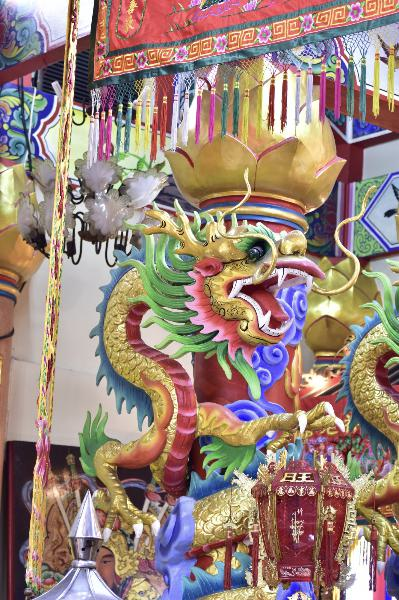

In [ ]:
getImage('ipu24/train/travel/00000.jpg')

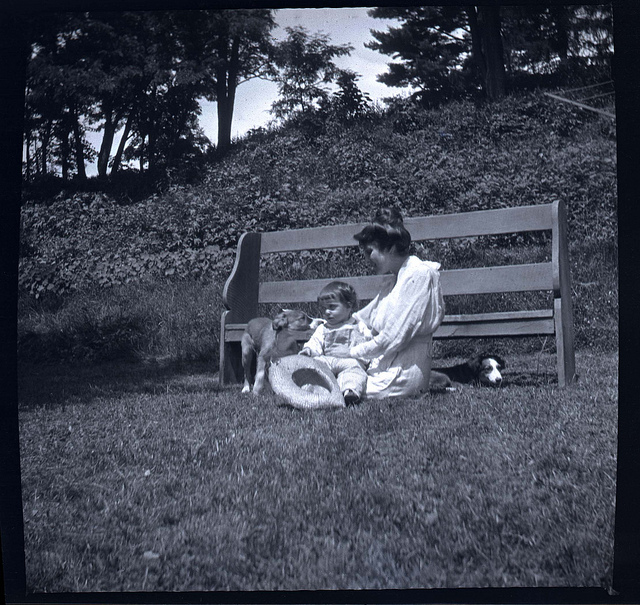

In [ ]:
getImage('coco/train2017/000000373716.jpg')

In [ ]:
import json

In [ ]:
# Open the JSON file and then load its contents
with open('/content/capgen_v1.0_train.json', 'r') as f:
    capgen_train = json.load(f)

In [ ]:
print(type(capgen_train))

<class 'dict'>


<class 'list'>
coco/train2017/000000373716.jpg
['ผู้หญิงสวมเสื้อแขนยาวสีขาวและเด็กนั่งเล่นกับสุนัขอยู่ ในสวนหย่อม', 'สาวคนนึงกำลังพาเด็กมานั่งเล่นอยู่ภายในสนามหญ้าพร้อมกับสุนัข', 'ภาพขาวดำ ผู้หญิงนั่งบนพื้นอุ้มเด็กบนตัก ข้าง ๆ มีหมาสองตัว ด้านหลังมีม้านั่งไม้']
<class 'PIL.JpegImagePlugin.JpegImageFile'>


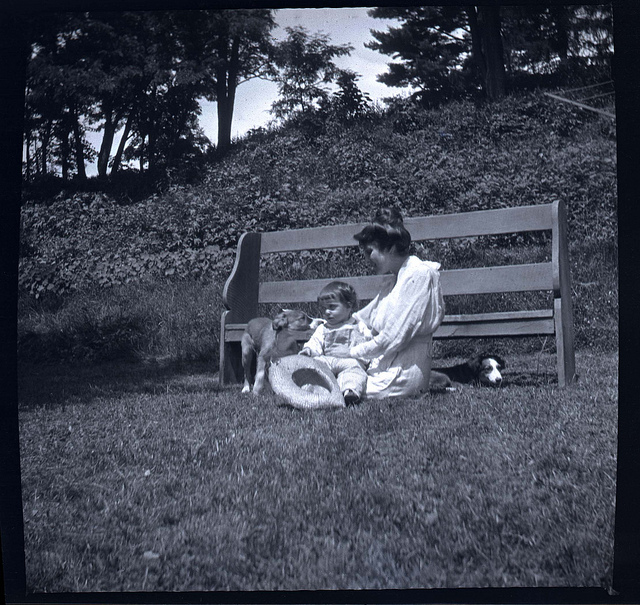

In [ ]:
file_path = [key for key in capgen_train]
print(type(file_path))
print(file_path[0])
picture = getImage(file_path[0])
print(capgen_train[file_path[0]])
print(type(picture))
picture

In [ ]:
converted_dataset = []

In [ ]:
instruction = "คิดแคปชั่นรูปนี้ให้หน่อย"
for i in capgen_train:
    conversation = {  # Changed to a dictionary
        "messages": [  # Added 'messages' key
            { "role": "user",
              "content" : [
                {"type" : "text",  "text"  : instruction},
                {"type" : "image", "image" : getImage(i)} ]
            },
            { "role" : "assistant",
              "content" : [
                {"type" : "text",  "text"  : capgen_train[i]} ]
            },
        ]
    }
    converted_dataset.append(conversation)
    print(f'apped {i} images')
print(len(converted_dataset))


Streaming output truncated to the last 5000 lines.
apped ipu24/train/food/25504.jpg images
Found ipu
apped ipu24/train/food/25505.jpg images
Found ipu
apped ipu24/train/food/25506.jpg images
Found ipu
apped ipu24/train/food/25507.jpg images
Found ipu
apped ipu24/train/food/25508.jpg images
Found ipu
apped ipu24/train/food/25509.jpg images
Found ipu
apped ipu24/train/food/25510.jpg images
Found ipu
apped ipu24/train/food/25511.jpg images
Found ipu
apped ipu24/train/food/25512.jpg images
Found ipu
apped ipu24/train/food/25513.jpg images
Found ipu
apped ipu24/train/food/25514.jpg images
Found ipu
apped ipu24/train/food/25515.jpg images
Found ipu
apped ipu24/train/food/25516.jpg images
Found ipu
apped ipu24/train/food/25517.jpg images
Found ipu
apped ipu24/train/food/25518.jpg images
Found ipu
apped ipu24/train/food/25519.jpg images
Found ipu
apped ipu24/train/food/25520.jpg images
Found ipu
apped ipu24/train/food/25521.jpg images
Found ipu
apped ipu24/train/food/25522.jpg images
Found ipu

In [ ]:
dataset_ipu24['train'][0]["image"]
print(type(dataset_ipu24['train'][0]["image"]))
print(dataset_ipu24['train'][0]["image"])

<class 'PIL.JpegImagePlugin.JpegImageFile'>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=449x600 at 0x7D430A96A890>


In [ ]:
from transformers import TextStreamer

In [ ]:
FastVisionModel.for_inference(model) # Enable for inference!

image = dataset_ipu24['train'][0]["image"]
instruction = "คิดแคปชั่นรูปนี้ให้หน่อย"

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")


text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 256,
                   use_cache = True, temperature = 0.3, min_p = 0.1)

"อาหารไทยที่อร่อยและน่ารัก ที่มีผักและเนื้อสัตว์ในน้ำซุปที่นุ่มและน้ำตาล"<|im_end|>


In [ ]:
!pip install --upgrade trl

  Using cached trl-0.14.0-py3-none-any.whl.metadata (12 kB)
Using cached trl-0.14.0-py3-none-any.whl (313 kB)
  Attempting uninstall: trl
    Found existing installation: trl 0.8.6
    Uninstalling trl-0.8.6:
      Successfully uninstalled trl-0.8.6


In [ ]:
from unsloth import is_bf16_supported
from unsloth.trainer import UnslothVisionDataCollator
from trl import SFTTrainer, SFTConfig

FastVisionModel.for_training(model) # Enable for training!

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    data_collator = UnslothVisionDataCollator(model, tokenizer), # Must use!
    train_dataset = converted_dataset,
    args = SFTConfig(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        max_steps = 60,
        # num_train_epochs = 1, # Set this instead of max_steps for full training runs
        learning_rate = 2e-4,
        fp16 = not is_bf16_supported(),
        bf16 = is_bf16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none",     # For Weights and Biases

        # You MUST put the below items for vision finetuning:
        remove_unused_columns = False,
        dataset_text_field = "",
        dataset_kwargs = {"skip_prepare_dataset": True},
        dataset_num_proc = 4,
        max_seq_length = 2048,
    ),
)

In [ ]:
#@title Show current memory stats
gpu_stats = torch.cuda.get_device_properties(0)
start_gpu_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
max_memory = round(gpu_stats.total_memory / 1024 / 1024 / 1024, 3)
print(f"GPU = {gpu_stats.name}. Max memory = {max_memory} GB.")
print(f"{start_gpu_memory} GB of memory reserved.")

GPU = Tesla T4. Max memory = 14.741 GB.
6.615 GB of memory reserved.


In [ ]:
# Filter out non-dictionary elements from converted_dataset
converted_dataset = [example for example in converted_dataset if isinstance(example, dict)]


In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 142,291 | Num Epochs = 1
O^O/ \_/ \    Batch size per device = 2 | Gradient Accumulation steps = 4
\        /    Total batch size = 8 | Total steps = 60
 "-____-"     Number of trainable parameters = 50,855,936
🦥 Unsloth needs about 1-3 minutes to load everything - please wait!


Unsloth: Will smartly offload gradients to save VRAM!


In [ ]:
#@title Show final memory and time stats
used_memory = round(torch.cuda.max_memory_reserved() / 1024 / 1024 / 1024, 3)
used_memory_for_lora = round(used_memory - start_gpu_memory, 3)
used_percentage = round(used_memory         /max_memory*100, 3)
lora_percentage = round(used_memory_for_lora/max_memory*100, 3)
print(f"{trainer_stats.metrics['train_runtime']} seconds used for training.")
print(f"{round(trainer_stats.metrics['train_runtime']/60, 2)} minutes used for training.")
print(f"Peak reserved memory = {used_memory} GB.")
print(f"Peak reserved memory for training = {used_memory_for_lora} GB.")
print(f"Peak reserved memory % of max memory = {used_percentage} %.")
print(f"Peak reserved memory for training % of max memory = {lora_percentage} %.")

2342.0146 seconds used for training.
39.03 minutes used for training.
Peak reserved memory = 10.797 GB.
Peak reserved memory for training = 4.182 GB.
Peak reserved memory % of max memory = 73.245 %.
Peak reserved memory for training % of max memory = 28.37 %.


In [ ]:
import pandas as pd
sample = pd.read_csv('/content/sample_submission.csv')

In [ ]:
sample.tail() #id 0-1999

image_id caption
1995        29     NaN
1996      1065     NaN
1997       195     NaN
1998      1026     NaN
1999      1345     NaN

In [ ]:
type(sample['image_id'][0])

numpy.int64

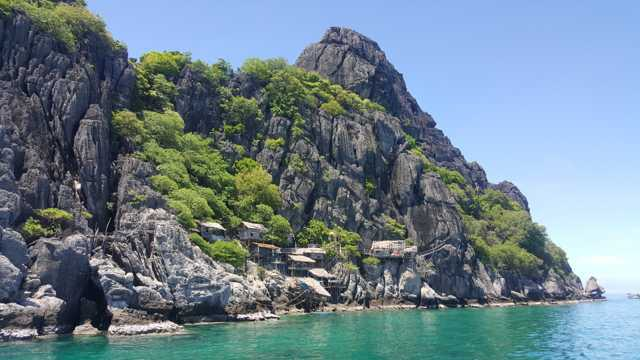

In [ ]:
a = img = Image.open('/content/ipu24/test/test/01243.jpg')
def getTest(url):
    image_id = str(url)
    image_id = image_id.zfill(5)
    img = Image.open(f'/content/ipu24/test/test/{image_id}.jpg')
    return img
getTest(sample['image_id'][2])

In [ ]:
FastVisionModel.for_inference(model) # Enable for inference!

image = getTest(sample['image_id'][0])
instruction = "คิดแคปชั่นรูปนี้ให้หน่อย"

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
output_ids = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 256,
                   use_cache = True, temperature = 0.5, min_p = 0.1)
output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

print("Generated caption:", output_text.split('assistant')[-1])

['ภาพของสิ่งมีชีวิตที่มีสีขาว ตัวยาว ตัวสั้น ตัวยาวมีเส้นขนยาว ตัวสั้นมีเส้นขนสั้น', 'ภาพของสิ่งมีชีวิตที่มีสีขาว ตัวยาว ตัวสั้น ตัวยาวมีเส้นขนยาว ตัวสั้นมีเส้นขนสั้น', 'ภาพของสิ่งมีชีวิตที่มีสีขาว ตัวยาว ตัวสั้น ตัวยาวมีเส้นขนยาว ตัวสั้นมีเส้นขนสั้น']<|im_end|>
Generated caption: 
['ภาพของสิ่งมีชีวิตที่มีสีขาว ตัวยาว ตัวสั้น ตัวยาวมีเส้นขนยาว ตัวสั้นมีเส้นขนสั้น', 'ภาพของสิ่งมีชีวิตที่มีสีขาว ตัวยาว ตัวสั้น ตัวยาวมีเส้นขนยาว ตัวสั้นมีเส้นขนสั้น', 'ภาพของสิ่งมีชีวิตที่มีสีขาว ตัวยาว ตัวสั้น ตัวยาวมีเส้นขนยาว ตัวสั้นมีเส้นขนสั้น']


In [ ]:
def getCaption(id):
    FastVisionModel.for_inference(model) # Enable for inference!
    image = getTest(sample['image_id'][id])
    instruction = "คิดแคปชั่นรูปนี้ให้หน่อย"
    messages = [
        {"role": "user", "content": [
            {"type": "image"},
            {"type": "text", "text": instruction}
        ]}
    ]
    input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
    inputs = tokenizer(
        image,
        input_text,
        add_special_tokens = False,
        return_tensors = "pt",
    ).to("cuda")
    from transformers import TextStreamer
    text_streamer = TextStreamer(tokenizer, skip_prompt = True)
    output_ids = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 256,
                    use_cache = True, temperature = 0.5, min_p = 0.1)
    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    return output_text.split('assistant')[-1].split(',')[0].split('[')[-1]

In [69]:
captionTest = getCaption(514)
print(type(captionTest))

['หญ้าสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาล
<class 'str'>


In [70]:
print(captionTest)

'หญ้าสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาล


In [64]:
index = 0
for i in range(3,2000):
    id = sample['image_id'][i]
    caption = getCaption(i)
    sample['caption'][i] = caption
    print(f'Id = {id} , Caption = {sample["caption"][i]}')
sample.to_csv('submission.csv', index=False)
print(sample[0:20])

['สัตว์เลี้ยงลูกด้วยนมตัวหนึ่งกำลังนั่งอยู่บนพื้นดิน', 'ภาพของสัตว์เลี้ยงลูกด้วยนมตัวหนึ่งที่กำลังนั่งอยู่บนพื้นดิน', 'ภาพของสัตว์เลี้ยงลูกด้วยนมตัวหนึ่งที่กำลังนั่งอยู่บนพื้นดิน']<|im_end|>
Id = 1243 , Caption = 'สัตว์เลี้ยงลูกด้วยนมตัวหนึ่งกำลังนั่งอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงสองตัวที่มีลายสีน้ำตาลและลายสีขาวอยู่บนพื้นดินที่มีต้นไม้', 'แมลงสองตัวที่มีลายสีน้ำตาลและลายสีขาวอยู่บนพื้นดินที่มีต้นไม้', 'แมลงสองตัวที่มีลายสีน้ำตาลและลายสีขาวอยู่บนพื้นดินที่มีต้นไม้']<|im_end|>
Id = 693 , Caption = 'แมลงสองตัวที่มีลายสีน้ำตาลและลายสีขาวอยู่บนพื้นดินที่มีต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผักต่างๆ ที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในจานสีดำ', 'ผักต่างๆ ที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในจานสีดำ', 'ผักต่างๆ ที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในจานสีดำ']<|im_end|>
Id = 1695 , Caption = 'ผักต่างๆ ที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในจานสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถุงสี่เหลี่ยมทรงกลมสีน้ำตาลที่ทำจากเปลือกไม้สีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว', 'ถุงสี่เหลี่ยมทรงกลมสีน้ำตาลที่ทำจากเปลือกไม้สีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว', 'ถุงสี่เหลี่ยมทรงกลมสีน้ำตาลที่ทำจากเปลือกไม้สีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว']<|im_end|>
Id = 1735 , Caption = 'ถุงสี่เหลี่ยมทรงกลมสีน้ำตาลที่ทำจากเปลือกไม้สีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ตัวหนึ่งที่มีขนสีดำและขนสีขาวอยู่ในป่าที่มีต้นไม้สีเขียว', 'ภาพของสัตว์ตัวหนึ่งที่มีขนสีดำและขนสีขาวอยู่ในป่าที่มีต้นไม้สีเขียว', 'ภาพของสัตว์ตัวหนึ่งที่มีขนสีดำและขนสีขาวอยู่ในป่าที่มีต้นไม้สีเขียว']<|im_end|>
Id = 1440 , Caption = 'สัตว์ตัวหนึ่งที่มีขนสีดำและขนสีขาวอยู่ในป่าที่มีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หัวเห็ดสีขาว 2 หัว ตั้งอยู่บนพื้นสีฟ้า ด้านข้างมีหัวเห็ดอีก 1 หัว ด้านข้างมีตัวอักษรสีขาว', 'ภาพของหัวเห็ดที่ตั้งอยู่บนพื้นสีฟ้า ด้านข้างมีตัวอักษรสีขาว', 'หัวเห็ด 2 หัว ตั้งอยู่บนพื้นสีฟ้า ด้านข้างมีหัวเห็ดอีก 1 หัว ด้านข้างมีตัวอักษรสีขาว']<|im_end|>
Id = 296 , Caption = 'หัวเห็ดสีขาว 2 หัว ตั้งอยู่บนพื้นสีฟ้า ด้านข้างมีหัวเห็ดอีก 1 หัว ด้านข้างมีตัวอักษรสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวตัวสีแดงมีป้ายสีน้ำตาลติดอยู่บนเสาสีน้ำตาล', 'อาคารสีขาวตัวสีแดงมีป้ายสีน้ำตาลติดอยู่บนเสาสีน้ำตาลตั้งอยู่ข้างต้นไม้', 'อาคารสีขาวตัวสีแดงมีป้ายสีน้ำตาลติดอยู่บนเสาสีน้ำตาลตั้งอยู่ข้างต้นไม้']<|im_end|>
Id = 1144 , Caption = 'อาคารสีขาวตัวสีแดงมีป้ายสีน้ำตาลติดอยู่บนเสาสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นกล้วยสีเขียวใบใหญ่ตั้งอยู่ข้างบ้านไม้หลังหนึ่ง', 'ภาพของต้นกล้วยที่อยู่ข้างบ้านไม้หลังหนึ่งที่มีหลังคาปูน', 'ภาพของต้นกล้วยที่อยู่ข้างบ้านไม้หลังหนึ่งที่มีหลังคาปูน']<|im_end|>
Id = 62 , Caption = 'ต้นกล้วยสีเขียวใบใหญ่ตั้งอยู่ข้างบ้านไม้หลังหนึ่ง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวผัดกุ้งสดใส่เนื้อสัตว์สีน้ำตาลและผักสีเขียว', 'ข้าวผัดกุ้งสดใส่เนื้อสัตว์สีน้ำตาลและผักสีเขียว', 'ข้าวผัดกุ้งสดใส่เนื้อสัตว์สีน้ำตาลและผักสีเขียว วางอยู่ในจานสีขาว']<|im_end|>
Id = 933 , Caption = 'ข้าวผัดกุ้งสดใส่เนื้อสัตว์สีน้ำตาลและผักสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงสวมเสื้อสีฟ้าและผ้าห่มสีขาวคาดผมกำลังวางไม้สีขาวบนพื้นดิน', 'ผู้หญิงสวมเสื้อสีฟ้าและผ้าห่มสีขาวคาดผมกำลังวางไม้สีขาวบนพื้นดิน', 'ผู้หญิงสวมเสื้อสีฟ้าและผ้าห่มสีขาวคาดผมกำลังวางไม้สีขาวบนพื้นดิน']<|im_end|>
Id = 149 , Caption = 'ผู้หญิงสวมเสื้อสีฟ้าและผ้าห่มสีขาวคาดผมกำลังวางไม้สีขาวบนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองที่นอนอยู่บนแท่นสีทอง', 'รูปปั้นพระพุทธรูปสีทองที่นอนอยู่บนแท่นสีทอง', 'รูปปั้นพระพุทธรูปสีทองที่นอนอยู่บนแท่นสีทอง ด้านหลังมีหลังคาสีน้ำตาล']<|im_end|>
Id = 458 , Caption = 'รูปปั้นพระพุทธรูปสีทองที่นอนอยู่บนแท่นสีทอง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลิงค์สีน้ำตาลตัวเล็กกำลังเดินอยู่บนพื้นดินสีน้ำตาล', 'ลิงค์สีน้ำตาลตัวเล็กที่กำลังเดินอยู่บนพื้นดินสีน้ำตาล', 'ลิงค์สีน้ำตาลตัวเล็กที่กำลังเดินอยู่บนพื้นดินสีน้ำตาล']<|im_end|>
Id = 141 , Caption = 'ลิงค์สีน้ำตาลตัวเล็กกำลังเดินอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านสีขาวและสีน้ำตาลตั้งอยู่บนภูเขาที่มีต้นไม้สีเขียว', 'บ้านที่ตั้งอยู่บนภูเขาที่มีต้นไม้สีเขียวและน้ำทะเลสีเขียว', 'บ้านที่ตั้งอยู่บนภูเขาที่มีต้นไม้สีเขียวและน้ำทะเลสีเขียว']<|im_end|>
Id = 559 , Caption = 'บ้านสีขาวและสีน้ำตาลตั้งอยู่บนภูเขาที่มีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวผัดหมูสับใส่กระเทียมผัดและข้าวผัดหมูสับใส่กระเทียมผัดและข้าวผัดหมูสับใส่กระเทียมผัด', 'ข้าวผัดหมูสับใส่กระเทียมผัดและข้าวผัดหมูสับใส่กระเทียมผัดและข้าวผัดหมูสับใส่กระเทียมผัด', 'ข้าวผัดหมูสับใส่กระเทียมผัดและข้าวผัดหมูสับใส่กระเทียมผัดและข้าวผัดหมูสับใส่กระเทียมผัด']<|im_end|>
Id = 978 , Caption = 'ข้าวผัดหมูสับใส่กระเทียมผัดและข้าวผัดหมูสับใส่กระเทียมผัดและข้าวผัดหมูสับใส่กระเทียมผัด'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาหลายตัวที่อยู่ในน้ำที่มีสีน้ำตาล', 'ปลาหลายตัวที่อยู่ในน้ำที่มีสีน้ำตาล', 'ปลาหลายตัวที่อยู่ในน้ำที่มีสีน้ำตาล ที่มีปลาหลายตัวที่อยู่ในน้ำ']<|im_end|>
Id = 1909 , Caption = 'ปลาหลายตัวที่อยู่ในน้ำที่มีสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวใหญ่ต้นหนึ่งที่มีกิ่งก้านต่างๆ จำนวนมาก', 'ต้นไม้สีเขียวที่มีกิ่งก้านต่างๆ จำนวนมาก อยู่ข้างกำแพงสีขาว', 'ต้นไม้สีเขียวที่มีกิ่งก้านต่างๆ จำนวนมาก อยู่ข้างกำแพงสีขาว']<|im_end|>
Id = 1056 , Caption = 'ต้นไม้สีเขียวใหญ่ต้นหนึ่งที่มีกิ่งก้านต่างๆ จำนวนมาก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พื้นที่ด้านหน้าเป็นพื้นหญ้าสีเขียว ด้านหลังเป็นภูเขาสีน้ำตาล', 'ภาพของพื้นหญ้าสีเขียวที่อยู่ตรงกลางด้านหลังเป็นภูเขาสีน้ำตาล', 'ภาพของพื้นหญ้าสีเขียวที่อยู่ตรงกลางด้านหลังเป็นภูเขาสีน้ำตาล']<|im_end|>
Id = 1587 , Caption = 'พื้นที่ด้านหน้าเป็นพื้นหญ้าสีเขียว ด้านหลังเป็นภูเขาสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมแม่น้ำมีต้นไม้สีเขียวและมีภูเขาสีน้ำตาลอยู่ข้างแม่น้ำ', 'ภาพถ่ายจากบนภูเขาสูง ด้านล่างมีแม่น้ำและต้นไม้ ด้านหลังมีภูเขา', 'ภาพถ่ายจากบนภูเขาสูง ด้านล่างมีแม่น้ำและต้นไม้ ด้านหลังมีภูเขา']<|im_end|>
Id = 1349 , Caption = 'ริมแม่น้ำมีต้นไม้สีเขียวและมีภูเขาสีน้ำตาลอยู่ข้างแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบตั้งสีเขียวที่ตั้งอยู่ในถ้วยสีขาว ด้านข้างมีใบตั้งสีเขียวอีกใบ', 'ใบตั้งสีเขียวที่ตั้งอยู่ในถ้วยสีขาว ด้านข้างมีใบตั้งสีเขียวอีกใบ', 'ใบตั้งสีเขียวที่ตั้งอยู่ในถ้วยสีขาว ด้านข้างมีใบตั้งสีเขียวอีกใบ']<|im_end|>
Id = 1469 , Caption = 'ใบตั้งสีเขียวที่ตั้งอยู่ในถ้วยสีขาว ด้านข้างมีใบตั้งสีเขียวอีกใบ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบสีเขียวที่มีรูปร่างกลมและมีริมใบที่เรียบ', 'ใบสีเขียวที่มีรูปร่างกลมและมีริมใบที่เรียบ', 'ใบสีเขียวที่มีรูปร่างกลมและมีริมใบที่เรียบ ติดกันอยู่เป็นชั้น']<|im_end|>
Id = 862 , Caption = 'ใบสีเขียวที่มีรูปร่างกลมและมีริมใบที่เรียบ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['วัวสีน้ำตาล 2 ตัวกำลังกินอาหารอยู่ในถ้วยสีเทา', 'วัวสีน้ำตาล 2 ตัวกำลังกินอาหารอยู่ในถ้วยสีเทา ด้านหลังมีหิน', 'วัวสีน้ำตาล 2 ตัวกำลังกินอาหารอยู่ในถ้วยสีเทา ด้านหลังมีหิน']<|im_end|>
Id = 803 , Caption = 'วัวสีน้ำตาล 2 ตัวกำลังกินอาหารอยู่ในถ้วยสีเทา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หนูน้ำหนักเบาตัวสีน้ำตาล นอนอยู่บนพื้นไม้สีน้ำตาล', 'หนูน้ำหนักเบาตัวสีน้ำตาลนอนอยู่บนพื้นไม้สีน้ำตาล', 'หนูน้ำหนักเบาตัวสีน้ำตาลนอนอยู่บนพื้นไม้สีน้ำตาล ด้านข้างมีต้นไม้']<|im_end|>
Id = 966 , Caption = 'หนูน้ำหนักเบาตัวสีน้ำตาล นอนอยู่บนพื้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงผมยาวใส่เสื้อสีน้ำตาลและกางเกงขายาวสีแดงนั่งอยู่บนเก้าอี้สีแดง', 'ผู้หญิงผมยาวใส่เสื้อสีน้ำตาลและกางเกงขายาวสีแดงนั่งอยู่บนเก้าอี้สีแดง', 'ผู้หญิงผมยาวใส่เสื้อสีน้ำตาลและกางเกงขายาวสีแดงนั่งอยู่บนเก้าอี้สีแดง']<|im_end|>
Id = 466 , Caption = 'ผู้หญิงผมยาวใส่เสื้อสีน้ำตาลและกางเกงขายาวสีแดงนั่งอยู่บนเก้าอี้สีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวและสีน้ำตาลติดกับก้านสีเขียว อยู่ในพื้นที่ที่มีหญ้าสีเขียว', 'ดอกไม้สีขาวและสีน้ำตาลติดกับก้านสีเขียว อยู่ในพื้นที่ที่มีหญ้าสีเขียว', 'ดอกไม้สีขาวและสีน้ำตาลติดกับก้านสีเขียว อยู่ในพื้นที่ที่มีหญ้าสีเขียว']<|im_end|>
Id = 197 , Caption = 'ดอกไม้สีขาวและสีน้ำตาลติดกับก้านสีเขียว อยู่ในพื้นที่ที่มีหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภูเขาที่มีต้นไม้สีเขียวและสีน้ำตาลอยู่บนภูเขา', 'ภาพของภูเขาที่มีต้นไม้สีเขียวและสีน้ำตาลอยู่บนภูเขา', 'ภูเขาที่มีต้นไม้สีเขียวและสีน้ำตาลอยู่บนภูเขา ด้านบนมีต้นไม้สีเขียว']<|im_end|>
Id = 843 , Caption = 'ภูเขาที่มีต้นไม้สีเขียวและสีน้ำตาลอยู่บนภูเขา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงปีกสีน้ำตาล ตัวสีน้ำตาล มีลายสีน้ำตาล ตัวยาว ขาสี่ตัว อยู่บนพื้นดิน', 'แมลงปีกสีน้ำตาล ตัวสีน้ำตาล มีลายสีน้ำตาล ตัวยาว ขาสี่ตัว อยู่บนพื้นดิน', 'แมลงปีกสีน้ำตาล ตัวสีน้ำตาล มีลายสีน้ำตาล ตัวยาว ขาสี่ตัว อยู่บนพื้นดิน']<|im_end|>
Id = 1817 , Caption = 'แมลงปีกสีน้ำตาล ตัวสีน้ำตาล มีลายสีน้ำตาล ตัวยาว ขาสี่ตัว อยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กระต่ายตัวหนึ่งที่นอนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาลและใบไม้สีเขียว', 'กระต่ายตัวหนึ่งนอนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาลและใบไม้สีเขียว', 'กระต่ายตัวหนึ่งนอนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาลและใบไม้สีเขียว']<|im_end|>
Id = 18 , Caption = 'กระต่ายตัวหนึ่งที่นอนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาลและใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เจดีย์สีขาวหลายองค์ที่อยู่รอบ ๆ เจดีย์สีขาวอีกองค์หนึ่งที่อยู่ตรงกลาง', 'เจดีย์สีขาวหลายองค์ที่อยู่รอบ ๆ เจดีย์สีขาวอีกองค์หนึ่งที่อยู่ตรงกลาง', 'เจดีย์สีขาวหลายองค์ที่อยู่รอบ ๆ เจดีย์สีขาวอีกองค์หนึ่งที่อยู่ตรงกลาง']<|im_end|>
Id = 260 , Caption = 'เจดีย์สีขาวหลายองค์ที่อยู่รอบ ๆ เจดีย์สีขาวอีกองค์หนึ่งที่อยู่ตรงกลาง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หัวเห็ดสีน้ำตาล ตั้งอยู่บนพื้นสีฟ้า ด้านข้างมีสีขาว', 'หัวเห็ดสีน้ำตาล ตั้งอยู่บนพื้นสีฟ้า ด้านข้างมีสีขาว', 'หัวเห็ดสีน้ำตาล ตั้งอยู่บนพื้นสีฟ้า ด้านข้างมีสีขาว']<|im_end|>
Id = 1680 , Caption = 'หัวเห็ดสีน้ำตาล ตั้งอยู่บนพื้นสีฟ้า ด้านข้างมีสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของต้นไม้ที่มีสีน้ำตาลและมีสีเหลืองที่เป็นรูปสี่เหลี่ยม', 'ภาพของต้นไม้ที่มีสีน้ำตาลและมีสีเหลืองที่เป็นรูปสี่เหลี่ยม', 'ภาพของต้นไม้ที่มีสีน้ำตาลและมีสีเหลืองที่เป็นรูปสี่เหลี่ยม']<|im_end|>
Id = 1229 , Caption = 'ภาพของต้นไม้ที่มีสีน้ำตาลและมีสีเหลืองที่เป็นรูปสี่เหลี่ยม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทอง ตัวรูปปั้นมีหลายแขนหลายหัว', 'รูปปั้นพระพุทธรูปหลายแขนหลายหัว ตัวรูปปั้นมีหลายแขนหลายหัว', 'รูปปั้นพระพุทธรูปหลายแขนหลายหัว ตัวรูปปั้นมีหลายแขนหลายหัว']<|im_end|>
Id = 112 , Caption = 'รูปปั้นพระพุทธรูปสีทอง ตัวรูปปั้นมีหลายแขนหลายหัว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผักต่างๆ ที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในกระทะสีดำ', 'ผักต่างๆ ที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในกระทะสีดำ', 'ผักต่างๆ ที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในกระทะสีดำ']<|im_end|>
Id = 1934 , Caption = 'ผักต่างๆ ที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในกระทะสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปภาพของงูน้ำสีน้ำเงิน ที่มีลายสีขาว อยู่บนพื้นสีขาว', 'งูน้ำสีน้ำเงิน ที่มีลายสีขาว อยู่บนพื้นสีขาว ด้านข้างมีเครื่องมือวัดขนาด', 'งูน้ำสีน้ำเงิน ที่มีลายสีขาว อยู่บนพื้นสีขาว ด้านข้างมีเครื่องมือวัดขนาด']<|im_end|>
Id = 554 , Caption = 'รูปภาพของงูน้ำสีน้ำเงิน ที่มีลายสีขาว อยู่บนพื้นสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีน้ำเงินสองตัวที่ตั้งอยู่ข้างประตูวัดสีน้ำเงิน', 'รูปปั้นสีน้ำเงินสองตัวที่ตั้งอยู่ข้างประตูวัดสีน้ำเงิน', 'รูปปั้นสีน้ำเงินสองตัวที่ตั้งอยู่ข้างประตูวัดสีน้ำเงิน']<|im_end|>
Id = 1347 , Caption = 'รูปปั้นสีน้ำเงินสองตัวที่ตั้งอยู่ข้างประตูวัดสีน้ำเงิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผลไม้สีเขียว 4 ลูก ติดอยู่บนก้านต้นไม้ ด้านข้างมีใบตั้งอยู่', 'ผลไม้สีเขียว 4 ลูก ติดอยู่บนก้านต้นไม้ ด้านข้างมีใบตั้งอยู่', 'ผลไม้สีเขียว 4 ลูก ติดอยู่บนก้านต้นไม้ ด้านข้างมีใบตั้งอยู่']<|im_end|>
Id = 1577 , Caption = 'ผลไม้สีเขียว 4 ลูก ติดอยู่บนก้านต้นไม้ ด้านข้างมีใบตั้งอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงหนึ่งตัวที่มีหัวและตัวสีดำ ตัวมีลายสีน้ำตาล ตัวมีขาสี่ข้าง', 'แมลงหนึ่งตัวที่มีลายสีน้ำตาล ตัวมีขาสี่ข้าง ตัวมีลายสีดำ ตัวมีลายสีน้ำตาล', 'แมลงหนึ่งตัวที่มีลายสีน้ำตาล ตัวมีลายสีดำ ตัวมีขาสี่ข้าง ตัวมีลายสีน้ำตาล']<|im_end|>
Id = 867 , Caption = 'แมลงหนึ่งตัวที่มีหัวและตัวสีดำ ตัวมีลายสีน้ำตาล ตัวมีขาสี่ข้าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลี้ยงลูกด้วยนมหลายตัวกำลังเดินอยู่ข้างกันในป่า', 'ภาพของสัตว์เลี้ยงลูกด้วยนมหลายตัวที่กำลังเดินอยู่ข้างกันในป่า', 'ภาพของสัตว์เลี้ยงลูกด้วยนมหลายตัวที่กำลังเดินอยู่ข้างกันในป่า']<|im_end|>
Id = 1401 , Caption = 'สัตว์เลี้ยงลูกด้วยนมหลายตัวกำลังเดินอยู่ข้างกันในป่า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รถจอดอยู่ข้างกำแพงสีขาวที่มีต้นไม้สีเขียวอยู่ข้างถนน', 'รถจอดอยู่ข้างกำแพงสีขาวที่มีต้นไม้สีเขียวอยู่ข้างถนน', 'รถจอดอยู่ข้างกำแพงสีขาวที่มีต้นไม้สีเขียวอยู่ข้างถนน']<|im_end|>
Id = 1159 , Caption = 'รถจอดอยู่ข้างกำแพงสีขาวที่มีต้นไม้สีเขียวอยู่ข้างถนน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาว 4 ดอก ติดกันอยู่บนต้นไม้สีเขียว ต้นไม้สูง ใบสีเขียว', 'ดอกไม้สีขาว 4 ดอก ติดกันอยู่บนต้นไม้สีเขียว ต้นไม้สูง ใบสีเขียว', 'ดอกไม้สีขาว 4 ดอก ติดกันอยู่บนต้นไม้สีเขียว ต้นไม้สูง ใบสีเขียว']<|im_end|>
Id = 109 , Caption = 'ดอกไม้สีขาว 4 ดอก ติดกันอยู่บนต้นไม้สีเขียว ต้นไม้สูง ใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูจระเข้สีน้ำตาลและดำ ตัวยาว อยู่บนพื้นดินสีน้ำตาล', 'งูจระเข้สีน้ำตาลและดำ ตัวยาว อยู่บนพื้นดินสีน้ำตาล ด้านข้างมีใบไม้สีน้ำตาล', 'งูจระเข้สีน้ำตาลและดำ ตัวยาว อยู่บนพื้นดินสีน้ำตาล มีใบไม้สีน้ำตาลวางอยู่ข้าง ๆ']<|im_end|>
Id = 649 , Caption = 'งูจระเข้สีน้ำตาลและดำ ตัวยาว อยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากที่อยู่ในป่าที่มีใบไม้สีเหลืองและสีเขียว', 'ภาพของป่าที่มีต้นไม้สีเขียวจำนวนมากและมีใบไม้สีเหลืองและสีเขียว', 'ภาพของป่าที่มีต้นไม้สีเขียวจำนวนมากและมีใบไม้สีเหลืองและสีเขียว']<|im_end|>
Id = 1744 , Caption = 'ต้นไม้สีเขียวจำนวนมากที่อยู่ในป่าที่มีใบไม้สีเหลืองและสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยแก้วสีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียว', 'ถ้วยแก้วสีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียว', 'ถ้วยแก้วสีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียว ด้านหลังเป็นพื้นหญ้าสีเขียว']<|im_end|>
Id = 423 , Caption = 'ถ้วยแก้วสีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แก้วกาแฟสีเขียวใส่ในแก้วแก้วสีขาววางอยู่บนจานสีขาว', 'แก้วกาแฟสีเขียวใส่ในแก้วแก้วสีขาววางอยู่บนจานสีขาว', 'แก้วกาแฟสีเขียวใส่ในแก้วแก้วสีขาววางอยู่บนจานสีขาว']<|im_end|>
Id = 1671 , Caption = 'แก้วกาแฟสีเขียวใส่ในแก้วแก้วสีขาววางอยู่บนจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายใส่เสื้อสีแดงแขนยาว ใส่เสื้อแขนยาวสีดำ กำลังเขียนบนกระดาษ', 'ผู้ชายใส่เสื้อสีแดงแขนยาว ใส่เสื้อแขนยาวสีดำ กำลังเขียนบนกระดาษ', 'ผู้ชายใส่เสื้อสีแดงแขนยาว ใส่เสื้อแขนยาวสีดำ กำลังเขียนบนกระดาษ']<|im_end|>
Id = 846 , Caption = 'ผู้ชายใส่เสื้อสีแดงแขนยาว ใส่เสื้อแขนยาวสีดำ กำลังเขียนบนกระดาษ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงสีแดงตัวยาว ตัวมีลายสีขาว ตัวมีขาสีน้ำตาล ตัวอยู่บนพืชสีเขียว', 'แมลงตัวสีแดง ตัวมีลายสีขาว ตัวมีขาสีน้ำตาล ตัวอยู่บนพืชสีเขียว', 'แมลงตัวสีแดง ตัวมีลายสีขาว ตัวมีขาสีน้ำตาล ตัวอยู่บนพืชสีเขียว']<|im_end|>
Id = 567 , Caption = 'แมลงสีแดงตัวยาว ตัวมีลายสีขาว ตัวมีขาสีน้ำตาล ตัวอยู่บนพืชสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ทะเลที่มีพื้นทรายสีขาวและต้นไม้สีเขียวอยู่ข้างทะเล', 'ภาพของทะเลที่มีพื้นทรายสีขาวและต้นไม้สีเขียวอยู่ข้างทะเล', 'ภาพของทะเลที่มีพื้นทรายสีขาวและต้นไม้สีเขียวอยู่ข้างทะเล']<|im_end|>
Id = 1800 , Caption = 'ทะเลที่มีพื้นทรายสีขาวและต้นไม้สีเขียวอยู่ข้างทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เสือตัวหนึ่งกำลังเดินอยู่ข้างน้ำและดินสีน้ำตาล', 'เสือตัวหนึ่งกำลังเดินอยู่ข้างน้ำและดินสีน้ำตาล', 'เสือตัวหนึ่งกำลังเดินอยู่ข้างน้ำและดินสีน้ำตาล']<|im_end|>
Id = 1439 , Caption = 'เสือตัวหนึ่งกำลังเดินอยู่ข้างน้ำและดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['นกสองตัวที่อยู่ในน้ำและมีต้นไม้สีน้ำตาลที่อยู่ในน้ำ', 'นกสองตัวที่อยู่ในน้ำและมีต้นไม้สีน้ำตาลที่อยู่ในน้ำ', 'นกสองตัวที่อยู่ในน้ำและมีต้นไม้สีน้ำตาลที่อยู่ในน้ำ']<|im_end|>
Id = 383 , Caption = 'นกสองตัวที่อยู่ในน้ำและมีต้นไม้สีน้ำตาลที่อยู่ในน้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบไม้สีเขียวที่ถูกนำมาวางอยู่บนโต๊ะสีขาว', 'ใบไม้สีเขียวที่ถูกนำมาวางอยู่บนโต๊ะสีขาว', 'ใบไม้สีเขียวที่ถูกนำมาวางอยู่บนโต๊ะสีขาว']<|im_end|>
Id = 374 , Caption = 'ใบไม้สีเขียวที่ถูกนำมาวางอยู่บนโต๊ะสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปภาพของรูปหนอนสีเขียว ตัวสีขาว ตัวสีแดง ตัวสีเหลือง อยู่บนต้นไม้', 'รูปภาพของรูปหนอนสีเขียว ตัวสีขาว ตัวสีแดง ตัวสีเหลือง อยู่บนต้นไม้', 'รูปหนอนสีเขียว ตัวสีขาว ตัวสีแดง ตัวสีเหลือง อยู่บนต้นไม้']<|im_end|>
Id = 162 , Caption = 'รูปภาพของรูปหนอนสีเขียว ตัวสีขาว ตัวสีแดง ตัวสีเหลือง อยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เมฆสีขาวกำลังลอยอยู่เหนือพื้นที่ที่มีเศษกระดาษสีแดงจำนวนมาก', 'เศษกระดาษสีแดงจำนวนมากที่กำลังลอยอยู่ในอากาศ', 'เศษกระดาษสีแดงจำนวนมากที่กำลังลอยอยู่ในอากาศ']<|im_end|>
Id = 1638 , Caption = 'เมฆสีขาวกำลังลอยอยู่เหนือพื้นที่ที่มีเศษกระดาษสีแดงจำนวนมาก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ประตูสีขาวสีเหลืองสีแดงตัวอักษรสีน้ำเงินติดอยู่บนประตู', 'ประตูสีขาวสีเหลืองสีแดงติดอยู่บนกำแพงสีขาวมีต้นไม้สีเขียวอยู่ข้างประตู', 'ประตูสีขาวสีเหลืองสีแดงติดอยู่บนกำแพงสีขาวมีต้นไม้สีเขียวอยู่ข้างประตู']<|im_end|>
Id = 55 , Caption = 'ประตูสีขาวสีเหลืองสีแดงตัวอักษรสีน้ำเงินติดอยู่บนประตู'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีน้ำตาลติดอยู่บนกำแพงสีน้ำตาลที่มีรูปปั้นสีน้ำตาลติดอยู่บนกำแพงสีน้ำตาล', 'รูปปั้นสีน้ำตาลติดอยู่บนกำแพงสีน้ำตาลที่มีรูปปั้นสีน้ำตาลติดอยู่บนกำแพงสีน้ำตาล', 'รูปปั้นสีน้ำตาลติดอยู่บนกำแพงสีน้ำตาลที่มีรูปปั้นสีน้ำตาลติดอยู่บนกำแพงสีน้ำตาล']<|im_end|>
Id = 1197 , Caption = 'รูปปั้นสีน้ำตาลติดอยู่บนกำแพงสีน้ำตาลที่มีรูปปั้นสีน้ำตาลติดอยู่บนกำแพงสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['นกหลายตัวที่อยู่บนต้นไม้สีเขียวและต้นไม้สีแดง', 'นกหลายตัวที่อยู่บนต้นไม้หลายต้นที่มีใบสีเขียวและใบสีแดง', 'นกหลายตัวที่อยู่บนต้นไม้หลายต้นที่มีใบสีเขียวและใบสีแดง']<|im_end|>
Id = 1010 , Caption = 'นกหลายตัวที่อยู่บนต้นไม้สีเขียวและต้นไม้สีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวมีเสาสีทองสูงตั้งอยู่ตรงกลางมีเสาธงสีขาวสีแดงสีน้ำเงิน', 'อาคารสีขาวมีเสาสีทองสูงตั้งอยู่ตรงกลางมีเสาธงสีขาวสีแดงสีน้ำเงิน', 'อาคารสีขาวมีเสาสีทองสูงตั้งอยู่ตรงกลางมีเสาธงสีขาวสีแดงสีน้ำเงิน']<|im_end|>
Id = 1020 , Caption = 'อาคารสีขาวมีเสาสีทองสูงตั้งอยู่ตรงกลางมีเสาธงสีขาวสีแดงสีน้ำเงิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของดอกไม้สีขาวที่อยู่บนพื้นดินสีน้ำตาล', 'ภาพของดอกไม้สีขาวที่อยู่บนพื้นดินสีน้ำตาล', 'ภาพของดอกไม้สีขาวที่อยู่บนพื้นดินสีน้ำตาล ด้านข้างมีต้นไม้']<|im_end|>
Id = 73 , Caption = 'ภาพของดอกไม้สีขาวที่อยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ชามสีขาวมีชามสีขาวหลายชามวางอยู่บนชามสีขาว ชามสีขาวมีไอศกรีมสีขาว ชามสีขาวมีขนมสีน้ำตาล', 'ชามสีขาวมีชามสีขาวหลายชามวางอยู่บนชามสีขาว ชามสีขาวมีไอศกรีมสีขาว ชามสีขาวมีขนมสีน้ำตาล', 'ชามสีขาวมีชามสีขาวหลายชามวางอยู่บนชามสีขาว ชามสีขาวมีไอศกรีมสีขาว ชามสีขาวมีขนมสีน้ำตาล']<|im_end|>
Id = 431 , Caption = 'ชามสีขาวมีชามสีขาวหลายชามวางอยู่บนชามสีขาว ชามสีขาวมีไอศกรีมสีขาว ชามสีขาวมีขนมสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผลไม้สีเขียว ติดอยู่บนต้นไม้ ด้านหลังมีต้นไม้หลายต้น', 'ผลไม้สีเขียว ติดอยู่บนต้นไม้ ด้านหลังมีต้นไม้หลายต้น', 'ผลไม้สีเขียว ติดอยู่บนต้นไม้ ด้านหลังมีต้นไม้หลายต้น']<|im_end|>
Id = 1699 , Caption = 'ผลไม้สีเขียว ติดอยู่บนต้นไม้ ด้านหลังมีต้นไม้หลายต้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงใส่เสื้อแขนสั้นลายดอกไม้สีเขียว กำลังล้างหอยแมลงภู่ในถ้วยสีดำ', 'ผู้หญิงสวมเสื้อแขนสั้นลายดอกไม้สีเขียว กำลังล้างหอยแมลงภู่ในถ้วยสีดำ', 'ผู้หญิงสวมเสื้อแขนสั้นลายดอกไม้สีเขียว กำลังล้างหอยแมลงภู่ในถ้วยสีดำ']<|im_end|>
Id = 1605 , Caption = 'ผู้หญิงใส่เสื้อแขนสั้นลายดอกไม้สีเขียว กำลังล้างหอยแมลงภู่ในถ้วยสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สะพานไม้สีน้ำตาลยาวข้ามแม่น้ำที่มีต้นไม้สีเขียวอยู่ข้างๆ', 'สะพานไม้สีน้ำตาลยาวข้ามแม่น้ำที่มีต้นไม้สีเขียวอยู่ข้างๆ', 'สะพานไม้สีน้ำตาลยาวข้ามแม่น้ำที่มีต้นไม้สีเขียวอยู่ข้างๆ']<|im_end|>
Id = 1937 , Caption = 'สะพานไม้สีน้ำตาลยาวข้ามแม่น้ำที่มีต้นไม้สีเขียวอยู่ข้างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หอยทากสีขาวตัวใหญ่ที่กำลังอยู่บนต้นไม้สีน้ำตาล', 'หอยทากที่อยู่บนต้นไม้สีน้ำตาล ด้านหลังเป็นต้นไม้สีเขียว', 'หอยทากที่อยู่บนต้นไม้สีน้ำตาล ด้านหลังเป็นต้นไม้สีเขียว']<|im_end|>
Id = 79 , Caption = 'หอยทากสีขาวตัวใหญ่ที่กำลังอยู่บนต้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากอยู่บนภูเขาสีเขียวที่มีต้นไม้สีเขียวจำนวนมาก', 'ภาพของภูเขาที่มีต้นไม้สีเขียวจำนวนมากและมีนกหลายตัว', 'ภาพของภูเขาที่มีต้นไม้สีเขียวจำนวนมากและมีนกหลายตัว']<|im_end|>
Id = 722 , Caption = 'ต้นไม้สีเขียวจำนวนมากอยู่บนภูเขาสีเขียวที่มีต้นไม้สีเขียวจำนวนมาก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปนกอินทรีสีน้ำตาลตัวเล็กนั่งอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'รูปนกอินทรีสีน้ำตาลตัวเล็กนั่งอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'รูปนกอินทรีสีน้ำตาลตัวเล็กนั่งอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล']<|im_end|>
Id = 292 , Caption = 'รูปนกอินทรีสีน้ำตาลตัวเล็กนั่งอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงสามคนสวมหมวกสีขาวสวมเสื้อแขนยาวสีขาว แขนสีน้ำเงิน แขนสีเขียว กำลังทำงานอยู่บนโต๊ะไม้', 'ผู้หญิงสามคนสวมหมวกสีขาว กำลังทำงานอยู่บนโต๊ะไม้ บนโต๊ะมีถ้วยสีแดง ด้านบนมีผ้าสีขาว', 'ผู้หญิงสามคนสวมหมวกสีขาว กำลังทำงานอยู่บนโต๊ะไม้ บนโต๊ะมีถ้วยสีแดง ด้านบนมีผ้าสีขาว']<|im_end|>
Id = 1057 , Caption = 'ผู้หญิงสามคนสวมหมวกสีขาวสวมเสื้อแขนยาวสีขาว แขนสีน้ำเงิน แขนสีเขียว กำลังทำงานอยู่บนโต๊ะไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีน้ำตาลตัวสั้นตัวหนาตัวมีลายสีขาวตัวอยู่บนต้นไม้', 'รูปปั้นสีน้ำตาลตัวสั้นตัวหนาตัวมีลายสีขาวตัวอยู่บนต้นไม้', 'รูปปั้นสีน้ำตาลตัวสั้นตัวหนาตัวมีลายสีขาวตัวอยู่บนต้นไม้ ด้านหลังเป็นพื้นสีน้ำตาล']<|im_end|>
Id = 1201 , Caption = 'รูปปั้นสีน้ำตาลตัวสั้นตัวหนาตัวมีลายสีขาวตัวอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['วัวตัวหนึ่งที่มีหูยาวและมีแผลบนหน้าและมีแผลบนลำตัว', 'วัวตัวหนึ่งที่มีหูยาวและมีแผลบนหน้าและมีแผลบนลำตัว', 'วัวตัวหนึ่งที่มีแผลบนหน้าและมีแผลบนลำตัว อยู่ในป่า']<|im_end|>
Id = 129 , Caption = 'วัวตัวหนึ่งที่มีหูยาวและมีแผลบนหน้าและมีแผลบนลำตัว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กระโหลกสัตว์ที่ถูกวางอยู่บนพื้นดินสีน้ำตาล', 'กระโหลกสัตว์ที่ถูกวางอยู่บนพื้นดินสีน้ำตาล', 'กระโหลกสัตว์ที่ถูกวางอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีกระดาษสีขาว']<|im_end|>
Id = 1719 , Caption = 'กระโหลกสัตว์ที่ถูกวางอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงสีผิวขาวสวมเสื้อสีชมพูกำลังยืนอยู่ตรงร้านขายของ', 'ร้านขายของที่มีผู้หญิงสีผิวขาวสวมเสื้อสีชมพูกำลังยืนอยู่ตรงร้านขายของ', 'ร้านขายของที่มีผู้หญิงสีผิวขาวสวมเสื้อสีชมพูกำลังยืนอยู่ตรงร้านขายของ']<|im_end|>
Id = 661 , Caption = 'ผู้หญิงสีผิวขาวสวมเสื้อสีชมพูกำลังยืนอยู่ตรงร้านขายของ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังเดินข้ามแม่น้ำที่มีหินและดินสีน้ำตาล', 'ผู้ชายคนหนึ่งกำลังเดินข้ามแม่น้ำที่มีหินและดินสีน้ำตาล', 'ผู้ชายคนหนึ่งกำลังเดินข้ามแม่น้ำที่มีหินและดินสีน้ำตาล']<|im_end|>
Id = 1503 , Caption = 'ผู้ชายคนหนึ่งกำลังเดินข้ามแม่น้ำที่มีหินและดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผ้าปูที่นอนสีขาวที่มีลายสี่เหลี่ยมจัตุรัสที่วางอยู่บนพื้นสีดำ', 'ผ้าปูที่นอนสีขาวที่มีลายสี่เหลี่ยมจัตุรัสวางอยู่บนพื้นสีดำ', 'ผ้าปูที่นอนสีขาวที่มีลายสี่เหลี่ยมจัตุรัสวางอยู่บนพื้นสีดำ']<|im_end|>
Id = 1529 , Caption = 'ผ้าปูที่นอนสีขาวที่มีลายสี่เหลี่ยมจัตุรัสที่วางอยู่บนพื้นสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของแมลงที่อยู่บนพื้นไม้สีน้ำตาล', 'แมลงที่อยู่บนพื้นไม้สีน้ำตาล ด้านข้างมีร่องสีน้ำตาล', 'แมลงที่อยู่บนพื้นไม้สีน้ำตาล ด้านข้างมีร่องสีน้ำตาล']<|im_end|>
Id = 1757 , Caption = 'ภาพของแมลงที่อยู่บนพื้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปภาพของงูป่าสีน้ำตาล ที่กำลังยืนอยู่บนต้นไม้ที่มีสีน้ำตาล', 'งูป่าสีน้ำตาล ที่กำลังยืนอยู่บนต้นไม้ที่มีสีน้ำตาล', 'งูป่าสีน้ำตาล ที่กำลังยืนอยู่บนต้นไม้ที่มีสีน้ำตาล ด้านหลังเป็นพื้นป่า']<|im_end|>
Id = 1318 , Caption = 'รูปภาพของงูป่าสีน้ำตาล ที่กำลังยืนอยู่บนต้นไม้ที่มีสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูสีดำตัวยาวนอนอยู่บนใบไม้สีน้ำตาลที่ติดอยู่บนพื้นดิน', 'งูสีดำตัวยาวนอนอยู่บนใบไม้สีน้ำตาลที่ติดอยู่บนพื้นดิน', 'งูสีดำตัวยาวนอนอยู่บนใบไม้สีน้ำตาลที่ติดอยู่บนพื้นดิน']<|im_end|>
Id = 1815 , Caption = 'งูสีดำตัวยาวนอนอยู่บนใบไม้สีน้ำตาลที่ติดอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวผัดหน้าไข่ดาวตั้งอยู่บนจานสีขาว', 'ข้าวผัดหน้าไข่ดาววางอยู่บนจานสีขาว', 'ข้าวผัดหน้าไข่ดาววางอยู่บนจานสีขาว วางอยู่บนโต๊ะสีขาว']<|im_end|>
Id = 934 , Caption = 'ข้าวผัดหน้าไข่ดาวตั้งอยู่บนจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต่างหูทรงรูปไข่ใส่เมล็ดสีขาวและสีน้ำตาล 2 ตัว', 'ต่างหูทรงรูปไข่ใส่เมล็ดสีขาวและสีน้ำตาล 2 ตัว ติดอยู่บนสายสีเงิน', 'ต่างหูทรงรูปไข่ใส่เมล็ดสีขาวและสีน้ำตาล 2 ตัว ติดอยู่บนสายสีเงิน']<|im_end|>
Id = 104 , Caption = 'ต่างหูทรงรูปไข่ใส่เมล็ดสีขาวและสีน้ำตาล 2 ตัว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพใต้ทะเลมีพื้นที่สีน้ำตาลและสีดำมีสายสีแดงติดอยู่', 'ภาพใต้ทะเลมีพื้นที่สีน้ำตาลและสีดำมีสายสีแดงติดอยู่', 'ภาพใต้ทะเลมีพื้นที่สีน้ำตาลและสีดำมีสายสีแดงติดอยู่']<|im_end|>
Id = 1225 , Caption = 'ภาพใต้ทะเลมีพื้นที่สีน้ำตาลและสีดำมีสายสีแดงติดอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กล่องสีขาวสีแดงสีเหลืองที่วางอยู่บนชั้นวางของสีเขียว', 'กล่องสีขาวสีแดงสีเหลืองที่วางอยู่บนชั้นวางของสีเขียว', 'กล่องสีขาวสีแดงสีเหลืองที่วางอยู่บนชั้นวางของสีเขียว']<|im_end|>
Id = 1223 , Caption = 'กล่องสีขาวสีแดงสีเหลืองที่วางอยู่บนชั้นวางของสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวตัวเล็กที่มีใบสีเขียวอยู่ตรงกลางต้นไม้', 'ดอกไม้สีขาว 1 ดอก อยู่ตรงกลางใบสีเขียว ด้านหลังมีใบสีเขียว ด้านข้างมีใบสีขาว', 'ดอกไม้สีขาว 1 ดอก อยู่ตรงกลางใบสีเขียว ด้านข้างมีใบสีขาว']<|im_end|>
Id = 1723 , Caption = 'ดอกไม้สีขาวตัวเล็กที่มีใบสีเขียวอยู่ตรงกลางต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีดำ 2 องค์ อยู่ในห้องสีขาว ด้านหน้ามีรูปปั้นพระพุทธรูปสีทอง 1 องค์', 'รูปปั้นพระพุทธรูปสีดำ 2 องค์ อยู่ในห้องสีขาว ด้านหน้ามีรูปปั้นพระพุทธรูปสีทอง 1 องค์', 'รูปปั้นพระพุทธรูปสีดำ 2 องค์ อยู่ในห้องสีขาว ด้านหน้ามีรูปปั้นพระพุทธรูปสีทอง 1 องค์']<|im_end|>
Id = 242 , Caption = 'รูปปั้นพระพุทธรูปสีดำ 2 องค์ อยู่ในห้องสีขาว ด้านหน้ามีรูปปั้นพระพุทธรูปสีทอง 1 องค์'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลื้อยเลื้อยอยู่บนพื้นดินที่มีใบไม้สีน้ำตาลและใบไม้สีเขียว', 'ภาพของสัตว์เลื้อยเลื้อยหลายตัวที่อยู่บนพื้นดินที่มีใบไม้สีน้ำตาลและใบไม้สีเขียว', 'ภาพของสัตว์เลื้อยเลื้อยหลายตัวที่อยู่บนพื้นดินที่มีใบไม้สีน้ำตาลและใบไม้สีเขียว']<|im_end|>
Id = 482 , Caption = 'สัตว์เลื้อยเลื้อยอยู่บนพื้นดินที่มีใบไม้สีน้ำตาลและใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายและผู้หญิงสวมชุดสีแดง ขาว น้ำเงิน นั่งอยู่บนเรือสีเหลือง แดง น้ำเงิน นั่งอยู่บนเวที', 'ผู้ชายและผู้หญิงสวมชุดสีแดง ขาว น้ำเงิน นั่งอยู่บนเรือสีเหลือง แดง น้ำเงิน นั่งอยู่บนเวที', 'ผู้ชายและผู้หญิงสวมชุดสีแดง ขาว น้ำเงิน นั่งอยู่บนเรือสีเหลือง แดง น้ำเงิน นั่งอยู่บนเวที']<|im_end|>
Id = 1542 , Caption = 'ผู้ชายและผู้หญิงสวมชุดสีแดง ขาว น้ำเงิน นั่งอยู่บนเรือสีเหลือง แดง น้ำเงิน นั่งอยู่บนเวที'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาที่ถูกวางอยู่บนพื้นสีน้ำตาล ด้านหน้าของปลาเป็นสีน้ำตาลเข้ม', 'ปลาที่ถูกวางอยู่บนพื้นสีน้ำตาล ด้านหน้าของปลาเป็นสีน้ำตาลเข้ม', 'ปลาที่ถูกวางอยู่บนพื้นสีน้ำตาล ด้านหน้าของปลาเป็นสีน้ำตาลเข้ม']<|im_end|>
Id = 777 , Caption = 'ปลาที่ถูกวางอยู่บนพื้นสีน้ำตาล ด้านหน้าของปลาเป็นสีน้ำตาลเข้ม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผักต่างๆ วางอยู่บนโต๊ะสีขาว ด้านหลังเป็นกำแพงสีแดง', 'ผักต่างๆ วางอยู่บนโต๊ะสีขาว ด้านหลังเป็นกำแพงสีแดง', 'ผักต่างๆ วางอยู่บนโต๊ะสีขาว ด้านหลังเป็นกำแพงสีแดง']<|im_end|>
Id = 1308 , Caption = 'ผักต่างๆ วางอยู่บนโต๊ะสีขาว ด้านหลังเป็นกำแพงสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กระดูกสัตว์หลายชิ้นวางอยู่บนพื้นดินสีน้ำตาล', 'กระดูกสัตว์หลายชิ้นวางอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีช้อนและมีดวางอยู่', 'กระดูกสัตว์หลายชิ้นวางอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีช้อนและมีดวางอยู่']<|im_end|>
Id = 386 , Caption = 'กระดูกสัตว์หลายชิ้นวางอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['มีดีเด่นสีน้ำตาลยาว ตัวเรียบ อยู่บนพื้นดินสีน้ำตาล', 'มีดีเด่นสีน้ำตาลยาว ตัวเรียบ อยู่บนพื้นดินสีน้ำตาล ด้านข้างมีร่องดิน', 'มีดีเด่นสีน้ำตาลยาว ตัวเรียบ อยู่บนพื้นดินสีน้ำตาล ด้านข้างมีร่องดิน']<|im_end|>
Id = 1608 , Caption = 'มีดีเด่นสีน้ำตาลยาว ตัวเรียบ อยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เด็กๆ หลายคนกำลังเล่นอยู่บนพื้นไม้', 'เด็กๆ หลายคนกำลังเล่นอยู่บนพื้นไม้', 'เด็กๆ หลายคนกำลังเล่นอยู่บนพื้นไม้ ด้านข้างมีผ้าสีแดงและสีเขียว']<|im_end|>
Id = 501 , Caption = 'เด็กๆ หลายคนกำลังเล่นอยู่บนพื้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สะพานไม้สีน้ำตาลยาวตั้งอยู่ในป่าที่มีต้นไม้สีเขียว', 'สะพานไม้สีน้ำตาลยาวตั้งอยู่ในป่าที่มีต้นไม้สีเขียว', 'สะพานไม้สีน้ำตาลยาวตั้งอยู่ในป่าที่มีต้นไม้สีเขียว']<|im_end|>
Id = 1854 , Caption = 'สะพานไม้สีน้ำตาลยาวตั้งอยู่ในป่าที่มีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กล้วยน้ำว้าสีเหลืองที่มีสีดำขุ่นอยู่บนพื้นสีฟ้า', 'กล้วยน้ำว้าสีเหลืองที่มีสีดำขุ่นอยู่บนพื้นสีฟ้า', 'กล้วยน้ำว้าสีเหลืองที่มีสีดำขุ่นอยู่บนพื้นสีฟ้า ข้างๆมีกระดาษสีขาวและมีดิบ']<|im_end|>
Id = 681 , Caption = 'กล้วยน้ำว้าสีเหลืองที่มีสีดำขุ่นอยู่บนพื้นสีฟ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พื้นดินที่เป็นทรายสีน้ำตาล มีหญ้าสีน้ำตาลสูงขึ้นอยู่หลายจุด', 'ภาพของพื้นที่ทรายสีน้ำตาล มีหญ้าสีน้ำตาลสูงขึ้นอยู่หลายจุด', 'พื้นดินทรายสีน้ำตาล มีหญ้าสีน้ำตาลสูงขึ้นอยู่หลายจุด ด้านหลังมีต้นไม้สีเขียว']<|im_end|>
Id = 890 , Caption = 'พื้นดินที่เป็นทรายสีน้ำตาล มีหญ้าสีน้ำตาลสูงขึ้นอยู่หลายจุด'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ไข่ไก่หลายอันที่ถูกใส่ไว้ในถ้วยสีฟ้าสองใบวางอยู่บนโต๊ะ', 'ไข่ไก่หลายอันที่ถูกใส่ไว้ในถ้วยสีฟ้าสองใบวางอยู่บนโต๊ะ', 'ไข่ไก่หลายอันที่ถูกใส่ไว้ในถ้วยสีฟ้าสองใบวางอยู่บนโต๊ะ']<|im_end|>
Id = 643 , Caption = 'ไข่ไก่หลายอันที่ถูกใส่ไว้ในถ้วยสีฟ้าสองใบวางอยู่บนโต๊ะ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวที่มีใบสีเขียวและมีดอกสีขาวที่กำลังเป็นฝุ่น', 'ต้นไม้สีเขียวที่มีใบสีเขียวและมีดอกสีขาวที่กำลังเป็นฝุ่น', 'ต้นไม้สีเขียวที่มีใบสีเขียวและมีดอกสีขาวที่กำลังเป็นฝุ่น']<|im_end|>
Id = 1920 , Caption = 'ต้นไม้สีเขียวที่มีใบสีเขียวและมีดอกสีขาวที่กำลังเป็นฝุ่น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นกล้วยสีเขียวใบใหญ่ตั้งอยู่ในแปลงที่เป็นดินสีน้ำตาล', 'ต้นกล้วยสีเขียวใบใหญ่ตั้งอยู่ในแปลงที่เป็นดินสีน้ำตาล', 'ต้นกล้วยสีเขียวใบใหญ่ตั้งอยู่ในแปลงที่เป็นดินสีน้ำตาล']<|im_end|>
Id = 1663 , Caption = 'ต้นกล้วยสีเขียวใบใหญ่ตั้งอยู่ในแปลงที่เป็นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คลื่นน้ำที่กำลังกระแทกพื้นทรายที่เป็นสีน้ำตาล', 'คลื่นน้ำที่กำลังกระแทกพื้นทรายที่เป็นสีน้ำตาล', 'คลื่นน้ำที่กำลังกระแทกพื้นทรายที่เป็นสีน้ำตาล']<|im_end|>
Id = 1851 , Caption = 'คลื่นน้ำที่กำลังกระแทกพื้นทรายที่เป็นสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลื้อยเล่นอยู่บนต้นไม้ที่มีใบสีเขียวและใบสีน้ำตาล', 'สัตว์เลื้อยเล่นอยู่บนต้นไม้ที่มีใบสีเขียวและใบสีน้ำตาล', 'สัตว์เลื้อยเล่นที่กำลังเล่นอยู่บนต้นไม้ที่มีใบสีเขียวและใบสีน้ำตาล']<|im_end|>
Id = 1799 , Caption = 'สัตว์เลื้อยเล่นอยู่บนต้นไม้ที่มีใบสีเขียวและใบสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงปุ่มตัวหนึ่งที่นอนอยู่บนใบไม้สีน้ำตาลที่ติดอยู่บนใบไม้สีเขียว', 'แมลงปุ่มตัวหนึ่งที่นอนอยู่บนใบไม้สีน้ำตาลที่ติดอยู่บนใบไม้สีเขียว', 'แมลงปุ่มตัวหนึ่งที่นอนอยู่บนใบไม้สีน้ำตาลที่ติดอยู่บนใบไม้สีเขียว']<|im_end|>
Id = 737 , Caption = 'แมลงปุ่มตัวหนึ่งที่นอนอยู่บนใบไม้สีน้ำตาลที่ติดอยู่บนใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลูกสุนัขสีน้ำตาล ตัวเล็ก ตัวใหญ่ วางอยู่บนพื้นสีเทา', 'ลูกสุนัขสีน้ำตาล ตัวเล็ก ตัวใหญ่ วางอยู่บนพื้นสีเทา', 'ลูกสุนัขสีน้ำตาล ตัวเล็ก ตัวใหญ่ วางอยู่บนพื้นสีเทา']<|im_end|>
Id = 891 , Caption = 'ลูกสุนัขสีน้ำตาล ตัวเล็ก ตัวใหญ่ วางอยู่บนพื้นสีเทา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารสีน้ำตาลเข้มที่มีเนื้อสัตว์และผักต่างๆ วางอยู่ในจานสีขาว', 'อาหารที่มีเนื้อสัตว์และผักต่างๆ วางอยู่ในจานสีขาว', 'อาหารที่มีเนื้อสัตว์และผักต่างๆ วางอยู่ในจานสีขาว วางอยู่บนโต๊ะสีดำ']<|im_end|>
Id = 428 , Caption = 'อาหารสีน้ำตาลเข้มที่มีเนื้อสัตว์และผักต่างๆ วางอยู่ในจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งที่กำลังวัดความสูงของต้นไม้ที่อยู่ในพื้นที่ป่าด้วยสายวัดสูง', 'ผู้ชายคนหนึ่งที่กำลังวัดความสูงของต้นไม้ที่อยู่ในพื้นที่ป่าด้วยสายวัดสูง', 'ผู้ชายคนหนึ่งที่กำลังวัดความสูงของต้นไม้ที่อยู่ในพื้นที่ป่าด้วยสายวัดสูง']<|im_end|>
Id = 856 , Caption = 'ผู้ชายคนหนึ่งที่กำลังวัดความสูงของต้นไม้ที่อยู่ในพื้นที่ป่าด้วยสายวัดสูง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กล้วยสีเขียวและกล้วยสีเหลืองวางอยู่บนพื้นไม้', 'กล้วยสีเขียวและกล้วยสีเหลืองวางอยู่บนพื้นไม้', 'กล้วยสีเขียวและกล้วยสีเหลืองวางอยู่บนพื้นไม้']<|im_end|>
Id = 1852 , Caption = 'กล้วยสีเขียวและกล้วยสีเหลืองวางอยู่บนพื้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสัตว์สีน้ำตาล ตั้งอยู่บนพื้นสีขาว', 'รูปปั้นสัตว์สีน้ำตาล ตั้งอยู่บนพื้นสีขาว ด้านหลังเป็นแม่น้ำ', 'รูปปั้นสัตว์สีน้ำตาล ตั้งอยู่บนพื้นสีขาว ด้านหลังเป็นแม่น้ำ']<|im_end|>
Id = 560 , Caption = 'รูปปั้นสัตว์สีน้ำตาล ตั้งอยู่บนพื้นสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หินสีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว', 'หินสีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว', 'หินสีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว ด้านข้างมีหญ้าสีเขียว']<|im_end|>
Id = 1795 , Caption = 'หินสีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เก้าอี้สีน้ำตาลที่มีพื้นที่เป็นสีน้ำตาลและมีที่นั่งสีน้ำตาล', 'เก้าอี้สีน้ำตาลที่มีพื้นที่เป็นสีน้ำตาลและมีที่นั่งสีน้ำตาลวางอยู่บนพื้นสีขาว', 'เก้าอี้สีน้ำตาลที่มีพื้นที่เป็นสีน้ำตาลวางอยู่บนพื้นสีขาว']<|im_end|>
Id = 1514 , Caption = 'เก้าอี้สีน้ำตาลที่มีพื้นที่เป็นสีน้ำตาลและมีที่นั่งสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หินที่มีรูปร่างเหมือนรูปสัตว์ที่ถูกวางอยู่บนพื้นดิน', 'หินที่มีรูปร่างเหมือนรูปสัตว์ที่ถูกวางอยู่บนพื้นดิน', 'หินที่มีรูปร่างเหมือนรูปสัตว์ที่ถูกวางอยู่บนพื้นดิน']<|im_end|>
Id = 994 , Caption = 'หินที่มีรูปร่างเหมือนรูปสัตว์ที่ถูกวางอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ทะเลที่มีต้นไม้สีเขียวอยู่ตรงกลางและมีต้นไม้สีน้ำตาลอยู่ตรงข้าม', 'ภาพของทะเลที่มีต้นไม้สีเขียวและต้นไม้สีน้ำตาลอยู่ตรงข้ามกัน', 'ภาพของทะเลที่มีต้นไม้สีเขียวและต้นไม้สีน้ำตาลอยู่ตรงข้ามกัน']<|im_end|>
Id = 1002 , Caption = 'ทะเลที่มีต้นไม้สีเขียวอยู่ตรงกลางและมีต้นไม้สีน้ำตาลอยู่ตรงข้าม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบสีน้ำตาลที่มีสีขาวและสีดำเป็นกลุ่มอยู่บนพื้นสีขาว', 'ใบสีน้ำตาลที่มีสีขาวและสีดำเป็นกลุ่มวางอยู่บนพื้นสีขาว', 'ใบสีน้ำตาลที่มีสีขาวและสีดำเป็นกลุ่มวางอยู่บนพื้นสีขาว']<|im_end|>
Id = 1985 , Caption = 'ใบสีน้ำตาลที่มีสีขาวและสีดำเป็นกลุ่มอยู่บนพื้นสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาที่ถูกวางอยู่บนชั้นวางปลาที่มีปลาอื่น ๆ วางอยู่ด้านข้าง', 'ปลาที่ถูกวางอยู่บนชั้นวางปลาที่มีปลาอื่น ๆ วางอยู่ด้านข้าง', 'ปลาที่ถูกวางอยู่บนชั้นวางปลาที่มีปลาอื่น ๆ วางอยู่ด้านข้าง']<|im_end|>
Id = 1411 , Caption = 'ปลาที่ถูกวางอยู่บนชั้นวางปลาที่มีปลาอื่น ๆ วางอยู่ด้านข้าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงปุ่มตัวหนึ่งที่มีลายสีน้ำตาลและลายสีขาวบนตัวและมีลายสีน้ำตาลบนปีก', 'แมลงปุ่มตัวหนึ่งที่มีลายสีน้ำตาลและลายสีขาวบนตัวและมีลายสีน้ำตาลบนปีก', 'แมลงปุ่มตัวหนึ่งที่มีลายสีน้ำตาลและลายสีขาวบนตัวและมีลายสีน้ำตาลบนปีก']<|im_end|>
Id = 440 , Caption = 'แมลงปุ่มตัวหนึ่งที่มีลายสีน้ำตาลและลายสีขาวบนตัวและมีลายสีน้ำตาลบนปีก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ไข่ดาวและไข่เจียววางอยู่ในจานสีขาว วางอยู่บนโต๊ะสีขาว', 'ไข่เจียวและไข่ดาววางอยู่ในจานสีขาว วางอยู่บนโต๊ะสีขาว', 'ไข่เจียวและไข่ดาววางอยู่ในจานสีขาว วางอยู่บนโต๊ะสีขาว']<|im_end|>
Id = 484 , Caption = 'ไข่ดาวและไข่เจียววางอยู่ในจานสีขาว วางอยู่บนโต๊ะสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลูกอมสีน้ำตาลจำนวนมากที่อยู่ภายในถ้วยสีใสที่แขวนอยู่บนสายสีเงิน', 'ถ้วยสีใสที่แขวนอยู่บนสายสีเงิน ภายในถ้วยมีลูกอมสีน้ำตาลจำนวนมาก', 'ถ้วยสีใสที่แขวนอยู่บนสายสีเงิน ภายในถ้วยมีลูกอมสีน้ำตาลจำนวนมาก']<|im_end|>
Id = 632 , Caption = 'ลูกอมสีน้ำตาลจำนวนมากที่อยู่ภายในถ้วยสีใสที่แขวนอยู่บนสายสีเงิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หินสีขาวจำนวนมากวางอยู่ข้างกันและมีน้ำไหลผ่านหิน', 'ภาพของน้ำที่ไหลผ่านหินและมีต้นไม้สีเขียวอยู่ข้างหิน', 'ภาพของน้ำที่ไหลผ่านหินและมีต้นไม้สีเขียวอยู่ข้างหิน']<|im_end|>
Id = 578 , Caption = 'หินสีขาวจำนวนมากวางอยู่ข้างกันและมีน้ำไหลผ่านหิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พื้นที่ด้านหน้าเป็นพื้นหญ้าสีเขียว ด้านหลังเป็นพื้นดินสีน้ำตาล ด้านข้างเป็นต้นไม้สีเขียว', 'ภาพของพื้นที่ด้านหน้าเป็นพื้นหญ้าสีเขียว ด้านหลังเป็นพื้นดินสีน้ำตาล ด้านข้างเป็นต้นไม้สีเขียว', 'ภาพของพื้นที่ด้านหน้าเป็นพื้นหญ้าสีเขียว ด้านหลังเป็นพื้นดินสีน้ำตาล ด้านข้างเป็นต้นไม้สีเขียว']<|im_end|>
Id = 1146 , Caption = 'พื้นที่ด้านหน้าเป็นพื้นหญ้าสีเขียว ด้านหลังเป็นพื้นดินสีน้ำตาล ด้านข้างเป็นต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพวาดสีน้ำตาลของผู้ชายสองคนที่กำลังเล่นกีฬา', 'ภาพวาดสีน้ำตาลของผู้ชายสองคนที่กำลังเล่นกีฬา', 'ภาพวาดสีน้ำตาลของผู้ชายสองคนที่กำลังเล่นกีฬา']<|im_end|>
Id = 1513 , Caption = 'ภาพวาดสีน้ำตาลของผู้ชายสองคนที่กำลังเล่นกีฬา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปนกอินทรีสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีเขียว', 'รูปนกอินทรีสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีเขียว', 'รูปนกอินทรีสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีเขียว']<|im_end|>
Id = 1936 , Caption = 'รูปนกอินทรีสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมแม่น้ำมีหินและต้นไม้สีเขียว ด้านข้างมีต้นไม้สีเขียว', 'ริมแม่น้ำมีหินและต้นไม้สีเขียว ด้านข้างมีต้นไม้สีเขียว', 'ริมแม่น้ำมีหินและต้นไม้สีเขียว ด้านข้างมีต้นไม้สีเขียว']<|im_end|>
Id = 158 , Caption = 'ริมแม่น้ำมีหินและต้นไม้สีเขียว ด้านข้างมีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ทะเลที่มีคลื่นน้ำและมีต้นไม้สีเขียวอยู่ในทะเล', 'ภาพของทะเลที่มีคลื่นน้ำและมีต้นไม้สีเขียวอยู่ในทะเล', 'ภาพของทะเลที่มีคลื่นน้ำและมีต้นไม้สีเขียวอยู่ในทะเล']<|im_end|>
Id = 833 , Caption = 'ทะเลที่มีคลื่นน้ำและมีต้นไม้สีเขียวอยู่ในทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูนิ่งสีน้ำตาลตัวยาว กำลังยืนอยู่บนต้นไม้', 'งูนิ่งสีน้ำตาลตัวยาว กำลังยืนอยู่บนต้นไม้', 'งูนิ่งสีน้ำตาลตัวยาว กำลังยืนอยู่บนต้นไม้ ด้านหลังเป็นต้นไม้สีเขียว']<|im_end|>
Id = 1718 , Caption = 'งูนิ่งสีน้ำตาลตัวยาว กำลังยืนอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของหัวสีเหลืองที่ตั้งอยู่บนต้นไม้สีน้ำตาล', 'ภาพของหัวสีเหลืองที่ตั้งอยู่บนต้นไม้สีน้ำตาล', 'ภาพของหัวสีเหลืองที่ตั้งอยู่บนต้นไม้สีน้ำตาล ด้านข้างมีใบสีเขียว']<|im_end|>
Id = 188 , Caption = 'ภาพของหัวสีเหลืองที่ตั้งอยู่บนต้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แก้วน้ำใสใส่น้ำใสอยู่บนผ้าปูที่วางบนโต๊ะสีน้ำตาล', 'แก้วน้ำใสใส่น้ำใสอยู่บนผ้าปูที่วางบนโต๊ะสีน้ำตาล', 'แก้วน้ำใสใส่น้ำใสอยู่บนผ้าปูที่วางบนโต๊ะสีน้ำตาล']<|im_end|>
Id = 1810 , Caption = 'แก้วน้ำใสใส่น้ำใสอยู่บนผ้าปูที่วางบนโต๊ะสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ประตูสีแดงตัวเล็กตั้งอยู่ตรงกลางบันไดสีเทา ด้านข้างมีเสาสีขาว', 'ประตูสีแดงตั้งอยู่ตรงกลางบันไดสีเทา ด้านข้างมีเสาสีขาว ด้านหลังมีต้นไม้', 'ประตูสีแดงตั้งอยู่ตรงกลางบันไดสีเทา ด้านข้างมีเสาสีขาว ด้านหลังมีต้นไม้']<|im_end|>
Id = 1250 , Caption = 'ประตูสีแดงตัวเล็กตั้งอยู่ตรงกลางบันไดสีเทา ด้านข้างมีเสาสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เสาสีขาวและสีน้ำเงินอยู่ข้างทางขึ้นไปบนบันไดสีน้ำตาล', 'เสาสีขาวและสีน้ำเงินอยู่ข้างทางขึ้นไปบนบันไดสีน้ำตาล', 'เสาสีขาวและสีน้ำเงินอยู่ข้างทางขึ้นไปบนบันไดสีน้ำตาล ด้านข้างมีบันไดขึ้นไปบนอาคาร']<|im_end|>
Id = 1325 , Caption = 'เสาสีขาวและสีน้ำเงินอยู่ข้างทางขึ้นไปบนบันไดสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นกล้วยสีเขียวใบใหญ่ตั้งอยู่ข้างกันหลายต้น', 'ต้นกล้วยสีเขียวใบใหญ่ตั้งอยู่ข้างกันหลายต้น', 'ต้นกล้วยสีเขียวใบใหญ่ตั้งอยู่ข้างกันหลายต้น ด้านข้างมีต้นไม้สีเขียว']<|im_end|>
Id = 307 , Caption = 'ต้นกล้วยสีเขียวใบใหญ่ตั้งอยู่ข้างกันหลายต้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพใต้ทะเลที่มีปะการังสีน้ำตาลและสีขาวอยู่ด้านข้างกัน', 'ภาพใต้ทะเลที่มีปะการังสีน้ำตาลและสีขาวอยู่ด้านข้างกัน', 'ภาพใต้ทะเลที่มีปะการังสีน้ำตาลและสีขาวอยู่ด้านข้างกัน']<|im_end|>
Id = 755 , Caption = 'ภาพใต้ทะเลที่มีปะการังสีน้ำตาลและสีขาวอยู่ด้านข้างกัน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาว 6 ดอก ติดอยู่กับกิ่งต้นสีเขียว ต้นสูง ต้นสั้น อยู่ในพื้นที่ที่มีหญ้าสีน้ำตาล', 'ดอกไม้สีขาว 6 ดอก ติดอยู่กับกิ่งต้นสีเขียว ต้นสูง ต้นสั้น อยู่ในพื้นที่ที่มีหญ้าสีน้ำตาล', 'ดอกไม้สีขาว 6 ดอก ติดอยู่กับกิ่งต้นสีเขียว ต้นสูง ต้นสั้น อยู่ในพื้นที่ที่มีหญ้าสีน้ำตาล']<|im_end|>
Id = 1050 , Caption = 'ดอกไม้สีขาว 6 ดอก ติดอยู่กับกิ่งต้นสีเขียว ต้นสูง ต้นสั้น อยู่ในพื้นที่ที่มีหญ้าสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารที่มีต้นไม้สีเขียวและต้นไม้สีเหลืองอยู่ข้าง ๆ', 'อาคารที่มีต้นไม้สีเขียวและต้นไม้สีเหลืองอยู่ข้าง ๆ', 'อาคารที่มีต้นไม้สีเขียวและต้นไม้สีเหลืองอยู่ข้าง ๆ']<|im_end|>
Id = 679 , Caption = 'อาคารที่มีต้นไม้สีเขียวและต้นไม้สีเหลืองอยู่ข้าง ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลูกสัตว์ตัวหนึ่งที่นอนอยู่บนพื้นดินที่มีหญ้าสีเขียว', 'ลูกสัตว์ตัวหนึ่งที่นอนอยู่บนพื้นดินที่มีหญ้าสีเขียว', 'ลูกสัตว์ตัวหนึ่งที่นอนอยู่บนพื้นดินที่มีหญ้าสีเขียว']<|im_end|>
Id = 376 , Caption = 'ลูกสัตว์ตัวหนึ่งที่นอนอยู่บนพื้นดินที่มีหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายใส่เสื้อสีฟ้าและกางเกงขายาวสีขาวกำลังวัดความสูงของต้นไม้', 'ผู้ชายใส่เสื้อสีฟ้าและกางเกงขายาวสีขาวกำลังวัดความสูงของต้นไม้', 'ผู้ชายใส่เสื้อสีฟ้าและกางเกงขายาวสีขาวกำลังวัดความสูงของต้นไม้']<|im_end|>
Id = 1477 , Caption = 'ผู้ชายใส่เสื้อสีฟ้าและกางเกงขายาวสีขาวกำลังวัดความสูงของต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนสองคนกำลังขายของอยู่ในตลาดที่มีต้นไม้สูงและมีร้านขายของอยู่ด้านข้าง', 'คนสองคนกำลังขายของอยู่ในตลาดที่มีต้นไม้สูงและมีร้านขายของอยู่ด้านข้าง', 'คนสองคนกำลังขายของอยู่ในตลาดที่มีต้นไม้สูงและมีร้านขายของอยู่ด้านข้าง']<|im_end|>
Id = 1098 , Caption = 'คนสองคนกำลังขายของอยู่ในตลาดที่มีต้นไม้สูงและมีร้านขายของอยู่ด้านข้าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสวมหมวกสีขาวและเสื้อแขนยาวสีเทา กำลังนั่งอยู่บนพื้นดินทรายและหิน ด้านข้างมีผู้ชายอีกคนหนึ่งที่นั่งอยู่', 'ผู้ชายสองคนที่กำลังนั่งอยู่บนพื้นดินทรายและหิน ด้านข้างมีผู้ชายอีกคนหนึ่งที่นั่งอยู่', 'ผู้ชายสองคนที่กำลังนั่งอยู่บนพื้นดินทรายและหิน ด้านข้างมีผู้ชายอีกคนหนึ่งที่นั่งอยู่']<|im_end|>
Id = 735 , Caption = 'ผู้ชายสวมหมวกสีขาวและเสื้อแขนยาวสีเทา กำลังนั่งอยู่บนพื้นดินทรายและหิน ด้านข้างมีผู้ชายอีกคนหนึ่งที่นั่งอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูจระเข้สีน้ำตาลและดำ ตัวยาว อยู่บนพื้นที่มีใบไม้สีน้ำตาล', 'งูจระเข้สีน้ำตาลและดำ ตัวยาว อยู่บนพื้นที่มีใบไม้สีน้ำตาล', 'งูจระเข้สีน้ำตาลและดำ ตัวยาว อยู่บนพื้นที่มีใบไม้สีน้ำตาล']<|im_end|>
Id = 212 , Caption = 'งูจระเข้สีน้ำตาลและดำ ตัวยาว อยู่บนพื้นที่มีใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปภาพของไม้สีน้ำตาล ที่มีหัวไม้สีน้ำตาล 7 ชิ้น วางอยู่บนพื้นสีขาว', 'รูปภาพของไม้สีน้ำตาล ที่มีหัวไม้สีน้ำตาล 7 ชิ้น วางอยู่บนพื้นสีขาว', 'รูปภาพของไม้สีน้ำตาล ที่มีหัวไม้สีน้ำตาล 7 ชิ้น วางอยู่บนพื้นสีขาว']<|im_end|>
Id = 921 , Caption = 'รูปภาพของไม้สีน้ำตาล ที่มีหัวไม้สีน้ำตาล 7 ชิ้น วางอยู่บนพื้นสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผัดมันฝรั่งสับผักโขมและเนื้อสุกใส่ใบมะกรูดและพริกสีแดง', 'ผัดมันฝรั่งสับผักโขมและเนื้อสุกใส่ใบมะกรูดและพริกสีแดง', 'ผัดมันฝรั่งสับผักโขมและเนื้อสุกใส่ใบมะกรูดและพริกสีแดง']<|im_end|>
Id = 19 , Caption = 'ผัดมันฝรั่งสับผักโขมและเนื้อสุกใส่ใบมะกรูดและพริกสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสวมหมวกสีฟ้าสวมเสื้อสีเหลือง กำลังยืนอยู่ข้างกันหลายคน', 'ผู้ชายสวมหมวกสีฟ้า กำลังยืนอยู่ข้างกันหลายคน ด้านหลังมีผู้ชายสวมเสื้อสีดำ กำลังยืนอยู่ข้างกันหลายคน', 'ผู้ชายสวมหมวกสีฟ้า กำลังยืนอยู่ข้างกันหลายคน ด้านหลังมีผู้ชายสวมเสื้อสีดำ กำลังยืนอยู่ข้างกันหลายคน']<|im_end|>
Id = 1859 , Caption = 'ผู้ชายสวมหมวกสีฟ้าสวมเสื้อสีเหลือง กำลังยืนอยู่ข้างกันหลายคน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['น้ำตกขนาดใหญ่ที่ไหลผ่านหินสีดำและหินสีขาว', 'น้ำตกที่มีหินสีดำและหินสีขาวอยู่ข้าง ๆ น้ำตก', 'น้ำตกที่มีหินสีดำและหินสีขาวอยู่ข้าง ๆ น้ำตกและมีน้ำไหลผ่านหิน']<|im_end|>
Id = 1880 , Caption = 'น้ำตกขนาดใหญ่ที่ไหลผ่านหินสีดำและหินสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผักชีทอดสีน้ำตาล วางอยู่บนจานสีขาว ด้านข้างมีผักชีสีเขียว', 'ผักชีทอดวางอยู่บนจานสีขาว ด้านข้างมีผักชีสีเขียว', 'ผักชีทอดวางอยู่บนจานสีขาว ด้านข้างมีผักชีสีเขียว']<|im_end|>
Id = 1520 , Caption = 'ผักชีทอดสีน้ำตาล วางอยู่บนจานสีขาว ด้านข้างมีผักชีสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เค้กสีขาวที่มีชื่อว่า ALINE อยู่ตรงกลางและมีรูปหัวใจสีแดงอยู่ด้านข้าง', 'เค้กสีขาวที่มีชื่อว่า ALINE อยู่ตรงกลางและมีรูปหัวใจสีแดงอยู่ด้านข้าง', 'เค้กสีขาวที่มีชื่อว่า ALINE อยู่ตรงกลางและมีรูปหัวใจสีแดงอยู่ด้านข้าง']<|im_end|>
Id = 252 , Caption = 'เค้กสีขาวที่มีชื่อว่า ALINE อยู่ตรงกลางและมีรูปหัวใจสีแดงอยู่ด้านข้าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีน้ำตาลสองตัวที่วางอยู่บนพื้นที่เป็นหินสีน้ำตาล', 'รูปปั้นสีน้ำตาลสองตัวที่วางอยู่บนพื้นหินสีน้ำตาล', 'รูปปั้นสีน้ำตาลสองตัวที่วางอยู่บนพื้นหินสีน้ำตาล']<|im_end|>
Id = 779 , Caption = 'รูปปั้นสีน้ำตาลสองตัวที่วางอยู่บนพื้นที่เป็นหินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีขาววางอยู่บนโต๊ะสีแดง มีถั่งค์สีน้ำตาล 2 ชิ้นวางอยู่ในถ้วย', 'ถ้วยสีขาววางอยู่บนโต๊ะสีแดง มีถั่งค์สีน้ำตาล 2 ชิ้นวางอยู่ในถ้วย', 'ถ้วยสีขาววางอยู่บนโต๊ะสีแดง มีถั่งค์สีน้ำตาล 2 ชิ้นวางอยู่ในถ้วย']<|im_end|>
Id = 264 , Caption = 'ถ้วยสีขาววางอยู่บนโต๊ะสีแดง มีถั่งค์สีน้ำตาล 2 ชิ้นวางอยู่ในถ้วย'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนจำนวนมากสวมเสื้อสีดำกำลังยืนอยู่ในแถวตรงกัน', 'คนจำนวนมากสวมเสื้อสีดำกำลังยืนอยู่ในแถวตรงกัน', 'คนจำนวนมากสวมเสื้อสีดำกำลังยืนอยู่ในแถวตรงกัน']<|im_end|>
Id = 389 , Caption = 'คนจำนวนมากสวมเสื้อสีดำกำลังยืนอยู่ในแถวตรงกัน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปภาพของรูปหนอนสีขาวและสีน้ำตาล ที่นอนอยู่บนพื้นสีดำ', 'รูปภาพของหนอนที่นอนอยู่บนพื้นสีดำ ด้านข้างมีสีขาวและสีน้ำตาล', 'รูปภาพของหนอนที่นอนอยู่บนพื้นสีดำ ด้านข้างมีสีขาวและสีน้ำตาล']<|im_end|>
Id = 1836 , Caption = 'รูปภาพของรูปหนอนสีขาวและสีน้ำตาล ที่นอนอยู่บนพื้นสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผักต้มสีน้ำตาลและผักต้มสีเขียวที่วางอยู่บนจานสีขาว', 'ผักต้มสีน้ำตาลและผักต้มสีเขียวที่วางอยู่บนจานสีขาว', 'ผักต้มสีน้ำตาลและผักต้มสีเขียวที่วางอยู่บนจานสีขาว']<|im_end|>
Id = 1008 , Caption = 'ผักต้มสีน้ำตาลและผักต้มสีเขียวที่วางอยู่บนจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวหลายดอกที่กำลังอยู่บนพื้นดินสีน้ำตาล', 'ดอกไม้สีขาวหลายดอกที่กำลังอยู่บนพื้นดินสีน้ำตาล', 'ดอกไม้สีขาวหลายดอกที่กำลังอยู่บนพื้นดินสีน้ำตาล']<|im_end|>
Id = 1108 , Caption = 'ดอกไม้สีขาวหลายดอกที่กำลังอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พริกสีแดงจำนวนมากวางอยู่บนจานสีขาว', 'พริกสีแดงจำนวนมากวางอยู่บนจานสีขาว', 'พริกสีแดงจำนวนมากวางอยู่บนจานสีขาว ด้านหลังเป็นพื้นขาว']<|im_end|>
Id = 479 , Caption = 'พริกสีแดงจำนวนมากวางอยู่บนจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ประตูสีขาวที่มีลายดอกไม้สีขาวและสีน้ำตาลติดอยู่บนประตู', 'ประตูสีขาวที่มีลายดอกไม้สีขาวและสีน้ำตาลติดอยู่บนประตู', 'ประตูสีขาวที่มีลายดอกไม้สีขาวและสีน้ำตาลติดอยู่บนประตู']<|im_end|>
Id = 634 , Caption = 'ประตูสีขาวที่มีลายดอกไม้สีขาวและสีน้ำตาลติดอยู่บนประตู'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ป้ายสีขาวตัวอักษรสีดำติดตั้งอยู่ข้างเสาไฟฟ้า', 'ป้ายสีขาวตัวอักษรสีดำติดตั้งอยู่ข้างเสาไฟฟ้า', 'ป้ายสีขาวตัวอักษรสีดำติดตั้งอยู่ข้างเสาไฟฟ้า ด้านข้างมีต้นไม้']<|im_end|>
Id = 791 , Caption = 'ป้ายสีขาวตัวอักษรสีดำติดตั้งอยู่ข้างเสาไฟฟ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองประดับด้วยดอกไม้สีขาวและสีชมพู', 'รูปปั้นพระพุทธรูปสีทองประดับด้วยดอกไม้สีขาวและสีชมพูวางอยู่บนโต๊ะ', 'รูปปั้นพระพุทธรูปสีทองประดับด้วยดอกไม้สีขาวและสีชมพูวางอยู่บนโต๊ะ']<|im_end|>
Id = 1251 , Caption = 'รูปปั้นพระพุทธรูปสีทองประดับด้วยดอกไม้สีขาวและสีชมพู'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['นกที่มีขนสีดำและขนสีน้ำตาลตัวเล็ก ตัวสูง กำลังเดินอยู่ในพื้นที่ป่าที่มีต้นไม้และหญ้าสีเขียว', 'นกที่มีขนสีดำและขนสีน้ำตาลตัวเล็ก ตัวสูง กำลังเดินอยู่ในพื้นที่ป่าที่มีต้นไม้และหญ้าสีเขียว', 'นกที่มีขนสีดำและขนสีน้ำตาลตัวเล็ก ตัวสูง กำลังเดินอยู่ในพื้นที่ป่าที่มีต้นไม้และหญ้าสีเขียว']<|im_end|>
Id = 566 , Caption = 'นกที่มีขนสีดำและขนสีน้ำตาลตัวเล็ก ตัวสูง กำลังเดินอยู่ในพื้นที่ป่าที่มีต้นไม้และหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เก้าอี้สีขาวที่วางอยู่บนพื้นที่เป็นพื้นสีขาว', 'เก้าอี้ที่วางอยู่บนพื้นสีขาว ด้านหลังมีเก้าอี้อีกเก้าอี้หนึ่ง', 'เก้าอี้ที่วางอยู่บนพื้นสีขาว ด้านหลังมีเก้าอี้อีกเก้าอี้หนึ่ง']<|im_end|>
Id = 1604 , Caption = 'เก้าอี้สีขาวที่วางอยู่บนพื้นที่เป็นพื้นสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมวสีน้ำตาลตัวใหญ่นอนอยู่บนพื้นห้องน้ำที่มีลายสีฟ้า', 'แมวสีน้ำตาลตัวใหญ่นอนอยู่บนพื้นห้องน้ำที่มีลายสีฟ้า', 'แมวสีน้ำตาลตัวใหญ่นอนอยู่บนพื้นห้องน้ำที่มีลายสีฟ้า']<|im_end|>
Id = 385 , Caption = 'แมวสีน้ำตาลตัวใหญ่นอนอยู่บนพื้นห้องน้ำที่มีลายสีฟ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลี้ยงลูกด้วยนมหนึ่งตัวนั่งอยู่ข้างประตูสีขาว', 'ภาพของสัตว์เลี้ยงลูกด้วยนมสีน้ำตาล นั่งอยู่ข้างประตูสีขาว', 'สัตว์เลี้ยงลูกด้วยนมสีน้ำตาล นั่งอยู่ข้างประตูสีขาว ด้านข้างมีพื้นดิน']<|im_end|>
Id = 1275 , Caption = 'สัตว์เลี้ยงลูกด้วยนมหนึ่งตัวนั่งอยู่ข้างประตูสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปภาพของพุ่มดอกไม้สีขาวและสีชมพูวางอยู่บนกระถางสีขาว', 'พุ่มดอกไม้สีขาวและสีชมพูวางอยู่บนกระถางสีขาววางอยู่บนพื้นสีขาว', 'พุ่มดอกไม้สีขาวและสีชมพูวางอยู่บนกระถางสีขาววางอยู่บนพื้นสีขาว']<|im_end|>
Id = 1234 , Caption = 'รูปภาพของพุ่มดอกไม้สีขาวและสีชมพูวางอยู่บนกระถางสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผ้าสีน้ำตาลสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข
Id = 1069 , Caption = 'ผ้าสีน้ำตาลสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข้มสีน้ำตาลเข


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบไม้สีน้ำตาลที่ตกลงอยู่บนพื้นดินสีน้ำตาล', 'ใบไม้สีน้ำตาลที่ตกลงอยู่บนพื้นดินสีน้ำตาลและมีต้นไม้สีดำอยู่ด้านข้าง', 'ใบไม้สีน้ำตาลที่ตกลงอยู่บนพื้นดินสีน้ำตาลและมีต้นไม้สีดำอยู่ด้านข้าง']<|im_end|>
Id = 573 , Caption = 'ใบไม้สีน้ำตาลที่ตกลงอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนสองคนกำลังช่วยกันทำงานอยู่ข้างเครื่องจักรที่ตั้งอยู่บนพื้นดิน', 'คนสองคนที่กำลังช่วยกันทำงานอยู่ข้างเครื่องจักรที่ตั้งอยู่บนพื้นดิน', 'คนสองคนที่กำลังช่วยกันทำงานอยู่ข้างเครื่องจักรที่ตั้งอยู่บนพื้นดิน']<|im_end|>
Id = 1343 , Caption = 'คนสองคนกำลังช่วยกันทำงานอยู่ข้างเครื่องจักรที่ตั้งอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีทองและสีแดงที่มีลายดอกไม้สีทองอยู่ตรงยอด', 'อาคารสีทองและสีแดงที่มีลายดอกไม้สีทองอยู่ตรงยอด', 'อาคารสีทองและสีแดงที่มีลายดอกไม้สีทองอยู่ตรงยอด']<|im_end|>
Id = 1381 , Caption = 'อาคารสีทองและสีแดงที่มีลายดอกไม้สีทองอยู่ตรงยอด'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาที่ถูกต้มเป็นอาหารที่มีผักใบสีเขียวและซอสสีน้ำตาล', 'ปลาที่ถูกต้มเป็นอาหารที่มีผักใบสีเขียวและซอสสีน้ำตาล', 'ปลาที่ถูกต้มเป็นอาหารที่มีผักใบสีเขียวและซอสสีน้ำตาล']<|im_end|>
Id = 527 , Caption = 'ปลาที่ถูกต้มเป็นอาหารที่มีผักใบสีเขียวและซอสสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาว 5 กลีบ อยู่ตรงกลางใบสีเขียว ใบใหญ่ ใบยาว', 'ดอกไม้สีขาว 5 กลีบ อยู่ตรงกลางใบสีเขียว ใบใหญ่ ใบยาว', 'ดอกไม้สีขาว 5 กลีบ อยู่ตรงกลางใบสีเขียว ใบใหญ่ ใบยาว']<|im_end|>
Id = 2 , Caption = 'ดอกไม้สีขาว 5 กลีบ อยู่ตรงกลางใบสีเขียว ใบใหญ่ ใบยาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['จานสีขาวสามจานวางอยู่บนโต๊ะไม้สีน้ำตาล มีอาหารหลายชนิดวางอยู่ในจาน', 'ภาพของอาหารหลายชนิดที่วางอยู่ในจานสีขาวสามจานบนโต๊ะไม้สีน้ำตาล', 'ภาพของอาหารหลายชนิดที่วางอยู่ในจานสีขาวสามจานบนโต๊ะไม้สีน้ำตาล']<|im_end|>
Id = 157 , Caption = 'จานสีขาวสามจานวางอยู่บนโต๊ะไม้สีน้ำตาล มีอาหารหลายชนิดวางอยู่ในจาน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงปุ่มตัวสีขาวตัวยาว ตัวมีขนสีขาวติดอยู่บนใบสีน้ำตาล', 'แมลงปุ่มตัวสีขาวตัวยาว ตัวมีขนสีขาวติดอยู่บนใบสีน้ำตาล', 'แมลงปุ่มตัวสีขาวตัวยาว ตัวมีขนสีขาวติดอยู่บนใบสีน้ำตาล']<|im_end|>
Id = 1595 , Caption = 'แมลงปุ่มตัวสีขาวตัวยาว ตัวมีขนสีขาวติดอยู่บนใบสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีชมพูและสีเหลือง 4 ดอก อยู่บนกิ่งต้นไม้สีเขียว ด้านหลังเป็นใบไม้สีเขียว', 'ดอกไม้สีชมพู 4 ดอก อยู่บนกิ่งต้นไม้สีเขียว ด้านหลังเป็นใบไม้สีเขียว', 'ดอกไม้สีชมพู 4 ดอก อยู่บนกิ่งต้นไม้สีเขียว ด้านหลังเป็นใบไม้สีเขียว']<|im_end|>
Id = 1408 , Caption = 'ดอกไม้สีชมพูและสีเหลือง 4 ดอก อยู่บนกิ่งต้นไม้สีเขียว ด้านหลังเป็นใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หน้าของสัตว์เลี้ยงลูกด้วยนมสีขาวที่มีปากสีน้ำตาลและมีขนสีน้ำตาล', 'ภาพของสัตว์เลี้ยงลูกด้วยนมสีขาวที่กำลังกินอาหารอยู่ในบ้านสัตว์', 'ภาพของสัตว์เลี้ยงลูกด้วยนมสีขาวที่กำลังกินอาหารอยู่ในบ้านสัตว์']<|im_end|>
Id = 1933 , Caption = 'หน้าของสัตว์เลี้ยงลูกด้วยนมสีขาวที่มีปากสีน้ำตาลและมีขนสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงที่มีหางยาวและมีลายสีน้ำตาลตัวสีดำ กำลังยืนอยู่บนใบไม้สีน้ำตาล', 'แมลงที่มีลายสีน้ำตาลตัวสีดำ ยืนอยู่บนใบไม้สีน้ำตาล ใบไม้ด้านหลังมีใบสีเขียว', 'แมลงที่มีลายสีน้ำตาลตัวสีดำ ยืนอยู่บนใบไม้สีน้ำตาล ใบไม้ด้านหลังมีใบสีเขียว']<|im_end|>
Id = 1841 , Caption = 'แมลงที่มีหางยาวและมีลายสีน้ำตาลตัวสีดำ กำลังยืนอยู่บนใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีชมพูที่มีกลีบดอกสีชมพูและกลีบดอกสีขาว', 'ดอกไม้สีชมพูที่มีกลีบดอกสีชมพูและกลีบดอกสีขาว ติดกันอยู่หลายดอก', 'ดอกไม้สีชมพู กลีบดอกสีขาว ติดกันอยู่หลายดอก ติดกับกิ่งไม้สีเขียว']<|im_end|>
Id = 28 , Caption = 'ดอกไม้สีชมพูที่มีกลีบดอกสีชมพูและกลีบดอกสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผีเสื้อตัวสีเทาตัวเล็กถูกจับอยู่ในมือคน', 'ผีเสื้อตัวสีเทาถูกจับอยู่ในมือคน ด้านหลังเป็นต้นไม้', 'ผีเสื้อตัวสีเทาถูกจับอยู่ในมือคน ด้านหลังเป็นต้นไม้']<|im_end|>
Id = 1335 , Caption = 'ผีเสื้อตัวสีเทาตัวเล็กถูกจับอยู่ในมือคน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของดอกไม้สีแดงที่กำลังผลิตฝุ่นสีขาวอยู่บนพื้นดิน', 'ภาพของดอกไม้สีแดงที่กำลังผลิตฝุ่นสีขาวอยู่บนพื้นดิน', 'ภาพของดอกไม้สีแดงที่กำลังผลิตฝุ่นสีขาวอยู่บนพื้นดิน']<|im_end|>
Id = 971 , Caption = 'ภาพของดอกไม้สีแดงที่กำลังผลิตฝุ่นสีขาวอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผักต้มกุ้งก่าสีเขียวตั้งอยู่ในกระทะสีดำ', 'ผักต้มกุ้งก่าสีเขียวตั้งอยู่ในกระทะสีดำ ด้านข้างมีเนื้อสุก', 'ผักต้มกุ้งก่าสีเขียวตั้งอยู่ในกระทะสีดำ ด้านข้างมีเนื้อสุก']<|im_end|>
Id = 1689 , Caption = 'ผักต้มกุ้งก่าสีเขียวตั้งอยู่ในกระทะสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีเหลืองจำนวนมากที่กำลังบานอยู่บนต้นไม้', 'ดอกไม้สีเหลืองจำนวนมากที่กำลังบานอยู่บนต้นไม้', 'ดอกไม้สีเหลืองจำนวนมากที่กำลังบานอยู่บนต้นไม้']<|im_end|>
Id = 1510 , Caption = 'ดอกไม้สีเหลืองจำนวนมากที่กำลังบานอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวและสีม่วงติดกับใบสีเขียวที่ติดอยู่กับใบสีขาว', 'ดอกไม้สีขาวและสีม่วงติดกับใบสีเขียวที่ติดอยู่กับใบสีขาว', 'ดอกไม้สีขาวและสีม่วงติดกับใบสีเขียวที่ติดอยู่กับใบสีขาว']<|im_end|>
Id = 1701 , Caption = 'ดอกไม้สีขาวและสีม่วงติดกับใบสีเขียวที่ติดอยู่กับใบสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กลุ่มคนสวมเสื้อสีดำและหมวกสีฟ้ากำลังยืนอยู่ในสนามกีฬา', 'กลุ่มคนสวมเสื้อสีดำและหมวกสีฟ้ายืนอยู่ในสนามกีฬา', 'กลุ่มคนสวมเสื้อสีดำและหมวกสีฟ้ายืนอยู่ในสนามกีฬา']<|im_end|>
Id = 1200 , Caption = 'กลุ่มคนสวมเสื้อสีดำและหมวกสีฟ้ากำลังยืนอยู่ในสนามกีฬา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หน้าของสัตว์เลี้ยงลูกด้วยนมสีขาวที่มีปากและจมูกสีน้ำตาล', 'ภาพของสัตว์เลี้ยงลูกด้วยนมสีขาวที่กำลังกินอาหารอยู่ในบ้านสัตว์', 'ภาพของสัตว์เลี้ยงลูกด้วยนมสีขาวที่กำลังกินอาหารอยู่ในบ้านสัตว์']<|im_end|>
Id = 950 , Caption = 'หน้าของสัตว์เลี้ยงลูกด้วยนมสีขาวที่มีปากและจมูกสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบสีแดงสองใบที่ตั้งอยู่บนพื้นดินสีเขียว', 'ใบสีแดงสองใบที่ตั้งอยู่บนพื้นดินสีเขียว', 'ใบสีแดงสองใบที่ตั้งอยู่บนพื้นดินสีเขียว ด้านข้างมีพืชสีเขียว']<|im_end|>
Id = 893 , Caption = 'ใบสีแดงสองใบที่ตั้งอยู่บนพื้นดินสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กะโหลกแกะสีขาว 2 ชิ้น วางอยู่บนพื้นหญ้าสีเขียว', 'กะโหลกแกะ 2 ชิ้น วางอยู่บนพื้นหญ้า ด้านข้างมีต้นไม้', 'กะโหลกแกะ 2 ชิ้น วางอยู่บนพื้นหญ้า ด้านข้างมีต้นไม้']<|im_end|>
Id = 802 , Caption = 'กะโหลกแกะสีขาว 2 ชิ้น วางอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาเล็กจำนวนมากที่อยู่ในน้ำทะเลและมีปะการังสีน้ำตาลและแดงอยู่ด้านหน้า', 'ปลาเล็กจำนวนมากที่อยู่ในน้ำทะเลและมีปะการังสีน้ำตาลและแดงอยู่ด้านหน้า', 'ปลาเล็กจำนวนมากที่อยู่ในน้ำทะเลและมีปะการังสีน้ำตาลและแดงอยู่ด้านหน้า']<|im_end|>
Id = 480 , Caption = 'ปลาเล็กจำนวนมากที่อยู่ในน้ำทะเลและมีปะการังสีน้ำตาลและแดงอยู่ด้านหน้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีน้ำตาลตัวฐานสีขาวมีหลังคาสีน้ำตาลตั้งอยู่ในสวนที่มีต้นไม้', 'อาคารสีน้ำตาลตัวฐานสีขาวมีหลังคาสีน้ำตาลตั้งอยู่ในสวนที่มีต้นไม้', 'อาคารสีน้ำตาลตัวฐานสีขาวมีหลังคาสีน้ำตาลตั้งอยู่ในสวนที่มีต้นไม้']<|im_end|>
Id = 1361 , Caption = 'อาคารสีน้ำตาลตัวฐานสีขาวมีหลังคาสีน้ำตาลตั้งอยู่ในสวนที่มีต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพถ่ายของป่าที่มีต้นไม้สีเขียวจำนวนมาก', 'ภาพถ่ายของป่าที่มีต้นไม้สีเขียวจำนวนมาก', 'ภาพถ่ายของป่าที่มีต้นไม้สีเขียวจำนวนมาก ด้านบนมีเมฆสีขาว']<|im_end|>
Id = 848 , Caption = 'ภาพถ่ายของป่าที่มีต้นไม้สีเขียวจำนวนมาก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวที่มีใบสีเขียวจำนวนมากอยู่ข้างถนน', 'ภาพของต้นไม้ที่มีใบสีเขียวจำนวนมากอยู่ข้างถนน', 'ภาพของต้นไม้ที่มีใบสีเขียวจำนวนมากอยู่ข้างถนนและมีต้นไม้สีเขียวจำนวนมากอยู่ข้างถนน']<|im_end|>
Id = 1035 , Caption = 'ต้นไม้สีเขียวที่มีใบสีเขียวจำนวนมากอยู่ข้างถนน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถุงพลาสติกใส่ชิ้นสีน้ำตาลวางอยู่บนโต๊ะไม้สีน้ำตาล', 'ถุงพลาสติกใส่ชิ้นสีน้ำตาลวางอยู่บนโต๊ะไม้สีน้ำตาล', 'ถุงพลาสติกใส่ชิ้นสีน้ำตาลวางอยู่บนโต๊ะไม้สีน้ำตาล']<|im_end|>
Id = 193 , Caption = 'ถุงพลาสติกใส่ชิ้นสีน้ำตาลวางอยู่บนโต๊ะไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสวมหมวกสีน้ำตาล กำลังนั่งอยู่บนพื้นดินที่เต็มไปด้วยหิน', 'ผู้ชายคนหนึ่งนั่งอยู่บนพื้นดินที่เต็มไปด้วยหิน ด้านหลังมีต้นไม้และภูเขา', 'ผู้ชายคนหนึ่งนั่งอยู่บนพื้นดินที่เต็มไปด้วยหิน ด้านหลังมีต้นไม้และภูเขา']<|im_end|>
Id = 1448 , Caption = 'ผู้ชายสวมหมวกสีน้ำตาล กำลังนั่งอยู่บนพื้นดินที่เต็มไปด้วยหิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวใบใหญ่ ต้นไม้สีน้ำตาล ต้นไม้สีเขียวใบเล็ก', 'ต้นไม้สีเขียวใบใหญ่ ต้นไม้สีน้ำตาล ต้นไม้สีเขียวใบเล็ก', 'ต้นไม้สีเขียวใบใหญ่ ต้นไม้สีน้ำตาล ต้นไม้สีเขียวใบเล็ก']<|im_end|>
Id = 1170 , Caption = 'ต้นไม้สีเขียวใบใหญ่ ต้นไม้สีน้ำตาล ต้นไม้สีเขียวใบเล็ก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงป่าสีขาวและสีน้ำตาล นอนอยู่ในขวดแก้วสีใส', 'แมลงป่าสีขาวและสีน้ำตาลนอนอยู่ในขวดแก้วสีใส', 'แมลงป่าสีขาวและสีน้ำตาลนอนอยู่ในขวดแก้วสีใส ด้านข้างมีน้ำ']<|im_end|>
Id = 858 , Caption = 'แมลงป่าสีขาวและสีน้ำตาล นอนอยู่ในขวดแก้วสีใส'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นปลาที่ถูกฝังอยู่ในหินที่มีลายสีดำ', 'รูปปั้นปลาที่ถูกฝังอยู่ในหินที่มีลายสีดำ', 'รูปปั้นปลาที่ถูกฝังอยู่ในหินที่มีลายสีดำ วางอยู่บนโต๊ะ']<|im_end|>
Id = 1046 , Caption = 'รูปปั้นปลาที่ถูกฝังอยู่ในหินที่มีลายสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['โคมไฟทรงกลมสีน้ำตาลที่ทำจากเส้นใยสีน้ำตาลวางอยู่บนโต๊ะสีขาว', 'โคมไฟทรงกลมสีน้ำตาลที่ทำจากเส้นใยสีน้ำตาลวางอยู่บนโต๊ะสีขาว', 'โคมไฟทรงกลมสีน้ำตาลที่ทำจากเส้นใยสีน้ำตาลวางอยู่บนโต๊ะสีขาว']<|im_end|>
Id = 1329 , Caption = 'โคมไฟทรงกลมสีน้ำตาลที่ทำจากเส้นใยสีน้ำตาลวางอยู่บนโต๊ะสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงสีดำหลายตัวกำลังอยู่บนพื้นดินสีน้ำตาล', 'แมลงสีดำหลายตัวกำลังอยู่บนพื้นดินสีน้ำตาล', 'แมลงสีดำหลายตัวกำลังอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีหินสีขาว']<|im_end|>
Id = 1860 , Caption = 'แมลงสีดำหลายตัวกำลังอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หน้าของสัตว์ตัวหนึ่งที่มีขนสีขาว ด้านข้างมีกำแพงสีน้ำตาล', 'ภาพของสัตว์ตัวหนึ่งที่มีขนสีขาว ด้านข้างมีกำแพงสีน้ำตาล', 'ภาพของสัตว์ตัวหนึ่งที่มีขนสีขาว ด้านข้างมีกำแพงสีน้ำตาล']<|im_end|>
Id = 533 , Caption = 'หน้าของสัตว์ตัวหนึ่งที่มีขนสีขาว ด้านข้างมีกำแพงสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริ้วรอยสีน้ำตาลบนลำตัวของสัตว์เลื้อยเลื้อยอยู่บนพื้นหิน', 'ริ้วรอยสีน้ำตาลบนลำตัวของสัตว์เลื้อยเลื้อยอยู่บนพื้นหิน', 'ริ้วรอยสีน้ำตาลบนลำตัวของสัตว์เลื้อยเลื้อยอยู่บนพื้นหิน']<|im_end|>
Id = 1904 , Caption = 'ริ้วรอยสีน้ำตาลบนลำตัวของสัตว์เลื้อยเลื้อยอยู่บนพื้นหิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีน้ำตาลวางอยู่ตรงกันบนโต๊ะสีน้ำตาล', 'ถ้วยสีน้ำตาลวางอยู่ตรงกันบนโต๊ะสีน้ำตาล ด้านบนมีรูปปั้นสีน้ำตาลวางอยู่', 'ถ้วยสีน้ำตาลวางอยู่ตรงกันบนโต๊ะสีน้ำตาล ด้านบนมีรูปปั้นสีน้ำตาลวางอยู่']<|im_end|>
Id = 311 , Caption = 'ถ้วยสีน้ำตาลวางอยู่ตรงกันบนโต๊ะสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลิงตัวหนึ่งที่กำลังนั่งอยู่บนมือคนที่ถืออยู่ในมือ', 'ลิงตัวหนึ่งที่กำลังนั่งอยู่บนมือคนที่ถืออยู่ในมือ', 'ลิงตัวหนึ่งที่กำลังนั่งอยู่บนมือคนที่ถืออยู่ในมือ']<|im_end|>
Id = 1207 , Caption = 'ลิงตัวหนึ่งที่กำลังนั่งอยู่บนมือคนที่ถืออยู่ในมือ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายหลายคนสวมเสื้อสีเหลืองกำลังเล่นเครื่องดนตรีต่างๆบนเวที', 'ผู้ชายหลายคนสวมเสื้อสีเหลืองกำลังเล่นเครื่องดนตรีต่างๆบนเวที', 'ผู้ชายหลายคนสวมเสื้อสีเหลืองกำลังเล่นเครื่องดนตรีต่างๆบนเวที']<|im_end|>
Id = 1169 , Caption = 'ผู้ชายหลายคนสวมเสื้อสีเหลืองกำลังเล่นเครื่องดนตรีต่างๆบนเวที'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูยาวสีดำตัวยาวอยู่บนดินสีน้ำตาล', 'งูยาวสีดำตัวยาวอยู่บนดินสีน้ำตาล', 'งูยาวสีดำตัวยาวอยู่บนดินสีน้ำตาล ด้านข้างมีดินสีน้ำตาล']<|im_end|>
Id = 1902 , Caption = 'งูยาวสีดำตัวยาวอยู่บนดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เสาสีขาวลายสีน้ำเงินตัวสีขาวอยู่ข้างบันไดสีน้ำตาล', 'เสาสีขาวลายสีน้ำเงินตัวสีขาวอยู่ข้างบันไดสีน้ำตาล', 'เสาสีขาวลายสีน้ำเงินตัวสีขาวอยู่ข้างบันไดสีน้ำตาล']<|im_end|>
Id = 606 , Caption = 'เสาสีขาวลายสีน้ำเงินตัวสีขาวอยู่ข้างบันไดสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงป่าตัวสีน้ำตาล ตัวยาว ขาสีดำ ตัวอยู่บนใบต้นไม้สีเขียว', 'แมลงป่าตัวสีน้ำตาล ตัวยาว ขาสีดำ ตัวอยู่บนใบต้นไม้สีเขียว', 'แมลงป่าตัวสีน้ำตาล ตัวยาว ขาสีดำ ตัวอยู่บนใบต้นไม้สีเขียว']<|im_end|>
Id = 1352 , Caption = 'แมลงป่าตัวสีน้ำตาล ตัวยาว ขาสีดำ ตัวอยู่บนใบต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของแม่น้ำที่มีต้นไม้และสะพานข้ามแม่น้ำ', 'ภาพของแม่น้ำที่มีต้นไม้และสะพานข้ามแม่น้ำ', 'ภาพของแม่น้ำที่มีต้นไม้และสะพานข้ามแม่น้ำ']<|im_end|>
Id = 1661 , Caption = 'ภาพของแม่น้ำที่มีต้นไม้และสะพานข้ามแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผลไม้สีเขียวที่ติดอยู่บนต้นไม้สีเขียวใบสีเขียว', 'ผลไม้สีเขียวจำนวนมากติดอยู่บนต้นไม้สีเขียวใบสีเขียว', 'ผลไม้สีเขียวจำนวนมากติดอยู่บนต้นไม้สีเขียวใบสีเขียว']<|im_end|>
Id = 490 , Caption = 'ผลไม้สีเขียวที่ติดอยู่บนต้นไม้สีเขียวใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีเขียวสีทองมีเสาสีขาวอยู่ข้างถนน', 'อาคารสีเขียวสีทองมีเสาสีขาวอยู่ข้างถนน', 'อาคารสีเขียวสีทองมีเสาสีขาวอยู่ข้างถนน ด้านข้างมีต้นไม้']<|im_end|>
Id = 871 , Caption = 'อาคารสีเขียวสีทองมีเสาสีขาวอยู่ข้างถนน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กระสุนปืนตกอยู่บนกระดาษที่มีรูรูด้วยกระสุนหลายรู ด้านบนมีปืนสีดำวางอยู่', 'กระดาษกระสุนปืนที่มีรูรูด้วยกระสุนหลายรู ด้านบนมีปืนสีดำวางอยู่', 'กระดาษกระสุนปืนที่มีรูรูด้วยกระสุนหลายรู ด้านบนมีปืนสีดำวางอยู่']<|im_end|>
Id = 1525 , Caption = 'กระสุนปืนตกอยู่บนกระดาษที่มีรูรูด้วยกระสุนหลายรู ด้านบนมีปืนสีดำวางอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงปีกสองอัน ตัวสีน้ำตาล มีลายสีน้ำตาลและดำ ตัวอยู่บนพื้นดิน', 'แมลงปีกสองอัน ตัวสีน้ำตาล มีลายสีน้ำตาลและดำ ตัวอยู่บนพื้นดิน', 'แมลงปีกสองอัน ตัวสีน้ำตาล มีลายสีน้ำตาลและดำ ตัวอยู่บนพื้นดิน']<|im_end|>
Id = 1498 , Caption = 'แมลงปีกสองอัน ตัวสีน้ำตาล มีลายสีน้ำตาลและดำ ตัวอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ชิ้นเนื้อสีแดงที่ถูกตัดเป็นชิ้นสี่ชิ้นวางอยู่บนจานสีขาวด้านข้างมีแครอตสีส้ม', 'ชิ้นเนื้อสีแดงที่ถูกตัดเป็นชิ้นสี่ชิ้นวางอยู่บนจานสีขาวด้านข้างมีแครอตสีส้ม', 'ชิ้นเนื้อสีแดงที่ถูกตัดเป็นชิ้นสี่ชิ้นวางอยู่บนจานสีขาวด้านข้างมีแครอตสีส้ม']<|im_end|>
Id = 1367 , Caption = 'ชิ้นเนื้อสีแดงที่ถูกตัดเป็นชิ้นสี่ชิ้นวางอยู่บนจานสีขาวด้านข้างมีแครอตสีส้ม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพถ่ายของพื้นที่ที่เป็นทุ่งหญ้าและภูเขาที่มีต้นไม้สีเขียว', 'ภาพถ่ายของพื้นที่ที่เป็นทุ่งหญ้าและภูเขาที่มีต้นไม้สีเขียว', 'ภาพถ่ายของพื้นที่ที่เป็นทุ่งหญ้าและภูเขาที่มีต้นไม้สีเขียว']<|im_end|>
Id = 189 , Caption = 'ภาพถ่ายของพื้นที่ที่เป็นทุ่งหญ้าและภูเขาที่มีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้หลายต้นที่อยู่ข้างแม่น้ำและมีต้นไม้หลายต้นที่อยู่ข้างแม่น้ำ', 'ภาพของแม่น้ำที่มีต้นไม้และต้นหญ้าอยู่ข้างแม่น้ำ', 'ภาพของแม่น้ำที่มีต้นไม้และต้นหญ้าอยู่ข้างแม่น้ำและมีต้นไม้หลายต้นที่อยู่ข้างแม่น้ำ']<|im_end|>
Id = 328 , Caption = 'ต้นไม้หลายต้นที่อยู่ข้างแม่น้ำและมีต้นไม้หลายต้นที่อยู่ข้างแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นหญ้าสีเขียวที่มีใบยาวและสูงตั้งอยู่ในพื้นที่ที่มีหญ้าสีเขียว', 'ภาพของหญ้าสีเขียวที่มีใบยาวและสูงตั้งอยู่ในพื้นที่ที่มีหญ้าสีเขียว', 'ภาพของหญ้าสีเขียวที่มีใบยาวและสูงตั้งอยู่ในพื้นที่ที่มีหญ้าสีเขียว']<|im_end|>
Id = 1471 , Caption = 'ต้นหญ้าสีเขียวที่มีใบยาวและสูงตั้งอยู่ในพื้นที่ที่มีหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมปังสี่ชั้นวางอยู่บนจานไม้สีน้ำตาล ด้านข้างมีแก้วน้ำนมใส่ช็อกโกแลต', 'ขนมปังสี่ชั้นวางอยู่บนจานไม้สีน้ำตาล ด้านข้างมีแก้วน้ำนมใส่ช็อกโกแลต', 'ขนมปังสี่ชั้นวางอยู่บนจานไม้สีน้ำตาล ด้านข้างมีแก้วน้ำนมใส่ช็อกโกแลต']<|im_end|>
Id = 1806 , Caption = 'ขนมปังสี่ชั้นวางอยู่บนจานไม้สีน้ำตาล ด้านข้างมีแก้วน้ำนมใส่ช็อกโกแลต'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้ใหญ่ต้นหนึ่งที่อยู่ข้างแม่น้ำและมีภูเขาด้านหลัง', 'ภาพของแม่น้ำที่มีต้นไม้และภูเขาอยู่ข้าง ๆ', 'ภาพของแม่น้ำที่มีต้นไม้และภูเขาอยู่ข้าง ๆ']<|im_end|>
Id = 1948 , Caption = 'ต้นไม้ใหญ่ต้นหนึ่งที่อยู่ข้างแม่น้ำและมีภูเขาด้านหลัง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีเงินวางอยู่บนโต๊ะสีดำ ด้านบนมีถ้วยสีเงินวางอยู่', 'ถ้วยสีเงินวางอยู่บนโต๊ะสีดำ ด้านบนมีถ้วยสีเงินวางอยู่', 'ถ้วยสีเงินวางอยู่บนโต๊ะสีดำ ด้านบนมีถ้วยสีเงินวางอยู่']<|im_end|>
Id = 863 , Caption = 'ถ้วยสีเงินวางอยู่บนโต๊ะสีดำ ด้านบนมีถ้วยสีเงินวางอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพถ่ายจากอากาศสีน้ำตาลเข้มของวัดที่อยู่ในหมู่บ้าน', 'ภาพถ่ายจากอากาศของวัดที่อยู่ในหมู่บ้านมีต้นไม้รอบ ๆ', 'ภาพถ่ายจากอากาศของวัดที่อยู่ในหมู่บ้านมีต้นไม้รอบ ๆ']<|im_end|>
Id = 1078 , Caption = 'ภาพถ่ายจากอากาศสีน้ำตาลเข้มของวัดที่อยู่ในหมู่บ้าน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงสองคนกำลังถือจานใส่อาหารอยู่ในห้องไม้สีน้ำตาล', 'ผู้หญิงสองคนกำลังถือจานใส่อาหารอยู่ในห้องไม้สีน้ำตาล', 'ผู้หญิงสองคนถือจานใส่อาหารอยู่ในห้องไม้สีน้ำตาล']<|im_end|>
Id = 1561 , Caption = 'ผู้หญิงสองคนกำลังถือจานใส่อาหารอยู่ในห้องไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เมล็ดสีน้ำตาลและเมล็ดสีดำที่อยู่บนพื้นสีขาว', 'เมล็ดสีน้ำตาลและเมล็ดสีดำที่อยู่บนพื้นสีขาว', 'เมล็ดสีน้ำตาลและเมล็ดสีดำที่อยู่บนพื้นสีขาว']<|im_end|>
Id = 309 , Caption = 'เมล็ดสีน้ำตาลและเมล็ดสีดำที่อยู่บนพื้นสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นหินสีดำที่อยู่ในรูปปั้นหินสีดำที่อยู่ในรูปปั้นหินสีดำ', 'รูปปั้นหินสีดำที่อยู่ในรูปปั้นหินสีดำที่อยู่ในรูปปั้นหินสีดำ', 'รูปปั้นหินสีดำที่อยู่ในรูปปั้นหินสีดำที่อยู่ในรูปปั้นหินสีดำ']<|im_end|>
Id = 359 , Caption = 'รูปปั้นหินสีดำที่อยู่ในรูปปั้นหินสีดำที่อยู่ในรูปปั้นหินสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสวมเสื้อแขนยาวสีดำกำลังทำงานอยู่บนโต๊ะมีคอมพิวเตอร์หลายเครื่อง', 'ผู้ชายสวมเสื้อแขนยาวสีดำกำลังทำงานอยู่บนโต๊ะมีคอมพิวเตอร์หลายเครื่อง', 'ผู้ชายสวมเสื้อแขนยาวสีดำกำลังทำงานอยู่บนโต๊ะมีคอมพิวเตอร์หลายเครื่อง']<|im_end|>
Id = 772 , Caption = 'ผู้ชายสวมเสื้อแขนยาวสีดำกำลังทำงานอยู่บนโต๊ะมีคอมพิวเตอร์หลายเครื่อง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีน้ำตาลตัวสั้น ตัวใหญ่ ตัวเล็ก ตัวสีน้ำตาล ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตา
Id = 1693 , Caption = 'รูปปั้นสีน้ำตาลตัวสั้น ตัวใหญ่ ตัวเล็ก ตัวสีน้ำตาล ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตาลเข้ม ตัวสีน้ำตา


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงหลายคนสวมชุดสีขาว ใส่หมวกสีขาว ถือจานใส่อาหาร อยู่ในสนามกีฬา', 'ผู้หญิงหลายคนสวมชุดสีขาว ใส่หมวกสีขาว ถือจานใส่อาหาร อยู่ในสนามกีฬา', 'ผู้หญิงหลายคนสวมชุดสีขาว ใส่หมวกสีขาว ถือจานใส่อาหาร อยู่ในสนามกีฬา']<|im_end|>
Id = 1533 , Caption = 'ผู้หญิงหลายคนสวมชุดสีขาว ใส่หมวกสีขาว ถือจานใส่อาหาร อยู่ในสนามกีฬา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังเล่นสเกตบอร์ดอยู่บนแม่น้ำ', 'ผู้ชายคนหนึ่งกำลังเล่นสเกตบอร์ดอยู่บนแม่น้ำ', 'ผู้ชายคนหนึ่งกำลังเล่นสเกตบอร์ดอยู่บนแม่น้ำ ด้านข้างมีอาคารหลายหลัง']<|im_end|>
Id = 305 , Caption = 'ผู้ชายคนหนึ่งกำลังเล่นสเกตบอร์ดอยู่บนแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีน้ำตาล ตัวเล็ก อยู่บนพื้นไม้สีน้ำตาล มีสีฟ้าและสีเขียว', 'รูปปั้นสีน้ำตาล ตัวเล็ก อยู่บนพื้นไม้สีน้ำตาล มีสีฟ้าและสีเขียว', 'รูปปั้นสีน้ำตาล ตัวเล็ก อยู่บนพื้นไม้สีน้ำตาล มีสีฟ้าและสีเขียว']<|im_end|>
Id = 156 , Caption = 'รูปปั้นสีน้ำตาล ตัวเล็ก อยู่บนพื้นไม้สีน้ำตาล มีสีฟ้าและสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้หลายต้นที่มีใบสีเขียวอยู่ในป่า', 'ต้นไม้หลายต้นที่มีใบสีเขียวอยู่ในป่า', 'ต้นไม้หลายต้นที่มีใบสีเขียวอยู่ในป่า ด้านหลังเป็นฟ้าสีน้ำเงิน']<|im_end|>
Id = 1193 , Caption = 'ต้นไม้หลายต้นที่มีใบสีเขียวอยู่ในป่า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีทองตัวใหญ่ตัวเล็กอยู่ข้างกัน ด้านหน้ามีต้นไม้สีเขียว', 'อาคารสีทองตัวใหญ่ตัวเล็กอยู่ข้างกัน ด้านหน้ามีต้นไม้สีเขียว', 'อาคารสีทองตัวใหญ่ตัวเล็กอยู่ข้างกัน ด้านหน้ามีต้นไม้สีเขียว']<|im_end|>
Id = 782 , Caption = 'อาคารสีทองตัวใหญ่ตัวเล็กอยู่ข้างกัน ด้านหน้ามีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สะพานไม้สีน้ำตาลตั้งอยู่ในแม่น้ำที่มีต้นไม้สีเขียวอยู่ข้างๆ', 'สะพานไม้สีน้ำตาลตั้งอยู่ในแม่น้ำที่มีต้นไม้สีเขียวอยู่ข้างๆ', 'สะพานไม้สีน้ำตาลตั้งอยู่ในแม่น้ำที่มีต้นไม้สีเขียวอยู่ข้างๆ']<|im_end|>
Id = 936 , Caption = 'สะพานไม้สีน้ำตาลตั้งอยู่ในแม่น้ำที่มีต้นไม้สีเขียวอยู่ข้างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลวดลายสีขาวและสีทองจำนวนมากติดตั้งอยู่บนผนังสีขาว', 'ลวดลายสีทองจำนวนมากติดตั้งอยู่บนผนังสีขาว', 'ลวดลายสีทองจำนวนมากติดตั้งอยู่บนผนังสีขาว ด้านบนมีสายสีขาวต่อเชื่อมกัน']<|im_end|>
Id = 439 , Caption = 'ลวดลายสีขาวและสีทองจำนวนมากติดตั้งอยู่บนผนังสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รถเข็นที่ถูกจัดวางอยู่ในห้องไม้สีน้ำตาล ด้านข้างมีต้นไม้สีเขียว', 'รถเข็นที่ถูกจัดวางอยู่ในห้องไม้สีน้ำตาล ด้านข้างมีต้นไม้สีเขียว', 'รถเข็นที่ถูกจัดวางอยู่ในห้องไม้สีน้ำตาล ด้านข้างมีต้นไม้สีเขียว']<|im_end|>
Id = 944 , Caption = 'รถเข็นที่ถูกจัดวางอยู่ในห้องไม้สีน้ำตาล ด้านข้างมีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งสวมเสื้อสีดำ หมวกสีฟ้า ผ้าสีเหลือง กำลังยืนอยู่บนพื้นดิน', 'ผู้ชายคนหนึ่งสวมเสื้อสีดำ หมวกสีฟ้า ผ้าสีเหลือง กำลังยืนอยู่บนพื้นดิน', 'ผู้ชายคนหนึ่งสวมเสื้อสีดำ หมวกสีฟ้า ผ้าสีเหลือง กำลังยืนอยู่บนพื้นดิน']<|im_end|>
Id = 91 , Caption = 'ผู้ชายคนหนึ่งสวมเสื้อสีดำ หมวกสีฟ้า ผ้าสีเหลือง กำลังยืนอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวผัดกุ้งสดใส่เนื้อไก่สับและผักต่างๆ วางอยู่ในจานสีขาว', 'ข้าวผัดกุ้งสดใส่เนื้อไก่สับและผักต่างๆ วางอยู่ในจานสีขาว', 'ข้าวผัดกุ้งสดใส่เนื้อไก่สับและผักต่างๆ วางอยู่ในจานสีขาว']<|im_end|>
Id = 1022 , Caption = 'ข้าวผัดกุ้งสดใส่เนื้อไก่สับและผักต่างๆ วางอยู่ในจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงคนหนึ่งสวมหมวกสีฟ้าใส่เสื้อสีดำแขนยาว กำลังช่วยผู้หญิงคนอื่นๆ ที่กำลังช่วยกันตัดดอกไม้สีขาว', 'ผู้หญิงคนหนึ่งสวมหมวกสีฟ้า ใส่เสื้อสีดำแขนยาว กำลังช่วยผู้หญิงคนอื่นๆ ที่กำลังช่วยกันตัดดอกไม้สีขาว', 'ผู้หญิงคนหนึ่งสวมหมวกสีฟ้า ใส่เสื้อสีดำแขนยาว กำลังช่วยผู้หญิงคนอื่นๆ ที่กำลังช่วยกันตัดดอกไม้สีขาว']<|im_end|>
Id = 806 , Caption = 'ผู้หญิงคนหนึ่งสวมหมวกสีฟ้าใส่เสื้อสีดำแขนยาว กำลังช่วยผู้หญิงคนอื่นๆ ที่กำลังช่วยกันตัดดอกไม้สีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['น้ำไหลผ่านหินที่อยู่ข้างกันหลายก้อน', 'น้ำไหลผ่านหินที่อยู่ข้างกันหลายก้อน', 'น้ำไหลผ่านหินที่อยู่ข้างกันหลายก้อน ด้านข้างมีต้นไม้']<|im_end|>
Id = 1725 , Caption = 'น้ำไหลผ่านหินที่อยู่ข้างกันหลายก้อน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้หลายต้นที่กำลังถูกตัดต้นอยู่บนภูเขา', 'ภาพของป่าที่ถูกตัดไม้แล้ว ด้านหน้าเป็นพื้นดินสีน้ำตาล', 'ภาพของป่าที่ถูกตัดไม้แล้ว ด้านหน้าเป็นพื้นดินสีน้ำตาล']<|im_end|>
Id = 54 , Caption = 'ต้นไม้หลายต้นที่กำลังถูกตัดต้นอยู่บนภูเขา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หินสีขาวขนาดใหญ่หลายก้อนวางอยู่บนพื้นดินสีขาว', 'หินสีขาววางอยู่บนพื้นดินสีขาว ด้านหลังมีต้นไม้และบ้าน', 'หินสีขาววางอยู่บนพื้นดินสีขาว ด้านหลังมีต้นไม้และบ้าน']<|im_end|>
Id = 13 , Caption = 'หินสีขาวขนาดใหญ่หลายก้อนวางอยู่บนพื้นดินสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม
Id = 639 , Caption = 'ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม้สีเขียว ต้นไม


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทอง ตั้งอยู่บนแท่นสีแดง ข้าง ๆ มีขวดเบียร์ 3 ขวด', 'รูปปั้นพระพุทธรูปสีทอง ตั้งอยู่บนแท่นสีแดง ข้าง ๆ มีขวดเบียร์ 3 ขวด', 'รูปปั้นพระพุทธรูปสีทอง ตั้งอยู่บนแท่นสีแดง ข้าง ๆ มีขวดเบียร์ 3 ขวด']<|im_end|>
Id = 1252 , Caption = 'รูปปั้นพระพุทธรูปสีทอง ตั้งอยู่บนแท่นสีแดง ข้าง ๆ มีขวดเบียร์ 3 ขวด'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถุงสีแดงบรรจุข้าวสาร 1 ถุง ข้างๆมีกระป๋องนม 12 กระป๋อง ข้างๆมีกระป๋องน้ำตาล 12 กระป๋อง ข้างๆมีกระป๋องน้ำตาล 12 กระป๋อง ข้างๆมีกระป๋องน้ำตาล 12 กระป๋อง ข้างๆมีกระป๋องน้ำตาล 12 กระป๋อง ข้างๆมีกระป๋องน้ำตาล 12 กระป๋อง ข้างๆมีกระป๋องน้ำตาล 12 กระป๋อง ข้างๆมีกระป๋องน้ำตาล 12 กระป๋อง ข้างๆมีกระป๋องน้ำตาล 12 กระป๋อง ข้างๆมีกระป๋องน้ำตาล 12 กระป๋อง ข้างๆมีกระป๋องน้ำตาล 12 กระป๋
Id = 1102 , Caption = 'ถุงสีแดงบรรจุข้าวสาร 1 ถุง ข้างๆมีกระป๋องนม 12 กระป๋อง ข้างๆมีกระป๋องน้ำตาล 12 กระป๋อง ข้างๆมีกระป๋องน้ำตาล 12 กระป๋อง ข้างๆมีกระป๋องน้ำตาล 12 กระป๋อง ข้างๆมีกระป๋องน้ำตาล 12 กระป๋อง ข้างๆมีกระป๋องน้ำตาล 12 กระป๋อง ข้างๆมีกระป๋องน้ำตาล 12 กระป๋อง ข้างๆมีกระป๋องน้ำตาล 12 กระป๋อง ข้างๆมีกระป๋องน้ำตาล 12 กระป๋อง ข้างๆมีกระป๋องน้ำตาล 12 กระป๋อง ข้างๆมีกระป๋องน้ำตาล 12 กระป๋


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลื้อยเลื้อยอยู่บนพื้นสีฟ้า', 'ภาพของสัตว์เลื้อยหลายตัวที่อยู่บนพื้นสีฟ้า', 'ภาพของสัตว์เลื้อยหลายตัวที่อยู่บนพื้นสีฟ้า']<|im_end|>
Id = 872 , Caption = 'สัตว์เลื้อยเลื้อยอยู่บนพื้นสีฟ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของงูจระเข้สีน้ำตาลที่นอนอยู่บนพื้นสีเทา', 'งูจระเข้สีน้ำตาลที่นอนอยู่บนพื้นสีเทา', 'งูจระเข้สีน้ำตาลที่นอนอยู่บนพื้นสีเทา ด้านหลังมีกำแพงสีเทา']<|im_end|>
Id = 488 , Caption = 'ภาพของงูจระเข้สีน้ำตาลที่นอนอยู่บนพื้นสีเทา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['จานสีขาวใส่ส้อมสีขาววางอยู่ในจานสีขาวใส่สีแดง', 'จานสีขาวใส่ส้อมสีขาววางอยู่ในจานสีขาวใส่สีแดงวางอยู่บนโต๊ะไม้สีน้ำตาล', 'จานสีขาวใส่ส้อมสีขาววางอยู่ในจานสีขาวใส่สีแดงวางอยู่บนโต๊ะไม้สีน้ำตาล']<|im_end|>
Id = 1807 , Caption = 'จานสีขาวใส่ส้อมสีขาววางอยู่ในจานสีขาวใส่สีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาทะเลที่มีขนสีดำจำนวนมากอยู่บนพื้นทะเลที่มีปะการังและพืชทะเล', 'ปลาทะเลที่มีขนสีดำจำนวนมากอยู่บนพื้นทะเลที่มีปะการังและพืชทะเล', 'ปลาทะเลที่มีขนสีดำจำนวนมากอยู่บนพื้นทะเลที่มีปะการังและพืชทะเล']<|im_end|>
Id = 362 , Caption = 'ปลาทะเลที่มีขนสีดำจำนวนมากอยู่บนพื้นทะเลที่มีปะการังและพืชทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองตั้งอยู่บนแท่นสีทอง ด้านข้างมีรูปปั้นพระพุทธรูปหลายองค์', 'รูปปั้นพระพุทธรูปสีทองตั้งอยู่บนแท่นสีทอง ด้านข้างมีรูปปั้นพระพุทธรูปหลายองค์', 'รูปปั้นพระพุทธรูปสีทองตั้งอยู่บนแท่นสีทอง ด้านข้างมีรูปปั้นพระพุทธรูปหลายองค์']<|im_end|>
Id = 528 , Caption = 'รูปปั้นพระพุทธรูปสีทองตั้งอยู่บนแท่นสีทอง ด้านข้างมีรูปปั้นพระพุทธรูปหลายองค์'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงที่มีลายสีน้ำตาลและลายสีขาวอยู่บนต้นไม้', 'แมลงที่มีลายสีน้ำตาลและลายสีขาวอยู่บนต้นไม้', 'แมลงที่มีลายสีน้ำตาลและลายสีขาวอยู่บนต้นไม้ 3 ตัว']<|im_end|>
Id = 965 , Caption = 'แมลงที่มีลายสีน้ำตาลและลายสีขาวอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เจดีย์สีขาวตัวสีเหลืองตั้งอยู่ข้างกันหลายตัว ด้านหลังเป็นกำแพงหิน', 'เจดีย์สีขาวตัวสีเหลืองตั้งอยู่ข้างกันหลายตัว ด้านหลังเป็นกำแพงหิน', 'เจดีย์สีขาวตัวสีเหลืองตั้งอยู่ข้างกันหลายตัว ด้านหลังเป็นกำแพงหิน']<|im_end|>
Id = 395 , Caption = 'เจดีย์สีขาวตัวสีเหลืองตั้งอยู่ข้างกันหลายตัว ด้านหลังเป็นกำแพงหิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงสวมชุดสีขาว ใส่หมวกสีขาว ยืนอยู่ตรงโต๊ะสีขาว ด้านหน้ามีผู้ชายยืนอยู่', 'ผู้หญิงสวมชุดสีขาว ใส่หมวกสีขาว ยืนอยู่ตรงโต๊ะสีขาว ด้านหน้ามีผู้ชายยืนอยู่', 'ผู้หญิงสวมชุดสีขาว ใส่หมวกสีขาว ยืนอยู่ตรงโต๊ะสีขาว ด้านหน้ามีผู้ชายยืนอยู่']<|im_end|>
Id = 1397 , Caption = 'ผู้หญิงสวมชุดสีขาว ใส่หมวกสีขาว ยืนอยู่ตรงโต๊ะสีขาว ด้านหน้ามีผู้ชายยืนอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถุงกระดาษสีน้ำตาลใส่หินสีดำและขาววางอยู่บนพื้นดิน', 'ถุงกระดาษสีน้ำตาลใส่หินสีดำและขาววางอยู่บนพื้นดิน', 'ถุงกระดาษสีน้ำตาลใส่หินสีดำและขาววางอยู่บนพื้นดิน']<|im_end|>
Id = 819 , Caption = 'ถุงกระดาษสีน้ำตาลใส่หินสีดำและขาววางอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เจดีย์สีขาวสีทองตัวฐานสีขาวมีลวดลายสีทองตัวฐานมีลวดลายสีทอง', 'เจดีย์สีขาวสีทองตัวฐานมีลวดลายสีทองตัวฐานมีลวดลายสีทอง', 'เจดีย์สีขาวสีทองตัวฐานมีลวดลายสีทองตัวฐานมีลวดลายสีทอง']<|im_end|>
Id = 1607 , Caption = 'เจดีย์สีขาวสีทองตัวฐานสีขาวมีลวดลายสีทองตัวฐานมีลวดลายสีทอง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวและสีเหลืองติดกับใบสีเขียวอยู่ในสวน', 'ดอกไม้สีขาวและสีเหลืองติดกับใบสีเขียวอยู่ในสวน', 'ดอกไม้สีขาวและสีเหลืองติดกับใบสีเขียวอยู่ในสวน']<|im_end|>
Id = 831 , Caption = 'ดอกไม้สีขาวและสีเหลืองติดกับใบสีเขียวอยู่ในสวน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เสาสีขาวตัวสูงติดไฟสีเหลืองติดตั้งอยู่ข้างกับบันไดสีขาวตัวสูงติดตั้งอยู่ข้างกับต้นไม้', 'เสาสีขาวตัวสูงติดไฟสีเหลืองติดตั้งอยู่ข้างกับบันไดสีขาวตัวสูงติดตั้งอยู่ข้างกับต้นไม้', 'เสาสีขาวตัวสูงติดไฟสีเหลืองติดตั้งอยู่ข้างกับบันไดสีขาวตัวสูงติดตั้งอยู่ข้างกับต้นไม้']<|im_end|>
Id = 1371 , Caption = 'เสาสีขาวตัวสูงติดไฟสีเหลืองติดตั้งอยู่ข้างกับบันไดสีขาวตัวสูงติดตั้งอยู่ข้างกับต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงหนึ่งตัวที่มีหางยาวและมีขาสี่ข้าง ตัวเป็นสีน้ำตาลและมีลายสีขาว', 'แมลงหนึ่งตัวที่มีขาสี่ข้าง ตัวเป็นสีน้ำตาล มีลายสีขาว อยู่บนพื้นที่เป็นหินสีน้ำตาล', 'แมลงหนึ่งตัวที่มีขาสี่ข้าง ตัวเป็นสีน้ำตาล มีลายสีขาว อยู่บนพื้นที่เป็นหินสีน้ำตาล']<|im_end|>
Id = 1847 , Caption = 'แมลงหนึ่งตัวที่มีหางยาวและมีขาสี่ข้าง ตัวเป็นสีน้ำตาลและมีลายสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['มือคนหนึ่งถือถุงกระดาษสีน้ำตาลใส่ผลไม้สีแดงหลายลูก', 'มือคนหนึ่งถือถุงกระดาษใส่ผลไม้หลายลูก ด้านข้างมีต้นไม้', 'มือคนหนึ่งถือถุงกระดาษใส่ผลไม้หลายลูก ด้านข้างมีต้นไม้']<|im_end|>
Id = 1812 , Caption = 'มือคนหนึ่งถือถุงกระดาษสีน้ำตาลใส่ผลไม้สีแดงหลายลูก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แก้วน้ำสีน้ำตาลใส่สีน้ำตาลอมสีเหลือง วางอยู่บนโต๊ะกระจก', 'แก้วน้ำสีน้ำตาลใส่สีน้ำตาลอมสีเหลือง วางอยู่บนโต๊ะกระจก', 'แก้วใส่เครื่องดื่มสีน้ำตาลใส่สีน้ำตาลอมสีเหลือง วางอยู่บนโต๊ะกระจก']<|im_end|>
Id = 1466 , Caption = 'แก้วน้ำสีน้ำตาลใส่สีน้ำตาลอมสีเหลือง วางอยู่บนโต๊ะกระจก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผ้าสีแดงสามผืนที่มีลายสีขาวและสีแดง วางอยู่ข้างกัน', 'ผ้าสีแดงสามผืนที่มีลายสีขาวและสีแดงวางอยู่ข้างกัน', 'ผ้าสีแดงสามผืนที่มีลายสีขาวและสีแดงวางอยู่ข้างกัน']<|im_end|>
Id = 203 , Caption = 'ผ้าสีแดงสามผืนที่มีลายสีขาวและสีแดง วางอยู่ข้างกัน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้เล็ก ๆ ที่กำลังเจริญเติบโตอยู่บนพื้นดิน', 'ภาพของต้นไม้ที่กำลังเจริญเติบโตอยู่บนพื้นดิน', 'ภาพของต้นไม้ที่กำลังเจริญเติบโตอยู่บนพื้นดิน ด้านบนเป็นสีฟ้า']<|im_end|>
Id = 1290 , Caption = 'ต้นไม้เล็ก ๆ ที่กำลังเจริญเติบโตอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงหนึ่งตัวที่มีหางยาวและมีลายสีแดง ตัวสีน้ำตาล อยู่บนพื้นดินที่มีหญ้าสีเขียว', 'แมลงหนึ่งตัวที่มีหางยาวและมีลายสีแดง ตัวสีน้ำตาล อยู่บนพื้นดินที่มีหญ้าสีเขียว', 'แมลงหนึ่งตัวที่มีหางยาวและมีลายสีแดง ตัวสีน้ำตาล อยู่บนพื้นดินที่มีหญ้าสีเขียว']<|im_end|>
Id = 1844 , Caption = 'แมลงหนึ่งตัวที่มีหางยาวและมีลายสีแดง ตัวสีน้ำตาล อยู่บนพื้นดินที่มีหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของผ้าห่มสีดำวางอยู่รอบ ๆ ภาพของโลกที่อยู่บนพื้น', 'ภาพของผ้าห่มสีดำวางอยู่รอบ ๆ ภาพของโลกที่อยู่บนพื้น', 'ผ้าห่มสีดำวางอยู่รอบ ๆ ภาพของโลกที่อยู่บนพื้น']<|im_end|>
Id = 793 , Caption = 'ภาพของผ้าห่มสีดำวางอยู่รอบ ๆ ภาพของโลกที่อยู่บนพื้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เก้าอี้สีขาวและเก้าอี้สีเงินที่วางอยู่บนพื้นขาว', 'เก้าอี้ที่มีลักษณะเป็นวงกลมทั้งสองตัววางอยู่บนพื้นขาว', 'เก้าอี้ที่มีลักษณะเป็นวงกลมทั้งสองตัววางอยู่บนพื้นขาว']<|im_end|>
Id = 1858 , Caption = 'เก้าอี้สีขาวและเก้าอี้สีเงินที่วางอยู่บนพื้นขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หัวเห็ดสีเหลือง 3 ชิ้น วางอยู่บนพื้นดินสีดำ', 'ภาพของหัวเห็ดสีเหลือง 3 ชิ้น วางอยู่บนพื้นดินสีดำ', 'หัวเห็ดสีเหลือง 3 ชิ้น วางอยู่บนพื้นดินสีดำ ด้านข้างมีใบสีดำ']<|im_end|>
Id = 443 , Caption = 'หัวเห็ดสีเหลือง 3 ชิ้น วางอยู่บนพื้นดินสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนจำนวนมากกำลังนั่งอยู่ในห้องสีขาว ด้านหน้ามีโต๊ะสีเหลือง บนโต๊ะมีกระถางดอกไม้สีขาวและสีฟ้า ด้านบนมีหลอดไฟสีขาว', 'คนจำนวนมากนั่งอยู่ในห้องสีขาว ด้านหน้ามีโต๊ะสีเหลือง บนโต๊ะมีกระถางดอกไม้สีขาวและสีฟ้า ด้านบนมีหลอดไฟสีขาว', 'คนจำนวนมากนั่งอยู่ในห้องสีขาว ด้านหน้ามีโต๊ะสีเหลือง บนโต๊ะมีกระถางดอกไม้สีขาวและสีฟ้า ด้านบนมีหลอดไฟสีขาว']<|im_end|>
Id = 1971 , Caption = 'คนจำนวนมากกำลังนั่งอยู่ในห้องสีขาว ด้านหน้ามีโต๊ะสีเหลือง บนโต๊ะมีกระถางดอกไม้สีขาวและสีฟ้า ด้านบนมีหลอดไฟสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พืชต่างๆที่ปลูกอยู่ในสวนสีเขียว ตั้งอยู่ในห้องกระจก', 'พืชต่างๆที่ปลูกอยู่ในสวนสีเขียว ตั้งอยู่ในห้องกระจก', 'พืชต่างๆที่ปลูกอยู่ในสวนสีเขียว ตั้งอยู่ในห้องกระจก']<|im_end|>
Id = 1919 , Caption = 'พืชต่างๆที่ปลูกอยู่ในสวนสีเขียว ตั้งอยู่ในห้องกระจก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ช็อกโกแลตสีน้ำตาลวางอยู่บนจานสีขาว ข้าง ๆ มีแก้วน้ำใส่ช็อกโกแลตสีน้ำตาล', 'ช็อกโกแลตสีน้ำตาลวางอยู่บนจานสีขาว ข้าง ๆ มีแก้วน้ำใส่ช็อกโกแลตสีน้ำตาล', 'ช็อกโกแลตสีน้ำตาลวางอยู่บนจานสีขาว ข้าง ๆ มีแก้วน้ำใส่ช็อกโกแลตสีน้ำตาล']<|im_end|>
Id = 493 , Caption = 'ช็อกโกแลตสีน้ำตาลวางอยู่บนจานสีขาว ข้าง ๆ มีแก้วน้ำใส่ช็อกโกแลตสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวหนึ่งข้าวเหนียวสีขาววางอยู่บนจานสีฟ้าด้านข้างมีเนื้อสุกตั้งอยู่บนไม้สีน้ำตาล', 'ข้าวหนึ่งข้าวเหนียวสีขาววางอยู่บนจานสีฟ้าด้านข้างมีเนื้อสุกตั้งอยู่บนไม้สีน้ำตาล', 'ข้าวหนึ่งข้าวเหนียวสีขาววางอยู่บนจานสีฟ้าด้านข้างมีเนื้อสุกตั้งอยู่บนไม้สีน้ำตาล']<|im_end|>
Id = 138 , Caption = 'ข้าวหนึ่งข้าวเหนียวสีขาววางอยู่บนจานสีฟ้าด้านข้างมีเนื้อสุกตั้งอยู่บนไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวและสีน้ำตาลติดอยู่บนใบสีดำที่ติดอยู่บนพื้นดินสีน้ำตาล', 'ภาพของดอกไม้สีขาวและสีน้ำตาลที่ติดอยู่บนใบสีดำที่ติดอยู่บนพื้นดิน', 'ภาพของดอกไม้สีขาวและสีน้ำตาลที่ติดอยู่บนใบสีดำที่ติดอยู่บนพื้นดินสีน้ำตาล']<|im_end|>
Id = 556 , Caption = 'ดอกไม้สีขาวและสีน้ำตาลติดอยู่บนใบสีดำที่ติดอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['น้ำตกที่มีน้ำไหลผ่านหินและต้นไม้สีเขียว', 'น้ำตกที่มีน้ำไหลผ่านหินและต้นไม้สีเขียว', 'น้ำตกที่มีน้ำไหลผ่านหินและต้นไม้สีเขียว']<|im_end|>
Id = 1071 , Caption = 'น้ำตกที่มีน้ำไหลผ่านหินและต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบไม้สีเขียวและสีขาววางอยู่บนพื้นที่เป็นลายสาน', 'ใบไม้สีเขียวและสีขาววางอยู่บนพื้นที่เป็นลายสาน', 'ใบไม้สีเขียวและสีขาววางอยู่บนพื้นที่เป็นลายสาน']<|im_end|>
Id = 530 , Caption = 'ใบไม้สีเขียวและสีขาววางอยู่บนพื้นที่เป็นลายสาน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาสีน้ำตาลและสีฟ้าตัวเล็กที่ถูกวางอยู่บนริมกระดาษที่มีลายกราฟิก', 'ปลาสีน้ำตาลและสีฟ้าตัวเล็กที่ถูกวางอยู่บนกระดาษที่มีลายกราฟิก', 'ปลาสีน้ำตาลและสีฟ้าตัวเล็กที่ถูกวางอยู่บนกระดาษที่มีลายกราฟิก']<|im_end|>
Id = 598 , Caption = 'ปลาสีน้ำตาลและสีฟ้าตัวเล็กที่ถูกวางอยู่บนริมกระดาษที่มีลายกราฟิก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถุงผ้าสีขาวและสีน้ำเงินวางอยู่บนโต๊ะสีขาว', 'ถุงผ้าสีขาวและสีน้ำเงินวางอยู่บนโต๊ะสีขาว ด้านข้างมีเก้าอี้สีน้ำตาล', 'ถุงผ้าสีขาวและสีน้ำเงินวางอยู่บนโต๊ะสีขาว ด้านข้างมีเก้าอี้สีน้ำตาล']<|im_end|>
Id = 821 , Caption = 'ถุงผ้าสีขาวและสีน้ำเงินวางอยู่บนโต๊ะสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงปีกยาวสีน้ำตาล ตัวสีเขียว มีลายสีน้ำตาล ตัวอยู่บนต้นไม้', 'แมลงปีกยาวสีน้ำตาล ตัวสีเขียว มีลายสีน้ำตาล ตัวอยู่บนต้นไม้', 'แมลงปีกยาวสีน้ำตาล ตัวสีเขียว มีลายสีน้ำตาล ตัวอยู่บนต้นไม้']<|im_end|>
Id = 1652 , Caption = 'แมลงปีกยาวสีน้ำตาล ตัวสีเขียว มีลายสีน้ำตาล ตัวอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลื้อยเลื้อยอยู่บนใบไม้สีเขียวที่ตั้งอยู่บนพื้นดิน', 'ภาพของสัตว์เลื้อยเลื้อยที่อยู่บนใบไม้สีเขียวที่ตั้งอยู่บนพื้นดิน', 'ภาพของสัตว์เลื้อยเลื้อยที่อยู่บนใบไม้สีเขียวที่ตั้งอยู่บนพื้นดิน']<|im_end|>
Id = 204 , Caption = 'สัตว์เลื้อยเลื้อยอยู่บนใบไม้สีเขียวที่ตั้งอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวผัดสีขาวที่วางอยู่บนจานสีขาว', 'ข้าวผัดที่วางอยู่บนจานสีขาว ด้านข้างมีข้าวผัดสีขาววางอยู่', 'ข้าวผัดที่วางอยู่บนจานสีขาว ด้านข้างมีข้าวผัดสีขาววางอยู่']<|im_end|>
Id = 1216 , Caption = 'ข้าวผัดสีขาวที่วางอยู่บนจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หอยทากสองอันที่ถูกวางอยู่บนโต๊ะสีขาว', 'หอยทากสองอันที่ถูกวางอยู่บนโต๊ะสีขาว', 'หอยทากสองอันที่ถูกวางอยู่บนโต๊ะสีขาว ด้านข้างมีดยาวสีดำ']<|im_end|>
Id = 1709 , Caption = 'หอยทากสองอันที่ถูกวางอยู่บนโต๊ะสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีแดงติดอยู่บนกิ่งไม้สีน้ำตาลติดอยู่บนต้นไม้', 'ดอกไม้สีแดงติดอยู่บนกิ่งไม้สีน้ำตาลติดอยู่บนต้นไม้', 'ดอกไม้สีแดงติดอยู่บนกิ่งไม้สีน้ำตาลติดอยู่บนต้นไม้ ด้านหลังเป็นพื้นหญ้า']<|im_end|>
Id = 1760 , Caption = 'ดอกไม้สีแดงติดอยู่บนกิ่งไม้สีน้ำตาลติดอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ม้าตัวสีขาวมีหูยาวและมีแผลเล็กๆ บนหัว มีแผลเล็กๆ บนลำตัว', 'ม้าตัวสีขาวมีหูยาวและมีแผลเล็กๆ บนหัว มีแผลเล็กๆ บนลำตัว', 'ม้าตัวสีขาวมีแผลเล็กๆ บนหัว มีแผลเล็กๆ บนลำตัว มีหูยาว มีแผลเล็กๆ บนลำตัว มีแผลเล็กๆ บนหัว มีแผลเล็กๆ บนลำตัว มีแผลเล็กๆ บนหัว มีแผลเล็กๆ บนลำตัว มีแผลเล็กๆ บนหัว มีแผลเล็กๆ บนลำตัว มีแผลเล็กๆ บนหัว มีแผลเล็กๆ บนลำตัว มีแผลเล็กๆ บนหัว มีแผลเล็กๆ บนลำตัว มีแผลเล็กๆ บนหัว มีแผลเล็ก
Id = 88 , Caption = 'ม้าตัวสีขาวมีหูยาวและมีแผลเล็กๆ บนหัว มีแผลเล็กๆ บนลำตัว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบไม้สีเขียวที่มีรูปร่างต่างกันหลายใบติดกันอยู่บนต้นไม้', 'ใบไม้สีเขียวที่มีรูปร่างต่างกันหลายใบติดกันอยู่บนต้นไม้', 'ใบไม้สีเขียวที่มีรูปร่างต่างกันหลายใบติดกันอยู่บนต้นไม้']<|im_end|>
Id = 126 , Caption = 'ใบไม้สีเขียวที่มีรูปร่างต่างกันหลายใบติดกันอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบสีเขียวและสีขาวของต้นไม้หลายใบที่กำลังเติบโตอยู่', 'ใบต้นไม้สีเขียวและสีขาวที่กำลังเติบโตอยู่', 'ใบต้นไม้สีเขียวและสีขาวที่กำลังเติบโตอยู่']<|im_end|>
Id = 1153 , Caption = 'ใบสีเขียวและสีขาวของต้นไม้หลายใบที่กำลังเติบโตอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้ใบใหญ่สีเขียว หลายใบ ตั้งอยู่ในถ้วยสีดำ วางอยู่บนพื้นหินสีขาว', 'ต้นไม้ใบใหญ่สีเขียว หลายใบ ตั้งอยู่ในถ้วยสีดำ วางอยู่บนพื้นหินสีขาว', 'ต้นไม้ใบใหญ่สีเขียว หลายใบ ตั้งอยู่ในถ้วยสีดำ วางอยู่บนพื้นหินสีขาว']<|im_end|>
Id = 562 , Caption = 'ต้นไม้ใบใหญ่สีเขียว หลายใบ ตั้งอยู่ในถ้วยสีดำ วางอยู่บนพื้นหินสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริ้วรอยสีน้ำตาลบนใบไม้สีเขียวที่ติดอยู่บนต้นไม้', 'ริ้วรอยสีน้ำตาลบนใบไม้สีเขียวที่ติดอยู่บนต้นไม้', 'ริ้วรอยสีน้ำตาลบนใบไม้สีเขียวที่ติดอยู่บนต้นไม้ ด้านหลังเป็นต้นไม้สีเขียว']<|im_end|>
Id = 410 , Caption = 'ริ้วรอยสีน้ำตาลบนใบไม้สีเขียวที่ติดอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของต้นไม้ที่มีลำต้นสีน้ำตาลและมีใบสีขาว', 'ภาพของต้นไม้ที่มีลำต้นสีน้ำตาลและมีใบสีขาว ตั้งอยู่บนพื้นสีขาว', 'ภาพของต้นไม้ที่มีลำต้นสีน้ำตาลและมีใบสีขาว ตั้งอยู่บนพื้นสีขาว']<|im_end|>
Id = 275 , Caption = 'ภาพของต้นไม้ที่มีลำต้นสีน้ำตาลและมีใบสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงหนอนสีน้ำตาลตัวยาว ตัวมีลายสีน้ำตาล ขาสีน้ำตาล อยู่บนต้นไม้', 'แมลงหนอนสีน้ำตาลตัวยาว ตัวมีลายสีน้ำตาล ขาสีน้ำตาล อยู่บนต้นไม้', 'แมลงหนอนสีน้ำตาลตัวยาว ตัวมีลายสีน้ำตาล ขาสีน้ำตาล อยู่บนต้นไม้']<|im_end|>
Id = 1923 , Caption = 'แมลงหนอนสีน้ำตาลตัวยาว ตัวมีลายสีน้ำตาล ขาสีน้ำตาล อยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวที่กำลังบานอยู่บนต้นไม้', 'ต้นไม้ที่มีดอกไม้สีขาวและดอกไม้สีแดงอยู่บนต้นไม้', 'ต้นไม้ที่มีดอกไม้สีขาวและดอกไม้สีแดงอยู่บนต้นไม้']<|im_end|>
Id = 522 , Caption = 'ดอกไม้สีขาวที่กำลังบานอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เสือป่าสีดำตัวหนึ่งกำลังแขวนอยู่บนต้นไม้สีเขียว', 'เสือป่าสีดำตัวหนึ่งกำลังแขวนอยู่บนต้นไม้สีเขียว', 'เสือป่าสีดำตัวหนึ่งกำลังแขวนอยู่บนต้นไม้สีเขียว']<|im_end|>
Id = 118 , Caption = 'เสือป่าสีดำตัวหนึ่งกำลังแขวนอยู่บนต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หัวเห็ดสีน้ำตาล ตั้งอยู่บนพื้นสีฟ้า ด้านข้างมีพลาสติกใส', 'หัวเห็ดสีน้ำตาล ตั้งอยู่บนพื้นสีฟ้า ด้านข้างมีพลาสติกใส', 'หัวเห็ดสีน้ำตาล ตั้งอยู่บนพื้นสีฟ้า ด้านข้างมีพลาสติกใส']<|im_end|>
Id = 1872 , Caption = 'หัวเห็ดสีน้ำตาล ตั้งอยู่บนพื้นสีฟ้า ด้านข้างมีพลาสติกใส'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมปังสดที่ถูกใส่ในใบพืชสีเขียวและใบพืชสีน้ำตาลวางอยู่บนใบพืชสีเขียว', 'ขนมปังสดหลายชิ้นที่ถูกใส่ในใบพืชสีเขียวและใบพืชสีน้ำตาลวางอยู่บนใบพืชสีเขียว', 'ขนมปังสดหลายชิ้นที่ถูกใส่ในใบพืชสีเขียวและใบพืชสีน้ำตาลวางอยู่บนใบพืชสีเขียว']<|im_end|>
Id = 170 , Caption = 'ขนมปังสดที่ถูกใส่ในใบพืชสีเขียวและใบพืชสีน้ำตาลวางอยู่บนใบพืชสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้ใหญ่ต้นหนึ่งที่มีลำต้นสีน้ำตาลและใบสีเขียวอยู่ในสวน', 'ต้นไม้ใหญ่ที่มีลำต้นสีน้ำตาลและใบสีเขียวอยู่ในสวน', 'ต้นไม้ใหญ่ที่มีลำต้นสีน้ำตาลและใบสีเขียวอยู่ในสวน มีแสงแดดส่องอยู่']<|im_end|>
Id = 1302 , Caption = 'ต้นไม้ใหญ่ต้นหนึ่งที่มีลำต้นสีน้ำตาลและใบสีเขียวอยู่ในสวน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เรือใบสีขาวตัวเล็กที่มีใบใบสีขาวติดอยู่บนพื้นทรายสีน้ำตาล', 'เรือใบสีขาวที่จอดอยู่บนพื้นทรายที่มีใบใบสีขาวติดอยู่บนพื้นทราย', 'เรือใบสีขาวที่จอดอยู่บนพื้นทรายที่มีใบใบสีขาวติดอยู่บนพื้นทราย']<|im_end|>
Id = 885 , Caption = 'เรือใบสีขาวตัวเล็กที่มีใบใบสีขาวติดอยู่บนพื้นทรายสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวใบยาว ต้นสีน้ำตาล ต้นสีเขียวใบสีขาว ต้นสีน้ำตาล ต้นสีเขียวใบสีขาว ต้นสีน้ำตาล ต้นสีเขียวใบสีขาว ต้นสีน้ำตาล ต้นสีเขียวใบสีขาว ต้นสีน้ำตาล ต้นสีเขียวใบสีขาว ต้นสีน้ำตาล ต้นสีเขียวใบสีขาว ต้นสีน้ำตาล ต้นสีเขียวใบสีขาว ต้นสีน้ำตาล ต้นสีเขียวใบสีขาว ต้นสีน้ำตาล ต้นสีเขียวใบสีขาว ต้นสีน้ำตาล ต้นสีเขียวใบสีขาว ต้นสีน้ำตาล ต้นสีเขียวใบสีขาว ต้นสีน้ำตาล ต้นสีเขียวใบสีขาว ต้นสี
Id = 1036 , Caption = 'ต้นไม้สีเขียวใบยาว ต้นสีน้ำตาล ต้นสีเขียวใบสีขาว ต้นสีน้ำตาล ต้นสีเขียวใบสีขาว ต้นสีน้ำตาล ต้นสีเขียวใบสีขาว ต้นสีน้ำตาล ต้นสีเขียวใบสีขาว ต้นสีน้ำตาล ต้นสีเขียวใบสีขาว ต้นสีน้ำตาล ต้นสีเขียวใบสีขาว ต้นสีน้ำตาล ต้นสีเขียวใบสีขาว ต้นสีน้ำตาล ต้นสีเขียวใบสีขาว ต้นสีน้ำตาล ต้นสีเขียวใบสีขาว ต้นสีน้ำตาล ต้นสีเขียวใบสีขาว ต้นสีน้ำตาล ต้นสีเขียวใบสีขาว ต้นสีน้ำตาล ต้นสีเขียวใบสีขาว ต้นสี


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวตั้งอยู่ข้างถนนที่มีแสงแดดส่องอยู่', 'ต้นไม้สีเขียวที่อยู่ข้างถนนที่มีแสงแดดส่องอยู่', 'ต้นไม้สีเขียวที่อยู่ข้างถนนที่มีแสงแดดส่องอยู่']<|im_end|>
Id = 810 , Caption = 'ต้นไม้สีเขียวตั้งอยู่ข้างถนนที่มีแสงแดดส่องอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นที่ถูกตัดเป็นรูปทรงกลมสีขาวตั้งอยู่ในหินสีเทา', 'รูปปั้นที่ถูกตัดเป็นรูปทรงกลมสีขาวตั้งอยู่ในหินสีเทา', 'รูปปั้นที่ถูกตัดเป็นรูปทรงกลมสีขาวตั้งอยู่ในหินสีเทา ด้านข้างมีหินสีเทา']<|im_end|>
Id = 1912 , Caption = 'รูปปั้นที่ถูกตัดเป็นรูปทรงกลมสีขาวตั้งอยู่ในหินสีเทา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['วัวสีน้ำตาล 2 ตัว กำลังเดินอยู่บนพื้นดินสีขาว', 'วัวสีน้ำตาล 2 ตัว กำลังเดินอยู่บนพื้นดินสีขาว', 'วัวสีน้ำตาล 2 ตัว กำลังเดินอยู่บนพื้นดินสีขาว ด้านหลังมีวัวสีน้ำตาล 1 ตัว']<|im_end|>
Id = 1266 , Caption = 'วัวสีน้ำตาล 2 ตัว กำลังเดินอยู่บนพื้นดินสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['วัวสีน้ำตาล 4 ตัวกำลังกินอาหารที่วางอยู่บนโต๊ะไม้สีน้ำตาล', 'วัวสีน้ำตาล 4 ตัวกำลังกินอาหารที่วางอยู่บนโต๊ะไม้สีน้ำตาล', 'วัวสีน้ำตาล 4 ตัวกำลังกินอาหารที่วางอยู่บนโต๊ะไม้สีน้ำตาล']<|im_end|>
Id = 1820 , Caption = 'วัวสีน้ำตาล 4 ตัวกำลังกินอาหารที่วางอยู่บนโต๊ะไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวผัดสีขาวใส่เนื้อสับและผักต่างๆ วางอยู่ในถ้วยใส่ข้าวสีขาว', 'ข้าวผัดสีขาวใส่เนื้อสับและผักต่างๆ วางอยู่ในถ้วยใส่ข้าวสีขาว', 'ข้าวผัดสีขาวใส่เนื้อสับและผักต่างๆ วางอยู่ในถ้วยใส่ข้าวสีขาว']<|im_end|>
Id = 284 , Caption = 'ข้าวผัดสีขาวใส่เนื้อสับและผักต่างๆ วางอยู่ในถ้วยใส่ข้าวสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สายรัดสีขาววางอยู่บนโต๊ะไม้สีดำ', 'สายรัดสีขาววางอยู่บนโต๊ะไม้สีดำ ด้านหลังเป็นบันไดไม้สีน้ำตาล', 'สายรัดสีขาววางอยู่บนโต๊ะไม้สีดำ ด้านหลังเป็นบันไดไม้สีน้ำตาล']<|im_end|>
Id = 1419 , Caption = 'สายรัดสีขาววางอยู่บนโต๊ะไม้สีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ประตูสีน้ำตาลสีเหลืองสีเขียวสีขาวมีรูปปั้นสีทองอยู่ข้างประตู', 'ประตูสีน้ำตาลสีเหลืองสีเขียวสีขาวมีรูปปั้นสีทองอยู่ข้างประตู', 'ประตูสีน้ำตาลสีเหลืองสีเขียวสีขาวมีรูปปั้นสีทองอยู่ข้างประตู']<|im_end|>
Id = 1838 , Caption = 'ประตูสีน้ำตาลสีเหลืองสีเขียวสีขาวมีรูปปั้นสีทองอยู่ข้างประตู'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ทะเลที่มีขนสีดำจำนวนมากติดอยู่บนหินสีขาว', 'ภาพของสัตว์ทะเลที่มีขนสีดำจำนวนมากติดอยู่บนหินสีขาว', 'ภาพของสัตว์ทะเลที่มีขนสีดำจำนวนมากติดอยู่บนหินสีขาว']<|im_end|>
Id = 1150 , Caption = 'สัตว์ทะเลที่มีขนสีดำจำนวนมากติดอยู่บนหินสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ป้ายสีน้ำตาลตั้งอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีราวเหล็กสีน้ำตาล', 'ป้ายสีน้ำตาลตั้งอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีราวเหล็กสีน้ำตาล ด้านหลังมีกำแพงเหล็กสีน้ำตาล', 'ป้ายสีน้ำตาลตั้งอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีราวเหล็กสีน้ำตาล ด้านหลังมีกำแพงเหล็กสีน้ำตาล']<|im_end|>
Id = 752 , Caption = 'ป้ายสีน้ำตาลตั้งอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีราวเหล็กสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวที่กำลังบานอยู่ในสวน', 'ดอกไม้สีขาวที่กำลังบานอยู่ในสวน', 'ดอกไม้สีขาวที่กำลังบานอยู่ในสวน ด้านหลังมีใบสีเขียว']<|im_end|>
Id = 1925 , Caption = 'ดอกไม้สีขาวที่กำลังบานอยู่ในสวน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขวดแก้วใส่ของที่ใส่ผักต่างๆ วางอยู่บนโต๊ะไม้สีน้ำตาล', 'ขวดแก้วใส่ของที่วางอยู่บนโต๊ะไม้สีน้ำตาล ข้าง ๆ มีขวดแก้วใส่ของอีกหลายขวด', 'ขวดแก้วใส่ของที่วางอยู่บนโต๊ะไม้สีน้ำตาล ข้าง ๆ มีขวดแก้วใส่ของอีกหลายขวด']<|im_end|>
Id = 1446 , Caption = 'ขวดแก้วใส่ของที่ใส่ผักต่างๆ วางอยู่บนโต๊ะไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ไอศกรีมช็อกโกแลตสีน้ำตาลวางอยู่บนชานสีขาว', 'ไอศกรีมช็อกโกแลตสีน้ำตาลวางอยู่บนชานสีขาว', 'ไอศกรีมช็อกโกแลตสีน้ำตาลวางอยู่บนชานสีขาว ด้านข้างมีชานสีขาว']<|im_end|>
Id = 186 , Caption = 'ไอศกรีมช็อกโกแลตสีน้ำตาลวางอยู่บนชานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวผัดกุ้งก่าด้วยเนื้อไก่และผักต่างๆ ที่ต้มในน้ำซุป', 'ข้าวผัดกุ้งก่าที่มีเนื้อไก่และผักต่างๆ ที่ต้มอยู่ในน้ำซุป', 'ข้าวผัดกุ้งก่าที่มีเนื้อไก่และผักต่างๆ ที่ต้มอยู่ในน้ำซุป']<|im_end|>
Id = 1383 , Caption = 'ข้าวผัดกุ้งก่าด้วยเนื้อไก่และผักต่างๆ ที่ต้มในน้ำซุป'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวที่กำลังเจริญเติบโตอยู่บนต้นไม้ที่ล้มลง', 'ต้นไม้ที่กำลังเจริญเติบโตอยู่บนต้นไม้ที่ล้มลง', 'ต้นไม้ที่กำลังเจริญเติบโตอยู่บนต้นไม้ที่ล้มลง ด้านข้างมีต้นไม้สีเขียว']<|im_end|>
Id = 180 , Caption = 'ต้นไม้สีเขียวที่กำลังเจริญเติบโตอยู่บนต้นไม้ที่ล้มลง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สิ่งมีชีวิตที่อยู่ในน้ำทะเลมีรูปร่างที่เหมือนกับหัวใจ', 'ภาพของสิ่งมีชีวิตที่อยู่ในน้ำทะเลที่มีรูปร่างที่เหมือนกับหัวใจ', 'ภาพของสิ่งมีชีวิตที่อยู่ในน้ำทะเลที่มีรูปร่างที่เหมือนกับหัวใจ']<|im_end|>
Id = 227 , Caption = 'สิ่งมีชีวิตที่อยู่ในน้ำทะเลมีรูปร่างที่เหมือนกับหัวใจ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารที่มีเส้นผักเส้นสีขาว ผักชี ถั่ว ต้นหอม ตั้งอยู่ในจานสีน้ำเงินและขาว', 'อาหารที่มีเส้นผักเส้น ถั่ว ต้นหอม ผักชี ตั้งอยู่ในจานสีน้ำเงินและขาว', 'เส้นผักเส้นสีขาว ตั้งอยู่ในจานสีน้ำเงินและขาว วางอยู่บนโต๊ะสีขาว']<|im_end|>
Id = 1621 , Caption = 'อาหารที่มีเส้นผักเส้นสีขาว ผักชี ถั่ว ต้นหอม ตั้งอยู่ในจานสีน้ำเงินและขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของสองเปลือกสีน้ำตาล วางอยู่บนพื้นสีฟ้า', 'ภาพของเปลือกสองอัน วางอยู่บนพื้นสีฟ้า ด้านข้างมีสีขาว', 'เปลือกสองอัน วางอยู่บนพื้นสีฟ้า ด้านข้างมีสีขาว']<|im_end|>
Id = 961 , Caption = 'ภาพของสองเปลือกสีน้ำตาล วางอยู่บนพื้นสีฟ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวและแดงมีรูปปั้นพระพุทธรูปสีทองอยู่ตรงกลาง', 'อาคารสีขาวและแดงมีรูปปั้นพระพุทธรูปสีทองอยู่ตรงกลาง', 'อาคารสีขาวและแดงมีรูปปั้นพระพุทธรูปสีทองอยู่ตรงกลาง']<|im_end|>
Id = 845 , Caption = 'อาคารสีขาวและแดงมีรูปปั้นพระพุทธรูปสีทองอยู่ตรงกลาง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['น้ำตกที่มีน้ำไหลจากด้านบนสู่ด้านล่าง มีต้นไม้และพืชต่างๆที่เติบโตอยู่ข้างน้ำตก', 'ภาพของน้ำตกที่มีน้ำไหลจากด้านบนสู่ด้านล่าง มีต้นไม้และพืชต่างๆที่เติบโตอยู่ข้างน้ำตก', 'ภาพของน้ำตกที่มีน้ำไหลจากด้านบนสู่ด้านล่าง มีต้นไม้และพืชต่างๆที่เติบโตอยู่ข้างน้ำตก']<|im_end|>
Id = 526 , Caption = 'น้ำตกที่มีน้ำไหลจากด้านบนสู่ด้านล่าง มีต้นไม้และพืชต่างๆที่เติบโตอยู่ข้างน้ำตก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูพิษสีดำลายสีน้ำตาล อยู่บนพื้นสีขาว', 'งูพิษสีดำลายสีน้ำตาล อยู่บนพื้นสีขาว ด้านล่างมี尺วัด', 'งูพิษสีดำลายสีน้ำตาล อยู่บนพื้นสีขาว ด้านล่างมี尺วัด']<|im_end|>
Id = 1194 , Caption = 'งูพิษสีดำลายสีน้ำตาล อยู่บนพื้นสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผ้าสีสันสดใสตั้งวางอยู่บนโต๊ะสีน้ำตาลวางอยู่ในห้องไม้', 'ผ้าสีสันสดใสตั้งวางอยู่บนโต๊ะสีน้ำตาลวางอยู่ในห้องไม้', 'ผ้าสีสันสดใสตั้งวางอยู่บนโต๊ะสีน้ำตาลวางอยู่ในห้องไม้']<|im_end|>
Id = 969 , Caption = 'ผ้าสีสันสดใสตั้งวางอยู่บนโต๊ะสีน้ำตาลวางอยู่ในห้องไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวผัดหมูสับใส่ข้าวเหนียวและผักชีสับใส่ข้าวเหนียวและมีปลาทอดอยู่ข้างๆ', 'ข้าวผัดหมูสับใส่ข้าวเหนียวและผักชีสับใส่ข้าวเหนียวและมีปลาทอดอยู่ข้างๆ', 'ข้าวผัดหมูสับใส่ข้าวเหนียวและผักชีสับใส่ข้าวเหนียวและมีปลาทอดอยู่ข้างๆ']<|im_end|>
Id = 1240 , Caption = 'ข้าวผัดหมูสับใส่ข้าวเหนียวและผักชีสับใส่ข้าวเหนียวและมีปลาทอดอยู่ข้างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบไม้สีน้ำตาลที่ติดอยู่กับใบไม้สีน้ำตาลอีกใบหนึ่ง', 'ใบไม้สีน้ำตาลที่ติดอยู่กับใบไม้สีน้ำตาลอีกใบหนึ่ง', 'ใบไม้สีน้ำตาลที่ติดอยู่กับใบไม้สีน้ำตาลอีกใบหนึ่ง']<|im_end|>
Id = 1654 , Caption = 'ใบไม้สีน้ำตาลที่ติดอยู่กับใบไม้สีน้ำตาลอีกใบหนึ่ง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กล่องสีน้ำตาลสองกล่องที่มีข้อความว่า Thailand และ Seven Seas Worldwide', 'กล่องสีน้ำตาลสองกล่องที่มีข้อความว่า Thailand และ Seven Seas Worldwide', 'กล่องสีน้ำตาลสองกล่องที่มีข้อความว่า Thailand และ Seven Seas Worldwide']<|im_end|>
Id = 1468 , Caption = 'กล่องสีน้ำตาลสองกล่องที่มีข้อความว่า Thailand และ Seven Seas Worldwide'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['วัวสีขาวหนึ่งตัวที่ถูกจับอยู่ในรางเหล็ก', 'วัวสีขาวหนึ่งตัวที่ถูกจับอยู่ในรางเหล็ก', 'วัวสีขาวหนึ่งตัวที่ถูกจับอยู่ในรางเหล็ก ด้านหลังมีคนสองคน']<|im_end|>
Id = 1728 , Caption = 'วัวสีขาวหนึ่งตัวที่ถูกจับอยู่ในรางเหล็ก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นพริกสีเขียวที่มีใบสีเขียวและมีพริกสีเขียวตั้งอยู่บนต้นพริก', 'พริกสีเขียวที่ตั้งอยู่บนต้นพริกที่มีใบสีเขียว', 'พริกสีเขียวที่ตั้งอยู่บนต้นพริกที่มีใบสีเขียว']<|im_end|>
Id = 1509 , Caption = 'ต้นพริกสีเขียวที่มีใบสีเขียวและมีพริกสีเขียวตั้งอยู่บนต้นพริก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หน้าของสัตว์ตัวหนึ่งที่มีหูสีขาวและมีแผลเลือดออกที่หน้า', 'ภาพของสัตว์ตัวหนึ่งที่มีหูสีขาวและมีแผลเลือดออกที่หน้า', 'ภาพของสัตว์ตัวหนึ่งที่มีหูสีขาวและมีแผลเลือดออกที่หน้า']<|im_end|>
Id = 22 , Caption = 'หน้าของสัตว์ตัวหนึ่งที่มีหูสีขาวและมีแผลเลือดออกที่หน้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวมีลายสีน้ำเงินอยู่ด้านข้างบันได ด้านบนมีรูปปั้นงู', 'อาคารสีขาวมีลายสีน้ำเงินอยู่ด้านข้างบันได ด้านบนมีรูปปั้นงู', 'อาคารสีขาวมีลายสีน้ำเงินอยู่ด้านข้างบันได ด้านบนมีรูปปั้นงู']<|im_end|>
Id = 1164 , Caption = 'อาคารสีขาวมีลายสีน้ำเงินอยู่ด้านข้างบันได ด้านบนมีรูปปั้นงู'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีดำและขาวอยู่บนโต๊ะสีขาว', 'รูปปั้นสีดำและขาวอยู่บนโต๊ะสีขาว ด้านข้างมีกระดาษสองแผ่น', 'รูปปั้นสีดำและขาวอยู่บนโต๊ะสีขาว ด้านข้างมีกระดาษสองแผ่น']<|im_end|>
Id = 1977 , Caption = 'รูปปั้นสีดำและขาวอยู่บนโต๊ะสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เส้นผัดหมูสับผักและปลาดิบ วางอยู่ในจานสีดำ', 'เส้นผัดหมูสับผักและปลาดิบ วางอยู่ในจานสีดำ วางอยู่บนโต๊ะสีขาว', 'เส้นผัดหมูสับผักและปลาดิบ วางอยู่ในจานสีดำ วางอยู่บนโต๊ะสีขาว']<|im_end|>
Id = 647 , Caption = 'เส้นผัดหมูสับผักและปลาดิบ วางอยู่ในจานสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากอยู่ในพื้นที่ที่เป็นป่า', 'ภาพของป่าที่มีต้นไม้สีเขียวจำนวนมากและมีต้นไม้สูงและต้นไม้สั้น', 'ภาพของป่าที่มีต้นไม้สีเขียวจำนวนมากและมีต้นไม้สูงและต้นไม้สั้น']<|im_end|>
Id = 403 , Caption = 'ต้นไม้สีเขียวจำนวนมากอยู่ในพื้นที่ที่เป็นป่า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยใส่ซอสสีแดงและซอสสีแดงใส่ใบสีเขียววางอยู่บนโต๊ะไม้สีน้ำตาล', 'ถ้วยใส่ซอสสีแดงและซอสสีแดงใส่ใบสีเขียววางอยู่บนโต๊ะไม้สีน้ำตาล', 'ถ้วยใส่ซอสสีแดงและซอสสีแดงใส่ใบสีเขียววางอยู่บนโต๊ะไม้สีน้ำตาล']<|im_end|>
Id = 1247 , Caption = 'ถ้วยใส่ซอสสีแดงและซอสสีแดงใส่ใบสีเขียววางอยู่บนโต๊ะไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมวที่ถูกจับใส่ในตะแกรงเหล็กที่แขวนอยู่บนต้นไม้', 'แมวที่ถูกจับใส่ตะแกรงเหล็กที่แขวนอยู่บนต้นไม้', 'แมวที่ถูกจับใส่ตะแกรงเหล็กที่แขวนอยู่บนต้นไม้']<|im_end|>
Id = 854 , Caption = 'แมวที่ถูกจับใส่ในตะแกรงเหล็กที่แขวนอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['น้ำไหลผ่านหินที่อยู่ข้างกันหลายก้อน', 'น้ำไหลผ่านหินที่อยู่ข้างกันหลายก้อน', 'น้ำไหลผ่านหินที่อยู่ข้างกันหลายก้อน ด้านข้างมีต้นไม้']<|im_end|>
Id = 472 , Caption = 'น้ำไหลผ่านหินที่อยู่ข้างกันหลายก้อน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เครื่องชงกาแฟสีดำและสีเงินกำลังชงกาแฟใส่ถ้วยแก้วใส', 'เครื่องชงกาแฟที่กำลังชงกาแฟใส่ถ้วยแก้วใส', 'เครื่องชงกาแฟที่กำลังชงกาแฟใส่ถ้วยแก้วใส']<|im_end|>
Id = 349 , Caption = 'เครื่องชงกาแฟสีดำและสีเงินกำลังชงกาแฟใส่ถ้วยแก้วใส'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผีเสื้อสีน้ำตาลตัวใหญ่ กำลังแขวนอยู่บนต้นไม้', 'ผีเสื้อสีน้ำตาลตัวใหญ่ กำลังแขวนอยู่บนต้นไม้', 'ผีเสื้อสีน้ำตาลตัวใหญ่ กำลังแขวนอยู่บนต้นไม้ ด้านหลังเป็นต้นไม้สีเขียว']<|im_end|>
Id = 370 , Caption = 'ผีเสื้อสีน้ำตาลตัวใหญ่ กำลังแขวนอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ช้อนสีฟ้าและช้อนสีเขียววางอยู่บนจานสีขาวที่มีลายดอกไม้', 'ช้อนสีฟ้าและช้อนสีเขียววางอยู่บนจานสีขาวที่มีลายดอกไม้', 'ช้อนสีฟ้าและช้อนสีเขียววางอยู่บนจานสีขาวที่มีลายดอกไม้']<|im_end|>
Id = 1261 , Caption = 'ช้อนสีฟ้าและช้อนสีเขียววางอยู่บนจานสีขาวที่มีลายดอกไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวและสีน้ำเงินมีลวดลายสีน้ำเงินอยู่บนบันได', 'อาคารสีขาวและสีน้ำเงินมีลวดลายสีน้ำเงินอยู่บนบันได', 'อาคารสีขาวและสีน้ำเงินมีลวดลายสีน้ำเงินอยู่บนบันได ด้านข้างมีต้นไม้']<|im_end|>
Id = 628 , Caption = 'อาคารสีขาวและสีน้ำเงินมีลวดลายสีน้ำเงินอยู่บนบันได'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวตัวเล็กมีหลังคาสีแดงตั้งอยู่บนพื้นที่สูงมีต้นไม้และหิน', 'อาคารสีขาวตัวเล็กมีหลังคาสีแดงตั้งอยู่บนพื้นที่สูงมีต้นไม้และหิน', 'อาคารสีขาวตัวเล็กมีหลังคาสีแดงตั้งอยู่บนพื้นที่สูงมีต้นไม้และหิน']<|im_end|>
Id = 1780 , Caption = 'อาคารสีขาวตัวเล็กมีหลังคาสีแดงตั้งอยู่บนพื้นที่สูงมีต้นไม้และหิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงหนึ่งตัวที่มีสีดำและสีน้ำตาลตัวยาว ขาสี่ข้าง อยู่บนพื้นไม้สีน้ำตาล', 'แมลงหนึ่งตัวที่มีสีดำและสีน้ำตาลตัวยาว ขาสี่ข้าง อยู่บนพื้นไม้สีน้ำตาล', 'แมลงหนึ่งตัวที่มีสีดำและสีน้ำตาลตัวยาว ขาสี่ข้าง อยู่บนพื้นไม้สีน้ำตาล']<|im_end|>
Id = 1751 , Caption = 'แมลงหนึ่งตัวที่มีสีดำและสีน้ำตาลตัวยาว ขาสี่ข้าง อยู่บนพื้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวใหญ่ตั้งอยู่ตรงกลางลานสีเทา ด้านข้างมีอาคารสีขาวและสีน้ำตาล', 'ต้นไม้สีเขียวใหญ่ตั้งอยู่ตรงกลางลานสีเทา ด้านข้างมีอาคารสีขาวและสีน้ำตาล', 'ต้นไม้สีเขียวใหญ่ตั้งอยู่ตรงกลางลานสีเทา ด้านข้างมีอาคารสีขาวและสีน้ำตาล']<|im_end|>
Id = 557 , Caption = 'ต้นไม้สีเขียวใหญ่ตั้งอยู่ตรงกลางลานสีเทา ด้านข้างมีอาคารสีขาวและสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ประตูสีทองสีขาวสีแดงสีเขียวอยู่ข้างถนนสีเทา', 'ประตูสีทองสีขาวสีแดงสีเขียวอยู่ข้างถนนสีเทา', 'ประตูสีทองสีขาวสีแดงสีเขียวอยู่ข้างถนนสีเทา ด้านข้างมีต้นไม้']<|im_end|>
Id = 172 , Caption = 'ประตูสีทองสีขาวสีแดงสีเขียวอยู่ข้างถนนสีเทา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภายในวัดที่มีลวดลายสีทองอยู่บนกำแพงและมีลวดลายสีดำอยู่บนหลังคา', 'ภายในวัดที่มีลวดลายสีทองอยู่บนกำแพงและมีลวดลายสีดำอยู่บนหลังคา', 'ภายในวัดที่มีลวดลายสีทองอยู่บนกำแพงและมีลวดลายสีดำอยู่บนหลังคา']<|im_end|>
Id = 657 , Caption = 'ภายในวัดที่มีลวดลายสีทองอยู่บนกำแพงและมีลวดลายสีดำอยู่บนหลังคา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลี้ยงลูกด้วยนมสีน้ำตาลตัวหนึ่งกำลังนั่งอยู่บนต้นไม้', 'ภาพของสัตว์เลี้ยงลูกด้วยนมสีน้ำตาลที่นั่งอยู่บนต้นไม้', 'ภาพของสัตว์เลี้ยงลูกด้วยนมสีน้ำตาลที่นั่งอยู่บนต้นไม้']<|im_end|>
Id = 36 , Caption = 'สัตว์เลี้ยงลูกด้วยนมสีน้ำตาลตัวหนึ่งกำลังนั่งอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['จานสีน้ำตาลใส่อาหารสีขาวและสีเขียววางอยู่บนจานสีขาว', 'อาหารที่มีเนื้อสัตว์และผักต่างๆ ที่ต้มอยู่ในจานสีน้ำตาล', 'จานสีน้ำตาลใส่อาหารสีขาวและสีเขียววางอยู่บนจานสีขาว']<|im_end|>
Id = 699 , Caption = 'จานสีน้ำตาลใส่อาหารสีขาวและสีเขียววางอยู่บนจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผึ้งสองตัวกำลังนั่งอยู่บนดอกไม้สีเหลืองที่กำลังบานอยู่', 'ผึ้งสองตัวกำลังนั่งอยู่บนดอกไม้สีเหลืองที่กำลังบานอยู่', 'ผึ้งสองตัวกำลังนั่งอยู่บนดอกไม้สีเหลืองที่กำลังบานอยู่']<|im_end|>
Id = 1690 , Caption = 'ผึ้งสองตัวกำลังนั่งอยู่บนดอกไม้สีเหลืองที่กำลังบานอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ชนิดหนึ่งที่มีขนสีน้ำตาล ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล
Id = 507 , Caption = 'สัตว์ชนิดหนึ่งที่มีขนสีน้ำตาล ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล มีหูสีขาว ตัวสีน้ำตาล


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบไม้สีเขียวที่มีน้ำหยดอยู่บนใบไม้', 'ใบไม้สีเขียวที่มีน้ำหยดอยู่บนใบไม้', 'ใบไม้สีเขียวที่มีน้ำหยดอยู่บนใบไม้ ด้านหลังเป็นน้ำ']<|im_end|>
Id = 1911 , Caption = 'ใบไม้สีเขียวที่มีน้ำหยดอยู่บนใบไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['นกน้ำหนึ่งตัวนั่งอยู่บนต้นไม้สีเขียวที่มีใบสีเขียว', 'นกน้ำตัวหนึ่งนั่งอยู่บนต้นไม้สีเขียวที่มีใบสีเขียว', 'นกน้ำตัวหนึ่งนั่งอยู่บนต้นไม้สีเขียวที่มีใบสีเขียว']<|im_end|>
Id = 1012 , Caption = 'นกน้ำหนึ่งตัวนั่งอยู่บนต้นไม้สีเขียวที่มีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['น้ำไหลผ่านหินที่อยู่ในป่าที่เต็มไปด้วยต้นไม้และพืชต่าง ๆ', 'ภาพของน้ำที่ไหลผ่านหินและต้นไม้ที่อยู่ในป่า', 'ภาพของน้ำที่ไหลผ่านหินและต้นไม้ที่อยู่ในป่า']<|im_end|>
Id = 1942 , Caption = 'น้ำไหลผ่านหินที่อยู่ในป่าที่เต็มไปด้วยต้นไม้และพืชต่าง ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผ้าสีแดง ขาว น้ำเงิน น้ำตาล วางอยู่บนต้นไม้สีน้ำตาล', 'ผ้าสีขาว แดง น้ำเงิน วางอยู่บนต้นไม้สีน้ำตาล ด้านข้างมีรูปปั้นพระพุทธรูป', 'ผ้าสีขาว แดง น้ำเงิน วางอยู่บนต้นไม้สีน้ำตาล ด้านข้างมีรูปปั้นพระพุทธรูป']<|im_end|>
Id = 47 , Caption = 'ผ้าสีแดง ขาว น้ำเงิน น้ำตาล วางอยู่บนต้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาสีขาวลายสีดำอยู่ในทะเลมีปะการังและปลาอื่น ๆ อยู่รอบ ๆ', 'ปลาสีขาวลายสีดำอยู่ในทะเลมีปะการังและปลาอื่น ๆ อยู่รอบ ๆ', 'ปลาสีขาวลายสีดำอยู่ในทะเลมีปะการังและปลาอื่น ๆ อยู่รอบ ๆ']<|im_end|>
Id = 1609 , Caption = 'ปลาสีขาวลายสีดำอยู่ในทะเลมีปะการังและปลาอื่น ๆ อยู่รอบ ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวที่อยู่ตรงกลางใบสีเขียวที่มีรูปร่างกลม', 'ดอกไม้สีขาวที่อยู่ตรงกลางใบสีเขียวที่มีรูปร่างกลม', 'ดอกไม้สีขาวที่อยู่ตรงกลางใบสีเขียวที่มีรูปร่างกลม']<|im_end|>
Id = 570 , Caption = 'ดอกไม้สีขาวที่อยู่ตรงกลางใบสีเขียวที่มีรูปร่างกลม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีแดงติดกับลำต้นสีแดง อยู่ข้างกับใบสีเขียว', 'ดอกไม้สีแดง ติดกับลำต้นสีแดง อยู่ข้างกับใบสีเขียว', 'ดอกไม้สีแดง ติดกับลำต้นสีแดง อยู่ข้างกับใบสีเขียว']<|im_end|>
Id = 1080 , Caption = 'ดอกไม้สีแดงติดกับลำต้นสีแดง อยู่ข้างกับใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กระโหลกสัตว์ที่ถูกวางอยู่บนพื้นดินสีน้ำตาล', 'กระโหลกสัตว์ที่ถูกวางอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีวัดความยาว', 'กระโหลกสัตว์ที่ถูกวางอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีวัดความยาว']<|im_end|>
Id = 801 , Caption = 'กระโหลกสัตว์ที่ถูกวางอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นงูน้ำสีขาวและสีน้ำเงินอยู่บนบันไดสีขาวและสีน้ำเงิน', 'รูปปั้นงูน้ำสีขาวและสีน้ำเงินอยู่บนบันไดสีขาวและสีน้ำเงิน', 'รูปปั้นงูน้ำสีขาวและสีน้ำเงินอยู่บนบันไดสีขาวและสีน้ำเงิน']<|im_end|>
Id = 1453 , Caption = 'รูปปั้นงูน้ำสีขาวและสีน้ำเงินอยู่บนบันไดสีขาวและสีน้ำเงิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปนกอินทรีสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีน้ำตาลที่ติดอยู่บนต้นไม้', 'รูปนกอินทรีสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีน้ำตาลที่ติดอยู่บนต้นไม้', 'รูปนกอินทรีสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีน้ำตาลที่ติดอยู่บนต้นไม้']<|im_end|>
Id = 30 , Caption = 'รูปนกอินทรีสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีน้ำตาลที่ติดอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยไม้สีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียว', 'ถ้วยไม้สีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียว', 'ถ้วยไม้สีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียว']<|im_end|>
Id = 1863 , Caption = 'ถ้วยไม้สีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ช้างหลายตัวกำลังเดินอยู่ในป่าที่มีต้นไม้สูงและต้นไผ่', 'ช้างหลายตัวกำลังเดินอยู่ในป่าที่มีต้นไม้สูงและต้นไผ่', 'ช้างหลายตัวกำลังเดินอยู่ในป่าที่มีต้นไม้สูงและต้นไผ่']<|im_end|>
Id = 623 , Caption = 'ช้างหลายตัวกำลังเดินอยู่ในป่าที่มีต้นไม้สูงและต้นไผ่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวสีน้ำตาลสีน้ำเงินมีเสาสี่根 ด้านหน้ามีประตูสี่กุญแจ', 'อาคารสีขาวสีน้ำตาลสีน้ำเงินมีเสาสี่根 ด้านหน้ามีประตูสี่กุญแจ ด้านข้างมีต้นไม้', 'อาคารสีขาวสีน้ำตาลสีน้ำเงินมีเสาสี่根 ด้านหน้ามีประตูสี่กุญแจ ด้านข้างมีต้นไม้']<|im_end|>
Id = 341 , Caption = 'อาคารสีขาวสีน้ำตาลสีน้ำเงินมีเสาสี่根 ด้านหน้ามีประตูสี่กุญแจ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปภาพของรูปหนอนสีน้ำตาลและขาวนั่งอยู่บนใบไม้สีเขียว', 'รูปภาพของรูปหนอนสีน้ำตาลและขาวนั่งอยู่บนใบไม้สีเขียว', 'รูปหนอนสีน้ำตาลและขาวนั่งอยู่บนใบไม้สีเขียว ด้านหลังมีใบไม้สีเขียว']<|im_end|>
Id = 588 , Caption = 'รูปภาพของรูปหนอนสีน้ำตาลและขาวนั่งอยู่บนใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผีเสื้อสีขาวและสีน้ำตาลตัวใหญ่ ตัวอยู่บนพื้นดินสีเขียว', 'ผีเสื้อสีขาวและสีน้ำตาลตัวใหญ่ ตัวอยู่บนพื้นดินสีเขียว', 'ผีเสื้อสีขาวและสีน้ำตาลตัวใหญ่ ตัวอยู่บนพื้นดินสีเขียว']<|im_end|>
Id = 928 , Caption = 'ผีเสื้อสีขาวและสีน้ำตาลตัวใหญ่ ตัวอยู่บนพื้นดินสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวและสีม่วงติดกับก้านสีเขียว ด้านหลังมีใบสีเขียว', 'ดอกไม้สีขาวและสีม่วงติดกับก้านสีเขียว ด้านหลังมีใบสีเขียว', 'ดอกไม้สีขาวและสีม่วงติดกับก้านสีเขียว ด้านหลังมีใบสีเขียว']<|im_end|>
Id = 1655 , Caption = 'ดอกไม้สีขาวและสีม่วงติดกับก้านสีเขียว ด้านหลังมีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมปังสี่เหลี่ยมสีน้ำตาลวางอยู่บนจานสีขาวด้านข้างมีชิ้นสับปะรดตั้งอยู่บน串', 'ขนมปังสี่เหลี่ยมสีน้ำตาลวางอยู่บนจานสีขาวด้านข้างมีชิ้นสับปะรดตั้งอยู่บน串', 'ขนมปังสี่เหลี่ยมสีน้ำตาลวางอยู่บนจานสีขาวด้านข้างมีชิ้นสับปะรดตั้งอยู่บน串']<|im_end|>
Id = 1571 , Caption = 'ขนมปังสี่เหลี่ยมสีน้ำตาลวางอยู่บนจานสีขาวด้านข้างมีชิ้นสับปะรดตั้งอยู่บน串'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนสองคนกำลังเล่นน้ำอยู่ในทะเล', 'คนสองคนกำลังเล่นน้ำอยู่ในทะเล', 'คนสองคนกำลังเล่นน้ำอยู่ในทะเล ด้านข้างมีคนสองคนกำลังเล่นน้ำอยู่ในทะเล']<|im_end|>
Id = 873 , Caption = 'คนสองคนกำลังเล่นน้ำอยู่ในทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หัวสีน้ำตาลตั้งอยู่บนต้นไม้สีน้ำตาลที่มีใบสีเขียว', 'ภาพของหัวสีน้ำตาลตั้งอยู่บนต้นไม้สีน้ำตาลที่มีใบสีเขียว', 'ภาพของหัวสีน้ำตาลตั้งอยู่บนต้นไม้สีน้ำตาลที่มีใบสีเขียว']<|im_end|>
Id = 1707 , Caption = 'หัวสีน้ำตาลตั้งอยู่บนต้นไม้สีน้ำตาลที่มีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปนี้เป็นภาพของงูที่กำลังยืนอยู่บนต้นไม้ที่มีใบไม้สีเขียว', 'งูที่อยู่บนต้นไม้ที่มีใบไม้สีเขียว ด้านหลังเป็นพื้นสีเขียว', 'งูที่อยู่บนต้นไม้ที่มีใบไม้สีเขียว ด้านหลังเป็นพื้นสีเขียว']<|im_end|>
Id = 1333 , Caption = 'รูปนี้เป็นภาพของงูที่กำลังยืนอยู่บนต้นไม้ที่มีใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลี้ยงลูกด้วยนมสีน้ำตาล ตัวเล็ก กำลังยืนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'ภาพของสัตว์เลี้ยงลูกด้วยนมสีน้ำตาล ตัวเล็ก กำลังยืนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'ภาพของสัตว์เลี้ยงลูกด้วยนมสีน้ำตาล ตัวเล็ก กำลังยืนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล']<|im_end|>
Id = 691 , Caption = 'สัตว์เลี้ยงลูกด้วยนมสีน้ำตาล ตัวเล็ก กำลังยืนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูเขียวสีเขียวที่นอนอยู่บนต้นไม้สีน้ำตาล', 'งูเขียวที่นอนอยู่บนต้นไม้สีน้ำตาลและมีใบไม้สีเขียว', 'งูเขียวที่นอนอยู่บนต้นไม้สีน้ำตาลและมีใบไม้สีเขียว']<|im_end|>
Id = 970 , Caption = 'งูเขียวสีเขียวที่นอนอยู่บนต้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูป่าตัวสีน้ำตาล อยู่บนพื้นดินสีน้ำตาล มีใบไม้สีน้ำตาลวางอยู่รอบ ๆ', 'งูป่าตัวสีน้ำตาล อยู่บนพื้นดินสีน้ำตาล มีใบไม้สีน้ำตาลวางอยู่รอบ ๆ', 'งูป่าตัวสีน้ำตาล อยู่บนพื้นดินสีน้ำตาล มีใบไม้สีน้ำตาลวางอยู่รอบ ๆ']<|im_end|>
Id = 1555 , Caption = 'งูป่าตัวสีน้ำตาล อยู่บนพื้นดินสีน้ำตาล มีใบไม้สีน้ำตาลวางอยู่รอบ ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบไม้สีขาวและใบไม้สีเขียวที่ติดอยู่กับดิน', 'ใบไม้สีขาวและใบไม้สีเขียวที่ติดอยู่กับดิน', 'ใบไม้สีขาวและใบไม้สีเขียวที่ติดอยู่กับดิน']<|im_end|>
Id = 115 , Caption = 'ใบไม้สีขาวและใบไม้สีเขียวที่ติดอยู่กับดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เมล็ดมะพร้าวที่ถูกฝังอยู่ในดินและมีรากขึ้นมาอยู่ตรงปากเมล็ด', 'เมล็ดมะพร้าวที่ถูกฝังอยู่ในดินและมีรากขึ้นมาอยู่ตรงปากเมล็ด', 'เมล็ดมะพร้าวที่ถูกฝังอยู่ในดินและมีรากขึ้นมาอยู่ตรงปากเมล็ด']<|im_end|>
Id = 1790 , Caption = 'เมล็ดมะพร้าวที่ถูกฝังอยู่ในดินและมีรากขึ้นมาอยู่ตรงปากเมล็ด'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของดอกไม้สีขาวที่อยู่บนใบไม้สีดำที่ติดอยู่บนพื้นดิน', 'ภาพของดอกไม้สีขาวที่อยู่บนใบไม้สีดำที่ติดอยู่บนพื้นดิน', 'ภาพของดอกไม้สีขาวที่อยู่บนใบไม้สีดำที่ติดอยู่บนพื้นดิน']<|im_end|>
Id = 629 , Caption = 'ภาพของดอกไม้สีขาวที่อยู่บนใบไม้สีดำที่ติดอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายและผู้หญิงสวมชุดไทยสีต่างๆ ยืนบนเวที ยืนอยู่ตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน 
Id = 1624 , Caption = 'ผู้ชายและผู้หญิงสวมชุดไทยสีต่างๆ ยืนบนเวที ยืนอยู่ตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน ยืนตรงกัน 


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวที่มีใบสีเขียวและใบสีแดงอยู่บนพื้นดินสีน้ำตาล', 'ภาพของต้นไม้ที่มีใบสีเขียวและใบสีแดงอยู่บนพื้นดินสีน้ำตาล', 'ภาพของต้นไม้ที่มีใบสีเขียวและใบสีแดงอยู่บนพื้นดินสีน้ำตาล']<|im_end|>
Id = 619 , Caption = 'ต้นไม้สีเขียวที่มีใบสีเขียวและใบสีแดงอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เมฆสีขาวที่ลอยอยู่ในฟ้าสีน้ำเงิน ด้านล่างเป็นป่าที่มีต้นไม้สีเขียว', 'เมฆที่ลอยอยู่ในฟ้าสีน้ำเงิน ด้านล่างเป็นป่าที่มีต้นไม้สีเขียว', 'เมฆที่ลอยอยู่ในฟ้าสีน้ำเงิน ด้านล่างเป็นป่าที่มีต้นไม้สีเขียว']<|im_end|>
Id = 1042 , Caption = 'เมฆสีขาวที่ลอยอยู่ในฟ้าสีน้ำเงิน ด้านล่างเป็นป่าที่มีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แสงไฟหนึ่งดวงที่กำลังถูกใช้เป็นไฟฉายอยู่ในถ้ำที่มีแสงสว่าง', 'ภาพถ่ายในถ้ำที่มีแสงสว่างจากไฟหนึ่งดวง', 'ภาพถ่ายในถ้ำที่มีแสงสว่างจากไฟหนึ่งดวงที่ถูกใช้เป็นไฟฉาย']<|im_end|>
Id = 272 , Caption = 'แสงไฟหนึ่งดวงที่กำลังถูกใช้เป็นไฟฉายอยู่ในถ้ำที่มีแสงสว่าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงป่าสีน้ำตาลและสีขาว ตัวยาว ขาสีขาว อยู่บนพื้นดินสีน้ำตาล', 'แมลงป่าหลายตัวที่มีลายสีน้ำตาลและสีขาว ตัวยาว ขาสีขาว อยู่บนพื้นดิน', 'แมลงป่าหลายตัวที่มีลายสีน้ำตาลและสีขาว ตัวยาว ขาสีขาว อยู่บนพื้นดินสีน้ำตาล']<|im_end|>
Id = 1612 , Caption = 'แมลงป่าสีน้ำตาลและสีขาว ตัวยาว ขาสีขาว อยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบสีเขียวที่มีรูปร่างกลมและมีริมใบที่เป็นรูปขอบโค้งมน', 'ใบสีเขียวที่มีรูปร่างกลมและมีริมใบที่เป็นรูปขอบโค้งมน', 'ใบสีเขียวที่มีรูปร่างกลมและมีริมใบที่เป็นรูปขอบโค้งมน']<|im_end|>
Id = 1870 , Caption = 'ใบสีเขียวที่มีรูปร่างกลมและมีริมใบที่เป็นรูปขอบโค้งมน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รากต้นไม้สีน้ำตาลที่มีรูปปั้นเหรียญอยู่ข้าง ๆ', 'รากต้นไม้ที่มีรูปปั้นเหรียญอยู่ข้าง ๆ', 'รากต้นไม้สีน้ำตาลที่มีรูปปั้นเหรียญอยู่ข้าง ๆ']<|im_end|>
Id = 93 , Caption = 'รากต้นไม้สีน้ำตาลที่มีรูปปั้นเหรียญอยู่ข้าง ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริ้วหนอนสีแดงตัวยาว ตัวมีลายสีขาวอยู่บนต้นไม้', 'ริ้วหนอนสีแดงตัวยาว ตัวมีลายสีขาว อยู่บนต้นไม้', 'ริ้วหนอนสีแดงตัวยาว ตัวมีลายสีขาว อยู่บนต้นไม้']<|im_end|>
Id = 1400 , Caption = 'ริ้วหนอนสีแดงตัวยาว ตัวมีลายสีขาวอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เครื่องมือสีน้ำเงินและสีดำตั้งอยู่บนพื้นที่เป็นดินสีน้ำตาล', 'เครื่องมือสีน้ำเงินและสีดำตั้งอยู่บนพื้นที่เป็นดินสีน้ำตาล', 'เครื่องมือสีน้ำเงินและสีดำตั้งอยู่บนพื้นที่เป็นดินสีน้ำตาล']<|im_end|>
Id = 720 , Caption = 'เครื่องมือสีน้ำเงินและสีดำตั้งอยู่บนพื้นที่เป็นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวมีหลังคาสีแดง ด้านหน้ามีเสาสีทอง ด้านข้างมีต้นไม้', 'อาคารสีขาวมีหลังคาสีแดง ด้านหน้ามีเสาสีทอง ด้านข้างมีต้นไม้', 'อาคารสีขาวมีหลังคาสีแดง ด้านหน้ามีเสาสีทอง ด้านข้างมีต้นไม้']<|im_end|>
Id = 1454 , Caption = 'อาคารสีขาวมีหลังคาสีแดง ด้านหน้ามีเสาสีทอง ด้านข้างมีต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบสีเขียวที่มีริมใบสีขาวและมีดอกสีแดงอยู่ตรงปลายใบ', 'ใบสีเขียวที่มีริมใบสีขาวและมีดอกสีแดงอยู่ตรงปลายใบ', 'ใบสีเขียวที่มีริมใบสีขาวและมีดอกสีแดงอยู่ตรงปลายใบ']<|im_end|>
Id = 604 , Caption = 'ใบสีเขียวที่มีริมใบสีขาวและมีดอกสีแดงอยู่ตรงปลายใบ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมแม่น้ำมีหินและต้นไม้สีเขียว ด้านหลังเป็นถ้ำที่มีน้ำไหลผ่าน', 'ภาพถ่ายของถ้ำที่มีน้ำไหลผ่านและมีต้นไม้สีเขียวอยู่ข้างๆ', 'ภาพถ้ำที่มีน้ำไหลผ่านและมีต้นไม้สีเขียวอยู่ข้างๆ']<|im_end|>
Id = 1314 , Caption = 'ริมแม่น้ำมีหินและต้นไม้สีเขียว ด้านหลังเป็นถ้ำที่มีน้ำไหลผ่าน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสวมหมวกสีน้ำตาล กำลังนั่งอยู่บนพื้นดินที่มีต้นไม้และพืชต่าง ๆ รอบ ๆ', 'ผู้ชายสวมหมวกสีน้ำตาล กำลังนั่งอยู่บนพื้นดินที่มีต้นไม้และพืชต่าง ๆ รอบ ๆ', 'ผู้ชายสวมหมวกสีน้ำตาล กำลังนั่งอยู่บนพื้นดินที่มีต้นไม้และพืชต่าง ๆ รอบ ๆ']<|im_end|>
Id = 1681 , Caption = 'ผู้ชายสวมหมวกสีน้ำตาล กำลังนั่งอยู่บนพื้นดินที่มีต้นไม้และพืชต่าง ๆ รอบ ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพถ่ายของต้นไม้ที่ถูกปลูกอยู่ในดินสีดำ', 'ภาพของต้นไม้ที่ถูกปลูกอยู่ในดินสีดำ ด้านบนมีต้นไม้ที่ถูกปลูกอยู่ ด้านล่างมีดิน', 'ภาพของต้นไม้ที่ถูกปลูกอยู่ในดินสีดำ ด้านบนมีต้นไม้ที่ถูกปลูกอยู่ ด้านล่างมีดิน']<|im_end|>
Id = 997 , Caption = 'ภาพถ่ายของต้นไม้ที่ถูกปลูกอยู่ในดินสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['นกสองตัวนั่งอยู่บนต้นไม้ นกตัวหนึ่งกินผลไม้สีแดง นกอีกตัวหนึ่งยืนอยู่ข้างๆ', 'นกสองตัวนั่งอยู่บนต้นไม้ นกตัวหนึ่งกินผลไม้สีแดง นกอีกตัวหนึ่งยืนอยู่ข้างๆ', 'นกสองตัวนั่งอยู่บนต้นไม้ นกตัวหนึ่งกินผลไม้สีแดง นกอีกตัวหนึ่งยืนอยู่ข้างๆ']<|im_end|>
Id = 215 , Caption = 'นกสองตัวนั่งอยู่บนต้นไม้ นกตัวหนึ่งกินผลไม้สีแดง นกอีกตัวหนึ่งยืนอยู่ข้างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของหัวใจสีน้ำตาลที่ติดอยู่บนพื้นดินสีน้ำตาล', 'ภาพของหัวใจสีน้ำตาลที่ติดอยู่บนพื้นดินสีน้ำตาล', 'ภาพของหัวใจสีน้ำตาลที่ติดอยู่บนพื้นดินสีน้ำตาล ด้านล่างมีตัวอักษรสีขาว']<|im_end|>
Id = 1616 , Caption = 'ภาพของหัวใจสีน้ำตาลที่ติดอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีขาวที่กำลังเจริญเติบโตอยู่บนพื้นดินสีดำ', 'ต้นไม้สีขาวที่กำลังเจริญเติบโตอยู่บนพื้นดินสีดำ', 'ต้นไม้สีขาวที่กำลังเจริญเติบโตอยู่บนพื้นดินสีดำ ด้านหลังเป็นพื้นหญ้าสีเหลือง']<|im_end|>
Id = 1702 , Caption = 'ต้นไม้สีขาวที่กำลังเจริญเติบโตอยู่บนพื้นดินสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาว 4 ดอก ติดกันอยู่บนกิ่งไม้สีเขียว ด้านหลังเป็นใบไม้สีเขียว', 'ดอกไม้สีขาว 4 ดอก ติดกันอยู่บนกิ่งไม้สีเขียว ด้านหลังเป็นใบไม้สีเขียว', 'ดอกไม้สีขาว 4 ดอก ติดกันอยู่บนกิ่งไม้สีเขียว ด้านหลังเป็นใบไม้สีเขียว']<|im_end|>
Id = 1994 , Caption = 'ดอกไม้สีขาว 4 ดอก ติดกันอยู่บนกิ่งไม้สีเขียว ด้านหลังเป็นใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกบัวสีชมพูติดอยู่ในน้ำในกระชั้นสีขาว', 'ดอกบัวสีชมพูติดอยู่ในน้ำในกระชั้นสีขาว ด้านข้างมีใบบัวสีเขียว', 'ดอกบัวสีชมพูติดอยู่ในน้ำ ด้านข้างมีใบบัวสีเขียว']<|im_end|>
Id = 627 , Caption = 'ดอกบัวสีชมพูติดอยู่ในน้ำในกระชั้นสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แผนที่สีเขียวและสีเหลืองที่มีตัวอักษรสีดำอยู่บนแผนที่', 'แผนที่สีเขียวและสีเหลืองที่มีตัวอักษรสีดำอยู่บนแผนที่', 'แผนที่สีเขียวและสีเหลืองที่มีตัวอักษรสีดำอยู่บนแผนที่']<|im_end|>
Id = 1660 , Caption = 'แผนที่สีเขียวและสีเหลืองที่มีตัวอักษรสีดำอยู่บนแผนที่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีดำตั้งอยู่บนแท่นสีเหลือง ด้านข้างมีรูปปั้นช้าง', 'รูปปั้นพระพุทธรูปสีดำตั้งอยู่บนแท่นสีเหลือง ด้านข้างมีรูปปั้นช้าง', 'รูปปั้นพระพุทธรูปสีดำตั้งอยู่บนแท่นสีเหลือง ด้านข้างมีรูปปั้นช้าง']<|im_end|>
Id = 257 , Caption = 'รูปปั้นพระพุทธรูปสีดำตั้งอยู่บนแท่นสีเหลือง ด้านข้างมีรูปปั้นช้าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงสีฟ้าลายสีดำตัวยาว ขาสีขาว อยู่บนพื้นไม้สีน้ำตาล', 'แมลงตัวสีฟ้าลายสีดำ ขาสีขาว อยู่บนพื้นไม้สีน้ำตาล ด้านหลังมีรอยแตก', 'แมลงตัวสีฟ้าลายสีดำ ขาสีขาว อยู่บนพื้นไม้สีน้ำตาล ด้านหลังมีรอยแตก']<|im_end|>
Id = 299 , Caption = 'แมลงสีฟ้าลายสีดำตัวยาว ขาสีขาว อยู่บนพื้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ม้าสีน้ำตาลตัวใหญ่ กำลังยืนอยู่บนพื้นดินสีขาว', 'ม้าสีน้ำตาลตัวใหญ่ กำลังยืนอยู่บนพื้นดินสีขาว ด้านหลังมีหินสีเทา', 'ม้าสีน้ำตาลตัวใหญ่ กำลังยืนอยู่บนพื้นดินสีขาว ด้านหลังมีหินสีเทา']<|im_end|>
Id = 400 , Caption = 'ม้าสีน้ำตาลตัวใหญ่ กำลังยืนอยู่บนพื้นดินสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวเหนียวสีขาวที่วางอยู่บนใบพืชสีเขียว ที่มีซอสสีส้มวางอยู่บนข้าวเหนียว', 'ข้าวเหนียวสีขาวที่วางอยู่บนใบพืชสีเขียว ที่มีซอสสีส้มวางอยู่บนข้าวเหนียว', 'ข้าวเหนียวสีขาวที่วางอยู่บนใบพืชสีเขียว ที่มีซอสสีส้มวางอยู่บนข้าวเหนียว']<|im_end|>
Id = 455 , Caption = 'ข้าวเหนียวสีขาวที่วางอยู่บนใบพืชสีเขียว ที่มีซอสสีส้มวางอยู่บนข้าวเหนียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวใบใหญ่ ต้นไม้หนึ่งต้นมีก้านต้นไม้หลายก้าน', 'ภาพของต้นไม้ที่มีใบสีเขียวจำนวนมากและมีก้านต้นไม้หลายก้าน', 'ภาพของต้นไม้ที่มีก้านต้นไม้หลายก้านและมีใบสีเขียวจำนวนมาก']<|im_end|>
Id = 797 , Caption = 'ต้นไม้สีเขียวใบใหญ่ ต้นไม้หนึ่งต้นมีก้านต้นไม้หลายก้าน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาที่อยู่ในตะกร้าสีน้ำตาล ที่มีไข่ปลาจำนวนมากอยู่ข้างๆ', 'ปลาที่อยู่ในตะกร้าสีน้ำตาล ที่มีไข่ปลาจำนวนมากอยู่ข้างๆ', 'ปลาที่อยู่ในตะกร้าสีน้ำตาล ที่มีไข่ปลาจำนวนมากอยู่ข้างๆ']<|im_end|>
Id = 1281 , Caption = 'ปลาที่อยู่ในตะกร้าสีน้ำตาล ที่มีไข่ปลาจำนวนมากอยู่ข้างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงคนหนึ่งกำลังเย็บผ้าสีน้ำเงินอยู่ในห้องเย็บผ้า', 'ผู้หญิงคนหนึ่งกำลังเย็บผ้าสีน้ำเงินอยู่ในห้องเย็บผ้า', 'ผู้หญิงคนหนึ่งกำลังเย็บผ้าสีน้ำเงินอยู่ในห้องเย็บผ้า']<|im_end|>
Id = 1953 , Caption = 'ผู้หญิงคนหนึ่งกำลังเย็บผ้าสีน้ำเงินอยู่ในห้องเย็บผ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมถนนมีต้นไม้ตัดแล้ววางอยู่บนพื้นดิน', 'ริมถนนมีต้นไม้ตัดแล้ววางอยู่บนพื้นดิน', 'ริมถนนมีต้นไม้ตัดแล้ววางอยู่บนพื้นดิน มีต้นไม้ต้นหนึ่งยืนอยู่บนพื้นดิน']<|im_end|>
Id = 427 , Caption = 'ริมถนนมีต้นไม้ตัดแล้ววางอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีน้ำตาลใส่ข้าวอยู่ในถ้วยสีเงินที่วางอยู่บนถ้วยสีดำ', 'ถ้วยสีน้ำตาลใส่ข้าวอยู่ในถ้วยสีเงินที่วางอยู่บนถ้วยสีดำ', 'ถ้วยสีน้ำตาลใส่ข้าวอยู่ในถ้วยสีเงินที่วางอยู่บนถ้วยสีดำ']<|im_end|>
Id = 1961 , Caption = 'ถ้วยสีน้ำตาลใส่ข้าวอยู่ในถ้วยสีเงินที่วางอยู่บนถ้วยสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พื้นดินสีดำมีต้นไม้สีเขียวและต้นหญ้าสีน้ำตาลอยู่ด้านข้าง', 'ภาพของพื้นดินที่มีต้นไม้และหญ้าสีน้ำตาลอยู่ด้านข้าง', 'ภาพของพื้นดินที่มีต้นไม้และหญ้าสีน้ำตาลอยู่ด้านข้าง']<|im_end|>
Id = 196 , Caption = 'พื้นดินสีดำมีต้นไม้สีเขียวและต้นหญ้าสีน้ำตาลอยู่ด้านข้าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สะพานไม้สีน้ำตาลยาวข้ามแม่น้ำที่มีต้นไม้สีเขียวอยู่ข้างๆ', 'สะพานไม้สีน้ำตาลยาวข้ามแม่น้ำที่มีต้นไม้สีเขียวอยู่ข้างๆ', 'สะพานไม้สีน้ำตาลยาวข้ามแม่น้ำที่มีต้นไม้สีเขียวอยู่ข้างๆ']<|im_end|>
Id = 87 , Caption = 'สะพานไม้สีน้ำตาลยาวข้ามแม่น้ำที่มีต้นไม้สีเขียวอยู่ข้างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลี้ยงลูกด้วยนมหลายตัวกำลังเล่นน้ำอยู่ในแม่น้ำ', 'สัตว์เลี้ยงลูกด้วยนมหลายตัวกำลังเล่นน้ำอยู่ในแม่น้ำ', 'สัตว์เลี้ยงลูกด้วยนมหลายตัวกำลังเล่นน้ำอยู่ในแม่น้ำและมีต้นไม้รอบ ๆ']<|im_end|>
Id = 1686 , Caption = 'สัตว์เลี้ยงลูกด้วยนมหลายตัวกำลังเล่นน้ำอยู่ในแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูสีดำยาวตัวยาวนอนอยู่บนพื้นดินสีน้ำตาล', 'งูสีดำยาวตัวยาวนอนอยู่บนพื้นดินสีน้ำตาล', 'งูสีดำยาวตัวยาวนอนอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีงูสีขาว']<|im_end|>
Id = 127 , Caption = 'งูสีดำยาวตัวยาวนอนอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวที่มีดอกสีเหลืองติดอยู่ด้านบน', 'ต้นไม้สีเขียวที่มีดอกสีเหลืองติดอยู่ด้านบน', 'ต้นไม้สีเขียวที่มีดอกสีเหลืองติดอยู่ด้านบน ด้านข้างมีสายยางสีฟ้า']<|im_end|>
Id = 210 , Caption = 'ต้นไม้สีเขียวที่มีดอกสีเหลืองติดอยู่ด้านบน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลิงตัวหนึ่งกำลังนั่งอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีลิงตัวหนึ่งที่กำลังยืนอยู่', 'ลิงตัวหนึ่งที่กำลังนั่งอยู่บนพื้นดิน ด้านข้างมีลิงตัวหนึ่งที่กำลังยืนอยู่', 'ลิงตัวหนึ่งที่กำลังนั่งอยู่บนพื้นดิน ด้านข้างมีลิงตัวหนึ่งที่กำลังยืนอยู่']<|im_end|>
Id = 1373 , Caption = 'ลิงตัวหนึ่งกำลังนั่งอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีลิงตัวหนึ่งที่กำลังยืนอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลี้ยงลูกด้วยนมสีขาว 2 ตัว อยู่ในโรงสัตว์', 'ภาพของสัตว์เลี้ยงลูกด้วยนมสีขาว 2 ตัว ที่อยู่ในโรงสัตว์', 'ภาพของสัตว์เลี้ยงลูกด้วยนมสีขาว 2 ตัว ที่อยู่ในโรงสัตว์']<|im_end|>
Id = 1184 , Caption = 'สัตว์เลี้ยงลูกด้วยนมสีขาว 2 ตัว อยู่ในโรงสัตว์'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ทางเดินที่อยู่ในป่าที่มีต้นไม้สีเขียวและสีเหลือง', 'ภาพของทางเดินที่อยู่ในป่าที่มีต้นไม้และพื้นที่เป็นดิน', 'ภาพของทางเดินที่อยู่ในป่าที่มีต้นไม้และพื้นที่เป็นดิน']<|im_end|>
Id = 1954 , Caption = 'ทางเดินที่อยู่ในป่าที่มีต้นไม้สีเขียวและสีเหลือง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถนนที่มีต้นไม้สีเขียวอยู่ข้างถนน', 'ถนนที่มีต้นไม้สีเขียวอยู่ข้างถนน', 'ถนนที่มีต้นไม้สีเขียวอยู่ข้างถนน ด้านข้างมีต้นไม้สีเขียว ด้านหลังมีต้นไม้สีเขียว']<|im_end|>
Id = 192 , Caption = 'ถนนที่มีต้นไม้สีเขียวอยู่ข้างถนน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปนกอินทรีที่มีขนสีน้ำตาลและลายสีน้ำตาลและเหลือง อยู่บนพื้นดิน', 'รูปนกอินทรีที่มีขนสีน้ำตาลและลายสีน้ำตาลและเหลือง อยู่บนพื้นดิน', 'รูปนกอินทรีที่มีขนสีน้ำตาลและลายสีน้ำตาลและเหลือง อยู่บนพื้นดิน']<|im_end|>
Id = 379 , Caption = 'รูปนกอินทรีที่มีขนสีน้ำตาลและลายสีน้ำตาลและเหลือง อยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวที่มีดอกสีเหลืองจำนวนมากอยู่ในสวน', 'ต้นไม้สีเขียวจำนวนมากที่กำลังเติบโตอยู่ในสวน', 'ต้นไม้สีเขียวจำนวนมากที่กำลังเติบโตอยู่ในสวน']<|im_end|>
Id = 1611 , Caption = 'ต้นไม้สีเขียวที่มีดอกสีเหลืองจำนวนมากอยู่ในสวน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูพิษสีน้ำตาล อยู่บนพื้นดินสีดำ มีใบไม้สีน้ำตาลวางอยู่รอบ ๆ', 'งูพิษสีน้ำตาล อยู่บนพื้นดินสีดำ มีใบไม้สีน้ำตาลวางอยู่รอบ ๆ', 'งูพิษสีน้ำตาล อยู่บนพื้นดินสีดำ มีใบไม้สีน้ำตาลวางอยู่รอบ ๆ']<|im_end|>
Id = 636 , Caption = 'งูพิษสีน้ำตาล อยู่บนพื้นดินสีดำ มีใบไม้สีน้ำตาลวางอยู่รอบ ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสองคนกำลังจับปลาด้วยเครื่องจับปลาที่อยู่ในแม่น้ำ', 'ผู้ชายสองคนกำลังจับปลาด้วยเครื่องจับปลาที่อยู่ในแม่น้ำ', 'ผู้ชายสองคนกำลังจับปลาด้วยเครื่องจับปลาที่อยู่ในแม่น้ำ']<|im_end|>
Id = 1187 , Caption = 'ผู้ชายสองคนกำลังจับปลาด้วยเครื่องจับปลาที่อยู่ในแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['จานสีดำมีลายสีขาววางอยู่บนโต๊ะสีดำมีจานสีดำมีลายสีขาวและจานสีดำมีลายสีขาววางอยู่ข้าง ๆ', 'จานสีดำมีลายสีขาววางอยู่บนโต๊ะสีดำมีจานสีดำมีลายสีขาวและจานสีดำมีลายสีขาววางอยู่ข้าง ๆ', 'จานสีดำมีลายสีขาววางอยู่บนโต๊ะสีดำมีจานสีดำมีลายสีขาวและจานสีดำมีลายสีขาววางอยู่ข้าง ๆ']<|im_end|>
Id = 177 , Caption = 'จานสีดำมีลายสีขาววางอยู่บนโต๊ะสีดำมีจานสีดำมีลายสีขาวและจานสีดำมีลายสีขาววางอยู่ข้าง ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถังสีฟ้าใส่ปลาที่อยู่ในน้ำใส่ไว้ข้างถังสีขาว', 'ปลาที่อยู่ในถังสีฟ้าและถังสีขาวที่อยู่ข้างกัน', 'ปลาที่อยู่ในถังสีฟ้าและถังสีขาวที่อยู่ข้างกัน']<|im_end|>
Id = 532 , Caption = 'ถังสีฟ้าใส่ปลาที่อยู่ในน้ำใส่ไว้ข้างถังสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีน้ำตาล ตั้งอยู่บนพื้นดินสีน้ำตาล มีใบสีเขียว ด้านข้างมีใบสีเขียว', 'ภาพของดอกไม้ที่มีใบสีเขียว ตั้งอยู่บนพื้นดินสีน้ำตาล', 'ภาพของดอกไม้สีน้ำตาล ตั้งอยู่บนพื้นดินสีน้ำตาล มีใบสีเขียว']<|im_end|>
Id = 1369 , Caption = 'ดอกไม้สีน้ำตาล ตั้งอยู่บนพื้นดินสีน้ำตาล มีใบสีเขียว ด้านข้างมีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เสือป่าสีดำตัวหนึ่งกำลังยืนอยู่บนต้นไม้สีเขียว', 'เสือป่าสีดำตัวหนึ่งกำลังยืนอยู่บนต้นไม้สีเขียว', 'เสือป่าสีดำตัวหนึ่งกำลังยืนอยู่บนต้นไม้สีเขียว']<|im_end|>
Id = 1910 , Caption = 'เสือป่าสีดำตัวหนึ่งกำลังยืนอยู่บนต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีแดงที่มีกลีบดอกสี่กลีบ อยู่ในช่อดอกไม้สีเขียว', 'ดอกไม้สีแดงที่มีกลีบดอกสี่กลีบ อยู่ในช่อดอกไม้สีเขียว', 'ดอกไม้สีแดงที่มีกลีบดอกสี่กลีบ อยู่ในช่อดอกไม้สีเขียว']<|im_end|>
Id = 1700 , Caption = 'ดอกไม้สีแดงที่มีกลีบดอกสี่กลีบ อยู่ในช่อดอกไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ทะเลที่มีคลื่นน้ำที่กำลังกระแทกกับหาดทรายสีขาว', 'ภาพของทะเลที่มีคลื่นน้ำที่กำลังกระแทกกับหาดทรายสีขาว', 'ภาพของทะเลที่มีคลื่นน้ำที่กำลังกระแทกกับหาดทรายสีขาว']<|im_end|>
Id = 864 , Caption = 'ทะเลที่มีคลื่นน้ำที่กำลังกระแทกกับหาดทรายสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบไม้สีเหลืองและใบไม้สีเขียวที่ติดอยู่บนพื้นดิน', 'ใบไม้สีเหลืองและใบไม้สีเขียวที่ติดอยู่บนพื้นดิน', 'ใบไม้สีเหลืองและใบไม้สีเขียวที่ติดอยู่บนพื้นดิน']<|im_end|>
Id = 1965 , Caption = 'ใบไม้สีเหลืองและใบไม้สีเขียวที่ติดอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงสวมหมวกสีแดงกำลังยืนอยู่ข้างผู้ชายสวมหมวกสีขาวที่กำลังเลือกปลาที่อยู่ในถังสีฟ้า', 'ผู้หญิงสวมหมวกสีแดงกำลังยืนอยู่ข้างผู้ชายที่กำลังเลือกปลาที่อยู่ในถังสีฟ้า', 'ผู้หญิงสวมหมวกสีแดงกำลังยืนอยู่ข้างผู้ชายที่กำลังเลือกปลาที่อยู่ในถังสีฟ้า']<|im_end|>
Id = 1975 , Caption = 'ผู้หญิงสวมหมวกสีแดงกำลังยืนอยู่ข้างผู้ชายสวมหมวกสีขาวที่กำลังเลือกปลาที่อยู่ในถังสีฟ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาว 2 ดอก ติดอยู่กับลำต้นไม้สีดำ ด้านหลังเป็นใบไม้สีเขียว', 'ภาพของดอกไม้สีขาว 2 ดอก ติดอยู่กับลำต้นไม้สีดำ ด้านหลังเป็นใบไม้สีเขียว', 'ภาพของดอกไม้สีขาว 2 ดอก ติดอยู่กับลำต้นไม้สีดำ ด้านหลังเป็นใบไม้สีเขียว']<|im_end|>
Id = 304 , Caption = 'ดอกไม้สีขาว 2 ดอก ติดอยู่กับลำต้นไม้สีดำ ด้านหลังเป็นใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมปังหลายชิ้นที่วางอยู่บนจานไม้สีน้ำตาล', 'ขนมปังหลายชิ้นที่วางอยู่บนจานไม้สีน้ำตาล ด้านหลังมีกระติกสีเทา', 'ขนมปังหลายชิ้นที่วางอยู่บนจานไม้สีน้ำตาล ด้านหลังมีกระติกสีเทา']<|im_end|>
Id = 402 , Caption = 'ขนมปังหลายชิ้นที่วางอยู่บนจานไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พื้นที่สวนที่ปลูกต้นสตรอว์เบอร์รี่อยู่ในแถวตรงและมีต้นไม้สีเขียวอยู่ด้านข้าง', 'ภาพของพื้นที่สวนที่ปลูกต้นสตรอว์เบอร์รี่อยู่ในแถวตรงและมีต้นไม้สีเขียวอยู่ด้านข้าง', 'ภาพของพื้นที่สวนที่ปลูกต้นสตรอว์เบอร์รี่อยู่ในแถวตรงและมีต้นไม้สีเขียวอยู่ด้านข้าง']<|im_end|>
Id = 9 , Caption = 'พื้นที่สวนที่ปลูกต้นสตรอว์เบอร์รี่อยู่ในแถวตรงและมีต้นไม้สีเขียวอยู่ด้านข้าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สูงหลายต้นที่มีใบใหญ่และใบเล็กอยู่ด้านล่าง', 'ภาพของป่าที่มีต้นไม้สูงและต้นไม้เล็กอยู่ด้านล่าง', 'ภาพของป่าที่มีต้นไม้สูงและต้นไม้เล็กอยู่ด้านล่าง']<|im_end|>
Id = 1551 , Caption = 'ต้นไม้สูงหลายต้นที่มีใบใหญ่และใบเล็กอยู่ด้านล่าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงหลายคนสวมชุดสีขาว ใส่หมวกสีขาว กำลังเดินขึ้นบันได ด้านข้างมีโต๊ะวางอาหาร', 'ผู้หญิงหลายคนสวมชุดสีขาว ใส่หมวกสีขาว กำลังเดินขึ้นบันได ด้านข้างมีโต๊ะวางอาหาร', 'ผู้หญิงหลายคนสวมชุดสีขาว ใส่หมวกสีขาว กำลังเดินขึ้นบันได ด้านข้างมีโต๊ะวางอาหาร']<|im_end|>
Id = 558 , Caption = 'ผู้หญิงหลายคนสวมชุดสีขาว ใส่หมวกสีขาว กำลังเดินขึ้นบันได ด้านข้างมีโต๊ะวางอาหาร'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นหญ้าสีเขียวที่อยู่ในแม่น้ำและมีต้นไม้สีเขียวอยู่ข้างแม่น้ำ', 'ภาพของแม่น้ำที่มีต้นหญ้าและต้นไม้สีเขียวอยู่ข้างแม่น้ำ', 'ภาพของแม่น้ำที่มีต้นหญ้าและต้นไม้สีเขียวอยู่ข้างแม่น้ำ']<|im_end|>
Id = 1596 , Caption = 'ต้นหญ้าสีเขียวที่อยู่ในแม่น้ำและมีต้นไม้สีเขียวอยู่ข้างแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากที่กำลังเติบโตอยู่ในป่า', 'ต้นไม้หลายต้นที่กำลังเติบโตอยู่ในป่า', 'ต้นไม้หลายต้นที่กำลังเติบโตอยู่ในป่าและมีต้นไม้ใหญ่หนึ่งต้นอยู่ข้างๆ']<|im_end|>
Id = 707 , Caption = 'ต้นไม้สีเขียวจำนวนมากที่กำลังเติบโตอยู่ในป่า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียว 3 ต้น อยู่ตรงกลางพื้นดินสีน้ำตาล ด้านหลังมีต้นไม้สีเขียว ด้านข้างมีเสาไฟฟ้า', 'ต้นไม้สีเขียว 3 ต้น อยู่ตรงกลางพื้นดินสีน้ำตาล ด้านหลังมีต้นไม้สีเขียว ด้านข้างมีเสาไฟฟ้า', 'ต้นไม้สีเขียว 3 ต้น อยู่ตรงกลางพื้นดินสีน้ำตาล ด้านหลังมีต้นไม้สีเขียว ด้านข้างมีเสาไฟฟ้า']<|im_end|>
Id = 1754 , Caption = 'ต้นไม้สีเขียว 3 ต้น อยู่ตรงกลางพื้นดินสีน้ำตาล ด้านหลังมีต้นไม้สีเขียว ด้านข้างมีเสาไฟฟ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังยืนอยู่ในสนามกีฬาและกำลังพูดอยู่หน้าผู้คนที่นั่งอยู่บนเก้าอี้', 'ผู้ชายคนหนึ่งกำลังยืนพูดอยู่หน้าผู้คนที่นั่งอยู่บนเก้าอี้', 'ผู้ชายคนหนึ่งกำลังยืนพูดอยู่หน้าผู้คนที่นั่งอยู่บนเก้าอี้']<|im_end|>
Id = 595 , Caption = 'ผู้ชายคนหนึ่งกำลังยืนอยู่ในสนามกีฬาและกำลังพูดอยู่หน้าผู้คนที่นั่งอยู่บนเก้าอี้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปภาพของรูปหนอนสีน้ำตาลตัวหนึ่งที่กำลังยืนอยู่บนต้นไม้', 'รูปภาพของรูปหนอนสีน้ำตาลที่ยืนอยู่บนต้นไม้สีเขียว', 'รูปหนอนสีน้ำตาลตัวหนึ่งที่ยืนอยู่บนต้นไม้สีเขียว']<|im_end|>
Id = 1073 , Caption = 'รูปภาพของรูปหนอนสีน้ำตาลตัวหนึ่งที่กำลังยืนอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารทรงโดมสีน้ำตาลตั้งอยู่บนสระน้ำที่มีต้นไม้สีเขียวอยู่รอบ ๆ', 'อาคารทรงโดมสีน้ำตาลตั้งอยู่บนสระน้ำที่มีต้นไม้สีเขียวอยู่รอบ ๆ', 'อาคารทรงโดมสีน้ำตาลตั้งอยู่บนสระน้ำที่มีต้นไม้สีเขียวอยู่รอบ ๆ']<|im_end|>
Id = 1133 , Caption = 'อาคารทรงโดมสีน้ำตาลตั้งอยู่บนสระน้ำที่มีต้นไม้สีเขียวอยู่รอบ ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายใส่ชุดไทยสีทองและผู้ชายใส่ชุดดำนั่งอยู่บนโต๊ะสีทอง', 'ผู้ชายใส่ชุดไทยสีทองนั่งอยู่บนโต๊ะสีทอง ด้านข้างมีผู้ชายใส่ชุดดำนั่งอยู่บนโต๊ะสีน้ำตาล', 'ผู้ชายใส่ชุดไทยสีทองนั่งอยู่บนโต๊ะสีทอง ด้านข้างมีผู้ชายใส่ชุดดำนั่งอยู่บนโต๊ะสีน้ำตาล']<|im_end|>
Id = 369 , Caption = 'ผู้ชายใส่ชุดไทยสีทองและผู้ชายใส่ชุดดำนั่งอยู่บนโต๊ะสีทอง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังถือถ้วยสีน้ำเงินที่มีน้ำไหลออกมาอยู่', 'ผู้ชายคนหนึ่งกำลังถือถ้วยสีน้ำเงินที่มีน้ำไหลออกมาอยู่', 'ผู้ชายคนหนึ่งกำลังถือถ้วยสีน้ำเงินที่มีน้ำไหลออกมาอยู่']<|im_end|>
Id = 1467 , Caption = 'ผู้ชายคนหนึ่งกำลังถือถ้วยสีน้ำเงินที่มีน้ำไหลออกมาอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นหอมหลายต้นที่ถูกปลูกอยู่ในดินสีดำ', 'ต้นหอมหลายต้นที่ถูกปลูกอยู่ในดินสีดำ ด้านบนมีใบสีเขียว', 'ต้นหอมหลายต้นที่ถูกปลูกอยู่ในดินสีดำ ด้านบนมีใบสีเขียว']<|im_end|>
Id = 179 , Caption = 'ต้นหอมหลายต้นที่ถูกปลูกอยู่ในดินสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายใส่เสื้อสีดำแขนยาว ใส่หน้ากากสีเขียว กำลังให้กระดาษสีขาวแก่ผู้หญิงที่นั่งอยู่บนเก้าอี้', 'ผู้ชายใส่เสื้อสีดำแขนยาว ใส่หน้ากากสีเขียว กำลังให้กระดาษสีขาวแก่ผู้หญิงที่นั่งอยู่บนเก้าอี้', 'ผู้ชายใส่เสื้อสีดำแขนยาว ใส่หน้ากากสีเขียว กำลังให้กระดาษสีขาวแก่ผู้หญิงที่นั่งอยู่บนเก้าอี้']<|im_end|>
Id = 1024 , Caption = 'ผู้ชายใส่เสื้อสีดำแขนยาว ใส่หน้ากากสีเขียว กำลังให้กระดาษสีขาวแก่ผู้หญิงที่นั่งอยู่บนเก้าอี้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปภาพของริ้วหนูสีดำที่กำลังยืนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'ริ้วหนูสีดำที่ยืนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'ริ้วหนูสีดำที่ยืนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล']<|im_end|>
Id = 124 , Caption = 'รูปภาพของริ้วหนูสีดำที่กำลังยืนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายใส่เสื้อแขนยาวสีฟ้าและกางเกงขายาวสีเทา กำลังวัดความสูงของต้นไม้', 'ผู้ชายใส่เสื้อแขนยาวสีฟ้าและกางเกงขายาวสีเทา กำลังวัดความสูงของต้นไม้', 'ผู้ชายใส่เสื้อแขนยาวสีฟ้าและกางเกงขายาวสีเทา กำลังวัดความสูงของต้นไม้']<|im_end|>
Id = 63 , Caption = 'ผู้ชายใส่เสื้อแขนยาวสีฟ้าและกางเกงขายาวสีเทา กำลังวัดความสูงของต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปภาพของรูปหนอนสีน้ำตาลตัวหนึ่งที่กำลังนั่งอยู่บนใบไม้สีเขียว', 'รูปภาพของรูปหนอนสีน้ำตาลตัวหนึ่งที่กำลังนั่งอยู่บนใบไม้สีเขียว', 'รูปหนอนสีน้ำตาลตัวหนึ่งที่กำลังนั่งอยู่บนใบไม้สีเขียว']<|im_end|>
Id = 609 , Caption = 'รูปภาพของรูปหนอนสีน้ำตาลตัวหนึ่งที่กำลังนั่งอยู่บนใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลี้ยงลูกด้วยนมสีน้ำตาลตัวเล็กกำลังกินหญ้าอยู่ในป่า', 'ภาพของสัตว์เลี้ยงลูกด้วยนมสีน้ำตาลตัวเล็กกำลังกินหญ้าอยู่ในป่า', 'ภาพของสัตว์เลี้ยงลูกด้วยนมสีน้ำตาลตัวเล็กกำลังกินหญ้าอยู่ในป่า']<|im_end|>
Id = 1463 , Caption = 'สัตว์เลี้ยงลูกด้วยนมสีน้ำตาลตัวเล็กกำลังกินหญ้าอยู่ในป่า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของกระดูกสัตว์ที่ถูกฝังอยู่ในดิน', 'กระดูกสัตว์ที่ถูกฝังอยู่ในดิน ด้านข้างมีกระดาษสีขาว ด้านบนมีกระดาษสีขาว ด้านล่างมีกระดาษสีขาว', 'กระดูกสัตว์ที่ถูกฝังอยู่ในดิน ด้านข้างมีกระดาษสีขาว ด้านบนมีกระดาษสีขาว ด้านล่างมีกระดาษสีขาว']<|im_end|>
Id = 974 , Caption = 'ภาพของกระดูกสัตว์ที่ถูกฝังอยู่ในดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองอยู่ในห้องที่มีรูปปั้นอื่น ๆ อยู่ด้านข้าง', 'รูปปั้นพระพุทธรูปสีทองหลายหัวหลายแขนหลายขา อยู่ในห้องที่มีรูปปั้นอื่น ๆ อยู่ด้านข้าง', 'รูปปั้นพระพุทธรูปหลายหัวหลายแขนหลายขา อยู่ในห้องที่มีรูปปั้นอื่น ๆ อยู่ด้านข้าง']<|im_end|>
Id = 1473 , Caption = 'รูปปั้นพระพุทธรูปสีทองอยู่ในห้องที่มีรูปปั้นอื่น ๆ อยู่ด้านข้าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารที่มีเส้นผักเสือต้มอยู่ในกระทะสีน้ำตาล', 'เส้นผักเสือต้มที่ต้มอยู่ในกระทะสีน้ำตาล ด้านบนมีซอสสีน้ำตาล', 'เส้นผักเสือต้มที่ต้มอยู่ในกระทะสีน้ำตาล ด้านบนมีซอสสีน้ำตาล']<|im_end|>
Id = 1916 , Caption = 'อาหารที่มีเส้นผักเสือต้มอยู่ในกระทะสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายใส่เสื้อสีขาว ใส่กางเกงขายาวสีดำ ใส่แว่นตา ถือเงิน ถ่ายรูปด้วยกล้องถ่ายรูปมือถือ', 'ผู้ชายใส่เสื้อสีขาว ใส่กางเกงขายาวสีดำ ถือเงิน ถ่ายรูปด้วยกล้องถ่ายรูปมือถือ', 'ผู้ชายใส่เสื้อสีขาว ใส่กางเกงขายาวสีดำ ถือเงิน ถ่ายรูปด้วยกล้องถ่ายรูปมือถือ']<|im_end|>
Id = 1219 , Caption = 'ผู้ชายใส่เสื้อสีขาว ใส่กางเกงขายาวสีดำ ใส่แว่นตา ถือเงิน ถ่ายรูปด้วยกล้องถ่ายรูปมือถือ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวและสีน้ำตาล ตัวอาคารมีลวดลายสีขาวและสีน้ำตาล ด้านหน้ามีบันไดสีเทา', 'อาคารสีขาวและสีน้ำตาล ด้านหน้ามีบันไดสีเทา ด้านข้างมีต้นไม้', 'อาคารสีขาวและสีน้ำตาล ด้านหน้ามีบันไดสีเทา ด้านข้างมีต้นไม้']<|im_end|>
Id = 1783 , Caption = 'อาคารสีขาวและสีน้ำตาล ตัวอาคารมีลวดลายสีขาวและสีน้ำตาล ด้านหน้ามีบันไดสีเทา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หัวใจสีขาวตัวเล็กที่ติดอยู่บนต้นไม้สีน้ำตาล', 'ภาพของหัวใจสีขาวที่ติดอยู่บนต้นไม้สีน้ำตาล', 'หัวใจสีขาวตัวเล็กที่ติดอยู่บนต้นไม้สีน้ำตาล ด้านข้างมีต้นไม้สีเขียว']<|im_end|>
Id = 1305 , Caption = 'หัวใจสีขาวตัวเล็กที่ติดอยู่บนต้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['จานสีขาวขอบสีแดงใส่เส้นผักตูมสีขาววางอยู่บนโต๊ะไม้สีน้ำตาล', 'จานสีขาวขอบสีแดงใส่เส้นผักตูมสีขาววางอยู่บนโต๊ะไม้สีน้ำตาล', 'จานสีขาวขอบสีแดงใส่เส้นผักตูมสีขาววางอยู่บนโต๊ะไม้สีน้ำตาล']<|im_end|>
Id = 160 , Caption = 'จานสีขาวขอบสีแดงใส่เส้นผักตูมสีขาววางอยู่บนโต๊ะไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวหลายต้นอยู่ข้างอาคารสีขาวและสีเหลือง', 'อาคารสีขาวและสีเหลืองมีเสาสีขาวหลายต้นอยู่ข้างต้นไม้สีเขียว', 'อาคารสีขาวและสีเหลืองมีเสาสีขาวหลายต้นอยู่ข้างต้นไม้สีเขียว']<|im_end|>
Id = 1568 , Caption = 'ต้นไม้สีเขียวหลายต้นอยู่ข้างอาคารสีขาวและสีเหลือง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงสองคนสวมเสื้อสีฟ้า ใส่หน้ากาก นั่งอยู่ข้างโต๊ะ ที่มีผู้ชายคนหนึ่งนั่งอยู่', 'ผู้หญิงสองคนสวมเสื้อสีฟ้า ใส่หน้ากาก นั่งอยู่ข้างโต๊ะ ที่มีผู้ชายคนหนึ่งนั่งอยู่', 'ผู้หญิงสองคนสวมเสื้อสีฟ้า ใส่หน้ากาก นั่งอยู่ข้างโต๊ะ ที่มีผู้ชายคนหนึ่งนั่งอยู่']<|im_end|>
Id = 709 , Caption = 'ผู้หญิงสองคนสวมเสื้อสีฟ้า ใส่หน้ากาก นั่งอยู่ข้างโต๊ะ ที่มีผู้ชายคนหนึ่งนั่งอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พระเจดีย์สีทองอยู่กลางถนนที่มีแสงไฟสีเหลือง', 'พระเจดีย์สีทองอยู่กลางถนนที่มีแสงไฟสีเหลือง', 'พระเจดีย์สีทองอยู่กลางถนนที่มีแสงไฟสีเหลือง ด้านข้างมีอาคารสีขาว']<|im_end|>
Id = 839 , Caption = 'พระเจดีย์สีทองอยู่กลางถนนที่มีแสงไฟสีเหลือง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารทะเลที่มีเส้นผักเส้นสีน้ำตาลวางอยู่บนจานสีขาว', 'เส้นผักเส้นสีน้ำตาลวางอยู่บนจานสีขาว ด้านบนมีกุ้ง ข้าวผัด และผักต่าง ๆ', 'เส้นผักเส้นสีน้ำตาลวางอยู่บนจานสีขาว ด้านบนมีกุ้ง ข้าวผัด และผักต่าง ๆ']<|im_end|>
Id = 1068 , Caption = 'อาหารทะเลที่มีเส้นผักเส้นสีน้ำตาลวางอยู่บนจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนสองคนกำลังเดินขึ้นไปบนทางขึ้นสู่ถ้ำที่อยู่ในป่า', 'คนสองคนกำลังเดินขึ้นไปบนทางขึ้นสู่ถ้ำที่อยู่ในป่า', 'คนสองคนกำลังเดินขึ้นไปบนทางขึ้นสู่ถ้ำที่อยู่ในป่า']<|im_end|>
Id = 977 , Caption = 'คนสองคนกำลังเดินขึ้นไปบนทางขึ้นสู่ถ้ำที่อยู่ในป่า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกบัวสีขาวและดอกบัวสีเหลืองอยู่บนพื้นน้ำ', 'ดอกบัวสีขาวและดอกบัวสีเหลืองอยู่บนพื้นน้ำ', 'ดอกบัวสีขาวและดอกบัวสีเหลืองอยู่บนพื้นน้ำและมีใบบัวอยู่บนพื้นน้ำ']<|im_end|>
Id = 250 , Caption = 'ดอกบัวสีขาวและดอกบัวสีเหลืองอยู่บนพื้นน้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารญี่ปุ่นที่วางอยู่บนจานสีดำ วางอยู่บนโต๊ะไม้สีน้ำตาล', 'อาหารที่วางอยู่บนจานสีดำ วางอยู่บนโต๊ะไม้สีน้ำตาล', 'อาหารที่วางอยู่บนจานสีดำ วางอยู่บนโต๊ะไม้สีน้ำตาล']<|im_end|>
Id = 1883 , Caption = 'อาหารญี่ปุ่นที่วางอยู่บนจานสีดำ วางอยู่บนโต๊ะไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารที่มีเส้นผักชีและผักต่างๆ วางอยู่บนจานสีขาว', 'อาหารที่มีเส้นผักชีและผักต่างๆ วางอยู่บนจานสีขาว', 'เส้นผักชีและผักต่างๆ วางอยู่บนจานสีขาว วางอยู่บนโต๊ะสีน้ำเงิน']<|im_end|>
Id = 1083 , Caption = 'อาหารที่มีเส้นผักชีและผักต่างๆ วางอยู่บนจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นงูสีขาวและสีน้ำเงินอยู่บนบันไดสีขาวและสีน้ำเงิน', 'รูปปั้นงูสีขาวและสีน้ำเงินอยู่บนบันไดสีขาวและสีน้ำเงิน', 'รูปปั้นงูสีขาวและสีน้ำเงินอยู่บนบันไดสีขาวและสีน้ำเงิน']<|im_end|>
Id = 1788 , Caption = 'รูปปั้นงูสีขาวและสีน้ำเงินอยู่บนบันไดสีขาวและสีน้ำเงิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีเหลือง หลายดอก ติดอยู่กับกิ่งไม้สีเขียว ด้านหลังเป็นพื้นสีดำ', 'ดอกไม้สีเหลือง หลายดอก ติดอยู่กับกิ่งไม้สีเขียว ด้านหลังเป็นพื้นสีดำ', 'ดอกไม้สีเหลือง หลายดอก ติดอยู่กับกิ่งไม้สีเขียว ด้านหลังเป็นพื้นสีดำ']<|im_end|>
Id = 502 , Caption = 'ดอกไม้สีเหลือง หลายดอก ติดอยู่กับกิ่งไม้สีเขียว ด้านหลังเป็นพื้นสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทอง ตัวสีดำ ใส่เครื่องประดับสีแดง ถือดอกไม้สีขาวและสีเหลือง', 'รูปปั้นพระพุทธรูปสีทอง ตัวสีดำ ใส่เครื่องประดับสีแดง ถือดอกไม้สีขาวและสีเหลือง', 'รูปปั้นพระพุทธรูปสีทอง ตัวสีดำ ใส่เครื่องประดับสีแดง ถือดอกไม้สีขาวและสีเหลือง']<|im_end|>
Id = 380 , Caption = 'รูปปั้นพระพุทธรูปสีทอง ตัวสีดำ ใส่เครื่องประดับสีแดง ถือดอกไม้สีขาวและสีเหลือง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปืนสีดำวางอยู่บนกระดาษสีขาวที่มีรูปผู้ชายที่ถูกยิงด้วยปืน', 'ปืนสีดำวางอยู่บนกระดาษสีขาวที่มีรูปผู้ชายที่ถูกยิงด้วยปืน', 'ปืนสีดำวางอยู่บนกระดาษสีขาวที่มีรูปผู้ชายที่ถูกยิงด้วยปืน']<|im_end|>
Id = 357 , Caption = 'ปืนสีดำวางอยู่บนกระดาษสีขาวที่มีรูปผู้ชายที่ถูกยิงด้วยปืน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ร้านขายของที่มีโต๊ะวางสินค้าหลายตัวและมีสินค้าวางอยู่หลายอย่าง', 'ร้านขายของที่มีโต๊ะวางสินค้าหลายตัวและมีสินค้าวางอยู่หลายอย่าง', 'ร้านขายของที่มีโต๊ะวางสินค้าหลายตัวและมีสินค้าวางอยู่หลายอย่าง']<|im_end|>
Id = 812 , Caption = 'ร้านขายของที่มีโต๊ะวางสินค้าหลายตัวและมีสินค้าวางอยู่หลายอย่าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาว 2 ดอก ติดกับก้านสีเขียว ด้านหลังมีใบสีเขียว', 'ดอกไม้สีขาว 2 ดอก ติดกับก้านสีเขียว ด้านหลังมีใบสีเขียว', 'ดอกไม้สีขาว 2 ดอก ติดกับก้านสีเขียว ด้านหลังมีใบสีเขียว']<|im_end|>
Id = 1828 , Caption = 'ดอกไม้สีขาว 2 ดอก ติดกับก้านสีเขียว ด้านหลังมีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทอง 1 องค์ ตั้งอยู่ในหอสีน้ำตาล ด้านข้างมีรูปปั้นอีกหลายองค์', 'รูปปั้นพระพุทธรูปสีทอง 1 องค์ ตั้งอยู่ในหอสีน้ำตาล ด้านข้างมีรูปปั้นอีกหลายองค์', 'รูปปั้นพระพุทธรูปสีทอง 1 องค์ ตั้งอยู่ในหอสีน้ำตาล ด้านข้างมีรูปปั้นอีกหลายองค์']<|im_end|>
Id = 1196 , Caption = 'รูปปั้นพระพุทธรูปสีทอง 1 องค์ ตั้งอยู่ในหอสีน้ำตาล ด้านข้างมีรูปปั้นอีกหลายองค์'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายหนึ่งคนถือใบไม้สีเขียวที่มีรูรูดด้านบน', 'ผู้ชายหนึ่งคนถือใบไม้สีเขียวที่มีรูรูดด้านบน', 'ผู้ชายหนึ่งคนถือใบไม้สีเขียวที่มีรูรูดด้านบน ด้านหลังเป็นใบไม้สีเขียว']<|im_end|>
Id = 1745 , Caption = 'ผู้ชายหนึ่งคนถือใบไม้สีเขียวที่มีรูรูดด้านบน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนจำนวนมากกำลังเล่นอยู่บนชายหาดที่มีต้นไม้และทะเลอยู่ข้าง ๆ', 'ภาพของชายหาดที่มีคนจำนวนมากกำลังเล่นอยู่บนชายหาด', 'ภาพของชายหาดที่มีคนจำนวนมากกำลังเล่นอยู่บนชายหาด']<|im_end|>
Id = 1415 , Caption = 'คนจำนวนมากกำลังเล่นอยู่บนชายหาดที่มีต้นไม้และทะเลอยู่ข้าง ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีขาวและสีน้ำเงินอยู่ตรงบันไดข้างอาคารสีขาวและสีน้ำเงิน', 'รูปปั้นสีขาวและสีน้ำเงินอยู่ตรงบันไดข้างอาคารสีขาวและสีน้ำเงิน', 'รูปปั้นสีขาวและสีน้ำเงินอยู่ตรงบันไดข้างอาคารสีขาวและสีน้ำเงิน']<|im_end|>
Id = 467 , Caption = 'รูปปั้นสีขาวและสีน้ำเงินอยู่ตรงบันไดข้างอาคารสีขาวและสีน้ำเงิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพถ่ายในถ้ำที่มีแสงไฟส่องอยู่ในถ้ำ', 'ภาพถ่ายในถ้ำที่มีแสงไฟส่องอยู่ในถ้ำ', 'ภาพถ่ายในถ้ำที่มีแสงไฟส่องอยู่ในถ้ำ']<|im_end|>
Id = 1481 , Caption = 'ภาพถ่ายในถ้ำที่มีแสงไฟส่องอยู่ในถ้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีน้ำตาลตัวเล็กที่กำลังยืนอยู่บนใบไม้สีเขียว', 'รูปปั้นสีน้ำตาลตัวเล็กที่ยืนอยู่บนใบไม้สีเขียว', 'รูปปั้นสีน้ำตาลตัวเล็กที่ยืนอยู่บนใบไม้สีเขียว ด้านข้างมีใบไม้สีเขียว']<|im_end|>
Id = 1890 , Caption = 'รูปปั้นสีน้ำตาลตัวเล็กที่กำลังยืนอยู่บนใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีเหลืองสีแดงมีหน้าต่างกระจกสีขาวอยู่ตรงกลาง', 'อาคารสีเหลืองสีแดงมีหน้าต่างกระจกสีขาวอยู่ตรงกลาง', 'อาคารสีเหลืองสีแดงมีหน้าต่างกระจกสีขาวอยู่ตรงกลาง']<|im_end|>
Id = 1487 , Caption = 'อาคารสีเหลืองสีแดงมีหน้าต่างกระจกสีขาวอยู่ตรงกลาง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทอง ตัวสีดำ ใส่เสื้อสีแดง ใส่ผ้าสีแดง ใส่ผ้าสีน้ำเงิน', 'รูปปั้นพระพุทธรูปสีทอง ตัวสีดำ ใส่เสื้อสีแดง ใส่ผ้าสีแดง ใส่ผ้าสีน้ำเงิน ตั้งอยู่ในห้องสีแดง', 'รูปปั้นพระพุทธรูปสีทอง ตัวสีดำ ใส่เสื้อสีแดง ใส่ผ้าสีแดง ใส่ผ้าสีน้ำเงิน ตั้งอยู่ในห้องสีแดง']<|im_end|>
Id = 48 , Caption = 'รูปปั้นพระพุทธรูปสีทอง ตัวสีดำ ใส่เสื้อสีแดง ใส่ผ้าสีแดง ใส่ผ้าสีน้ำเงิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กระดาษทรายสีขาวและสีน้ำเงินวางอยู่บนโต๊ะสีแดง', 'กระดาษทรายสีขาวและสีน้ำเงินวางอยู่บนโต๊ะสีแดง', 'กระดาษทรายสีขาวและสีน้ำเงินวางอยู่บนโต๊ะสีแดง']<|im_end|>
Id = 1528 , Caption = 'กระดาษทรายสีขาวและสีน้ำเงินวางอยู่บนโต๊ะสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นเงินที่วางอยู่บนโต๊ะสีแดง ด้านหลังมีแท่นสีน้ำตาล', 'รูปปั้นเงินหลายชั้นวางอยู่บนโต๊ะสีแดง ด้านหลังมีแท่นสีน้ำตาล', 'รูปปั้นเงินหลายชั้นวางอยู่บนโต๊ะสีแดง ด้านหลังมีแท่นสีน้ำตาล']<|im_end|>
Id = 116 , Caption = 'รูปปั้นเงินที่วางอยู่บนโต๊ะสีแดง ด้านหลังมีแท่นสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หัวเห็ดสีน้ำตาลตั้งอยู่บนพื้นสีน้ำเงิน', 'หัวเห็ดสีน้ำตาลตั้งอยู่บนพื้นสีน้ำเงิน ด้านข้างมีหัวเห็ดสีน้ำตาลตัดเป็นสองชิ้น', 'หัวเห็ดสีน้ำตาลตั้งอยู่บนพื้นสีน้ำเงิน ด้านข้างมีหัวเห็ดสีน้ำตาลตัดเป็นสองชิ้น']<|im_end|>
Id = 1045 , Caption = 'หัวเห็ดสีน้ำตาลตั้งอยู่บนพื้นสีน้ำเงิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ในห้องที่มีโต๊ะและเก้าอี้จำนวนมาก ด้านหน้ามีต้นไม้สองต้น ด้านหลังมีโต๊ะวางหนังสือและของใช้หลายอย่าง', 'ภายในห้องที่มีโต๊ะและเก้าอี้จำนวนมาก ด้านหน้ามีต้นไม้สองต้น ด้านหลังมีโต๊ะวางหนังสือและของใช้หลายอย่าง', 'ภายในห้องที่มีโต๊ะและเก้าอี้จำนวนมาก ด้านหน้ามีต้นไม้สองต้น ด้านหลังมีโต๊ะวางหนังสือและของใช้หลายอย่าง']<|im_end|>
Id = 1924 , Caption = 'ในห้องที่มีโต๊ะและเก้าอี้จำนวนมาก ด้านหน้ามีต้นไม้สองต้น ด้านหลังมีโต๊ะวางหนังสือและของใช้หลายอย่าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาที่ถูกวางอยู่ในตะกร้าสีดำจำนวนมาก', 'ปลาที่ถูกวางอยู่ในตะกร้าสีดำจำนวนมาก', 'ปลาที่ถูกวางอยู่ในตะกร้าสีดำจำนวนมาก ที่วางอยู่บนโต๊ะ']<|im_end|>
Id = 951 , Caption = 'ปลาที่ถูกวางอยู่ในตะกร้าสีดำจำนวนมาก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขวดแก้วใส่ของที่ใส่ผักต่างๆ วางอยู่บนโต๊ะไม้สีน้ำตาล', 'ขวดแก้วใส่ของที่ใส่ผักต่างๆ วางอยู่บนโต๊ะไม้สีน้ำตาล', 'ขวดแก้วใส่ของที่ใส่ผักต่างๆ วางอยู่บนโต๊ะไม้สีน้ำตาล']<|im_end|>
Id = 836 , Caption = 'ขวดแก้วใส่ของที่ใส่ผักต่างๆ วางอยู่บนโต๊ะไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวติดกับใบสีเขียว ด้านหลังเป็นใบสีเขียว', 'ดอกไม้สีขาว ติดกับใบสีเขียว ด้านหลังเป็นใบสีเขียว', 'ดอกไม้สีขาว ติดกับใบสีเขียว ด้านหลังเป็นใบสีเขียว']<|im_end|>
Id = 56 , Caption = 'ดอกไม้สีขาวติดกับใบสีเขียว ด้านหลังเป็นใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พื้นที่ริมแม่น้ำมีต้นไม้สีเขียวและสีน้ำตาล ด้านข้างมีต้นไม้สีเขียว', 'ภาพของแม่น้ำที่มีต้นไม้และหญ้าสีเขียวและสีน้ำตาลอยู่ในแม่น้ำ', 'ภาพของแม่น้ำที่มีต้นไม้และหญ้าสีเขียวและสีน้ำตาลอยู่ในแม่น้ำ']<|im_end|>
Id = 1798 , Caption = 'พื้นที่ริมแม่น้ำมีต้นไม้สีเขียวและสีน้ำตาล ด้านข้างมีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ประตูหน้าบ้านสีน้ำตาล มีป้ายสีทองติดอยู่ตรงกลาง', 'ประตูบ้านสีน้ำตาล มีป้ายสีทองติดอยู่ตรงกลาง', 'ประตูบ้านสีน้ำตาล มีป้ายสีทองติดอยู่ตรงกลาง']<|im_end|>
Id = 1756 , Caption = 'ประตูหน้าบ้านสีน้ำตาล มีป้ายสีทองติดอยู่ตรงกลาง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวและสีแดง ติดอยู่กับใบสีเขียว ด้านหลังเป็นใบสีเขียว', 'ดอกไม้สีขาวและสีแดง ติดอยู่กับใบสีเขียว ด้านหลังเป็นใบสีเขียว', 'ดอกไม้สีขาวและสีแดง ติดอยู่กับใบสีเขียว ด้านหลังเป็นใบสีเขียว']<|im_end|>
Id = 516 , Caption = 'ดอกไม้สีขาวและสีแดง ติดอยู่กับใบสีเขียว ด้านหลังเป็นใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากอยู่ในป่าที่มีต้นไม้สีเขียวจำนวนมาก', 'ภาพของป่าที่มีต้นไม้สีเขียวจำนวนมากและมีต้นไม้สีเขียวจำนวนมากอยู่ในป่า', 'ภาพของป่าที่มีต้นไม้สีเขียวจำนวนมากและมีต้นไม้สีเขียวจำนวนมากอยู่ในป่า']<|im_end|>
Id = 1893 , Caption = 'ต้นไม้สีเขียวจำนวนมากอยู่ในป่าที่มีต้นไม้สีเขียวจำนวนมาก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทอง ตัวรูปปั้นสวมผ้าสีขาว ด้านข้างมีดอกไม้สีเหลือง', 'รูปปั้นพระพุทธรูปสีทอง ตัวรูปปั้นสวมผ้าสีขาว ด้านข้างมีดอกไม้สีเหลือง', 'รูปปั้นพระพุทธรูปสีทอง ตัวรูปปั้นสวมผ้าสีขาว ด้านข้างมีดอกไม้สีเหลือง']<|im_end|>
Id = 263 , Caption = 'รูปปั้นพระพุทธรูปสีทอง ตัวรูปปั้นสวมผ้าสีขาว ด้านข้างมีดอกไม้สีเหลือง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงปีกสีน้ำตาล ตัวสีขาว ตัวสีน้ำตาล ตัวสีน้ำตาลแดง ตัวอยู่ในเนื้อผ้าสีขาว ตัวอยู่บนใบไม้สีน้ำตาล', 'แมลงปีกสีน้ำตาล ตัวสีขาว ตัวสีน้ำตาล ตัวสีน้ำตาลแดง ตัวอยู่ในเนื้อผ้าสีขาว ตัวอยู่บนใบไม้สีน้ำตาล', 'แมลงปีกสีน้ำตาล ตัวสีขาว ตัวสีน้ำตาล ตัวสีน้ำตาลแดง ตัวอยู่ในเนื้อผ้าสีขาว ตัวอยู่บนใบไม้สีน้ำตาล']<|im_end|>
Id = 1442 , Caption = 'แมลงปีกสีน้ำตาล ตัวสีขาว ตัวสีน้ำตาล ตัวสีน้ำตาลแดง ตัวอยู่ในเนื้อผ้าสีขาว ตัวอยู่บนใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังเดินอยู่ในแม่น้ำและสวมถุงน้ำหนัก', 'ผู้ชายคนหนึ่งสวมถุงน้ำหนักและถือตะกร้าอยู่ในแม่น้ำ', 'ผู้ชายคนหนึ่งสวมถุงน้ำหนักและถือตะกร้าอยู่ในแม่น้ำ']<|im_end|>
Id = 1997 , Caption = 'ผู้ชายคนหนึ่งกำลังเดินอยู่ในแม่น้ำและสวมถุงน้ำหนัก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เสือตัวหนึ่งกำลังเดินอยู่ในป่าที่มีต้นไม้สูงและมีหญ้าสีน้ำตาล', 'เสือตัวหนึ่งกำลังเดินอยู่ในป่าที่มีต้นไม้สูงและมีหญ้าสีน้ำตาล', 'เสือตัวหนึ่งกำลังเดินอยู่ในป่าที่มีต้นไม้สูงและมีหญ้าสีน้ำตาล']<|im_end|>
Id = 503 , Caption = 'เสือตัวหนึ่งกำลังเดินอยู่ในป่าที่มีต้นไม้สูงและมีหญ้าสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนหลายคนกำลังช่วยกันดูแลลูกโป่งสีแดงและสีฟ้าที่กำลังถูกเผา', 'คนหลายคนกำลังช่วยกันดูแลลูกโป่งสีแดงและสีฟ้าที่กำลังถูกเผา', 'คนหลายคนกำลังช่วยกันดูแลลูกโป่งสีแดงและสีฟ้าที่กำลังถูกเผา']<|im_end|>
Id = 1405 , Caption = 'คนหลายคนกำลังช่วยกันดูแลลูกโป่งสีแดงและสีฟ้าที่กำลังถูกเผา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูจระเข้สีน้ำตาลและดำ กำลังยืนอยู่บนต้นไม้', 'งูจระเข้สีน้ำตาลและดำ กำลังยืนอยู่บนต้นไม้', 'งูจระเข้สีน้ำตาลและดำ กำลังยืนอยู่บนต้นไม้ ด้านหลังมีต้นไม้สีเขียว']<|im_end|>
Id = 620 , Caption = 'งูจระเข้สีน้ำตาลและดำ กำลังยืนอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวมีหลังคาสีแดง ด้านหน้ามีกำแพงสีเหลือง ด้านข้างมีต้นไม้', 'อาคารสีขาวมีหลังคาสีแดง ด้านหน้ามีกำแพงสีเหลือง ด้านข้างมีต้นไม้', 'อาคารสีขาวมีหลังคาสีแดง ด้านหน้ามีกำแพงสีเหลือง ด้านข้างมีต้นไม้']<|im_end|>
Id = 1877 , Caption = 'อาคารสีขาวมีหลังคาสีแดง ด้านหน้ามีกำแพงสีเหลือง ด้านข้างมีต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงสองตัวที่มีปีกสีน้ำตาลและมีลายสีเขียวอยู่บนต้นไม้ที่มีสีน้ำตาลและมีสีเขียว', 'แมลงสองตัวที่มีปีกสีน้ำตาลและมีลายสีเขียว อยู่บนต้นไม้ที่มีสีน้ำตาลและมีสีเขียว', 'แมลงสองตัวที่มีปีกสีน้ำตาลและมีลายสีเขียว อยู่บนต้นไม้ที่มีสีน้ำตาลและมีสีเขียว']<|im_end|>
Id = 850 , Caption = 'แมลงสองตัวที่มีปีกสีน้ำตาลและมีลายสีเขียวอยู่บนต้นไม้ที่มีสีน้ำตาลและมีสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขาของสัตว์ตัวหนึ่งที่มีสีน้ำตาลและสีขาว อยู่บนพื้นดินสีน้ำตาล', 'ภาพของขาของสัตว์ตัวหนึ่งที่มีสีน้ำตาลและสีขาว อยู่บนพื้นดินสีน้ำตาล', 'ภาพของขาของสัตว์ตัวหนึ่งที่มีสีน้ำตาลและสีขาว อยู่บนพื้นดินสีน้ำตาล']<|im_end|>
Id = 835 , Caption = 'ขาของสัตว์ตัวหนึ่งที่มีสีน้ำตาลและสีขาว อยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผลไม้สีน้ำตาลที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในถุงผ้าสีน้ำตาล', 'ผลไม้สีน้ำตาลที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในถุงผ้าสีน้ำตาล', 'ผลไม้สีน้ำตาลที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในถุงผ้าสีน้ำตาล']<|im_end|>
Id = 1991 , Caption = 'ผลไม้สีน้ำตาลที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในถุงผ้าสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สะพานไม้สีน้ำตาลตั้งอยู่ในแม่น้ำที่มีต้นไม้สีเขียวอยู่ข้างๆ', 'สะพานไม้สีน้ำตาลตั้งอยู่ในแม่น้ำที่มีต้นไม้สีเขียวอยู่ข้างๆ', 'สะพานไม้สีน้ำตาลตั้งอยู่ในแม่น้ำที่มีต้นไม้สีเขียวอยู่ข้างๆ']<|im_end|>
Id = 1003 , Caption = 'สะพานไม้สีน้ำตาลตั้งอยู่ในแม่น้ำที่มีต้นไม้สีเขียวอยู่ข้างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงป่าตัวสีดำและลายสีขาว ตัวยาว ขาสี่ขา อยู่บนใบไม้สีน้ำตาล', 'แมลงป่าตัวสีดำและลายสีขาว ตัวยาว ขาสี่ขา อยู่บนใบไม้สีน้ำตาล', 'แมลงป่าตัวสีดำและลายสีขาว ตัวยาว ขาสี่ขา อยู่บนใบไม้สีน้ำตาล']<|im_end|>
Id = 894 , Caption = 'แมลงป่าตัวสีดำและลายสีขาว ตัวยาว ขาสี่ขา อยู่บนใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผีเสื้อสีน้ำตาลและดำ ตัวยาว หางยาว ตัวมีลายสีน้ำตาล ตัวมีลายสีดำ', 'ผีเสื้อสีน้ำตาลและดำ ตัวยาว หางยาว ตัวมีลายสีน้ำตาล ตัวมีลายสีดำ ตัวมีลายสีดำ', 'ผีเสื้อสีน้ำตาลและดำ ตัวยาว หางยาว ตัวมีลายสีน้ำตาล ตัวมีลายสีดำ ตัวมีลายสีดำ']<|im_end|>
Id = 392 , Caption = 'ผีเสื้อสีน้ำตาลและดำ ตัวยาว หางยาว ตัวมีลายสีน้ำตาล ตัวมีลายสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงป่าสีเขียว ตัวยาว ขาสี่ อยู่บนต้นไม้สีน้ำตาล ด้านหลังมีลายสีขาว', 'แมลงป่าสีเขียว ตัวยาว ขาสี่ อยู่บนต้นไม้สีน้ำตาล ด้านหลังมีลายสีขาว', 'แมลงป่าสีเขียว ตัวยาว ขาสี่ อยู่บนต้นไม้สีน้ำตาล ด้านหลังมีลายสีขาว']<|im_end|>
Id = 1423 , Caption = 'แมลงป่าสีเขียว ตัวยาว ขาสี่ อยู่บนต้นไม้สีน้ำตาล ด้านหลังมีลายสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของพระสงฆ์หลายรูปที่นั่งอยู่บนที่นั่งสีแดงและสีเหลือง', 'ภาพของพระสงฆ์หลายรูปที่นั่งอยู่บนที่นั่งสีแดงและสีเหลือง', 'ภาพของพระสงฆ์หลายรูปที่นั่งอยู่บนที่นั่งสีแดงและสีเหลือง']<|im_end|>
Id = 809 , Caption = 'ภาพของพระสงฆ์หลายรูปที่นั่งอยู่บนที่นั่งสีแดงและสีเหลือง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นหญ้าสีเขียวที่มีดอกสีน้ำตาลตั้งอยู่บนยอดต้นหญ้า', 'ต้นหญ้าสีเขียวที่มีดอกสีน้ำตาลตั้งอยู่บนยอดต้นหญ้า', 'ต้นหญ้าสีเขียวที่มีดอกสีน้ำตาลตั้งอยู่บนยอดต้นหญ้า ด้านหลังเป็นพื้นหญ้าสีเขียว']<|im_end|>
Id = 1353 , Caption = 'ต้นหญ้าสีเขียวที่มีดอกสีน้ำตาลตั้งอยู่บนยอดต้นหญ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พื้นดินที่เป็นหินที่มีรูปทรงที่แตกต่างกันหลายรูป', 'ภาพของพื้นดินที่เป็นหินที่มีรูปทรงที่แตกต่างกันหลายรูป', 'ภาพของพื้นดินที่เป็นหินที่มีรูปทรงที่แตกต่างกันหลายรูป']<|im_end|>
Id = 1714 , Caption = 'พื้นดินที่เป็นหินที่มีรูปทรงที่แตกต่างกันหลายรูป'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รถที่กำลังวิ่งอยู่บนถนนที่ตั้งอยู่ในป่าที่มีต้นไม้สีเขียว', 'ภาพถ่ายของป่าที่มีต้นไม้สีเขียวและมีรถวิ่งอยู่บนถนน', 'ภาพถ่ายของป่าที่มีต้นไม้สีเขียวและมีรถวิ่งอยู่บนถนน']<|im_end|>
Id = 1377 , Caption = 'รถที่กำลังวิ่งอยู่บนถนนที่ตั้งอยู่ในป่าที่มีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมหวานที่มีช็อกโกแลตและมีผลไม้ต่างๆ วางอยู่บนจานสีขาว', 'ขนมหวานที่มีช็อกโกแลตและผลไม้ต่างๆ วางอยู่บนจานสีขาว', 'ขนมหวานที่มีช็อกโกแลตและผลไม้ต่างๆ วางอยู่บนจานสีขาว']<|im_end|>
Id = 1049 , Caption = 'ขนมหวานที่มีช็อกโกแลตและมีผลไม้ต่างๆ วางอยู่บนจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้หลายต้นที่มีลำต้นสีน้ำตาลและใบสีเขียวที่ติดอยู่กับลำต้น', 'ภาพของต้นไม้หลายต้นที่มีลำต้นสีน้ำตาลและใบสีเขียวที่ติดอยู่กับลำต้น', 'ภาพของต้นไม้หลายต้นที่มีลำต้นสีน้ำตาลและใบสีเขียวที่ติดอยู่กับลำต้น']<|im_end|>
Id = 185 , Caption = 'ต้นไม้หลายต้นที่มีลำต้นสีน้ำตาลและใบสีเขียวที่ติดอยู่กับลำต้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีแดงและสีเหลืองที่กำลังบานอยู่บนต้นไม้', 'ดอกไม้สีแดงและสีเหลืองที่กำลังบานอยู่บนต้นไม้', 'ดอกไม้สีแดงและสีเหลืองที่กำลังบานอยู่บนต้นไม้']<|im_end|>
Id = 979 , Caption = 'ดอกไม้สีแดงและสีเหลืองที่กำลังบานอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลูกช้างสีน้ำตาล ตัวเล็กๆ วางอยู่บนพื้นสีขาว', 'ลูกช้างสีน้ำตาล ตัวเล็กๆ วางอยู่บนพื้นสีขาว ด้านข้างมีลูกช้างตัวอื่นๆ', 'ลูกช้างสีน้ำตาล ตัวเล็กๆ วางอยู่บนพื้นสีขาว ด้านข้างมีลูกช้างตัวอื่นๆ']<|im_end|>
Id = 425 , Caption = 'ลูกช้างสีน้ำตาล ตัวเล็กๆ วางอยู่บนพื้นสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['โคมไฟสีเหลืองและสีฟ้าที่กำลังถูกจุดอยู่หลายโคม', 'โคมไฟหลายโคมที่ถูกจุดอยู่บนพื้นที่มีแสงสว่าง', 'โคมไฟหลายโคมที่ถูกจุดอยู่บนพื้นที่มีแสงสว่าง']<|im_end|>
Id = 1140 , Caption = 'โคมไฟสีเหลืองและสีฟ้าที่กำลังถูกจุดอยู่หลายโคม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากอยู่ในป่าที่มีต้นไม้สีเขียวจำนวนมาก', 'ภาพของป่าที่มีต้นไม้สีเขียวจำนวนมากและมีต้นไม้สีเขียวที่อยู่ตรงข้ามกัน', 'ภาพของป่าที่มีต้นไม้สีเขียวจำนวนมากและมีต้นไม้สีเขียวที่อยู่ตรงข้ามกัน']<|im_end|>
Id = 988 , Caption = 'ต้นไม้สีเขียวจำนวนมากอยู่ในป่าที่มีต้นไม้สีเขียวจำนวนมาก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หน้าของสัตว์เลี้ยงลูกด้วยนมสีขาวที่มีปากสีน้ำตาลและมีขนสีขาว', 'ภาพของหน้าสัตว์เลี้ยงลูกด้วยนมสีขาวที่มีปากสีน้ำตาลและมีขนสีขาว', 'ภาพของหน้าสัตว์เลี้ยงลูกด้วยนมสีขาวที่มีปากสีน้ำตาลและมีขนสีขาว']<|im_end|>
Id = 1885 , Caption = 'หน้าของสัตว์เลี้ยงลูกด้วยนมสีขาวที่มีปากสีน้ำตาลและมีขนสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['นกสองตัวที่กำลังกินอาหารอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'นกสองตัวที่กำลังกินอาหารอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'นกสองตัวที่กำลังกินอาหารอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล']<|im_end|>
Id = 1982 , Caption = 'นกสองตัวที่กำลังกินอาหารอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงสองคนกำลังเดินอยู่บนถนนที่มีต้นไม้และหญ้าสีเขียวอยู่ข้างถนน', 'ภาพของผู้หญิงสองคนที่กำลังเดินอยู่บนถนนที่มีต้นไม้และหญ้าสีเขียวอยู่ข้างถนน', 'ผู้หญิงสองคนกำลังเดินอยู่บนถนนที่มีต้นไม้และหญ้าสีเขียวอยู่ข้างถนน']<|im_end|>
Id = 1746 , Caption = 'ผู้หญิงสองคนกำลังเดินอยู่บนถนนที่มีต้นไม้และหญ้าสีเขียวอยู่ข้างถนน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากที่อยู่บนภูเขาสีเขียว', 'ต้นไม้สีเขียวจำนวนมากที่อยู่บนภูเขาสีเขียว', 'ต้นไม้สีเขียวจำนวนมากที่อยู่บนภูเขาสีเขียว ด้านบนเป็นฟ้าสีน้ำเงิน มีเมฆสีขาว']<|im_end|>
Id = 1070 , Caption = 'ต้นไม้สีเขียวจำนวนมากที่อยู่บนภูเขาสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ชิ้นส่วนของผักชีสีขาวที่ถูกตัดเป็นชิ้นส่วนสั้นๆวางอยู่ในถ้วยสีดำ', 'ชิ้นส่วนของผักชีสีขาวที่ถูกตัดเป็นชิ้นส่วนสั้นๆวางอยู่ในถ้วยสีดำ', 'ชิ้นส่วนของผักชีสีขาวที่ถูกตัดเป็นชิ้นส่วนสั้นๆวางอยู่ในถ้วยสีดำ']<|im_end|>
Id = 449 , Caption = 'ชิ้นส่วนของผักชีสีขาวที่ถูกตัดเป็นชิ้นส่วนสั้นๆวางอยู่ในถ้วยสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลูกส้มสีเหลืองที่ต้มเป็นลูกส้มสุกใสในถ้วยใส่ด้วยช้อนสีขาว', 'ลูกส้มสุกที่ต้มเป็นลูกส้มสุกใสในถ้วยใส่ด้วยช้อนสีขาว', 'ลูกส้มสุกที่ต้มเป็นลูกส้มสุกใสในถ้วยใส่ด้วยช้อนสีขาว']<|im_end|>
Id = 1845 , Caption = 'ลูกส้มสีเหลืองที่ต้มเป็นลูกส้มสุกใสในถ้วยใส่ด้วยช้อนสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีเงินตั้งอยู่บนโต๊ะสีดำ ข้างๆมีถุงพลาสติกใส ภายในถุงมีของกินหลายอย่าง', 'ถ้วยสีเงินตั้งอยู่บนโต๊ะสีดำ ข้างๆมีถุงพลาสติกใส ภายในถุงมีของกินหลายอย่าง', 'ถ้วยสีเงินตั้งอยู่บนโต๊ะสีดำ ข้างๆมีถุงพลาสติกใส ภายในถุงมีของกินหลายอย่าง']<|im_end|>
Id = 1549 , Caption = 'ถ้วยสีเงินตั้งอยู่บนโต๊ะสีดำ ข้างๆมีถุงพลาสติกใส ภายในถุงมีของกินหลายอย่าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ทะเลที่มีคลื่นน้ำและมีเกาะตั้งอยู่ข้าง ๆ', 'ภาพถ่ายจากเรือที่อยู่ในทะเลและมีเกาะตั้งอยู่ข้าง ๆ', 'ภาพถ่ายจากเรือที่อยู่ในทะเลและมีเกาะตั้งอยู่ข้าง ๆ']<|im_end|>
Id = 315 , Caption = 'ทะเลที่มีคลื่นน้ำและมีเกาะตั้งอยู่ข้าง ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นเป็นรูปปั้นสีขาวที่ตั้งอยู่ในสนามหญ้าสีเขียว', 'รูปปั้นสีขาวที่ตั้งอยู่ในสนามหญ้าสีเขียว ด้านหลังมีกำแพงไม้สีน้ำตาล', 'รูปปั้นสีขาวที่ตั้งอยู่ในสนามหญ้าสีเขียว ด้านหลังมีกำแพงไม้สีน้ำตาล']<|im_end|>
Id = 656 , Caption = 'รูปปั้นเป็นรูปปั้นสีขาวที่ตั้งอยู่ในสนามหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นกล้วยสีเขียวต้นสูงตั้งอยู่ข้างถนนที่เป็นดินสีน้ำตาล', 'ต้นกล้วยสีเขียวต้นสูงตั้งอยู่ข้างถนนที่เป็นดินสีน้ำตาล', 'ต้นกล้วยสีเขียวต้นสูงตั้งอยู่ข้างถนนที่เป็นดินสีน้ำตาล']<|im_end|>
Id = 1494 , Caption = 'ต้นกล้วยสีเขียวต้นสูงตั้งอยู่ข้างถนนที่เป็นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายผู้หญิงสวมชุดไทยสีทองแดง ใส่หน้ากากป้องกันเชื้อไวรัส', 'ผู้ชายผู้หญิงสวมชุดไทยสีทองแดง ใส่หน้ากากป้องกันเชื้อไวรัส ยืนอยู่ข้างกัน', 'ผู้ชายผู้หญิงสวมชุดไทยสีทองแดง ใส่หน้ากากป้องกันเชื้อไวรัส ยืนอยู่ข้างกัน']<|im_end|>
Id = 1631 , Caption = 'ผู้ชายผู้หญิงสวมชุดไทยสีทองแดง ใส่หน้ากากป้องกันเชื้อไวรัส'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พริกสีเขียวที่ตั้งอยู่บนต้นพริกที่มีใบสีเขียว', 'พริกสีเขียวที่ตั้งอยู่บนต้นพริกที่มีใบสีเขียว', 'พริกสีเขียวที่ตั้งอยู่บนต้นพริกที่มีใบสีเขียว']<|im_end|>
Id = 134 , Caption = 'พริกสีเขียวที่ตั้งอยู่บนต้นพริกที่มีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของห้องสีขาวที่มีลวดลายสีขาวจำนวนมากติดอยู่บนผนัง', 'ภาพของห้องสีขาวที่มีลวดลายสีขาวจำนวนมากติดอยู่บนผนัง', 'ภาพของห้องสีขาวที่มีลวดลายสีขาวจำนวนมากติดอยู่บนผนัง']<|im_end|>
Id = 32 , Caption = 'ภาพของห้องสีขาวที่มีลวดลายสีขาวจำนวนมากติดอยู่บนผนัง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หมูสองตัวกำลังกินหญ้าอยู่ในป่าที่มีต้นไม้สูงและมีน้ำไหลผ่าน', 'หมูสองตัวกำลังกินหญ้าอยู่ในป่าที่มีต้นไม้สูงและมีน้ำไหลผ่าน', 'หมูสองตัวกำลังกินหญ้าอยู่ในป่าที่มีต้นไม้สูงและมีน้ำไหลผ่าน']<|im_end|>
Id = 1827 , Caption = 'หมูสองตัวกำลังกินหญ้าอยู่ในป่าที่มีต้นไม้สูงและมีน้ำไหลผ่าน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากที่อยู่ข้างแม่น้ำและมีต้นไม้สีเขียวจำนวนมากที่อยู่ข้างภูเขา', 'ต้นไม้หลายต้นที่อยู่ข้างแม่น้ำและมีต้นไม้หลายต้นที่อยู่ข้างภูเขา', 'ต้นไม้หลายต้นที่อยู่ข้างแม่น้ำและมีต้นไม้หลายต้นที่อยู่ข้างภูเขา']<|im_end|>
Id = 1641 , Caption = 'ต้นไม้สีเขียวจำนวนมากที่อยู่ข้างแม่น้ำและมีต้นไม้สีเขียวจำนวนมากที่อยู่ข้างภูเขา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมงป่องสีน้ำตาลตัวยาว ขาสี่ข้าง อยู่บนพื้นที่เต็มไปด้วยใบไม้สีน้ำตาล', 'แมงป่องสีน้ำตาลตัวยาว ขาสี่ข้าง อยู่บนพื้นที่เต็มไปด้วยใบไม้สีน้ำตาล', 'แมงป่องตัวสีน้ำตาล ขาสี่ข้าง อยู่บนพื้นที่เต็มไปด้วยใบไม้สีน้ำตาล']<|im_end|>
Id = 399 , Caption = 'แมงป่องสีน้ำตาลตัวยาว ขาสี่ข้าง อยู่บนพื้นที่เต็มไปด้วยใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาว 2 ดอก ติดกับใบสีเขียว ต้นไม้สีเขียว ใบสีเขียว', 'ดอกไม้สีขาว 2 ดอก ติดกับใบสีเขียว ต้นไม้สีเขียว ใบสีเขียว', 'ดอกไม้สีขาว 2 ดอก ติดกับใบสีเขียว ต้นไม้สีเขียว ใบสีเขียว']<|im_end|>
Id = 340 , Caption = 'ดอกไม้สีขาว 2 ดอก ติดกับใบสีเขียว ต้นไม้สีเขียว ใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีขาวมีใบสีเขียวจำนวนมากและมีผลไม้สีเขียวจำนวนมากติดอยู่บนต้นไม้', 'ต้นไม้สีขาวมีใบสีเขียวจำนวนมากและมีผลไม้สีเขียวจำนวนมากติดอยู่บนต้นไม้', 'ต้นไม้สีขาวมีใบสีเขียวจำนวนมากและมีผลไม้สีเขียวจำนวนมากติดอยู่บนต้นไม้']<|im_end|>
Id = 1287 , Caption = 'ต้นไม้สีขาวมีใบสีเขียวจำนวนมากและมีผลไม้สีเขียวจำนวนมากติดอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีดำที่มีน้ำดื่มและกระดาษสีแดงวางอยู่ข้างๆ', 'รูปปั้นพระพุทธรูปสีดำที่มีน้ำดื่มและกระดาษสีแดงวางอยู่ข้างๆ', 'รูปปั้นพระพุทธรูปสีดำที่มีน้ำดื่มและกระดาษสีแดงวางอยู่ข้างๆ']<|im_end|>
Id = 1999 , Caption = 'รูปปั้นพระพุทธรูปสีดำที่มีน้ำดื่มและกระดาษสีแดงวางอยู่ข้างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อักษรสีขาวที่เขียนอยู่บนพื้นสีน้ำเงินที่มีลายดอกไม้', 'อักษรสีขาวที่เขียนอยู่บนพื้นสีน้ำเงินที่มีลายดอกไม้', 'อักษรสีขาวที่เขียนอยู่บนพื้นสีน้ำเงินที่มีลายดอกไม้']<|im_end|>
Id = 1186 , Caption = 'อักษรสีขาวที่เขียนอยู่บนพื้นสีน้ำเงินที่มีลายดอกไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['มะเขือเทศสีเขียวตั้งอยู่บนต้นมะเขือเทศที่มีใบสีเขียว', 'มะเขือเทศสีเขียวตั้งอยู่บนต้นมะเขือเทศที่มีใบสีเขียว', 'มะเขือเทศสีเขียวตั้งอยู่บนต้นมะเขือเทศที่มีใบสีเขียว']<|im_end|>
Id = 1334 , Caption = 'มะเขือเทศสีเขียวตั้งอยู่บนต้นมะเขือเทศที่มีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นไม้สีน้ำตาล ตัวรูปสัตว์ที่มีหางยาว ตัวอยู่บนพื้นหญ้าสีเขียว', 'รูปปั้นไม้สีน้ำตาล ตัวรูปสัตว์ที่มีหางยาว ตัวอยู่บนพื้นหญ้าสีเขียว', 'รูปปั้นไม้สีน้ำตาล ตัวรูปสัตว์ที่มีหางยาว ตัวอยู่บนพื้นหญ้าสีเขียว']<|im_end|>
Id = 424 , Caption = 'รูปปั้นไม้สีน้ำตาล ตัวรูปสัตว์ที่มีหางยาว ตัวอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลูกสุนัขสีส้มที่มีรูปทรงคล้ายสัตว์เลี้ยงลูกด้วยนม', 'ลูกสุนัขสีส้มที่มีรูปทรงคล้ายสัตว์เลี้ยงลูกด้วยนม ที่มีรูปทรงคล้ายสัตว์เลี้ยงลูกด้วยนม', 'ลูกสุนัขสีส้มที่มีรูปทรงคล้ายสัตว์เลี้ยงลูกด้วยนม ที่มีรูปทรงคล้ายสัตว์เลี้ยงลูกด้วยนม']<|im_end|>
Id = 1306 , Caption = 'ลูกสุนัขสีส้มที่มีรูปทรงคล้ายสัตว์เลี้ยงลูกด้วยนม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาว 4 ดอก ติดอยู่กับกิ่งต้นสีเขียว ด้านหลังเป็นพืชสีน้ำตาล', 'ดอกไม้สีขาว 4 ดอก ติดอยู่กับกิ่งต้นสีเขียว ด้านหลังเป็นพืชสีน้ำตาล', 'ดอกไม้สีขาว 4 ดอก ติดอยู่กับกิ่งต้นสีเขียว ด้านหลังเป็นพืชสีน้ำตาล']<|im_end|>
Id = 1086 , Caption = 'ดอกไม้สีขาว 4 ดอก ติดอยู่กับกิ่งต้นสีเขียว ด้านหลังเป็นพืชสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากอยู่ในแม่น้ำที่มีน้ำขังอยู่', 'ภาพของแม่น้ำที่มีต้นไม้สีเขียวจำนวนมากอยู่ในแม่น้ำ', 'ภาพของแม่น้ำที่มีต้นไม้สีเขียวจำนวนมากอยู่ในแม่น้ำและมีต้นไม้สีน้ำตาลอยู่ข้างแม่น้ำ']<|im_end|>
Id = 919 , Caption = 'ต้นไม้สีเขียวจำนวนมากอยู่ในแม่น้ำที่มีน้ำขังอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบไม้สีเขียวที่ติดอยู่บนต้นไม้สีเขียว ใบไม้สีเหลือง ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีเหลือง ใบไม้สีน้ำตาล ใบไม้สีเขียว', 'ใบไม้สีเขียว ใบไม้สีเหลือง ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีเหลือง ใบไม้สีน้ำตาล ใบไม้สีเขียว', 'ใบไม้สีเขียว ใบไม้สีเหลือง ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีเหลือง ใบไม้สีน้ำตาล ใบไม้สีเขียว']<|im_end|>
Id = 471 , Caption = 'ใบไม้สีเขียวที่ติดอยู่บนต้นไม้สีเขียว ใบไม้สีเหลือง ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีเหลือง ใบไม้สีน้ำตาล ใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวที่มีกลีบดอกสีขาวและกลีบเลี้ยงสีเขียว ติดอยู่กับกิ่งต้นไม้สีเขียว', 'ดอกไม้สีขาวที่มีกลีบดอกสีขาวและกลีบเลี้ยงสีเขียว ติดอยู่กับกิ่งต้นไม้สีเขียว', 'ดอกไม้สีขาวที่มีกลีบดอกสีขาวและกลีบเลี้ยงสีเขียว ติดอยู่กับกิ่งต้นไม้สีเขียว']<|im_end|>
Id = 1501 , Caption = 'ดอกไม้สีขาวที่มีกลีบดอกสีขาวและกลีบเลี้ยงสีเขียว ติดอยู่กับกิ่งต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวสีทองสีแดงมีลวดลายสีทองอยู่ด้านหน้ามีบันไดขึ้นไป', 'อาคารสีขาวสีทองสีแดงมีลวดลายสีทองอยู่ด้านหน้ามีบันไดขึ้นไป', 'อาคารสีขาวสีทองสีแดงมีลวดลายสีทองอยู่ด้านหน้ามีบันไดขึ้นไป']<|im_end|>
Id = 146 , Caption = 'อาคารสีขาวสีทองสีแดงมีลวดลายสีทองอยู่ด้านหน้ามีบันไดขึ้นไป'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวใบยาวจำนวนมากที่กำลังผลิตรสีน้ำตาลอยู่ด้านบน', 'ต้นไม้สีเขียวใบยาวจำนวนมากที่กำลังผลิตรสีน้ำตาลอยู่ด้านบน', 'ต้นไม้สีเขียวใบยาวจำนวนมากที่กำลังผลิตรสีน้ำตาลอยู่ด้านบน']<|im_end|>
Id = 1610 , Caption = 'ต้นไม้สีเขียวใบยาวจำนวนมากที่กำลังผลิตรสีน้ำตาลอยู่ด้านบน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['นกหลายตัวบินอยู่เหนือแม่น้ำที่มีพื้นที่เป็นพุ่มพุ่มและต้นไม้', 'นกหลายตัวบินอยู่เหนือแม่น้ำที่มีพื้นที่เป็นพุ่มพุ่มและต้นไม้', 'นกหลายตัวบินอยู่เหนือแม่น้ำที่มีพื้นที่เป็นพุ่มพุ่มและต้นไม้']<|im_end|>
Id = 1168 , Caption = 'นกหลายตัวบินอยู่เหนือแม่น้ำที่มีพื้นที่เป็นพุ่มพุ่มและต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผลไม้สีส้มจำนวนมากติดอยู่บนต้นไม้สีเขียว', 'ผลไม้สีส้มจำนวนมากติดอยู่บนต้นไม้สีเขียว ด้านหลังเป็นต้นไม้สีเขียว', 'ผลไม้สีส้มจำนวนมากติดอยู่บนต้นไม้สีเขียว ด้านหลังเป็นต้นไม้สีเขียว']<|im_end|>
Id = 1228 , Caption = 'ผลไม้สีส้มจำนวนมากติดอยู่บนต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หญ้าสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาล
Id = 1628 , Caption = 'หญ้าสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาลสีขาวสีน้ำตาลสีเขียวสีน้ำตาล


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบสีเขียวที่ติดอยู่บนกิ่งต้นไม้สีน้ำตาล', 'ใบสีเขียวที่ติดอยู่บนกิ่งต้นไม้สีน้ำตาล', 'ใบสีเขียวที่ติดอยู่บนกิ่งต้นไม้สีน้ำตาล ด้านหลังเป็นใบสีเขียว']<|im_end|>
Id = 136 , Caption = 'ใบสีเขียวที่ติดอยู่บนกิ่งต้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายใส่เสื้อสีขาวแขนยาวสีน้ำเงิน ใส่กางเกงขายาวสีน้ำเงิน ใส่หมวกสีขาว ถือถุงกระดาษสีขาว ถ่ายรูปอยู่ในสนามกีฬา', 'ผู้ชายใส่เสื้อสีขาวแขนยาวสีน้ำเงิน ใส่กางเกงขายาวสีน้ำเงิน ถือถุงกระดาษสีขาว ถ่ายรูปอยู่ในสนามกีฬา', 'ผู้ชายใส่เสื้อสีขาวแขนยาวสีน้ำเงิน ใส่กางเกงขายาวสีน้ำเงิน ถือถุงกระดาษสีขาว ถ่ายรูปอยู่ในสนามกีฬา']<|im_end|>
Id = 738 , Caption = 'ผู้ชายใส่เสื้อสีขาวแขนยาวสีน้ำเงิน ใส่กางเกงขายาวสีน้ำเงิน ใส่หมวกสีขาว ถือถุงกระดาษสีขาว ถ่ายรูปอยู่ในสนามกีฬา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวหน้าเนื้อสุกสีน้ำตาลวางอยู่ในจานสีเทา', 'ข้าวหน้าเนื้อสุกสีน้ำตาลวางอยู่ในจานสีเทา ด้านบนมีเนื้อสุกสีน้ำตาล', 'ข้าวหน้าเนื้อสุกสีน้ำตาลวางอยู่ในจานสีเทา ด้านบนมีเนื้อสุกสีน้ำตาล']<|im_end|>
Id = 814 , Caption = 'ข้าวหน้าเนื้อสุกสีน้ำตาลวางอยู่ในจานสีเทา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กล่องจดหมายจำนวนมากที่ติดตั้งอยู่ในอาคาร', 'กล่องจดหมายจำนวนมากที่ติดตั้งอยู่ในอาคาร', 'กล่องจดหมายจำนวนมากที่ติดตั้งอยู่ในอาคาร ด้านหน้ามีตัวเลขและตัวอักษรสีดำ']<|im_end|>
Id = 1637 , Caption = 'กล่องจดหมายจำนวนมากที่ติดตั้งอยู่ในอาคาร'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หูฟังที่ติดตั้งอยู่บนผนังสีขาว ด้านบนมีหูฟังต่างๆ ติดตั้งอยู่ 15 ตัว', 'หูฟังที่ติดตั้งอยู่บนผนังสีขาว ด้านบนมีหูฟังต่างๆ ติดตั้งอยู่ 15 ตัว', 'หูฟังที่ติดตั้งอยู่บนผนังสีขาว ด้านบนมีหูฟังต่างๆ ติดตั้งอยู่ 15 ตัว']<|im_end|>
Id = 1835 , Caption = 'หูฟังที่ติดตั้งอยู่บนผนังสีขาว ด้านบนมีหูฟังต่างๆ ติดตั้งอยู่ 15 ตัว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสองคนสวมหมวกสีดำและหมวกสีขาวกำลังล้างผ้าอยู่ในแม่น้ำ', 'ผู้ชายสองคนที่สวมหมวกสีดำและหมวกสีขาวกำลังล้างผ้าอยู่ในแม่น้ำ', 'ผู้ชายสองคนที่สวมหมวกสีดำและหมวกสีขาวกำลังล้างผ้าอยู่ในแม่น้ำ']<|im_end|>
Id = 790 , Caption = 'ผู้ชายสองคนสวมหมวกสีดำและหมวกสีขาวกำลังล้างผ้าอยู่ในแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผีเสื้อสีดำและลายสีขาวนั่งอยู่บนพื้นดินสีน้ำตาล', 'ผีเสื้อสีดำและลายสีขาวนั่งอยู่บนพื้นดินสีน้ำตาล', 'ผีเสื้อสีดำและลายสีขาวนั่งอยู่บนพื้นดินสีน้ำตาล']<|im_end|>
Id = 761 , Caption = 'ผีเสื้อสีดำและลายสีขาวนั่งอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ทะเลที่มีคลื่นน้ำที่กำลังกระแทกหาดทรายสีขาว', 'ภาพของทะเลที่มีคลื่นน้ำที่กำลังกระแทกหาดทราย', 'ภาพของทะเลที่มีคลื่นน้ำที่กำลังกระแทกหาดทรายสีขาว']<|im_end|>
Id = 500 , Caption = 'ทะเลที่มีคลื่นน้ำที่กำลังกระแทกหาดทรายสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสัตว์ตัวหนึ่งที่ติดตั้งอยู่บนกำแพงสีขาว', 'รูปปั้นสัตว์ตัวหนึ่งที่ติดตั้งอยู่บนกำแพงสีขาว', 'รูปปั้นสัตว์ตัวหนึ่งที่ติดตั้งอยู่บนกำแพงสีขาว ด้านหลังเป็นพื้นดิน']<|im_end|>
Id = 1143 , Caption = 'รูปปั้นสัตว์ตัวหนึ่งที่ติดตั้งอยู่บนกำแพงสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปนี้เป็นภาพของงูจระเข้ที่อยู่บนพื้นดินที่มีใบไม้สีน้ำตาลและใบไม้สีเขียว', 'งูจระเข้สีดำและสีขาวที่อยู่บนพื้นดินที่มีใบไม้สีน้ำตาลและใบไม้สีเขียว', 'งูจระเข้สีดำและสีขาวที่อยู่บนพื้นดินที่มีใบไม้สีน้ำตาลและใบไม้สีเขียว']<|im_end|>
Id = 1030 , Caption = 'รูปนี้เป็นภาพของงูจระเข้ที่อยู่บนพื้นดินที่มีใบไม้สีน้ำตาลและใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมปังสีขาวที่ถูกวางอยู่บนจานสีขาว วางอยู่บนโต๊ะไม้สีน้ำตาล', 'ขนมปังสีขาวที่ถูกวางอยู่บนจานสีขาว วางอยู่บนโต๊ะไม้สีน้ำตาล', 'ขนมปังสีขาวที่ถูกวางอยู่บนจานสีขาว วางอยู่บนโต๊ะไม้สีน้ำตาล']<|im_end|>
Id = 10 , Caption = 'ขนมปังสีขาวที่ถูกวางอยู่บนจานสีขาว วางอยู่บนโต๊ะไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หน้าของสัตว์เลี้ยงลูกด้วยนมสีขาวที่กำลังกินอาหารอยู่ในโรงสัตว์', 'ภาพของหน้าของสัตว์เลี้ยงลูกด้วยนมสีขาวที่กำลังกินอาหารอยู่ในโรงสัตว์', 'ภาพของหน้าของสัตว์เลี้ยงลูกด้วยนมสีขาวที่กำลังกินอาหารอยู่ในโรงสัตว์']<|im_end|>
Id = 1635 , Caption = 'หน้าของสัตว์เลี้ยงลูกด้วยนมสีขาวที่กำลังกินอาหารอยู่ในโรงสัตว์'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ตัวหนึ่งที่มีขนสีน้ำตาล ขาสีขาว กำลังเดินอยู่บนพื้นดิน', 'ภาพของสัตว์ตัวหนึ่งที่กำลังเดินอยู่บนพื้นดิน', 'ภาพของสัตว์ตัวหนึ่งที่กำลังเดินอยู่บนพื้นดิน ด้านหลังมีหางยาว']<|im_end|>
Id = 783 , Caption = 'สัตว์ตัวหนึ่งที่มีขนสีน้ำตาล ขาสีขาว กำลังเดินอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ทะเลสีน้ำตาลและดำอยู่ในน้ำที่มีใบไม้สีน้ำตาลและใบไม้สีแดง', 'ภาพของสัตว์ทะเลที่อยู่ในน้ำและมีใบไม้สีน้ำตาลและใบไม้สีแดงอยู่รอบ ๆ', 'ภาพของสัตว์ทะเลที่อยู่ในน้ำและมีใบไม้สีน้ำตาลและใบไม้สีแดงอยู่รอบ ๆ']<|im_end|>
Id = 346 , Caption = 'สัตว์ทะเลสีน้ำตาลและดำอยู่ในน้ำที่มีใบไม้สีน้ำตาลและใบไม้สีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สองต้นที่อยู่ข้างกันและมีภูเขาสีเขียวและฟ้าสีน้ำเงิน', 'ภาพของภูเขาที่มีต้นไม้สองต้นที่อยู่ข้างกันและมีฟ้าสีน้ำเงิน', 'ภาพของภูเขาที่มีต้นไม้สองต้นที่อยู่ข้างกันและมีฟ้าสีน้ำเงิน']<|im_end|>
Id = 94 , Caption = 'ต้นไม้สองต้นที่อยู่ข้างกันและมีภูเขาสีเขียวและฟ้าสีน้ำเงิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผ้าสีเขียวและดำวางอยู่บนพื้นดินสีเทา ด้านข้างมีต้นไม้', 'ภาพของพื้นที่ที่มีผ้าสีเขียวและดำวางอยู่บนพื้นดินสีเทา ด้านข้างมีต้นไม้', 'ภาพของพื้นที่ที่มีผ้าสีเขียวและดำวางอยู่บนพื้นดินสีเทา ด้านข้างมีต้นไม้']<|im_end|>
Id = 1087 , Caption = 'ผ้าสีเขียวและดำวางอยู่บนพื้นดินสีเทา ด้านข้างมีต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนหลายคนกำลังเดินอยู่บนพื้นทรายสีขาวที่อยู่ข้างกับต้นไม้สีเขียว', 'ภาพของพื้นทรายที่มีคนหลายคนกำลังเดินอยู่และมีต้นไม้สีเขียวอยู่ข้างๆ', 'ภาพของพื้นทรายที่มีคนหลายคนกำลังเดินอยู่และมีต้นไม้สีเขียวอยู่ข้างๆ']<|im_end|>
Id = 1248 , Caption = 'คนหลายคนกำลังเดินอยู่บนพื้นทรายสีขาวที่อยู่ข้างกับต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงสองคนสวมชุดไทยสีแดงและสีฟ้าใส่หน้ากากป้องกันไวรัส', 'ผู้หญิงสองคนสวมชุดไทยใส่หน้ากากป้องกันไวรัส ยืนอยู่ข้างกัน', 'ผู้หญิงสองคนสวมชุดไทยสีแดงและสีฟ้า ใส่หน้ากากป้องกันไวรัส ยืนอยู่ข้างกัน']<|im_end|>
Id = 770 , Caption = 'ผู้หญิงสองคนสวมชุดไทยสีแดงและสีฟ้าใส่หน้ากากป้องกันไวรัส'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถุงใส่เมล็ดทานตะวันสีน้ำตาลและสีขาว ติดอยู่บนหูต่างหูสีเงิน', 'ถุงใส่เมล็ดทานตะวันสีน้ำตาลและสีขาว ติดอยู่บนหูต่างหูสีเงิน', 'ถุงใส่เมล็ดทานตะวันสีน้ำตาลและสีขาว ติดอยู่บนหูต่างหูสีเงิน']<|im_end|>
Id = 476 , Caption = 'ถุงใส่เมล็ดทานตะวันสีน้ำตาลและสีขาว ติดอยู่บนหูต่างหูสีเงิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมปังสีน้ำตาลและครีมสีขาววางอยู่บนจานสีขาว ด้านข้างมีแก้วน้ำใส่กาแฟ', 'ขนมปังสีน้ำตาลและครีมสีขาววางอยู่บนจานสีขาว ด้านข้างมีแก้วน้ำใส่กาแฟ', 'ขนมปังสีน้ำตาลและครีมสีขาววางอยู่บนจานสีขาว ด้านข้างมีแก้วน้ำใส่กาแฟ']<|im_end|>
Id = 1044 , Caption = 'ขนมปังสีน้ำตาลและครีมสีขาววางอยู่บนจานสีขาว ด้านข้างมีแก้วน้ำใส่กาแฟ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมทอดสองเส้นวางอยู่บนจานไม้สีน้ำตาลบนโต๊ะกระจก', 'ขนมทอดสองเส้นวางอยู่บนจานไม้สีน้ำตาลบนโต๊ะกระจก', 'ขนมทอดสองเส้นวางอยู่บนจานไม้สีน้ำตาลบนโต๊ะกระจก ข้าง ๆ มีแก้วน้ำใส่สีสันและแก้วกาแฟ']<|im_end|>
Id = 1039 , Caption = 'ขนมทอดสองเส้นวางอยู่บนจานไม้สีน้ำตาลบนโต๊ะกระจก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวผัดหมูสับผักสดใส่พริกสีแดงและผักชีสีเขียว', 'ข้าวผัดหมูสับผักสดใส่พริกสีแดงและผักชีสีเขียว', 'ข้าวผัดหมูสับผักสดใส่พริกสีแดงและผักชีสีเขียว วางอยู่ในจานสีดำ']<|im_end|>
Id = 49 , Caption = 'ข้าวผัดหมูสับผักสดใส่พริกสีแดงและผักชีสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวผัดหน้าสีน้ำตาลส้มมีเนื้อสัตว์และผักต่างๆ', 'ข้าวผัดหน้าสีน้ำตาลส้มมีเนื้อสัตว์และผักต่างๆ', 'ข้าวผัดหน้าสีน้ำตาลส้มมีเนื้อสัตว์และผักต่างๆ วางอยู่ในจานสีขาว']<|im_end|>
Id = 1350 , Caption = 'ข้าวผัดหน้าสีน้ำตาลส้มมีเนื้อสัตว์และผักต่างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พื้นที่ด้านหน้าเป็นพื้นหญ้าสีเขียว ด้านหลังเป็นป่าสีเขียว ด้านบนเป็นฟ้าสีฟ้า', 'ภาพของพื้นหญ้าสีเขียว ด้านหลังเป็นป่าสีเขียว ด้านบนเป็นฟ้าสีฟ้า', 'ภาพของพื้นหญ้าสีเขียว ด้านหลังเป็นป่าสีเขียว ด้านบนเป็นฟ้าสีฟ้า']<|im_end|>
Id = 1950 , Caption = 'พื้นที่ด้านหน้าเป็นพื้นหญ้าสีเขียว ด้านหลังเป็นป่าสีเขียว ด้านบนเป็นฟ้าสีฟ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปนี้เป็นภาพของงูจระเข้สีน้ำตาลและลายสีขาวที่กำลังยืนอยู่บนต้นไม้', 'งูจระเข้สีน้ำตาลและลายสีขาวที่ยืนอยู่บนต้นไม้ที่มีพืชสีเขียว', 'งูจระเข้สีน้ำตาลและลายสีขาวที่ยืนอยู่บนต้นไม้ที่มีพืชสีเขียว']<|im_end|>
Id = 1558 , Caption = 'รูปนี้เป็นภาพของงูจระเข้สีน้ำตาลและลายสีขาวที่กำลังยืนอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พื้นดินสีน้ำตาลมีไม้สีน้ำตาลวางอยู่ด้านข้างมีใบไม้สีเขียววางอยู่ด้านข้าง', 'ใบไม้สีเขียวและไม้สีน้ำตาลวางอยู่ด้านข้างกัน', 'ใบไม้สีเขียวและไม้สีน้ำตาลวางอยู่ด้านข้างกัน']<|im_end|>
Id = 1072 , Caption = 'พื้นดินสีน้ำตาลมีไม้สีน้ำตาลวางอยู่ด้านข้างมีใบไม้สีเขียววางอยู่ด้านข้าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนสองคนกำลังยืนอยู่บนยอดของสิ่งของสีแดงจำนวนมาก', 'คนสองคนกำลังยืนอยู่บนยอดของสิ่งของสีแดงจำนวนมาก', 'คนสองคนกำลังยืนอยู่บนยอดของสิ่งของสีแดงจำนวนมาก']<|im_end|>
Id = 1013 , Caption = 'คนสองคนกำลังยืนอยู่บนยอดของสิ่งของสีแดงจำนวนมาก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสัตว์ตัวหนึ่งที่ทำจากไม้สีน้ำตาล ตั้งอยู่บนพื้นสีขาว', 'รูปปั้นสัตว์ตัวหนึ่งที่ทำจากไม้สีน้ำตาล ตั้งอยู่บนพื้นสีขาว', 'รูปปั้นสัตว์ตัวหนึ่งที่ทำจากไม้สีน้ำตาล ตั้งอยู่บนพื้นสีขาว']<|im_end|>
Id = 1512 , Caption = 'รูปปั้นสัตว์ตัวหนึ่งที่ทำจากไม้สีน้ำตาล ตั้งอยู่บนพื้นสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสัตว์เลื้อยคลานสีดำ ตัวเล็ก ตัวยาว ตัวมีลายสีดำ ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล
Id = 568 , Caption = 'รูปปั้นสัตว์เลื้อยคลานสีดำ ตัวเล็ก ตัวยาว ตัวมีลายสีดำ ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวมีลายสีน้ำตาล


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูพิษสีน้ำตาล ตัวยาว อยู่บนพื้นดินสีน้ำตาล ด้านข้างมีต้นไม้', 'งูพิษสีน้ำตาล ตัวยาว อยู่บนพื้นดินสีน้ำตาล ด้านข้างมีต้นไม้', 'งูพิษสีน้ำตาล ตัวยาว อยู่บนพื้นดินสีน้ำตาล ด้านข้างมีต้นไม้']<|im_end|>
Id = 417 , Caption = 'งูพิษสีน้ำตาล ตัวยาว อยู่บนพื้นดินสีน้ำตาล ด้านข้างมีต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพถ่ายใต้น้ำของพื้นที่ที่มีสีน้ำตาลและสีดำ บนพื้นนั้นมีแผ่นกระดาษสีขาว', 'ภาพถ่ายใต้น้ำของพื้นที่ที่มีสีน้ำตาลและสีดำ บนพื้นนั้นมีแผ่นกระดาษสีขาว', 'ภาพถ่ายใต้น้ำของพื้นที่ที่มีสีน้ำตาลและสีดำ บนพื้นนั้นมีแผ่นกระดาษสีขาว']<|im_end|>
Id = 671 , Caption = 'ภาพถ่ายใต้น้ำของพื้นที่ที่มีสีน้ำตาลและสีดำ บนพื้นนั้นมีแผ่นกระดาษสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีชมพู 2 ดอก ติดกับกิ่งต้นไม้สีเขียว ด้านหลังเป็นใบต้นไม้', 'ดอกไม้สีชมพู 2 ดอก ติดกับกิ่งต้นไม้สีเขียว ด้านหลังเป็นใบต้นไม้', 'ดอกไม้สีชมพู 2 ดอก ติดกับกิ่งต้นไม้สีเขียว ด้านหลังเป็นใบต้นไม้']<|im_end|>
Id = 1435 , Caption = 'ดอกไม้สีชมพู 2 ดอก ติดกับกิ่งต้นไม้สีเขียว ด้านหลังเป็นใบต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พิซซ่าหลายอันที่ถูกใส่ในกล่องสีเขียววางอยู่บนโต๊ะไม้สีน้ำตาล', 'พิซซ่าหลายอันที่ถูกใส่ในกล่องสีเขียววางอยู่บนโต๊ะไม้สีน้ำตาล', 'พิซซ่าหลายอันที่ถูกใส่ในกล่องสีเขียววางอยู่บนโต๊ะไม้สีน้ำตาล']<|im_end|>
Id = 251 , Caption = 'พิซซ่าหลายอันที่ถูกใส่ในกล่องสีเขียววางอยู่บนโต๊ะไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แก้วน้ำสีเขียวใส่ช็อกโกแลตสีขาววางอยู่บนราวเหล็กสีเขียว', 'แก้วน้ำสีเขียวใส่ช็อกโกแลตสีขาววางอยู่บนราวเหล็กสีเขียวด้านหลังเป็นพื้นทุ่งหญ้า', 'แก้วน้ำสีเขียวใส่ช็อกโกแลตสีขาววางอยู่บนราวเหล็กสีเขียวด้านหลังเป็นพื้นทุ่งหญ้า']<|im_end|>
Id = 1478 , Caption = 'แก้วน้ำสีเขียวใส่ช็อกโกแลตสีขาววางอยู่บนราวเหล็กสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['มือคนหนึ่งถือถ้วยทองสีเหลืองใส่ดินและต้นไม้', 'ถ้วยทองสีเหลืองที่ถูกคนหนึ่งถืออยู่ในมือ', 'ถ้วยทองสีเหลืองที่ถูกคนหนึ่งถืออยู่ในมือ ด้านข้างมีต้นไม้และดิน']<|im_end|>
Id = 973 , Caption = 'มือคนหนึ่งถือถ้วยทองสีเหลืองใส่ดินและต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของสิ่งมีชีวิตที่อยู่บนพื้นดินสีดำที่มีรูปสีเหลือง', 'ภาพของสิ่งมีชีวิตที่อยู่บนพื้นดินสีดำที่มีรูปสีเหลือง', 'ภาพของสิ่งมีชีวิตที่อยู่บนพื้นดินสีดำที่มีรูปสีเหลือง']<|im_end|>
Id = 1283 , Caption = 'ภาพของสิ่งมีชีวิตที่อยู่บนพื้นดินสีดำที่มีรูปสีเหลือง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาสีชมพูตัวเล็กอยู่ในน้ำทะเลที่มีพื้นหลังเป็นพืชทะเล', 'ปลาสีชมพูตัวเล็กอยู่ในน้ำทะเลที่มีพื้นหลังเป็นพืชทะเล', 'ปลาสีชมพูตัวเล็กอยู่ในน้ำทะเลที่มีพื้นหลังเป็นพืชทะเล']<|im_end|>
Id = 355 , Caption = 'ปลาสีชมพูตัวเล็กอยู่ในน้ำทะเลที่มีพื้นหลังเป็นพืชทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['มะเขือเทศสีเขียวที่ยืนอยู่บนต้นมะเขือเทศที่มีใบสีเขียว', 'มะเขือเทศสีเขียวที่ยืนอยู่บนต้นมะเขือเทศที่มีใบสีเขียว', 'มะเขือเทศสีเขียวที่ยืนอยู่บนต้นมะเขือเทศที่มีใบสีเขียว']<|im_end|>
Id = 519 , Caption = 'มะเขือเทศสีเขียวที่ยืนอยู่บนต้นมะเขือเทศที่มีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพรูปปั้นของพระพุทธรูปที่ติดอยู่ในรูปปั้นสีทอง', 'ภาพรูปปั้นของพระพุทธรูปที่ติดอยู่ในรูปปั้นสีทอง วางอยู่ในห้องสีขาว', 'ภาพรูปปั้นของพระพุทธรูปที่ติดอยู่ในรูปปั้นสีทอง วางอยู่ในห้องสีขาว']<|im_end|>
Id = 1759 , Caption = 'ภาพรูปปั้นของพระพุทธรูปที่ติดอยู่ในรูปปั้นสีทอง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมแม่น้ำที่มีน้ำไหลผ่านและมีหินวางอยู่ข้างแม่น้ำ', 'ริมแม่น้ำที่มีหินวางอยู่ข้างแม่น้ำและมีต้นไม้และพืชต่างๆอยู่ข้างแม่น้ำ', 'ริมแม่น้ำที่มีหินวางอยู่ข้างแม่น้ำและมีต้นไม้และพืชต่างๆอยู่ข้างแม่น้ำ']<|im_end|>
Id = 68 , Caption = 'ริมแม่น้ำที่มีน้ำไหลผ่านและมีหินวางอยู่ข้างแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารสีน้ำตาลและสีเขียววางอยู่ในจานสีน้ำเงินและขาววางอยู่บนจานสีน้ำเงินและขาว', 'อาหารที่มีเนื้อสัตว์และผักต่างๆ วางอยู่ในจานสีน้ำเงินและขาว', 'อาหารที่มีเนื้อสัตว์และผักต่างๆ วางอยู่ในจานสีน้ำเงินและขาว']<|im_end|>
Id = 1342 , Caption = 'อาหารสีน้ำตาลและสีเขียววางอยู่ในจานสีน้ำเงินและขาววางอยู่บนจานสีน้ำเงินและขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองนั่งอยู่บนแท่นสีขาว ด้านข้างมีแท่นวางของสีขาว', 'รูปปั้นพระพุทธรูปสีทองนั่งอยู่บนแท่นสีขาว ด้านข้างมีแท่นวางของสีขาว', 'รูปปั้นพระพุทธรูปสีทองนั่งอยู่บนแท่นสีขาว ด้านข้างมีแท่นวางของสีขาว']<|im_end|>
Id = 1282 , Caption = 'รูปปั้นพระพุทธรูปสีทองนั่งอยู่บนแท่นสีขาว ด้านข้างมีแท่นวางของสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กล้วยน้ำว้าสีเหลืองจำนวนมากวางอยู่ในตะกร้าสีเขียว', 'กล้วยน้ำว้าสีเหลืองจำนวนมากวางอยู่ในตะกร้าสีเขียว', 'กล้วยน้ำว้าสีเหลืองจำนวนมากวางอยู่ในตะกร้าสีเขียว']<|im_end|>
Id = 121 , Caption = 'กล้วยน้ำว้าสีเหลืองจำนวนมากวางอยู่ในตะกร้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปภาพของรูปหนอนสีน้ำตาลตัวหนึ่งที่กำลังยืนอยู่บนต้นไม้ที่มีใบสีเขียว', 'รูปภาพของรูปหนอนสีน้ำตาลตัวหนึ่งที่กำลังยืนอยู่บนต้นไม้ที่มีใบสีเขียว', 'รูปหนอนสีน้ำตาลตัวหนึ่งที่ยืนอยู่บนต้นไม้ที่มีใบสีเขียว']<|im_end|>
Id = 1590 , Caption = 'รูปภาพของรูปหนอนสีน้ำตาลตัวหนึ่งที่กำลังยืนอยู่บนต้นไม้ที่มีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านนกไม้สีน้ำตาลตั้งอยู่บนเสาเหล็กสีขาว ด้านหลังมีบ้านนกไม้สีน้ำตาลอีกหลายหลัง', 'บ้านนกไม้สีน้ำตาลตั้งอยู่บนเสาเหล็กสีขาว ด้านหลังมีบ้านนกไม้สีน้ำตาลอีกหลายหลัง', 'บ้านนกไม้สีน้ำตาลตั้งอยู่บนเสาเหล็กสีขาว ด้านหลังมีบ้านนกไม้สีน้ำตาลอีกหลายหลัง']<|im_end|>
Id = 1684 , Caption = 'บ้านนกไม้สีน้ำตาลตั้งอยู่บนเสาเหล็กสีขาว ด้านหลังมีบ้านนกไม้สีน้ำตาลอีกหลายหลัง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวใบใหญ่ ติดกับต้นไม้สีเขียวใบเล็ก ด้านบนมีดอกไม้สีขาว', 'ต้นไม้สีเขียวใบใหญ่ ติดกับต้นไม้สีเขียวใบเล็ก ด้านบนมีดอกไม้สีขาว', 'ต้นไม้สีเขียวใบใหญ่ ติดกับต้นไม้สีเขียวใบเล็ก ด้านบนมีดอกไม้สีขาว']<|im_end|>
Id = 1814 , Caption = 'ต้นไม้สีเขียวใบใหญ่ ติดกับต้นไม้สีเขียวใบเล็ก ด้านบนมีดอกไม้สีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ในห้องที่มีโต๊ะและเก้าอี้จำนวนมาก ด้านหน้ามีต้นไม้สองต้น ด้านหลังมีตู้หนังสือ', 'ห้องที่มีโต๊ะและเก้าอี้จำนวนมาก ด้านหน้ามีต้นไม้สองต้น ด้านหลังมีตู้หนังสือ', 'ห้องที่มีโต๊ะและเก้าอี้จำนวนมาก ด้านหน้ามีต้นไม้สองต้น ด้านหลังมีตู้หนังสือ']<|im_end|>
Id = 1085 , Caption = 'ในห้องที่มีโต๊ะและเก้าอี้จำนวนมาก ด้านหน้ามีต้นไม้สองต้น ด้านหลังมีตู้หนังสือ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กระถางแก้วใส่ผักต่างๆ วางอยู่บนใบไม้สีเขียว', 'กระถางแก้วใส่ผักต่างๆ วางอยู่บนใบไม้สีเขียว ด้านข้างมีกระป๋องน้ำปลาและหัวกระเทียม', 'กระถางแก้วใส่ผักต่างๆ วางอยู่บนใบไม้สีเขียว ด้านข้างมีกระป๋องน้ำปลาและหัวกระเทียม']<|im_end|>
Id = 1508 , Caption = 'กระถางแก้วใส่ผักต่างๆ วางอยู่บนใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวต้นหนึ่งที่ตั้งอยู่ในกระถางสีน้ำตาลวางอยู่ในสวนไม้', 'ต้นไม้สีเขียวต้นหนึ่งที่ตั้งอยู่ในกระถางสีน้ำตาลวางอยู่ในสวนไม้', 'ต้นไม้สีเขียวต้นหนึ่งที่ตั้งอยู่ในกระถางสีน้ำตาลวางอยู่ในสวนไม้']<|im_end|>
Id = 983 , Caption = 'ต้นไม้สีเขียวต้นหนึ่งที่ตั้งอยู่ในกระถางสีน้ำตาลวางอยู่ในสวนไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หินสีขาวขนาดใหญ่ที่มีต้นไม้สีเขียวและสีเหลืองกำลังเจริญเติบโตอยู่', 'ภาพของหินที่มีต้นไม้สีเขียวและสีเหลืองกำลังเจริญเติบโตอยู่', 'ภาพของหินที่มีต้นไม้สีเขียวและสีเหลืองกำลังเจริญเติบโตอยู่']<|im_end|>
Id = 729 , Caption = 'หินสีขาวขนาดใหญ่ที่มีต้นไม้สีเขียวและสีเหลืองกำลังเจริญเติบโตอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนที่กำลังทำงานอยู่ในห้องใต้โครงสร้างเหล็กสีขาว', 'คนที่กำลังทำงานอยู่ในห้องใต้โครงสร้างเหล็กสีขาว', 'คนที่กำลังทำงานอยู่ในห้องใต้โครงสร้างเหล็กสีขาว']<|im_end|>
Id = 1276 , Caption = 'คนที่กำลังทำงานอยู่ในห้องใต้โครงสร้างเหล็กสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นหญ้าสีเขียวที่มีใบยาวและสูงตั้งอยู่ในดิน', 'ต้นหญ้าสีเขียวที่มีใบยาวและสูงตั้งอยู่ในดิน', 'ต้นหญ้าสีเขียวที่มีใบยาวและสูงตั้งอยู่ในดิน']<|im_end|>
Id = 800 , Caption = 'ต้นหญ้าสีเขียวที่มีใบยาวและสูงตั้งอยู่ในดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เสือป่าตัวหนึ่งกำลังเดินอยู่บนพื้นดินที่มีใบไม้สีแดง', 'เสือป่าตัวหนึ่งกำลังเดินอยู่บนพื้นดินที่มีใบไม้สีแดง', 'เสือป่าตัวหนึ่งกำลังเดินอยู่บนพื้นดินที่มีใบไม้สีแดง']<|im_end|>
Id = 1431 , Caption = 'เสือป่าตัวหนึ่งกำลังเดินอยู่บนพื้นดินที่มีใบไม้สีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมหวานหลายชนิดที่ถูกวางอยู่ในจานสีทองบนโต๊ะสีแดง', 'ขนมหวานหลายชนิดที่ถูกวางอยู่ในจานสีทองบนโต๊ะสีแดง', 'ขนมหวานหลายชนิดที่ถูกวางอยู่ในจานสีทองบนโต๊ะสีแดง']<|im_end|>
Id = 913 , Caption = 'ขนมหวานหลายชนิดที่ถูกวางอยู่ในจานสีทองบนโต๊ะสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมปังสี่เหลี่ยมสีน้ำตาลวางอยู่บนถาดไม้สีน้ำตาล', 'ขนมปังสี่เหลี่ยมสี่ชิ้นวางอยู่บนถาดไม้สีน้ำตาล ข้าง ๆ มีถ้วยใส่ชามน้ำตาล', 'ขนมปังสี่เหลี่ยมสี่ชิ้นวางอยู่บนถาดไม้สีน้ำตาล ข้าง ๆ มีถ้วยใส่ชามน้ำตาล']<|im_end|>
Id = 207 , Caption = 'ขนมปังสี่เหลี่ยมสีน้ำตาลวางอยู่บนถาดไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ทะเลสีน้ำตาล ตัวยาวมีหัวแหลม อยู่ในทะเลมีปะการัง', 'ภาพของสัตว์ทะเลที่มีหัวแหลม ตัวยาว มีหัวแหลม อยู่ในทะเลมีปะการัง', 'ภาพของสัตว์ทะเลที่มีหัวแหลม ตัวยาว มีหัวแหลม อยู่ในทะเลมีปะการัง']<|im_end|>
Id = 1480 , Caption = 'สัตว์ทะเลสีน้ำตาล ตัวยาวมีหัวแหลม อยู่ในทะเลมีปะการัง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หินสีขาวที่มีรูรูดูเหมือนกับหินสีน้ำเงินที่ติดอยู่บนหิน', 'ภาพของหินที่มีรูรูดูเหมือนกับหินสีน้ำเงินที่ติดอยู่บนหิน', 'ภาพของหินที่มีรูรูดูเหมือนกับหินสีน้ำเงินที่ติดอยู่บนหิน']<|im_end|>
Id = 470 , Caption = 'หินสีขาวที่มีรูรูดูเหมือนกับหินสีน้ำเงินที่ติดอยู่บนหิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผลไม้สีเขียวที่ตั้งอยู่บนต้นไม้ใบเขียว', 'ผลไม้สีเขียวที่ตั้งอยู่บนต้นไม้ใบเขียว', 'ผลไม้สีเขียวที่ตั้งอยู่บนต้นไม้ใบเขียว ด้านข้างมีใบสีเขียว']<|im_end|>
Id = 1565 , Caption = 'ผลไม้สีเขียวที่ตั้งอยู่บนต้นไม้ใบเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูเขียวยาวเลื้อยอยู่บนต้นไม้สีน้ำตาล', 'งูเขียวยาวเลื้อยอยู่บนต้นไม้สีน้ำตาล ด้านหลังเป็นต้นไม้สีเขียว', 'งูเขียวยาวเลื้อยอยู่บนต้นไม้สีน้ำตาล ด้านหลังเป็นต้นไม้สีเขียว']<|im_end|>
Id = 1993 , Caption = 'งูเขียวยาวเลื้อยอยู่บนต้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นสตรอว์เบอร์รี่หลายต้นที่มีใบสีเขียวและมีดอกสีขาว', 'ต้นสตรอว์เบอร์รี่หลายต้นที่มีใบสีเขียวและมีดอกสีขาว', 'ต้นสตรอว์เบอร์รี่หลายต้นที่มีใบสีเขียวและมีดอกสีขาว']<|im_end|>
Id = 1908 , Caption = 'ต้นสตรอว์เบอร์รี่หลายต้นที่มีใบสีเขียวและมีดอกสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['น้ำไหลผ่านหินและต้นไม้สีเขียวที่อยู่ข้างๆ', 'น้ำไหลผ่านหินและต้นไม้สีเขียวที่อยู่ข้างๆ', 'น้ำไหลผ่านหินและต้นไม้สีเขียวที่อยู่ข้างๆ']<|im_end|>
Id = 1064 , Caption = 'น้ำไหลผ่านหินและต้นไม้สีเขียวที่อยู่ข้างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของสองชิ้นของเห็ดที่ถูกตัดเป็นสองชิ้นวางอยู่บนพื้นสีฟ้า', 'ภาพของเห็ดที่ถูกตัดเป็นสองชิ้นวางอยู่บนพื้นสีฟ้า', 'ภาพของเห็ดที่ถูกตัดเป็นสองชิ้นวางอยู่บนพื้นสีฟ้า']<|im_end|>
Id = 1682 , Caption = 'ภาพของสองชิ้นของเห็ดที่ถูกตัดเป็นสองชิ้นวางอยู่บนพื้นสีฟ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผักพริกสีเขียวและสีแดงจำนวนมากที่ถูกใส่ในถ้วยสีขาว', 'ผักพริกสีเขียวและสีแดงจำนวนมากที่ถูกใส่ในถ้วยสีขาว', 'ผักพริกสีเขียวและสีแดงจำนวนมากที่ถูกใส่ในถ้วยสีขาว ถูกถืออยู่ในมือคน']<|im_end|>
Id = 736 , Caption = 'ผักพริกสีเขียวและสีแดงจำนวนมากที่ถูกใส่ในถ้วยสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริ้วหนอนสีน้ำตาลตัวเล็กกำลังยืนอยู่บนใบต้นไม้สีเขียว', 'ริ้วหนอนสีน้ำตาลตัวเล็กยืนอยู่บนใบต้นไม้สีเขียว', 'ริ้วหนอนสีน้ำตาลตัวเล็กยืนอยู่บนใบต้นไม้สีเขียว']<|im_end|>
Id = 119 , Caption = 'ริ้วหนอนสีน้ำตาลตัวเล็กกำลังยืนอยู่บนใบต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กบตัวสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวอยู่บนผนังสีขาว ด้านหลังมีลายสีขาว', 'ภาพของกบตัวสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวอยู่บนผนังสีขาว ด้านหลังมีลายสีขาว', 'ภาพของกบตัวสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวอยู่บนผนังสีขาว ด้านหลังมีลายสีขาว']<|im_end|>
Id = 1391 , Caption = 'กบตัวสีน้ำตาล ตัวมีลายสีน้ำตาล ตัวอยู่บนผนังสีขาว ด้านหลังมีลายสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยไม้สีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว', 'ถ้วยไม้สีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว', 'ถ้วยไม้สีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว ด้านบนมีถ้วยไม้สีน้ำตาลวางอยู่ ด้านบนมีถ้วยไม้สีน้ำตาลวางอยู่']<|im_end|>
Id = 535 , Caption = 'ถ้วยไม้สีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผีเสื้อสีแดงและผีเสื้อสีดำตัวเล็กๆ หลายตัวที่ติดอยู่บนผ้าสีขาว', 'ผีเสื้อหลายตัวที่ติดอยู่บนผ้าสีขาว ด้านบนมีรูปสีน้ำตาล', 'ผีเสื้อหลายตัวที่ติดอยู่บนผ้าสีขาว ด้านบนมีรูปสีน้ำตาล']<|im_end|>
Id = 1603 , Caption = 'ผีเสื้อสีแดงและผีเสื้อสีดำตัวเล็กๆ หลายตัวที่ติดอยู่บนผ้าสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนจำนวนมากกำลังอยู่ในงานพิธีทางศาสนาที่มีพระพุทธรูปอยู่บนแท่นสีทอง', 'คนจำนวนมากกำลังอยู่ในงานพิธีทางศาสนาที่มีพระพุทธรูปอยู่บนแท่นสีทอง', 'คนจำนวนมากกำลังอยู่ในงานพิธีทางศาสนาที่มีพระพุทธรูปอยู่บนแท่นสีทอง']<|im_end|>
Id = 1620 , Caption = 'คนจำนวนมากกำลังอยู่ในงานพิธีทางศาสนาที่มีพระพุทธรูปอยู่บนแท่นสีทอง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงคนหนึ่งกำลังถือตะกร้าสีน้ำตาลอยู่ในแม่น้ำ', 'ผู้หญิงคนหนึ่งกำลังถือตะกร้าสีน้ำตาลอยู่ในแม่น้ำ', 'ผู้หญิงคนหนึ่งกำลังถือตะกร้าสีน้ำตาลอยู่ในแม่น้ำ']<|im_end|>
Id = 1303 , Caption = 'ผู้หญิงคนหนึ่งกำลังถือตะกร้าสีน้ำตาลอยู่ในแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังแจกจ่ายกระดาษให้กับผู้คนที่นั่งอยู่บนเก้าอี้สีเขียว', 'ผู้ชายคนหนึ่งกำลังแจกกระดาษให้กับผู้คนที่นั่งอยู่บนเก้าอี้สีเขียว', 'ผู้ชายคนหนึ่งกำลังแจกกระดาษให้กับผู้คนที่นั่งอยู่บนเก้าอี้สีเขียว']<|im_end|>
Id = 414 , Caption = 'ผู้ชายคนหนึ่งกำลังแจกจ่ายกระดาษให้กับผู้คนที่นั่งอยู่บนเก้าอี้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบสีเขียวที่ติดอยู่บนลำต้นไม้สีเขียวที่มีใบสีเขียวอยู่ด้านข้าง', 'ใบสีเขียวที่ติดอยู่บนลำต้นไม้สีเขียวที่มีใบสีเขียวอยู่ด้านข้าง', 'ใบสีเขียวที่ติดอยู่บนลำต้นไม้สีเขียวที่มีใบสีเขียวอยู่ด้านข้าง']<|im_end|>
Id = 372 , Caption = 'ใบสีเขียวที่ติดอยู่บนลำต้นไม้สีเขียวที่มีใบสีเขียวอยู่ด้านข้าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปนี้เป็นภาพของงูจระเข้สีน้ำตาลที่กำลังยืนอยู่บนหินสีขาว', 'งูจระเข้สีน้ำตาลที่กำลังยืนอยู่บนหินสีขาว ด้านข้างมีใบไม้สีเขียว', 'งูจระเข้สีน้ำตาลที่ยืนอยู่บนหินสีขาว ด้านข้างมีใบไม้สีเขียว']<|im_end|>
Id = 695 , Caption = 'รูปนี้เป็นภาพของงูจระเข้สีน้ำตาลที่กำลังยืนอยู่บนหินสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หินสีเทาจำนวนมากวางอยู่ข้างกันและมีน้ำไหลผ่านหิน', 'หินจำนวนมากวางอยู่ข้างกันและมีน้ำไหลผ่านหิน', 'หินจำนวนมากวางอยู่ข้างกันและมีน้ำไหลผ่านหินและมีต้นไม้สีเขียวอยู่ข้าง ๆ']<|im_end|>
Id = 1522 , Caption = 'หินสีเทาจำนวนมากวางอยู่ข้างกันและมีน้ำไหลผ่านหิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ป้ายสีขาวตัวอักษรสีดำติดตั้งอยู่ข้างถนนมีรั้วสีขาวอยู่ข้างๆ', 'ป้ายสีขาวตัวอักษรสีดำติดตั้งอยู่ข้างถนนมีรั้วสีขาวอยู่ข้างๆ', 'ป้ายสีขาวตัวอักษรสีดำติดตั้งอยู่ข้างถนนมีรั้วสีขาวอยู่ข้างๆ']<|im_end|>
Id = 293 , Caption = 'ป้ายสีขาวตัวอักษรสีดำติดตั้งอยู่ข้างถนนมีรั้วสีขาวอยู่ข้างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวและสีน้ำตาล ด้านหน้ามีเสาสีขาว ด้านข้างมีต้นไม้', 'อาคารสีขาวและสีน้ำตาล ด้านหน้ามีเสาสีขาว ด้านข้างมีต้นไม้', 'อาคารสีขาวและสีน้ำตาล ด้านหน้ามีเสาสีขาว ด้านข้างมีต้นไม้']<|im_end|>
Id = 682 , Caption = 'อาคารสีขาวและสีน้ำตาล ด้านหน้ามีเสาสีขาว ด้านข้างมีต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาว 2 ดอก อยู่ตรงกึ่งกลางของต้นไม้ใบเขียว', 'ดอกไม้สีขาว 2 ดอก อยู่ตรงกึ่งกลางของต้นไม้ใบเขียว', 'ดอกไม้สีขาว 2 ดอก อยู่ตรงกึ่งกลางของต้นไม้ใบเขียว']<|im_end|>
Id = 1793 , Caption = 'ดอกไม้สีขาว 2 ดอก อยู่ตรงกึ่งกลางของต้นไม้ใบเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสองคนสวมเสื้อสีฟ้ากำลังยืนอยู่ในป่าที่มีต้นไม้สูง', 'ผู้ชายสองคนที่กำลังยืนอยู่ในป่าที่มีต้นไม้สูง', 'ผู้ชายสองคนที่กำลังยืนอยู่ในป่าที่มีต้นไม้สูง']<|im_end|>
Id = 908 , Caption = 'ผู้ชายสองคนสวมเสื้อสีฟ้ากำลังยืนอยู่ในป่าที่มีต้นไม้สูง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพถ่ายใต้ทะเลมีปะการังสีน้ำตาลและปะการังสีขาว', 'ภาพถ่ายใต้น้ำมีปะการังสีน้ำตาลและปะการังสีขาวอยู่บนพื้นทะเล', 'ภาพถ่ายใต้น้ำมีปะการังสีน้ำตาลและปะการังสีขาวอยู่บนพื้นทะเล']<|im_end|>
Id = 667 , Caption = 'ภาพถ่ายใต้ทะเลมีปะการังสีน้ำตาลและปะการังสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองประดับด้วยดอกไม้สีขาวและสีชมพู', 'รูปปั้นพระพุทธรูปสีทองประดับด้วยดอกไม้สีขาวและสีชมพูวางอยู่บนแท่นสีทอง', 'รูปปั้นพระพุทธรูปสีทองประดับด้วยดอกไม้สีขาวและสีชมพูวางอยู่บนแท่นสีทอง']<|im_end|>
Id = 20 , Caption = 'รูปปั้นพระพุทธรูปสีทองประดับด้วยดอกไม้สีขาวและสีชมพู'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หัวนมสีขาวจำนวนมากที่กำลังเจริญเติบโตอยู่บนพื้นดิน', 'ภาพของหัวนมสีขาวจำนวนมากที่กำลังเจริญเติบโตอยู่บนพื้นดิน', 'หัวนมสีขาวจำนวนมากที่กำลังเจริญเติบโตอยู่บนพื้นดิน']<|im_end|>
Id = 711 , Caption = 'หัวนมสีขาวจำนวนมากที่กำลังเจริญเติบโตอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารสีน้ำตาลส้มวางอยู่บนจานสีดำที่วางอยู่บนโต๊ะสีขาว', 'อาหารสีน้ำตาลส้มวางอยู่บนจานสีดำที่วางอยู่บนโต๊ะสีขาว', 'อาหารสีน้ำตาลส้มวางอยู่บนจานสีดำที่วางอยู่บนโต๊ะสีขาว']<|im_end|>
Id = 1092 , Caption = 'อาหารสีน้ำตาลส้มวางอยู่บนจานสีดำที่วางอยู่บนโต๊ะสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['วัวสีขาวหลายตัวกำลังเดินอยู่ในสนามหญ้าสีเขียว', 'วัวหลายตัวกำลังเดินอยู่ในสนามหญ้าสีเขียว', 'วัวหลายตัวกำลังเดินอยู่ในสนามหญ้าสีเขียว ด้านหลังมีต้นไม้สีเขียว']<|im_end|>
Id = 320 , Caption = 'วัวสีขาวหลายตัวกำลังเดินอยู่ในสนามหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สูงใหญ่ตั้งอยู่ตรงกลางสนามหญ้าสีเขียว ด้านหลังมีเสาไฟฟ้าและรถยนต์', 'ต้นไม้สูงใหญ่ตั้งอยู่ตรงกลางสนามหญ้าสีเขียว ด้านหลังมีเสาไฟฟ้าและรถยนต์', 'ต้นไม้สูงใหญ่ตั้งอยู่ตรงกลางสนามหญ้าสีเขียว ด้านหลังมีเสาไฟฟ้าและรถยนต์']<|im_end|>
Id = 1385 , Caption = 'ต้นไม้สูงใหญ่ตั้งอยู่ตรงกลางสนามหญ้าสีเขียว ด้านหลังมีเสาไฟฟ้าและรถยนต์'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปภาพที่ติดอยู่บนผนังสีขาว ด้านบนมีรูปภาพและข้อความที่เขียนเป็นภาษาอังกฤษ', 'รูปภาพที่ติดอยู่บนผนังสีขาว ด้านบนมีรูปภาพและข้อความที่เขียนเป็นภาษาอังกฤษ', 'รูปภาพที่ติดอยู่บนผนังสีขาว ด้านบนมีรูปภาพและข้อความที่เขียนเป็นภาษาอังกฤษ']<|im_end|>
Id = 1792 , Caption = 'รูปภาพที่ติดอยู่บนผนังสีขาว ด้านบนมีรูปภาพและข้อความที่เขียนเป็นภาษาอังกฤษ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกบัวสีชมพูหลายดอกที่กำลังเป็นดอกอยู่ในบัวบัว', 'ดอกบัวสีชมพูหลายดอกที่กำลังเป็นดอกอยู่ในบัวบัว', 'ดอกบัวสีชมพูหลายดอกที่กำลังเป็นดอกอยู่ในบัวบัว']<|im_end|>
Id = 824 , Caption = 'ดอกบัวสีชมพูหลายดอกที่กำลังเป็นดอกอยู่ในบัวบัว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เสือป่าตัวหนึ่งกำลังยืนอยู่บนต้นไม้สีเขียว', 'เสือป่าตัวหนึ่งกำลังยืนอยู่บนต้นไม้สีเขียว', 'เสือป่าตัวหนึ่งกำลังยืนอยู่บนต้นไม้สีเขียว ด้านหลังเป็นต้นไม้สีเขียว']<|im_end|>
Id = 387 , Caption = 'เสือป่าตัวหนึ่งกำลังยืนอยู่บนต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผีเสื้อตัวหนึ่งที่ถูกจัดวางอยู่บนพื้นที่เป็นกระดาษสีขาว', 'ผีเสื้อตัวหนึ่งที่ถูกจัดวางอยู่บนพื้นที่เป็นกระดาษสีขาว', 'ผีเสื้อตัวหนึ่งที่ถูกจัดวางอยู่บนพื้นที่เป็นกระดาษสีขาว']<|im_end|>
Id = 1773 , Caption = 'ผีเสื้อตัวหนึ่งที่ถูกจัดวางอยู่บนพื้นที่เป็นกระดาษสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['จักรยานพับสีดำจอดอยู่บนพื้นที่ชานชาลาของสถานีรถไฟ', 'จักรยานพับสีดำจอดอยู่บนพื้นชานชาลาของสถานีรถไฟ', 'จักรยานพับสีดำจอดอยู่บนพื้นชานชาลาของสถานีรถไฟ ด้านหลังมีรถไฟขบวนสีน้ำเงินและแดง']<|im_end|>
Id = 926 , Caption = 'จักรยานพับสีดำจอดอยู่บนพื้นที่ชานชาลาของสถานีรถไฟ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รั้วไม้ไผ่สีน้ำตาลติดกับพื้นดินสีน้ำตาล ด้านหลังเป็นพื้นหญ้าสีเขียว', 'รั้วไม้ไผ่สีน้ำตาลติดกับพื้นดินสีน้ำตาล ด้านหลังเป็นพื้นหญ้าสีเขียว', 'รั้วไม้ไผ่สีน้ำตาลติดกับพื้นดินสีน้ำตาล ด้านหลังเป็นพื้นหญ้าสีเขียว']<|im_end|>
Id = 1160 , Caption = 'รั้วไม้ไผ่สีน้ำตาลติดกับพื้นดินสีน้ำตาล ด้านหลังเป็นพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีน้ำตาล 2 องค์ ตั้งอยู่บนโต๊ะสีแดง', 'รูปปั้นพระพุทธรูป 2 องค์ ตั้งอยู่บนโต๊ะสีแดง ด้านหลังมีเก้าอี้สีแดง', 'รูปปั้นพระพุทธรูป 2 องค์ ตั้งอยู่บนโต๊ะสีแดง ด้านหลังมีเก้าอี้สีแดง']<|im_end|>
Id = 447 , Caption = 'รูปปั้นพระพุทธรูปสีน้ำตาล 2 องค์ ตั้งอยู่บนโต๊ะสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียว', 'ถ้วยสีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียว', 'ถ้วยสีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียว ด้านหลังเป็นพื้นสีเขียว']<|im_end|>
Id = 125 , Caption = 'ถ้วยสีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีเหลือง ติดอยู่บนกิ่งไม้สีน้ำตาล ด้านข้างมีใบสีเขียว', 'ดอกไม้สีเหลือง ติดอยู่บนกิ่งไม้สีน้ำตาล ด้านข้างมีใบสีเขียว', 'ดอกไม้สีเหลือง ติดอยู่บนกิ่งไม้สีน้ำตาล ด้านข้างมีใบสีเขียว']<|im_end|>
Id = 1288 , Caption = 'ดอกไม้สีเหลือง ติดอยู่บนกิ่งไม้สีน้ำตาล ด้านข้างมีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบไม้สีน้ำตาลที่ติดอยู่บนต้นไม้สีน้ำตาล', 'ใบไม้สีน้ำตาลที่ติดอยู่บนต้นไม้สีน้ำตาล ด้านข้างมีใบไม้สีเขียว', 'ใบไม้สีน้ำตาลที่ติดอยู่บนต้นไม้สีน้ำตาล ด้านข้างมีใบไม้สีเขียว']<|im_end|>
Id = 50 , Caption = 'ใบไม้สีน้ำตาลที่ติดอยู่บนต้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถุงขาวสีขาวใส่ผลไม้สีเขียววางอยู่บนโต๊ะสีน้ำตาล', 'ถุงขาวสีขาวใส่ผลไม้สีเขียววางอยู่บนโต๊ะสีน้ำตาล', 'ถุงขาวสีขาวใส่ผลไม้สีเขียววางอยู่บนโต๊ะสีน้ำตาล']<|im_end|>
Id = 650 , Caption = 'ถุงขาวสีขาวใส่ผลไม้สีเขียววางอยู่บนโต๊ะสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพวาดสีน้ำตาลสีเขียวสีขาวสีน้ำเงินสีเขียวบนกำแพงสีแดง', 'ภาพวาดสีน้ำตาลสีเขียวสีขาวสีน้ำเงินสีเขียวบนกำแพงสีแดง', 'ภาพวาดสีน้ำตาลสีเขียวสีขาวสีน้ำเงินสีเขียวบนกำแพงสีแดง']<|im_end|>
Id = 1767 , Caption = 'ภาพวาดสีน้ำตาลสีเขียวสีขาวสีน้ำเงินสีเขียวบนกำแพงสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปภาพของรูปหนอนสีน้ำตาล ตัวสั้น ตัวยาว ตัวมีลายสีดำ ตัวอยู่บนใบไม้สีเขียว', 'รูปภาพของรูปหนอนสีน้ำตาล ตัวสั้น ตัวยาว ตัวมีลายสีดำ ตัวอยู่บนใบไม้สีเขียว', 'รูปหนอนสีน้ำตาล ตัวสั้น ตัวยาว ตัวมีลายสีดำ ตัวอยู่บนใบไม้สีเขียว']<|im_end|>
Id = 698 , Caption = 'รูปภาพของรูปหนอนสีน้ำตาล ตัวสั้น ตัวยาว ตัวมีลายสีดำ ตัวอยู่บนใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากที่อยู่ในสวนและมีต้นไม้สูงและต้นไม้สั้น', 'ภาพของสวนที่มีต้นไม้สูงและต้นไม้สั้นจำนวนมากและมีต้นไม้สูงและต้นไม้สั้นจำนวนมาก', 'ภาพของสวนที่มีต้นไม้สูงและต้นไม้สั้นจำนวนมากและมีต้นไม้สูงและต้นไม้สั้นจำนวนมาก']<|im_end|>
Id = 935 , Caption = 'ต้นไม้สีเขียวจำนวนมากที่อยู่ในสวนและมีต้นไม้สูงและต้นไม้สั้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ห้องเรียนขนาดเล็กที่มีโต๊ะและเก้าอี้จำนวนมาก', 'ห้องเรียนขนาดเล็กที่มีโต๊ะและเก้าอี้จำนวนมาก ด้านหน้ามีต้นไม้สีเขียว', 'ห้องเรียนขนาดเล็กที่มีโต๊ะและเก้าอี้จำนวนมาก ด้านหน้ามีต้นไม้สีเขียว']<|im_end|>
Id = 446 , Caption = 'ห้องเรียนขนาดเล็กที่มีโต๊ะและเก้าอี้จำนวนมาก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองหลายแขนหลายหัวตั้งอยู่บนแท่นสีดำ', 'รูปปั้นพระพุทธรูปหลายแขนหลายหัวสีทองตั้งอยู่บนแท่นสีดำ', 'รูปปั้นพระพุทธรูปหลายแขนหลายหัวสีทองตั้งอยู่บนแท่นสีดำ']<|im_end|>
Id = 1536 , Caption = 'รูปปั้นพระพุทธรูปสีทองหลายแขนหลายหัวตั้งอยู่บนแท่นสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้ที่ถูกปลูกอยู่ในถ้วยใส่ดินสีดำและมีต้นไม้สีแดงที่กำลังเจริญเติบโตอยู่', 'ต้นไม้หลายต้นที่ถูกปลูกอยู่ในถ้วยใส่ดินสีดำและมีต้นไม้สีแดงที่กำลังเจริญเติบโตอยู่', 'ต้นไม้หลายต้นที่ถูกปลูกอยู่ในถ้วยใส่ดินสีดำและมีต้นไม้สีแดงที่กำลังเจริญเติบโตอยู่']<|im_end|>
Id = 778 , Caption = 'ต้นไม้ที่ถูกปลูกอยู่ในถ้วยใส่ดินสีดำและมีต้นไม้สีแดงที่กำลังเจริญเติบโตอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ทะเลสาบขนาดใหญ่ที่มีพื้นที่เป็นดินสีน้ำตาลและมีต้นไม้สีเขียวอยู่ข้าง ๆ', 'ทะเลสาบขนาดใหญ่ที่มีพื้นดินสีน้ำตาลและมีต้นไม้สีเขียวอยู่ข้าง ๆ', 'ทะเลสาบขนาดใหญ่ที่มีพื้นดินสีน้ำตาลและมีต้นไม้สีเขียวอยู่ข้าง ๆ']<|im_end|>
Id = 1315 , Caption = 'ทะเลสาบขนาดใหญ่ที่มีพื้นที่เป็นดินสีน้ำตาลและมีต้นไม้สีเขียวอยู่ข้าง ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ทะเลสีขาวมีจุดสีดำอยู่บนพื้นสีน้ำเงิน', 'ภาพของสัตว์ทะเลที่อยู่บนพื้นที่มีสีน้ำเงินและสีน้ำตาล', 'ภาพของสัตว์ทะเลที่อยู่บนพื้นที่มีสีน้ำเงินและสีน้ำตาล']<|im_end|>
Id = 224 , Caption = 'สัตว์ทะเลสีขาวมีจุดสีดำอยู่บนพื้นสีน้ำเงิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กล้วยน้ำมันสีขาวมีผึ้งหลายตัวกำลังอยู่ในดอกไม้', 'กล้วยน้ำมันสีขาวมีผึ้งหลายตัวอยู่ในดอกไม้', 'กล้วยน้ำมันสีขาวมีผึ้งหลายตัวอยู่ในดอกไม้สีขาว']<|im_end|>
Id = 714 , Caption = 'กล้วยน้ำมันสีขาวมีผึ้งหลายตัวกำลังอยู่ในดอกไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากอยู่ข้างแม่น้ำที่มีน้ำเงินใส', 'ภาพของแม่น้ำที่มีต้นไม้และต้นหญ้าอยู่ข้างแม่น้ำ', 'ภาพของแม่น้ำที่มีต้นไม้และต้นหญ้าอยู่ข้างแม่น้ำและมีน้ำเงินใส']<|im_end|>
Id = 1955 , Caption = 'ต้นไม้สีเขียวจำนวนมากอยู่ข้างแม่น้ำที่มีน้ำเงินใส'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กระเป๋าสีขาวลายจุดสีขาว ติดดอกไม้สีขาว ตั้งอยู่ข้างกับต้นไม้', 'กระเป๋าสีขาวลายจุดสีขาว ติดดอกไม้สีขาว ตั้งอยู่ข้างกับต้นไม้', 'กระเป๋าสีขาวลายจุดสีขาว ติดดอกไม้สีขาว ตั้งอยู่ข้างกับต้นไม้']<|im_end|>
Id = 694 , Caption = 'กระเป๋าสีขาวลายจุดสีขาว ติดดอกไม้สีขาว ตั้งอยู่ข้างกับต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['นกสีน้ำตาลและน้ำเงินนั่งอยู่บนต้นไม้สีเขียว', 'นกสีน้ำตาลและน้ำเงินนั่งอยู่บนต้นไม้สีเขียว', 'นกสีน้ำตาลและน้ำเงินนั่งอยู่บนต้นไม้สีเขียว ด้านหลังเป็นพื้นสีดำ']<|im_end|>
Id = 1029 , Caption = 'นกสีน้ำตาลและน้ำเงินนั่งอยู่บนต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพใต้ทะเลมีปะการังสีแดงและสีขาวอยู่บนพื้นทะเล', 'ภาพใต้ทะเลมีปะการังสีแดงและสีขาวอยู่บนพื้นทะเล', 'ภาพใต้ทะเลมีปะการังสีแดงและสีขาวอยู่บนพื้นทะเล']<|im_end|>
Id = 903 , Caption = 'ภาพใต้ทะเลมีปะการังสีแดงและสีขาวอยู่บนพื้นทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายถือนกยูงที่มีขนสีน้ำตาลและมีปีกกว้าง ที่มีขนสีน้ำตาลและมีลายสีขาว', 'นกยูงที่ถูกผู้ชายคนหนึ่งถืออยู่ในมือ ที่มีขนสีน้ำตาลและมีลายสีขาว', 'นกยูงที่ถูกผู้ชายคนหนึ่งถืออยู่ในมือ ที่มีขนสีน้ำตาลและมีลายสีขาว']<|im_end|>
Id = 1270 , Caption = 'ผู้ชายถือนกยูงที่มีขนสีน้ำตาลและมีปีกกว้าง ที่มีขนสีน้ำตาลและมีลายสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังยืนอยู่บนเรือไม้ที่ลอยอยู่ในแม่น้ำ', 'ผู้ชายคนหนึ่งยืนอยู่บนเรือไม้ที่ลอยอยู่ในแม่น้ำ', 'ผู้ชายคนหนึ่งยืนอยู่บนเรือไม้ที่ลอยอยู่ในแม่น้ำและมีหญ้าสีเขียวอยู่ข้างแม่น้ำ']<|im_end|>
Id = 1823 , Caption = 'ผู้ชายคนหนึ่งกำลังยืนอยู่บนเรือไม้ที่ลอยอยู่ในแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนสวมหมวกสีดำกำลังเดินขึ้นไปบนทางเดินที่ทำจากไม้สีน้ำตาล', 'คนสวมหมวกสีดำกำลังเดินขึ้นไปบนทางเดินที่ทำจากไม้สีน้ำตาล', 'คนสวมหมวกสีดำกำลังเดินขึ้นไปบนทางเดินที่ทำจากไม้สีน้ำตาล']<|im_end|>
Id = 1451 , Caption = 'คนสวมหมวกสีดำกำลังเดินขึ้นไปบนทางเดินที่ทำจากไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['มีดสีเทาตัวมีดยาวสีเทาตัวมีดสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเท
Id = 902 , Caption = 'มีดสีเทาตัวมีดยาวสีเทาตัวมีดสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเทาตัวมีดยาวสีเท


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนที่กำลังเดินอยู่ในถ้ำที่มีแสงสว่างจากด้านบน', 'คนที่กำลังเดินอยู่ในถ้ำที่มีแสงสว่างจากด้านบน', 'คนที่กำลังเดินอยู่ในถ้ำที่มีแสงสว่างจากด้านบน']<|im_end|>
Id = 1208 , Caption = 'คนที่กำลังเดินอยู่ในถ้ำที่มีแสงสว่างจากด้านบน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงปุ่มตัวหนึ่งที่นอนอยู่บนใบไม้ที่ถูกแมลงปุ่มสร้างเนื้อเยื่อสีขาวใส่ไว้รอบตัว', 'แมลงปุ่มตัวหนึ่งที่นอนอยู่บนใบไม้ที่ถูกแมลงปุ่มสร้างเนื้อเยื่อสีขาวใส่ไว้รอบตัว', 'แมลงปุ่มตัวหนึ่งที่นอนอยู่บนใบไม้ที่ถูกแมลงปุ่มสร้างเนื้อเยื่อสีขาวใส่ไว้รอบตัว']<|im_end|>
Id = 599 , Caption = 'แมลงปุ่มตัวหนึ่งที่นอนอยู่บนใบไม้ที่ถูกแมลงปุ่มสร้างเนื้อเยื่อสีขาวใส่ไว้รอบตัว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปนกอินทรีสีน้ำตาลและดำ ตัวมีลายสีขาว ตัวอยู่บนใบไม้สีน้ำตาล', 'รูปนกอินทรีสีน้ำตาลและดำ ตัวมีลายสีขาว ตัวอยู่บนใบไม้สีน้ำตาล', 'รูปนกอินทรีสีน้ำตาลและดำ ตัวมีลายสีขาว ตัวอยู่บนใบไม้สีน้ำตาล']<|im_end|>
Id = 1103 , Caption = 'รูปนกอินทรีสีน้ำตาลและดำ ตัวมีลายสีขาว ตัวอยู่บนใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กลุ่มของสัตว์ทะเลที่มีรูปร่างคล้ายดอกไม้สีเขียว', 'ภาพของสัตว์ทะเลหลายตัวที่อยู่ในทะเลและมีรูปร่างคล้ายดอกไม้', 'ภาพของสัตว์ทะเลหลายตัวที่อยู่ในทะเลและมีรูปร่างคล้ายดอกไม้']<|im_end|>
Id = 226 , Caption = 'กลุ่มของสัตว์ทะเลที่มีรูปร่างคล้ายดอกไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนสองคนกำลังเดินอยู่บนทางเดินที่อยู่ในป่าที่มีต้นไม้สีเขียว', 'คนสองคนกำลังเดินอยู่บนทางเดินที่อยู่ในป่าที่มีต้นไม้สีเขียว', 'คนสองคนกำลังเดินอยู่บนทางเดินที่อยู่ในป่าที่มีต้นไม้สีเขียว']<|im_end|>
Id = 199 , Caption = 'คนสองคนกำลังเดินอยู่บนทางเดินที่อยู่ในป่าที่มีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลื้อยคลานสีดำ กำลังยืนอยู่บนต้นไม้ที่มีใบสีเขียว', 'ภาพของสัตว์เลื้อยคลานที่ยืนอยู่บนต้นไม้ที่มีใบสีเขียว', 'ภาพของสัตว์เลื้อยคลานที่ยืนอยู่บนต้นไม้ที่มีใบสีเขียว']<|im_end|>
Id = 603 , Caption = 'สัตว์เลื้อยคลานสีดำ กำลังยืนอยู่บนต้นไม้ที่มีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รถยนต์สีเทาจอดอยู่ข้างบ้านที่มีป้ายสีเขียวติดอยู่บนบ้าน', 'รถยนต์สีเทาจอดอยู่ข้างบ้านที่มีป้ายสีเขียวติดอยู่บนบ้าน', 'รถยนต์สีเทาจอดอยู่ข้างบ้านที่มีป้ายสีเขียวติดอยู่บนบ้าน']<|im_end|>
Id = 967 , Caption = 'รถยนต์สีเทาจอดอยู่ข้างบ้านที่มีป้ายสีเขียวติดอยู่บนบ้าน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพถ่ายของผู้หญิงที่ถูกติดอยู่บนผนังสีขาว', 'ภาพถ่ายของผู้หญิงที่ถูกติดอยู่บนผนังสีขาว ด้านข้างมีต้นไม้สีเขียว', 'ภาพของผู้หญิงที่ถูกติดอยู่บนผนังสีขาว ด้านข้างมีต้นไม้สีเขียว']<|im_end|>
Id = 222 , Caption = 'ภาพถ่ายของผู้หญิงที่ถูกติดอยู่บนผนังสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองอยู่ในห้องสีขาวมีเสาสีขาว', 'รูปปั้นพระพุทธรูปสีทอง 3 องค์ อยู่ในห้องสีขาว มีเสาสีขาว ด้านข้างมีต้นไม้', 'รูปปั้นพระพุทธรูปสีทอง 3 องค์ อยู่ในห้องสีขาว มีเสาสีขาว ด้านข้างมีต้นไม้']<|im_end|>
Id = 697 , Caption = 'รูปปั้นพระพุทธรูปสีทองอยู่ในห้องสีขาวมีเสาสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภูเขาที่มีต้นไม้สีเขียวจำนวนมากอยู่บนยอดภูเขา', 'ภูเขาที่มีต้นไม้สีเขียวจำนวนมากอยู่บนยอดภูเขา', 'ภูเขาที่มีต้นไม้สีเขียวจำนวนมากอยู่บนยอดภูเขาและมีหมอกอยู่บนยอดภูเขา']<|im_end|>
Id = 235 , Caption = 'ภูเขาที่มีต้นไม้สีเขียวจำนวนมากอยู่บนยอดภูเขา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปภาพของรูปหนอนสีขาวที่นอนอยู่บนพื้นดินสีเขียว', 'รูปภาพของรูปหนอนสีขาวที่นอนอยู่บนพื้นดินสีเขียว', 'รูปหนอนสีขาวที่นอนอยู่บนพื้นดินสีเขียว ด้านข้างมีใบไม้สีเขียว']<|im_end|>
Id = 97 , Caption = 'รูปภาพของรูปหนอนสีขาวที่นอนอยู่บนพื้นดินสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านสีขาวตัวเล็กอยู่ในป่าที่มีต้นไม้สูงและมีพื้นหญ้าสีเขียว', 'บ้านสีขาวตัวเล็กที่อยู่ในป่าที่มีต้นไม้สูงและมีพื้นหญ้าสีเขียว', 'บ้านสีขาวตัวเล็กที่อยู่ในป่าที่มีต้นไม้สูงและมีพื้นหญ้าสีเขียว']<|im_end|>
Id = 1939 , Caption = 'บ้านสีขาวตัวเล็กอยู่ในป่าที่มีต้นไม้สูงและมีพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีขาว 2 ต้น อยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'ต้นไม้สีขาว 2 ต้น อยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'ต้นไม้สีขาว 2 ต้น อยู่บนพื้นดินที่มีใบไม้สีน้ำตาล']<|im_end|>
Id = 474 , Caption = 'ต้นไม้สีขาว 2 ต้น อยู่บนพื้นดินที่มีใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงใส่เสื้อแขนยาวสีน้ำเงินกำลังยืนอยู่ในป่าที่มีต้นไม้สูง', 'ผู้หญิงสวมเสื้อแขนยาวสีน้ำเงินกำลังยืนอยู่ในป่าที่มีต้นไม้สูง', 'ผู้หญิงสวมเสื้อแขนยาวสีน้ำเงินกำลังยืนอยู่ในป่าที่มีต้นไม้สูง']<|im_end|>
Id = 487 , Caption = 'ผู้หญิงใส่เสื้อแขนยาวสีน้ำเงินกำลังยืนอยู่ในป่าที่มีต้นไม้สูง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ทางขึ้นไปสู่ถ้ำที่อยู่ในป่าที่มีต้นไม้สูงและมีพุ่มหญ้า', 'ทางขึ้นไปสู่ถ้ำที่อยู่ในป่าที่มีต้นไม้สูงและมีพุ่มหญ้า', 'ทางขึ้นไปสู่ถ้ำที่อยู่ในป่าที่มีต้นไม้สูงและมีพุ่มหญ้า']<|im_end|>
Id = 1368 , Caption = 'ทางขึ้นไปสู่ถ้ำที่อยู่ในป่าที่มีต้นไม้สูงและมีพุ่มหญ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพถ่ายจากอากาศสีน้ำเงินมีพื้นที่สีเขียวและสีน้ำเงินหลายแปลง', 'ภาพถ่ายจากอากาศสีน้ำเงินมีพื้นที่สีเขียวและสีน้ำเงินหลายแปลง', 'ภาพถ่ายจากอากาศสีน้ำเงินมีพื้นที่สีเขียวและสีน้ำเงินหลายแปลง']<|im_end|>
Id = 1447 , Caption = 'ภาพถ่ายจากอากาศสีน้ำเงินมีพื้นที่สีเขียวและสีน้ำเงินหลายแปลง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนหลายคนกำลังนั่งอยู่บนพื้นหญ้าที่มีไฟหนึ่งดวงกำลังเผาอยู่', 'ภาพของคนที่กำลังนั่งอยู่บนพื้นหญ้าที่มีไฟหนึ่งดวงกำลังเผาอยู่', 'ภาพของคนที่กำลังนั่งอยู่บนพื้นหญ้าที่มีไฟหนึ่งดวงกำลังเผาอยู่']<|im_end|>
Id = 1505 , Caption = 'คนหลายคนกำลังนั่งอยู่บนพื้นหญ้าที่มีไฟหนึ่งดวงกำลังเผาอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['โคมไฟที่ตั้งอยู่บนพื้นหญ้าสีเขียว', 'โคมไฟที่ตั้งอยู่บนพื้นหญ้าสีเขียว', 'โคมไฟที่ตั้งอยู่บนพื้นหญ้าสีเขียว โคมไฟมีลวดสีน้ำตาล โคมไฟมีลวดสีน้ำตาล โคมไฟมีลวดสีน้ำตาล']<|im_end|>
Id = 165 , Caption = 'โคมไฟที่ตั้งอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีเงินใส่ขนมและน้ำจิ้มวางอยู่บนโต๊ะสีดำ', 'ถ้วยสีเงินใส่ขนมและน้ำจิ้มวางอยู่บนโต๊ะสีดำ', 'ถ้วยสีเงินใส่ขนมและน้ำจิ้มวางอยู่บนโต๊ะสีดำ ข้างๆมีถ้วยสีเงิน']<|im_end|>
Id = 102 , Caption = 'ถ้วยสีเงินใส่ขนมและน้ำจิ้มวางอยู่บนโต๊ะสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านหลังหนึ่งที่อยู่ในป่าที่มีต้นไม้สีเขียวและมีภูเขาสีน้ำตาล', 'ภาพของบ้านหลังหนึ่งที่อยู่ในป่าที่มีต้นไม้สีเขียวและมีภูเขาสีน้ำตาล', 'ภาพของบ้านหลังหนึ่งที่อยู่ในป่าที่มีต้นไม้สีเขียวและมีภูเขาสีน้ำตาล']<|im_end|>
Id = 213 , Caption = 'บ้านหลังหนึ่งที่อยู่ในป่าที่มีต้นไม้สีเขียวและมีภูเขาสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารที่มีผักต่างๆ วางอยู่บนจานสีเขียวและจานสีขาว', 'อาหารที่มีผักต่างๆ วางอยู่บนจานสีเขียวและจานสีขาว ด้านข้างมีจานใส่อาหารสีน้ำตาล', 'อาหารที่มีผักต่างๆ วางอยู่บนจานสีเขียวและจานสีขาว ด้านข้างมีจานใส่อาหารสีน้ำตาล']<|im_end|>
Id = 1552 , Caption = 'อาหารที่มีผักต่างๆ วางอยู่บนจานสีเขียวและจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ช้างตัวใหญ่และช้างตัวเล็กกำลังเดินอยู่ในป่าที่มีต้นไม้สูง', 'ช้างตัวใหญ่และช้างตัวเล็กกำลังเดินอยู่ในป่าที่มีต้นไม้สูง', 'ช้างตัวใหญ่และช้างตัวเล็กกำลังเดินอยู่ในป่าที่มีต้นไม้สูง']<|im_end|>
Id = 1531 , Caption = 'ช้างตัวใหญ่และช้างตัวเล็กกำลังเดินอยู่ในป่าที่มีต้นไม้สูง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้ใหญ่สีเขียว ตั้งอยู่ตรงกลางถนน ด้านหลังมีบ้านหลายหลัง', 'ต้นไม้ใหญ่สีเขียว ตั้งอยู่ตรงกลางถนน ด้านหลังมีบ้านหลายหลัง', 'ต้นไม้ใหญ่สีเขียว ตั้งอยู่ตรงกลางถนน ด้านหลังมีบ้านหลายหลัง']<|im_end|>
Id = 1409 , Caption = 'ต้นไม้ใหญ่สีเขียว ตั้งอยู่ตรงกลางถนน ด้านหลังมีบ้านหลายหลัง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านไม้สีน้ำตาลตั้งอยู่ในป่าที่มีต้นไม้สูงและมีกำแพงไม้สีน้ำตาล', 'บ้านไม้สีน้ำตาลตั้งอยู่ในป่าที่มีต้นไม้สูงและมีกำแพงไม้สีน้ำตาล', 'บ้านไม้สีน้ำตาลตั้งอยู่ในป่าที่มีต้นไม้สูงและมีกำแพงไม้สีน้ำตาล']<|im_end|>
Id = 314 , Caption = 'บ้านไม้สีน้ำตาลตั้งอยู่ในป่าที่มีต้นไม้สูงและมีกำแพงไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีทองตั้งอยู่บนฐานสีแดงและสีขาว ด้านหลังมีอาคารสีขาวและสีทอง', 'รูปปั้นสีทองตั้งอยู่บนฐานสีแดงและสีขาว ด้านหลังมีอาคารสีขาวและสีทอง', 'รูปปั้นสีทองตั้งอยู่บนฐานสีแดงและสีขาว ด้านหลังมีอาคารสีขาวและสีทอง']<|im_end|>
Id = 211 , Caption = 'รูปปั้นสีทองตั้งอยู่บนฐานสีแดงและสีขาว ด้านหลังมีอาคารสีขาวและสีทอง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผลไม้สีน้ำตาลสองลูกวางอยู่บนโต๊ะไม้สีน้ำตาล', 'ผลไม้สีน้ำตาลสองลูกวางอยู่บนโต๊ะไม้สีน้ำตาล', 'ผลไม้สีน้ำตาลสองลูกวางอยู่บนโต๊ะไม้สีน้ำตาล']<|im_end|>
Id = 805 , Caption = 'ผลไม้สีน้ำตาลสองลูกวางอยู่บนโต๊ะไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนจำนวนมากกำลังถือดอกไม้สีขาวที่มีไฟส่องอยู่ในห้องสีดำ', 'คนจำนวนมากกำลังถือดอกไม้สีขาวที่มีไฟส่องอยู่ในห้องสีดำ', 'คนจำนวนมากกำลังถือดอกไม้สีขาวที่มีไฟส่องอยู่ในห้องสีดำ']<|im_end|>
Id = 1969 , Caption = 'คนจำนวนมากกำลังถือดอกไม้สีขาวที่มีไฟส่องอยู่ในห้องสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภูเขาที่มีต้นไม้สีเขียวและสีน้ำตาลจำนวนมาก', 'ภูเขาที่มีต้นไม้สีเขียวและสีน้ำตาลจำนวนมาก', 'ภูเขาที่มีต้นไม้สีเขียวและสีน้ำตาลจำนวนมาก ด้านบนของภูเขาเป็นท้องฟ้า']<|im_end|>
Id = 897 , Caption = 'ภูเขาที่มีต้นไม้สีเขียวและสีน้ำตาลจำนวนมาก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีชมพูหนึ่งดอกที่กำลังบานอยู่ในสวน', 'ดอกไม้สีชมพูหนึ่งดอกที่กำลังบานอยู่ในสวน', 'ดอกไม้สีชมพูหนึ่งดอกที่กำลังบานอยู่ในสวน']<|im_end|>
Id = 1755 , Caption = 'ดอกไม้สีชมพูหนึ่งดอกที่กำลังบานอยู่ในสวน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีน้ำตาลจำนวนมากถูกวางอยู่บนพื้นด้านข้างมีกล่องสีขาว', 'ถ้วยหลายอันที่ถูกวางอยู่บนพื้นด้านข้างมีกล่องสีขาว', 'ถ้วยหลายอันที่ถูกวางอยู่บนพื้นด้านข้างมีกล่องสีขาว']<|im_end|>
Id = 621 , Caption = 'ถ้วยสีน้ำตาลจำนวนมากถูกวางอยู่บนพื้นด้านข้างมีกล่องสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงหนอนสีน้ำตาลและสีขาวตัวยาวนอนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'แมลงหนอนตัวยาวสีน้ำตาลและสีขาวนอนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'แมลงหนอนตัวยาวสีน้ำตาลและสีขาวนอนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล']<|im_end|>
Id = 1584 , Caption = 'แมลงหนอนสีน้ำตาลและสีขาวตัวยาวนอนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เสือตัวหนึ่งกำลังกินเนื้อสัตว์ที่ถูกวางอยู่บนพื้นดิน', 'เสือตัวหนึ่งกำลังกินเนื้อสัตว์ที่ถูกวางอยู่บนพื้นดิน', 'เสือตัวหนึ่งกำลังกินเนื้อสัตว์ที่ถูกวางอยู่บนพื้นดิน']<|im_end|>
Id = 1840 , Caption = 'เสือตัวหนึ่งกำลังกินเนื้อสัตว์ที่ถูกวางอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวมีเสาสีทองสูงตั้งอยู่ตรงกลางหน้าอาคาร', 'อาคารสีขาวมีเสาสีทองสูงตั้งอยู่ตรงกลางหน้าอาคาร', 'อาคารสีขาวมีเสาสีทองสูงตั้งอยู่ตรงกลางหน้าอาคาร']<|im_end|>
Id = 1052 , Caption = 'อาคารสีขาวมีเสาสีทองสูงตั้งอยู่ตรงกลางหน้าอาคาร'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงป่าสีเขียวที่นอนอยู่บนใบไม้สีเขียวที่มีรูหลายรู', 'แมลงป่าสีเขียวที่นอนอยู่บนใบไม้สีเขียวที่มีรูหลายรู', 'แมลงป่าสีเขียวที่นอนอยู่บนใบไม้สีเขียวที่มีรูหลายรู']<|im_end|>
Id = 1808 , Caption = 'แมลงป่าสีเขียวที่นอนอยู่บนใบไม้สีเขียวที่มีรูหลายรู'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รถบรรทุกสีดำที่กำลังขนส่งสิ่งของอยู่ในลานที่มีรถขุดอยู่', 'รถบรรทุกสีดำที่กำลังขนสิ่งของอยู่ในลานที่มีรถขุดอยู่', 'รถบรรทุกสีดำที่กำลังขนสิ่งของอยู่ในลานที่มีรถขุดอยู่']<|im_end|>
Id = 855 , Caption = 'รถบรรทุกสีดำที่กำลังขนส่งสิ่งของอยู่ในลานที่มีรถขุดอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบสีเขียวที่มีรูปสีแดงจำนวนมากอยู่บนใบ', 'ใบสีเขียวที่มีรูปสีแดงจำนวนมากอยู่บนใบ', 'ใบสีเขียวที่มีรูปสีแดงจำนวนมากอยู่บนใบ']<|im_end|>
Id = 1062 , Caption = 'ใบสีเขียวที่มีรูปสีแดงจำนวนมากอยู่บนใบ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ทะเลที่มีน้ำเงินใสและมีริมทะเลที่เป็นป่าและมีภูเขาสีน้ำตาล', 'ภาพของทะเลที่มีน้ำเงินใสและมีภูเขาสีน้ำตาลอยู่ข้างทะเล', 'ภาพของทะเลที่มีน้ำเงินใสและมีภูเขาสีน้ำตาลอยู่ข้างทะเล']<|im_end|>
Id = 1120 , Caption = 'ทะเลที่มีน้ำเงินใสและมีริมทะเลที่เป็นป่าและมีภูเขาสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['วัวสีขาว 2 ตัว ตัวหนึ่งมีป้อม ตัวอีกตัวหนึ่งไม่มีป้อม อยู่ในรั้วสีขาว', 'วัวสีขาว 2 ตัว ตัวหนึ่งมีป้อม ตัวอีกตัวหนึ่งไม่มีป้อม อยู่ในรั้วสีขาว', 'วัวสีขาว 2 ตัว ตัวหนึ่งมีป้อม ตัวอีกตัวหนึ่งไม่มีป้อม อยู่ในรั้วสีขาว']<|im_end|>
Id = 497 , Caption = 'วัวสีขาว 2 ตัว ตัวหนึ่งมีป้อม ตัวอีกตัวหนึ่งไม่มีป้อม อยู่ในรั้วสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงสีเขียว ตัวยาว มีขาสี่ข้าง ตัวมีปีก ตัวอยู่บนพื้นไม้', 'แมลงสีเขียว ตัวยาว มีขาสี่ข้าง ตัวมีปีก ตัวอยู่บนพื้นไม้', 'แมลงสีเขียว ตัวยาว มีขาสี่ข้าง ตัวมีปีก ตัวอยู่บนพื้นไม้']<|im_end|>
Id = 607 , Caption = 'แมลงสีเขียว ตัวยาว มีขาสี่ข้าง ตัวมีปีก ตัวอยู่บนพื้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีขาวที่ถูกทำจากเส้นใยสีขาววางอยู่บนพื้นสีดำ', 'ถ้วยสีขาวที่ถูกทำจากเส้นใยสีขาววางอยู่บนพื้นสีดำ', 'ถ้วยสีขาวที่ถูกทำจากเส้นใยสีขาววางอยู่บนพื้นสีดำ']<|im_end|>
Id = 1987 , Caption = 'ถ้วยสีขาวที่ถูกทำจากเส้นใยสีขาววางอยู่บนพื้นสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผักสีเขียวและสีแดงที่ถูกตัดเป็นชิ้นเล็กๆ วางอยู่ในจานสีขาว', 'ผักต่างๆ ที่ถูกตัดเป็นชิ้นเล็กๆ วางอยู่ในจานสีขาว', 'ผักต่างๆ ที่ถูกตัดเป็นชิ้นเล็กๆ วางอยู่ในจานสีขาว วางอยู่บนโต๊ะสีขาว']<|im_end|>
Id = 1488 , Caption = 'ผักสีเขียวและสีแดงที่ถูกตัดเป็นชิ้นเล็กๆ วางอยู่ในจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของสัตว์ทะเลที่อยู่ในทะเลมีสีเหลืองและสีเขียว', 'ภาพของสัตว์ทะเลที่อยู่ในทะเลมีสีเหลืองและสีเขียว', 'ภาพของสัตว์ทะเลที่อยู่ในทะเลมีสีเหลืองและสีเขียว']<|im_end|>
Id = 1861 , Caption = 'ภาพของสัตว์ทะเลที่อยู่ในทะเลมีสีเหลืองและสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวที่มีดอกสีเหลืองและสีน้ำตาลจำนวนมาก', 'ต้นไม้สีเขียวที่มีดอกสีเหลืองและสีน้ำตาลจำนวนมาก', 'ต้นไม้สีเขียวที่มีดอกสีเหลืองและสีน้ำตาลจำนวนมาก อยู่ข้างกับหิน']<|im_end|>
Id = 504 , Caption = 'ต้นไม้สีเขียวที่มีดอกสีเหลืองและสีน้ำตาลจำนวนมาก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบไม้สีน้ำตาลที่ถูกกัดร้าวอยู่บนพื้นสีขาว', 'ใบไม้สีน้ำตาลที่ถูกกัดร้าวอยู่บนพื้นสีขาว', 'ใบไม้สีน้ำตาลที่ถูกกัดร้าวอยู่บนพื้นสีขาว']<|im_end|>
Id = 1461 , Caption = 'ใบไม้สีน้ำตาลที่ถูกกัดร้าวอยู่บนพื้นสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีแดงจำนวนมากที่กำลังบานอยู่บนต้นไม้ใบเขียว', 'ดอกไม้สีแดงจำนวนมากที่กำลังบานอยู่บนต้นไม้ใบเขียว', 'ดอกไม้สีแดงจำนวนมากที่กำลังบานอยู่บนต้นไม้ใบเขียว']<|im_end|>
Id = 101 , Caption = 'ดอกไม้สีแดงจำนวนมากที่กำลังบานอยู่บนต้นไม้ใบเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีทองวางอยู่บนโต๊ะสีแดงมีถ้วยสีทองวางอยู่บนโต๊ะสีแดงมีถ้วยสีทองวางอยู่บนโต๊ะสีแดงมีถ้วยสีทองวางอยู่บนโต๊ะสีแดง', 'ถ้วยสีทองวางอยู่บนโต๊ะสีแดงมีถ้วยสีทองวางอยู่บนโต๊ะสีแดงมีถ้วยสีทองวางอยู่บนโต๊ะสีแดงมีถ้วยสีทองวางอยู่บนโต๊ะสีแดง', 'ถ้วยสีทองวางอยู่บนโต๊ะสีแดงมีถ้วยสีทองวางอยู่บนโต๊ะสีแดงมีถ้วยสีทองวางอยู่บนโต๊ะสีแดงมีถ้วยสีทองวางอยู่บนโต๊ะสีแดง']<|im_end|>
Id = 1312 , Caption = 'ถ้วยสีทองวางอยู่บนโต๊ะสีแดงมีถ้วยสีทองวางอยู่บนโต๊ะสีแดงมีถ้วยสีทองวางอยู่บนโต๊ะสีแดงมีถ้วยสีทองวางอยู่บนโต๊ะสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กล้วยน้ำว้าสีน้ำตาลที่ถูกใส่ในตะกร้าเหล็กติดอยู่บนต้นไม้', 'กล้วยน้ำว้าที่ถูกใส่ตะกร้าเหล็กติดอยู่บนต้นไม้', 'กล้วยน้ำว้าที่ถูกใส่ตะกร้าเหล็กติดอยู่บนต้นไม้']<|im_end|>
Id = 1517 , Caption = 'กล้วยน้ำว้าสีน้ำตาลที่ถูกใส่ในตะกร้าเหล็กติดอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ตัวหนึ่งที่กำลังนั่งอยู่บนพื้นดินที่มีหญ้าสีน้ำตาล', 'ภาพของสัตว์ตัวหนึ่งที่กำลังนั่งอยู่บนพื้นดินที่มีหญ้าสีน้ำตาล', 'ภาพของสัตว์ตัวหนึ่งที่กำลังนั่งอยู่บนพื้นดินที่มีหญ้าสีน้ำตาล']<|im_end|>
Id = 70 , Caption = 'สัตว์ตัวหนึ่งที่กำลังนั่งอยู่บนพื้นดินที่มีหญ้าสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากอยู่ข้างถนนและมีตึกสูงหลายหลังอยู่ข้างถนน', 'ภาพของต้นไม้สีเขียวจำนวนมากที่อยู่ข้างถนนและมีตึกสูงหลายหลังอยู่ข้างถนน', 'ภาพของต้นไม้สีเขียวจำนวนมากที่อยู่ข้างถนนและมีตึกสูงหลายหลังอยู่ข้างถนน']<|im_end|>
Id = 525 , Caption = 'ต้นไม้สีเขียวจำนวนมากอยู่ข้างถนนและมีตึกสูงหลายหลังอยู่ข้างถนน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบไม้สีเขียวและใบไม้สีแดงลอยอยู่บนพื้นน้ำ', 'ภาพของพื้นน้ำที่มีใบไม้ลอยอยู่หลายใบ', 'ภาพของพื้นน้ำที่มีใบไม้ลอยอยู่หลายใบ ด้านหลังมีต้นไม้และต้นไม้สีเขียว']<|im_end|>
Id = 1915 , Caption = 'ใบไม้สีเขียวและใบไม้สีแดงลอยอยู่บนพื้นน้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้หลายต้นที่มีใบสีเขียว อยู่ข้างถนนและมีต้นไม้ใหญ่หลายต้นอยู่ข้างถนน', 'ต้นไม้หลายต้นที่มีใบสีเขียว อยู่ข้างถนนและมีต้นไม้ใหญ่หลายต้นอยู่ข้างถนน', 'ต้นไม้หลายต้นที่มีใบสีเขียว อยู่ข้างถนนและมีต้นไม้ใหญ่หลายต้นอยู่ข้างถนน']<|im_end|>
Id = 463 , Caption = 'ต้นไม้หลายต้นที่มีใบสีเขียว อยู่ข้างถนนและมีต้นไม้ใหญ่หลายต้นอยู่ข้างถนน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวมีเสาสีทองสูงตั้งอยู่ในสวนที่มีต้นไม้', 'อาคารสีขาวมีเสาสีทองสูงตั้งอยู่ในสวนที่มีต้นไม้', 'อาคารสีขาวมีเสาสีทองสูงตั้งอยู่ในสวนที่มีต้นไม้']<|im_end|>
Id = 1683 , Caption = 'อาคารสีขาวมีเสาสีทองสูงตั้งอยู่ในสวนที่มีต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารเกาหลีที่มีเส้นหมี่และผักชีสีขาวอยู่ในหม้อสีดำ', 'อาหารที่มีเส้นหมี่และผักชีสีขาวอยู่ในหม้อสีดำ', 'หม้อสีดำที่มีเส้นหมี่และผักชีสีขาวอยู่ในหม้อสีดำ']<|im_end|>
Id = 795 , Caption = 'อาหารเกาหลีที่มีเส้นหมี่และผักชีสีขาวอยู่ในหม้อสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผึ้งที่อยู่ในรังผึ้งที่วางอยู่บนใบไม้', 'รังผึ้งที่วางอยู่บนใบไม้สีเขียว ด้านบนมีผึ้งจำนวนมาก', 'รังผึ้งที่วางอยู่บนใบไม้สีเขียว ด้านบนมีผึ้งจำนวนมาก']<|im_end|>
Id = 675 , Caption = 'ผึ้งที่อยู่ในรังผึ้งที่วางอยู่บนใบไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ตัวหนึ่งที่มีหูสีดำ ตาสีน้ำตาล ลำตัวสีน้ำตาล ตัวมีแผล อยู่ในป่า', 'ภาพของสัตว์ตัวหนึ่งที่มีหูสีดำ ลำตัวสีน้ำตาล ตัวมีแผล อยู่ในป่า', 'ภาพของสัตว์ตัวหนึ่งที่มีหูสีดำ ลำตัวสีน้ำตาล ตัวมีแผล อยู่ในป่า']<|im_end|>
Id = 909 , Caption = 'สัตว์ตัวหนึ่งที่มีหูสีดำ ตาสีน้ำตาล ลำตัวสีน้ำตาล ตัวมีแผล อยู่ในป่า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบสีเขียวที่มีรูปร่างรูปร่างต่างกันอยู่บนต้นไม้', 'ใบสีเขียวที่มีรูปร่างต่างกันอยู่บนต้นไม้', 'ใบสีเขียวที่มีรูปร่างต่างกันอยู่บนต้นไม้ ด้านล่างมีผลไม้สีเขียว']<|im_end|>
Id = 1127 , Caption = 'ใบสีเขียวที่มีรูปร่างรูปร่างต่างกันอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวต้นสั้น อยู่ตรงกลางพื้นดินที่มีใบไม้สีน้ำตาล', 'ดอกไม้สีขาวต้นสั้น อยู่ตรงกลางพื้นดินที่มีใบไม้สีน้ำตาล', 'ดอกไม้สีขาวต้นสั้น อยู่ตรงกลางพื้นดินที่มีใบไม้สีน้ำตาล']<|im_end|>
Id = 1034 , Caption = 'ดอกไม้สีขาวต้นสั้น อยู่ตรงกลางพื้นดินที่มีใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาทูสามตัวที่กำลังถูกย่างอยู่บนกระทะย่าง', 'ปลาทูสามตัวที่ย่างอยู่บนกระทะย่าง ด้านข้างมีเนื้อสุกและผักสุก', 'ปลาทูสามตัวย่างอยู่บนกระทะย่าง ด้านข้างมีเนื้อสุกและผักสุก']<|im_end|>
Id = 237 , Caption = 'ปลาทูสามตัวที่กำลังถูกย่างอยู่บนกระทะย่าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงสองตัวที่มีปีกสีน้ำตาลและมีลายสีเขียวอยู่บนต้นไม้ที่มีสีน้ำตาลและมีสีเขียว', 'แมลงสองตัวที่มีปีกสีน้ำตาลและมีลายสีเขียว อยู่บนต้นไม้ที่มีสีน้ำตาลและมีสีเขียว', 'แมลงสองตัวที่มีปีกสีน้ำตาลและมีลายสีเขียว อยู่บนต้นไม้ที่มีสีน้ำตาลและมีสีเขียว']<|im_end|>
Id = 1470 , Caption = 'แมลงสองตัวที่มีปีกสีน้ำตาลและมีลายสีเขียวอยู่บนต้นไม้ที่มีสีน้ำตาลและมีสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวและสีแดง 4 ดอก ติดอยู่กับกิ่งไม้สีเขียว ด้านหลังเป็นใบไม้สีเขียว', 'ดอกไม้สีขาวและสีแดง 4 ดอก ติดอยู่กับกิ่งไม้สีเขียว ด้านหลังเป็นใบไม้สีเขียว', 'ดอกไม้สีขาวและสีแดง 4 ดอก ติดอยู่กับกิ่งไม้สีเขียว ด้านหลังเป็นใบไม้สีเขียว']<|im_end|>
Id = 83 , Caption = 'ดอกไม้สีขาวและสีแดง 4 ดอก ติดอยู่กับกิ่งไม้สีเขียว ด้านหลังเป็นใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมแม่น้ำมีหินจำนวนมากและมีต้นไม้ใหญ่ล้มอยู่ขวางแม่น้ำ', 'ริมแม่น้ำมีหินจำนวนมากและมีต้นไม้ใหญ่ล้มอยู่ขวางแม่น้ำ', 'ริมแม่น้ำมีหินจำนวนมากและมีต้นไม้ใหญ่ล้มอยู่ขวางแม่น้ำ']<|im_end|>
Id = 776 , Caption = 'ริมแม่น้ำมีหินจำนวนมากและมีต้นไม้ใหญ่ล้มอยู่ขวางแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เสือตัวหนึ่งกำลังกินเนื้อสัตว์ที่อยู่บนพื้นดิน', 'เสือตัวหนึ่งกำลังกินเนื้อสัตว์ที่อยู่บนพื้นดิน', 'เสือตัวหนึ่งกำลังกินเนื้อสัตว์ที่อยู่บนพื้นดิน']<|im_end|>
Id = 312 , Caption = 'เสือตัวหนึ่งกำลังกินเนื้อสัตว์ที่อยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีน้ำตาลและสีขาวติดกับก้านสีเขียว ติดกับใบสีเขียว', 'ดอกไม้สีน้ำตาลและสีขาวติดกับก้านสีเขียว ติดกับใบสีเขียว อยู่ในสวน', 'ดอกไม้สีน้ำตาลและสีขาวติดกับก้านสีเขียว ติดกับใบสีเขียว อยู่ในสวน']<|im_end|>
Id = 342 , Caption = 'ดอกไม้สีน้ำตาลและสีขาวติดกับก้านสีเขียว ติดกับใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสัตว์หนึ่งตัวที่ถูกตั้งอยู่บนพื้นที่เต็มไปด้วยใบไม้สีน้ำตาล', 'รูปปั้นสัตว์หนึ่งตัวที่ถูกตั้งอยู่บนพื้นที่เต็มไปด้วยใบไม้สีน้ำตาล', 'รูปปั้นสัตว์หนึ่งตัวที่ถูกตั้งอยู่บนพื้นที่เต็มไปด้วยใบไม้สีน้ำตาล']<|im_end|>
Id = 719 , Caption = 'รูปปั้นสัตว์หนึ่งตัวที่ถูกตั้งอยู่บนพื้นที่เต็มไปด้วยใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของภูเขาสีเขียวที่มีต้นไม้และหญ้าสีเขียว', 'ภาพของภูเขาที่มีต้นไม้และหญ้าสีเขียว', 'ภาพของภูเขาที่มีต้นไม้และหญ้าสีเขียว ด้านบนมีเมฆสีขาว']<|im_end|>
Id = 1230 , Caption = 'ภาพของภูเขาสีเขียวที่มีต้นไม้และหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวใบใหญ่ ติดกับลำต้นสีน้ำตาล มีดอกสีขาวติดอยู่บนลำต้น', 'ต้นไม้สีเขียวใบใหญ่ ติดกับลำต้นสีน้ำตาล มีดอกสีขาวติดอยู่บนลำต้น', 'ต้นไม้ใบสีเขียว ดอกสีขาว ติดอยู่บนลำต้นสีน้ำตาล ด้านหลังเป็นต้นไม้สีเขียว']<|im_end|>
Id = 198 , Caption = 'ต้นไม้สีเขียวใบใหญ่ ติดกับลำต้นสีน้ำตาล มีดอกสีขาวติดอยู่บนลำต้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังยืนอยู่บนสะพานลอยสีแดงที่วางอยู่ในแม่น้ำ', 'ผู้ชายคนหนึ่งกำลังยืนอยู่บนสะพานลอยสีแดงที่วางอยู่ในแม่น้ำ', 'ผู้ชายคนหนึ่งยืนอยู่บนสะพานลอยสีแดงที่วางอยู่ในแม่น้ำ ด้านข้างมีกระดานสีขาว']<|im_end|>
Id = 1357 , Caption = 'ผู้ชายคนหนึ่งกำลังยืนอยู่บนสะพานลอยสีแดงที่วางอยู่ในแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ทะเลทรายสีขาวที่มีต้นไม้สีเขียวและอาคารสีขาวอยู่ข้างทะเล', 'ภาพของทะเลทรายที่มีต้นไม้และอาคารสีขาวอยู่ข้างทะเล', 'ภาพของทะเลทรายที่มีต้นไม้และอาคารสีขาวอยู่ข้างทะเล']<|im_end|>
Id = 433 , Caption = 'ทะเลทรายสีขาวที่มีต้นไม้สีเขียวและอาคารสีขาวอยู่ข้างทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปนกอินทรีสีน้ำตาลตัวใหญ่ นอนอยู่บนใบไม้สีน้ำตาล', 'รูปนกอินทรีสีน้ำตาลตัวใหญ่ นอนอยู่บนใบไม้สีน้ำตาล', 'รูปนกอินทรีสีน้ำตาลตัวใหญ่ นอนอยู่บนใบไม้สีน้ำตาล']<|im_end|>
Id = 1382 , Caption = 'รูปนกอินทรีสีน้ำตาลตัวใหญ่ นอนอยู่บนใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผ้าสีขาวและผ้าสีแดงที่ถูกพับอยู่บนโต๊ะไม้', 'ผ้าสีขาวและผ้าสีแดงที่ถูกพับอยู่บนโต๊ะไม้', 'ผ้าสีขาวและผ้าสีแดงที่ถูกพับอยู่บนโต๊ะไม้']<|im_end|>
Id = 209 , Caption = 'ผ้าสีขาวและผ้าสีแดงที่ถูกพับอยู่บนโต๊ะไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวใบใหญ่หลายใบอยู่ในพื้นที่ป่าด้านข้างมีต้นไม้หลายต้น', 'ต้นไม้หลายต้นที่มีใบสีเขียวอยู่ในป่าและมีต้นไม้สีเขียวใบใหญ่หลายใบอยู่ในพื้นที่ป่า', 'ต้นไม้หลายต้นที่มีใบสีเขียวอยู่ในพื้นที่ป่าและมีต้นไม้สีเขียวใบใหญ่หลายใบอยู่ในพื้นที่ป่า']<|im_end|>
Id = 1886 , Caption = 'ต้นไม้สีเขียวใบใหญ่หลายใบอยู่ในพื้นที่ป่าด้านข้างมีต้นไม้หลายต้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยใส่อาหารสีน้ำตาลและสีเขียว ด้านบนมีผักต่างๆ', 'ถ้วยใส่อาหารสีน้ำตาลและสีเขียว ด้านบนมีผักต่างๆ', 'ถ้วยใส่อาหารสีน้ำตาลและสีเขียว ด้านบนมีผักต่างๆ']<|im_end|>
Id = 1053 , Caption = 'ถ้วยใส่อาหารสีน้ำตาลและสีเขียว ด้านบนมีผักต่างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พื้นที่เกษตรกรรมที่มีพืชต้นสีเขียวอยู่หลายแถว', 'ภาพของพื้นที่เกษตรกรรมที่มีพืชต้นสีเขียวอยู่หลายแถว', 'ภาพของพื้นที่เกษตรกรรมที่มีพืชต้นสีเขียวอยู่หลายแถว ด้านหลังมีภูเขาสีน้ำตาล']<|im_end|>
Id = 253 , Caption = 'พื้นที่เกษตรกรรมที่มีพืชต้นสีเขียวอยู่หลายแถว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองตั้งอยู่บนกำแพงสีขาว', 'รูปปั้นพระพุทธรูปสีทองตั้งอยู่บนกำแพงสีขาว ด้านข้างมีรูปปั้นพระพุทธรูปสีทอง 3 องค์', 'รูปปั้นพระพุทธรูปสีทองตั้งอยู่บนกำแพงสีขาว ด้านข้างมีรูปปั้นพระพุทธรูปสีทอง 3 องค์']<|im_end|>
Id = 1711 , Caption = 'รูปปั้นพระพุทธรูปสีทองตั้งอยู่บนกำแพงสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีน้ำตาล ติดกับก้านสีน้ำตาล มีผลไม้สีน้ำตาล 4 ผลติดกันอยู่', 'ผลไม้สีน้ำตาล 4 ผลติดกันอยู่บนก้านสีน้ำตาล ต้นไม้สีน้ำตาล', 'ผลไม้สีน้ำตาล 4 ผลติดกันอยู่บนก้านสีน้ำตาล ต้นไม้สีน้ำตาล']<|im_end|>
Id = 163 , Caption = 'ต้นไม้สีน้ำตาล ติดกับก้านสีน้ำตาล มีผลไม้สีน้ำตาล 4 ผลติดกันอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ป้ายสีขาวตัวอักษรสีดำตั้งอยู่บนพื้นสีน้ำตาล ด้านบนมีรูปสีน้ำตาลและเขียว', 'ป้ายสีขาวตัวอักษรสีดำตั้งอยู่บนพื้นสีน้ำตาล ด้านบนมีรูปสีน้ำตาลและเขียว', 'ป้ายสีขาวตัวอักษรสีดำตั้งอยู่บนพื้นสีน้ำตาล ด้านบนมีรูปสีน้ำตาลและเขียว']<|im_end|>
Id = 1871 , Caption = 'ป้ายสีขาวตัวอักษรสีดำตั้งอยู่บนพื้นสีน้ำตาล ด้านบนมีรูปสีน้ำตาลและเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวผัดไข่หนึ่งจานวางอยู่บนจานสีขาวขอบสีแดง ด้านข้างมีจานใส่อาหารต่าง ๆ วางอยู่บนใบไม้สีเขียว', 'ข้าวผัดไข่หนึ่งจานวางอยู่บนจานสีขาวขอบสีแดง ด้านข้างมีจานใส่อาหารต่าง ๆ วางอยู่บนใบไม้สีเขียว', 'ข้าวผัดไข่หนึ่งจานวางอยู่บนจานสีขาวขอบสีแดง ด้านข้างมีจานใส่อาหารต่าง ๆ วางอยู่บนใบไม้สีเขียว']<|im_end|>
Id = 174 , Caption = 'ข้าวผัดไข่หนึ่งจานวางอยู่บนจานสีขาวขอบสีแดง ด้านข้างมีจานใส่อาหารต่าง ๆ วางอยู่บนใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวใบใหญ่ ต้นไม้สีขาวมีดอกสีขาวจำนวนมาก', 'ต้นไม้สีเขียวใบใหญ่ ต้นไม้สีขาวมีดอกสีขาวจำนวนมาก', 'ต้นไม้สีเขียวใบใหญ่ ต้นไม้สีขาวมีดอกสีขาวจำนวนมาก']<|im_end|>
Id = 1548 , Caption = 'ต้นไม้สีเขียวใบใหญ่ ต้นไม้สีขาวมีดอกสีขาวจำนวนมาก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ตัวหนึ่งที่มีสีน้ำตาลและสีขาวกำลังกินอาหารอยู่ในสวนสัตว์', 'สัตว์ตัวหนึ่งที่กำลังกินอาหารอยู่ในสวนสัตว์', 'สัตว์ตัวหนึ่งที่กำลังกินอาหารอยู่ในสวนสัตว์']<|im_end|>
Id = 268 , Caption = 'สัตว์ตัวหนึ่งที่มีสีน้ำตาลและสีขาวกำลังกินอาหารอยู่ในสวนสัตว์'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบต้นไม้สีเขียวที่มีรูปทรงรูปสามเหลี่ยม ด้านบนมีรูปทรงกลมสีน้ำตาล ด้านล่างมีรูปทรงกลมสีน้ำตาลและสีแดง', 'ใบต้นไม้ที่มีรูปทรงสามเหลี่ยม ด้านบนมีรูปทรงกลมสีน้ำตาล ด้านล่างมีรูปทรงกลมสีน้ำตาลและสีแดง', 'ใบต้นไม้ที่มีรูปทรงสามเหลี่ยม ด้านบนมีรูปทรงกลมสีน้ำตาล ด้านล่างมีรูปทรงกลมสีน้ำตาลและสีแดง']<|im_end|>
Id = 1148 , Caption = 'ใบต้นไม้สีเขียวที่มีรูปทรงรูปสามเหลี่ยม ด้านบนมีรูปทรงกลมสีน้ำตาล ด้านล่างมีรูปทรงกลมสีน้ำตาลและสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวมีเสาสีน้ำเงินมีลวดลายสีน้ำเงินและแดงอยู่ด้านหน้า', 'อาคารสีขาวมีเสาสีน้ำเงินมีลวดลายสีน้ำเงินและแดงอยู่ด้านหน้า', 'อาคารสีขาวมีเสาสีน้ำเงินมีลวดลายสีน้ำเงินและแดงอยู่ด้านหน้า']<|im_end|>
Id = 1990 , Caption = 'อาคารสีขาวมีเสาสีน้ำเงินมีลวดลายสีน้ำเงินและแดงอยู่ด้านหน้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลูกสัตว์ตัวหนึ่งที่มีขนสีเทา กำลังกินอาหารอยู่บนพื้นหญ้าสีเขียว', 'ลูกสัตว์ตัวหนึ่งที่กำลังกินอาหารอยู่บนพื้นหญ้าสีเขียว', 'ลูกสัตว์ตัวหนึ่งที่กำลังกินอาหารอยู่บนพื้นหญ้าสีเขียว']<|im_end|>
Id = 1489 , Caption = 'ลูกสัตว์ตัวหนึ่งที่มีขนสีเทา กำลังกินอาหารอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารที่มีลักษณะเป็นลูกชิ้นสีน้ำตาลใส่ในจานสีฟ้า', 'อาหารที่มีลักษณะเป็นลูกชิ้นสีน้ำตาลใส่ในจานสีฟ้า วางอยู่บนโต๊ะสีน้ำตาล', 'อาหารที่มีลักษณะเป็นลูกชิ้นสีน้ำตาลใส่ในจานสีฟ้า วางอยู่บนโต๊ะสีน้ำตาล']<|im_end|>
Id = 1079 , Caption = 'อาหารที่มีลักษณะเป็นลูกชิ้นสีน้ำตาลใส่ในจานสีฟ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายหลายคนกำลังนั่งอยู่บนพื้นไม้สีน้ำตาลในห้องสีขาวและสีน้ำตาล', 'ผู้ชายหลายคนนั่งอยู่บนพื้นไม้สีน้ำตาลในห้องสีขาวและสีน้ำตาล', 'ผู้ชายหลายคนนั่งอยู่บนพื้นไม้สีน้ำตาลในห้องสีขาวและสีน้ำตาล']<|im_end|>
Id = 958 , Caption = 'ผู้ชายหลายคนกำลังนั่งอยู่บนพื้นไม้สีน้ำตาลในห้องสีขาวและสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาสีน้ำตาลตัวใหญ่ตัวหนึ่งอยู่ในน้ำทะเลที่มีพื้นหลังเป็นพืชสีขาว', 'ปลาสีน้ำตาลตัวใหญ่ตัวหนึ่งอยู่ในน้ำทะเลที่มีพื้นหลังเป็นพืชสีขาว', 'ปลาสีน้ำตาลตัวใหญ่ตัวหนึ่งอยู่ในน้ำทะเลที่มีพื้นหลังเป็นพืชสีขาว']<|im_end|>
Id = 1139 , Caption = 'ปลาสีน้ำตาลตัวใหญ่ตัวหนึ่งอยู่ในน้ำทะเลที่มีพื้นหลังเป็นพืชสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หินสีขาวจำนวนมากวางอยู่ข้างกันและมีน้ำไหลผ่านหิน', 'ภาพของน้ำที่ไหลผ่านหินและมีต้นไม้สีเขียวอยู่ข้างหิน', 'ภาพของน้ำที่ไหลผ่านหินและมีต้นไม้สีเขียวอยู่ข้างหิน']<|im_end|>
Id = 151 , Caption = 'หินสีขาวจำนวนมากวางอยู่ข้างกันและมีน้ำไหลผ่านหิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนจำนวนมากกำลังยืนอยู่บนสะพานไม้ที่อยู่ในแม่น้ำ', 'คนจำนวนมากกำลังยืนอยู่บนสะพานไม้ที่อยู่ในแม่น้ำ', 'คนจำนวนมากกำลังยืนอยู่บนสะพานไม้ที่อยู่ในแม่น้ำ']<|im_end|>
Id = 1653 , Caption = 'คนจำนวนมากกำลังยืนอยู่บนสะพานไม้ที่อยู่ในแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สองต้นที่อยู่ข้างกันและต้นไม้หนึ่งต้นที่อยู่ข้างทะเล', 'ภาพของต้นไม้สองต้นที่อยู่ข้างกันและต้นไม้หนึ่งต้นที่อยู่ข้างทะเล', 'ภาพของต้นไม้สองต้นที่อยู่ข้างกันและต้นไม้หนึ่งต้นที่อยู่ข้างทะเล']<|im_end|>
Id = 1118 , Caption = 'ต้นไม้สองต้นที่อยู่ข้างกันและต้นไม้หนึ่งต้นที่อยู่ข้างทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านทรงสี่เหลี่ยมผืนผ้าสีน้ำตาลและขาวมีหน้าต่างสีน้ำตาลและหน้าต่างสีขาว', 'บ้านทรงสี่เหลี่ยมผืนผ้าสีน้ำตาลและขาวมีหน้าต่างสีน้ำตาลและหน้าต่างสีขาว', 'บ้านทรงสี่เหลี่ยมผืนผ้าสีน้ำตาลและขาวมีหน้าต่างสีน้ำตาลและหน้าต่างสีขาว อยู่ข้างถนน']<|im_end|>
Id = 1938 , Caption = 'บ้านทรงสี่เหลี่ยมผืนผ้าสีน้ำตาลและขาวมีหน้าต่างสีน้ำตาลและหน้าต่างสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงปุ่มสีน้ำตาลและขาว ตัวยาว ตัวมีลายสีขาว ดำ น้ำตาล ตัวมีขาสี่ตัว ตัวมีหางยาว ตัวมีตา ตัวมีปีก ตัวมีขาสี่ตัว ตัวมีหางยาว ตัวมีปีก ตัวมีขาสี่ตัว ตัวมีหางยาว ตัวมีปีก ตัวมีขาสี่ตัว ตัวมีหางยาว ตัวมีปีก ตัวมีขาสี่ตัว ตัวมีหางยาว ตัวมีปีก ตัวมีขาสี่ตัว ตัวมีหางยาว ตัวมีปีก ตัวมีขาสี่ตัว ตัวมีหางยาว ตัวมีปีก ตัวมีขาสี่ตัว ตัวมีหางยาว ตัวมีปีก ตัวมีขาส
Id = 1076 , Caption = 'แมลงปุ่มสีน้ำตาลและขาว ตัวยาว ตัวมีลายสีขาว ดำ น้ำตาล ตัวมีขาสี่ตัว ตัวมีหางยาว ตัวมีตา ตัวมีปีก ตัวมีขาสี่ตัว ตัวมีหางยาว ตัวมีปีก ตัวมีขาสี่ตัว ตัวมีหางยาว ตัวมีปีก ตัวมีขาสี่ตัว ตัวมีหางยาว ตัวมีปีก ตัวมีขาสี่ตัว ตัวมีหางยาว ตัวมีปีก ตัวมีขาสี่ตัว ตัวมีหางยาว ตัวมีปีก ตัวมีขาสี่ตัว ตัวมีหางยาว ตัวมีปีก ตัวมีขาสี่ตัว ตัวมีหางยาว ตัวมีปีก ตัวมีขาส


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ทะเลที่มีหินสีขาววางอยู่ตรงชายหาด', 'ภาพของทะเลที่มีหินวางอยู่ตรงชายหาด', 'ภาพของทะเลที่มีหินวางอยู่ตรงชายหาดและมีคลื่นกระแทกชายหาด']<|im_end|>
Id = 892 , Caption = 'ทะเลที่มีหินสีขาววางอยู่ตรงชายหาด'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองประดับด้วยดอกไม้สีขาวและสีชมพู', 'รูปปั้นพระพุทธรูปสีทองประดับด้วยดอกไม้สีขาวและสีชมพูตั้งอยู่บนแท่นสีทอง', 'รูปปั้นพระพุทธรูปสีทองประดับด้วยดอกไม้สีขาวและสีชมพูตั้งอยู่บนแท่นสีทอง']<|im_end|>
Id = 1137 , Caption = 'รูปปั้นพระพุทธรูปสีทองประดับด้วยดอกไม้สีขาวและสีชมพู'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากที่อยู่บนภูเขาสีเขียวและมีเมฆสีขาว', 'ภาพของป่าที่มีต้นไม้สีเขียวจำนวนมากและมีภูเขาสีเขียวและภูเขาสีน้ำตาล', 'ภาพของป่าที่มีต้นไม้สีเขียวจำนวนมากและภูเขาสีเขียวและภูเขาสีน้ำตาล']<|im_end|>
Id = 77 , Caption = 'ต้นไม้สีเขียวจำนวนมากที่อยู่บนภูเขาสีเขียวและมีเมฆสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมปังกรอบหนึ่งชิ้นที่มีช็อกโกแลตและแป้งสีขาววางอยู่บนจานสีขาว', 'ขนมปังกรอบหนึ่งชิ้นที่มีช็อกโกแลตและแป้งสีขาววางอยู่บนจานสีขาว', 'ขนมปังกรอบหนึ่งชิ้นที่มีช็อกโกแลตและแป้งสีขาววางอยู่บนจานสีขาว']<|im_end|>
Id = 279 , Caption = 'ขนมปังกรอบหนึ่งชิ้นที่มีช็อกโกแลตและแป้งสีขาววางอยู่บนจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงหลายคนสวมชุดสีขาวและดำกำลังยืนอยู่ข้างโต๊ะสีขาว', 'ผู้หญิงหลายคนสวมชุดสีขาวและดำกำลังยืนอยู่ข้างโต๊ะสีขาว', 'ผู้หญิงหลายคนสวมชุดสีขาวและดำกำลังยืนอยู่ข้างโต๊ะสีขาว']<|im_end|>
Id = 454 , Caption = 'ผู้หญิงหลายคนสวมชุดสีขาวและดำกำลังยืนอยู่ข้างโต๊ะสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพถ่ายจากบนภูเขาสีเขียว ด้านล่างมีต้นไม้และหญ้าสีเขียว', 'ภาพถ่ายจากบนภูเขาสีเขียว ด้านล่างมีต้นไม้และหญ้าสีเขียว', 'ภาพถ่ายจากบนภูเขาสีเขียว ด้านล่างมีต้นไม้และหญ้าสีเขียว']<|im_end|>
Id = 1656 , Caption = 'ภาพถ่ายจากบนภูเขาสีเขียว ด้านล่างมีต้นไม้และหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวผัดกุ้งก่าไก่ที่วางอยู่ในจานสีขาว', 'ข้าวผัดกุ้งก่าไก่ที่วางอยู่ในจานสีขาว วางอยู่บนโต๊ะสีน้ำตาล', 'ข้าวผัดกุ้งก่าไก่ที่วางอยู่ในจานสีขาว วางอยู่บนโต๊ะสีน้ำตาล']<|im_end|>
Id = 1000 , Caption = 'ข้าวผัดกุ้งก่าไก่ที่วางอยู่ในจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หินที่มีพืชสีเขียวขึ้นอยู่บนหิน', 'หินที่มีพืชสีเขียวขึ้นอยู่บนหิน', 'หินที่มีพืชสีเขียวขึ้นอยู่บนหิน ด้านหลังมีต้นไม้']<|im_end|>
Id = 1017 , Caption = 'หินที่มีพืชสีเขียวขึ้นอยู่บนหิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงคนหนึ่งกำลังถือหัวเห็ดสีชมพูที่มีรูปทรงกลมตั้งอยู่บนพื้นดิน', 'ผู้หญิงคนหนึ่งกำลังถือหัวเห็ดสีชมพูที่มีรูปทรงกลมตั้งอยู่บนพื้นดิน', 'ผู้หญิงคนหนึ่งกำลังถือหัวเห็ดสีชมพูที่มีรูปทรงกลมตั้งอยู่บนพื้นดิน']<|im_end|>
Id = 1866 , Caption = 'ผู้หญิงคนหนึ่งกำลังถือหัวเห็ดสีชมพูที่มีรูปทรงกลมตั้งอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถุงพลาสติกใสที่มีกระดาษสีขาวและกระดาษสีเหลืองอยู่ภายใน', 'กระดาษสีขาวและกระดาษสีเหลืองที่ถูกใส่ไว้ในถุงพลาสติกใส', 'กระดาษสีขาวและกระดาษสีเหลืองที่ถูกใส่ไว้ในถุงพลาสติกใส']<|im_end|>
Id = 1539 , Caption = 'ถุงพลาสติกใสที่มีกระดาษสีขาวและกระดาษสีเหลืองอยู่ภายใน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผักใบสีเขียวที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในจานสีขาว', 'ผักใบสีเขียวที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในจานสีขาว', 'ผักใบสีเขียวที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในจานสีขาว']<|im_end|>
Id = 1074 , Caption = 'ผักใบสีเขียวที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้หลายต้นที่มีลำต้นสีน้ำตาลและใบสีเขียว', 'ภาพของต้นไม้หลายต้นที่มีลำต้นสีน้ำตาลและใบสีเขียว', 'ภาพของต้นไม้หลายต้นที่มีลำต้นสีน้ำตาลและใบสีเขียว']<|im_end|>
Id = 1819 , Caption = 'ต้นไม้หลายต้นที่มีลำต้นสีน้ำตาลและใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งสวมหมวกสีขาวกำลังยืนอยู่บนเรือ', 'ผู้ชายคนหนึ่งกำลังยืนอยู่บนเรือที่ลอยอยู่ในทะเล', 'ผู้ชายคนหนึ่งกำลังยืนอยู่บนเรือที่ลอยอยู่ในทะเล']<|im_end|>
Id = 1966 , Caption = 'ผู้ชายคนหนึ่งสวมหมวกสีขาวกำลังยืนอยู่บนเรือ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผลไม้สีขาวตั้งอยู่บนใบสีเขียวที่ติดอยู่กับกิ่งต้นไม้', 'ผลไม้สีขาวตั้งอยู่บนใบสีเขียวที่ติดอยู่กับกิ่งต้นไม้', 'ผลไม้สีขาวตั้งอยู่บนใบสีเขียวที่ติดอยู่กับกิ่งต้นไม้']<|im_end|>
Id = 569 , Caption = 'ผลไม้สีขาวตั้งอยู่บนใบสีเขียวที่ติดอยู่กับกิ่งต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นหญ้าสีเขียวที่มีใบยาวและสูงตั้งอยู่ในดิน', 'ต้นหญ้าสีเขียวที่มีใบยาวและสูงตั้งอยู่ในดิน', 'ต้นหญ้าสีเขียวที่มีใบยาวและสูงตั้งอยู่ในดิน']<|im_end|>
Id = 1502 , Caption = 'ต้นหญ้าสีเขียวที่มีใบยาวและสูงตั้งอยู่ในดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ป้ายสีดำติดอยู่บนต้นไม้สีเขียว ต้นไม้ด้านหลังมีป้ายสีขาวติดอยู่บนต้นไม้', 'ป้ายสีดำติดอยู่บนต้นไม้สีเขียว ด้านหลังมีป้ายสีขาวติดอยู่บนต้นไม้', 'ป้ายสีดำติดอยู่บนต้นไม้สีเขียว ด้านหลังมีป้ายสีขาวติดอยู่บนต้นไม้']<|im_end|>
Id = 1940 , Caption = 'ป้ายสีดำติดอยู่บนต้นไม้สีเขียว ต้นไม้ด้านหลังมีป้ายสีขาวติดอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พื้นที่ด้านหน้าเป็นพืชสีเขียวที่กำลังพุ่งสูงขึ้น', 'พืชสีเขียวที่อยู่ในพื้นที่ด้านหน้าและด้านหลังมีภูเขาสีเขียว', 'พืชสีเขียวที่อยู่ในพื้นที่ด้านหน้าและด้านหลังมีภูเขาสีเขียว']<|im_end|>
Id = 1818 , Caption = 'พื้นที่ด้านหน้าเป็นพืชสีเขียวที่กำลังพุ่งสูงขึ้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลูกกังหันสีน้ำตาลตัวใหญ่ติดอยู่บนกำแพงสีขาวด้านข้างมีรูปปั้นพระพุทธรูปหลายองค์', 'ลูกกังหันสีน้ำตาลตัวใหญ่ติดอยู่บนกำแพงสีขาวด้านข้างมีรูปปั้นพระพุทธรูปหลายองค์', 'ลูกกังหันสีน้ำตาลตัวใหญ่ติดอยู่บนกำแพงสีขาวด้านข้างมีรูปปั้นพระพุทธรูปหลายองค์']<|im_end|>
Id = 347 , Caption = 'ลูกกังหันสีน้ำตาลตัวใหญ่ติดอยู่บนกำแพงสีขาวด้านข้างมีรูปปั้นพระพุทธรูปหลายองค์'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['นกยูงที่นอนอยู่ในห้องนกที่ทำจากใบไม้สีน้ำตาลวางอยู่บนพื้นดินสีเขียว', 'ภาพของห้องนกที่ทำจากใบไม้สีน้ำตาลวางอยู่บนพื้นดินสีเขียว', 'ห้องนกที่ทำจากใบไม้สีน้ำตาลวางอยู่บนพื้นดินสีเขียว']<|im_end|>
Id = 1358 , Caption = 'นกยูงที่นอนอยู่ในห้องนกที่ทำจากใบไม้สีน้ำตาลวางอยู่บนพื้นดินสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนสองคนกำลังช่วยกันทำโครงสร้างไม้สามชั้น', 'คนสองคนกำลังช่วยกันทำโครงสร้างไม้สามชั้น', 'คนสองคนกำลังช่วยกันทำโครงสร้างไม้สามชั้น อยู่ในห้องไม่มีคนอื่น']<|im_end|>
Id = 231 , Caption = 'คนสองคนกำลังช่วยกันทำโครงสร้างไม้สามชั้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบไม้สีน้ำตาลที่ตกลงอยู่บนพื้นดินสีน้ำตาล', 'ใบไม้สีน้ำตาลที่ตกลงอยู่บนพื้นดินสีน้ำตาล', 'ใบไม้สีน้ำตาลที่ตกลงอยู่บนพื้นดินสีน้ำตาล']<|im_end|>
Id = 238 , Caption = 'ใบไม้สีน้ำตาลที่ตกลงอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงสีน้ำตาลจำนวนมากกำลังอยู่บนพื้นหินสีน้ำตาล', 'แมลงที่อยู่บนพื้นหินสีน้ำตาลจำนวนมากและมีรูหนึ่งที่เป็นรูสีดำ', 'แมลงที่อยู่บนพื้นหินสีน้ำตาลจำนวนมากและมีรูหนึ่งที่เป็นรูสีดำ']<|im_end|>
Id = 1698 , Caption = 'แมลงสีน้ำตาลจำนวนมากกำลังอยู่บนพื้นหินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้หลายชนิดที่อยู่ภายในตึกสีขาว ด้านข้างมีต้นไม้สีเขียว', 'ต้นไม้หลายชนิดที่อยู่ภายในตึกสีขาว ด้านข้างมีต้นไม้สีเขียว', 'ต้นไม้หลายชนิดที่อยู่ภายในตึกสีขาว ด้านข้างมีต้นไม้สีเขียว']<|im_end|>
Id = 1832 , Caption = 'ต้นไม้หลายชนิดที่อยู่ภายในตึกสีขาว ด้านข้างมีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้ที่มีใบสีดำอยู่บนยอดเขาด้านข้างมีภูเขาหลายภูเขา', 'ต้นไม้ที่มีใบสีดำอยู่บนยอดเขาด้านข้างมีภูเขาหลายภูเขา', 'ต้นไม้ที่มีใบสีดำอยู่บนยอดเขาด้านข้างมีภูเขาหลายภูเขา']<|im_end|>
Id = 1142 , Caption = 'ต้นไม้ที่มีใบสีดำอยู่บนยอดเขาด้านข้างมีภูเขาหลายภูเขา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีเทา ตั้งอยู่บนฐานสีขาว ด้านหลังเป็นกำแพงหิน', 'รูปปั้นพระพุทธรูปสีเทา ตั้งอยู่บนฐานสีขาว ด้านหลังเป็นกำแพงหิน', 'รูปปั้นพระพุทธรูปสีเทา ตั้งอยู่บนฐานสีขาว ด้านหลังเป็นกำแพงหิน']<|im_end|>
Id = 1743 , Caption = 'รูปปั้นพระพุทธรูปสีเทา ตั้งอยู่บนฐานสีขาว ด้านหลังเป็นกำแพงหิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีม่วงติดอยู่บนใบสีเขียวที่มีรูรั่ว', 'ดอกไม้สีม่วงติดอยู่บนใบสีเขียวที่มีรูรั่ว', 'ดอกไม้สีม่วงติดอยู่บนใบสีเขียวที่มีรูรั่ว']<|im_end|>
Id = 1395 , Caption = 'ดอกไม้สีม่วงติดอยู่บนใบสีเขียวที่มีรูรั่ว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เครื่องมือไม้สีน้ำตาลจำนวนมากวางอยู่บนพื้นไม้สีน้ำตาล', 'เครื่องมือไม้จำนวนมากวางอยู่บนพื้นไม้สีน้ำตาล', 'เครื่องมือไม้จำนวนมากวางอยู่บนพื้นไม้สีน้ำตาล ด้านหลังเป็นประตูไม้สีน้ำตาล']<|im_end|>
Id = 1424 , Caption = 'เครื่องมือไม้สีน้ำตาลจำนวนมากวางอยู่บนพื้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีชมพูและสีขาว 3 ดอก ติดอยู่กับกิ่งต้นไม้สีเขียว', 'ดอกไม้สีชมพูและสีขาว 3 ดอก ติดอยู่กับกิ่งต้นไม้สีเขียว ด้านหลังเป็นผ้าสีฟ้า', 'ดอกไม้สีชมพูและสีขาว 3 ดอก ติดอยู่กับกิ่งต้นไม้สีเขียว ด้านหลังเป็นผ้าสีฟ้า']<|im_end|>
Id = 608 , Caption = 'ดอกไม้สีชมพูและสีขาว 3 ดอก ติดอยู่กับกิ่งต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพสองรูปของไข่เจียวที่วางอยู่บนจานสีขาว', 'ภาพสองรูปของไข่เจียวที่วางอยู่บนจานสีขาว', 'ภาพสองรูปของไข่เจียวที่วางอยู่บนจานสีขาว']<|im_end|>
Id = 1905 , Caption = 'ภาพสองรูปของไข่เจียวที่วางอยู่บนจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ทะเลสีเหลือง 2 ตัวที่อยู่บนพื้นที่สีดำและสีแดง', 'ภาพของสัตว์ทะเลที่อยู่บนพื้นที่สีดำและสีแดง', 'ภาพของสัตว์ทะเลที่อยู่บนพื้นที่สีดำและสีแดง 2 ตัว']<|im_end|>
Id = 1346 , Caption = 'สัตว์ทะเลสีเหลือง 2 ตัวที่อยู่บนพื้นที่สีดำและสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายผู้หญิงสวมหมวกสีฟ้า นั่งอยู่บนเก้าอี้สีขาว ด้านหน้ามีผู้ชายผู้หญิงนั่งอยู่ด้วยกัน', 'ผู้ชายผู้หญิงสวมหมวกสีฟ้า นั่งอยู่บนเก้าอี้สีขาว ด้านหน้ามีผู้ชายผู้หญิงนั่งอยู่ด้วยกัน', 'ผู้ชายผู้หญิงสวมหมวกสีฟ้า นั่งอยู่บนเก้าอี้สีขาว ด้านหน้ามีผู้ชายผู้หญิงนั่งอยู่ด้วยกัน']<|im_end|>
Id = 1582 , Caption = 'ผู้ชายผู้หญิงสวมหมวกสีฟ้า นั่งอยู่บนเก้าอี้สีขาว ด้านหน้ามีผู้ชายผู้หญิงนั่งอยู่ด้วยกัน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนจำนวนมากกำลังเดินอยู่ข้างอาคารสีขาวและสีทอง ด้านข้างมีต้นไม้', 'คนจำนวนมากกำลังเดินอยู่ข้างอาคารสีขาวและสีทอง ด้านข้างมีต้นไม้', 'คนจำนวนมากกำลังเดินอยู่ข้างอาคารสีขาวและสีทอง ด้านข้างมีต้นไม้']<|im_end|>
Id = 1392 , Caption = 'คนจำนวนมากกำลังเดินอยู่ข้างอาคารสีขาวและสีทอง ด้านข้างมีต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีเหลืองที่กำลังบานอยู่บนต้นไม้สีเขียว', 'ดอกไม้สีเหลืองที่กำลังบานอยู่บนต้นไม้สีเขียว', 'ดอกไม้สีเหลืองที่กำลังบานอยู่บนต้นไม้สีเขียว ด้านหลังเป็นพื้นสีเขียว']<|im_end|>
Id = 1708 , Caption = 'ดอกไม้สีเหลืองที่กำลังบานอยู่บนต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมปังทอดสองชิ้นวางอยู่บนจานไม้สีน้ำตาล ข้างๆมีแก้วน้ำสีดำใส่สตอเบอร์รี่', 'ขนมปังทอดสองชิ้นวางอยู่บนจานไม้สีน้ำตาล ข้างๆมีแก้วน้ำสีดำใส่สตอเบอร์รี่', 'ขนมปังทอดสองชิ้นวางอยู่บนจานไม้สีน้ำตาล ข้างๆมีแก้วน้ำสีดำใส่สตอเบอร์รี่']<|im_end|>
Id = 23 , Caption = 'ขนมปังทอดสองชิ้นวางอยู่บนจานไม้สีน้ำตาล ข้างๆมีแก้วน้ำสีดำใส่สตอเบอร์รี่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนหลายคนกำลังเดินอยู่ข้างแม่น้ำและมีคนอีกคนหนึ่งกำลังยืนอยู่ข้างแม่น้ำ', 'คนหลายคนกำลังเดินอยู่ข้างแม่น้ำและมีคนอีกคนหนึ่งกำลังยืนอยู่ข้างแม่น้ำ', 'คนหลายคนกำลังเดินอยู่ข้างแม่น้ำและมีคนอีกคนหนึ่งกำลังยืนอยู่ข้างแม่น้ำ']<|im_end|>
Id = 82 , Caption = 'คนหลายคนกำลังเดินอยู่ข้างแม่น้ำและมีคนอีกคนหนึ่งกำลังยืนอยู่ข้างแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงป่าตัวสีน้ำตาล 2 ตัว นอนอยู่บนเนื้อสัตว์สีน้ำตาล ข้าง ๆ มีลูกมะนาวสีเขียว', 'แมลงป่าตัวสีน้ำตาล 2 ตัว นอนอยู่บนเนื้อสัตว์สีน้ำตาล ข้าง ๆ มีลูกมะนาวสีเขียว', 'แมลงป่าตัวสีน้ำตาล 2 ตัว นอนอยู่บนเนื้อสัตว์สีน้ำตาล ข้าง ๆ มีลูกมะนาวสีเขียว']<|im_end|>
Id = 980 , Caption = 'แมลงป่าตัวสีน้ำตาล 2 ตัว นอนอยู่บนเนื้อสัตว์สีน้ำตาล ข้าง ๆ มีลูกมะนาวสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมปังสีน้ำตาลที่ถูกตัดเป็นชิ้นสี่เหลี่ยมและมีเนื้อปลาที่ติดอยู่', 'ขนมปังสีน้ำตาลที่ถูกตัดเป็นชิ้นสี่เหลี่ยมและมีเนื้อปลาที่ติดอยู่', 'ขนมปังสีน้ำตาลที่ถูกตัดเป็นชิ้นสี่เหลี่ยมและมีเนื้อปลาที่ติดอยู่']<|im_end|>
Id = 302 , Caption = 'ขนมปังสีน้ำตาลที่ถูกตัดเป็นชิ้นสี่เหลี่ยมและมีเนื้อปลาที่ติดอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีน้ำตาลตัวหนึ่งที่กำลังยืนอยู่บนใบไม้สีเขียว', 'รูปปั้นสีน้ำตาลตัวหนึ่งที่กำลังยืนอยู่บนใบไม้สีเขียว', 'รูปปั้นสีน้ำตาลตัวหนึ่งที่กำลังยืนอยู่บนใบไม้สีเขียว']<|im_end|>
Id = 844 , Caption = 'รูปปั้นสีน้ำตาลตัวหนึ่งที่กำลังยืนอยู่บนใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผีเสื้อสีขาวและดำตัวหนึ่งที่ตัวอยู่บนพื้นดินสีเขียว', 'ผีเสื้อสีขาวและดำตัวหนึ่งที่ตัวอยู่บนพื้นดินสีเขียว', 'ผีเสื้อสีขาวและดำตัวหนึ่งที่ตัวอยู่บนพื้นดินสีเขียว']<|im_end|>
Id = 438 , Caption = 'ผีเสื้อสีขาวและดำตัวหนึ่งที่ตัวอยู่บนพื้นดินสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงคนหนึ่งกำลังถือตะกร้าสีน้ำตาลอยู่ในแม่น้ำ', 'ผู้หญิงคนหนึ่งกำลังถือตะกร้าสีน้ำตาลอยู่ในแม่น้ำ', 'ผู้หญิงคนหนึ่งกำลังถือตะกร้าสีน้ำตาลอยู่ในแม่น้ำ']<|im_end|>
Id = 1122 , Caption = 'ผู้หญิงคนหนึ่งกำลังถือตะกร้าสีน้ำตาลอยู่ในแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีเหลืองและสีแดงที่กำลังเจริญเติบโตอยู่บนดิน', 'ดอกไม้สีเหลืองและสีแดงที่กำลังเจริญเติบโตอยู่บนดิน', 'ดอกไม้สีเหลืองและสีแดงที่กำลังเจริญเติบโตอยู่บนดิน']<|im_end|>
Id = 1119 , Caption = 'ดอกไม้สีเหลืองและสีแดงที่กำลังเจริญเติบโตอยู่บนดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ป้ายสีดำที่ติดตั้งอยู่ข้างต้นกำแพงสีขาวมีข้อความสีเหลือง', 'ป้ายสีดำที่ติดตั้งอยู่ข้างกำแพงสีขาวมีข้อความสีเหลือง', 'ป้ายสีดำที่ติดตั้งอยู่ข้างกำแพงสีขาวมีข้อความสีเหลือง']<|im_end|>
Id = 1913 , Caption = 'ป้ายสีดำที่ติดตั้งอยู่ข้างต้นกำแพงสีขาวมีข้อความสีเหลือง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวที่มีใบสีเขียวจำนวนมากอยู่ในป่าที่มีต้นไม้สีเขียวจำนวนมาก', 'ภาพของป่าที่มีต้นไม้สีเขียวจำนวนมากและมีภูเขาสีเขียวและมีเมฆสีขาว', 'ภาพของป่าที่มีต้นไม้สีเขียวจำนวนมากและมีภูเขาสีเขียวและมีเมฆสีขาว']<|im_end|>
Id = 1465 , Caption = 'ต้นไม้สีเขียวที่มีใบสีเขียวจำนวนมากอยู่ในป่าที่มีต้นไม้สีเขียวจำนวนมาก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เด็ก ๆ หลายคนกำลังเล่นอยู่ในสนามหญ้า', 'เด็ก ๆ หลายคนกำลังเล่นอยู่ในสนามหญ้า', 'เด็ก ๆ หลายคนกำลังเล่นอยู่ในสนามหญ้า ด้านหลังมีบ้านไม้หลายหลัง']<|im_end|>
Id = 133 , Caption = 'เด็ก ๆ หลายคนกำลังเล่นอยู่ในสนามหญ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปหลายองค์ที่ตั้งอยู่ภายในอาคารสีเหลือง', 'รูปปั้นพระพุทธรูปหลายองค์ที่ตั้งอยู่ภายในอาคารสีเหลือง', 'รูปปั้นพระพุทธรูปหลายองค์ที่ตั้งอยู่ภายในอาคารสีเหลือง ด้านหน้ามีเก้าอี้วางอยู่']<|im_end|>
Id = 596 , Caption = 'รูปปั้นพระพุทธรูปหลายองค์ที่ตั้งอยู่ภายในอาคารสีเหลือง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีชมพูติดอยู่บนต้นไม้ใบเขียวที่ตั้งอยู่บนพื้นดิน', 'ดอกไม้สีชมพูติดอยู่บนต้นไม้ใบเขียวที่ตั้งอยู่บนพื้นดิน', 'ดอกไม้สีชมพูติดอยู่บนต้นไม้ใบเขียวที่ตั้งอยู่บนพื้นดิน']<|im_end|>
Id = 1929 , Caption = 'ดอกไม้สีชมพูติดอยู่บนต้นไม้ใบเขียวที่ตั้งอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เค้กและขนมหวานหลายชนิดวางอยู่ในชั้นวางขนมในร้านค้า', 'เค้กและขนมหวานหลายชนิดวางอยู่ในชั้นวางขนมในร้านค้า', 'เค้กและขนมหวานหลายชนิดวางอยู่ในชั้นวางขนมในร้านค้า']<|im_end|>
Id = 144 , Caption = 'เค้กและขนมหวานหลายชนิดวางอยู่ในชั้นวางขนมในร้านค้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ชีสปิ้งกี้สีน้ำตาลส้มวางอยู่บนจานสีขาวด้านข้างมีหมูสุก', 'ชีสปิ้งกี้สีน้ำตาลส้มวางอยู่บนจานสีขาวด้านข้างมีหมูสุก', 'ชีสปิ้งกี้สีน้ำตาลส้มวางอยู่บนจานสีขาวด้านข้างมีหมูสุก']<|im_end|>
Id = 879 , Caption = 'ชีสปิ้งกี้สีน้ำตาลส้มวางอยู่บนจานสีขาวด้านข้างมีหมูสุก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ตัวหนึ่งที่มีขนสีน้ำตาลดำกำลังยืนอยู่บนพื้นดินสีน้ำตาล', 'ภาพของสัตว์ตัวหนึ่งที่กำลังยืนอยู่บนพื้นดินสีน้ำตาล', 'ภาพของสัตว์ตัวหนึ่งที่กำลังยืนอยู่บนพื้นดินสีน้ำตาล']<|im_end|>
Id = 546 , Caption = 'สัตว์ตัวหนึ่งที่มีขนสีน้ำตาลดำกำลังยืนอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปตั้งอยู่บนโต๊ะสีน้ำตาล ด้านข้างมีดอกไม้สีเหลืองและสีขาว', 'รูปปั้นพระพุทธรูปตั้งอยู่บนโต๊ะสีน้ำตาล ด้านข้างมีดอกไม้สีเหลืองและสีขาว', 'รูปปั้นพระพุทธรูปตั้งอยู่บนโต๊ะสีน้ำตาล ด้านข้างมีดอกไม้สีเหลืองและสีขาว']<|im_end|>
Id = 1777 , Caption = 'รูปปั้นพระพุทธรูปตั้งอยู่บนโต๊ะสีน้ำตาล ด้านข้างมีดอกไม้สีเหลืองและสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบไม้สีเขียวสองใบวางอยู่บนพื้นดินสีน้ำตาล', 'ใบไม้สีเขียวสองใบวางอยู่บนพื้นดินสีน้ำตาล', 'ใบไม้สีเขียวสองใบวางอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีใบไม้สีเขียวหนึ่งใบ']<|im_end|>
Id = 1647 , Caption = 'ใบไม้สีเขียวสองใบวางอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผักต่างๆ ที่ถูกตัดเป็นเส้นสีขาว วางอยู่บนจานสีดำ', 'ผักต่างๆ ที่ถูกตัดเป็นเส้นสีขาว วางอยู่บนจานสีดำ', 'ผักต่างๆ ที่ถูกตัดเป็นเส้นสีขาว วางอยู่บนจานสีดำ ด้านบนมีเมล็ดanuts วางอยู่']<|im_end|>
Id = 72 , Caption = 'ผักต่างๆ ที่ถูกตัดเป็นเส้นสีขาว วางอยู่บนจานสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีเหลืองที่กำลังบานอยู่ในสวน', 'ดอกไม้สีเหลืองที่กำลังบานอยู่ในสวน', 'ดอกไม้สีเหลืองที่กำลังบานอยู่ในสวน ด้านหลังเป็นต้นไม้สีเขียว']<|im_end|>
Id = 1280 , Caption = 'ดอกไม้สีเหลืองที่กำลังบานอยู่ในสวน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หมูตัวสีดำนอนอยู่บนพื้นไม้สีน้ำตาลที่อยู่ภายในบ้านไม้สีน้ำตาล', 'หมูตัวสีดำนอนอยู่บนพื้นไม้สีน้ำตาลที่อยู่ภายในบ้านไม้สีน้ำตาล', 'หมูตัวสีดำนอนอยู่บนพื้นไม้สีน้ำตาลที่อยู่ภายในบ้านไม้สีน้ำตาล']<|im_end|>
Id = 1128 , Caption = 'หมูตัวสีดำนอนอยู่บนพื้นไม้สีน้ำตาลที่อยู่ภายในบ้านไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาสีน้ำตาล ตัวใหญ่ ตัวเล็ก ตัวสีเหลือง อยู่ใต้พื้นทะเล', 'ปลาสีน้ำตาล ตัวใหญ่ ตัวเล็ก ตัวสีเหลือง อยู่ใต้พื้นทะเล', 'ปลาสีน้ำตาล ตัวใหญ่ ตัวเล็ก ตัวสีเหลือง อยู่ใต้พื้นทะเล']<|im_end|>
Id = 154 , Caption = 'ปลาสีน้ำตาล ตัวใหญ่ ตัวเล็ก ตัวสีเหลือง อยู่ใต้พื้นทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสวมชุดสีทอง ใส่หน้ากากสีขาว นั่งอยู่บนเรือสีขาว แดง น้ำเงิน นั่งอยู่บนเวที', 'ผู้ชายสวมชุดสีทอง ใส่หน้ากากสีขาว นั่งอยู่บนเรือสีขาว แดง น้ำเงิน นั่งอยู่บนเวที', 'ผู้ชายสวมชุดสีทอง ใส่หน้ากากสีขาว นั่งอยู่บนเรือสีขาว แดง น้ำเงิน นั่งอยู่บนเวที']<|im_end|>
Id = 382 , Caption = 'ผู้ชายสวมชุดสีทอง ใส่หน้ากากสีขาว นั่งอยู่บนเรือสีขาว แดง น้ำเงิน นั่งอยู่บนเวที'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกบัวสีขาวที่มีกลีบดอกสีขาวและกลีบดอกสีน้ำตาล มีแมลงบินอยู่บนดอกบัว', 'ดอกบัวสีขาวที่มีกลีบดอกสีขาวและกลีบดอกสีน้ำตาล มีแมลงบินอยู่บนดอกบัว', 'ดอกบัวสีขาวที่มีกลีบดอกสีขาวและกลีบดอกสีน้ำตาล มีแมลงบินอยู่บนดอกบัว']<|im_end|>
Id = 1776 , Caption = 'ดอกบัวสีขาวที่มีกลีบดอกสีขาวและกลีบดอกสีน้ำตาล มีแมลงบินอยู่บนดอกบัว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพถ่ายของพืชที่มีสีน้ำตาลและมีรูปทรงที่คล้ายกับหัวใจ', 'ภาพของพืชที่มีรูปทรงที่คล้ายกับหัวใจและมีรูปทรงที่คล้ายกับหัวใจ', 'ภาพของพืชที่มีรูปทรงที่คล้ายกับหัวใจและมีรูปทรงที่คล้ายกับหัวใจ']<|im_end|>
Id = 1639 , Caption = 'ภาพถ่ายของพืชที่มีสีน้ำตาลและมีรูปทรงที่คล้ายกับหัวใจ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถุงสีขาวที่ถูกทำจากเส้นใยสีขาว วางอยู่บนพื้นไม้', 'ถุงสีขาวที่ถูกทำจากเส้นใยสีขาว วางอยู่บนพื้นไม้', 'ถุงสีขาวที่ถูกทำจากเส้นใยสีขาว วางอยู่บนพื้นไม้']<|im_end|>
Id = 930 , Caption = 'ถุงสีขาวที่ถูกทำจากเส้นใยสีขาว วางอยู่บนพื้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงใส่เสื้อแขนสั้นลายดอกไม้สีเขียว กำลังล้างหอยแมลงภู่ในถ้วยสีดำ', 'ผู้หญิงสวมเสื้อแขนสั้นลายดอกไม้สีเขียว กำลังล้างหอยแมลงภู่ในถ้วยสีดำ', 'ผู้หญิงสวมเสื้อแขนสั้นลายดอกไม้สีเขียว กำลังล้างหอยแมลงภู่ในถ้วยสีดำ']<|im_end|>
Id = 255 , Caption = 'ผู้หญิงใส่เสื้อแขนสั้นลายดอกไม้สีเขียว กำลังล้างหอยแมลงภู่ในถ้วยสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบสีเขียวที่มีดอกสีเหลืองติดอยู่ด้านบน', 'ใบสีเขียวที่มีดอกสีเหลืองติดอยู่ด้านบน', 'ใบสีเขียวที่มีดอกสีเหลืองติดอยู่ด้านบน']<|im_end|>
Id = 44 , Caption = 'ใบสีเขียวที่มีดอกสีเหลืองติดอยู่ด้านบน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หินสีน้ำตาลที่มีสีเขียวและสีน้ำเงินอยู่บนหิน', 'หินที่มีสีน้ำตาลและสีเขียว มีสีน้ำเงินอยู่บนหิน', 'หินที่มีสีน้ำตาลและสีเขียว มีสีน้ำเงินอยู่บนหิน']<|im_end|>
Id = 751 , Caption = 'หินสีน้ำตาลที่มีสีเขียวและสีน้ำเงินอยู่บนหิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงหนอนสีน้ำตาลและดำ ตัวยาว หัวมีแฉก ขาสี่คู่ อยู่บนพื้นสีขาว', 'แมลงหนอนสีน้ำตาลและดำ ตัวยาว หัวมีแฉก ขาสี่คู่ อยู่บนพื้นสีขาว', 'แมลงหนอนสีน้ำตาลและดำ ตัวยาว หัวมีแฉก ขาสี่คู่ อยู่บนพื้นสีขาว']<|im_end|>
Id = 59 , Caption = 'แมลงหนอนสีน้ำตาลและดำ ตัวยาว หัวมีแฉก ขาสี่คู่ อยู่บนพื้นสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของพืชที่มีรูปร่างคล้ายต้นไม้ที่ตั้งอยู่บนดิน', 'ภาพของพืชที่มีรูปร่างคล้ายต้นไม้ที่ตั้งอยู่บนดิน', 'ภาพของพืชที่มีรูปร่างคล้ายต้นไม้ที่ตั้งอยู่บนดิน']<|im_end|>
Id = 637 , Caption = 'ภาพของพืชที่มีรูปร่างคล้ายต้นไม้ที่ตั้งอยู่บนดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมปังทอดที่วางอยู่บนตะแกรงเหล็กสีน้ำตาล', 'ขนมปังทอดหลายชิ้นวางอยู่บนตะแกรงเหล็กสีน้ำตาล', 'ขนมปังทอดหลายชิ้นวางอยู่บนตะแกรงเหล็กสีน้ำตาล']<|im_end|>
Id = 364 , Caption = 'ขนมปังทอดที่วางอยู่บนตะแกรงเหล็กสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้ที่กำลังดิบอยู่บนยอดเขาที่มีต้นไม้และภูเขาหลายยอด', 'ภาพของภูเขาที่มีต้นไม้และต้นไม้ที่กำลังดิบอยู่บนยอดเขา', 'ภาพของภูเขาที่มีต้นไม้และต้นไม้ที่กำลังดิบอยู่บนยอดเขา']<|im_end|>
Id = 1152 , Caption = 'ต้นไม้ที่กำลังดิบอยู่บนยอดเขาที่มีต้นไม้และภูเขาหลายยอด'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['น้ำไหลผ่านหินและต้นไม้สีเขียวที่อยู่ข้างถนน', 'ภาพของน้ำที่ไหลผ่านหินและต้นไม้ที่อยู่ข้างถนน', 'ภาพของน้ำที่ไหลผ่านหินและต้นไม้ที่อยู่ข้างถนน']<|im_end|>
Id = 404 , Caption = 'น้ำไหลผ่านหินและต้นไม้สีเขียวที่อยู่ข้างถนน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เด็กผู้ชายสองคนกำลังเดินอยู่ในนาข้าวที่ถูกน้ำท่วม', 'เด็กสองคนกำลังเดินอยู่ในนาข้าวที่ถูกน้ำท่วม', 'เด็กสองคนกำลังเดินอยู่ในนาข้าวที่ถูกน้ำท่วม ด้านหลังมีคนหลายคนกำลังเดินอยู่']<|im_end|>
Id = 430 , Caption = 'เด็กผู้ชายสองคนกำลังเดินอยู่ในนาข้าวที่ถูกน้ำท่วม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ประตูสีเขียวสีทองมีรูปปั้นสีทองอยู่ข้างประตู', 'ประตูสีเขียวสีทองมีรูปปั้นสีทองอยู่ข้างประตู', 'ประตูสีเขียวสีทองมีรูปปั้นสีทองอยู่ข้างประตู ด้านข้างมีป้ายสีเขียว']<|im_end|>
Id = 412 , Caption = 'ประตูสีเขียวสีทองมีรูปปั้นสีทองอยู่ข้างประตู'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หินสีดำขนาดใหญ่ที่มีรูปทรงกลมสีขาวอยู่บนหินสีดำ', 'หินที่มีรูปทรงกลมสีขาวอยู่บนหินสีดำที่วางอยู่บนพื้นที่เต็มไปด้วยหิน', 'หินสีดำที่มีรูปทรงกลมสีขาวอยู่บนหินสีดำที่วางอยู่บนพื้นที่เต็มไปด้วยหิน']<|im_end|>
Id = 1785 , Caption = 'หินสีดำขนาดใหญ่ที่มีรูปทรงกลมสีขาวอยู่บนหินสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของภูเขาที่มีต้นไม้สีเขียวจำนวนมาก', 'ภาพของภูเขาที่มีต้นไม้สีเขียวจำนวนมากและมีเมฆสีขาว', 'ภาพของภูเขาที่มีต้นไม้สีเขียวจำนวนมากและมีเมฆสีขาว']<|im_end|>
Id = 316 , Caption = 'ภาพของภูเขาที่มีต้นไม้สีเขียวจำนวนมาก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์หนอนสีขาวที่อยู่บนพื้นสีขาว มีสีดำอยู่ตรงบริเวณด้านข้าง', 'ภาพของสัตว์หนอนที่อยู่บนพื้นสีขาว มีสีดำอยู่ตรงบริเวณด้านข้าง', 'ภาพของสัตว์หนอนสีขาวที่อยู่บนพื้นสีขาว มีสีดำอยู่ตรงบริเวณด้านข้าง']<|im_end|>
Id = 1054 , Caption = 'สัตว์หนอนสีขาวที่อยู่บนพื้นสีขาว มีสีดำอยู่ตรงบริเวณด้านข้าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ชามสีน้ำตาลใส่เนื้อสุกสีแดงตั้งอยู่บนโต๊ะไม้สีเทา', 'เนื้อสุกตัดเป็นชิ้นสีแดงตั้งอยู่ในชามสีน้ำตาลบนโต๊ะไม้สีเทา', 'เนื้อสุกตัดเป็นชิ้นสีแดงตั้งอยู่ในชามสีน้ำตาลบนโต๊ะไม้สีเทา']<|im_end|>
Id = 1084 , Caption = 'ชามสีน้ำตาลใส่เนื้อสุกสีแดงตั้งอยู่บนโต๊ะไม้สีเทา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['น้ำตกที่มีน้ำไหลตกจากหินสีน้ำตาลและมีหินสีเทาอยู่ข้างน้ำตก', 'ภาพของน้ำตกที่มีน้ำไหลตกจากหินสีน้ำตาลและมีหินสีเทาอยู่ข้างน้ำตก', 'ภาพของน้ำตกที่มีน้ำไหลตกจากหินสีน้ำตาลและมีหินสีเทาอยู่ข้างน้ำตก']<|im_end|>
Id = 69 , Caption = 'น้ำตกที่มีน้ำไหลตกจากหินสีน้ำตาลและมีหินสีเทาอยู่ข้างน้ำตก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นงูสีน้ำเงินและขาวอยู่บนบันไดสีน้ำตาลและขาว', 'รูปปั้นงูสีน้ำเงินและขาวอยู่บนบันไดสีน้ำตาลและขาว', 'รูปปั้นงูสีน้ำเงินและขาวอยู่บนบันไดสีน้ำตาลและขาว ด้านข้างมีเสาสีขาวและน้ำเงิน']<|im_end|>
Id = 1666 , Caption = 'รูปปั้นงูสีน้ำเงินและขาวอยู่บนบันไดสีน้ำตาลและขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ชิ้นเนื้อสุกสีน้ำตาลที่วางอยู่บนจานสีขาวลายดอกไม้', 'ชิ้นเนื้อสุกสีน้ำตาลที่วางอยู่บนจานสีขาวลายดอกไม้', 'ชิ้นเนื้อสุกสีน้ำตาลที่วางอยู่บนจานสีขาวลายดอกไม้']<|im_end|>
Id = 1657 , Caption = 'ชิ้นเนื้อสุกสีน้ำตาลที่วางอยู่บนจานสีขาวลายดอกไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปหลายรูปที่ตั้งอยู่บนแท่นสีขาว', 'รูปปั้นพระพุทธรูปหลายรูปที่ตั้งอยู่บนแท่นสีขาว ด้านหลังมีรูปปั้นรูปหนึ่งที่ตั้งอยู่บนแท่นสีทอง', 'รูปปั้นพระพุทธรูปหลายรูปที่ตั้งอยู่บนแท่นสีขาว ด้านหลังมีรูปปั้นรูปหนึ่งที่ตั้งอยู่บนแท่นสีทอง']<|im_end|>
Id = 822 , Caption = 'รูปปั้นพระพุทธรูปหลายรูปที่ตั้งอยู่บนแท่นสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังใช้กล้องจุลทรรศน์สีขาวสีดำอยู่บนโต๊ะสีขาว', 'ผู้ชายคนหนึ่งกำลังใช้กล้องจุลทรรศน์สีขาวสีดำอยู่บนโต๊ะสีขาว', 'ผู้ชายคนหนึ่งกำลังใช้กล้องจุลทรรศน์สีขาวสีดำอยู่บนโต๊ะสีขาว']<|im_end|>
Id = 920 , Caption = 'ผู้ชายคนหนึ่งกำลังใช้กล้องจุลทรรศน์สีขาวสีดำอยู่บนโต๊ะสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงใส่ชุดสีแดง แขนยาว ใส่ผ้าคลุมตัวสีทอง ใส่หน้ากาก ยืนอยู่บนพื้นสีแดง', 'ผู้หญิงใส่ชุดสีแดง แขนยาว ใส่ผ้าคลุมตัวสีทอง ใส่หน้ากาก ยืนอยู่บนพื้นสีแดง', 'ผู้หญิงใส่ชุดสีแดง แขนยาว ใส่ผ้าคลุมตัวสีทอง ใส่หน้ากาก ยืนอยู่บนพื้นสีแดง']<|im_end|>
Id = 1921 , Caption = 'ผู้หญิงใส่ชุดสีแดง แขนยาว ใส่ผ้าคลุมตัวสีทอง ใส่หน้ากาก ยืนอยู่บนพื้นสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวที่มีใบสีเขียวจำนวนมากอยู่ในป่า', 'ภาพของต้นไม้ที่มีใบสีเขียวจำนวนมากและมีใบไม้สีเขียวจำนวนมาก', 'ภาพของต้นไม้ที่มีใบสีเขียวจำนวนมากและมีใบไม้สีเขียวจำนวนมาก']<|im_end|>
Id = 1557 , Caption = 'ต้นไม้สีเขียวที่มีใบสีเขียวจำนวนมากอยู่ในป่า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริ้วหนอนสีน้ำตาลตัวหนึ่งกำลังยืนอยู่บนใบไม้สีเขียว', 'ริ้วหนอนสีน้ำตาลตัวหนึ่งยืนอยู่บนใบไม้สีเขียว', 'ริ้วหนอนสีน้ำตาลตัวหนึ่งยืนอยู่บนใบไม้สีเขียว ด้านหลังเป็นใบไม้สีเขียว']<|im_end|>
Id = 725 , Caption = 'ริ้วหนอนสีน้ำตาลตัวหนึ่งกำลังยืนอยู่บนใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบสีเขียวที่มีรูปร่างกลมและยาว ติดอยู่บนต้นไม้', 'ใบสีเขียวที่มีรูปร่างกลมและยาว ติดอยู่บนต้นไม้', 'ใบสีเขียวที่มีรูปร่างกลมและยาว ติดอยู่บนต้นไม้']<|im_end|>
Id = 366 , Caption = 'ใบสีเขียวที่มีรูปร่างกลมและยาว ติดอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสวมเสื้อสีดำและหมวกสีฟ้า กำลังยืนอยู่บนพื้นที่สีขาว ด้านข้างมีผ้าสีขาว', 'ผู้ชายสวมเสื้อสีดำ หมวกสีฟ้า ยืนอยู่บนพื้นที่สีขาว ด้านข้างมีผ้าสีขาว', 'ผู้ชายสวมเสื้อสีดำ หมวกสีฟ้า ยืนอยู่บนพื้นที่สีขาว ด้านข้างมีผ้าสีขาว']<|im_end|>
Id = 280 , Caption = 'ผู้ชายสวมเสื้อสีดำและหมวกสีฟ้า กำลังยืนอยู่บนพื้นที่สีขาว ด้านข้างมีผ้าสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ตึกสีขาวมีลวดลายสีทองอยู่ด้านบนและมีลูกกังหันสีดำติดอยู่ด้านบน', 'ภาพของตึกสีขาวมีลวดลายสีทองอยู่ด้านบนและมีลูกกังหันสีดำติดอยู่ด้านบน', 'ภาพของตึกสีขาวมีลวดลายสีทองอยู่ด้านบนและมีลูกกังหันสีดำติดอยู่ด้านบน']<|im_end|>
Id = 324 , Caption = 'ตึกสีขาวมีลวดลายสีทองอยู่ด้านบนและมีลูกกังหันสีดำติดอยู่ด้านบน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงใส่เสื้อสีขาวถือจานใส่อาหารสีขาวอยู่ในห้องไม้', 'ผู้หญิงใส่เสื้อสีขาวถือจานใส่อาหารสีขาวอยู่ในห้องไม้', 'ผู้หญิงใส่เสื้อสีขาวถือจานใส่อาหารสีขาวอยู่ในห้องไม้']<|im_end|>
Id = 1130 , Caption = 'ผู้หญิงใส่เสื้อสีขาวถือจานใส่อาหารสีขาวอยู่ในห้องไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปนี้เป็นรูปของริ้วหนูสีน้ำตาลและสีขาวที่กำลังนั่งอยู่บนใบไม้', 'ริ้วหนูสีน้ำตาลและสีขาวที่กำลังนั่งอยู่บนใบไม้สีเขียว', 'ริ้วหนูสีน้ำตาลและสีขาวที่กำลังนั่งอยู่บนใบไม้สีเขียว']<|im_end|>
Id = 991 , Caption = 'รูปนี้เป็นรูปของริ้วหนูสีน้ำตาลและสีขาวที่กำลังนั่งอยู่บนใบไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผักใบสีเขียวที่ถูกตัดเป็นชิ้นเล็กวางอยู่ในถ้วยสีเงิน', 'ผักใบสีเขียวที่ถูกตัดเป็นชิ้นเล็กวางอยู่ในถ้วยสีเงิน', 'ผักใบสีเขียวที่ถูกตัดเป็นชิ้นเล็กวางอยู่ในถ้วยสีเงิน']<|im_end|>
Id = 700 , Caption = 'ผักใบสีเขียวที่ถูกตัดเป็นชิ้นเล็กวางอยู่ในถ้วยสีเงิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['จักรยานสีเขียวที่ถูกพับเป็นรูปสี่เหลี่ยมจัตุรัสวางอยู่บนพื้นหินสีเทา', 'จักรยานสีเขียวที่ถูกพับเป็นรูปสี่เหลี่ยมจัตุรัสวางอยู่บนพื้นหินสีเทา', 'จักรยานสีเขียวที่ถูกพับเป็นรูปสี่เหลี่ยมจัตุรัสวางอยู่บนพื้นหินสีเทา']<|im_end|>
Id = 153 , Caption = 'จักรยานสีเขียวที่ถูกพับเป็นรูปสี่เหลี่ยมจัตุรัสวางอยู่บนพื้นหินสีเทา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หมูสามตัวกำลังกินหญ้าอยู่ในป่าไม้', 'หมูสามตัวกำลังกินหญ้าอยู่ในป่าไม้', 'หมูสามตัวกำลังกินหญ้าอยู่ในป่าไม้ ด้านข้างมีต้นไผ่สีน้ำตาล']<|im_end|>
Id = 84 , Caption = 'หมูสามตัวกำลังกินหญ้าอยู่ในป่าไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีน้ำตาลตัวหนึ่งที่กำลังยืนอยู่บนใบไม้สีเขียว', 'รูปปั้นสีน้ำตาลตัวหนึ่งที่ยืนอยู่บนใบไม้สีเขียว', 'รูปปั้นสีน้ำตาลตัวหนึ่งที่ยืนอยู่บนใบไม้สีเขียว']<|im_end|>
Id = 1173 , Caption = 'รูปปั้นสีน้ำตาลตัวหนึ่งที่กำลังยืนอยู่บนใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวที่มีใบสีเขียวและมีลำต้นสีเขียว', 'ต้นไม้หลายต้นที่มีใบสีเขียวและมีลำต้นสีเขียว', 'ต้นไม้หลายต้นที่มีใบสีเขียวและมีลำต้นสีเขียว อยู่ในแปลงที่ดิน']<|im_end|>
Id = 773 , Caption = 'ต้นไม้สีเขียวที่มีใบสีเขียวและมีลำต้นสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสัตว์หนึ่งตัวที่ถูกตั้งอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'รูปปั้นสัตว์หนึ่งตัวที่ถูกตั้งอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'รูปปั้นสัตว์หนึ่งตัวที่ถูกตั้งอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล']<|im_end|>
Id = 1931 , Caption = 'รูปปั้นสัตว์หนึ่งตัวที่ถูกตั้งอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงสีฟ้าตัวใหญ่ ตัวยาว มีลายสีดำอยู่บนต้นไม้สีน้ำตาล', 'แมลงตัวสีฟ้า ตัวยาว มีลายสีดำ ตัวอยู่บนต้นไม้สีน้ำตาล', 'แมลงตัวสีฟ้า ตัวยาว มีลายสีดำ ตัวอยู่บนต้นไม้สีน้ำตาล']<|im_end|>
Id = 1284 , Caption = 'แมลงสีฟ้าตัวใหญ่ ตัวยาว มีลายสีดำอยู่บนต้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงป่าสีเขียวจำนวนมากกำลังกินใบไม้สีเขียวที่มีรูหลายรูป', 'แมลงป่าจำนวนมากกำลังกินใบไม้สีเขียวที่มีรูหลายรูป', 'แมลงป่าจำนวนมากกำลังกินใบไม้สีเขียวที่มีรูหลายรูป']<|im_end|>
Id = 1075 , Caption = 'แมลงป่าสีเขียวจำนวนมากกำลังกินใบไม้สีเขียวที่มีรูหลายรูป'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนจำนวนมากสวมเสื้อสีดำกำลังยืนอยู่ในสนามหญ้า', 'คนจำนวนมากสวมเสื้อสีดำจำนวนมากยืนอยู่ในสนามหญ้า', 'คนจำนวนมากสวมเสื้อสีดำจำนวนมากยืนอยู่ในสนามหญ้า']<|im_end|>
Id = 1364 , Caption = 'คนจำนวนมากสวมเสื้อสีดำกำลังยืนอยู่ในสนามหญ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นของเรือที่ทำจากไม้สีน้ำตาลวางอยู่บนพื้น', 'รูปปั้นของเรือที่ทำจากไม้สีน้ำตาลวางอยู่บนพื้น', 'รูปปั้นของเรือที่ทำจากไม้สีน้ำตาลวางอยู่บนพื้น ด้านข้างมีป้ายสีขาว']<|im_end|>
Id = 726 , Caption = 'รูปปั้นของเรือที่ทำจากไม้สีน้ำตาลวางอยู่บนพื้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวใบใหญ่ ติดกับก้านสีน้ำตาล ด้านบนมีดอกสีเหลือง ด้านล่างมีดอกสีขาว', 'ต้นไม้ใบใหญ่สีเขียว ด้านบนมีดอกสีเหลือง ด้านล่างมีดอกสีขาว ด้านข้างมีใบสีเขียว', 'ต้นไม้ใบใหญ่สีเขียว ด้านบนมีดอกสีเหลือง ด้านล่างมีดอกสีขาว ด้านข้างมีใบสีเขียว']<|im_end|>
Id = 749 , Caption = 'ต้นไม้สีเขียวใบใหญ่ ติดกับก้านสีน้ำตาล ด้านบนมีดอกสีเหลือง ด้านล่างมีดอกสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาที่อยู่ในตะกร้าสีเหลืองที่วางอยู่บนโต๊ะสีขาว', 'ปลาที่อยู่ในตะกร้าสีเหลืองที่วางอยู่บนโต๊ะสีขาว', 'ปลาที่อยู่ในตะกร้าสีเหลืองที่วางอยู่บนโต๊ะสีขาว']<|im_end|>
Id = 1304 , Caption = 'ปลาที่อยู่ในตะกร้าสีเหลืองที่วางอยู่บนโต๊ะสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['น้ำที่ไหลผ่านหินและต้นไม้ที่อยู่ข้างๆ', 'ภาพของน้ำที่ไหลผ่านหินและต้นไม้ที่อยู่ข้างๆ', 'ภาพของน้ำที่ไหลผ่านหินและต้นไม้ที่อยู่ข้างๆ']<|im_end|>
Id = 742 , Caption = 'น้ำที่ไหลผ่านหินและต้นไม้ที่อยู่ข้างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถุงผ้าสีขาวหลายใบวางอยู่บนพื้นด้านข้างมีต้นไม้', 'ถุงผ้าสีขาวหลายใบวางอยู่บนพื้นด้านข้างมีต้นไม้', 'ถุงผ้าสีขาวหลายใบวางอยู่บนพื้นด้านข้างมีต้นไม้']<|im_end|>
Id = 1659 , Caption = 'ถุงผ้าสีขาวหลายใบวางอยู่บนพื้นด้านข้างมีต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวที่อยู่บนใบไม้สีเขียวที่มีใบยาว', 'ดอกไม้สีขาวที่อยู่บนใบไม้สีเขียวที่มีใบยาว', 'ดอกไม้สีขาวที่อยู่บนใบไม้สีเขียวที่มีใบยาว']<|im_end|>
Id = 665 , Caption = 'ดอกไม้สีขาวที่อยู่บนใบไม้สีเขียวที่มีใบยาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูป่าสีน้ำตาล ลายสีดำ ตัวยาว อยู่บนต้นไม้สีเขียว', 'งูป่าสีน้ำตาลลายสีดำ ตัวยาว อยู่บนต้นไม้สีเขียว', 'งูป่าสีน้ำตาลลายสีดำ ตัวยาว อยู่บนต้นไม้สีเขียว']<|im_end|>
Id = 1311 , Caption = 'งูป่าสีน้ำตาล ลายสีดำ ตัวยาว อยู่บนต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เสือป่าตัวหนึ่งกำลังเดินอยู่ในป่าที่มีต้นไม้สูงและหญ้าสีเขียว', 'เสือป่าตัวหนึ่งกำลังเดินอยู่ในป่าที่มีต้นไม้สูงและหญ้าสีเขียว', 'เสือป่าตัวหนึ่งกำลังเดินอยู่ในป่าที่มีต้นไม้สูงและหญ้าสีเขียว']<|im_end|>
Id = 582 , Caption = 'เสือป่าตัวหนึ่งกำลังเดินอยู่ในป่าที่มีต้นไม้สูงและหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ป้ายสีดำตัวอักษรสีทองติดตั้งอยู่บนเสาสีขาวติดตั้งอยู่ข้างถนน', 'ป้ายสีดำตัวอักษรสีทองติดตั้งอยู่บนเสาสีขาวติดตั้งอยู่ข้างถนน', 'ป้ายสีดำตัวอักษรสีทองติดตั้งอยู่บนเสาสีขาวติดตั้งอยู่ข้างถนน']<|im_end|>
Id = 673 , Caption = 'ป้ายสีดำตัวอักษรสีทองติดตั้งอยู่บนเสาสีขาวติดตั้งอยู่ข้างถนน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีเขียวของริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีเขียวของริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีเขียวของริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีเขียวของริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีเขียวของริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีเขียวของริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีเขียวของริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีเขียวของริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีเขียวของริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีเขียวของริ้วรอยสีน้ำตาลบนตัวร
Id = 545 , Caption = 'ริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีเขียวของริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีเขียวของริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีเขียวของริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีเขียวของริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีเขียวของริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีเขียวของริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีเขียวของริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีเขียวของริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีเขียวของริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีเขียวของริ้วรอยสีน้ำตาลบนตัวร


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปไข่ที่กำลังแตกออกเป็นรูปสัตว์ที่กำลังออกมาจากไข่', 'รูปไข่ที่กำลังแตกออกเป็นรูปสัตว์ที่กำลังออกมาจากไข่', 'รูปไข่ที่กำลังแตกออกเป็นรูปสัตว์ที่กำลังออกมาจากไข่']<|im_end|>
Id = 1547 , Caption = 'รูปไข่ที่กำลังแตกออกเป็นรูปสัตว์ที่กำลังออกมาจากไข่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ม้าสีน้ำตาล กำลังเดินอยู่บนพื้นดินสีขาว', 'ม้าสีน้ำตาล กำลังเดินอยู่บนพื้นดินสีขาว ด้านข้างมีต้นไม้', 'ม้าสีน้ำตาล กำลังเดินอยู่บนพื้นดินสีขาว ด้านข้างมีต้นไม้']<|im_end|>
Id = 0 , Caption = 'ม้าสีน้ำตาล กำลังเดินอยู่บนพื้นดินสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวมีรูปพระบรมรูปพระบาทสมเด็จพระเจ้าอยู่หัว 1 รูป ติดอยู่บนอาคาร', 'อาคารสีขาวมีรูปพระบรมรูปพระบาทสมเด็จพระเจ้าอยู่หัว 1 รูป ติดอยู่บนอาคาร', 'อาคารสีขาวมีรูปพระบรมรูปพระบาทสมเด็จพระเจ้าอยู่หัว 1 รูป ติดอยู่บนอาคาร']<|im_end|>
Id = 574 , Caption = 'อาคารสีขาวมีรูปพระบรมรูปพระบาทสมเด็จพระเจ้าอยู่หัว 1 รูป ติดอยู่บนอาคาร'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีเหลืองสองดอกที่กำลังบานอยู่ในพื้นที่ป่า', 'ดอกไม้สีเหลืองสองดอกที่กำลังบานอยู่ในพื้นที่ป่า', 'ดอกไม้สีเหลืองสองดอกที่กำลังบานอยู่ในพื้นที่ป่า']<|im_end|>
Id = 847 , Caption = 'ดอกไม้สีเหลืองสองดอกที่กำลังบานอยู่ในพื้นที่ป่า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หัวหอมที่ถูกตัดเป็นชิ้นเล็กวางอยู่บนพื้นที่มีสีเทา', 'หัวหอมที่ถูกตัดเป็นชิ้นเล็กวางอยู่บนพื้นที่มีสีเทา', 'หัวหอมที่ถูกตัดเป็นชิ้นเล็กวางอยู่บนพื้นที่มีสีเทา']<|im_end|>
Id = 240 , Caption = 'หัวหอมที่ถูกตัดเป็นชิ้นเล็กวางอยู่บนพื้นที่มีสีเทา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงสีดำหลายตัวกำลังยื่นขาลงบนพื้นดินสีน้ำตาล', 'แมลงสีดำหลายตัวยื่นขาลงบนพื้นดินสีน้ำตาล ด้านข้างมีหินสีขาว', 'แมลงสีดำหลายตัวยื่นขาลงบนพื้นดินสีน้ำตาล ด้านข้างมีหินสีขาว']<|im_end|>
Id = 731 , Caption = 'แมลงสีดำหลายตัวกำลังยื่นขาลงบนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อุปกรณ์สีเทาที่มีหัวโค้งและปลายแหลมวางอยู่บนผ้าสีแดง', 'อุปกรณ์สีเทาที่มีหัวโค้งและปลายแหลมวางอยู่บนผ้าสีแดง', 'อุปกรณ์สีเทาที่มีหัวโค้งและปลายแหลมวางอยู่บนผ้าสีแดง']<|im_end|>
Id = 1105 , Caption = 'อุปกรณ์สีเทาที่มีหัวโค้งและปลายแหลมวางอยู่บนผ้าสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีแดงที่มีรูปร่างคล้ายดอกไม้สีขาวที่อยู่บนพื้นดิน', 'ภาพของดอกไม้สีแดงที่อยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'ภาพของดอกไม้สีแดงที่อยู่บนพื้นดินที่มีใบไม้สีน้ำตาล']<|im_end|>
Id = 1995 , Caption = 'ดอกไม้สีแดงที่มีรูปร่างคล้ายดอกไม้สีขาวที่อยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงผมยาวสีน้ำตาลผมม้วนผมสวมชุดสีม่วงกำลังนั่งอยู่บนเก้าอี้', 'ผู้หญิงผมยาวสีน้ำตาลผมม้วนสวมชุดสีม่วงกำลังนั่งอยู่บนเก้าอี้', 'ผู้หญิงผมยาวสีน้ำตาลผมม้วนสวมชุดสีม่วงกำลังนั่งอยู่บนเก้าอี้']<|im_end|>
Id = 1211 , Caption = 'ผู้หญิงผมยาวสีน้ำตาลผมม้วนผมสวมชุดสีม่วงกำลังนั่งอยู่บนเก้าอี้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารจานหนึ่งที่มีเนื้อสุกสีน้ำตาลและผักต่างๆ ที่มีใบสีเขียวและต้นหอมสีเขียว', 'อาหารจานหนึ่งที่มีเนื้อสุกสีน้ำตาลและผักต่างๆ ที่มีใบสีเขียวและต้นหอมสีเขียว', 'อาหารจานหนึ่งที่มีเนื้อสุกสีน้ำตาลและผักต่างๆ ที่มีใบสีเขียวและต้นหอมสีเขียว']<|im_end|>
Id = 1564 , Caption = 'อาหารจานหนึ่งที่มีเนื้อสุกสีน้ำตาลและผักต่างๆ ที่มีใบสีเขียวและต้นหอมสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ทางเดินที่มีต้นไม้สีเขียวขึ้นอยู่บนเสาสีดำ', 'ทางเดินที่มีต้นไม้ขึ้นอยู่บนเสาสีดำ ด้านข้างมีต้นไม้สีเขียว', 'ทางเดินที่มีต้นไม้ขึ้นอยู่บนเสาสีดำ ด้านข้างมีต้นไม้สีเขียว']<|im_end|>
Id = 1704 , Caption = 'ทางเดินที่มีต้นไม้สีเขียวขึ้นอยู่บนเสาสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้ใหญ่ที่มีลำต้นสีน้ำตาลและมีใบสีเขียวที่มีใบไม้สีเหลือง', 'ต้นไม้ใหญ่ที่มีลำต้นสีน้ำตาลและมีใบสีเขียวที่มีใบไม้สีเหลือง', 'ต้นไม้ใหญ่ที่มีลำต้นสีน้ำตาลและมีใบสีเขียวที่มีใบไม้สีเหลือง']<|im_end|>
Id = 1493 , Caption = 'ต้นไม้ใหญ่ที่มีลำต้นสีน้ำตาลและมีใบสีเขียวที่มีใบไม้สีเหลือง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ทะเลสีน้ำเงินที่มีรูหลายรูปและมีขนสีดำอยู่ข้าง ๆ', 'ภาพของสัตว์ทะเลที่มีขนสีดำและมีรูหลายรูป', 'ภาพของสัตว์ทะเลที่มีขนสีดำและมีรูหลายรูป']<|im_end|>
Id = 1190 , Caption = 'สัตว์ทะเลสีน้ำเงินที่มีรูหลายรูปและมีขนสีดำอยู่ข้าง ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวสีแดงสีน้ำเงินมีรูปปั้นพระพุทธรูปอยู่ด้านหน้า', 'อาคารสีขาวสีแดงสีน้ำเงินมีรูปปั้นพระพุทธรูปอยู่ด้านหน้า', 'อาคารสีขาวสีแดงสีน้ำเงินมีรูปปั้นพระพุทธรูปอยู่ด้านหน้า']<|im_end|>
Id = 1432 , Caption = 'อาคารสีขาวสีแดงสีน้ำเงินมีรูปปั้นพระพุทธรูปอยู่ด้านหน้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวมีรูปพระบรมรูปสีน้ำตาลติดอยู่ด้านข้างมีเสาสีทอง', 'อาคารสีขาวมีรูปพระบรมรูปสีน้ำตาลติดอยู่ด้านข้างมีเสาสีทอง', 'อาคารสีขาวมีรูปพระบรมรูปสีน้ำตาลติดอยู่ด้านข้างมีเสาสีทอง']<|im_end|>
Id = 716 , Caption = 'อาคารสีขาวมีรูปพระบรมรูปสีน้ำตาลติดอยู่ด้านข้างมีเสาสีทอง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีขาวต้นหนึ่งที่กำลังเจริญเติบโตอยู่บนพื้นดินสีดำ', 'ต้นไม้สีขาวที่กำลังเจริญเติบโตอยู่บนพื้นดินสีดำ', 'ต้นไม้สีขาวที่กำลังเจริญเติบโตอยู่บนพื้นดินสีดำ ด้านหลังเป็นพื้นดินสีเขียว']<|im_end|>
Id = 789 , Caption = 'ต้นไม้สีขาวต้นหนึ่งที่กำลังเจริญเติบโตอยู่บนพื้นดินสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านไม้สีน้ำตาลตัวเล็กตั้งอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีต้นไม้สูง', 'บ้านไม้สีน้ำตาลตั้งอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีต้นไม้สูง', 'บ้านไม้สีน้ำตาลตั้งอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีต้นไม้สูง']<|im_end|>
Id = 1332 , Caption = 'บ้านไม้สีน้ำตาลตัวเล็กตั้งอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีต้นไม้สูง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กระจกหลายอันที่วางอยู่บนดินสีน้ำตาลวางอยู่ตรงกำแพงสีขาว', 'กระจกหลายอันที่วางอยู่บนดินสีน้ำตาลวางอยู่ตรงกำแพงสีขาว', 'กระจกหลายอันที่วางอยู่บนดินสีน้ำตาลวางอยู่ตรงกำแพงสีขาว']<|im_end|>
Id = 298 , Caption = 'กระจกหลายอันที่วางอยู่บนดินสีน้ำตาลวางอยู่ตรงกำแพงสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวใบยาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสี
Id = 1293 , Caption = 'ต้นไม้สีเขียวใบยาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสีน้ำตาล ต้นสีขาว ต้นสี


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีแดงขนาดใหญ่ ติดอยู่บนต้นไม้ใบเขียว ด้านหลังมีใบต่างๆ', 'ดอกไม้สีแดง ติดอยู่บนต้นไม้ใบเขียว ด้านหลังมีใบต่างๆ', 'ดอกไม้สีแดง ติดอยู่บนต้นไม้ใบเขียว ด้านหลังมีใบต่างๆ']<|im_end|>
Id = 1213 , Caption = 'ดอกไม้สีแดงขนาดใหญ่ ติดอยู่บนต้นไม้ใบเขียว ด้านหลังมีใบต่างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากที่อยู่ในแปลงนาด้านข้างเป็นพื้นดินสีน้ำตาล', 'ภาพของต้นไม้ที่อยู่ในแปลงนา ด้านข้างเป็นพื้นดินสีน้ำตาล', 'ภาพของต้นไม้ที่อยู่ในแปลงนา ด้านข้างเป็นพื้นดินสีน้ำตาล']<|im_end|>
Id = 1829 , Caption = 'ต้นไม้สีเขียวจำนวนมากที่อยู่ในแปลงนาด้านข้างเป็นพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายหลายคนกำลังช่วยกันจับปลาด้วยตาข่ายอยู่ในแม่น้ำ', 'ผู้ชายหลายคนกำลังจับปลาด้วยตาข่ายอยู่ในแม่น้ำ', 'ผู้ชายหลายคนกำลังจับปลาด้วยตาข่ายอยู่ในแม่น้ำ']<|im_end|>
Id = 1163 , Caption = 'ผู้ชายหลายคนกำลังช่วยกันจับปลาด้วยตาข่ายอยู่ในแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวสีทองมีเสาสีขาวมีรูปปั้นสีทองอยู่ข้างประตู', 'อาคารสีขาวสีทองมีเสาสีขาวมีรูปปั้นสีทองอยู่ข้างประตู', 'อาคารสีขาวสีทองมีเสาสีขาวมีรูปปั้นสีทองอยู่ข้างประตู']<|im_end|>
Id = 1697 , Caption = 'อาคารสีขาวสีทองมีเสาสีขาวมีรูปปั้นสีทองอยู่ข้างประตู'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านสีขาวและสีน้ำตาลตั้งอยู่บนภูเขาที่เต็มไปด้วยต้นไม้', 'บ้านสีขาวและสีน้ำตาลตั้งอยู่บนภูเขาที่เต็มไปด้วยต้นไม้', 'บ้านสีขาวและสีน้ำตาลตั้งอยู่บนภูเขาที่เต็มไปด้วยต้นไม้']<|im_end|>
Id = 491 , Caption = 'บ้านสีขาวและสีน้ำตาลตั้งอยู่บนภูเขาที่เต็มไปด้วยต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของหินที่มีสีน้ำตาลและสีดำ ด้านบนมีหินที่มีสีน้ำตาลและสีดำ', 'ภาพของหินที่มีสีน้ำตาลและสีดำ ด้านบนมีหินที่มีสีน้ำตาลและสีดำ', 'ภาพของหินที่มีสีน้ำตาลและสีดำ ด้านบนมีหินที่มีสีน้ำตาลและสีดำ']<|im_end|>
Id = 1914 , Caption = 'ภาพของหินที่มีสีน้ำตาลและสีดำ ด้านบนมีหินที่มีสีน้ำตาลและสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาสีแดงและขาวอยู่ในป่าสีขาวและสีเขียวอยู่ในทะเล', 'ปลาสีแดงและขาวอยู่ในป่าสีขาวและสีเขียวอยู่ในทะเล', 'ปลาสีแดงและขาวอยู่ในป่าสีขาวและสีเขียวอยู่ในทะเล']<|im_end|>
Id = 664 , Caption = 'ปลาสีแดงและขาวอยู่ในป่าสีขาวและสีเขียวอยู่ในทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสองคนกำลังเดินอยู่ในแม่น้ำที่มีต้นไม้และหินอยู่ข้างๆ', 'ผู้ชายสองคนกำลังเดินอยู่ในแม่น้ำที่มีต้นไม้และหินอยู่ข้างๆ', 'ผู้ชายสองคนกำลังเดินอยู่ในแม่น้ำที่มีต้นไม้และหินอยู่ข้างๆ']<|im_end|>
Id = 1462 , Caption = 'ผู้ชายสองคนกำลังเดินอยู่ในแม่น้ำที่มีต้นไม้และหินอยู่ข้างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผ้าสีแดงและผ้าสีเขียวที่แขวนอยู่บนเสาไม้', 'ผ้าสีแดงและผ้าสีเขียวที่แขวนอยู่บนเสาไม้', 'ผ้าสีแดงและผ้าสีเขียวที่แขวนอยู่บนเสาไม้ ด้านบนมีป้ายไม้สีน้ำตาล']<|im_end|>
Id = 338 , Caption = 'ผ้าสีแดงและผ้าสีเขียวที่แขวนอยู่บนเสาไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงสองตัวที่มีลายสีน้ำตาลและลายสีขาวอยู่บนพื้นดินที่มีต้นไม้และใบไม้', 'แมลงสองตัวที่มีลายสีน้ำตาลและลายสีขาวอยู่บนพื้นดินที่มีต้นไม้และใบไม้', 'แมลงสองตัวที่มีลายสีน้ำตาลและลายสีขาวอยู่บนพื้นดินที่มีต้นไม้และใบไม้']<|im_end|>
Id = 1623 , Caption = 'แมลงสองตัวที่มีลายสีน้ำตาลและลายสีขาวอยู่บนพื้นดินที่มีต้นไม้และใบไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพวาดสีน้ำตาลและสีขาวติดอยู่บนผนังสีขาว', 'ภาพวาดต่างๆที่ติดอยู่บนผนังสีขาว ด้านข้างมีภาพวาดสีน้ำตาล', 'ภาพวาดต่างๆที่ติดอยู่บนผนังสีขาว ด้านข้างมีภาพวาดสีน้ำตาล']<|im_end|>
Id = 1006 , Caption = 'ภาพวาดสีน้ำตาลและสีขาวติดอยู่บนผนังสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนจำนวนมากสวมเสื้อสีดำกำลังยืนอยู่ในสนามหญ้า', 'คนจำนวนมากสวมเสื้อสีดำยืนอยู่ในสนามหญ้า', 'คนจำนวนมากสวมเสื้อสีดำยืนอยู่ในสนามหญ้า ด้านหลังมีตents หลายตัว']<|im_end|>
Id = 214 , Caption = 'คนจำนวนมากสวมเสื้อสีดำกำลังยืนอยู่ในสนามหญ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หินสีน้ำตาลขนาดใหญ่ที่มีป้ายสีขาวตัวอักษรสีขาวอยู่บนหิน', 'หินสีน้ำตาลขนาดใหญ่ที่มีป้ายสีขาวตัวอักษรสีขาวอยู่บนหิน', 'หินสีน้ำตาลขนาดใหญ่ที่มีป้ายสีขาวตัวอักษรสีขาวอยู่บนหิน ด้านข้างมีป้ายสีเหลือง']<|im_end|>
Id = 1848 , Caption = 'หินสีน้ำตาลขนาดใหญ่ที่มีป้ายสีขาวตัวอักษรสีขาวอยู่บนหิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมแม่น้ำมีต้นไม้สีเขียวและมีภูเขาสีน้ำตาลอยู่ข้างแม่น้ำ', 'ภาพถ่ายจากบนภูเขาสูง ด้านล่างมีแม่น้ำและต้นไม้ ด้านหลังมีภูเขา', 'ภาพถ่ายจากบนภูเขาสูง ด้านล่างมีแม่น้ำและต้นไม้ ด้านหลังมีภูเขา']<|im_end|>
Id = 1138 , Caption = 'ริมแม่น้ำมีต้นไม้สีเขียวและมีภูเขาสีน้ำตาลอยู่ข้างแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูสีดำมีลายสีขาวอยู่บนพื้นดินสีน้ำตาล มีหญ้าสีเขียวอยู่ข้าง ๆ', 'งูสีดำมีลายสีขาวอยู่บนพื้นดินสีน้ำตาล มีหญ้าสีเขียวอยู่ข้าง ๆ', 'งูสีดำมีลายสีขาวอยู่บนพื้นดินสีน้ำตาล มีหญ้าสีเขียวอยู่ข้าง ๆ']<|im_end|>
Id = 1321 , Caption = 'งูสีดำมีลายสีขาวอยู่บนพื้นดินสีน้ำตาล มีหญ้าสีเขียวอยู่ข้าง ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของภูเขาที่มีต้นไม้สีเขียวและมีน้ำไหลผ่านอยู่', 'ภาพของภูเขาที่มีต้นไม้สีเขียวและมีน้ำไหลผ่านอยู่', 'ภาพของภูเขาที่มีต้นไม้สีเขียวและมีน้ำไหลผ่านอยู่']<|im_end|>
Id = 24 , Caption = 'ภาพของภูเขาที่มีต้นไม้สีเขียวและมีน้ำไหลผ่านอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['นกที่กำลังกินผลไม้สีเขียวอยู่บนต้นไม้', 'นกที่กำลังกินผลไม้สีเขียวอยู่บนต้นไม้', 'นกที่กำลังกินผลไม้สีเขียวอยู่บนต้นไม้']<|im_end|>
Id = 1642 , Caption = 'นกที่กำลังกินผลไม้สีเขียวอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบสีเขียวที่มีรูปทรงกลมและมีเส้นใบสีแดงอยู่ตรงกลาง', 'ใบสีเขียวที่มีรูปทรงกลมและมีเส้นใบสีแดงอยู่ตรงกลาง', 'ใบสีเขียวที่มีรูปทรงกลมและมีเส้นใบสีแดงอยู่ตรงกลาง']<|im_end|>
Id = 1906 , Caption = 'ใบสีเขียวที่มีรูปทรงกลมและมีเส้นใบสีแดงอยู่ตรงกลาง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบสีเขียวที่มีรูปร่างสี่เหลี่ยมและมีริมใบที่เรียบ', 'ใบสีเขียวที่มีรูปร่างสี่เหลี่ยมและมีริมใบที่เรียบ', 'ใบสีเขียวที่มีรูปร่างสี่เหลี่ยมและมีริมใบที่เรียบ อยู่ในพื้นที่ที่มีแสงแดด']<|im_end|>
Id = 1351 , Caption = 'ใบสีเขียวที่มีรูปร่างสี่เหลี่ยมและมีริมใบที่เรียบ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวและสีน้ำเงินมีลวดลายสีน้ำเงินอยู่ด้านหน้าและด้านข้าง', 'อาคารสีขาวและสีน้ำเงินมีลวดลายสีน้ำเงินอยู่ด้านหน้าและด้านข้าง', 'อาคารสีขาวและสีน้ำเงินมีลวดลายสีน้ำเงินอยู่ด้านหน้าและด้านข้าง ด้านข้างมีลวดลายสีขาวอยู่ด้านข้าง']<|im_end|>
Id = 485 , Caption = 'อาคารสีขาวและสีน้ำเงินมีลวดลายสีน้ำเงินอยู่ด้านหน้าและด้านข้าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงสองคนสวมชุดไทยสีขาวและสีแดง ใส่หน้ากากป้องกันเชื้อไวรัส', 'ผู้หญิงสองคนสวมชุดไทยสีขาวและสีแดง ใส่หน้ากากป้องกันเชื้อไวรัส', 'ผู้หญิงสองคนสวมชุดไทยสีขาวและสีแดง ใส่หน้ากากป้องกันเชื้อไวรัส']<|im_end|>
Id = 1407 , Caption = 'ผู้หญิงสองคนสวมชุดไทยสีขาวและสีแดง ใส่หน้ากากป้องกันเชื้อไวรัส'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวใบเล็กตั้งอยู่ข้างน้ำที่มีหินและหญ้าสีเขียว', 'ภาพของพืชต่างๆที่อยู่ในป่าและมีน้ำที่ไหลผ่าน', 'ภาพของพืชต่างๆที่อยู่ในป่าและมีน้ำที่ไหลผ่าน']<|im_end|>
Id = 757 , Caption = 'ต้นไม้สีเขียวใบเล็กตั้งอยู่ข้างน้ำที่มีหินและหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปนี้เป็นภาพของงูจระเข้ที่กำลังยืนอยู่บนต้นไม้', 'งูจระเข้สีน้ำตาลและลายสีดำ กำลังยืนอยู่บนต้นไม้', 'งูจระเข้สีน้ำตาลและลายสีดำ กำลังยืนอยู่บนต้นไม้']<|im_end|>
Id = 1775 , Caption = 'รูปนี้เป็นภาพของงูจระเข้ที่กำลังยืนอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้ใบสีเขียว หลายต้น อยู่ในดินสีน้ำตาล ด้านข้างมีดินและหญ้าสีน้ำตาล', 'ต้นไม้ใบสีเขียว หลายต้น อยู่ในดินสีน้ำตาล ด้านข้างมีดินและหญ้าสีน้ำตาล', 'ต้นไม้ใบสีเขียว หลายต้น อยู่ในดินสีน้ำตาล ด้านข้างมีดินและหญ้าสีน้ำตาล']<|im_end|>
Id = 1710 , Caption = 'ต้นไม้ใบสีเขียว หลายต้น อยู่ในดินสีน้ำตาล ด้านข้างมีดินและหญ้าสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูจระเข้ลายสีน้ำตาลและลายสีดำตัวยาวอยู่บนพื้นที่มีสีเขียว', 'งูจระเข้ลายสีน้ำตาลและลายสีดำตัวยาวอยู่บนพื้นที่มีสีเขียว', 'งูจระเข้ลายสีน้ำตาลและลายสีดำตัวยาวอยู่บนพื้นที่มีสีเขียว']<|im_end|>
Id = 6 , Caption = 'งูจระเข้ลายสีน้ำตาลและลายสีดำตัวยาวอยู่บนพื้นที่มีสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวผัดกบทอดที่วางอยู่บนจานสีขาวหลายจาน', 'ข้าวผัดกบทอดที่วางอยู่บนจานสีขาวหลายจานวางอยู่บนโต๊ะไม้', 'ข้าวผัดกบทอดที่วางอยู่บนจานสีขาวหลายจานวางอยู่บนโต๊ะไม้']<|im_end|>
Id = 943 , Caption = 'ข้าวผัดกบทอดที่วางอยู่บนจานสีขาวหลายจาน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['จักรยานสีขาวและสีทองจอดอยู่ข้างกับต้นไม้', 'จักรยานสีขาวและสีทองจอดอยู่ข้างกับต้นไม้', 'จักรยานสีขาวและสีทองจอดอยู่ข้างกับต้นไม้ ด้านหลังมีต้นไม้สีเขียว']<|im_end|>
Id = 1378 , Caption = 'จักรยานสีขาวและสีทองจอดอยู่ข้างกับต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสวมหมวกสีขาวกำลังยืนอยู่ข้างกับวัวที่ถูกเชือกเชื่อมต่อกับเครื่องไถ', 'ผู้ชายสวมหมวกสีขาวกำลังยืนอยู่ข้างกับวัวที่ถูกเชือกเชื่อมต่อกับเครื่องไถ', 'ผู้ชายสวมหมวกสีขาวกำลังยืนอยู่ข้างกับวัวที่ถูกเชือกเชื่อมต่อกับเครื่องไถ']<|im_end|>
Id = 496 , Caption = 'ผู้ชายสวมหมวกสีขาวกำลังยืนอยู่ข้างกับวัวที่ถูกเชือกเชื่อมต่อกับเครื่องไถ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงป่าสีน้ำตาลตัวยาว อยู่บนพื้นดินสีน้ำตาล', 'แมลงป่าตัวยาวสีน้ำตาล อยู่บนพื้นดินสีน้ำตาล ด้านข้างมีหินสีน้ำตาล', 'แมลงป่าตัวยาวสีน้ำตาล อยู่บนพื้นดินสีน้ำตาล ด้านข้างมีหินสีน้ำตาล']<|im_end|>
Id = 288 , Caption = 'แมลงป่าสีน้ำตาลตัวยาว อยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวผัดหมูสับกับผักชีสีเขียวที่ต้มในกระทะสีดำ', 'ข้าวผัดหมูสับกับผักชีสีเขียวที่ต้มในกระทะสีดำ', 'ข้าวผัดหมูสับกับผักชีสีเขียวที่ต้มในกระทะสีดำ']<|im_end|>
Id = 1239 , Caption = 'ข้าวผัดหมูสับกับผักชีสีเขียวที่ต้มในกระทะสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลิงตัวหนึ่งกำลังเดินอยู่บนพื้นดินสีขาว', 'ลิงตัวหนึ่งกำลังเดินอยู่บนพื้นดินสีขาว ด้านหลังมีลิงตัวอื่นๆ 2 ตัว', 'ลิงตัวหนึ่งกำลังเดินอยู่บนพื้นดินสีขาว ด้านหลังมีลิงตัวอื่นๆ 2 ตัว']<|im_end|>
Id = 1387 , Caption = 'ลิงตัวหนึ่งกำลังเดินอยู่บนพื้นดินสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านไม้สีน้ำตาลตัวสูงมีหน้าต่างและประตูสีขาวอยู่ในสวนที่เต็มไปด้วยต้นไม้', 'บ้านไม้สีน้ำตาลตัวสูงมีหน้าต่างและประตูสีขาวอยู่ในสวนที่เต็มไปด้วยต้นไม้', 'บ้านไม้สีน้ำตาลตัวสูงมีหน้าต่างและประตูสีขาวอยู่ในสวนที่เต็มไปด้วยต้นไม้']<|im_end|>
Id = 1749 , Caption = 'บ้านไม้สีน้ำตาลตัวสูงมีหน้าต่างและประตูสีขาวอยู่ในสวนที่เต็มไปด้วยต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาว 4 ดอก ติดอยู่กับใบสีเขียว ต้นไม้สีเขียว ใบสีเขียว ติดอยู่กับต้นไม้', 'ดอกไม้สีขาว 4 ดอก ติดอยู่กับใบสีเขียว ต้นไม้สีเขียว ใบสีเขียว ติดอยู่กับต้นไม้', 'ดอกไม้สีขาว 4 ดอก ติดอยู่กับใบสีเขียว ต้นไม้สีเขียว ใบสีเขียว ติดอยู่กับต้นไม้']<|im_end|>
Id = 906 , Caption = 'ดอกไม้สีขาว 4 ดอก ติดอยู่กับใบสีเขียว ต้นไม้สีเขียว ใบสีเขียว ติดอยู่กับต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ในห้องสีน้ำตาลมีผนังสีน้ำตาล มีรูปปั้นพระพุทธรูป ด้านหน้ามีโต๊ะวางดอกไม้และอุปกรณ์ต่างๆ', 'รูปภาพของพื้นที่ภายในห้องที่ตกแต่งด้วยผ้าสีขาวและสีเหลือง', 'รูปปั้นพระพุทธรูป ด้านหน้ามีโต๊ะวางดอกไม้และอุปกรณ์ต่างๆ']<|im_end|>
Id = 875 , Caption = 'ในห้องสีน้ำตาลมีผนังสีน้ำตาล มีรูปปั้นพระพุทธรูป ด้านหน้ามีโต๊ะวางดอกไม้และอุปกรณ์ต่างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากอยู่ในสนามหญ้าสีเขียว', 'ต้นไม้สีน้ำตาลจำนวนมากอยู่ในสนามหญ้าสีเขียว', 'ต้นไม้สีน้ำตาลจำนวนมากอยู่ในสนามหญ้าสีเขียว ด้านหลังมีอาคารสีน้ำตาล']<|im_end|>
Id = 375 , Caption = 'ต้นไม้สีเขียวจำนวนมากอยู่ในสนามหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีน้ำตาลตั้งอยู่บนพื้นดินสีน้ำตาล', 'รูปปั้นสีน้ำตาลตั้งอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีต้นไม้', 'รูปปั้นสีน้ำตาลตั้งอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีต้นไม้']<|im_end|>
Id = 1739 , Caption = 'รูปปั้นสีน้ำตาลตั้งอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ในห้องครัวที่มีผู้ชายคนหนึ่งกำลังทำอาหารอยู่', 'ภาพของห้องครัวที่มีผู้ชายคนหนึ่งกำลังทำอาหารอยู่', 'ภาพของห้องครัวที่มีผู้ชายคนหนึ่งกำลังทำอาหารอยู่ในห้องครัว']<|im_end|>
Id = 478 , Caption = 'ในห้องครัวที่มีผู้ชายคนหนึ่งกำลังทำอาหารอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาที่อยู่ในถ้วยสีดำที่มีปลาหลายตัวอยู่ในถ้วย', 'ปลาหลายตัวที่อยู่ในถ้วยสีดำที่มีปลาหลายตัวอยู่ในถ้วย', 'ปลาหลายตัวที่อยู่ในถ้วยสีดำที่มีปลาหลายตัวอยู่ในถ้วย']<|im_end|>
Id = 98 , Caption = 'ปลาที่อยู่ในถ้วยสีดำที่มีปลาหลายตัวอยู่ในถ้วย'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังยืนอยู่ข้างเครื่องมือไม้สีน้ำตาล 2 ชั้น', 'ผู้ชายคนหนึ่งกำลังยืนอยู่ข้างเครื่องมือไม้สีน้ำตาล 2 ชั้น', 'ผู้ชายคนหนึ่งยืนอยู่ข้างเครื่องมือไม้สีน้ำตาล 2 ชั้น ด้านข้างมีผู้ชายคนอีกคนหนึ่งยืนอยู่']<|im_end|>
Id = 1713 , Caption = 'ผู้ชายคนหนึ่งกำลังยืนอยู่ข้างเครื่องมือไม้สีน้ำตาล 2 ชั้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีชมพู 4 กลีบ อยู่ตรงกลางใบสีเขียว ใบใหญ่ ใบยาว', 'ดอกไม้สีชมพู 4 กลีบ อยู่ตรงกลางใบสีเขียว ใบใหญ่ ใบยาว', 'ดอกไม้สีชมพู 4 กลีบ อยู่ตรงกลางใบสีเขียว ใบใหญ่ ใบยาว']<|im_end|>
Id = 870 , Caption = 'ดอกไม้สีชมพู 4 กลีบ อยู่ตรงกลางใบสีเขียว ใบใหญ่ ใบยาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้คนจำนวนมากกำลังนั่งอยู่บนพื้นดินที่เป็นที่ค้นหา化石', 'ผู้คนจำนวนมากกำลังนั่งอยู่บนพื้นดินที่เป็นที่ค้นหา化石', 'ผู้คนจำนวนมากกำลังนั่งอยู่บนพื้นดินที่เป็นที่ค้นหา化石']<|im_end|>
Id = 1014 , Caption = 'ผู้คนจำนวนมากกำลังนั่งอยู่บนพื้นดินที่เป็นที่ค้นหา化石'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แก้วน้ำกาแฟสีน้ำตาลใส่ช็อกโกแลตสีแดงและนมสีขาววางอยู่บนโต๊ะกระจก', 'แก้วกาแฟสีน้ำตาลใส่ช็อกโกแลตสีแดงและนมสีขาววางอยู่บนโต๊ะกระจก', 'แก้วกาแฟสีน้ำตาลใส่ช็อกโกแลตสีแดงและนมสีขาววางอยู่บนโต๊ะกระจก']<|im_end|>
Id = 1043 , Caption = 'แก้วน้ำกาแฟสีน้ำตาลใส่ช็อกโกแลตสีแดงและนมสีขาววางอยู่บนโต๊ะกระจก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เด็กชายใส่เสื้อสีชมพูแขนยาวและกางเกงขาสั้นสีฟ้า กำลังยืนอยู่ข้างแม่น้ำ', 'เด็กชายสองคนกำลังยืนอยู่ข้างแม่น้ำ ด้านหน้ามีต้นไม้และต้นไผ่', 'เด็กสองคนกำลังยืนอยู่ข้างแม่น้ำ ด้านหลังมีต้นไม้และต้นไผ่']<|im_end|>
Id = 297 , Caption = 'เด็กชายใส่เสื้อสีชมพูแขนยาวและกางเกงขาสั้นสีฟ้า กำลังยืนอยู่ข้างแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีชมพู 4 กลีบ อยู่ตรงกลางใบสีเขียว ใบใหญ่ ใบเล็ก ใบสีเขียวมีรูสีน้ำตาล', 'ดอกไม้สีชมพู 4 กลีบ อยู่ตรงกลางใบสีเขียว ใบใหญ่ ใบเล็ก ใบสีเขียวมีรูสีน้ำตาล', 'ดอกไม้สีชมพู 4 กลีบ อยู่ตรงกลางใบสีเขียว ใบใหญ่ ใบเล็ก ใบสีเขียวมีรูสีน้ำตาล']<|im_end|>
Id = 1131 , Caption = 'ดอกไม้สีชมพู 4 กลีบ อยู่ตรงกลางใบสีเขียว ใบใหญ่ ใบเล็ก ใบสีเขียวมีรูสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสององค์ที่ตั้งอยู่บนแท่นสีแดง', 'รูปปั้นพระพุทธรูปสององค์ที่ตั้งอยู่บนแท่นสีแดง ด้านข้างมีรูปปั้นพระพุทธรูปอีกหลายองค์', 'รูปปั้นพระพุทธรูปสององค์ที่ตั้งอยู่บนแท่นสีแดง ด้านข้างมีรูปปั้นพระพุทธรูปอีกหลายองค์']<|im_end|>
Id = 40 , Caption = 'รูปปั้นพระพุทธรูปสององค์ที่ตั้งอยู่บนแท่นสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวที่มีใบสีเขียวจำนวนมากและมีผลไม้สีน้ำตาลจำนวนมากติดอยู่บนต้นไม้', 'ภาพของต้นไม้ที่มีใบสีเขียวจำนวนมากและมีผลไม้สีน้ำตาลจำนวนมากติดอยู่บนต้นไม้', 'ภาพของต้นไม้ที่มีใบสีเขียวจำนวนมากและมีผลไม้สีน้ำตาลจำนวนมากติดอยู่บนต้นไม้']<|im_end|>
Id = 1679 , Caption = 'ต้นไม้สีเขียวที่มีใบสีเขียวจำนวนมากและมีผลไม้สีน้ำตาลจำนวนมากติดอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวใบยาวตั้งอยู่ในพื้นที่ที่มีหญ้าสีเขียว', 'ต้นไม้สีเขียวใบยาวตั้งอยู่ในพื้นที่ที่มีหญ้าสีเขียว', 'ต้นไม้สีเขียวใบยาวตั้งอยู่ในพื้นที่ที่มีหญ้าสีเขียว']<|im_end|>
Id = 1149 , Caption = 'ต้นไม้สีเขียวใบยาวตั้งอยู่ในพื้นที่ที่มีหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีน้ำตาลสีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียว', 'ถ้วยสีน้ำตาลสีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียว', 'ถ้วยสีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียว ด้านข้างมีรูปสีดำ']<|im_end|>
Id = 743 , Caption = 'ถ้วยสีน้ำตาลสีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถุงใส่ข้าวสาลีสีน้ำตาลใส่ในถุงพลาสติกสีใสติดกับหัวเข็มกลมสีเงิน', 'ถุงใส่ข้าวสาลีสีน้ำตาลใส่ในถุงพลาสติกสีใสติดกับหัวเข็มกลมสีเงิน', 'ถุงใส่ข้าวสาลีสีน้ำตาลใส่ในถุงพลาสติกสีใสติดกับหัวเข็มกลมสีเงิน']<|im_end|>
Id = 1390 , Caption = 'ถุงใส่ข้าวสาลีสีน้ำตาลใส่ในถุงพลาสติกสีใสติดกับหัวเข็มกลมสีเงิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หมีตัวใหญ่สีดำกำลังเดินอยู่ในป่าที่มีต้นไม้สูง', 'หมีตัวใหญ่สีดำกำลังเดินอยู่ในป่าที่มีต้นไม้สูง', 'หมีตัวใหญ่สีดำกำลังเดินอยู่ในป่าที่มีต้นไม้สูง']<|im_end|>
Id = 1001 , Caption = 'หมีตัวใหญ่สีดำกำลังเดินอยู่ในป่าที่มีต้นไม้สูง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีขาวใส่เมล็ดพริกสีขาวและสีดำวางอยู่ข้างกับกระเทียมสีขาวและถั่งชงสีน้ำตาลวางอยู่บนจานสีขาว', 'ถ้วยสีขาวใส่เมล็ดพริกสีขาวและสีดำวางอยู่ข้างกับกระเทียมสีขาวและถั่งชงสีน้ำตาลวางอยู่บนจานสีขาว', 'ถ้วยสีขาวใส่เมล็ดพริกสีขาวและสีดำวางอยู่ข้างกับกระเทียมสีขาวและถั่งชงสีน้ำตาลวางอยู่บนจานสีขาว']<|im_end|>
Id = 360 , Caption = 'ถ้วยสีขาวใส่เมล็ดพริกสีขาวและสีดำวางอยู่ข้างกับกระเทียมสีขาวและถั่งชงสีน้ำตาลวางอยู่บนจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้ใบสีเขียว ใบสีขาว ติดอยู่กับต้นไม้ใบสีเขียว ด้านล่างมีใบสีน้ำตาล', 'ต้นไม้ใบสีเขียวใบสีขาว ติดอยู่กับต้นไม้ใบสีเขียว ด้านล่างมีใบสีน้ำตาล', 'ต้นไม้ใบสีเขียวใบสีขาว ติดอยู่กับต้นไม้ใบสีเขียว ด้านล่างมีใบสีน้ำตาล']<|im_end|>
Id = 1850 , Caption = 'ต้นไม้ใบสีเขียว ใบสีขาว ติดอยู่กับต้นไม้ใบสีเขียว ด้านล่างมีใบสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีเหลือง ติดอยู่บนกิ่งไม้สีแดง ด้านข้างมีใบสีเขียว', 'ดอกไม้สีเหลือง ติดอยู่บนกิ่งไม้สีแดง ด้านข้างมีใบสีเขียว', 'ดอกไม้สีเหลือง ติดอยู่บนกิ่งไม้สีแดง ด้านข้างมีใบสีเขียว']<|im_end|>
Id = 1515 , Caption = 'ดอกไม้สีเหลือง ติดอยู่บนกิ่งไม้สีแดง ด้านข้างมีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาสีดำเล็กๆ 1 ตัว อยู่ข้างกับปะการังสีขาวและสีน้ำตาล', 'ปลาสีดำเล็กๆ 1 ตัว อยู่ข้างกับปะการังสีขาวและสีน้ำตาล', 'ปลาสีดำเล็กๆ 1 ตัว อยู่ข้างกับปะการังสีขาวและสีน้ำตาล อยู่ในน้ำทะเล']<|im_end|>
Id = 445 , Caption = 'ปลาสีดำเล็กๆ 1 ตัว อยู่ข้างกับปะการังสีขาวและสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีขาวตัวสั้นตัวสีเขียวตัวสั้นตัวสีเหลืองตัวสั้นตัวสีน้ำตาลตัวสั้นตัวสีน้ำตาลตัวสั้นตัวสีน้ำตาลตัวสั้นตัวสีน้ำตาลตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวส
Id = 555 , Caption = 'รูปปั้นสีขาวตัวสั้นตัวสีเขียวตัวสั้นตัวสีเหลืองตัวสั้นตัวสีน้ำตาลตัวสั้นตัวสีน้ำตาลตัวสั้นตัวสีน้ำตาลตัวสั้นตัวสีน้ำตาลตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวสั้นตัวส


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงปุ่มตัวสีขาวลายสีน้ำตาลและดำ ตัวยาว ขาสี่ขา มีปีกสองคู่', 'แมลงปุ่มตัวสีขาวลายสีน้ำตาลและดำ ตัวยาว ขาสี่ขา มีปีกสองคู่ ตัวอยู่บนพื้นดินสีเขียว', 'แมลงปุ่มตัวสีขาวลายสีน้ำตาลและดำ ตัวยาว ขาสี่ขา มีปีกสองคู่ ตัวอยู่บนพื้นดินสีเขียว']<|im_end|>
Id = 1535 , Caption = 'แมลงปุ่มตัวสีขาวลายสีน้ำตาลและดำ ตัวยาว ขาสี่ขา มีปีกสองคู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนจำนวนมากกำลังยืนอยู่ในสนามหญ้าสีเขียวที่มีรถสองคันจอดอยู่', 'คนจำนวนมากกำลังยืนอยู่ในสนามหญ้าสีเขียวที่มีรถสองคันจอดอยู่', 'คนจำนวนมากกำลังยืนอยู่ในสนามหญ้าสีเขียวที่มีรถสองคันจอดอยู่']<|im_end|>
Id = 436 , Caption = 'คนจำนวนมากกำลังยืนอยู่ในสนามหญ้าสีเขียวที่มีรถสองคันจอดอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายหลายคนกำลังนั่งอยู่บนพื้นดินที่เป็นหินสีน้ำตาล', 'ผู้ชายหลายคนกำลังนั่งอยู่บนพื้นดินที่เป็นหินสีน้ำตาล', 'ผู้ชายหลายคนกำลังนั่งอยู่บนพื้นดินที่เป็นหินสีน้ำตาล ด้านข้างมีต้นไม้']<|im_end|>
Id = 787 , Caption = 'ผู้ชายหลายคนกำลังนั่งอยู่บนพื้นดินที่เป็นหินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของสิ่งมีชีวิตที่มีรูปร่างคล้ายหมอนสีขาวและสีน้ำตาล', 'ภาพของสิ่งมีชีวิตที่มีรูปร่างคล้ายหมอนสีขาวและสีน้ำตาล', 'ภาพของสิ่งมีชีวิตที่มีรูปร่างคล้ายหมอนสีขาวและสีน้ำตาล']<|im_end|>
Id = 429 , Caption = 'ภาพของสิ่งมีชีวิตที่มีรูปร่างคล้ายหมอนสีขาวและสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นหญ้าสีเขียวที่มีดอกสีม่วงติดอยู่บนยอดต้นหญ้า', 'ต้นหญ้าสีเขียวที่มีดอกสีม่วงติดอยู่บนยอดต้นหญ้า', 'ต้นหญ้าสีเขียวที่มีดอกสีม่วงติดอยู่บนยอดต้นหญ้า']<|im_end|>
Id = 1762 , Caption = 'ต้นหญ้าสีเขียวที่มีดอกสีม่วงติดอยู่บนยอดต้นหญ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวที่อยู่ในกระถางน้ำสีขาว ด้านหลังมีต้นไม้และดอกไม้สีขาว', 'ดอกไม้สีขาวที่อยู่ในกระถางน้ำสีขาว ด้านหลังมีต้นไม้และดอกไม้สีขาว', 'ดอกไม้สีขาวที่อยู่ในกระถางน้ำสีขาว ด้านหลังมีต้นไม้และดอกไม้สีขาว']<|im_end|>
Id = 1018 , Caption = 'ดอกไม้สีขาวที่อยู่ในกระถางน้ำสีขาว ด้านหลังมีต้นไม้และดอกไม้สีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาสีแดงและขาว 3 ตัว อยู่ในน้ำทะเลที่มีพื้นที่สีเขียว', 'ปลาสีแดงและขาว 3 ตัว อยู่ในน้ำทะเลที่มีพื้นที่สีเขียว', 'ปลาสีแดงและขาว 3 ตัว อยู่ในน้ำทะเลที่มีพื้นที่สีเขียว']<|im_end|>
Id = 710 , Caption = 'ปลาสีแดงและขาว 3 ตัว อยู่ในน้ำทะเลที่มีพื้นที่สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีขาวใส่อาหารสีน้ำตาลวางอยู่บนใบสีเขียว', 'ถ้วยสีขาวใส่อาหารสีน้ำตาลวางอยู่บนใบสีเขียว', 'ถ้วยสีขาวใส่อาหารสีน้ำตาลวางอยู่บนใบสีเขียว']<|im_end|>
Id = 645 , Caption = 'ถ้วยสีขาวใส่อาหารสีน้ำตาลวางอยู่บนใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ทะเลสาบขนาดใหญ่ที่มีเนินเขาสีเขียวอยู่ข้าง ๆ', 'ทะเลสาบขนาดใหญ่ที่มีเนินเขาสีเขียวอยู่ข้าง ๆ', 'ทะเลสาบขนาดใหญ่ที่มีเนินเขาสีเขียวอยู่ข้าง ๆ']<|im_end|>
Id = 245 , Caption = 'ทะเลสาบขนาดใหญ่ที่มีเนินเขาสีเขียวอยู่ข้าง ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เครื่องบดกาแฟสีน้ำตาลที่มีลูกปัดสีดำและมีลิ้นชักสีน้ำตาล', 'เครื่องบดกาแฟสีน้ำตาลที่มีลูกปัดสีดำและมีลิ้นชักสีน้ำตาล', 'เครื่องบดกาแฟสีน้ำตาลที่มีลูกปัดสีดำและมีลิ้นชักสีน้ำตาล']<|im_end|>
Id = 1016 , Caption = 'เครื่องบดกาแฟสีน้ำตาลที่มีลูกปัดสีดำและมีลิ้นชักสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสวมชุดกันน้ำสีน้ำเงินกำลังยืนอยู่ข้างรูดินสีดำ', 'ผู้ชายสวมชุดกันน้ำสีน้ำเงินกำลังยืนอยู่ข้างรูดินสีดำ', 'ผู้ชายสวมชุดกันน้ำสีน้ำเงินกำลังยืนอยู่ข้างรูดินสีดำ ด้านข้างมีต้นไม้']<|im_end|>
Id = 1865 , Caption = 'ผู้ชายสวมชุดกันน้ำสีน้ำเงินกำลังยืนอยู่ข้างรูดินสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนสวมหมวกสีฟ้าสวมเสื้อสีดำและเสื้อสีเหลืองกำลังช่วยกันวางอาหารบนโต๊ะ', 'คนสวมหมวกสีฟ้าจำนวนมากกำลังช่วยกันวางอาหารบนโต๊ะ', 'คนสวมหมวกสีฟ้าจำนวนมากกำลังช่วยกันวางอาหารบนโต๊ะ']<|im_end|>
Id = 1674 , Caption = 'คนสวมหมวกสีฟ้าสวมเสื้อสีดำและเสื้อสีเหลืองกำลังช่วยกันวางอาหารบนโต๊ะ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ทะเลสีขาวและสีน้ำตาลที่อยู่บนพื้นที่สีขาวและสีน้ำตาล', 'ภาพของสัตว์ทะเลที่อยู่บนพื้นที่สีขาวและสีน้ำตาล', 'ภาพของสัตว์ทะเลที่อยู่บนพื้นที่สีขาวและสีน้ำตาล']<|im_end|>
Id = 939 , Caption = 'สัตว์ทะเลสีขาวและสีน้ำตาลที่อยู่บนพื้นที่สีขาวและสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมแม่น้ำมีหินจำนวนมากและมีต้นไม้ใหญ่ล้มอยู่ขวางแม่น้ำ', 'ริมแม่น้ำมีหินจำนวนมากและมีต้นไม้ใหญ่ล้มอยู่ขวางแม่น้ำ', 'ริมแม่น้ำมีหินจำนวนมากและมีต้นไม้ใหญ่ล้มอยู่ขวางแม่น้ำ']<|im_end|>
Id = 706 , Caption = 'ริมแม่น้ำมีหินจำนวนมากและมีต้นไม้ใหญ่ล้มอยู่ขวางแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีเหลืองสองดอกที่กำลังเจริญเติบโตอยู่บนดิน', 'ภาพของดอกไม้สีเหลืองสองดอกที่กำลังเจริญเติบโตอยู่บนดิน', 'ภาพของดอกไม้สีเหลืองสองดอกที่กำลังเจริญเติบโตอยู่บนดิน']<|im_end|>
Id = 390 , Caption = 'ดอกไม้สีเหลืองสองดอกที่กำลังเจริญเติบโตอยู่บนดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังเล่นสเกตบอร์ดอยู่บนแม่น้ำ', 'ผู้ชายคนหนึ่งกำลังเล่นสเกตบอร์ดอยู่บนแม่น้ำ', 'ผู้ชายคนหนึ่งกำลังเล่นสเกตบอร์ดอยู่บนแม่น้ำ ด้านหลังมีอาคารหลายหลัง']<|im_end|>
Id = 139 , Caption = 'ผู้ชายคนหนึ่งกำลังเล่นสเกตบอร์ดอยู่บนแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ทะเลที่มีคลื่นน้ำที่กำลังกระแทกหาดทรายที่มีต้นไม้และเรืออยู่ในทะเล', 'ภาพของทะเลที่มีคลื่นน้ำที่กำลังกระแทกหาดทรายที่มีต้นไม้และเรืออยู่ในทะเล', 'ภาพของทะเลที่มีคลื่นน้ำที่กำลังกระแทกหาดทรายที่มีต้นไม้และเรืออยู่ในทะเล']<|im_end|>
Id = 1095 , Caption = 'ทะเลที่มีคลื่นน้ำที่กำลังกระแทกหาดทรายที่มีต้นไม้และเรืออยู่ในทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาหมึกต้มพริกสีแดงและมะนาวสีเขียววางอยู่บนจานสีเงิน', 'ปลาหมึกต้มพริกสีแดงและมะนาวสีเขียววางอยู่บนจานสีเงิน', 'ปลาหมึกต้มพริกสีแดงและมะนาวสีเขียววางอยู่บนจานสีเงิน']<|im_end|>
Id = 1805 , Caption = 'ปลาหมึกต้มพริกสีแดงและมะนาวสีเขียววางอยู่บนจานสีเงิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองประดับด้วยดอกไม้สีขาวและสีชมพู', 'รูปปั้นพระพุทธรูปสีทองประดับด้วยดอกไม้สีขาวและสีชมพู', 'รูปปั้นพระพุทธรูปสีทองประดับด้วยดอกไม้สีขาวและสีชมพู']<|im_end|>
Id = 1801 , Caption = 'รูปปั้นพระพุทธรูปสีทองประดับด้วยดอกไม้สีขาวและสีชมพู'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ตัวหนึ่งที่มีขนสีน้ำตาล ตัวสีขาว ตัวสีน้ำตาล มีเขา 2 ข้าง ตัวสีขาว มีเขา 2 ข้าง ตัวสีน้ำตาล มีเขา 2 ข้าง', 'ภาพของสัตว์ตัวหนึ่งที่มีเขา 2 ข้าง ตัวสีน้ำตาล มีเขา 2 ข้าง ตัวสีขาว มีเขา 2 ข้าง ตัวสีน้ำตาล มีเขา 2 ข้าง', 'ภาพของสัตว์ตัวหนึ่งที่มีเขา 2 ข้าง ตัวสีน้ำตาล มีเขา 2 ข้าง ตัวสีขาว มีเขา 2 ข้าง ตัวสีน้ำตาล มีเขา 2 ข้าง']<|im_end|>
Id = 169 , Caption = 'สัตว์ตัวหนึ่งที่มีขนสีน้ำตาล ตัวสีขาว ตัวสีน้ำตาล มีเขา 2 ข้าง ตัวสีขาว มีเขา 2 ข้าง ตัวสีน้ำตาล มีเขา 2 ข้าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['มือผู้หญิงมีเล็บสีแดงถืออาหารทะเลที่วางอยู่บนจานสีขาว', 'มือผู้หญิงมีเล็บสีแดงถืออาหารทะเลที่วางอยู่บนจานสีขาว 2 จาน', 'มือผู้หญิงถืออาหารทะเลที่วางอยู่บนจานสีขาว 2 จาน วางอยู่บนโต๊ะไม้']<|im_end|>
Id = 654 , Caption = 'มือผู้หญิงมีเล็บสีแดงถืออาหารทะเลที่วางอยู่บนจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พื้นที่ด้านหน้าเป็นพื้นดินสีน้ำตาล ด้านหลังเป็นพื้นหญ้าสีเขียว ด้านข้างเป็นต้นไม้สีเขียว', 'ภาพของพื้นที่ด้านหน้าเป็นพื้นดินสีน้ำตาล ด้านหลังเป็นพื้นหญ้าสีเขียว ด้านข้างเป็นต้นไม้สีเขียว', 'ภาพของพื้นที่ด้านหน้าเป็นพื้นดินสีน้ำตาล ด้านหลังเป็นพื้นหญ้าสีเขียว ด้านข้างเป็นต้นไม้สีเขียว']<|im_end|>
Id = 145 , Caption = 'พื้นที่ด้านหน้าเป็นพื้นดินสีน้ำตาล ด้านหลังเป็นพื้นหญ้าสีเขียว ด้านข้างเป็นต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนสามคนสวมหมวกสีขาวกำลังเดินอยู่ในแม่น้ำ', 'คนสามคนสวมหมวกสีขาวกำลังเดินอยู่ในแม่น้ำ', 'คนสามคนสวมหมวกสีขาวกำลังเดินอยู่ในแม่น้ำ ด้านข้างมีคนสองคนกำลังเดินอยู่บนสะพานไม้']<|im_end|>
Id = 1981 , Caption = 'คนสามคนสวมหมวกสีขาวกำลังเดินอยู่ในแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หมูตัวหนึ่งที่ถูกผูกอยู่ในสนามหญ้าที่มีต้นไม้และพื้นที่เป็นดิน', 'หมูตัวหนึ่งที่ถูกผูกอยู่ในสนามหญ้าที่มีต้นไม้และพื้นที่เป็นดิน', 'หมูตัวหนึ่งที่ถูกผูกอยู่ในสนามหญ้าที่มีต้นไม้และพื้นที่เป็นดิน']<|im_end|>
Id = 378 , Caption = 'หมูตัวหนึ่งที่ถูกผูกอยู่ในสนามหญ้าที่มีต้นไม้และพื้นที่เป็นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบไม้สีเขียวที่มีริมใบเป็นริมแหลมและมีริมใบเป็นริมแหลม', 'ใบไม้สีเขียวที่มีริมใบเป็นริมแหลมและมีริมใบเป็นริมแหลม', 'ใบไม้สีเขียวที่มีริมใบเป็นริมแหลมและมีริมใบเป็นริมแหลม']<|im_end|>
Id = 746 , Caption = 'ใบไม้สีเขียวที่มีริมใบเป็นริมแหลมและมีริมใบเป็นริมแหลม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เด็กๆ หลายคนกำลังเล่นกับสุนัขอยู่บนชายหาด', 'เด็กๆ หลายคนกำลังเล่นกับสุนัขอยู่บนชายหาด', 'เด็กๆ หลายคนกำลังเล่นกับสุนัขอยู่บนชายหาด']<|im_end|>
Id = 1226 , Caption = 'เด็กๆ หลายคนกำลังเล่นกับสุนัขอยู่บนชายหาด'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เสือตัวหนึ่งกำลังเดินอยู่ในป่าที่มีต้นไม้สูงและต้นไม้เล็ก', 'เสือตัวหนึ่งกำลังเดินอยู่ในป่าที่มีต้นไม้สูงและต้นไม้เล็ก', 'เสือตัวหนึ่งกำลังเดินอยู่ในป่าที่มีต้นไม้สูงและต้นไม้เล็ก']<|im_end|>
Id = 1868 , Caption = 'เสือตัวหนึ่งกำลังเดินอยู่ในป่าที่มีต้นไม้สูงและต้นไม้เล็ก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนหนึ่งคนกำลังนอนอยู่ในหลังคาที่ทำจากใบไม้สีน้ำตาล', 'ภาพของคนที่นอนอยู่ในหลังคาที่ทำจากใบไม้สีน้ำตาล', 'ภาพของคนที่นอนอยู่ในหลังคาที่ทำจากใบไม้สีน้ำตาล ด้านข้างมีต้นไม้']<|im_end|>
Id = 1360 , Caption = 'คนหนึ่งคนกำลังนอนอยู่ในหลังคาที่ทำจากใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของทะเลที่มีคลื่นน้ำที่กำลังกระแทกกับหาดทราย', 'ภาพของทะเลที่มีคลื่นน้ำที่กำลังกระแทกกับหาดทราย', 'ภาพของหาดทรายที่มีคลื่นน้ำที่กำลังกระแทกกับหาดทราย']<|im_end|>
Id = 1594 , Caption = 'ภาพของทะเลที่มีคลื่นน้ำที่กำลังกระแทกกับหาดทราย'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังยืนอยู่บนเรือที่ลอยอยู่ในทะเล', 'ผู้ชายคนหนึ่งกำลังยืนอยู่บนเรือที่ลอยอยู่ในทะเล', 'ผู้ชายคนหนึ่งยืนอยู่บนเรือที่ลอยอยู่ในทะเล ด้านข้างมีผู้ชายคนอื่นยืนอยู่']<|im_end|>
Id = 982 , Caption = 'ผู้ชายคนหนึ่งกำลังยืนอยู่บนเรือที่ลอยอยู่ในทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวมีเสาสีน้ำตาล ด้านหน้ามีต้นไม้ ด้านข้างมีรูปปั้น', 'อาคารสีขาวมีเสาสีน้ำตาล ด้านหน้ามีต้นไม้ ด้านข้างมีรูปปั้น', 'อาคารสีขาวมีเสาสีน้ำตาล ด้านหน้ามีต้นไม้ ด้านข้างมีรูปปั้น']<|im_end|>
Id = 150 , Caption = 'อาคารสีขาวมีเสาสีน้ำตาล ด้านหน้ามีต้นไม้ ด้านข้างมีรูปปั้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากอยู่บนภูเขาสีเขียวที่มีต้นไม้สีเขียวจำนวนมาก', 'ภาพของภูเขาที่มีต้นไม้สีเขียวจำนวนมากและมีต้นไม้สีน้ำตาลจำนวนมาก', 'ภาพของภูเขาที่มีต้นไม้สีเขียวจำนวนมากและมีต้นไม้สีน้ำตาลจำนวนมาก']<|im_end|>
Id = 1414 , Caption = 'ต้นไม้สีเขียวจำนวนมากอยู่บนภูเขาสีเขียวที่มีต้นไม้สีเขียวจำนวนมาก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถุงสี่เหลี่ยมทรงกลมสีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว', 'ถุงสี่เหลี่ยมทรงกลมสีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว', 'ถุงสี่เหลี่ยมทรงกลมสีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว']<|im_end|>
Id = 1491 , Caption = 'ถุงสี่เหลี่ยมทรงกลมสีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พริกสีเขียวตั้งอยู่บนต้นพริกที่มีใบสีเขียวด้านบนมีน้ำหยดอยู่', 'พริกสีเขียวตั้งอยู่บนต้นพริกที่มีใบสีเขียวด้านบนมีน้ำหยดอยู่', 'พริกสีเขียวตั้งอยู่บนต้นพริกที่มีใบสีเขียวด้านบนมีน้ำหยดอยู่']<|im_end|>
Id = 775 , Caption = 'พริกสีเขียวตั้งอยู่บนต้นพริกที่มีใบสีเขียวด้านบนมีน้ำหยดอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูยาวสีน้ำตาลตัวยาวนอนอยู่บนพื้นดินสีน้ำตาล', 'งูยาวสีน้ำตาลตัวยาวนอนอยู่บนพื้นดินสีน้ำตาล', 'งูยาวสีน้ำตาลตัวยาวนอนอยู่บนพื้นดินสีน้ำตาล']<|im_end|>
Id = 593 , Caption = 'งูยาวสีน้ำตาลตัวยาวนอนอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทอง 2 องค์ ตั้งอยู่ในห้องสีขาว ด้านหลังมีผนังสีเขียว', 'รูปปั้นพระพุทธรูปสีทอง 2 องค์ ตั้งอยู่ในห้องสีขาว ด้านหลังมีผนังสีเขียว', 'รูปปั้นพระพุทธรูปสีทอง 2 องค์ ตั้งอยู่ในห้องสีขาว ด้านหลังมีผนังสีเขียว']<|im_end|>
Id = 1662 , Caption = 'รูปปั้นพระพุทธรูปสีทอง 2 องค์ ตั้งอยู่ในห้องสีขาว ด้านหลังมีผนังสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลวดลายสีขาวที่ติดตั้งอยู่บนผนังสีขาว', 'ภาพของลวดลายที่ติดตั้งอยู่บนผนังสีขาว', 'ภาพของลวดลายที่ติดตั้งอยู่บนผนังสีขาว ด้านบนมีหลอดไฟติดตั้งอยู่']<|im_end|>
Id = 434 , Caption = 'ลวดลายสีขาวที่ติดตั้งอยู่บนผนังสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หินสีดำขนาดใหญ่จำนวนมากที่อยู่ข้างทะเล', 'หินที่อยู่ข้างทะเลและมีต้นไม้สีเขียวอยู่บนหิน', 'หินที่อยู่ข้างทะเลและมีต้นไม้สีเขียวอยู่บนหิน']<|im_end|>
Id = 624 , Caption = 'หินสีดำขนาดใหญ่จำนวนมากที่อยู่ข้างทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสองคนสวมหมวกสีดำและหมวกสีขาวกำลังล้างผ้าอยู่ในแม่น้ำ', 'ผู้ชายสองคนที่สวมหมวกสีดำและหมวกสีขาวกำลังล้างผ้าอยู่ในแม่น้ำ', 'ผู้ชายสองคนที่สวมหมวกสีดำและหมวกสีขาวกำลังล้างผ้าอยู่ในแม่น้ำ']<|im_end|>
Id = 352 , Caption = 'ผู้ชายสองคนสวมหมวกสีดำและหมวกสีขาวกำลังล้างผ้าอยู่ในแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สะพานไม้สีน้ำตาลตั้งอยู่ข้ามแม่น้ำที่มีต้นไม้สีเขียวและต้นไผ่สีน้ำตาล', 'สะพานไม้สีน้ำตาลตั้งอยู่ข้ามแม่น้ำที่มีต้นไม้สีเขียวและต้นไผ่สีน้ำตาล', 'สะพานไม้สีน้ำตาลตั้งอยู่ข้ามแม่น้ำที่มีต้นไม้สีเขียวและต้นไผ่สีน้ำตาล']<|im_end|>
Id = 717 , Caption = 'สะพานไม้สีน้ำตาลตั้งอยู่ข้ามแม่น้ำที่มีต้นไม้สีเขียวและต้นไผ่สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาว 4 ดอก อยู่ตรงกึ่งกลางใบ ด้านหลังมีใบสีเขียว ด้านข้างมีใบสีเขียว ด้านหลังมีใบสีเขียว', 'ดอกไม้สีขาว 4 ดอก อยู่ตรงกึ่งกลางใบ ด้านหลังมีใบสีเขียว ด้านข้างมีใบสีเขียว ด้านหลังมีใบสีเขียว', 'ดอกไม้สีขาว 4 ดอก อยู่ตรงกึ่งกลางใบ ด้านหลังมีใบสีเขียว ด้านข้างมีใบสีเขียว ด้านหลังมีใบสีเขียว']<|im_end|>
Id = 1593 , Caption = 'ดอกไม้สีขาว 4 ดอก อยู่ตรงกึ่งกลางใบ ด้านหลังมีใบสีเขียว ด้านข้างมีใบสีเขียว ด้านหลังมีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เจดีย์สีทองสีขาวอยู่ตรงกลางด้านหน้าอาคารสีขาว', 'เจดีย์สีทองสีขาวอยู่ตรงกลางด้านหน้าอาคารสีขาว', 'เจดีย์สีทองสีขาวอยู่ตรงกลางด้านหน้าอาคารสีขาว ด้านข้างมีเสาธงชาติ']<|im_end|>
Id = 1724 , Caption = 'เจดีย์สีทองสีขาวอยู่ตรงกลางด้านหน้าอาคารสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนจำนวนมากกำลังยืนอยู่ในสนามหญ้าที่มีฝนตกอยู่', 'คนจำนวนมากกำลังยืนอยู่ในสนามหญ้าที่มีฝนตกอยู่', 'คนจำนวนมากกำลังยืนอยู่ในสนามหญ้าที่มีฝนตกอยู่']<|im_end|>
Id = 730 , Caption = 'คนจำนวนมากกำลังยืนอยู่ในสนามหญ้าที่มีฝนตกอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงหนึ่งตัวที่มีหางยาวและมีขาสี่ข้าง ตัวเป็นสีน้ำตาลเข้ม', 'แมลงหนึ่งตัวที่มีขาสี่ข้าง ตัวเป็นสีน้ำตาลเข้ม ตัวอยู่บนพื้นที่มีหญ้าสีเขียว', 'แมลงหนึ่งตัวที่มีขาสี่ข้าง ตัวเป็นสีน้ำตาลเข้ม ตัวอยู่บนพื้นที่มีหญ้าสีเขียว']<|im_end|>
Id = 1192 , Caption = 'แมลงหนึ่งตัวที่มีหางยาวและมีขาสี่ข้าง ตัวเป็นสีน้ำตาลเข้ม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงปุ่มสีน้ำตาลและขาว ตัวยาว ตัวมีลายสีน้ำตาลและขาว ตัวมีขาสี่ขา ตัวมีหาง ตัวมีหู ตัวมีตา ตัวมีปีก ตัวมีขา ตัวมีหาง ตัวมีหู ตัวมีตา ตัวมีปีก ตัวมีขา ตัวมีหาง ตัวมีหู ตัวมีตา ตัวมีปีก ตัวมีขา ตัวมีหาง ตัวมีหู ตัวมีตา ตัวมีปีก ตัวมีขา ตัวมีหาง ตัวมีหู ตัวมีตา ตัวมีปีก ตัวมีขา ตัวมีหาง ตัวมีหู ตัวมีตา ตัวมีปีก ตัวมีขา ตัวมีหาง ตัว
Id = 1742 , Caption = 'แมลงปุ่มสีน้ำตาลและขาว ตัวยาว ตัวมีลายสีน้ำตาลและขาว ตัวมีขาสี่ขา ตัวมีหาง ตัวมีหู ตัวมีตา ตัวมีปีก ตัวมีขา ตัวมีหาง ตัวมีหู ตัวมีตา ตัวมีปีก ตัวมีขา ตัวมีหาง ตัวมีหู ตัวมีตา ตัวมีปีก ตัวมีขา ตัวมีหาง ตัวมีหู ตัวมีตา ตัวมีปีก ตัวมีขา ตัวมีหาง ตัวมีหู ตัวมีตา ตัวมีปีก ตัวมีขา ตัวมีหาง ตัวมีหู ตัวมีตา ตัวมีปีก ตัวมีขา ตัวมีหาง ตัว


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ประตูสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน
Id = 1752 , Caption = 'ประตูสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน้ำตาลสีน้ำเงินสีเขียวสีขาวสีน


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาสีแดงตัวเล็กหลายตัวอยู่ในทะเลที่มีปะการังสีขาวและสีน้ำตาล', 'ปลาสีแดงหลายตัวอยู่ในทะเลที่มีปะการังสีขาวและสีน้ำตาล', 'ปลาสีแดงหลายตัวอยู่ในทะเลที่มีปะการังสีขาวและสีน้ำตาล']<|im_end|>
Id = 1449 , Caption = 'ปลาสีแดงตัวเล็กหลายตัวอยู่ในทะเลที่มีปะการังสีขาวและสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสัตว์หนึ่งตัวที่ตั้งอยู่บนกำแพงสีขาว', 'รูปปั้นสัตว์หนึ่งตัวที่ตั้งอยู่บนกำแพงสีขาว', 'รูปปั้นสัตว์หนึ่งตัวที่ตั้งอยู่บนกำแพงสีขาว ด้านหลังเป็นพื้นดิน']<|im_end|>
Id = 1526 , Caption = 'รูปปั้นสัตว์หนึ่งตัวที่ตั้งอยู่บนกำแพงสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีชมพูและสีขาวอยู่บนต้นไม้สีขาว', 'ดอกไม้สีชมพูและสีขาวอยู่บนต้นไม้สีขาว ด้านหลังเป็นต้นไม้สีเขียว', 'ดอกไม้สีชมพูและสีขาวอยู่บนต้นไม้สีขาว ด้านหลังเป็นต้นไม้สีเขียว']<|im_end|>
Id = 841 , Caption = 'ดอกไม้สีชมพูและสีขาวอยู่บนต้นไม้สีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาว 2 ดอก อยู่ในต้นไม้ใบเขียว ด้านหลังมีใบไม้สีเขียว', 'ดอกไม้สีขาว 2 ดอก อยู่ในต้นไม้ใบเขียว ด้านหลังมีใบไม้สีเขียว', 'ดอกไม้สีขาว 2 ดอก อยู่ในต้นไม้ใบเขียว ด้านหลังมีใบไม้สีเขียว']<|im_end|>
Id = 1962 , Caption = 'ดอกไม้สีขาว 2 ดอก อยู่ในต้นไม้ใบเขียว ด้านหลังมีใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนจำนวนมากกำลังนั่งอยู่ตรงบริเวณหน้าวัดที่มีแสงสว่าง', 'คนจำนวนมากกำลังนั่งอยู่ตรงบริเวณหน้าวัดที่มีแสงสว่าง', 'คนจำนวนมากกำลังนั่งอยู่ตรงบริเวณหน้าวัดที่มีแสงสว่าง']<|im_end|>
Id = 1426 , Caption = 'คนจำนวนมากกำลังนั่งอยู่ตรงบริเวณหน้าวัดที่มีแสงสว่าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวและสีน้ำเงินมีรูปปั้นงูสีน้ำเงินอยู่บนบันได', 'อาคารสีขาวและสีน้ำเงินมีรูปปั้นงูสีน้ำเงินอยู่บนบันได', 'อาคารสีขาวและสีน้ำเงินมีรูปปั้นงูสีน้ำเงินอยู่บนบันได ด้านข้างมีต้นไม้']<|im_end|>
Id = 1830 , Caption = 'อาคารสีขาวและสีน้ำเงินมีรูปปั้นงูสีน้ำเงินอยู่บนบันได'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูป่าตัวหนึ่งกำลังยืนอยู่บนต้นไม้ที่มีใบสีเขียว', 'งูป่าตัวหนึ่งที่กำลังยืนอยู่บนต้นไม้ที่มีใบสีเขียว', 'งูป่าตัวหนึ่งที่กำลังยืนอยู่บนต้นไม้ที่มีใบสีเขียว']<|im_end|>
Id = 534 , Caption = 'งูป่าตัวหนึ่งกำลังยืนอยู่บนต้นไม้ที่มีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นไม้สีขาวที่มีลายสีน้ำเงินอยู่ตรงกลาง', 'รูปปั้นไม้สีขาวที่มีลายสีน้ำเงินอยู่ตรงกลาง ด้านข้างมีลายสีเขียว', 'รูปปั้นไม้สีขาวที่มีลายสีน้ำเงินอยู่ตรงกลาง ด้านข้างมีลายสีเขียว']<|im_end|>
Id = 1988 , Caption = 'รูปปั้นไม้สีขาวที่มีลายสีน้ำเงินอยู่ตรงกลาง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้ที่มีรากที่ยาวและมีรากหลายต้น', 'รากของต้นไม้ที่มีรากหลายต้นที่ยาวและมีรากที่สั้นและสีดำ', 'รากของต้นไม้ที่มีรากหลายต้นที่ยาวและมีรากที่สั้นและสีดำ']<|im_end|>
Id = 1712 , Caption = 'ต้นไม้ที่มีรากที่ยาวและมีรากหลายต้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['น้ำตกขนาดใหญ่ที่ไหลจากหินสีน้ำตาลและสีดำ ไหลลงมาสู่พื้นที่เป็นหินสีเทา', 'น้ำตกที่มีน้ำไหลจากหินสูงและมีริมสีน้ำตาลและสีดำ', 'น้ำตกที่มีน้ำไหลจากหินสูงและมีริมสีน้ำตาลและสีดำ ไหลลงมาสู่พื้นที่เป็นหินสีเทา']<|im_end|>
Id = 1236 , Caption = 'น้ำตกขนาดใหญ่ที่ไหลจากหินสีน้ำตาลและสีดำ ไหลลงมาสู่พื้นที่เป็นหินสีเทา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีขาวที่นั่งอยู่บนแท่นสีทอง ด้านหลังเป็นภาพสีฟ้า', 'รูปปั้นพระพุทธรูปสีขาวที่นั่งอยู่บนแท่นสีทอง ด้านหลังเป็นภาพสีฟ้า', 'รูปปั้นพระพุทธรูปสีขาวที่นั่งอยู่บนแท่นสีทอง ด้านหลังเป็นภาพสีฟ้า']<|im_end|>
Id = 1774 , Caption = 'รูปปั้นพระพุทธรูปสีขาวที่นั่งอยู่บนแท่นสีทอง ด้านหลังเป็นภาพสีฟ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นปลาที่ถูกฝังอยู่ในดินสีน้ำตาล', 'รูปปั้นปลาที่ถูกฝังอยู่ในดินสีน้ำตาล ด้านข้างมีเครื่องหมายวัดขนาด', 'รูปปั้นปลาที่ถูกฝังอยู่ในดินสีน้ำตาล ด้านข้างมีเครื่องหมายวัดขนาด']<|im_end|>
Id = 1617 , Caption = 'รูปปั้นปลาที่ถูกฝังอยู่ในดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หญ้าสีน้ำตาลสีน้ำตาลยาวตั้งอยู่ข้างกับต้นไม้สีเขียว', 'หญ้าสีน้ำตาลยาวตั้งอยู่ข้างกับต้นไม้สีเขียว', 'หญ้าสีน้ำตาลยาวตั้งอยู่ข้างกับต้นไม้สีเขียว ด้านหลังมีต้นไม้สีเขียว']<|im_end|>
Id = 1336 , Caption = 'หญ้าสีน้ำตาลสีน้ำตาลยาวตั้งอยู่ข้างกับต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพถ่ายใต้น้ำของปะการังสีน้ำตาลและสีขาวที่มีรูปทรงกลม', 'ภาพของปะการังที่มีรูปทรงกลมและมีสีน้ำตาลและสีขาว', 'ภาพของปะการังที่มีรูปทรงกลมและมีสีน้ำตาลและสีขาว']<|im_end|>
Id = 1732 , Caption = 'ภาพถ่ายใต้น้ำของปะการังสีน้ำตาลและสีขาวที่มีรูปทรงกลม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว', 'ภาพของต้นไม้ที่มีลำต้นสีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว', 'ภาพของต้นไม้ที่มีลำต้นสีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว']<|im_end|>
Id = 1524 , Caption = 'ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงป่าตัวสีน้ำตาลเข้ม ตัวยาว อยู่บนพื้นที่เต็มไปด้วยใบไม้สีน้ำตาล', 'แมลงป่าตัวสีน้ำตาลเข้ม ตัวยาว อยู่บนพื้นที่เต็มไปด้วยใบไม้สีน้ำตาล', 'แมลงป่าตัวสีน้ำตาลเข้ม ตัวยาว อยู่บนพื้นที่เต็มไปด้วยใบไม้สีน้ำตาล']<|im_end|>
Id = 653 , Caption = 'แมลงป่าตัวสีน้ำตาลเข้ม ตัวยาว อยู่บนพื้นที่เต็มไปด้วยใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พื้นที่ด้านหน้าเป็นพื้นหญ้าสีเขียว ด้านหลังเป็นต้นไม้สีเขียว', 'พื้นหญ้าสีเขียว ด้านหลังมีต้นไม้สีเขียว ด้านบนเป็นฟ้าสีน้ำเงิน', 'พื้นหญ้าสีเขียว ด้านหลังมีต้นไม้สีเขียว ด้านบนเป็นฟ้าสีน้ำเงิน']<|im_end|>
Id = 437 , Caption = 'พื้นที่ด้านหน้าเป็นพื้นหญ้าสีเขียว ด้านหลังเป็นต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านสองหลังที่อยู่บนภูเขาที่มีต้นไม้สีเขียวอยู่ข้าง ๆ', 'บ้านสองหลังที่อยู่บนภูเขาที่มีต้นไม้สีเขียวอยู่ข้าง ๆ', 'บ้านสองหลังที่อยู่บนภูเขาที่มีต้นไม้สีเขียวอยู่ข้าง ๆ']<|im_end|>
Id = 323 , Caption = 'บ้านสองหลังที่อยู่บนภูเขาที่มีต้นไม้สีเขียวอยู่ข้าง ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['วัวสีน้ำตาล 2 ตัวกำลังกินอาหารอยู่ในถุงสีขาว', 'วัวสีน้ำตาล 2 ตัวกำลังกินอาหารอยู่ในถุงสีขาว ด้านหลังมีต้นไม้', 'วัวสีน้ำตาล 2 ตัวกำลังกินอาหารอยู่ในถุงสีขาว ด้านหลังมีต้นไม้']<|im_end|>
Id = 648 , Caption = 'วัวสีน้ำตาล 2 ตัวกำลังกินอาหารอยู่ในถุงสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของเรือใบสีขาวที่มีสายสีแดงและสีขาวอยู่ในทะเล', 'ภาพของเรือใบที่ลอยอยู่ในทะเลและมีแสงสีขาวและสีแดง', 'ภาพของเรือใบที่ลอยอยู่ในทะเลและมีแสงสีขาวและสีแดง']<|im_end|>
Id = 1032 , Caption = 'ภาพของเรือใบสีขาวที่มีสายสีแดงและสีขาวอยู่ในทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวมีรูปพระบรมรูปพระพุทธเจ้าอยู่บนบานภาพสีดำ', 'อาคารสีขาวมีรูปพระพุทธเจ้าอยู่บนบานภาพสีดำติดอยู่บนอาคาร', 'อาคารสีขาวมีรูปพระพุทธเจ้าอยู่บนบานภาพสีดำติดอยู่บนอาคาร']<|im_end|>
Id = 1097 , Caption = 'อาคารสีขาวมีรูปพระบรมรูปพระพุทธเจ้าอยู่บนบานภาพสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แม่น้ำที่ไหลผ่านป่าที่มีต้นไม้สีเขียวและภูเขาสีน้ำเงิน', 'ภาพของแม่น้ำที่ไหลผ่านป่าที่มีต้นไม้สีเขียวและภูเขาสีน้ำเงิน', 'ภาพของแม่น้ำที่ไหลผ่านป่าที่มีต้นไม้สีเขียวและภูเขาสีน้ำเงิน']<|im_end|>
Id = 663 , Caption = 'แม่น้ำที่ไหลผ่านป่าที่มีต้นไม้สีเขียวและภูเขาสีน้ำเงิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ม้าตัวสีขาวมีหางสีน้ำตาลยาว ถูกจับอยู่ด้านข้าง', 'ม้าตัวสีขาวมีหางสีน้ำตาลยาว ถูกจับอยู่ด้านข้าง', 'ม้าตัวสีขาวมีหางสีน้ำตาลยาว ถูกจับอยู่ด้านข้าง']<|im_end|>
Id = 271 , Caption = 'ม้าตัวสีขาวมีหางสีน้ำตาลยาว ถูกจับอยู่ด้านข้าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผลไม้สีขาว 2 ลูก ติดอยู่บนต้นไม้ใบเขียว ด้านหลังมีใบสีเขียว', 'ผลไม้สีขาว 2 ลูก ติดอยู่บนต้นไม้ใบเขียว ด้านหลังมีใบสีเขียว', 'ผลไม้สีขาว 2 ลูก ติดอยู่บนต้นไม้ใบเขียว ด้านหลังมีใบสีเขียว']<|im_end|>
Id = 880 , Caption = 'ผลไม้สีขาว 2 ลูก ติดอยู่บนต้นไม้ใบเขียว ด้านหลังมีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงสองคนสวมหมวกสีฟ้าและเสื้อสีดำกำลังช่วยกันทำขนม', 'ผู้หญิงสองคนสวมหมวกสีฟ้าและเสื้อสีดำกำลังช่วยกันทำขนม', 'ผู้หญิงสองคนสวมหมวกสีฟ้าและเสื้อสีดำกำลังช่วยกันทำขนม']<|im_end|>
Id = 1622 , Caption = 'ผู้หญิงสองคนสวมหมวกสีฟ้าและเสื้อสีดำกำลังช่วยกันทำขนม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนหนึ่งคนกำลังยืนอยู่ในสวนสีน้ำตาล ด้านข้างมีต้นไม้สีเขียว', 'คนยืนอยู่ในสวนที่มีต้นไม้สีเขียว ด้านข้างมีต้นไม้สีเขียว', 'คนยืนอยู่ในสวนที่มีต้นไม้สีเขียว ด้านข้างมีต้นไม้สีเขียว']<|im_end|>
Id = 583 , Caption = 'คนหนึ่งคนกำลังยืนอยู่ในสวนสีน้ำตาล ด้านข้างมีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารทะเลที่มีกุ้งและปลาดิบ วางอยู่ในจานสีฟ้าลายดอกไม้', 'อาหารทะเลที่มีกุ้งและปลาดิบ วางอยู่ในจานสีฟ้าลายดอกไม้', 'อาหารทะเลที่มีกุ้งและปลาดิบ วางอยู่ในจานสีฟ้าลายดอกไม้']<|im_end|>
Id = 1106 , Caption = 'อาหารทะเลที่มีกุ้งและปลาดิบ วางอยู่ในจานสีฟ้าลายดอกไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลื้อยเล่นอยู่บนพื้นไม้สีน้ำตาล ด้านข้างมีใบไม้สีเหลือง', 'สัตว์เลื้อยเล่นอยู่บนพื้นไม้สีน้ำตาล ด้านข้างมีใบไม้สีเหลือง', 'สัตว์เลื้อยเล่นที่กำลังกินใบไม้สีเหลืองอยู่บนพื้นไม้']<|im_end|>
Id = 1082 , Caption = 'สัตว์เลื้อยเล่นอยู่บนพื้นไม้สีน้ำตาล ด้านข้างมีใบไม้สีเหลือง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หอยทากสีน้ำตาลและสีขาวที่อยู่บนพื้นดินสีเทา', 'หอยทากที่มีลายสีน้ำตาลและลายสีขาวอยู่บนพื้นดิน', 'หอยทากที่อยู่บนพื้นดินสีเทา มีลายสีน้ำตาลและลายสีขาว']<|im_end|>
Id = 1738 , Caption = 'หอยทากสีน้ำตาลและสีขาวที่อยู่บนพื้นดินสีเทา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['มือคนถือต้นไม้สีน้ำตาลที่มีดอกไม้สีส้มติดอยู่บนต้นไม้', 'มือคนถือต้นไม้สีน้ำตาลที่มีดอกไม้สีส้มติดอยู่บนต้นไม้', 'มือคนถือต้นไม้สีน้ำตาลที่มีดอกไม้สีส้มติดอยู่บนต้นไม้']<|im_end|>
Id = 1753 , Caption = 'มือคนถือต้นไม้สีน้ำตาลที่มีดอกไม้สีส้มติดอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผึ้งที่อยู่ในรังผึ้งที่ถูกวางอยู่ในถ้วยไม้', 'รังผึ้งที่ถูกวางอยู่ในถ้วยไม้ ด้านบนมีผึ้งหลายตัว', 'รังผึ้งที่ถูกวางอยู่ในถ้วยไม้ ด้านบนมีผึ้งหลายตัว']<|im_end|>
Id = 1231 , Caption = 'ผึ้งที่อยู่ในรังผึ้งที่ถูกวางอยู่ในถ้วยไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูสีดำตัวยาวอยู่บนพื้นดินสีน้ำตาลทรายมีรังไข่และหญ้าสีเขียว', 'งูสีดำตัวยาวนอนอยู่บนพื้นดินที่มีรังไข่และหญ้าสีเขียว', 'งูสีดำตัวยาวนอนอยู่บนพื้นดินที่มีรังไข่และหญ้าสีเขียว']<|im_end|>
Id = 1129 , Caption = 'งูสีดำตัวยาวอยู่บนพื้นดินสีน้ำตาลทรายมีรังไข่และหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพถ่ายของพืชต้นสีน้ำตาลที่กำลังเจริญเติบโตอยู่บนดินสีน้ำตาล', 'ภาพของพืชต้นสีน้ำตาลที่กำลังเจริญเติบโตอยู่บนดินสีน้ำตาล', 'ภาพของพืชต้นสีน้ำตาลที่กำลังเจริญเติบโตอยู่บนดินสีน้ำตาล']<|im_end|>
Id = 1932 , Caption = 'ภาพถ่ายของพืชต้นสีน้ำตาลที่กำลังเจริญเติบโตอยู่บนดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีขาวที่อยู่ใต้พื้นน้ำทะเล', 'ต้นไม้สีขาวที่อยู่ใต้น้ำและมีปลาเล็กๆเล่นอยู่', 'ต้นไม้สีขาวที่อยู่ใต้น้ำและมีปลาเล็กๆเล่นอยู่']<|im_end|>
Id = 1428 , Caption = 'ต้นไม้สีขาวที่อยู่ใต้พื้นน้ำทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ทะเลหลายชนิดที่อยู่ใต้พื้นทะเลมีหินและปู', 'ภาพของสัตว์ทะเลหลายชนิดที่อยู่ใต้พื้นทะเลมีหินและปู', 'ภาพของสัตว์ทะเลหลายชนิดที่อยู่ใต้พื้นทะเลมีหินและปู']<|im_end|>
Id = 1370 , Caption = 'สัตว์ทะเลหลายชนิดที่อยู่ใต้พื้นทะเลมีหินและปู'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวมีหน้าต่างสีดำ ด้านข้างมีบันไดสีขาว ด้านข้างมีบันไดสีขาว', 'อาคารสีขาวมีหน้าต่างสีดำ ด้านข้างมีบันไดสีขาว ด้านข้างมีบันไดสีขาว', 'อาคารสีขาวมีหน้าต่างสีดำ ด้านข้างมีบันไดสีขาว ด้านข้างมีบันไดสีขาว']<|im_end|>
Id = 940 , Caption = 'อาคารสีขาวมีหน้าต่างสีดำ ด้านข้างมีบันไดสีขาว ด้านข้างมีบันไดสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['จานสีขาวใส่อาหารสีเขียวส้มและสีน้ำตาลวางอยู่บนโต๊ะไม้สีน้ำตาล', 'จานสีขาวใส่อาหารสีเขียวส้มและสีน้ำตาลวางอยู่บนโต๊ะไม้สีน้ำตาล', 'จานสีขาวใส่อาหารสีเขียวส้มและสีน้ำตาลวางอยู่บนโต๊ะไม้สีน้ำตาล']<|im_end|>
Id = 1673 , Caption = 'จานสีขาวใส่อาหารสีเขียวส้มและสีน้ำตาลวางอยู่บนโต๊ะไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีชมพูสีทองมีประตูสีน้ำตาล ด้านหน้ามีบันไดสีเทา ด้านข้างมีต้นไม้', 'ภาพของวัดสีชมพูที่มีประตูสีน้ำตาล ด้านหน้ามีบันไดสีเทา ด้านข้างมีต้นไม้', 'ภาพของวัดสีชมพูมีประตูสีน้ำตาล ด้านหน้ามีบันไดสีเทา ด้านข้างมีต้นไม้']<|im_end|>
Id = 1784 , Caption = 'อาคารสีชมพูสีทองมีประตูสีน้ำตาล ด้านหน้ามีบันไดสีเทา ด้านข้างมีต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปภาพของสัตว์เลื้อยเล่นสีน้ำตาล ที่มีลายสีขาวอยู่บนปากและคอ', 'รูปภาพของสัตว์เลื้อยเล่นที่มีลายสีขาวอยู่บนคอและปาก', 'รูปภาพของสัตว์เลื้อยเล่นสีน้ำตาล ที่มีลายสีขาวอยู่บนคอและปาก']<|im_end|>
Id = 1459 , Caption = 'รูปภาพของสัตว์เลื้อยเล่นสีน้ำตาล ที่มีลายสีขาวอยู่บนปากและคอ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีแดง 6 ดอก อยู่บนต้นไม้ใบเขียว ด้านหลังเป็นใบไม้สีเขียว', 'ดอกไม้สีแดง 6 ดอก อยู่บนต้นไม้ใบเขียว ด้านหลังเป็นใบไม้สีเขียว', 'ดอกไม้สีแดง 6 ดอก อยู่บนต้นไม้ใบเขียว ด้านหลังเป็นใบไม้สีเขียว']<|im_end|>
Id = 1816 , Caption = 'ดอกไม้สีแดง 6 ดอก อยู่บนต้นไม้ใบเขียว ด้านหลังเป็นใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวใบใหญ่ต้นหนึ่งที่อยู่ในป่ามีต้นไม้สีเขียวอีกหลายต้น', 'ต้นไม้สีเขียวใบใหญ่ต้นหนึ่งที่อยู่ในป่ามีต้นไม้สีเขียวอีกหลายต้น', 'ต้นไม้สีเขียวใบใหญ่ต้นหนึ่งที่อยู่ในป่ามีต้นไม้สีเขียวอีกหลายต้น']<|im_end|>
Id = 1434 , Caption = 'ต้นไม้สีเขียวใบใหญ่ต้นหนึ่งที่อยู่ในป่ามีต้นไม้สีเขียวอีกหลายต้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['น้ำตกที่มีน้ำไหลตกจากหินสีดำและมีน้ำตกลงสู่น้ำในแม่น้ำ', 'น้ำตกที่มีน้ำไหลตกจากหินสีดำและมีน้ำตกลงสู่น้ำในแม่น้ำ', 'น้ำตกที่มีน้ำไหลตกจากหินสีดำและมีน้ำตกลงสู่น้ำในแม่น้ำ']<|im_end|>
Id = 975 , Caption = 'น้ำตกที่มีน้ำไหลตกจากหินสีดำและมีน้ำตกลงสู่น้ำในแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลื้อยเลื้อยอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'ภาพของสัตว์เลื้อยเลื้อยอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'ภาพของสัตว์เลื้อยเลื้อยอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล']<|im_end|>
Id = 1027 , Caption = 'สัตว์เลื้อยเลื้อยอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หัวลูกสุนัขหลายตัวที่ตั้งอยู่บนพื้นด้านข้างมีเก้าอี้สีชมพู', 'หัวลูกสุนัขหลายตัวที่ตั้งอยู่บนพื้นด้านข้างมีเก้าอี้สีชมพู', 'หัวลูกสุนัขหลายตัวที่ตั้งอยู่บนพื้นด้านข้างมีเก้าอี้สีชมพู']<|im_end|>
Id = 780 , Caption = 'หัวลูกสุนัขหลายตัวที่ตั้งอยู่บนพื้นด้านข้างมีเก้าอี้สีชมพู'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผักคะน้าผัดกับเนื้อสุกริบสีน้ำตาล วางอยู่ในจานสีดำ', 'ผักคะน้าผัดกับเนื้อสุกริบสีน้ำตาล วางอยู่ในจานสีดำ', 'ผักคะน้าผัดกับเนื้อสุกริบสีน้ำตาล วางอยู่ในจานสีดำ วางอยู่บนโต๊ะสีขาว']<|im_end|>
Id = 680 , Caption = 'ผักคะน้าผัดกับเนื้อสุกริบสีน้ำตาล วางอยู่ในจานสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['มือคนถือต้นไม้สีน้ำตาล ต้นไม้ด้านบนมีดอกไม้สีขาว ด้านหลังมีต้นไม้สีเขียว', 'มือคนถือต้นไม้สีน้ำตาล ด้านบนต้นไม้มีดอกไม้สีขาว ด้านหลังมีต้นไม้สีเขียว', 'มือคนถือต้นไม้สีน้ำตาล ด้านบนต้นไม้มีดอกไม้สีขาว ด้านหลังมีต้นไม้สีเขียว']<|im_end|>
Id = 1597 , Caption = 'มือคนถือต้นไม้สีน้ำตาล ต้นไม้ด้านบนมีดอกไม้สีขาว ด้านหลังมีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของสิ่งมีชีวิตหลายตัวที่มีรูปร่างคล้ายกันและมีสีขาว', 'ภาพของสิ่งมีชีวิตหลายตัวที่มีรูปร่างคล้ายกันและมีสีขาว', 'ภาพของสิ่งมีชีวิตหลายตัวที่มีรูปร่างคล้ายกันและมีสีขาว']<|im_end|>
Id = 1233 , Caption = 'ภาพของสิ่งมีชีวิตหลายตัวที่มีรูปร่างคล้ายกันและมีสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากที่อยู่ในป่าที่มีใบไม้สีน้ำตาลจำนวนมาก', 'ต้นไม้สีเขียวจำนวนมากที่อยู่ในป่าที่มีใบไม้สีน้ำตาลจำนวนมาก', 'ต้นไม้สีเขียวจำนวนมากที่อยู่ในป่าที่มีใบไม้สีน้ำตาลจำนวนมาก']<|im_end|>
Id = 931 , Caption = 'ต้นไม้สีเขียวจำนวนมากที่อยู่ในป่าที่มีใบไม้สีน้ำตาลจำนวนมาก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาสีเหลืองเล็กๆ หลายตัวที่อยู่ในทะเลและมีปะการังสีน้ำตาล', 'ปลาหลายตัวที่อยู่ในทะเลและมีปะการังหลายตัวที่อยู่ในทะเล', 'ปลาหลายตัวที่อยู่ในทะเลและมีปะการังหลายตัวที่อยู่ในทะเล']<|im_end|>
Id = 745 , Caption = 'ปลาสีเหลืองเล็กๆ หลายตัวที่อยู่ในทะเลและมีปะการังสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผักต่างๆ หลายชนิดที่ถูกต้มเป็นอาหารสีเขียวและสีขาว', 'ผักต่างๆ หลายชนิดที่ถูกต้มเป็นอาหารสีเขียวและสีขาว', 'ผักต่างๆ หลายชนิดที่ถูกต้มเป็นอาหารสีเขียวและสีขาว']<|im_end|>
Id = 1458 , Caption = 'ผักต่างๆ หลายชนิดที่ถูกต้มเป็นอาหารสีเขียวและสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารที่มีไข่ต้ม ข้าวผัด ข้าวผัดกุ้ง ข้าวผัดถั่วฝักบัว ข้าวผัดถั่วเหลือง ข้าวผัดถั่วสีเขียว', 'อาหารที่มีไข่ต้ม ข้าวผัด ข้าวผัดกุ้ง ข้าวผัดถั่วฝักบัว ข้าวผัดถั่วเหลือง ข้าวผัดถั่วสีเขียว', 'อาหารที่มีไข่ต้ม ข้าวผัด ข้าวผัดกุ้ง ข้าวผัดถั่วฝักบัว ข้าวผัดถั่วเหลือง ข้าวผัดถั่วสีเขียว']<|im_end|>
Id = 1613 , Caption = 'อาหารที่มีไข่ต้ม ข้าวผัด ข้าวผัดกุ้ง ข้าวผัดถั่วฝักบัว ข้าวผัดถั่วเหลือง ข้าวผัดถั่วสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถุงพลาสติกใส่ของสีน้ำตาลวางอยู่บนโต๊ะไม้สีน้ำตาล', 'ถุงพลาสติกใส่ของสีน้ำตาลวางอยู่บนโต๊ะไม้สีน้ำตาล', 'ถุงพลาสติกใส่ของสีน้ำตาลวางอยู่บนโต๊ะไม้สีน้ำตาล']<|im_end|>
Id = 1761 , Caption = 'ถุงพลาสติกใส่ของสีน้ำตาลวางอยู่บนโต๊ะไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['จานสีน้ำตาลสีน้ำตาลวางอยู่บนโต๊ะสีขาว', 'จานสีน้ำตาลวางอยู่บนโต๊ะสีขาว ด้านข้างมีกระดาษสีขาว ข้างๆมีกระดาษสีขาว ข้างๆมีกระดาษสีขาว', 'จานสีน้ำตาลวางอยู่บนโต๊ะสีขาว ด้านข้างมีกระดาษสีขาว ข้างๆมีกระดาษสีขาว ข้างๆมีกระดาษสีขาว']<|im_end|>
Id = 1553 , Caption = 'จานสีน้ำตาลสีน้ำตาลวางอยู่บนโต๊ะสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงหนึ่งตัวที่มีขนสีน้ำตาลตัวสีขาว อยู่บนใบต้นไม้สีเขียว', 'แมลงหนึ่งตัวที่มีขนสีน้ำตาลตัวสีขาว อยู่บนใบต้นไม้สีเขียว', 'แมลงหนึ่งตัวที่มีขนสีน้ำตาลตัวสีขาว อยู่บนใบต้นไม้สีเขียว']<|im_end|>
Id = 1894 , Caption = 'แมลงหนึ่งตัวที่มีขนสีน้ำตาลตัวสีขาว อยู่บนใบต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาทูทอดสีน้ำตาล วางอยู่บนจานสีดำ ข้าง ๆ มีผักต้มสีเขียว', 'ปลาทูทอดที่วางอยู่บนจานสีดำ ข้าง ๆ มีผักต้มสีเขียว', 'ปลาทูทอดที่วางอยู่บนจานสีดำ ข้าง ๆ มีผักต้มสีเขียว']<|im_end|>
Id = 896 , Caption = 'ปลาทูทอดสีน้ำตาล วางอยู่บนจานสีดำ ข้าง ๆ มีผักต้มสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวที่กำลังเจริญเติบโตอยู่ในแปลงนา', 'ต้นไม้ที่กำลังเจริญเติบโตอยู่ในแปลงนา', 'ต้นไม้ที่กำลังเจริญเติบโตอยู่ในแปลงนา ด้านหลังเป็นพื้นที่นา']<|im_end|>
Id = 1500 , Caption = 'ต้นไม้สีเขียวที่กำลังเจริญเติบโตอยู่ในแปลงนา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['มะเขือเทศสีเหลืองตั้งอยู่บนต้นมะเขือเทศที่มีใบสีเขียว', 'มะเขือเทศสีเหลืองที่ตั้งอยู่บนต้นมะเขือเทศที่มีใบสีเขียว', 'มะเขือเทศสีเหลืองที่ตั้งอยู่บนต้นมะเขือเทศที่มีใบสีเขียว']<|im_end|>
Id = 547 , Caption = 'มะเขือเทศสีเหลืองตั้งอยู่บนต้นมะเขือเทศที่มีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีเงินใส่กระดาษสีขาว กระดาษสีเขียว กระดาษสีน้ำตาล กระดาษสีแดง กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีเขียว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีเขียว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีเขียว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีเขียว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีเขียว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีเขียว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีเขียว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีเขียว กระดาษสีน้ำตาล กระดาษส
Id = 1497 , Caption = 'ถ้วยสีเงินใส่กระดาษสีขาว กระดาษสีเขียว กระดาษสีน้ำตาล กระดาษสีแดง กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีเขียว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีเขียว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีเขียว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีเขียว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีเขียว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีเขียว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีเขียว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีเขียว กระดาษสีน้ำตาล กระดาษส


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลิงตัวหนึ่งกำลังยืนอยู่บนต้นไม้สีน้ำตาลที่ตั้งอยู่ข้างเสาสีขาว', 'ลิงตัวหนึ่งกำลังยืนอยู่บนต้นไม้สีน้ำตาลที่ตั้งอยู่ข้างเสาสีขาว', 'ลิงตัวหนึ่งกำลังยืนอยู่บนต้นไม้สีน้ำตาลที่ตั้งอยู่ข้างเสาสีขาว']<|im_end|>
Id = 781 , Caption = 'ลิงตัวหนึ่งกำลังยืนอยู่บนต้นไม้สีน้ำตาลที่ตั้งอยู่ข้างเสาสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีม่วงที่มีกลีบดอกสีเขียวและมีกลีบดอกสีม่วงที่เป็นรูปวงกลม', 'ดอกไม้สีม่วงที่มีกลีบดอกสีเขียวและมีกลีบดอกสีม่วงที่เป็นรูปวงกลม', 'ดอกไม้สีม่วงที่มีกลีบดอกสีเขียวและมีกลีบดอกสีม่วงที่เป็นรูปวงกลม']<|im_end|>
Id = 750 , Caption = 'ดอกไม้สีม่วงที่มีกลีบดอกสีเขียวและมีกลีบดอกสีม่วงที่เป็นรูปวงกลม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีขาวที่มีลายดอกไม้และลายจุดอยู่บนพื้นสีเขียว', 'รูปปั้นสีขาวที่มีลายดอกไม้และลายจุดอยู่บนพื้นสีเขียว', 'รูปปั้นสีขาวที่มีลายดอกไม้และลายจุดอยู่บนพื้นสีเขียว']<|im_end|>
Id = 1527 , Caption = 'รูปปั้นสีขาวที่มีลายดอกไม้และลายจุดอยู่บนพื้นสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนใส่เสื้อสีน้ำเงินกำลังนั่งอยู่บนพื้นดินที่มีหินและหญ้าสีน้ำตาล', 'ภาพของคนที่กำลังนั่งอยู่บนพื้นดินที่มีหินและหญ้าสีน้ำตาล', 'ภาพของคนที่กำลังนั่งอยู่บนพื้นดินที่มีหินและหญ้าสีน้ำตาล']<|im_end|>
Id = 333 , Caption = 'คนใส่เสื้อสีน้ำเงินกำลังนั่งอยู่บนพื้นดินที่มีหินและหญ้าสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมแม่น้ำที่มีน้ำไหลผ่านและมีหินและต้นไม้สีเขียว', 'ริมแม่น้ำที่มีน้ำไหลผ่านและมีหินและต้นไม้สีเขียว', 'ริมแม่น้ำที่มีน้ำไหลผ่านและมีหินและต้นไม้สีเขียว']<|im_end|>
Id = 1946 , Caption = 'ริมแม่น้ำที่มีน้ำไหลผ่านและมีหินและต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสวมชุดขาว ผู้หญิงสวมชุดสีชมพู ทั้งสองคนยืนอยู่ข้างกัน ที่ด้านหลังมีรถยนต์สีขาว', 'ผู้ชายสวมชุดขาว ผู้หญิงสวมชุดสีชมพู ทั้งสองคนยืนอยู่ข้างกัน ที่ด้านหลังมีรถยนต์สีขาว', 'ผู้ชายสวมชุดขาว ผู้หญิงสวมชุดสีชมพู ทั้งสองคนยืนอยู่ข้างกัน ที่ด้านหลังมีรถยนต์สีขาว']<|im_end|>
Id = 1007 , Caption = 'ผู้ชายสวมชุดขาว ผู้หญิงสวมชุดสีชมพู ทั้งสองคนยืนอยู่ข้างกัน ที่ด้านหลังมีรถยนต์สีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังยืนบนพื้นดินสีน้ำตาล ด้านหน้ามีผู้คนนั่งอยู่บนเก้าอี้สีแดงและสีเขียว', 'ผู้ชายคนหนึ่งยืนบนพื้นดินสีน้ำตาล ด้านหน้ามีผู้คนนั่งอยู่บนเก้าอี้สีแดงและสีเขียว', 'ผู้ชายคนหนึ่งยืนบนพื้นดินสีน้ำตาล ด้านหน้ามีผู้คนนั่งอยู่บนเก้าอี้สีแดงและสีเขียว']<|im_end|>
Id = 1444 , Caption = 'ผู้ชายคนหนึ่งกำลังยืนบนพื้นดินสีน้ำตาล ด้านหน้ามีผู้คนนั่งอยู่บนเก้าอี้สีแดงและสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวมีหลังคาสีน้ำตาล ด้านหน้ามีเสาสีขาว ด้านหลังมีต้นไม้', 'อาคารสีขาวมีหลังคาสีน้ำตาล ด้านหน้ามีเสาสีขาว ด้านหลังมีต้นไม้', 'อาคารสีขาวมีหลังคาสีน้ำตาล ด้านหน้ามีเสาสีขาว ด้านหลังมีต้นไม้']<|im_end|>
Id = 489 , Caption = 'อาคารสีขาวมีหลังคาสีน้ำตาล ด้านหน้ามีเสาสีขาว ด้านหลังมีต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวสีทองมีเสาสีขาวสูง ด้านหน้ามีต้นไม้สีเขียว', 'อาคารสีขาวสีทองมีเสาสีขาวสูง ด้านหน้ามีต้นไม้สีเขียว', 'อาคารสีขาวสีทองมีเสาสีขาวสูง ด้านหน้ามีต้นไม้สีเขียว']<|im_end|>
Id = 889 , Caption = 'อาคารสีขาวสีทองมีเสาสีขาวสูง ด้านหน้ามีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เก้าอี้สีดำและขาว วางอยู่บนพื้นขาว ด้านข้างมีเก้าอี้สีดำและขาวอีก 3 ตัว', 'เก้าอี้สีขาวและดำวางอยู่บนพื้นขาว ด้านข้างมีเก้าอี้สีดำและขาวอีก 3 ตัว', 'เก้าอี้สีขาวและดำวางอยู่บนพื้นขาว ด้านข้างมีเก้าอี้สีดำและขาวอีก 3 ตัว']<|im_end|>
Id = 1060 , Caption = 'เก้าอี้สีดำและขาว วางอยู่บนพื้นขาว ด้านข้างมีเก้าอี้สีดำและขาวอีก 3 ตัว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูจระเข้สีน้ำตาลและดำ กำลังยืนอยู่บนต้นไม้', 'งูจระเข้สีน้ำตาลและดำ กำลังยืนอยู่บนต้นไม้', 'งูจระเข้สีน้ำตาลและดำ กำลังยืนอยู่บนต้นไม้ ด้านหลังเป็นต้นไม้สีเขียว']<|im_end|>
Id = 499 , Caption = 'งูจระเข้สีน้ำตาลและดำ กำลังยืนอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยทองสีเหลืองตัวสูงติดอยู่บนเสาสีขาว', 'ถ้วยทองสีเหลืองตัวสูงติดอยู่บนเสาสีขาว ด้านหน้ามีตัวอักษรสีดำ', 'ถ้วยทองสีเหลืองตัวสูงติดอยู่บนเสาสีขาว ด้านหน้ามีตัวอักษรสีดำ']<|im_end|>
Id = 840 , Caption = 'ถ้วยทองสีเหลืองตัวสูงติดอยู่บนเสาสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของต้นไม้ที่มีสีน้ำตาล มีสีเขียว มีสีดำ มีสีน้ำตาล มีสีน้ำตาลเข้ม มีสีน้ำตาลอมส้ม มีสีน้ำตาลอมเขียว มีสีน้ำตาลอมแดง มีสีน้ำตาลอมน้ำตาล มีสีน้ำตาลอมเขียว มีสีน้ำตาลอมแดง มีสีน้ำตาลอมน้ำตาล มีสีน้ำตาลอมเขียว มีสีน้ำตาลอมแดง มีสีน้ำตาลอมน้ำตาล มีสีน้ำตาลอมเขียว มีสีน้ำตาลอมแดง มีสีน้ำตาลอมน้ำตาล มีสีน้ำตาลอมเขียว มีสีน้ำตาลอมแดง มีสีน้ำตาลอมน้ำตาล มีสีน้ำตาลอมเขียว มีสีน้ำตาลอมแดง มีสีน้ำตาล
Id = 1322 , Caption = 'ภาพของต้นไม้ที่มีสีน้ำตาล มีสีเขียว มีสีดำ มีสีน้ำตาล มีสีน้ำตาลเข้ม มีสีน้ำตาลอมส้ม มีสีน้ำตาลอมเขียว มีสีน้ำตาลอมแดง มีสีน้ำตาลอมน้ำตาล มีสีน้ำตาลอมเขียว มีสีน้ำตาลอมแดง มีสีน้ำตาลอมน้ำตาล มีสีน้ำตาลอมเขียว มีสีน้ำตาลอมแดง มีสีน้ำตาลอมน้ำตาล มีสีน้ำตาลอมเขียว มีสีน้ำตาลอมแดง มีสีน้ำตาลอมน้ำตาล มีสีน้ำตาลอมเขียว มีสีน้ำตาลอมแดง มีสีน้ำตาลอมน้ำตาล มีสีน้ำตาลอมเขียว มีสีน้ำตาลอมแดง มีสีน้ำตาล


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวใบเล็กมีดอกสีขาวจำนวนมากอยู่ในพื้นดิน', 'ต้นไม้สีเขียวใบเล็กมีดอกสีขาวจำนวนมากอยู่ในพื้นดิน', 'ต้นไม้สีเขียวใบเล็กมีดอกสีขาวจำนวนมากอยู่ในพื้นดิน']<|im_end|>
Id = 1572 , Caption = 'ต้นไม้สีเขียวใบเล็กมีดอกสีขาวจำนวนมากอยู่ในพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถูกต้องแคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั
Id = 453 , Caption = 'ถูกต้องแคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั่นรูปนี้ให้แคปชั


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายหลายคนกำลังช่วยกันยืนอยู่ในแม่น้ำและยืนยันเรือที่อยู่ในแม่น้ำ', 'ผู้ชายหลายคนยืนอยู่ในแม่น้ำและยืนยันเรือที่อยู่ในแม่น้ำ', 'ผู้ชายหลายคนยืนยันเรือที่อยู่ในแม่น้ำและมีผู้หญิงหลายคนยืนอยู่ข้างแม่น้ำ']<|im_end|>
Id = 330 , Caption = 'ผู้ชายหลายคนกำลังช่วยกันยืนอยู่ในแม่น้ำและยืนยันเรือที่อยู่ในแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมแม่น้ำมีหญ้าสีน้ำตาลและต้นไม้สีเขียว', 'ริมแม่น้ำมีหญ้าสีน้ำตาลและต้นไม้สีเขียว', 'ริมแม่น้ำมีหญ้าสีน้ำตาลและต้นไม้สีเขียว ด้านหลังมีภูเขาสีเขียว']<|im_end|>
Id = 1116 , Caption = 'ริมแม่น้ำมีหญ้าสีน้ำตาลและต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบสีเขียวที่มีดอกสีขาวติดอยู่บนลำต้นไม้', 'ใบสีเขียวที่มีดอกสีขาวติดอยู่บนลำต้นไม้', 'ใบสีเขียวที่มีดอกสีขาวติดอยู่บนลำต้นไม้ ด้านหลังเป็นต้นไม้สีเขียว']<|im_end|>
Id = 937 , Caption = 'ใบสีเขียวที่มีดอกสีขาวติดอยู่บนลำต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ชิ้นสีเหลืองของขนมปังสีน้ำตาลที่วางอยู่บนจานสีขาว', 'ขนมปังสีน้ำตาลที่วางอยู่บนจานสีขาว ด้านข้างมีช้อนสีเงิน', 'ขนมปังสีน้ำตาลที่วางอยู่บนจานสีขาว ด้านข้างมีช้อนสีเงิน']<|im_end|>
Id = 58 , Caption = 'ชิ้นสีเหลืองของขนมปังสีน้ำตาลที่วางอยู่บนจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หัวเห็ดสีขาว 4 ตัว ตั้งอยู่บนพื้นดินสีน้ำตาล มีหญ้าสีเขียว', 'หัวเห็ดสีขาว 4 ตัว ตั้งอยู่บนพื้นดินสีน้ำตาล มีหญ้าสีเขียว', 'หัวเห็ดสีขาว 4 ตัว ตั้งอยู่บนพื้นดินสีน้ำตาล มีหญ้าสีเขียว']<|im_end|>
Id = 815 , Caption = 'หัวเห็ดสีขาว 4 ตัว ตั้งอยู่บนพื้นดินสีน้ำตาล มีหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีน้ำเงินทรงกลมมีลายขอบสีขาวและมีหูจับสองข้างวางอยู่บนพื้นหญ้าสีเขียว', 'ถ้วยสีน้ำเงินทรงกลมมีลายขอบสีขาววางอยู่บนพื้นหญ้าสีเขียว', 'ถ้วยสีน้ำเงินทรงกลมมีลายขอบสีขาววางอยู่บนพื้นหญ้าสีเขียว']<|im_end|>
Id = 90 , Caption = 'ถ้วยสีน้ำเงินทรงกลมมีลายขอบสีขาวและมีหูจับสองข้างวางอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีม่วง 2 ดอก อยู่ตรงกลางใบสีเขียว ด้านหลังเป็นดินและหิน', 'ดอกไม้สีม่วง 2 ดอก อยู่ตรงกลางใบสีเขียว ด้านหลังเป็นดินและหิน', 'ดอกไม้สีม่วง 2 ดอก อยู่ตรงกลางใบสีเขียว ด้านหลังเป็นดินและหิน']<|im_end|>
Id = 616 , Caption = 'ดอกไม้สีม่วง 2 ดอก อยู่ตรงกลางใบสีเขียว ด้านหลังเป็นดินและหิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของสิ่งมีชีวิตหลายชนิดที่อยู่บนพื้นดินสีดำ', 'ภาพของสิ่งมีชีวิตหลายชนิดที่อยู่บนพื้นดินสีดำ', 'ภาพของสิ่งมีชีวิตหลายชนิดที่อยู่บนพื้นดินสีดำ ด้านบนมีใบสีน้ำตาล']<|im_end|>
Id = 459 , Caption = 'ภาพของสิ่งมีชีวิตหลายชนิดที่อยู่บนพื้นดินสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวมีเสาสีทองตัวสีทองตัวสีน้ำเงินตัวสีดำตัวสีขาวตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำต
Id = 551 , Caption = 'อาคารสีขาวมีเสาสีทองตัวสีทองตัวสีน้ำเงินตัวสีดำตัวสีขาวตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำตัวสีน้ำเงินตัวสีดำต


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้หลายต้นที่มีใบสีเขียว อยู่ข้างกันและมีต้นไม้ใหญ่หลายต้นอยู่ข้างๆ', 'ต้นไม้หลายต้นที่มีใบสีเขียว อยู่ข้างกันและมีต้นไม้ใหญ่หลายต้นอยู่ข้างๆ', 'ต้นไม้หลายต้นที่มีใบสีเขียว อยู่ข้างกันและมีต้นไม้ใหญ่หลายต้นอยู่ข้างๆ']<|im_end|>
Id = 1115 , Caption = 'ต้นไม้หลายต้นที่มีใบสีเขียว อยู่ข้างกันและมีต้นไม้ใหญ่หลายต้นอยู่ข้างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แม่น้ำที่มีน้ำไหลผ่านพื้นที่ทรายสีน้ำตาลและมีพื้นที่ที่เป็นพุ่มไม้', 'แม่น้ำที่มีน้ำไหลผ่านพื้นที่ทรายสีน้ำตาลและมีพื้นที่ที่เป็นพุ่มไม้', 'แม่น้ำที่มีน้ำไหลผ่านพื้นที่ทรายสีน้ำตาลและมีพื้นที่ที่เป็นพุ่มไม้']<|im_end|>
Id = 963 , Caption = 'แม่น้ำที่มีน้ำไหลผ่านพื้นที่ทรายสีน้ำตาลและมีพื้นที่ที่เป็นพุ่มไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['มะเขือเทศสีเขียวที่ตั้งอยู่บนต้นมะเขือเทศที่มีใบสีเขียว', 'มะเขือเทศสีเขียวที่ตั้งอยู่บนต้นมะเขือเทศที่มีใบสีเขียว', 'มะเขือเทศสีเขียวที่ตั้งอยู่บนต้นมะเขือเทศที่มีใบสีเขียว']<|im_end|>
Id = 1294 , Caption = 'มะเขือเทศสีเขียวที่ตั้งอยู่บนต้นมะเขือเทศที่มีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านทรงไทยสีน้ำตาลตัวบ้านมีหน้าต่างกระจกสีน้ำตาล', 'บ้านทรงไทยมีสวนที่มีน้ำตกและน้ำสีเขียว', 'บ้านทรงไทยมีสวนที่มีน้ำตกและน้ำสีเขียว']<|im_end|>
Id = 874 , Caption = 'บ้านทรงไทยสีน้ำตาลตัวบ้านมีหน้าต่างกระจกสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้
Id = 191 , Caption = 'ริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้วรอยสีน้ำตาลบนผิวหนังของริ้


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หัวเห็ดสีขาวตั้งอยู่บนพื้นดินสีน้ำตาล มีใบสีเขียวตั้งอยู่ข้าง ๆ', 'ภาพของหัวเห็ดสีขาวที่ตั้งอยู่บนพื้นดินสีน้ำตาล มีใบสีเขียวตั้งอยู่ข้าง ๆ', 'หัวเห็ดสีขาวตั้งอยู่บนพื้นดินสีน้ำตาล มีใบสีเขียวตั้งอยู่ข้าง ๆ']<|im_end|>
Id = 1218 , Caption = 'หัวเห็ดสีขาวตั้งอยู่บนพื้นดินสีน้ำตาล มีใบสีเขียวตั้งอยู่ข้าง ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้ใบสีเขียวที่มีใบเล็ก ๆ จำนวนมากอยู่ในแปลงต้นไม้', 'ต้นไม้ใบสีเขียวจำนวนมากที่อยู่ในแปลงต้นไม้', 'ต้นไม้ใบสีเขียวจำนวนมากที่อยู่ในแปลงต้นไม้']<|im_end|>
Id = 686 , Caption = 'ต้นไม้ใบสีเขียวที่มีใบเล็ก ๆ จำนวนมากอยู่ในแปลงต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงสีขาวผมยาวใส่เสื้อสีแดงกำลังนั่งอยู่บนเก้าอี้สีเขียว', 'ผู้หญิงสีขาวผมยาวใส่เสื้อสีแดงกำลังนั่งอยู่บนเก้าอี้สีเขียว', 'ผู้หญิงสีขาวผมยาวใส่เสื้อสีแดงกำลังนั่งอยู่บนเก้าอี้สีเขียว']<|im_end|>
Id = 17 , Caption = 'ผู้หญิงสีขาวผมยาวใส่เสื้อสีแดงกำลังนั่งอยู่บนเก้าอี้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทอง 2 องค์ ตั้งอยู่บนแท่นสีขาว ตัวแท่นมีลายสีน้ำเงิน', 'รูปปั้นพระพุทธรูปสีทอง 2 องค์ ตั้งอยู่บนแท่นสีขาว ตัวแท่นมีลายสีน้ำเงิน', 'รูปปั้นพระพุทธรูปสีทอง 2 องค์ ตั้งอยู่บนแท่นสีขาว ตัวแท่นมีลายสีน้ำเงิน']<|im_end|>
Id = 295 , Caption = 'รูปปั้นพระพุทธรูปสีทอง 2 องค์ ตั้งอยู่บนแท่นสีขาว ตัวแท่นมีลายสีน้ำเงิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพถ่ายจากกล้องถ่ายรูปสีขาว ด้านล่างมีคนเดินอยู่ ด้านบนมีต้นไม้', 'ภาพถ่ายจากกล้องถ่ายรูปสีขาว ด้านล่างมีคนเดินอยู่ ด้านบนมีต้นไม้', 'ภาพถ่ายจากกล้องถ่ายรูปสีขาว ด้านล่างมีคนเดินอยู่ ด้านบนมีต้นไม้']<|im_end|>
Id = 1484 , Caption = 'ภาพถ่ายจากกล้องถ่ายรูปสีขาว ด้านล่างมีคนเดินอยู่ ด้านบนมีต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นหญ้าสีน้ำตาลที่มีดอกสีน้ำตาลติดอยู่บนยอดต้น', 'ต้นหญ้าสีน้ำตาลที่มีดอกสีน้ำตาลติดอยู่บนยอดต้น', 'ต้นหญ้าสีน้ำตาลที่มีดอกสีน้ำตาลติดอยู่บนยอดต้น ด้านหลังเป็นต้นหญ้าสีเขียว']<|im_end|>
Id = 1546 , Caption = 'ต้นหญ้าสีน้ำตาลที่มีดอกสีน้ำตาลติดอยู่บนยอดต้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้ใบหยกสีเขียวตั้งอยู่ในป่าที่มีต้นไม้ต่าง ๆ จำนวนมาก', 'ต้นไม้ใบหยกสีเขียวที่อยู่ในป่ามีต้นไม้ต่าง ๆ จำนวนมาก', 'ต้นไม้ใบหยกสีเขียวที่อยู่ในป่ามีต้นไม้ต่าง ๆ จำนวนมาก']<|im_end|>
Id = 701 , Caption = 'ต้นไม้ใบหยกสีเขียวตั้งอยู่ในป่าที่มีต้นไม้ต่าง ๆ จำนวนมาก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของพื้นที่ที่มีสีขาวและมีรูปทรงต่างๆที่เป็นสีน้ำตาล', 'ภาพของพื้นที่ที่มีสีขาวและมีรูปทรงต่างๆที่เป็นสีน้ำตาล', 'ภาพของพื้นที่ที่มีสีขาวและมีรูปทรงต่างๆที่เป็นสีน้ำตาล']<|im_end|>
Id = 1418 , Caption = 'ภาพของพื้นที่ที่มีสีขาวและมีรูปทรงต่างๆที่เป็นสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมปังสีน้ำตาลที่วางอยู่บนขนมปังสีขาวที่วางอยู่บนขนมปังสีน้ำตาลอีก 2 ชิ้น', 'ขนมปังสีน้ำตาลที่วางอยู่บนขนมปังสีขาวที่วางอยู่บนขนมปังสีน้ำตาลอีก 2 ชิ้น', 'ขนมปังสีน้ำตาลที่วางอยู่บนขนมปังสีขาวที่วางอยู่บนขนมปังสีน้ำตาลอีก 2 ชิ้น']<|im_end|>
Id = 882 , Caption = 'ขนมปังสีน้ำตาลที่วางอยู่บนขนมปังสีขาวที่วางอยู่บนขนมปังสีน้ำตาลอีก 2 ชิ้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบสีเขียวที่มีริมใบเป็นริมแหลมและมีริมใบเป็นริมแหลม', 'ใบสีเขียวที่มีริมใบเป็นริมแหลมและมีริมใบเป็นริมแหลม', 'ใบสีเขียวที่มีริมใบเป็นริมแหลมและมีริมใบเป็นริมแหลม']<|im_end|>
Id = 1892 , Caption = 'ใบสีเขียวที่มีริมใบเป็นริมแหลมและมีริมใบเป็นริมแหลม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีแดงที่กำลังเป็นอยู่อยู่บนต้นไม้สีเขียว', 'ดอกไม้สีแดงที่กำลังเป็นอยู่อยู่บนต้นไม้สีเขียว', 'ดอกไม้สีแดงที่กำลังเป็นอยู่อยู่บนต้นไม้สีเขียว ด้านหลังเป็นพื้นสีเขียว']<|im_end|>
Id = 1217 , Caption = 'ดอกไม้สีแดงที่กำลังเป็นอยู่อยู่บนต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลื้อยเลื้อยอยู่บนพื้นที่เป็นพืชสีเขียว', 'ภาพของสัตว์เลื้อยเลื้อยสีน้ำตาลตัวยาวอยู่บนพืชสีเขียว', 'ภาพของสัตว์เลื้อยเลื้อยสีน้ำตาลตัวยาวอยู่บนพืชสีเขียว']<|im_end|>
Id = 1398 , Caption = 'สัตว์เลื้อยเลื้อยอยู่บนพื้นที่เป็นพืชสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของพืชที่มีรูปร่างคล้ายกับหัวใจที่ตั้งอยู่บนพื้นดิน', 'ภาพของพืชที่มีรูปร่างคล้ายกับหัวใจที่ตั้งอยู่บนพื้นดิน', 'ภาพของพืชที่มีรูปร่างคล้ายกับหัวใจที่ตั้งอยู่บนพื้นดิน']<|im_end|>
Id = 1968 , Caption = 'ภาพของพืชที่มีรูปร่างคล้ายกับหัวใจที่ตั้งอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้ที่ถูกไฟไหม้จนเป็นรูสีดำและมีต้นไม้สีขาวตั้งอยู่ในรู', 'ต้นไม้ที่ถูกไฟไหม้จนเป็นรูสีดำและมีต้นไม้สีขาวตั้งอยู่ในรู', 'ต้นไม้ที่ถูกไฟไหม้จนเป็นรูสีดำและมีต้นไม้สีขาวตั้งอยู่ในรู']<|im_end|>
Id = 326 , Caption = 'ต้นไม้ที่ถูกไฟไหม้จนเป็นรูสีดำและมีต้นไม้สีขาวตั้งอยู่ในรู'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองนั่งอยู่บนแท่นสีทอง ด้านข้างมีรูปปั้นพระพุทธรูปอีก 2 องค์', 'รูปปั้นพระพุทธรูปสีทองนั่งอยู่บนแท่นสีทอง ด้านข้างมีรูปปั้นพระพุทธรูปอีก 2 องค์', 'รูปปั้นพระพุทธรูปสีทองนั่งอยู่บนแท่นสีทอง ด้านข้างมีรูปปั้นพระพุทธรูปอีก 2 องค์']<|im_end|>
Id = 869 , Caption = 'รูปปั้นพระพุทธรูปสีทองนั่งอยู่บนแท่นสีทอง ด้านข้างมีรูปปั้นพระพุทธรูปอีก 2 องค์'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวใบสีดำติดอยู่บนต้นไม้สีน้ำตาล', 'ต้นไม้สีเขียวใบสีดำติดอยู่บนต้นไม้สีน้ำตาล', 'ต้นไม้สีเขียวใบสีดำติดอยู่บนต้นไม้สีน้ำตาล ด้านหลังเป็นต้นไม้สีเขียว']<|im_end|>
Id = 254 , Caption = 'ต้นไม้สีเขียวใบสีดำติดอยู่บนต้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของสัตว์ที่อยู่บนพื้นดินสีน้ำตาล มีรูปทรงเป็นกระบอกสีขาว', 'ภาพของสัตว์ที่อยู่บนพื้นดินสีน้ำตาล มีรูปทรงเป็นกระบอกสีขาว', 'ภาพของสัตว์ที่อยู่บนพื้นดินสีน้ำตาล มีรูปทรงเป็นกระบอกสีขาว']<|im_end|>
Id = 1094 , Caption = 'ภาพของสัตว์ที่อยู่บนพื้นดินสีน้ำตาล มีรูปทรงเป็นกระบอกสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนหลายคนกำลังเล่นน้ำอยู่ในแม่น้ำที่มีต้นไม้และพื้นที่ป่าอยู่ข้างๆ', 'คนหลายคนเล่นน้ำอยู่ในแม่น้ำที่มีต้นไม้และพื้นที่ป่าอยู่ข้างๆ', 'คนหลายคนเล่นน้ำอยู่ในแม่น้ำที่มีต้นไม้และพื้นที่ป่าอยู่ข้างๆ']<|im_end|>
Id = 683 , Caption = 'คนหลายคนกำลังเล่นน้ำอยู่ในแม่น้ำที่มีต้นไม้และพื้นที่ป่าอยู่ข้างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ตัวสีดำอยู่ในป่าที่มีต้นไม้สีเขียว', 'ภาพของสัตว์ตัวสีดำที่กำลังเดินอยู่ในป่า', 'ภาพของสัตว์ตัวสีดำที่กำลังเดินอยู่ในป่าที่มีต้นไม้สีเขียว']<|im_end|>
Id = 1618 , Caption = 'สัตว์ตัวสีดำอยู่ในป่าที่มีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบไม้สีเขียวที่ตั้งอยู่บนต้นไม้สีเขียวที่มีใบใหญ่และใบเล็ก', 'ภาพของต้นไม้ใบใหญ่หลายต้นที่มีใบสีเขียวและใบสีเหลือง', 'ภาพของต้นไม้ใบใหญ่หลายต้นที่มีใบสีเขียวและใบสีเหลือง']<|im_end|>
Id = 910 , Caption = 'ใบไม้สีเขียวที่ตั้งอยู่บนต้นไม้สีเขียวที่มีใบใหญ่และใบเล็ก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมปังสีน้ำตาลที่ถูกตัดเป็นชิ้นสี่เหลี่ยมและวางอยู่บนจานสีขาว', 'ขนมปังสีน้ำตาลที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่บนจานสีขาว', 'ขนมปังสีน้ำตาลที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่บนจานสีขาว ด้านบนมีผักต่างๆ']<|im_end|>
Id = 813 , Caption = 'ขนมปังสีน้ำตาลที่ถูกตัดเป็นชิ้นสี่เหลี่ยมและวางอยู่บนจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ทะเลหลายชนิดที่อยู่บนพื้นผิวของปะการัง', 'ภาพของปะการังที่มีสัตว์ทะเลหลายชนิดที่อยู่บนพื้นผิวของปะการัง', 'ภาพของปะการังที่มีสัตว์ทะเลหลายชนิดที่อยู่บนพื้นผิวของปะการัง']<|im_end|>
Id = 1541 , Caption = 'สัตว์ทะเลหลายชนิดที่อยู่บนพื้นผิวของปะการัง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมวสีขาวดำนอนอยู่บนพื้นห้องซักผ้าที่มีเครื่องซักผ้าหลายเครื่อง', 'แมวสีขาวดำนอนอยู่บนพื้นห้องซักผ้าที่มีเครื่องซักผ้าหลายเครื่อง', 'แมวสีขาวดำนอนอยู่บนพื้นห้องซักผ้าที่มีเครื่องซักผ้าหลายเครื่อง']<|im_end|>
Id = 1393 , Caption = 'แมวสีขาวดำนอนอยู่บนพื้นห้องซักผ้าที่มีเครื่องซักผ้าหลายเครื่อง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีน้ำตาลตัวฐานสีขาวมีหลังคาสีน้ำตาลตั้งอยู่ในสวนที่มีต้นไม้', 'อาคารสีน้ำตาลตัวฐานสีขาวมีหลังคาสีน้ำตาลตั้งอยู่ในสวนที่มีต้นไม้', 'อาคารสีน้ำตาลตัวฐานสีขาวมีหลังคาสีน้ำตาลตั้งอยู่ในสวนที่มีต้นไม้']<|im_end|>
Id = 1930 , Caption = 'อาคารสีน้ำตาลตัวฐานสีขาวมีหลังคาสีน้ำตาลตั้งอยู่ในสวนที่มีต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมปังสีน้ำตาลที่มีชิ้นสีขาวและชิ้นสีน้ำตาลวางอยู่ด้านบนและมีข้าวโพดต้มวางอยู่ด้านบน', 'ขนมปังสีน้ำตาลที่มีชิ้นสีขาวและชิ้นสีน้ำตาลวางอยู่ด้านบนและมีข้าวโพดต้มวางอยู่ด้านบน', 'ขนมปังสีน้ำตาลที่มีชิ้นสีขาวและชิ้นสีน้ำตาลวางอยู่ด้านบนและมีข้าวโพดต้มวางอยู่ด้านบน']<|im_end|>
Id = 662 , Caption = 'ขนมปังสีน้ำตาลที่มีชิ้นสีขาวและชิ้นสีน้ำตาลวางอยู่ด้านบนและมีข้าวโพดต้มวางอยู่ด้านบน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวที่อยู่ในถ้วยสีดำที่มีพลาสติกใส่รอบ ๆ ถ้วย', 'ต้นไม้ที่อยู่ในถ้วยสีดำที่มีพลาสติกใส่รอบ ๆ ถ้วย', 'ต้นไม้ที่อยู่ในถ้วยสีดำที่มีพลาสติกใส่รอบ ๆ ถ้วย']<|im_end|>
Id = 985 , Caption = 'ต้นไม้สีเขียวที่อยู่ในถ้วยสีดำที่มีพลาสติกใส่รอบ ๆ ถ้วย'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงหนึ่งตัวที่มีสีดำและสีแดงอยู่บนต้นไม้', 'แมลงหนึ่งตัวที่มีสีดำและสีแดงอยู่บนต้นไม้', 'แมลงหนึ่งตัวที่มีสีดำและสีแดงอยู่บนต้นไม้ ด้านหลังเป็นพื้นสีเขียว']<|im_end|>
Id = 826 , Caption = 'แมลงหนึ่งตัวที่มีสีดำและสีแดงอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผลไม้สีแดงจำนวนมากติดอยู่บนต้นไม้สีน้ำตาล', 'ผลไม้สีแดงจำนวนมากติดอยู่บนต้นไม้สีน้ำตาล ด้านหลังเป็นต้นไม้สีเขียว', 'ผลไม้สีแดงจำนวนมากติดอยู่บนต้นไม้สีน้ำตาล ด้านหลังเป็นต้นไม้สีเขียว']<|im_end|>
Id = 1691 , Caption = 'ผลไม้สีแดงจำนวนมากติดอยู่บนต้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เส้นผักเส้นสีน้ำตาลวางอยู่บนจานสีชมพู ด้านข้างมีผักต้นหอม', 'เส้นผักเส้นสีน้ำตาลวางอยู่บนจานสีชมพู ด้านข้างมีผักต้นหอม', 'เส้นผักเส้นสีน้ำตาลวางอยู่บนจานสีชมพู ด้านข้างมีผักต้นหอม']<|im_end|>
Id = 261 , Caption = 'เส้นผักเส้นสีน้ำตาลวางอยู่บนจานสีชมพู ด้านข้างมีผักต้นหอม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูสีน้ำตาลและสีเขียว 2 ตัวกำลังนอนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'งูสีน้ำตาลและสีเขียว 2 ตัวนอนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'งูสีน้ำตาลและสีเขียว 2 ตัวนอนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล']<|im_end|>
Id = 259 , Caption = 'งูสีน้ำตาลและสีเขียว 2 ตัวกำลังนอนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผึ้งที่อยู่ในรังผึ้งที่มีผึ้งผู้หญิงและผึ้งผู้ชาย', 'ผึ้งจำนวนมากที่อยู่ในรังผึ้งที่มีผึ้งผู้หญิงและผึ้งผู้ชาย', 'ผึ้งจำนวนมากที่อยู่ในรังผึ้งที่มีผึ้งผู้หญิงและผึ้งผู้ชาย']<|im_end|>
Id = 1136 , Caption = 'ผึ้งที่อยู่ในรังผึ้งที่มีผึ้งผู้หญิงและผึ้งผู้ชาย'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พระเจดีย์สีทองตั้งอยู่ในวัดที่มีต้นไม้และตึกสีขาว', 'ภาพของพระเจดีย์หลายองค์ที่ตั้งอยู่ในวัด', 'ภาพของพระเจดีย์หลายองค์ที่ตั้งอยู่ในวัดที่มีต้นไม้และตึกสีขาว']<|im_end|>
Id = 1212 , Caption = 'พระเจดีย์สีทองตั้งอยู่ในวัดที่มีต้นไม้และตึกสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หญ้าสีน้ำตาลที่กำลังแห้งและต้นหญ้าสีเขียวที่กำลังดกอยู่ด้านข้าง', 'หญ้าสีน้ำตาลที่กำลังแห้งและต้นหญ้าสีเขียวที่กำลังดกอยู่ด้านข้าง', 'หญ้าสีน้ำตาลที่กำลังแห้งและต้นหญ้าสีเขียวที่กำลังดกอยู่ด้านข้าง']<|im_end|>
Id = 597 , Caption = 'หญ้าสีน้ำตาลที่กำลังแห้งและต้นหญ้าสีเขียวที่กำลังดกอยู่ด้านข้าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสวมชุดดำสวมถุงเท้าสีชมพู ถือโทรศัพท์สีชมพู อยู่ใต้ทะเล', 'ผู้ชายสวมชุดดำสวมถุงเท้าสีชมพู ถือโทรศัพท์สีชมพู อยู่ใต้ทะเล', 'ผู้ชายสวมชุดดำสวมถุงเท้าสีชมพู ถือโทรศัพท์สีชมพู อยู่ใต้ทะเล']<|im_end|>
Id = 1273 , Caption = 'ผู้ชายสวมชุดดำสวมถุงเท้าสีชมพู ถือโทรศัพท์สีชมพู อยู่ใต้ทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของพระอาทิตย์ขึ้นอยู่บนฟ้าสีน้ำตาลและมีเมฆสีขาวอยู่ข้างๆ', 'ภาพของพระอาทิตย์ขึ้นอยู่บนฟ้าสีน้ำตาลและมีเมฆสีขาวอยู่ข้างๆ', 'ภาพของพระอาทิตย์ขึ้นอยู่บนฟ้าสีน้ำตาลและมีเมฆสีขาวอยู่ข้างๆ']<|im_end|>
Id = 274 , Caption = 'ภาพของพระอาทิตย์ขึ้นอยู่บนฟ้าสีน้ำตาลและมีเมฆสีขาวอยู่ข้างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวที่มีใบสีเขียวจำนวนมากและมีกิ่งต้นไม้สีน้ำตาล', 'ต้นไม้หลายต้นที่มีกิ่งก้านจำนวนมากและมีใบสีเขียวจำนวนมาก', 'ต้นไม้หลายต้นที่มีกิ่งก้านจำนวนมากและมีใบสีเขียวจำนวนมาก']<|im_end|>
Id = 881 , Caption = 'ต้นไม้สีเขียวที่มีใบสีเขียวจำนวนมากและมีกิ่งต้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผลไม้สีเขียวจำนวนมากตั้งอยู่บนต้นไม้สีเขียวใบใหญ่', 'ผลไม้สีเขียวจำนวนมากตั้งอยู่บนต้นไม้สีเขียวใบใหญ่', 'ผลไม้สีเขียวจำนวนมากตั้งอยู่บนต้นไม้สีเขียวใบใหญ่']<|im_end|>
Id = 286 , Caption = 'ผลไม้สีเขียวจำนวนมากตั้งอยู่บนต้นไม้สีเขียวใบใหญ่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เปลือกหอยสีน้ำตาลสองเปลือกวางอยู่ข้างกันบนพื้นสีขาว', 'เปลือกหอยสองเปลือกที่วางอยู่ข้างกันบนพื้นขาวและมีดวัดอยู่ข้าง ๆ', 'เปลือกหอยสองเปลือกที่วางอยู่ข้างกันบนพื้นขาวและมีดวัดอยู่ข้าง ๆ']<|im_end|>
Id = 1615 , Caption = 'เปลือกหอยสีน้ำตาลสองเปลือกวางอยู่ข้างกันบนพื้นสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านไม้สีน้ำตาลตัวเล็กตั้งอยู่บนพื้นหญ้าสีเขียวด้านข้างมีต้นไม้สีเขียว', 'บ้านไม้สีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียวด้านข้างมีต้นไม้สีเขียว', 'บ้านไม้สีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียวด้านข้างมีต้นไม้สีเขียว']<|im_end|>
Id = 1907 , Caption = 'บ้านไม้สีน้ำตาลตัวเล็กตั้งอยู่บนพื้นหญ้าสีเขียวด้านข้างมีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงหนึ่งตัวที่มีหางยาวและมีขาสี่ข้าง ตัวเป็นสีน้ำตาลเข้ม', 'แมลงหนึ่งตัวที่มีขาสี่ข้าง ตัวเป็นสีน้ำตาล มีหางยาว ตัวอยู่บนพื้นที่เป็นสีน้ำตาล', 'แมลงหนึ่งตัวที่มีขาสี่ข้าง ตัวเป็นสีน้ำตาล มีหางยาว ตัวอยู่บนพื้นที่เป็นสีน้ำตาล']<|im_end|>
Id = 1403 , Caption = 'แมลงหนึ่งตัวที่มีหางยาวและมีขาสี่ข้าง ตัวเป็นสีน้ำตาลเข้ม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของใบไม้สีน้ำตาลที่มีสีขาวและสีดำอยู่บนใบไม้', 'ภาพของใบไม้สีน้ำตาลที่มีสีขาวและสีดำอยู่บนใบไม้', 'ภาพของใบไม้สีน้ำตาลที่มีสีขาวและสีดำอยู่บนใบไม้']<|im_end|>
Id = 942 , Caption = 'ภาพของใบไม้สีน้ำตาลที่มีสีขาวและสีดำอยู่บนใบไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กล่องสีแดงและดำมีรูปแมวสีดำอยู่บนกล่องวางอยู่บนโต๊ะ', 'กล่องสีแดงและดำมีรูปแมวสีดำอยู่บนกล่องวางอยู่บนโต๊ะ', 'กล่องสีแดงและดำมีรูปแมวสีดำอยู่บนกล่องวางอยู่บนโต๊ะ']<|im_end|>
Id = 1319 , Caption = 'กล่องสีแดงและดำมีรูปแมวสีดำอยู่บนกล่องวางอยู่บนโต๊ะ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีเหลืองสามดอกที่กำลังบานอยู่บนต้นไม้', 'ดอกไม้สีเหลืองสามดอกที่กำลังบานอยู่บนต้นไม้', 'ดอกไม้สีเหลืองสามดอกที่กำลังบานอยู่บนต้นไม้ ด้านหลังเป็นต้นไม้สีเขียว']<|im_end|>
Id = 1846 , Caption = 'ดอกไม้สีเหลืองสามดอกที่กำลังบานอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้ที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่บนโต๊ะไม้', 'ต้นไม้ที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่บนโต๊ะไม้', 'ต้นไม้ที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่บนโต๊ะไม้ ด้านข้างมีลูกชิ้นและลูกชิ้น']<|im_end|>
Id = 1156 , Caption = 'ต้นไม้ที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่บนโต๊ะไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ประตูทางเข้าวัดสีขาวและทอง ติดอยู่กับเสาไฟฟ้า', 'ภาพของประตูวัดที่อยู่ตรงกลางถนนและมีเสาไฟฟ้าอยู่ข้างๆ', 'ประตูวัดสีขาวและทอง ติดอยู่กับเสาไฟฟ้า ด้านข้างมีต้นไม้']<|im_end|>
Id = 483 , Caption = 'ประตูทางเข้าวัดสีขาวและทอง ติดอยู่กับเสาไฟฟ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากที่อยู่ในสวนต้นไม้', 'ต้นไม้หลายต้นที่อยู่ในสวนต้นไม้ ด้านหลังเป็นต้นไม้สีเขียว', 'ต้นไม้หลายต้นที่อยู่ในสวนต้นไม้ ด้านหลังเป็นต้นไม้สีเขียว']<|im_end|>
Id = 1183 , Caption = 'ต้นไม้สีเขียวจำนวนมากที่อยู่ในสวนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาว 5 กลีบ อยู่ตรงก้านใบสีเขียว ด้านหลังมีใบสีเขียว', 'ดอกไม้สีขาว 5 กลีบ อยู่ตรงก้านใบสีเขียว ด้านหลังมีใบสีเขียว', 'ดอกไม้สีขาว 5 กลีบ อยู่ตรงก้านใบสีเขียว ด้านหลังมีใบสีเขียว']<|im_end|>
Id = 1559 , Caption = 'ดอกไม้สีขาว 5 กลีบ อยู่ตรงก้านใบสีเขียว ด้านหลังมีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมชายหาดมีถนนและปูนปั้นเป็นกำแพงกันดินและมีต้นไม้', 'ภาพของถนนที่มีกำแพงปูนปั้นอยู่ข้างถนนและมีต้นไม้และต้นไผ่', 'ภาพของถนนที่มีกำแพงปูนปั้นอยู่ข้างถนนและมีต้นไม้และต้นไผ่']<|im_end|>
Id = 1855 , Caption = 'ริมชายหาดมีถนนและปูนปั้นเป็นกำแพงกันดินและมีต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านไม้สองชั้นที่อยู่ข้างกันมีเสาไม้หลายต้น', 'ภาพของบ้านไม้สองชั้นที่อยู่ข้างกันมีเสาไม้หลายต้น', 'ภาพของบ้านไม้สองชั้นที่อยู่ข้างกันมีเสาไม้หลายต้น']<|im_end|>
Id = 1182 , Caption = 'บ้านไม้สองชั้นที่อยู่ข้างกันมีเสาไม้หลายต้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยแก้วสีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียว', 'ถ้วยแก้วสีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียว ด้านบนมีไม้สีน้ำตาลตั้งอยู่', 'ถ้วยแก้วสีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียว ด้านบนมีไม้สีน้ำตาลตั้งอยู่']<|im_end|>
Id = 577 , Caption = 'ถ้วยแก้วสีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านสองชั้นที่อยู่ในสวนที่มีต้นไม้และพื้นหญ้า', 'บ้านสองชั้นที่อยู่ในสวนที่มีต้นไม้และพื้นหญ้า', 'บ้านสองชั้นที่อยู่ในสวนที่มีต้นไม้และพื้นหญ้า']<|im_end|>
Id = 448 , Caption = 'บ้านสองชั้นที่อยู่ในสวนที่มีต้นไม้และพื้นหญ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีน้ำตาลสีน้ำตาลวางอยู่บนพื้นสีขาว ด้านหลังมีรูปปั้นสีน้ำตาล 6 รูป', 'ถ้วยสีน้ำตาลวางอยู่บนพื้นสีขาว ด้านหลังมีรูปปั้นสีน้ำตาล 6 รูป', 'ถ้วยสีน้ำตาลวางอยู่บนพื้นสีขาว ด้านหลังมีรูปปั้นสีน้ำตาล 6 รูป']<|im_end|>
Id = 123 , Caption = 'ถ้วยสีน้ำตาลสีน้ำตาลวางอยู่บนพื้นสีขาว ด้านหลังมีรูปปั้นสีน้ำตาล 6 รูป'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากอยู่บนภูเขาสีเขียวที่มีต้นไม้สีเขียวจำนวนมาก', 'ภาพถ่ายจากบนภูเขาสีเขียวที่มีต้นไม้สีเขียวจำนวนมาก', 'ภาพถ่ายจากบนภูเขาสีเขียวที่มีต้นไม้สีเขียวจำนวนมาก ด้านหลังเป็นภูเขาสีเขียวที่มีต้นไม้สีเขียวจำนวนมาก']<|im_end|>
Id = 784 , Caption = 'ต้นไม้สีเขียวจำนวนมากอยู่บนภูเขาสีเขียวที่มีต้นไม้สีเขียวจำนวนมาก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีขาวที่มีลายสีเขียวและสีม่วงอยู่ตรงบริเวณฐาน', 'รูปปั้นสีขาวที่มีลายสีเขียวและสีม่วงอยู่ตรงบริเวณฐาน', 'รูปปั้นสีขาวที่มีลายสีเขียวและสีม่วงอยู่ตรงบริเวณฐาน']<|im_end|>
Id = 1124 , Caption = 'รูปปั้นสีขาวที่มีลายสีเขียวและสีม่วงอยู่ตรงบริเวณฐาน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หมาป่าสีน้ำตาล 4 ตัวกำลังนั่งอยู่บนต้นไม้', 'หมาป่า 4 ตัวกำลังนั่งอยู่บนต้นไม้ ด้านข้างมีต้นไม้สีเขียว', 'หมาป่า 4 ตัวกำลังนั่งอยู่บนต้นไม้ ด้านข้างมีต้นไม้สีเขียว']<|im_end|>
Id = 548 , Caption = 'หมาป่าสีน้ำตาล 4 ตัวกำลังนั่งอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หินสีน้ำตาลขนาดใหญ่ตั้งอยู่บนพื้นสีขาว ด้านหลังมีอาคารสีขาวและแดง', 'หินสีน้ำตาลขนาดใหญ่ตั้งอยู่บนพื้นสีขาว ด้านหลังมีอาคารสีขาวและแดง', 'หินสีน้ำตาลขนาดใหญ่ตั้งอยู่บนพื้นสีขาว ด้านหลังมีอาคารสีขาวและแดง']<|im_end|>
Id = 1215 , Caption = 'หินสีน้ำตาลขนาดใหญ่ตั้งอยู่บนพื้นสีขาว ด้านหลังมีอาคารสีขาวและแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผักต้นสีเขียววางอยู่ในแปลงผักขนาดใหญ่', 'ผักต้นสีเขียววางอยู่ในแปลงผักขนาดใหญ่', 'ผักต้นสีเขียววางอยู่ในแปลงผักขนาดใหญ่ ด้านหลังมีคนสองคนกำลังทำงานอยู่']<|im_end|>
Id = 669 , Caption = 'ผักต้นสีเขียววางอยู่ในแปลงผักขนาดใหญ่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ตัวหนึ่งที่มีหูยาวและมีแผลเล็กๆ บนหัวอยู่ในป่าที่มีต้นไม้สีเขียว', 'ภาพของสัตว์ตัวหนึ่งที่มีหูยาวและมีแผลเล็กๆ บนหัวอยู่ในป่าที่มีต้นไม้สีเขียว', 'ภาพของสัตว์ตัวหนึ่งที่มีหูยาวและมีแผลเล็กๆ บนหัวอยู่ในป่าที่มีต้นไม้สีเขียว']<|im_end|>
Id = 276 , Caption = 'สัตว์ตัวหนึ่งที่มีหูยาวและมีแผลเล็กๆ บนหัวอยู่ในป่าที่มีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ทะเลที่มีหาดทรายสีขาวและมีหินสีเทาวางอยู่ข้างทะเล', 'ภาพของทะเลที่มีหาดทรายสีขาวและมีหินสีเทาวางอยู่ข้างทะเล', 'ภาพของหาดทรายที่มีหินวางอยู่ข้างทะเลและมีคลื่นทะเลที่กำลังกระแทกหาด']<|im_end|>
Id = 1206 , Caption = 'ทะเลที่มีหาดทรายสีขาวและมีหินสีเทาวางอยู่ข้างทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวสีน้ำตาลสีแดงมีเสาสูง ด้านข้างมีบันได ด้านบนมีหลังคาสีแดง', 'อาคารสีขาวสีน้ำตาลสีแดงมีเสาสูง ด้านข้างมีบันได ด้านบนมีหลังคาสีแดง', 'อาคารสีขาวสีน้ำตาลสีแดงมีเสาสูง ด้านข้างมีบันได ด้านบนมีหลังคาสีแดง']<|im_end|>
Id = 1340 , Caption = 'อาคารสีขาวสีน้ำตาลสีแดงมีเสาสูง ด้านข้างมีบันได ด้านบนมีหลังคาสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบไม้สีน้ำตาลที่ติดอยู่กับดินสีแดงและมีแมลงหลายตัวที่กำลังกัดใบไม้', 'ใบไม้สีน้ำตาลที่ติดอยู่กับดินสีแดงและมีแมลงหลายตัวที่กำลังกัดใบไม้', 'ใบไม้สีน้ำตาลที่ติดอยู่กับดินสีแดงและมีแมลงหลายตัวที่กำลังกัดใบไม้']<|im_end|>
Id = 1181 , Caption = 'ใบไม้สีน้ำตาลที่ติดอยู่กับดินสีแดงและมีแมลงหลายตัวที่กำลังกัดใบไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผ้าสีน้ำตาลและสีแดงที่วางอยู่บนชั้นวางผ้า', 'ผ้าสีน้ำตาลและสีแดงที่วางอยู่บนชั้นวางผ้า', 'ผ้าสีน้ำตาลและสีแดงที่วางอยู่บนชั้นวางผ้า']<|im_end|>
Id = 612 , Caption = 'ผ้าสีน้ำตาลและสีแดงที่วางอยู่บนชั้นวางผ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หอยทากสีน้ำตาล ตัวยาว ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น
Id = 99 , Caption = 'หอยทากสีน้ำตาล ตัวยาว ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น ตัวสูง ตัวสั้น


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เครื่องจักรขนาดใหญ่ที่มีลวดสีขาววางอยู่บนชั้นวางหลายชั้น', 'เครื่องจักรขนาดใหญ่ที่มีลวดสีขาววางอยู่บนชั้นวางหลายชั้น', 'เครื่องจักรขนาดใหญ่ที่มีลวดสีขาววางอยู่บนชั้นวางหลายชั้น']<|im_end|>
Id = 1037 , Caption = 'เครื่องจักรขนาดใหญ่ที่มีลวดสีขาววางอยู่บนชั้นวางหลายชั้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากอยู่ข้างแม่น้ำที่มีน้ำเงียบ', 'ภาพของแม่น้ำที่มีต้นไม้และต้นหญ้าอยู่ข้างแม่น้ำ', 'ภาพของแม่น้ำที่มีต้นไม้และต้นหญ้าอยู่ข้างแม่น้ำ']<|im_end|>
Id = 990 , Caption = 'ต้นไม้สีเขียวจำนวนมากอยู่ข้างแม่น้ำที่มีน้ำเงียบ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบสีเขียวที่วางอยู่บนผ้าสีขาว ด้านข้างมีถ้วยสีฟ้าและถ้วยสีแดง', 'ใบสีเขียวที่วางอยู่บนผ้าสีขาว ด้านข้างมีถ้วยสีฟ้าและถ้วยสีแดง', 'ใบสีเขียวที่วางอยู่บนผ้าสีขาว ด้านข้างมีถ้วยสีฟ้าและถ้วยสีแดง']<|im_end|>
Id = 1399 , Caption = 'ใบสีเขียวที่วางอยู่บนผ้าสีขาว ด้านข้างมีถ้วยสีฟ้าและถ้วยสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ม้าสามตัวกำลังกินหญ้าอยู่ในพื้นที่ริมแม่น้ำ', 'ม้าสามตัวกำลังกินหญ้าอยู่ในพื้นที่ริมแม่น้ำ', 'ม้าสามตัวกำลังกินหญ้าอยู่ในพื้นที่ริมแม่น้ำ']<|im_end|>
Id = 614 , Caption = 'ม้าสามตัวกำลังกินหญ้าอยู่ในพื้นที่ริมแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบสีเขียวที่มีรูปร่างรูปร่างคล้ายใบตอง', 'ใบตองสีเขียวที่มีรูปร่างคล้ายใบตอง อยู่ในแปลงผัก', 'ใบตองสีเขียวที่มีรูปร่างคล้ายใบตอง อยู่ในแปลงผัก']<|im_end|>
Id = 409 , Caption = 'ใบสีเขียวที่มีรูปร่างรูปร่างคล้ายใบตอง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ส้มสีส้มที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในกล่องพลาสติกใส', 'ส้มสีส้มที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในกล่องพลาสติกใส', 'ส้มสีส้มที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในกล่องพลาสติกใส']<|im_end|>
Id = 1410 , Caption = 'ส้มสีส้มที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในกล่องพลาสติกใส'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถุงใส่อาหารสีขาวใส่อาหารสีน้ำตาลทอดอยู่หลายชิ้น', 'ถุงใส่อาหารสีขาวใส่อาหารสีน้ำตาลทอดอยู่หลายชิ้น', 'ถุงใส่อาหารสีขาวใส่อาหารสีน้ำตาลทอดอยู่หลายชิ้น']<|im_end|>
Id = 1899 , Caption = 'ถุงใส่อาหารสีขาวใส่อาหารสีน้ำตาลทอดอยู่หลายชิ้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารสีน้ำตาลสีดำที่อยู่ในกล่องอาหารสีขาว 2 ช่อง', 'อาหารสีน้ำตาลสีดำที่อยู่ในกล่องอาหารสีขาว 2 ช่อง วางอยู่บนโต๊ะไม้สีน้ำตาล', 'อาหารสีน้ำตาลสีดำที่อยู่ในกล่องอาหารสีขาว 2 ช่อง วางอยู่บนโต๊ะไม้สีน้ำตาล']<|im_end|>
Id = 335 , Caption = 'อาหารสีน้ำตาลสีดำที่อยู่ในกล่องอาหารสีขาว 2 ช่อง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ทะเลที่มีหินสีเทาวางอยู่ข้างชายหาดที่มีหินสีเทาวางอยู่ข้างทะเล', 'ภาพของทะเลที่มีหินวางอยู่ข้างชายหาดและมีหินวางอยู่ข้างทะเล', 'ภาพของทะเลที่มีหินวางอยู่ข้างชายหาดและมีหินวางอยู่ข้างทะเล']<|im_end|>
Id = 652 , Caption = 'ทะเลที่มีหินสีเทาวางอยู่ข้างชายหาดที่มีหินสีเทาวางอยู่ข้างทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีแดง 4 กลีบ ติดอยู่กับก้านสีเขียว ด้านหลังเป็นใบสีเขียว', 'ดอกไม้สีแดง 4 กลีบ ติดอยู่กับก้านสีเขียว ด้านหลังเป็นใบสีเขียว', 'ดอกไม้สีแดง 4 กลีบ ติดอยู่กับก้านสีเขียว ด้านหลังเป็นใบสีเขียว']<|im_end|>
Id = 155 , Caption = 'ดอกไม้สีแดง 4 กลีบ ติดอยู่กับก้านสีเขียว ด้านหลังเป็นใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวที่ปลูกอยู่ในแปลงผักที่มีดินสีน้ำตาล', 'ต้นไม้ที่ปลูกอยู่ในแปลงผักที่มีดินสีน้ำตาล', 'ต้นไม้ที่ปลูกอยู่ในแปลงผักที่มีดินสีน้ำตาลและมีต้นไม้สีเขียว']<|im_end|>
Id = 398 , Caption = 'ต้นไม้สีเขียวที่ปลูกอยู่ในแปลงผักที่มีดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวโพดสีเหลืองตั้งอยู่ในจานสีดำ ด้านบนมีปลาทอดและผักต่างๆ', 'ข้าวโพดสีเหลืองตั้งอยู่ในจานสีดำ ด้านบนมีปลาทอดและผักต่างๆ', 'ข้าวโพดสีเหลืองตั้งอยู่ในจานสีดำ ด้านบนมีปลาทอดและผักต่างๆ']<|im_end|>
Id = 345 , Caption = 'ข้าวโพดสีเหลืองตั้งอยู่ในจานสีดำ ด้านบนมีปลาทอดและผักต่างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปภาพของรูปสองรูปของงูน้ำสีน้ำตาลและสีเขียวที่กำลังยืนอยู่บนต้นไม้', 'งูน้ำสีน้ำตาลและสีเขียวที่ยืนอยู่บนต้นไม้และมีใบต้นไม้สีเขียว', 'งูน้ำสีน้ำตาลและสีเขียวที่ยืนอยู่บนต้นไม้และมีใบต้นไม้สีเขียว']<|im_end|>
Id = 733 , Caption = 'รูปภาพของรูปสองรูปของงูน้ำสีน้ำตาลและสีเขียวที่กำลังยืนอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ไข่ต้มอยู่ในแผ่นแป้งสีเหลืองที่วางอยู่บนกระทะสีดำ', 'ไข่ต้มอยู่ในแผ่นแป้งสีเหลืองที่วางอยู่บนกระทะสีดำ', 'ไข่ต้มอยู่ในแผ่นแป้งสีเหลืองที่วางอยู่บนกระทะสีดำ']<|im_end|>
Id = 1733 , Caption = 'ไข่ต้มอยู่ในแผ่นแป้งสีเหลืองที่วางอยู่บนกระทะสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['วัวสีขาวมีหูยาวและมีแผลเล็กๆ บนหน้าและคอ', 'วัวสีขาวมีหูยาว ถูกจับไว้ในบันไดสีน้ำตาล', 'วัวสีขาวมีหูยาว ถูกจับไว้ในบันไดสีน้ำตาล ด้านข้างมีบันไดสีน้ำตาล']<|im_end|>
Id = 993 , Caption = 'วัวสีขาวมีหูยาวและมีแผลเล็กๆ บนหน้าและคอ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมปังสีน้ำตาลที่มีช็อกโกแลตและครีมสีขาววางอยู่บนโต๊ะสีขาว', 'ขนมปังที่มีช็อกโกแลตและครีมสีขาววางอยู่บนโต๊ะสีขาว', 'ขนมปังสีน้ำตาลที่มีช็อกโกแลตและครีมสีขาววางอยู่บนโต๊ะสีขาว']<|im_end|>
Id = 949 , Caption = 'ขนมปังสีน้ำตาลที่มีช็อกโกแลตและครีมสีขาววางอยู่บนโต๊ะสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ชิ้นเนื้อไก่ที่ทอดจนสีน้ำตาลและมีชิ้นเนื้อไก่สี่ชิ้นวางอยู่บนจานสีขาว', 'ชิ้นเนื้อไก่ทอดที่มีชิ้นเนื้อไก่สี่ชิ้นวางอยู่บนจานสีขาว', 'ชิ้นเนื้อไก่ทอดที่มีชิ้นเนื้อไก่สี่ชิ้นวางอยู่บนจานสีขาว']<|im_end|>
Id = 1416 , Caption = 'ชิ้นเนื้อไก่ที่ทอดจนสีน้ำตาลและมีชิ้นเนื้อไก่สี่ชิ้นวางอยู่บนจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองตั้งอยู่บนแท่นสีขาว ด้านข้างมีผ้าสีขาว', 'รูปปั้นพระพุทธรูปสีทองตั้งอยู่บนแท่นสีขาว ด้านข้างมีผ้าสีขาว', 'รูปปั้นพระพุทธรูปสีทองตั้งอยู่บนแท่นสีขาว ด้านข้างมีผ้าสีขาว']<|im_end|>
Id = 1649 , Caption = 'รูปปั้นพระพุทธรูปสีทองตั้งอยู่บนแท่นสีขาว ด้านข้างมีผ้าสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านไม้สีน้ำตาลตัวสูงตั้งอยู่บนพื้นดินสีน้ำตาล', 'บ้านไม้สีน้ำตาลตัวสูงตั้งอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีต้นไม้', 'บ้านไม้สีน้ำตาลตัวสูงตั้งอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีต้นไม้']<|im_end|>
Id = 732 , Caption = 'บ้านไม้สีน้ำตาลตัวสูงตั้งอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายหลายคนกำลังนั่งอยู่บนพื้นดินที่มีคนหลายคนกำลังล้างข้าวโพด', 'ผู้ชายหลายคนกำลังล้างข้าวโพดอยู่ในถังสีดำบนพื้นดิน', 'ผู้ชายหลายคนกำลังล้างข้าวโพดอยู่บนพื้นดินที่มีคนหลายคนกำลังล้างข้าวโพดอยู่ในถังสีดำ']<|im_end|>
Id = 495 , Caption = 'ผู้ชายหลายคนกำลังนั่งอยู่บนพื้นดินที่มีคนหลายคนกำลังล้างข้าวโพด'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถังไม้สีน้ำตาลตั้งอยู่บนฐานไม้สีน้ำตาล ด้านบนมีฝาสีขาว', 'ถังไม้สีน้ำตาลตั้งอยู่บนฐานไม้สีน้ำตาล ด้านบนมีฝาสีขาว ด้านข้างมีหัวจ่ายสีเงิน', 'ถังไม้สีน้ำตาลตั้งอยู่บนฐานไม้สีน้ำตาล ด้านบนมีฝาสีขาว ด้านข้างมีหัวจ่ายสีเงิน']<|im_end|>
Id = 900 , Caption = 'ถังไม้สีน้ำตาลตั้งอยู่บนฐานไม้สีน้ำตาล ด้านบนมีฝาสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวที่กำลังผลิตรังสีสีเหลืองอยู่บนพื้นดินที่มีใบไม้สีแดงและใบไม้สีเขียว', 'ภาพของต้นไม้ที่กำลังผลิตรังสีสีเหลืองอยู่บนพื้นดินที่มีใบไม้สีแดงและใบไม้สีเขียว', 'ภาพของต้นไม้ที่กำลังผลิตรังสีสีเหลืองอยู่บนพื้นดินที่มีใบไม้สีแดงและใบไม้สีเขียว']<|im_end|>
Id = 1464 , Caption = 'ต้นไม้สีเขียวที่กำลังผลิตรังสีสีเหลืองอยู่บนพื้นดินที่มีใบไม้สีแดงและใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของสิ่งมีชีวิตที่มีสีดำและสีน้ำตาลวางอยู่บนพื้นสีฟ้า', 'ภาพของสิ่งมีชีวิตที่มีสีดำและสีน้ำตาลวางอยู่บนพื้นสีฟ้า', 'ภาพของสิ่งมีชีวิตที่มีสีดำและสีน้ำตาลวางอยู่บนพื้นสีฟ้า']<|im_end|>
Id = 895 , Caption = 'ภาพของสิ่งมีชีวิตที่มีสีดำและสีน้ำตาลวางอยู่บนพื้นสีฟ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวมีหน้าต่างสีทองอยู่ตรงกลางและด้านข้างมีต้นไม้สีเขียว', 'อาคารสีขาวมีหน้าต่างสีทองอยู่ตรงกลางและด้านข้างมีต้นไม้สีเขียว', 'อาคารสีขาวมีหน้าต่างสีทองอยู่ตรงกลางและด้านข้างมีต้นไม้สีเขียว']<|im_end|>
Id = 1474 , Caption = 'อาคารสีขาวมีหน้าต่างสีทองอยู่ตรงกลางและด้านข้างมีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['วัวสีน้ำตาลตัวสูง กำลังกินข้าวปุ๋ยสีน้ำตาลอยู่บนพื้นไม้', 'วัวสีน้ำตาลตัวสูง กำลังกินข้าวปุ๋ยสีน้ำตาลอยู่บนพื้นไม้', 'วัวสีน้ำตาลตัวสูง กำลังกินข้าวปุ๋ยสีน้ำตาลอยู่บนพื้นไม้']<|im_end|>
Id = 1279 , Caption = 'วัวสีน้ำตาลตัวสูง กำลังกินข้าวปุ๋ยสีน้ำตาลอยู่บนพื้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['นกน้ำหนึ่งตัวที่นอนอยู่ข้างหมาตัวหนึ่งที่นอนอยู่บนพื้นดิน', 'นกน้ำตัวหนึ่งนอนอยู่ข้างหมาตัวหนึ่งที่นอนอยู่บนพื้นดิน', 'นกน้ำตัวหนึ่งนอนอยู่ข้างหมาตัวหนึ่งที่นอนอยู่บนพื้นดิน']<|im_end|>
Id = 1088 , Caption = 'นกน้ำหนึ่งตัวที่นอนอยู่ข้างหมาตัวหนึ่งที่นอนอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสวมเสื้อสีขาวและกางเกงขาสั้นสีขาวกำลังจับกระดาษสีแดงที่วางอยู่บนพื้น', 'ผู้ชายสวมเสื้อสีขาวกำลังจับกระดาษสีแดงที่วางอยู่บนพื้น', 'ผู้ชายสวมเสื้อสีขาวกำลังจับกระดาษสีแดงที่วางอยู่บนพื้น']<|im_end|>
Id = 31 , Caption = 'ผู้ชายสวมเสื้อสีขาวและกางเกงขาสั้นสีขาวกำลังจับกระดาษสีแดงที่วางอยู่บนพื้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของสิ่งมีชีวิตที่อยู่บนพื้นดินสีน้ำตาล มีรูปทรงเป็นกระบอกสีน้ำตาล', 'ภาพของสิ่งมีชีวิตที่อยู่บนพื้นดินสีน้ำตาล มีรูปทรงเป็นกระบอกสีน้ำตาล', 'ภาพของสิ่งมีชีวิตที่อยู่บนพื้นดินสีน้ำตาล มีรูปทรงเป็นกระบอกสีน้ำตาล']<|im_end|>
Id = 1554 , Caption = 'ภาพของสิ่งมีชีวิตที่อยู่บนพื้นดินสีน้ำตาล มีรูปทรงเป็นกระบอกสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หัวเห็ดสีขาว 2 หัว อยู่บนพื้นดินสีน้ำตาล มีใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีน้ำตาล
Id = 1496 , Caption = 'หัวเห็ดสีขาว 2 หัว อยู่บนพื้นดินสีน้ำตาล มีใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีน้ำตาล ใบไม้สีเขียว ใบไม้สีน้ำตาล


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงป่าตัวสีขาวที่มีขนสีดำและมีปุ่มสีขาวอยู่บนใบไม้สีเขียว', 'แมลงป่าตัวสีขาวที่มีขนสีดำและมีปุ่มสีขาวอยู่บนใบไม้สีเขียว', 'แมลงป่าตัวสีขาวที่มีขนสีดำและมีปุ่มสีขาวอยู่บนใบไม้สีเขียว']<|im_end|>
Id = 442 , Caption = 'แมลงป่าตัวสีขาวที่มีขนสีดำและมีปุ่มสีขาวอยู่บนใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ร่มสีทองตั้งอยู่บนโต๊ะสีขาว ด้านบนมีเงินอยู่หลายใบ', 'ร่มสีทองตั้งอยู่บนโต๊ะสีขาว ด้านบนมีเงินอยู่หลายใบ', 'ร่มสีทองตั้งอยู่บนโต๊ะสีขาว ด้านบนมีเงินอยู่หลายใบ ด้านล่างมีต้นไม้สีเขียว']<|im_end|>
Id = 1736 , Caption = 'ร่มสีทองตั้งอยู่บนโต๊ะสีขาว ด้านบนมีเงินอยู่หลายใบ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กิ้งก่าทะเลสีดำและสีแดงอยู่บนพื้นทรายสีขาว', 'กิ้งก่าทะเลสีดำและสีแดงอยู่บนพื้นทรายสีขาว ด้านข้างมีปะการังสีขาวและสีน้ำตาล', 'กิ้งก่าทะเลสีดำและสีแดงอยู่บนพื้นทรายสีขาว ด้านข้างมีปะการังสีขาวและสีน้ำตาล']<|im_end|>
Id = 1573 , Caption = 'กิ้งก่าทะเลสีดำและสีแดงอยู่บนพื้นทรายสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เครื่องพิมพ์กระดาษที่กำลังพิมพ์กระดาษสีขาวอยู่', 'กระดาษสีขาวที่กำลังถูกพิมพ์อยู่บนเครื่องพิมพ์กระดาษ', 'กระดาษสีขาวที่กำลังถูกพิมพ์อยู่บนเครื่องพิมพ์กระดาษ']<|im_end|>
Id = 1033 , Caption = 'เครื่องพิมพ์กระดาษที่กำลังพิมพ์กระดาษสีขาวอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูสามตัวที่นอนอยู่บนพื้นดินสีน้ำตาล', 'งูสามตัวที่นอนอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีต้นไม้', 'งูสามตัวนอนอยู่บนพื้นดินสีน้ำตาล มีต้นไม้และหินอยู่ข้าง ๆ']<|im_end|>
Id = 322 , Caption = 'งูสามตัวที่นอนอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงคนหนึ่งกำลังเดินอยู่บนสะพานไม้สีน้ำตาลที่อยู่ในสวนผัก', 'ผู้หญิงคนหนึ่งกำลังเดินอยู่บนสะพานไม้สีน้ำตาลที่อยู่ในสวนผัก', 'ผู้หญิงคนหนึ่งกำลังเดินอยู่บนสะพานไม้สีน้ำตาลที่อยู่ในสวนผัก']<|im_end|>
Id = 660 , Caption = 'ผู้หญิงคนหนึ่งกำลังเดินอยู่บนสะพานไม้สีน้ำตาลที่อยู่ในสวนผัก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงหนอนสีน้ำตาลตัวยาว ตัวมีแผลเป็นเลือด อยู่บนพื้นดินสีเขียว', 'แมลงหนอนตัวยาวสีน้ำตาล ตัวมีแผลเป็นเลือด อยู่บนพื้นดินสีเขียว', 'แมลงหนอนตัวยาวสีน้ำตาล ตัวมีแผลเป็นเลือด อยู่บนพื้นดินสีเขียว']<|im_end|>
Id = 1606 , Caption = 'แมลงหนอนสีน้ำตาลตัวยาว ตัวมีแผลเป็นเลือด อยู่บนพื้นดินสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หมีตุ๊กตาสีขาวสวมเสื้อสีดำ นั่งอยู่ข้างถ้วยใส่ผลไม้สีแดงและสีเขียว', 'หมีตุ๊กตาสีขาวสวมเสื้อสีดำ นั่งอยู่ข้างถ้วยใส่ผลไม้สีแดงและสีเขียว', 'หมีตุ๊กตาสีขาวสวมเสื้อสีดำ นั่งอยู่ข้างถ้วยใส่ผลไม้สีแดงและสีเขียว']<|im_end|>
Id = 4 , Caption = 'หมีตุ๊กตาสีขาวสวมเสื้อสีดำ นั่งอยู่ข้างถ้วยใส่ผลไม้สีแดงและสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมวตัวสีขาวลายดำนอนอยู่บนผ้าสีชมพูที่วางอยู่บนผ้าสีน้ำเงินลายลิปสติก', 'แมวตัวสีขาวลายดำนอนอยู่บนผ้าสีชมพูที่วางอยู่บนผ้าสีน้ำเงินลายลิปสติก', 'แมวตัวสีขาวลายดำนอนอยู่บนผ้าสีชมพูที่วางอยู่บนผ้าสีน้ำเงินลายลิปสติก']<|im_end|>
Id = 553 , Caption = 'แมวตัวสีขาวลายดำนอนอยู่บนผ้าสีชมพูที่วางอยู่บนผ้าสีน้ำเงินลายลิปสติก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังยืนอยู่บนสะพานลอยสีแดงที่วางอยู่ในแม่น้ำ', 'ผู้ชายคนหนึ่งกำลังยืนอยู่บนสะพานลอยสีแดงที่วางอยู่ในแม่น้ำ', 'ผู้ชายคนหนึ่งยืนอยู่บนสะพานลอยสีแดงที่วางอยู่ในแม่น้ำ ด้านข้างมีกระดานสีขาว']<|im_end|>
Id = 1727 , Caption = 'ผู้ชายคนหนึ่งกำลังยืนอยู่บนสะพานลอยสีแดงที่วางอยู่ในแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบไม้สีน้ำตาลที่แห้งแล้ววางอยู่บนพื้นสีขาว', 'ใบไม้สีน้ำตาลที่แห้งแล้ววางอยู่บนพื้นสีขาว', 'ใบไม้สีน้ำตาลที่แห้งแล้ววางอยู่บนพื้นสีขาว']<|im_end|>
Id = 538 , Caption = 'ใบไม้สีน้ำตาลที่แห้งแล้ววางอยู่บนพื้นสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถนนดินสีน้ำตาลยาวไปสู่ทิศตะวันออกมีต้นไม้สีเขียวอยู่ข้างถนน', 'ถนนดินสีน้ำตาลยาวไปสู่ทิศตะวันออกมีต้นไม้สีเขียวอยู่ข้างถนน', 'ถนนดินสีน้ำตาลยาวไปสู่ทิศตะวันออกมีต้นไม้สีเขียวอยู่ข้างถนน']<|im_end|>
Id = 173 , Caption = 'ถนนดินสีน้ำตาลยาวไปสู่ทิศตะวันออกมีต้นไม้สีเขียวอยู่ข้างถนน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวผัดไข่ต้มหน้าใส่ผักชีสีเขียววางอยู่ในกล่องพลาสติกสีขาว', 'ข้าวผัดไข่ต้มวางอยู่ในกล่องพลาสติกสีขาววางอยู่บนโต๊ะไม้สีน้ำตาล', 'ข้าวผัดไข่ต้มวางอยู่ในกล่องพลาสติกสีขาววางอยู่บนโต๊ะไม้สีน้ำตาล']<|im_end|>
Id = 120 , Caption = 'ข้าวผัดไข่ต้มหน้าใส่ผักชีสีเขียววางอยู่ในกล่องพลาสติกสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผักสีเขียวและสีแดงที่ถูกตัดเป็นชิ้นสี่ชิ้นวางอยู่ข้างกับเนื้อสัตว์สีน้ำตาล', 'ผักสีเขียวและสีแดงที่ถูกตัดเป็นชิ้นสี่ชิ้นวางอยู่ข้างกับเนื้อสัตว์สีน้ำตาล', 'ผักสีเขียวและสีแดงที่ถูกตัดเป็นชิ้นสี่ชิ้นวางอยู่ข้างกับเนื้อสัตว์สีน้ำตาล']<|im_end|>
Id = 626 , Caption = 'ผักสีเขียวและสีแดงที่ถูกตัดเป็นชิ้นสี่ชิ้นวางอยู่ข้างกับเนื้อสัตว์สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นต้นไม้สีดำที่ทำจากลูกน้ำตาลจำนวนมากวางอยู่บนพื้น', 'รูปปั้นต้นไม้สีดำที่ทำจากลูกน้ำตาลจำนวนมากวางอยู่บนพื้น', 'รูปปั้นต้นไม้สีดำที่ทำจากลูกน้ำตาลจำนวนมากวางอยู่บนพื้น']<|im_end|>
Id = 804 , Caption = 'รูปปั้นต้นไม้สีดำที่ทำจากลูกน้ำตาลจำนวนมากวางอยู่บนพื้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปนี้เป็นภาพของงูจระเข้ที่กำลังยืนอยู่บนต้นไม้', 'งูจระเข้สีน้ำตาลและลายสีดำ กำลังยืนอยู่บนต้นไม้', 'งูจระเข้สีน้ำตาลและลายสีดำ กำลังยืนอยู่บนต้นไม้']<|im_end|>
Id = 670 , Caption = 'รูปนี้เป็นภาพของงูจระเข้ที่กำลังยืนอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ป้ายสีดำตัวอักษรสีทองติดตั้งอยู่บนพื้นปูนสีขาว ด้านข้างมีพื้นหญ้าสีเขียว', 'ป้ายสีดำตัวอักษรสีทองติดตั้งอยู่บนพื้นปูนสีขาว ด้านข้างมีพื้นหญ้าสีเขียว', 'ป้ายสีดำตัวอักษรสีทองติดตั้งอยู่บนพื้นปูนสีขาว ด้านข้างมีพื้นหญ้าสีเขียว']<|im_end|>
Id = 1441 , Caption = 'ป้ายสีดำตัวอักษรสีทองติดตั้งอยู่บนพื้นปูนสีขาว ด้านข้างมีพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นพริกสีเขียวที่มีใบสีเขียวและมีพริกสีเขียวตั้งอยู่บนต้น', 'ต้นพริกสีเขียวที่มีใบสีเขียวและมีพริกสีเขียวตั้งอยู่บนต้น', 'ต้นพริกสีเขียวที่มีใบสีเขียวและมีพริกสีเขียวตั้งอยู่บนต้น']<|im_end|>
Id = 1786 , Caption = 'ต้นพริกสีเขียวที่มีใบสีเขียวและมีพริกสีเขียวตั้งอยู่บนต้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีน้ำตาล ต้นสูง ต้นใหญ่ ต้นไม้สีน้ำตาล ต้นไม้สูง ต้นไม้ใหญ่', 'ต้นไม้สูง ต้นไม้สีน้ำตาล ต้นไม้สูง ต้นไม้สีน้ำตาล ต้นไม้สูง', 'ต้นไม้สูง ต้นไม้สีน้ำตาล ต้นไม้สูง ต้นไม้สีน้ำตาล ต้นไม้สูง']<|im_end|>
Id = 1602 , Caption = 'ต้นไม้สีน้ำตาล ต้นสูง ต้นใหญ่ ต้นไม้สีน้ำตาล ต้นไม้สูง ต้นไม้ใหญ่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผลไม้กลมสีเขียวที่ติดอยู่บนต้นไม้', 'ผลไม้กลมสีเขียวที่ติดอยู่บนต้นไม้', 'ผลไม้กลมสีเขียวที่ติดอยู่บนต้นไม้ ด้านหลังมีใบสีเขียว']<|im_end|>
Id = 923 , Caption = 'ผลไม้กลมสีเขียวที่ติดอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['น้ำตกขนาดใหญ่ที่ไหลจากภูเขาสูงสุดและตกลงสู่แม่น้ำ', 'น้ำตกขนาดใหญ่ที่มีน้ำไหลตกจากภูเขาสูงและตกลงสู่แม่น้ำ', 'น้ำตกขนาดใหญ่ที่มีน้ำไหลตกจากภูเขาสูงและตกลงสู่แม่น้ำ']<|im_end|>
Id = 1210 , Caption = 'น้ำตกขนาดใหญ่ที่ไหลจากภูเขาสูงสุดและตกลงสู่แม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงสวมเสื้อสีขาวแขนยาวกำลังเก็บผลไม้สีเขียวที่ต้นไม้สีเขียว', 'ผู้หญิงสวมเสื้อสีขาวแขนยาวกำลังเก็บผลไม้สีเขียวที่ต้นไม้สีเขียว', 'ผู้หญิงสวมเสื้อสีขาวแขนยาวกำลังเก็บผลไม้สีเขียวที่ต้นไม้สีเขียว']<|im_end|>
Id = 883 , Caption = 'ผู้หญิงสวมเสื้อสีขาวแขนยาวกำลังเก็บผลไม้สีเขียวที่ต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผีเสื้อสีดำขนาดใหญ่ถูกจับอยู่บนมือคน', 'ผีเสื้อสีดำขนาดใหญ่ถูกจับอยู่บนมือคน ด้านหลังเป็นทางเดินสีขาว', 'ผีเสื้อสีดำขนาดใหญ่ถูกจับอยู่บนมือคน ด้านหลังเป็นทางเดินสีขาว']<|im_end|>
Id = 688 , Caption = 'ผีเสื้อสีดำขนาดใหญ่ถูกจับอยู่บนมือคน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['วัวสีน้ำตาลตัวใหญ่ มีหูยาวและมีแผลเล็กๆ บนหน้า', 'วัวตัวหนึ่งที่มีหูยาวและมีแผลเล็กๆ บนหน้า อยู่ในป่า', 'วัวตัวหนึ่งที่มีหูยาวและมีแผลเล็กๆ บนหน้า อยู่ในป่า']<|im_end|>
Id = 1274 , Caption = 'วัวสีน้ำตาลตัวใหญ่ มีหูยาวและมีแผลเล็กๆ บนหน้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นกล้วยสีเขียวใบใหญ่ตั้งอยู่ข้างคลองน้ำ', 'ต้นกล้วยสีเขียวใบใหญ่ตั้งอยู่ข้างคลองน้ำ', 'ต้นกล้วยสีเขียวใบใหญ่ตั้งอยู่ข้างคลองน้ำ ด้านข้างมีต้นกล้วยอีกต้น']<|im_end|>
Id = 405 , Caption = 'ต้นกล้วยสีเขียวใบใหญ่ตั้งอยู่ข้างคลองน้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['น้ำไหลผ่านหินและต้นไม้สีเขียวที่อยู่ข้างๆ', 'น้ำไหลผ่านหินและต้นไม้สีเขียวที่อยู่ข้างๆ', 'น้ำไหลผ่านหินและต้นไม้สีเขียวที่อยู่ข้างๆ']<|im_end|>
Id = 1048 , Caption = 'น้ำไหลผ่านหินและต้นไม้สีเขียวที่อยู่ข้างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบสีเขียวที่มีรูปไข่สีเขียวและมีสีดำอยู่ตรงบริเวณยอดใบ', 'ใบสีเขียวที่มีรูปไข่สีเขียวและมีสีดำอยู่ตรงบริเวณยอดใบ', 'ใบสีเขียวที่มีรูปไข่สีเขียวและมีสีดำอยู่ตรงบริเวณยอดใบ']<|im_end|>
Id = 1299 , Caption = 'ใบสีเขียวที่มีรูปไข่สีเขียวและมีสีดำอยู่ตรงบริเวณยอดใบ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กล้วยน้ำว้าที่ตั้งอยู่บนต้นไม้ 3 กล้วย ที่ถูกใส่ในตะกร้าสี่เหลี่ยม', 'กล้วยน้ำว้าที่ตั้งอยู่บนต้นไม้ 3 กล้วย ที่ถูกใส่ในตะกร้าสี่เหลี่ยม', 'กล้วยน้ำว้าที่ตั้งอยู่บนต้นไม้ 3 กล้วย ที่ถูกใส่ในตะกร้าสี่เหลี่ยม']<|im_end|>
Id = 1882 , Caption = 'กล้วยน้ำว้าที่ตั้งอยู่บนต้นไม้ 3 กล้วย ที่ถูกใส่ในตะกร้าสี่เหลี่ยม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีขาวตัวสูงตั้งอยู่บนฐานสีทอง ด้านข้างมีประตูสีทอง', 'รูปปั้นพระพุทธรูปสีขาวตัวสูงตั้งอยู่บนฐานสีทอง ด้านข้างมีประตูสีทอง', 'รูปปั้นพระพุทธรูปสีขาวตัวสูงตั้งอยู่บนฐานสีทอง ด้านข้างมีประตูสีทอง']<|im_end|>
Id = 740 , Caption = 'รูปปั้นพระพุทธรูปสีขาวตัวสูงตั้งอยู่บนฐานสีทอง ด้านข้างมีประตูสีทอง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เห็ดสีน้ำตาลและสีขาว 4 โฉม วางอยู่บนพื้นดินที่มีใบไม้สีเขียว', 'เห็ดสีน้ำตาลวางอยู่บนพื้นดินที่มีใบไม้สีเขียว', 'เห็ดสีน้ำตาลวางอยู่บนพื้นดินที่มีใบไม้สีเขียว']<|im_end|>
Id = 1324 , Caption = 'เห็ดสีน้ำตาลและสีขาว 4 โฉม วางอยู่บนพื้นดินที่มีใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผ้าสีน้ำตาลที่ถูกแขวนอยู่บนราวไม้สีน้ำตาล', 'ผ้าสีน้ำตาลที่ถูกแขวนอยู่บนราวไม้สีน้ำตาล ด้านหลังเป็นริมแม่น้ำ', 'ผ้าสีน้ำตาลที่ถูกแขวนอยู่บนราวไม้สีน้ำตาล ด้านหลังเป็นริมแม่น้ำ']<|im_end|>
Id = 972 , Caption = 'ผ้าสีน้ำตาลที่ถูกแขวนอยู่บนราวไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวตัวสีแดงมีป้ายสีดำติดอยู่บนเสาสีเหลือง', 'อาคารสีขาวตัวสีแดงมีป้ายสีดำติดอยู่บนเสาสีเหลือง ด้านข้างมีต้นไม้', 'อาคารสีขาวตัวสีแดงมีป้ายสีดำติดอยู่บนเสาสีเหลือง ด้านข้างมีต้นไม้']<|im_end|>
Id = 356 , Caption = 'อาคารสีขาวตัวสีแดงมีป้ายสีดำติดอยู่บนเสาสีเหลือง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลื้อยเล่นอยู่บนพื้นไม้สีน้ำตาล', 'สัตว์เลื้อยเล่นอยู่บนพื้นไม้สีน้ำตาล ด้านหลังมีต้นไม้', 'สัตว์เลื้อยเล่นสีน้ำตาล อยู่บนพื้นไม้สีน้ำตาล ด้านหลังมีต้นไม้']<|im_end|>
Id = 1167 , Caption = 'สัตว์เลื้อยเล่นอยู่บนพื้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีเหลืองติดกับก้านสีเขียวที่ตั้งอยู่ในสวน', 'ดอกไม้สีเหลืองติดกับก้านสีเขียวที่ตั้งอยู่ในสวน', 'ดอกไม้สีเหลืองติดกับก้านสีเขียวที่ตั้งอยู่ในสวน']<|im_end|>
Id = 450 , Caption = 'ดอกไม้สีเหลืองติดกับก้านสีเขียวที่ตั้งอยู่ในสวน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เด็กผู้ชายใส่ชุดนักเรียนสีขาวนั่งอยู่บนเก้าอี้สีฟ้า ถือโทรศัพท์มือถืออยู่ในมือ ผู้หญิงใส่เสื้อสีแดง ถือวัตถุสีเหลืองอยู่ในมือ', 'เด็กผู้ชายใส่ชุดนักเรียนสีขาวนั่งอยู่บนเก้าอี้สีฟ้า ถือโทรศัพท์มือถืออยู่ในมือ ผู้หญิงใส่เสื้อสีแดง ถือวัตถุสีเหลืองอยู่ในมือ', 'เด็กผู้ชายใส่ชุดนักเรียนสีขาวนั่งอยู่บนเก้าอี้สีฟ้า ถือโทรศัพท์มือถืออยู่ในมือ ผู้หญิงใส่เสื้อสีแดง ถือวัตถุสีเหลืองอยู่ในมือ']<|im_end|>
Id = 918 , Caption = 'เด็กผู้ชายใส่ชุดนักเรียนสีขาวนั่งอยู่บนเก้าอี้สีฟ้า ถือโทรศัพท์มือถืออยู่ในมือ ผู้หญิงใส่เสื้อสีแดง ถือวัตถุสีเหลืองอยู่ในมือ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผลไม้สีเขียวจำนวนมากติดอยู่บนต้นไม้สีเขียว', 'ผลไม้สีเขียวจำนวนมากติดอยู่บนต้นไม้สีเขียว', 'ผลไม้สีเขียวจำนวนมากติดอยู่บนต้นไม้สีเขียว ด้านหลังเป็นใบไม้สีเขียว']<|im_end|>
Id = 1450 , Caption = 'ผลไม้สีเขียวจำนวนมากติดอยู่บนต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงป่าตัวสีน้ำตาล ตัวยาว ขาสีดำ ตัวอยู่บนใบต้นไม้สีเขียว', 'แมลงป่าตัวสีน้ำตาล ตัวยาว ขาสีดำ ตัวอยู่บนใบต้นไม้สีเขียว', 'แมลงป่าตัวสีน้ำตาล ตัวยาว ขาสีดำ ตัวอยู่บนใบต้นไม้สีเขียว']<|im_end|>
Id = 1023 , Caption = 'แมลงป่าตัวสีน้ำตาล ตัวยาว ขาสีดำ ตัวอยู่บนใบต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมแม่น้ำมีต้นไม้สีเขียวและต้นหญ้าสีเขียว', 'ริมแม่น้ำมีต้นไม้และหญ้าสีเขียว ด้านข้างมีต้นไม้สีเขียว', 'ริมแม่น้ำมีต้นไม้และหญ้าสีเขียว ด้านข้างมีต้นไม้สีเขียว']<|im_end|>
Id = 319 , Caption = 'ริมแม่น้ำมีต้นไม้สีเขียวและต้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสามคนกำลังเดินข้ามลำน้ำที่มีต้นไม้ตั้งขวางอยู่', 'ผู้ชายสามคนกำลังเดินข้ามลำน้ำที่มีต้นไม้ตั้งขวางอยู่', 'ผู้ชายสามคนกำลังเดินข้ามลำน้ำที่มีต้นไม้ตั้งขวางอยู่']<|im_end|>
Id = 756 , Caption = 'ผู้ชายสามคนกำลังเดินข้ามลำน้ำที่มีต้นไม้ตั้งขวางอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภูเขาที่มีต้นไม้สีเขียวจำนวนมากอยู่บนยอดภูเขา', 'ภูเขาที่มีต้นไม้สีเขียวจำนวนมากอยู่บนยอดภูเขา', 'ภูเขาที่มีต้นไม้สีเขียวจำนวนมากอยู่บนยอดภูเขาและมีเมฆสีขาว']<|im_end|>
Id = 1172 , Caption = 'ภูเขาที่มีต้นไม้สีเขียวจำนวนมากอยู่บนยอดภูเขา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองอยู่บนแท่นสีทองอยู่ในห้องสีชมพู', 'รูปปั้นพระพุทธรูปสีทองอยู่บนแท่นสีทองอยู่ในห้องสีชมพู', 'รูปปั้นพระพุทธรูปสีทองอยู่บนแท่นสีทองอยู่ในห้องสีชมพู']<|im_end|>
Id = 1544 , Caption = 'รูปปั้นพระพุทธรูปสีทองอยู่บนแท่นสีทองอยู่ในห้องสีชมพู'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนจำนวนมากกำลังยืนอยู่ข้างกำแพงเหล็กที่มีไฟสีขาวกำลังเผาอยู่ในห้องสีเหลือง', 'คนจำนวนมากกำลังยืนอยู่ข้างกำแพงเหล็กที่มีไฟสีขาวกำลังเผาอยู่ในห้องสีเหลือง', 'คนจำนวนมากกำลังยืนอยู่ข้างกำแพงเหล็กที่มีไฟสีขาวกำลังเผาอยู่ในห้องสีเหลือง']<|im_end|>
Id = 1379 , Caption = 'คนจำนวนมากกำลังยืนอยู่ข้างกำแพงเหล็กที่มีไฟสีขาวกำลังเผาอยู่ในห้องสีเหลือง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบไม้สีน้ำตาลและใบไม้สีเขียวที่ตกลงอยู่บนพื้นดินสีน้ำตาล', 'ใบไม้สีน้ำตาลและใบไม้สีเขียวที่ตกลงอยู่บนพื้นดินสีน้ำตาล', 'ใบไม้สีน้ำตาลและใบไม้สีเขียวที่ตกลงอยู่บนพื้นดินสีน้ำตาล']<|im_end|>
Id = 1658 , Caption = 'ใบไม้สีน้ำตาลและใบไม้สีเขียวที่ตกลงอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผีเสื้อสีน้ำตาลและดำ ตัวยาว ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและ
Id = 587 , Caption = 'ผีเสื้อสีน้ำตาลและดำ ตัวยาว ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและดำ ตัวมีลายสีน้ำตาลและ


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายผู้หญิงหลายคนกำลังนั่งอยู่บนพื้นห้องสีขาว ด้านข้างมีผู้ชายผู้หญิงหลายคนนั่งอยู่บนแท่นสีแดง', 'ผู้ชายผู้หญิงหลายคนนั่งอยู่บนพื้นห้องสีขาว ด้านข้างมีผู้ชายผู้หญิงหลายคนนั่งอยู่บนแท่นสีแดง', 'ผู้ชายผู้หญิงหลายคนนั่งอยู่บนพื้นห้องสีขาว ด้านข้างมีผู้ชายผู้หญิงหลายคนนั่งอยู่บนแท่นสีแดง']<|im_end|>
Id = 1813 , Caption = 'ผู้ชายผู้หญิงหลายคนกำลังนั่งอยู่บนพื้นห้องสีขาว ด้านข้างมีผู้ชายผู้หญิงหลายคนนั่งอยู่บนแท่นสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผลไม้สีเขียว 4 ลูก ติดอยู่บนต้นไม้ ด้านหลังมีใบตั้งอยู่', 'ผลไม้สีเขียว 4 ลูก ติดอยู่บนต้นไม้ ด้านหลังมีใบตั้งอยู่', 'ผลไม้สีเขียว 4 ลูก ติดอยู่บนต้นไม้ ด้านหลังมีใบตั้งอยู่']<|im_end|>
Id = 1227 , Caption = 'ผลไม้สีเขียว 4 ลูก ติดอยู่บนต้นไม้ ด้านหลังมีใบตั้งอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายใส่ชุดสีทองและผู้หญิงใส่ชุดสีแดงกำลังนั่งอยู่บนเก้าอี้สีทอง', 'ผู้ชายและผู้หญิงสวมชุดสีทองและสีแดงกำลังนั่งอยู่บนเก้าอี้สีทอง', 'ผู้ชายและผู้หญิงสวมชุดสีทองและสีแดงกำลังนั่งอยู่บนเก้าอี้สีทอง']<|im_end|>
Id = 1737 , Caption = 'ผู้ชายใส่ชุดสีทองและผู้หญิงใส่ชุดสีแดงกำลังนั่งอยู่บนเก้าอี้สีทอง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนสองคนกำลังยืนอยู่ตรงริมถนนที่มีไฟสีส้มกำลังยื่นขึ้นไปสู่ท้องฟ้า', 'ภาพของคนสองคนที่กำลังยืนอยู่ตรงริมถนนที่มีไฟสีส้มกำลังยื่นขึ้นไปสู่ท้องฟ้า', 'ภาพของคนสองคนที่กำลังยืนอยู่ตรงริมถนนที่มีไฟสีส้มกำลังยื่นขึ้นไปสู่ท้องฟ้า']<|im_end|>
Id = 290 , Caption = 'คนสองคนกำลังยืนอยู่ตรงริมถนนที่มีไฟสีส้มกำลังยื่นขึ้นไปสู่ท้องฟ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หน้าต่างที่เปิดอยู่บนกำแพงไม้สีน้ำตาลที่มีรูปทรงโค้ง', 'หน้าต่างที่เปิดอยู่บนกำแพงไม้สีน้ำตาลที่มีรูปทรงโค้ง', 'หน้าต่างที่เปิดอยู่บนกำแพงไม้สีน้ำตาลที่มีรูปทรงโค้ง']<|im_end|>
Id = 1625 , Caption = 'หน้าต่างที่เปิดอยู่บนกำแพงไม้สีน้ำตาลที่มีรูปทรงโค้ง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ม้าสีน้ำตาลและขาว กำลังยืนอยู่บนพื้นดินที่มีหญ้าสีน้ำตาล', 'ม้าสีน้ำตาลและขาว กำลังยืนอยู่บนพื้นดินที่มีหญ้าสีน้ำตาล', 'ม้าสีน้ำตาลและขาว กำลังยืนอยู่บนพื้นดินที่มีหญ้าสีน้ำตาล']<|im_end|>
Id = 249 , Caption = 'ม้าสีน้ำตาลและขาว กำลังยืนอยู่บนพื้นดินที่มีหญ้าสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผลไม้สีเขียวและสีน้ำตาลที่อยู่บนใบไม้สีเขียว', 'ผลไม้สีเขียวและสีน้ำตาลที่อยู่บนใบไม้สีเขียว วางอยู่บนพื้นดิน', 'ผลไม้สีเขียวและสีน้ำตาลที่อยู่บนใบไม้สีเขียว วางอยู่บนพื้นดิน']<|im_end|>
Id = 517 , Caption = 'ผลไม้สีเขียวและสีน้ำตาลที่อยู่บนใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนหลายคนยืนอยู่ในน้ำและยืดมือช่วยกันยึดเชือก', 'คนหลายคนยืนอยู่ในน้ำและยืดมือช่วยกันยึดเชือก', 'คนหลายคนยืนอยู่ในน้ำและยืดมือช่วยกันยึดเชือก']<|im_end|>
Id = 1365 , Caption = 'คนหลายคนยืนอยู่ในน้ำและยืดมือช่วยกันยึดเชือก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนหลายคนนั่งอยู่บนพื้นไม้สีน้ำตาล ด้านหลังมีรูปปั้นพระพุทธรูป', 'คนหลายคนนั่งอยู่บนพื้นไม้สีน้ำตาล ด้านหลังมีรูปปั้นพระพุทธรูป', 'คนหลายคนนั่งอยู่บนพื้นไม้สีน้ำตาล ด้านหลังมีรูปปั้นพระพุทธรูป']<|im_end|>
Id = 601 , Caption = 'คนหลายคนนั่งอยู่บนพื้นไม้สีน้ำตาล ด้านหลังมีรูปปั้นพระพุทธรูป'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['นกสีน้ำตาลและน้ำเงินนั่งอยู่บนต้นไม้สีเขียว', 'นกสีน้ำตาลและน้ำเงินนั่งอยู่บนต้นไม้สีเขียว', 'นกสีน้ำตาลและน้ำเงินนั่งอยู่บนต้นไม้สีเขียว ด้านหลังเป็นพื้นสีดำ']<|im_end|>
Id = 1093 , Caption = 'นกสีน้ำตาลและน้ำเงินนั่งอยู่บนต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลิม่อนสีเขียวถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในจานสีขาว', 'ลิม่อนสีเขียวถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในจานสีขาว', 'ลิม่อนสีเขียวถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในจานสีขาว']<|im_end|>
Id = 114 , Caption = 'ลิม่อนสีเขียวถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงสีเขียวลายดอกไม้สีขาวและสีเหลืองตัวยาว กำลังยืนอยู่บนต้นไม้ที่มีหนาม', 'แมลงที่มีลายดอกไม้สีขาวและสีเหลืองตัวยาว ยืนอยู่บนต้นไม้ที่มีหนาม', 'แมลงที่มีลายดอกไม้สีขาวและสีเหลืองตัวยาว ยืนอยู่บนต้นไม้ที่มีหนาม']<|im_end|>
Id = 52 , Caption = 'แมลงสีเขียวลายดอกไม้สีขาวและสีเหลืองตัวยาว กำลังยืนอยู่บนต้นไม้ที่มีหนาม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบลานที่ยืนอยู่ตรงข้างกับใบลานอีกใบหนึ่งที่ยืนอยู่ตรงข้างกับใบลานอีกใบหนึ่ง', 'ใบลานที่ยืนอยู่ตรงข้างกับใบลานอีกใบหนึ่งที่ยืนอยู่ตรงข้างกับใบลานอีกใบหนึ่ง', 'ใบลานที่ยืนอยู่ตรงข้างกับใบลานอีกใบหนึ่งที่ยืนอยู่ตรงข้างกับใบลานอีกใบหนึ่ง']<|im_end|>
Id = 912 , Caption = 'ใบลานที่ยืนอยู่ตรงข้างกับใบลานอีกใบหนึ่งที่ยืนอยู่ตรงข้างกับใบลานอีกใบหนึ่ง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสองคนกำลังเดินอยู่ในสนามหญ้าที่มีต้นไม้สูงและต้นไม้เล็ก ๆ จำนวนมาก', 'ผู้ชายสองคนกำลังเดินอยู่ในสนามหญ้าที่มีต้นไม้สูงและต้นไม้เล็ก ๆ จำนวนมาก', 'ผู้ชายสองคนกำลังเดินอยู่ในสนามหญ้าที่มีต้นไม้สูงและต้นไม้เล็ก ๆ จำนวนมาก']<|im_end|>
Id = 66 , Caption = 'ผู้ชายสองคนกำลังเดินอยู่ในสนามหญ้าที่มีต้นไม้สูงและต้นไม้เล็ก ๆ จำนวนมาก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากอยู่บนภูเขาที่มีต้นไม้สีเขียวและสีน้ำตาล', 'ภาพของป่าที่มีต้นไม้สีเขียวจำนวนมากอยู่บนภูเขา', 'ภาพของป่าที่มีต้นไม้สีเขียวจำนวนมากอยู่บนภูเขาที่มีต้นไม้สีเขียวและสีน้ำตาล']<|im_end|>
Id = 1980 , Caption = 'ต้นไม้สีเขียวจำนวนมากอยู่บนภูเขาที่มีต้นไม้สีเขียวและสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของป่าที่มีต้นไม้สีเขียวและมีต้นไม้สีน้ำตาล', 'ภาพของป่าที่มีต้นไม้สีเขียวและมีต้นไม้สีน้ำตาล', 'ภาพของป่าที่มีต้นไม้สีเขียวและมีต้นไม้สีน้ำตาล ด้านบนมีฟ้าสีฟ้า']<|im_end|>
Id = 167 , Caption = 'ภาพของป่าที่มีต้นไม้สีเขียวและมีต้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายหลายคนสวมเสื้อสีครีมสวมหมวกสีขาว ยืนอยู่ในห้องสีขาว ยืนอยู่ข้างโต๊ะสีน้ำตาล ที่โต๊ะมีกระดาษสีขาว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษส
Id = 1879 , Caption = 'ผู้ชายหลายคนสวมเสื้อสีครีมสวมหมวกสีขาว ยืนอยู่ในห้องสีขาว ยืนอยู่ข้างโต๊ะสีน้ำตาล ที่โต๊ะมีกระดาษสีขาว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษสีน้ำตาล กระดาษสีขาว กระดาษส


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['โครงกระดูกไดโนเสาร์ตัวใหญ่ที่ถูกจัดแสดงอยู่ในห้องสีขาว', 'โครงกระดูกไดโนเสาร์ตัวใหญ่ที่ถูกจัดแสดงอยู่ในห้องสีขาว', 'โครงกระดูกไดโนเสาร์ตัวใหญ่ที่ถูกจัดแสดงอยู่ในห้องสีขาว']<|im_end|>
Id = 941 , Caption = 'โครงกระดูกไดโนเสาร์ตัวใหญ่ที่ถูกจัดแสดงอยู่ในห้องสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมงป่องสีน้ำตาลและสีน้ำเงินตัวเล็กอยู่บนพื้นดินสีน้ำตาล', 'แมงป่องตัวสีน้ำตาลและสีน้ำเงินอยู่บนพื้นดินสีน้ำตาล', 'แมงป่องตัวสีน้ำตาลและสีน้ำเงินอยู่บนพื้นดินสีน้ำตาลและมีใบไม้สีขาว']<|im_end|>
Id = 1857 , Caption = 'แมงป่องสีน้ำตาลและสีน้ำเงินตัวเล็กอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนหลายคนกำลังเล่นน้ำอยู่ในแม่น้ำที่มีคลื่นน้ำสีน้ำตาล', 'ภาพของแม่น้ำที่มีคลื่นน้ำสีน้ำตาลและมีคนหลายคนเล่นน้ำอยู่ในแม่น้ำ', 'ภาพของแม่น้ำที่มีคลื่นน้ำสีน้ำตาลและมีคนหลายคนเล่นน้ำอยู่ในแม่น้ำ']<|im_end|>
Id = 1692 , Caption = 'คนหลายคนกำลังเล่นน้ำอยู่ในแม่น้ำที่มีคลื่นน้ำสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีชมพูและสีขาวติดกับสายสีขาววางอยู่บนพื้นดิน', 'ดอกไม้สีชมพูและสีขาวติดกับสายสีขาววางอยู่บนพื้นดิน', 'ดอกไม้สีชมพูและสีขาวติดกับสายสีขาววางอยู่บนพื้นดิน']<|im_end|>
Id = 331 , Caption = 'ดอกไม้สีชมพูและสีขาวติดกับสายสีขาววางอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงป่าสีน้ำตาลและสีดำ มีลายสีขาว ตัวยาว ขาสี่ขา มีลายสีน้ำตาล อยู่บนพื้นดินสีน้ำตาล', 'แมลงป่าสีน้ำตาลและสีดำ มีลายสีขาว ตัวยาว ขาสี่ขา มีลายสีน้ำตาล อยู่บนพื้นดินสีน้ำตาล', 'แมลงป่าสีน้ำตาลและสีดำ มีลายสีขาว ตัวยาว ขาสี่ขา มีลายสีน้ำตาล อยู่บนพื้นดินสีน้ำตาล']<|im_end|>
Id = 615 , Caption = 'แมลงป่าสีน้ำตาลและสีดำ มีลายสีขาว ตัวยาว ขาสี่ขา มีลายสีน้ำตาล อยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['โคสีขาวตัวใหญ่หลายตัวกำลังอยู่ในโรงสีสีน้ำตาล', 'โคสีขาวหลายตัวกำลังอยู่ในโรงสีสีน้ำตาล', 'โคสีขาวหลายตัวกำลังอยู่ในโรงสีสีน้ำตาล ด้านข้างมีเสาสีขาว']<|im_end|>
Id = 625 , Caption = 'โคสีขาวตัวใหญ่หลายตัวกำลังอยู่ในโรงสีสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รถบรรทุกหลายคันจอดอยู่ตรงลานหนึ่งด้านหลังมีอาคารสีขาวและอาคารสีน้ำตาล', 'รถบรรทุกหลายคันจอดอยู่ตรงลานหนึ่งด้านหลังมีอาคารสีขาวและอาคารสีน้ำตาล', 'รถบรรทุกหลายคันจอดอยู่ตรงลานหนึ่งด้านหลังมีอาคารสีขาวและอาคารสีน้ำตาล']<|im_end|>
Id = 690 , Caption = 'รถบรรทุกหลายคันจอดอยู่ตรงลานหนึ่งด้านหลังมีอาคารสีขาวและอาคารสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีเงินตั้งอยู่บนฐานสีขาว ด้านข้างมีรูปปั้นสีขาว ด้านหลังมีตึกสีทอง', 'รูปปั้นพระพุทธรูปสีเงินตั้งอยู่บนฐานสีขาว ด้านข้างมีรูปปั้นสีขาว ด้านหลังมีตึกสีทอง', 'รูปปั้นพระพุทธรูปสีเงินตั้งอยู่บนฐานสีขาว ด้านข้างมีรูปปั้นสีขาว ด้านหลังมีตึกสีทอง']<|im_end|>
Id = 529 , Caption = 'รูปปั้นพระพุทธรูปสีเงินตั้งอยู่บนฐานสีขาว ด้านข้างมีรูปปั้นสีขาว ด้านหลังมีตึกสีทอง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เสาสีทองสีขาวตัวฐานสีขาวตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัว
Id = 753 , Caption = 'เสาสีทองสีขาวตัวฐานสีขาวตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัวฐานสีทองตัว


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาว หลายดอก ติดกันอยู่บนต้นไม้ ด้านหลังเป็นใบไม้สีเขียว', 'ดอกไม้สีขาว หลายดอก ติดกันอยู่บนต้นไม้ ด้านหลังเป็นใบไม้สีเขียว', 'ดอกไม้สีขาว หลายดอก ติดกันอยู่บนต้นไม้ ด้านหลังเป็นใบไม้สีเขียว']<|im_end|>
Id = 371 , Caption = 'ดอกไม้สีขาว หลายดอก ติดกันอยู่บนต้นไม้ ด้านหลังเป็นใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพถ่ายของถ้ำที่มีแสงสว่างจากด้านหน้าถ้ำ', 'ภาพถ่ายของถ้ำที่มีแสงสว่างจากด้านหน้าถ้ำ', 'ภาพถ่ายของถ้ำที่มีแสงสว่างจากด้านหน้าถ้ำ']<|im_end|>
Id = 8 , Caption = 'ภาพถ่ายของถ้ำที่มีแสงสว่างจากด้านหน้าถ้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีน้ำตาลที่มีใบสีเขียวอยู่ในป่า', 'ต้นไม้สีน้ำตาลที่มีใบสีเขียวอยู่ในป่า', 'ต้นไม้สีน้ำตาลที่มีใบสีเขียวอยู่ในป่า มีต้นไม้สีน้ำตาลอีกต้นหนึ่งที่อยู่ข้าง ๆ']<|im_end|>
Id = 216 , Caption = 'ต้นไม้สีน้ำตาลที่มีใบสีเขียวอยู่ในป่า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสองคนกำลังถ่ายรูปอยู่บนยอดเขา', 'ผู้ชายสองคนกำลังถ่ายรูปอยู่บนยอดเขา', 'ผู้ชายสองคนกำลังถ่ายรูปอยู่บนยอดเขา ด้านข้างมีต้นไม้']<|im_end|>
Id = 1198 , Caption = 'ผู้ชายสองคนกำลังถ่ายรูปอยู่บนยอดเขา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปภาพของรูปหนอนสีน้ำตาล ตัวยาว ขาสี่ ตัวอยู่บนพื้นสีดำ', 'รูปภาพของรูปหนอนสีน้ำตาล ตัวยาว ขาสี่ ตัวอยู่บนพื้นสีดำ', 'รูปหนอนสีน้ำตาล ตัวยาว ขาสี่ ตัวอยู่บนพื้นสีดำ ด้านข้างมีจุดสีขาว']<|im_end|>
Id = 689 , Caption = 'รูปภาพของรูปหนอนสีน้ำตาล ตัวยาว ขาสี่ ตัวอยู่บนพื้นสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผักต่างๆ ที่ถูกตัดเป็นชิ้นเล็กวางอยู่ในจานสีขาว', 'ผักต่างๆ ที่ถูกตัดเป็นชิ้นเล็กวางอยู่ในจานสีขาว วางอยู่บนโต๊ะสีขาว', 'ผักต่างๆ ที่ถูกตัดเป็นชิ้นเล็กวางอยู่ในจานสีขาว วางอยู่บนโต๊ะสีขาว']<|im_end|>
Id = 630 , Caption = 'ผักต่างๆ ที่ถูกตัดเป็นชิ้นเล็กวางอยู่ในจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลูกสัตว์ตัวหนึ่งที่นอนอยู่บนพื้นดินที่มีหญ้าสีเขียว', 'ลูกสัตว์ตัวหนึ่งที่นอนอยู่บนพื้นดินที่มีหญ้าสีเขียว', 'ลูกสัตว์ตัวหนึ่งที่นอนอยู่บนพื้นดินที่มีหญ้าสีเขียว']<|im_end|>
Id = 1986 , Caption = 'ลูกสัตว์ตัวหนึ่งที่นอนอยู่บนพื้นดินที่มีหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมแม่น้ำมีต้นไม้สีเขียวและต้นไม้สีน้ำตาล ด้านหลังมีต้นไม้สีเขียว', 'ริมแม่น้ำมีต้นไม้สีเขียวและต้นไม้สีน้ำตาล ด้านหลังมีต้นไม้สีเขียว', 'ริมแม่น้ำมีต้นไม้สีเขียวและต้นไม้สีน้ำตาล ด้านหลังมีต้นไม้สีเขียว']<|im_end|>
Id = 130 , Caption = 'ริมแม่น้ำมีต้นไม้สีเขียวและต้นไม้สีน้ำตาล ด้านหลังมีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กระจกสีขาวที่ติดอยู่บนกำแพงสีขาว ด้านล่างมีดินและหิน', 'กระจกสีขาวที่ติดอยู่บนกำแพงสีขาว ด้านล่างมีดินและหิน', 'กระจกสีขาวที่ติดอยู่บนกำแพงสีขาว ด้านล่างมีดินและหิน']<|im_end|>
Id = 486 , Caption = 'กระจกสีขาวที่ติดอยู่บนกำแพงสีขาว ด้านล่างมีดินและหิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีส้มติดอยู่กับใบสีเขียวที่มีรูปร่างสี่เหลี่ยม', 'ดอกไม้สีส้มติดอยู่กับใบสีเขียวที่มีรูปร่างสี่เหลี่ยม', 'ดอกไม้สีส้มติดอยู่กับใบสีเขียวที่มีรูปร่างสี่เหลี่ยม']<|im_end|>
Id = 1174 , Caption = 'ดอกไม้สีส้มติดอยู่กับใบสีเขียวที่มีรูปร่างสี่เหลี่ยม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมแม่น้ำมีหินจำนวนมากและมีต้นไม้ตั้งอยู่ขวางแม่น้ำ', 'ริมแม่น้ำมีหินจำนวนมากและมีต้นไม้ตั้งอยู่ขวางแม่น้ำ', 'ริมแม่น้ำมีหินจำนวนมากและมีต้นไม้ตั้งอยู่ขวางแม่น้ำ']<|im_end|>
Id = 1504 , Caption = 'ริมแม่น้ำมีหินจำนวนมากและมีต้นไม้ตั้งอยู่ขวางแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนจำนวนมากกำลังเล่นน้ำอยู่ในแม่น้ำที่มีต้นไม้รอบ ๆ', 'คนจำนวนมากกำลังเล่นน้ำอยู่ในแม่น้ำที่มีต้นไม้รอบ ๆ', 'คนจำนวนมากกำลังเล่นน้ำอยู่ในแม่น้ำที่มีต้นไม้รอบ ๆ']<|im_end|>
Id = 1627 , Caption = 'คนจำนวนมากกำลังเล่นน้ำอยู่ในแม่น้ำที่มีต้นไม้รอบ ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวสีทองมีเสาสีขาวสีทองอยู่ข้างๆมีต้นไม้สีเขียว', 'อาคารสีขาวสีทองมีเสาสีขาวสีทองอยู่ข้างๆมีต้นไม้สีเขียว', 'อาคารสีขาวสีทองมีเสาสีขาวสีทองอยู่ข้างๆมีต้นไม้สีเขียว']<|im_end|>
Id = 441 , Caption = 'อาคารสีขาวสีทองมีเสาสีขาวสีทองอยู่ข้างๆมีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากที่กำลังเติบโตอยู่ในป่า', 'ภาพของป่าที่มีต้นไม้สีเขียวจำนวนมากและมีแสงแดดส่องอยู่', 'ภาพของป่าที่มีต้นไม้สีเขียวจำนวนมากและมีแสงแดดส่องอยู่']<|im_end|>
Id = 765 , Caption = 'ต้นไม้สีเขียวจำนวนมากที่กำลังเติบโตอยู่ในป่า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เมล็ดสีดำและเมล็ดสีเขียวที่ติดอยู่กับก้านต้นไม้', 'เมล็ดสีดำและเมล็ดสีเขียวที่ติดอยู่กับก้านต้นไม้ วางอยู่บนพื้นสีขาว', 'เมล็ดสีดำและเมล็ดสีเขียวที่ติดอยู่กับก้านต้นไม้ วางอยู่บนพื้นสีขาว']<|im_end|>
Id = 592 , Caption = 'เมล็ดสีดำและเมล็ดสีเขียวที่ติดอยู่กับก้านต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หินสีเทาที่มีพื้นที่เป็นรูปสี่เหลี่ยมจัตุรัสที่มีพื้นที่เป็นรูปสี่เหลี่ยมจัตุรัสที่มีพื้นที่เป็นรูปสี่เหลี่ยมจัตุรัสที่มีพื้นที่เป็นรูปสี่เหลี่ยมจัตุรัสที่มีพื้นที่เป็นรูปสี่เหลี่ยมจัตุรัสที่มีพื้นที่เป็นรูปสี่เหลี่ยมจัตุรัสที่มีพื้นที่เป็นรูปสี่เหลี่ยมจัตุรัสที่มีพื้นที่เป็นรูปสี่เหลี่ยมจัตุรัสที่มีพื้นที่เป็นรูปสี่เหลี่ยมจัตุรัสที่มีพื
Id = 1021 , Caption = 'หินสีเทาที่มีพื้นที่เป็นรูปสี่เหลี่ยมจัตุรัสที่มีพื้นที่เป็นรูปสี่เหลี่ยมจัตุรัสที่มีพื้นที่เป็นรูปสี่เหลี่ยมจัตุรัสที่มีพื้นที่เป็นรูปสี่เหลี่ยมจัตุรัสที่มีพื้นที่เป็นรูปสี่เหลี่ยมจัตุรัสที่มีพื้นที่เป็นรูปสี่เหลี่ยมจัตุรัสที่มีพื้นที่เป็นรูปสี่เหลี่ยมจัตุรัสที่มีพื้นที่เป็นรูปสี่เหลี่ยมจัตุรัสที่มีพื้นที่เป็นรูปสี่เหลี่ยมจัตุรัสที่มีพื


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปหลายองค์ที่ตั้งอยู่บนแท่นสีทอง', 'รูปปั้นพระพุทธรูปหลายองค์ที่ตั้งอยู่บนแท่นสีทอง ด้านหลังมีรูปปั้นรูปหนึ่งที่มีรูปปั้นรูปหนึ่งที่มีรูปปั้นรูปหนึ่งที่มีรูปปั้นรูปหนึ่งที่มีรูปปั้นรูปหนึ่งที่มีรูปปั้นรูปหนึ่งที่มีรูปปั้นรูปหนึ่งที่มีรูปปั้นรูปหนึ่งที่มีรูปปั้นรูปหนึ่งที่มีรูปปั้นรูปหนึ่งที่มีรู
Id = 183 , Caption = 'รูปปั้นพระพุทธรูปหลายองค์ที่ตั้งอยู่บนแท่นสีทอง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ชิ้นสีขาวที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในจานสีขาว', 'ชิ้นสีขาวที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในจานสีขาว', 'ชิ้นสีขาวที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในจานสีขาว']<|im_end|>
Id = 1796 , Caption = 'ชิ้นสีขาวที่ถูกตัดเป็นชิ้นสี่เหลี่ยมวางอยู่ในจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังนั่งอยู่บนพื้นดินที่มีหินจำนวนมาก', 'ผู้ชายคนหนึ่งนั่งอยู่บนพื้นดินที่มีหินจำนวนมาก ด้านข้างมีรถหลายคัน', 'ผู้ชายคนหนึ่งนั่งอยู่บนพื้นดินที่มีหินจำนวนมาก ด้านข้างมีรถหลายคัน']<|im_end|>
Id = 1566 , Caption = 'ผู้ชายคนหนึ่งกำลังนั่งอยู่บนพื้นดินที่มีหินจำนวนมาก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['มือคนสองมือกำลังจับแมงป่องสีเขียวที่อยู่ในตะกร้าตาข่าย', 'มือสองมือของผู้หญิงที่กำลังจับแมงป่องสีเขียวที่อยู่ในตะกร้าตาข่าย', 'มือสองมือของผู้หญิงที่กำลังจับแมงป่องสีเขียวที่อยู่ในตะกร้าตาข่าย']<|im_end|>
Id = 267 , Caption = 'มือคนสองมือกำลังจับแมงป่องสีเขียวที่อยู่ในตะกร้าตาข่าย'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูจระเข้สีน้ำตาล ตัวยาว อยู่บนต้นไม้สีน้ำตาล ด้านหลังมีใบไม้สีเขียว', 'งูจระเข้สีน้ำตาล ตัวยาว อยู่บนต้นไม้สีน้ำตาล ด้านหลังมีใบไม้สีเขียว', 'งูจระเข้สีน้ำตาล ตัวยาว อยู่บนต้นไม้สีน้ำตาล ด้านหลังมีใบไม้สีเขียว']<|im_end|>
Id = 859 , Caption = 'งูจระเข้สีน้ำตาล ตัวยาว อยู่บนต้นไม้สีน้ำตาล ด้านหลังมีใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสวมหมวกสีแดงกำลังจับปลาด้วยเน็ต', 'ผู้ชายสวมหมวกสีแดงกำลังจับปลาด้วยเน็ตอยู่ข้างแม่น้ำ', 'ผู้ชายสวมหมวกสีแดงกำลังจับปลาด้วยเน็ตอยู่ข้างแม่น้ำ']<|im_end|>
Id = 907 , Caption = 'ผู้ชายสวมหมวกสีแดงกำลังจับปลาด้วยเน็ต'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เมฆสีน้ำตาลและสีน้ำเงินที่กำลังลอยอยู่ในชั้นหนึ่งของฟ้า', 'เมฆสีน้ำตาลและสีน้ำเงินที่กำลังลอยอยู่ในชั้นหนึ่งของฟ้า', 'เมฆสีน้ำตาลและสีน้ำเงินที่กำลังลอยอยู่ในชั้นหนึ่งของฟ้า']<|im_end|>
Id = 1874 , Caption = 'เมฆสีน้ำตาลและสีน้ำเงินที่กำลังลอยอยู่ในชั้นหนึ่งของฟ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายใส่เสื้อสีขาวกำลังยืนอยู่ข้างแม่น้ำและกำลังถือไม้สีขาว', 'ผู้ชายใส่เสื้อสีขาวกำลังยืนอยู่ข้างแม่น้ำและกำลังถือไม้สีขาว', 'ผู้ชายใส่เสื้อสีขาวกำลังยืนอยู่ข้างแม่น้ำและกำลังถือไม้สีขาว']<|im_end|>
Id = 444 , Caption = 'ผู้ชายใส่เสื้อสีขาวกำลังยืนอยู่ข้างแม่น้ำและกำลังถือไม้สีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชาย 4 คนกำลังเดินอยู่ในพื้นที่ที่มีหญ้าสูงและมีภูเขาสูงอยู่ในพื้นที่', 'ผู้ชาย 4 คนกำลังเดินอยู่ในพื้นที่ที่มีหญ้าสูงและมีภูเขาสูงอยู่ในพื้นที่', 'ผู้ชาย 4 คนกำลังเดินอยู่ในพื้นที่ที่มีหญ้าสูงและมีภูเขาสูงอยู่ในพื้นที่']<|im_end|>
Id = 1362 , Caption = 'ผู้ชาย 4 คนกำลังเดินอยู่ในพื้นที่ที่มีหญ้าสูงและมีภูเขาสูงอยู่ในพื้นที่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูสีน้ำตาลและสีเขียว นอนอยู่บนพื้นดินสีน้ำตาล มีใบไม้สีน้ำตาลและใบไม้สีเขียว', 'งูสีน้ำตาลและสีเขียวนอนอยู่บนพื้นดินสีน้ำตาล มีใบไม้สีน้ำตาลและใบไม้สีเขียว', 'งูสีน้ำตาลและสีเขียวนอนอยู่บนพื้นดินสีน้ำตาล มีใบไม้สีน้ำตาลและใบไม้สีเขียว']<|im_end|>
Id = 851 , Caption = 'งูสีน้ำตาลและสีเขียว นอนอยู่บนพื้นดินสีน้ำตาล มีใบไม้สีน้ำตาลและใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พื้นดินที่เป็นทรายสีน้ำตาล มีหญ้าสีน้ำตาลสูงขึ้นอยู่หลายจุด', 'ภาพของพื้นที่ทรายสีน้ำตาล มีหญ้าสีน้ำตาลสูงขึ้นอยู่หลายจุด', 'พื้นดินทรายสีน้ำตาล มีหญ้าสีน้ำตาลสูงขึ้นอยู่หลายจุด ด้านหลังมีต้นไม้สีเขียว']<|im_end|>
Id = 1286 , Caption = 'พื้นดินที่เป็นทรายสีน้ำตาล มีหญ้าสีน้ำตาลสูงขึ้นอยู่หลายจุด'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เมล็ดมะนาวสีเขียวที่ตั้งอยู่บนต้นมะนาวที่มีใบสีเขียว', 'มะนาวสีเขียวที่ตั้งอยู่บนต้นมะนาวที่มีใบสีเขียว', 'มะนาวสีเขียวที่ตั้งอยู่บนต้นมะนาวที่มีใบสีเขียว']<|im_end|>
Id = 225 , Caption = 'เมล็ดมะนาวสีเขียวที่ตั้งอยู่บนต้นมะนาวที่มีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ประตูสีขาวมีรูปวงกลมสีน้ำตาลอยู่ตรงกลาง', 'รูปปั้นรูปวงกลมสีน้ำตาลอยู่ตรงกลางรูปปั้นรูปวงกลมสีขาว', 'รูปปั้นรูปวงกลมสีน้ำตาลอยู่ตรงกลางรูปปั้นรูปวงกลมสีขาว']<|im_end|>
Id = 232 , Caption = 'ประตูสีขาวมีรูปวงกลมสีน้ำตาลอยู่ตรงกลาง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังถือถุงสานใส่ข้าวไปปลูกในแปลงนาข้าว', 'ผู้ชายคนหนึ่งกำลังถือถุงสานใส่ข้าวไปปลูกในแปลงนาข้าว', 'ผู้ชายคนหนึ่งกำลังถือถุงสานใส่ข้าวไปปลูกในแปลงนาข้าว']<|im_end|>
Id = 989 , Caption = 'ผู้ชายคนหนึ่งกำลังถือถุงสานใส่ข้าวไปปลูกในแปลงนาข้าว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริ้วหนอนสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีเขียว', 'ริ้วหนอนสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีเขียว', 'ริ้วหนอนสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีเขียว ใบไม้ด้านข้างมีริ้วหนอนสีน้ำตาลตัวเล็ก']<|im_end|>
Id = 426 , Caption = 'ริ้วหนอนสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปนกอินทรีสีน้ำตาลตัวเล็กกำลังกินงูสีน้ำตาลตัวใหญ่ที่นอนอยู่บนพื้นดิน', 'รูปนกอินทรีสีน้ำตาลตัวเล็กกำลังกินงูสีน้ำตาลตัวใหญ่ที่นอนอยู่บนพื้นดิน', 'รูปนกอินทรีสีน้ำตาลตัวเล็กกำลังกินงูสีน้ำตาลตัวใหญ่ที่นอนอยู่บนพื้นดิน']<|im_end|>
Id = 1543 , Caption = 'รูปนกอินทรีสีน้ำตาลตัวเล็กกำลังกินงูสีน้ำตาลตัวใหญ่ที่นอนอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมคลองน้ำที่มีพื้นหญ้าสีเขียวและพื้นหญ้าสีเหลือง', 'ริมคลองน้ำที่มีพื้นหญ้าสีเขียวและพื้นหญ้าสีเหลือง', 'ริมคลองน้ำที่มีพื้นหญ้าสีเขียวและพื้นหญ้าสีเหลือง ด้านหลังมีต้นไม้และภูเขา']<|im_end|>
Id = 922 , Caption = 'ริมคลองน้ำที่มีพื้นหญ้าสีเขียวและพื้นหญ้าสีเหลือง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปนี้เป็นรูปภาพของงูจระเข้ที่อยู่บนต้นไม้', 'งูจระเข้สีน้ำตาลและลายสีดำ อยู่บนต้นไม้สีน้ำตาล', 'งูจระเข้สีน้ำตาลและลายสีดำ อยู่บนต้นไม้สีน้ำตาล']<|im_end|>
Id = 723 , Caption = 'รูปนี้เป็นรูปภาพของงูจระเข้ที่อยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาที่มีสีน้ำตาลอมเขียว มีลายสีน้ำตาลและลายสีขาว อยู่ในน้ำ', 'ปลาที่มีลายสีน้ำตาลและลายสีขาว อยู่ในน้ำ', 'ปลาที่มีลายสีน้ำตาลและลายสีขาว อยู่ในน้ำ']<|im_end|>
Id = 64 , Caption = 'ปลาที่มีสีน้ำตาลอมเขียว มีลายสีน้ำตาลและลายสีขาว อยู่ในน้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของต้นไม้ที่มีใบสีเขียวและมีรากต้นไม้ที่มีสีน้ำตาล', 'ภาพของต้นไม้ที่มีใบสีเขียวและมีรากต้นไม้ที่มีสีน้ำตาล', 'ภาพของต้นไม้ที่มีใบสีเขียวและมีรากต้นไม้ที่มีสีน้ำตาล']<|im_end|>
Id = 651 , Caption = 'ภาพของต้นไม้ที่มีใบสีเขียวและมีรากต้นไม้ที่มีสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ไก่ตัวสีน้ำตาลและแดงกำลังเดินอยู่ในสนามหญ้า', 'ไก่ตัวสีน้ำตาลและแดงกำลังเดินอยู่ในสนามหญ้า', 'ไก่ตัวสีน้ำตาลและแดงกำลังเดินอยู่ในสนามหญ้า']<|im_end|>
Id = 1967 , Caption = 'ไก่ตัวสีน้ำตาลและแดงกำลังเดินอยู่ในสนามหญ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบไม้สีน้ำตาลที่ติดอยู่กับต้นไม้และมีหิมะตกอยู่บนใบไม้', 'ใบไม้สีน้ำตาลที่ติดอยู่กับต้นไม้และมีหิมะตกอยู่บนใบไม้', 'ใบไม้สีน้ำตาลที่ติดอยู่กับต้นไม้และมีหิมะตกอยู่บนใบไม้']<|im_end|>
Id = 239 , Caption = 'ใบไม้สีน้ำตาลที่ติดอยู่กับต้นไม้และมีหิมะตกอยู่บนใบไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวใบใหญ่หลายต้นอยู่ในป่าที่มีใบไม้สีน้ำตาล', 'ต้นไม้หลายต้นที่มีใบสีเขียวและใบสีน้ำตาลอยู่ในป่า', 'ต้นไม้หลายต้นที่มีใบสีเขียวและใบสีน้ำตาลอยู่ในป่าที่มีใบไม้สีน้ำตาล']<|im_end|>
Id = 1922 , Caption = 'ต้นไม้สีเขียวใบใหญ่หลายต้นอยู่ในป่าที่มีใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงหนอนสีดำและลายสีขาว ตัวยาว ขาสี่ข้าง อยู่บนต้นไม้สีน้ำตาล', 'แมลงหนอนตัวสีดำและลายสีขาว อยู่บนต้นไม้สีน้ำตาล ด้านข้างมีต้นไม้สีเขียว', 'แมลงหนอนตัวสีดำและลายสีขาว ตัวยาว ขาสี่ข้าง อยู่บนต้นไม้สีน้ำตาล']<|im_end|>
Id = 590 , Caption = 'แมลงหนอนสีดำและลายสีขาว ตัวยาว ขาสี่ข้าง อยู่บนต้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ป้ายสีเขียวตัวอักษรสีขาวติดอยู่บนเสาสีน้ำเงินติดอยู่ข้างทาง', 'ป้ายสีเขียวตัวอักษรสีขาวติดอยู่บนเสาสีน้ำเงินติดอยู่ข้างทาง', 'ป้ายสีเขียวตัวอักษรสีขาวติดอยู่บนเสาสีน้ำเงินติดอยู่ข้างทาง']<|im_end|>
Id = 1412 , Caption = 'ป้ายสีเขียวตัวอักษรสีขาวติดอยู่บนเสาสีน้ำเงินติดอยู่ข้างทาง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมวป่าสีดำตัวยาวกำลังเดินอยู่ในป่าที่มีต้นไม้สูง', 'ภาพของแมวป่าสีดำที่กำลังเดินอยู่ในป่าที่มีต้นไม้สูง', 'แมวป่าสีดำตัวยาวกำลังเดินอยู่ในป่าที่มีต้นไม้สูง']<|im_end|>
Id = 350 , Caption = 'แมวป่าสีดำตัวยาวกำลังเดินอยู่ในป่าที่มีต้นไม้สูง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นกล้วยสีเขียวใบใหญ่ตั้งอยู่ข้างคลอง', 'ต้นกล้วยสีเขียวใบใหญ่ตั้งอยู่ข้างคลอง', 'ต้นกล้วยสีเขียวใบใหญ่ตั้งอยู่ข้างคลอง ด้านหลังเป็นต้นกล้วยอีกหลายต้น']<|im_end|>
Id = 317 , Caption = 'ต้นกล้วยสีเขียวใบใหญ่ตั้งอยู่ข้างคลอง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวที่มีดอกสีน้ำตาลและดอกสีม่วงอยู่บนยอดต้น', 'ต้นไม้สีเขียวที่มีดอกสีน้ำตาลและดอกสีม่วงอยู่บนยอดต้น', 'ต้นไม้สีเขียวที่มีดอกสีน้ำตาลและดอกสีม่วงอยู่บนยอดต้น']<|im_end|>
Id = 1873 , Caption = 'ต้นไม้สีเขียวที่มีดอกสีน้ำตาลและดอกสีม่วงอยู่บนยอดต้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีน้ำตาล 5 ต้น วางอยู่บนพื้นสีฟ้า', 'ต้นไม้สีน้ำตาล 5 ต้น วางอยู่บนพื้นสีฟ้า', 'ต้นไม้สีน้ำตาล 5 ต้น วางอยู่บนพื้นสีฟ้า ด้านข้างมีสีขาว']<|im_end|>
Id = 622 , Caption = 'ต้นไม้สีน้ำตาล 5 ต้น วางอยู่บนพื้นสีฟ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวสีน้ำตาลมีลวดลายสีทองและสีแดงอยู่ข้างต้นบันได', 'อาคารสีขาวสีน้ำตาลมีลวดลายสีทองและสีแดงอยู่ข้างต้นบันได', 'อาคารสีขาวสีน้ำตาลมีลวดลายสีทองและสีแดงอยู่ข้างต้นบันได ด้านข้างมีต้นไม้']<|im_end|>
Id = 1826 , Caption = 'อาคารสีขาวสีน้ำตาลมีลวดลายสีทองและสีแดงอยู่ข้างต้นบันได'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายหลายคนกำลังช่วยกันยืนอยู่บนเรือที่กำลังลอยอยู่ในทะเล', 'ภาพถ่ายของผู้ชายหลายคนที่กำลังยืนอยู่บนเรือที่ลอยอยู่ในทะเล', 'ภาพถ่ายของผู้ชายหลายคนที่กำลังยืนอยู่บนเรือที่ลอยอยู่ในทะเล']<|im_end|>
Id = 422 , Caption = 'ผู้ชายหลายคนกำลังช่วยกันยืนอยู่บนเรือที่กำลังลอยอยู่ในทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พืชต้นสีเขียวที่มีใบสีเขียวจำนวนมากและมีลำต้นสีน้ำตาล', 'ภาพของพืชที่มีลำต้นสีน้ำตาลและใบสีเขียวจำนวนมาก', 'ภาพของพืชที่มีลำต้นสีน้ำตาลและใบสีเขียวจำนวนมาก']<|im_end|>
Id = 1853 , Caption = 'พืชต้นสีเขียวที่มีใบสีเขียวจำนวนมากและมีลำต้นสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนหลายคนกำลังเดินอยู่ข้างแม่น้ำที่มีสะพานไม้ข้ามแม่น้ำ', 'คนหลายคนกำลังเดินอยู่ข้างแม่น้ำที่มีสะพานไม้ข้ามแม่น้ำ', 'คนหลายคนกำลังเดินอยู่ข้างแม่น้ำที่มีสะพานไม้ข้ามแม่น้ำ']<|im_end|>
Id = 1427 , Caption = 'คนหลายคนกำลังเดินอยู่ข้างแม่น้ำที่มีสะพานไม้ข้ามแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวและแดงมีลวดลายสีทองอยู่ด้านหน้าและด้านข้าง', 'อาคารสีขาวและแดงมีลวดลายสีทองอยู่ด้านหน้าและด้านข้าง', 'อาคารสีขาวและแดงมีลวดลายสีทองอยู่ด้านหน้าและด้านข้าง']<|im_end|>
Id = 1177 , Caption = 'อาคารสีขาวและแดงมีลวดลายสีทองอยู่ด้านหน้าและด้านข้าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีดำตัวสั้น ตัวมีลายสีดำและลายสีน้ำตาล ตัวอยู่บนใบไม้สีแดง', 'รูปปั้นสีดำตัวสั้น ตัวมีลายสีดำและลายสีน้ำตาล ตัวอยู่บนใบไม้สีแดง', 'รูปปั้นสีดำตัวสั้น ตัวมีลายสีดำและลายสีน้ำตาล ตัวอยู่บนใบไม้สีแดง']<|im_end|>
Id = 1748 , Caption = 'รูปปั้นสีดำตัวสั้น ตัวมีลายสีดำและลายสีน้ำตาล ตัวอยู่บนใบไม้สีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผัดเส้นกุ้งก้าว ใส่ผักชีสีเขียว ใส่เนื้อสัตว์สีน้ำตาล', 'ผัดเส้นกุ้งก้าว ใส่ผักชีสีเขียว ใส่เนื้อสัตว์สีน้ำตาล วางอยู่ในจานสีขาว', 'ผัดเส้นกุ้งก้าว ใส่ผักชีสีเขียว ใส่เนื้อสัตว์สีน้ำตาล วางอยู่ในจานสีขาว']<|im_end|>
Id = 1789 , Caption = 'ผัดเส้นกุ้งก้าว ใส่ผักชีสีเขียว ใส่เนื้อสัตว์สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาว 4 ดอก อยู่ตรงกึ่งกลางของรูป ด้านข้างมีใบสีเขียว', 'ดอกไม้สีขาว 4 ดอก อยู่ตรงกึ่งกลางของรูป ด้านข้างมีใบสีเขียว', 'ดอกไม้สีขาว 4 ดอก อยู่ตรงกึ่งกลางของรูป ด้านข้างมีใบสีเขียว']<|im_end|>
Id = 849 , Caption = 'ดอกไม้สีขาว 4 ดอก อยู่ตรงกึ่งกลางของรูป ด้านข้างมีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['จมูกสีดำของสัตว์เลี้ยงลูกด้วยนมสีน้ำตาลที่มีขนสีขาวอยู่รอบจมูก', 'จมูกสัตว์เลี้ยงลูกด้วยนมสีน้ำตาลที่มีขนสีขาวอยู่รอบจมูก', 'จมูกสัตว์เลี้ยงลูกด้วยนมสีน้ำตาลที่มีขนสีขาวอยู่รอบจมูก']<|im_end|>
Id = 3 , Caption = 'จมูกสีดำของสัตว์เลี้ยงลูกด้วยนมสีน้ำตาลที่มีขนสีขาวอยู่รอบจมูก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คลื่นน้ำที่กำลังลุกขึ้นมาสู่หาดทรายสีน้ำตาล', 'คลื่นน้ำที่กำลังลุกขึ้นมาสู่หาดทรายสีน้ำตาล', 'คลื่นน้ำที่กำลังลุกขึ้นมาสู่หาดทรายสีน้ำตาล ด้านหลังเป็นทะเลที่มีคลื่นน้ำและมีเกาะ']<|im_end|>
Id = 820 , Caption = 'คลื่นน้ำที่กำลังลุกขึ้นมาสู่หาดทรายสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงหลายชนิดที่มีสีสันต่างกันและมีรูปทรงที่แตกต่างกันวางอยู่บนพื้นสีขาว', 'แมลงหลายชนิดที่มีรูปทรงและสีที่แตกต่างกันวางอยู่บนพื้นสีขาว', 'แมลงหลายชนิดที่มีรูปทรงและสีที่แตกต่างกันวางอยู่บนพื้นสีขาว']<|im_end|>
Id = 1864 , Caption = 'แมลงหลายชนิดที่มีสีสันต่างกันและมีรูปทรงที่แตกต่างกันวางอยู่บนพื้นสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผลไม้สีเขียวและสีเหลืองที่อยู่บนต้นไม้', 'ผลไม้สีเขียวและสีเหลืองที่อยู่บนต้นไม้', 'ผลไม้สีเขียวและสีเหลืองที่อยู่บนต้นไม้ ด้านข้างมีใบสีเขียว']<|im_end|>
Id = 1104 , Caption = 'ผลไม้สีเขียวและสีเหลืองที่อยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['วัวสีน้ำตาลตัวใหญ่ ตัวเล็ก 2 ตัว อยู่ในป่า ด้านหลังมีต้นไม้', 'วัวสีน้ำตาล 2 ตัว ตัวหนึ่งอยู่ข้างต้นไม้ ตัวอีกตัวอยู่ข้างกำแพง', 'วัวสีน้ำตาล 2 ตัว ตัวหนึ่งอยู่ข้างต้นไม้ ตัวอีกตัวอยู่ข้างกำแพง']<|im_end|>
Id = 1947 , Caption = 'วัวสีน้ำตาลตัวใหญ่ ตัวเล็ก 2 ตัว อยู่ในป่า ด้านหลังมีต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาว 3 ดอก อยู่บนต้นไม้ใบเขียว ด้านหลังมีต้นไม้ใบเขียวอีกต้น', 'ดอกไม้สีขาว 3 ดอก อยู่บนต้นไม้ใบเขียว ด้านหลังมีต้นไม้ใบเขียวอีกต้น', 'ดอกไม้สีขาว 3 ดอก อยู่บนต้นไม้ใบเขียว ด้านหลังมีต้นไม้ใบเขียวอีกต้น']<|im_end|>
Id = 1298 , Caption = 'ดอกไม้สีขาว 3 ดอก อยู่บนต้นไม้ใบเขียว ด้านหลังมีต้นไม้ใบเขียวอีกต้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีน้ำเงินขนาดใหญ่ วางอยู่บนพื้นหญ้าสีเขียว', 'ถ้วยสีน้ำเงินขนาดใหญ่ วางอยู่บนพื้นหญ้าสีเขียว', 'ถ้วยสีน้ำเงินขนาดใหญ่ วางอยู่บนพื้นหญ้าสีเขียว']<|im_end|>
Id = 1926 , Caption = 'ถ้วยสีน้ำเงินขนาดใหญ่ วางอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวต้มหมูต้มพริกสีน้ำตาลใส่ผักใบสีเขียวและพริกสีแดง', 'ข้าวต้มหมูต้มพริกสีน้ำตาลใส่ผักใบสีเขียวและพริกสีแดง', 'ข้าวต้มหมูต้มพริกสีน้ำตาลใส่ผักใบสีเขียวและพริกสีแดง']<|im_end|>
Id = 774 , Caption = 'ข้าวต้มหมูต้มพริกสีน้ำตาลใส่ผักใบสีเขียวและพริกสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของแม่น้ำที่มีพื้นที่เป็นพุ่มหญ้าและต้นไม้ที่อยู่ข้างแม่น้ำ', 'ภาพของแม่น้ำที่มีพื้นที่เป็นพุ่มหญ้าและต้นไม้ที่อยู่ข้างแม่น้ำ', 'ภาพของแม่น้ำที่มีพื้นที่เป็นพุ่มหญ้าและต้นไม้ที่อยู่ข้างแม่น้ำ']<|im_end|>
Id = 407 , Caption = 'ภาพของแม่น้ำที่มีพื้นที่เป็นพุ่มหญ้าและต้นไม้ที่อยู่ข้างแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวผัดกุ้งสดใส่เนื้อสัตว์สีขาวใส่ผักสีเขียว', 'ข้าวผัดกุ้งสดใส่เนื้อสัตว์สีขาวใส่ผักสีเขียว', 'ข้าวผัดกุ้งสดใส่เนื้อสัตว์สีขาวใส่ผักสีเขียว วางอยู่ในจานสีขาว']<|im_end|>
Id = 915 , Caption = 'ข้าวผัดกุ้งสดใส่เนื้อสัตว์สีขาวใส่ผักสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เห็ดสีน้ำตาลสองชิ้นที่ติดอยู่กับดินและมีใบไม้สีเขียวอยู่ข้าง ๆ', 'เห็ดสีน้ำตาลสองชิ้นที่ติดอยู่กับดินและมีใบไม้สีเขียวอยู่ข้าง ๆ', 'เห็ดสีน้ำตาลสองชิ้นที่ติดอยู่กับดินและมีใบไม้สีเขียวอยู่ข้าง ๆ']<|im_end|>
Id = 962 , Caption = 'เห็ดสีน้ำตาลสองชิ้นที่ติดอยู่กับดินและมีใบไม้สีเขียวอยู่ข้าง ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ทะเลสีฟ้าและสีขาวที่อยู่บนพื้นทะเล', 'ภาพของสัตว์ทะเลที่อยู่บนพื้นทะเลและมีสีฟ้าและสีขาว', 'ภาพของสัตว์ทะเลที่อยู่บนพื้นทะเลและมีสีฟ้าและสีขาว']<|im_end|>
Id = 1438 , Caption = 'สัตว์ทะเลสีฟ้าและสีขาวที่อยู่บนพื้นทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้
Id = 1404 , Caption = 'ริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาลบนตัวริ้


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บนพื้นสีเทาวางแท่นสีทองมีสีม่วงอยู่ด้านหน้าและด้านข้าง', 'แท่นสีทองมีสีม่วงอยู่ด้านหน้าและด้านข้างวางอยู่บนพื้นสีเทา', 'แท่นสีทองมีสีม่วงอยู่ด้านหน้าและด้านข้างวางอยู่บนพื้นสีเทา']<|im_end|>
Id = 914 , Caption = 'บนพื้นสีเทาวางแท่นสีทองมีสีม่วงอยู่ด้านหน้าและด้านข้าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปนี้เป็นภาพของงูจระเข้สีน้ำตาลที่กำลังยืนอยู่บนต้นไม้', 'งูจระเข้สีน้ำตาลที่ยืนอยู่บนต้นไม้ ด้านหลังมีต้นไม้หลายต้น', 'งูจระเข้สีน้ำตาลที่ยืนอยู่บนต้นไม้ ด้านหลังมีต้นไม้หลายต้น']<|im_end|>
Id = 1479 , Caption = 'รูปนี้เป็นภาพของงูจระเข้สีน้ำตาลที่กำลังยืนอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถนนที่เป็นทางดินที่มีหญ้าสีเขียวข้างถนน', 'ภาพของถนนที่อยู่ในป่าที่มีหญ้าสีเขียวและมีภูเขาสีน้ำเงิน', 'ภาพของถนนที่อยู่ในป่าที่มีหญ้าสีเขียวและมีภูเขาสีน้ำเงิน']<|im_end|>
Id = 1685 , Caption = 'ถนนที่เป็นทางดินที่มีหญ้าสีเขียวข้างถนน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แก้วน้ำใสใส่น้ำใสอยู่บนผ้าสีเทาที่วางอยู่บนโต๊ะสีดำ', 'แก้วน้ำใสใส่น้ำใสอยู่บนผ้าสีเทาที่วางอยู่บนโต๊ะสีดำ', 'แก้วน้ำใสใส่น้ำใสอยู่บนผ้าสีเทาที่วางอยู่บนโต๊ะสีดำ']<|im_end|>
Id = 1063 , Caption = 'แก้วน้ำใสใส่น้ำใสอยู่บนผ้าสีเทาที่วางอยู่บนโต๊ะสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทอง ตัวสีเหลือง ผ้าสีชมพู ผ้าสีส้ม ตั้งอยู่ในห้องสีขาว', 'รูปปั้นพระพุทธรูปสีทอง ตัวสีเหลือง ผ้าสีชมพู ผ้าสีส้ม ตั้งอยู่ในห้องสีขาว', 'รูปปั้นพระพุทธรูปสีทอง ตัวสีเหลือง ผ้าสีชมพู ผ้าสีส้ม ตั้งอยู่ในห้องสีขาว']<|im_end|>
Id = 1951 , Caption = 'รูปปั้นพระพุทธรูปสีทอง ตัวสีเหลือง ผ้าสีชมพู ผ้าสีส้ม ตั้งอยู่ในห้องสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังจับปลาด้วยเครื่องจับปลาที่อยู่ในทะเล', 'ผู้ชายคนหนึ่งกำลังจับปลาด้วยเครื่องจับปลาที่อยู่ในทะเล', 'ผู้ชายคนหนึ่งกำลังจับปลาด้วยเครื่องจับปลาที่อยู่ในทะเล']<|im_end|>
Id = 460 , Caption = 'ผู้ชายคนหนึ่งกำลังจับปลาด้วยเครื่องจับปลาที่อยู่ในทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายใส่ชุดสีฟ้าสวมหน้ากาก ถือมือขึ้นเป็นรูปสัญลักษณ์วีวี', 'ผู้ชายใส่ชุดสีฟ้าสวมหน้ากาก ถือมือขึ้นเป็นรูปสัญลักษณ์วีวี', 'ผู้ชายใส่ชุดสีฟ้าสวมหน้ากาก ถือมือขึ้นเป็นรูปสัญลักษณ์วีวี']<|im_end|>
Id = 685 , Caption = 'ผู้ชายใส่ชุดสีฟ้าสวมหน้ากาก ถือมือขึ้นเป็นรูปสัญลักษณ์วีวี'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ประตูสีเหลืองสีแดงที่มีลายจีนอยู่ด้านบน', 'ประตูสีเหลืองสีแดงที่มีลายจีนอยู่ด้านบน ด้านข้างมีต้นไม้', 'ประตูสีเหลืองสีแดงที่มีลายจีนอยู่ด้านบน ด้านข้างมีต้นไม้']<|im_end|>
Id = 143 , Caption = 'ประตูสีเหลืองสีแดงที่มีลายจีนอยู่ด้านบน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมแม่น้ำมีพืชต้นสีเขียวและมีหินอยู่หลายก้อน', 'ริมแม่น้ำมีพืชต้นสีเขียวและมีหินอยู่หลายก้อน', 'ริมแม่น้ำมีพืชต้นสีเขียวและมีหินอยู่หลายก้อน']<|im_end|>
Id = 300 , Caption = 'ริมแม่น้ำมีพืชต้นสีเขียวและมีหินอยู่หลายก้อน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต่างหูสีน้ำตาลใส่ในตัวถ้วยใส่ด้านในตัวถ้วยใส่ด้านนอกตัวถ้วยใส่ด้านในตัวถ้วยใส่ด้านนอกตัวถ้วยใส่ด้านในตัวถ้วยใส่ด้านนอกตัวถ้วยใส่ด้านในตัวถ้วยใส่ด้านนอกตัวถ้วยใส่ด้านในตัวถ้วยใส่ด้านนอกตัวถ้วยใส่ด้านในตัวถ้วยใส่ด้านนอกตัวถ้วยใส่ด้านในตัวถ้วยใส่ด้านนอกตัวถ้วยใส่ด้านในตัวถ้วยใส่ด้านนอกตัวถ้วยใส่ด้านในตัวถ้วยใส่ด้านนอกตัวถ้วยใส่ด้านในตัวถ้วยใส่ด้านนอกตัวถ้วยใส่ด้านในตัวถ้วยใส่ด้านนอกตัวถ้วยใส่ด้านในตัวถ้วยใส่ด้านนอกตัว
Id = 12 , Caption = 'ต่างหูสีน้ำตาลใส่ในตัวถ้วยใส่ด้านในตัวถ้วยใส่ด้านนอกตัวถ้วยใส่ด้านในตัวถ้วยใส่ด้านนอกตัวถ้วยใส่ด้านในตัวถ้วยใส่ด้านนอกตัวถ้วยใส่ด้านในตัวถ้วยใส่ด้านนอกตัวถ้วยใส่ด้านในตัวถ้วยใส่ด้านนอกตัวถ้วยใส่ด้านในตัวถ้วยใส่ด้านนอกตัวถ้วยใส่ด้านในตัวถ้วยใส่ด้านนอกตัวถ้วยใส่ด้านในตัวถ้วยใส่ด้านนอกตัวถ้วยใส่ด้านในตัวถ้วยใส่ด้านนอกตัวถ้วยใส่ด้านในตัวถ้วยใส่ด้านนอกตัวถ้วยใส่ด้านในตัวถ้วยใส่ด้านนอกตัวถ้วยใส่ด้านในตัวถ้วยใส่ด้านนอกตัว


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมปังสีขาวหนึ่งแผ่นวางอยู่บนจานไม้สีน้ำตาล ข้าง ๆ มีแก้วใส่เครื่องดื่มสีดำ ข้าง ๆ มีถ้วยใส่โยเกิร์ตสีขาว', 'ขนมปังสีขาวหนึ่งแผ่นวางอยู่บนจานไม้สีน้ำตาล ข้าง ๆ มีแก้วใส่เครื่องดื่มสีดำ ข้าง ๆ มีถ้วยใส่โยเกิร์ตสีขาว', 'ขนมปังสีขาวหนึ่งแผ่นวางอยู่บนจานไม้สีน้ำตาล ข้าง ๆ มีแก้วใส่เครื่องดื่มสีดำ ข้าง ๆ มีถ้วยใส่โยเกิร์ตสีขาว']<|im_end|>
Id = 811 , Caption = 'ขนมปังสีขาวหนึ่งแผ่นวางอยู่บนจานไม้สีน้ำตาล ข้าง ๆ มีแก้วใส่เครื่องดื่มสีดำ ข้าง ๆ มีถ้วยใส่โยเกิร์ตสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมแม่น้ำมีพื้นที่เป็นดินสีน้ำตาลและมีต้นไม้สีเขียว', 'ริมแม่น้ำมีพื้นที่เป็นดินสีน้ำตาลและมีต้นไม้สีเขียว', 'ริมแม่น้ำมีพื้นที่เป็นดินสีน้ำตาลและมีต้นไม้สีเขียว']<|im_end|>
Id = 262 , Caption = 'ริมแม่น้ำมีพื้นที่เป็นดินสีน้ำตาลและมีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เก้าอี้สีดำที่มีรูหนึ่งรูปที่วางอยู่บนโต๊ะสีขาว', 'เก้าอี้สีดำที่มีรูหนึ่งรูปวางอยู่บนโต๊ะสีขาว', 'เก้าอี้สีดำที่มีรูหนึ่งรูปวางอยู่บนโต๊ะสีขาว ด้านข้างมีแผ่นกระดาษ']<|im_end|>
Id = 95 , Caption = 'เก้าอี้สีดำที่มีรูหนึ่งรูปที่วางอยู่บนโต๊ะสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีดำที่มีสีขาวและสีเทาเป็นกลุ่มอยู่บนต้นไม้', 'ภาพของต้นไม้ที่มีสีดำและมีสีขาวและสีเทาอยู่บนต้นไม้', 'ภาพของต้นไม้ที่มีสีดำและมีสีขาวและสีเทาอยู่บนต้นไม้']<|im_end|>
Id = 1269 , Caption = 'ต้นไม้สีดำที่มีสีขาวและสีเทาเป็นกลุ่มอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงปุ่มสีขาวลายสีน้ำตาลและดำ ตัวยาว ขาสี่ขา มีปีกสองปีก', 'แมลงปุ่มตัวยาว ลายสีน้ำตาลและดำ ตัวสีขาว ขาสีน้ำตาล ปีกสีน้ำตาล มีลายสีขาว', 'แมลงปุ่มตัวยาว ลายสีน้ำตาลและดำ ตัวสีขาว ขาสีน้ำตาล ปีกสีน้ำตาล มีลายสีขาว']<|im_end|>
Id = 524 , Caption = 'แมลงปุ่มสีขาวลายสีน้ำตาลและดำ ตัวยาว ขาสี่ขา มีปีกสองปีก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['จักรยานสีเขียวที่ถูกพับอยู่บนพื้นที่มีลายสีเหลือง', 'จักรยานพับสีเขียวที่ถูกพับอยู่บนพื้นที่มีลายสีเหลือง', 'จักรยานพับสีเขียวที่ถูกพับอยู่บนพื้นที่มีลายสีเหลือง']<|im_end|>
Id = 861 , Caption = 'จักรยานสีเขียวที่ถูกพับอยู่บนพื้นที่มีลายสีเหลือง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถุงสี่เหลี่ยมทรงกลมสีน้ำตาลที่ถูกทำจากเส้นใยไม้สีน้ำตาล', 'ถุงสี่เหลี่ยมทรงกลมสีน้ำตาลที่ถูกทำจากเส้นใยไม้สีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว', 'ถุงสี่เหลี่ยมทรงกลมสีน้ำตาลที่ถูกทำจากเส้นใยไม้สีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว']<|im_end|>
Id = 1394 , Caption = 'ถุงสี่เหลี่ยมทรงกลมสีน้ำตาลที่ถูกทำจากเส้นใยไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมคลองน้ำที่มีพื้นหญ้าสีเขียวและพื้นหญ้าสีเหลือง', 'ริมคลองน้ำที่มีพื้นหญ้าสีเขียวและพื้นหญ้าสีเหลือง', 'ริมคลองน้ำที่มีพื้นหญ้าสีเขียวและพื้นหญ้าสีเหลือง ด้านหลังมีต้นไม้และภูเขา']<|im_end|>
Id = 1271 , Caption = 'ริมคลองน้ำที่มีพื้นหญ้าสีเขียวและพื้นหญ้าสีเหลือง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ชนิดหนึ่งตัวสีน้ำตาล ตัวสีขาว กำลังยืนอยู่บนพื้นดินสีขาว', 'ภาพของสัตว์ชนิดหนึ่งตัวที่กำลังยืนอยู่บนพื้นดินสีขาว', 'ภาพของสัตว์ชนิดหนึ่งตัวที่กำลังยืนอยู่บนพื้นดินสีขาว']<|im_end|>
Id = 42 , Caption = 'สัตว์ชนิดหนึ่งตัวสีน้ำตาล ตัวสีขาว กำลังยืนอยู่บนพื้นดินสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของสิ่งมีชีวิตที่มีสีน้ำตาลและสีดำอยู่บนพื้นสีฟ้า', 'ภาพของสิ่งมีชีวิตที่มีสีน้ำตาลและสีดำอยู่บนพื้นสีฟ้า', 'ภาพของสิ่งมีชีวิตที่มีสีน้ำตาลและสีดำอยู่บนพื้นสีฟ้า']<|im_end|>
Id = 641 , Caption = 'ภาพของสิ่งมีชีวิตที่มีสีน้ำตาลและสีดำอยู่บนพื้นสีฟ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถุงสี่เหลี่ยมทรงกลมสีน้ำตาลที่ถูกทำจากเส้นใยไม้สีน้ำตาล', 'ถุงสี่เหลี่ยมทรงกลมสีน้ำตาลที่ถูกทำจากเส้นใยไม้สีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว', 'ถุงสี่เหลี่ยมทรงกลมสีน้ำตาลที่ถูกทำจากเส้นใยไม้สีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว']<|im_end|>
Id = 457 , Caption = 'ถุงสี่เหลี่ยมทรงกลมสีน้ำตาลที่ถูกทำจากเส้นใยไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวสีเขียวสีแดงมีเสาสีขาวมีหลังคาสีแดงมีเสาสีขาวมีเสาสีขาวมีเสาสีขาว', 'อาคารทรงสี่เหลี่ยมสีขาวสีเขียวสีแดงมีเสาสีขาวมีหลังคาสีแดงมีเสาสีขาวมีเสาสีขาว', 'อาคารทรงสี่เหลี่ยมสีขาวสีเขียวสีแดงมีเสาสีขาวมีหลังคาสีแดงมีเสาสีขาวมีเสาสีขาว']<|im_end|>
Id = 511 , Caption = 'อาคารสีขาวสีเขียวสีแดงมีเสาสีขาวมีหลังคาสีแดงมีเสาสีขาวมีเสาสีขาวมีเสาสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นมะเขือเทศสีเขียวที่มีดอกสีขาวจำนวนมากติดอยู่บนต้น', 'ต้นมะเขือเทศที่มีดอกสีขาวจำนวนมากติดอยู่บนต้น', 'ต้นมะเขือเทศที่มีดอกสีขาวจำนวนมากติดอยู่บนต้น ด้านข้างมีดินและหญ้า']<|im_end|>
Id = 1203 , Caption = 'ต้นมะเขือเทศสีเขียวที่มีดอกสีขาวจำนวนมากติดอยู่บนต้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมปังสี่ชิ้นวางอยู่บนจานสีขาว ข้าง ๆ มีถ้วยใส่ครีมสีเขียว', 'ขนมปังสี่ชิ้นวางอยู่บนจานสีขาว ข้าง ๆ มีถ้วยใส่ครีมสีเขียว', 'ขนมปังสี่ชิ้นวางอยู่บนจานสีขาว ข้าง ๆ มีถ้วยใส่ครีมสีเขียว']<|im_end|>
Id = 85 , Caption = 'ขนมปังสี่ชิ้นวางอยู่บนจานสีขาว ข้าง ๆ มีถ้วยใส่ครีมสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของห้องนั่งเล่นที่มีภาพสีขาวที่มีรูปภาพของต้นไม้และต้นไม้สีเขียว', 'ภาพของห้องนั่งเล่นที่มีภาพสีขาวที่มีรูปภาพของต้นไม้และต้นไม้สีเขียว', 'ภาพของห้องนั่งเล่นที่มีภาพสีขาวที่มีรูปภาพของต้นไม้และต้นไม้สีเขียว']<|im_end|>
Id = 1769 , Caption = 'ภาพของห้องนั่งเล่นที่มีภาพสีขาวที่มีรูปภาพของต้นไม้และต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เมฆสีขาวและเมฆสีน้ำเงินอยู่เหนือภูเขาสีน้ำตาล', 'เมฆสีขาวและเมฆสีน้ำเงินอยู่เหนือภูเขาสีน้ำตาล', 'เมฆสีขาวและเมฆสีน้ำเงินอยู่เหนือภูเขาสีน้ำตาล ด้านล่างมีต้นไม้สีเขียว']<|im_end|>
Id = 1979 , Caption = 'เมฆสีขาวและเมฆสีน้ำเงินอยู่เหนือภูเขาสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีเหลืองติดอยู่บนต้นไม้สีน้ำตาล', 'ดอกไม้สีเหลืองติดอยู่บนต้นไม้สีน้ำตาล ด้านหลังเป็นต้นไม้สีเขียว', 'ดอกไม้สีเหลืองติดอยู่บนต้นไม้สีน้ำตาล ด้านหลังเป็นต้นไม้สีเขียว']<|im_end|>
Id = 1341 , Caption = 'ดอกไม้สีเหลืองติดอยู่บนต้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ทะเลสีส้มตัวใหญ่ที่อยู่ในทะเลมีรูหนึ่งด้านหน้า', 'ภาพของสัตว์ทะเลสีส้มที่อยู่ในทะเลมีรูหนึ่งด้านหน้า', 'ภาพของสัตว์ทะเลสีส้มที่อยู่ในทะเลมีรูหนึ่งด้านหน้า']<|im_end|>
Id = 334 , Caption = 'สัตว์ทะเลสีส้มตัวใหญ่ที่อยู่ในทะเลมีรูหนึ่งด้านหน้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวสีทองมีเสาสีขาวสูง ด้านข้างมีต้นไม้', 'อาคารสีขาวสีทองมีเสาสีขาวสูง ด้านข้างมีต้นไม้', 'อาคารสีขาวสีทองมีเสาสีขาวสูง ด้านข้างมีต้นไม้ ด้านหน้ามีถนน']<|im_end|>
Id = 1959 , Caption = 'อาคารสีขาวสีทองมีเสาสีขาวสูง ด้านข้างมีต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลี้ยงลูกด้วยนมตัวหนึ่งกำลังนั่งอยู่ข้างประตูสีขาว', 'ภาพของสัตว์เลี้ยงลูกด้วยนมตัวหนึ่งที่นั่งอยู่ข้างประตูสีขาว', 'ภาพของสัตว์เลี้ยงลูกด้วยนมตัวหนึ่งที่นั่งอยู่ข้างประตูสีขาว']<|im_end|>
Id = 43 , Caption = 'สัตว์เลี้ยงลูกด้วยนมตัวหนึ่งกำลังนั่งอยู่ข้างประตูสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['วัวสีน้ำตาลตัวใหญ่ กำลังเดินอยู่บนพื้นดินสีขาว', 'วัวตัวใหญ่สีน้ำตาล กำลังเดินอยู่บนพื้นดินสีขาว ด้านหลังมีต้นไม้', 'วัวตัวใหญ่สีน้ำตาล กำลังเดินอยู่บนพื้นดินสีขาว ด้านหลังมีต้นไม้']<|im_end|>
Id = 1245 , Caption = 'วัวสีน้ำตาลตัวใหญ่ กำลังเดินอยู่บนพื้นดินสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ป่าตัวหนึ่งกำลังเดินอยู่ในป่าที่มีต้นไม้สูง', 'ภาพของสัตว์ป่าตัวหนึ่งที่กำลังเดินอยู่ในป่าที่มีต้นไม้สูง', 'ภาพของสัตว์ป่าตัวหนึ่งที่กำลังเดินอยู่ในป่าที่มีต้นไม้สูง']<|im_end|>
Id = 1670 , Caption = 'สัตว์ป่าตัวหนึ่งกำลังเดินอยู่ในป่าที่มีต้นไม้สูง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กลุ่มของต้นไม้ที่มีลักษณะเป็นลูกสุนัขที่ติดอยู่บนพื้นดิน', 'ภาพของต้นไม้ที่มีลักษณะเป็นลูกสุนัขที่ติดอยู่บนพื้นดิน', 'ภาพของต้นไม้ที่มีลักษณะเป็นลูกสุนัขที่ติดอยู่บนพื้นดิน']<|im_end|>
Id = 313 , Caption = 'กลุ่มของต้นไม้ที่มีลักษณะเป็นลูกสุนัขที่ติดอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สุนัขสีขาวน้ำตาล หน้าสั้น ขนยาว ตาสีน้ำตาล จมูกสีดำ หูตั้ง', 'ภาพของสุนัขสีขาวน้ำตาล ขนยาว ตาสีน้ำตาล จมูกสีดำ หูตั้ง กำลังยืนอยู่บนพื้นดิน', 'ภาพของสุนัขสีขาวน้ำตาล หูตั้ง ขนยาว จมูกสีดำ กำลังยืนอยู่บนพื้นดิน']<|im_end|>
Id = 1900 , Caption = 'สุนัขสีขาวน้ำตาล หน้าสั้น ขนยาว ตาสีน้ำตาล จมูกสีดำ หูตั้ง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ช็อกโกแลตสีดำที่มีผลไม้สีแดงและสีเขียววางอยู่บนจานสีขาว', 'ช็อกโกแลตสีดำที่มีผลไม้สีแดงและสีเขียววางอยู่บนจานสีขาว', 'ช็อกโกแลตสีดำที่มีผลไม้สีแดงและสีเขียววางอยู่บนจานสีขาว']<|im_end|>
Id = 354 , Caption = 'ช็อกโกแลตสีดำที่มีผลไม้สีแดงและสีเขียววางอยู่บนจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีเขียวและสีน้ำตาล ด้านหน้ามีรูปปั้นพระพุทธรูปหลายองค์', 'อาคารสองชั้นสีเขียวและสีน้ำตาล ด้านหน้ามีรูปปั้นพระพุทธรูปหลายองค์', 'อาคารสองชั้นสีเขียวและสีน้ำตาล ด้านหน้ามีรูปปั้นพระพุทธรูปหลายองค์']<|im_end|>
Id = 461 , Caption = 'อาคารสีเขียวและสีน้ำตาล ด้านหน้ามีรูปปั้นพระพุทธรูปหลายองค์'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวที่กำลังบานอยู่บนต้นพริกสีเขียว', 'ดอกไม้สีขาวที่กำลังบานอยู่บนต้นพริกสีเขียว', 'ดอกไม้สีขาวที่กำลังบานอยู่บนต้นพริกสีเขียว ด้านข้างมีใบสีเขียว']<|im_end|>
Id = 584 , Caption = 'ดอกไม้สีขาวที่กำลังบานอยู่บนต้นพริกสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ป้ายสีเหลืองตัวอักษรสีดำติดอยู่บนพื้นหินสีเทา ด้านข้างมีเก้าอี้สีเทา ด้านหลังมีกำแพงเหล็กสีน้ำตาล', 'ป้ายสีเหลืองตัวอักษรสีดำติดอยู่บนพื้นหินสีเทา ด้านข้างมีเก้าอี้สีเทา ด้านหลังมีกำแพงเหล็กสีน้ำตาล', 'ป้ายสีเหลืองตัวอักษรสีดำติดอยู่บนพื้นหินสีเทา ด้านข้างมีเก้าอี้สีเทา ด้านหลังมีกำแพงเหล็กสีน้ำตาล']<|im_end|>
Id = 998 , Caption = 'ป้ายสีเหลืองตัวอักษรสีดำติดอยู่บนพื้นหินสีเทา ด้านข้างมีเก้าอี้สีเทา ด้านหลังมีกำแพงเหล็กสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงสีดำและสีแดงจำนวนมากกำลังอยู่ข้างกันบนพื้นดิน', 'แมลงที่อยู่บนพื้นดินและมีรังแมลงอยู่ข้าง ๆ', 'แมลงหลายตัวที่อยู่บนพื้นดินและมีรังแมลงอยู่ข้าง ๆ']<|im_end|>
Id = 1952 , Caption = 'แมลงสีดำและสีแดงจำนวนมากกำลังอยู่ข้างกันบนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['น้ำไหลผ่านหินจำนวนมากที่อยู่ในแม่น้ำและมีต้นไม้สีเขียวอยู่ข้างแม่น้ำ', 'ภาพของแม่น้ำที่ไหลผ่านหินจำนวนมากและมีต้นไม้สีเขียวอยู่ข้างแม่น้ำ', 'ภาพของแม่น้ำที่ไหลผ่านหินจำนวนมากและมีต้นไม้สีเขียวอยู่ข้างแม่น้ำ']<|im_end|>
Id = 684 , Caption = 'น้ำไหลผ่านหินจำนวนมากที่อยู่ในแม่น้ำและมีต้นไม้สีเขียวอยู่ข้างแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถุงพลาสติกใสใส่แมลงวันสีน้ำตาลวางอยู่บนพื้นไม้', 'ถุงพลาสติกใสใส่แมลงวันสีน้ำตาลวางอยู่บนพื้นไม้', 'ถุงพลาสติกใสใส่แมลงวันสีน้ำตาลวางอยู่บนพื้นไม้']<|im_end|>
Id = 1837 , Caption = 'ถุงพลาสติกใสใส่แมลงวันสีน้ำตาลวางอยู่บนพื้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยแก้วใส่เม็ดสีน้ำตาลและสีน้ำเงิน ติดอยู่บนสายสีเงิน', 'ถ้วยแก้วใส่เม็ดสีน้ำตาลและสีน้ำเงิน ติดอยู่บนสายสีเงิน ตั้งอยู่บนพื้นสีขาว', 'ถ้วยแก้วใส่เม็ดสีน้ำตาลและสีน้ำเงิน ติดอยู่บนสายสีเงิน ตั้งอยู่บนพื้นสีขาว']<|im_end|>
Id = 396 , Caption = 'ถ้วยแก้วใส่เม็ดสีน้ำตาลและสีน้ำเงิน ติดอยู่บนสายสีเงิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ทางเดินที่อยู่ภายในถ้ำที่มีต้นไม้และพืชต่างๆเต็มไปด้วย', 'ภาพถ่ายทางเดินที่อยู่ภายในถ้ำที่มีต้นไม้และพืชต่างๆเต็มไปด้วย', 'ภาพถ่ายทางเดินที่อยู่ภายในถ้ำที่มีต้นไม้และพืชต่างๆเต็มไปด้วย']<|im_end|>
Id = 397 , Caption = 'ทางเดินที่อยู่ภายในถ้ำที่มีต้นไม้และพืชต่างๆเต็มไปด้วย'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นของผู้ชายที่อยู่ภายในรูปปั้นของต้นไม้สีเขียว', 'รูปปั้นของผู้ชายที่อยู่ภายในรูปปั้นของต้นไม้สีเขียว', 'รูปปั้นของผู้ชายที่อยู่ภายในรูปปั้นของต้นไม้สีเขียว ด้านข้างมีรูปปั้นของต้นไม้สีขาว']<|im_end|>
Id = 391 , Caption = 'รูปปั้นของผู้ชายที่อยู่ภายในรูปปั้นของต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หินสีเทา หนึ่งก้อน วางอยู่บนพื้นหญ้าสีเขียว', 'หินสีเทา หนึ่งก้อน วางอยู่บนพื้นหญ้าสีเขียว', 'หินสีเทา หนึ่งก้อน วางอยู่บนพื้นหญ้าสีเขียว']<|im_end|>
Id = 67 , Caption = 'หินสีเทา หนึ่งก้อน วางอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาที่ทอดแล้ววางอยู่บนจานสีขาว ด้านบนมีใบส้ม', 'ปลาที่ทอดแล้ววางอยู่บนจานสีขาว ด้านบนมีใบส้ม', 'ปลาที่ทอดแล้ววางอยู่บนจานสีขาว ด้านบนมีใบส้ม']<|im_end|>
Id = 1876 , Caption = 'ปลาที่ทอดแล้ววางอยู่บนจานสีขาว ด้านบนมีใบส้ม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['วัวตัวใหญ่หลายตัวที่กำลังอยู่ในน้ำและมีต้นไม้และหญ้าอยู่ข้างๆ', 'วัวหลายตัวที่อยู่ในน้ำและมีต้นไม้และหญ้าอยู่ข้างๆ', 'วัวหลายตัวที่อยู่ในน้ำและมีต้นไม้และหญ้าอยู่ข้างๆ']<|im_end|>
Id = 351 , Caption = 'วัวตัวใหญ่หลายตัวที่กำลังอยู่ในน้ำและมีต้นไม้และหญ้าอยู่ข้างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาว 6 ดอก อยู่บนต้นไม้ใบเขียว ด้านหลังมีใบสีเขียวและใบสีน้ำตาล', 'ดอกไม้สีขาว 6 ดอก อยู่บนต้นไม้ใบเขียว ด้านหลังมีใบสีเขียวและใบสีน้ำตาล', 'ดอกไม้สีขาว 6 ดอก อยู่บนต้นไม้ใบเขียว ด้านหลังมีใบสีเขียวและใบสีน้ำตาล']<|im_end|>
Id = 1941 , Caption = 'ดอกไม้สีขาว 6 ดอก อยู่บนต้นไม้ใบเขียว ด้านหลังมีใบสีเขียวและใบสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูจระเข้สีน้ำตาลตัวยาว กำลังยืนอยู่บนต้นไม้', 'งูจระเข้สีน้ำตาลตัวยาว กำลังยืนอยู่บนต้นไม้', 'งูจระเข้สีน้ำตาลตัวยาว กำลังยืนอยู่บนต้นไม้ ด้านหลังเป็นต้นไม้สีเขียว']<|im_end|>
Id = 1588 , Caption = 'งูจระเข้สีน้ำตาลตัวยาว กำลังยืนอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวที่มีลำต้นสีเขียว อยู่บนพื้นดินสีน้ำตาล', 'ดอกไม้สีขาว ลำต้นสีเขียว อยู่บนพื้นดินสีน้ำตาล ด้านหลังมีใบสีเขียว', 'ดอกไม้สีขาว ลำต้นสีเขียว อยู่บนพื้นดินสีน้ำตาล มีใบสีเขียว ด้านหลังมีใบสีเขียว']<|im_end|>
Id = 960 , Caption = 'ดอกไม้สีขาวที่มีลำต้นสีเขียว อยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถุงสีน้ำตาลสีน้ำตาลสี่เหลี่ยมทรงสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยม
Id = 1110 , Caption = 'ถุงสีน้ำตาลสีน้ำตาลสี่เหลี่ยมทรงสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยมสี่เหลี่ยม


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผักต้มไส้หมูตั้งอยู่บนจานแก้วสีใส ด้านข้างมีซอสสีแดง', 'ผักต้มไส้หมูที่ถูกตั้งอยู่บนจานแก้วสีใส ด้านข้างมีซอสสีแดง', 'ผักต้มไส้หมูที่ถูกตั้งอยู่บนจานแก้วสีใส ด้านข้างมีซอสสีแดง']<|im_end|>
Id = 1158 , Caption = 'ผักต้มไส้หมูตั้งอยู่บนจานแก้วสีใส ด้านข้างมีซอสสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กล่องสีน้ำตาลบรรจุอยู่ในรถบรรทุกสีขาวที่เปิดประตูด้านหลัง', 'กล่องสีน้ำตาลบรรจุอยู่ในรถบรรทุกสีขาวที่เปิดประตูด้านหลัง', 'กล่องสีน้ำตาลบรรจุอยู่ในรถบรรทุกสีขาวที่เปิดประตูด้านหลัง']<|im_end|>
Id = 646 , Caption = 'กล่องสีน้ำตาลบรรจุอยู่ในรถบรรทุกสีขาวที่เปิดประตูด้านหลัง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เห็ดสีน้ำตาลตั้งอยู่บนต้นไม้ที่สีน้ำตาล', 'เห็ดสีน้ำตาลตั้งอยู่บนต้นไม้ที่สีน้ำตาล ด้านข้างมีต้นไม้สีเขียว', 'เห็ดสีน้ำตาลตั้งอยู่บนต้นไม้ที่สีน้ำตาล ด้านข้างมีต้นไม้สีเขียว']<|im_end|>
Id = 1380 , Caption = 'เห็ดสีน้ำตาลตั้งอยู่บนต้นไม้ที่สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีเหลืองติดอยู่บนใบสีเขียวที่ติดอยู่บนต้นไม้', 'ดอกไม้สีเหลืองติดอยู่บนใบสีเขียวที่ติดอยู่บนต้นไม้', 'ดอกไม้สีเหลืองติดอยู่บนใบสีเขียวที่ติดอยู่บนต้นไม้']<|im_end|>
Id = 1114 , Caption = 'ดอกไม้สีเหลืองติดอยู่บนใบสีเขียวที่ติดอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สุนัขสีน้ำตาลและขาวกำลังเล่นกับนกที่ถูกคนถืออยู่บนผ้าสีน้ำตาลและขาว', 'ภาพของสุนัขที่กำลังเล่นกับนกที่ถูกคนถืออยู่บนผ้าสีน้ำตาลและขาว', 'ภาพของสุนัขสีน้ำตาลและขาวที่กำลังเล่นกับนกที่ถูกคนถืออยู่บนผ้าสีน้ำตาลและขาว']<|im_end|>
Id = 1875 , Caption = 'สุนัขสีน้ำตาลและขาวกำลังเล่นกับนกที่ถูกคนถืออยู่บนผ้าสีน้ำตาลและขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปนกอินทรีสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีเขียว', 'รูปนกอินทรีสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีเขียว', 'รูปนกอินทรีสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีเขียว']<|im_end|>
Id = 1296 , Caption = 'รูปนกอินทรีสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้หลายต้นที่มีรากติดอยู่ในดินและต้นไม้เหล่านี้กำลังสะท้อนอยู่ในน้ำ', 'ต้นไม้หลายต้นที่มีรากติดอยู่ในดินและต้นไม้เหล่านี้กำลังสะท้อนอยู่ในน้ำ', 'ต้นไม้หลายต้นที่มีรากติดอยู่ในดินและต้นไม้เหล่านี้กำลังสะท้อนอยู่ในน้ำ']<|im_end|>
Id = 1055 , Caption = 'ต้นไม้หลายต้นที่มีรากติดอยู่ในดินและต้นไม้เหล่านี้กำลังสะท้อนอยู่ในน้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เส้นผัดหมูและผักใบเขียว วางอยู่ในกระทะสีดำ', 'เส้นผัดหมูและผักใบเขียว วางอยู่ในกระทะสีดำ', 'เส้นผัดหมูและผักใบเขียว วางอยู่ในกระทะสีดำ วางอยู่บนโต๊ะสีขาว']<|im_end|>
Id = 1019 , Caption = 'เส้นผัดหมูและผักใบเขียว วางอยู่ในกระทะสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีน้ำตาล มีหนามสีขาวและสีเทาติดอยู่บนต้นไม้', 'ต้นไม้สีน้ำตาล มีหนามสีขาวและสีเทาติดอยู่บนต้นไม้', 'ต้นไม้สีน้ำตาล มีหนามสีขาวและสีเทาติดอยู่บนต้นไม้ ด้านหลังมีต้นไม้สีเขียว']<|im_end|>
Id = 1822 , Caption = 'ต้นไม้สีน้ำตาล มีหนามสีขาวและสีเทาติดอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กำแพงสีขาวสีน้ำตาลสีทองมีกระจกสีเงินติดอยู่ด้านข้างถนน', 'กำแพงสีขาวสีน้ำตาลสีทองมีกระจกสีเงินติดอยู่ด้านข้างถนน', 'กำแพงสีขาวสีน้ำตาลสีทองมีกระจกสีเงินติดอยู่ด้านข้างถนน มีป้ายสีเหลืองสีขาวติดอยู่ด้านข้าง']<|im_end|>
Id = 1355 , Caption = 'กำแพงสีขาวสีน้ำตาลสีทองมีกระจกสีเงินติดอยู่ด้านข้างถนน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['นกสีน้ำตาลและสีเหลืองนั่งอยู่บนต้นไม้สีเขียว', 'นกสีน้ำตาลและสีเหลืองนั่งอยู่บนต้นไม้สีเขียว', 'นกสีน้ำตาลและสีเหลืองนั่งอยู่บนต้นไม้สีเขียว ด้านหลังมีต้นไม้สีน้ำตาล']<|im_end|>
Id = 1958 , Caption = 'นกสีน้ำตาลและสีเหลืองนั่งอยู่บนต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังยืนอยู่ข้างกับกระสอบสีดำและกระสอบสีขาว', 'ผู้ชายคนหนึ่งกำลังยืนอยู่ข้างกับกระสอบสีดำและกระสอบสีขาว', 'ผู้ชายคนหนึ่งยืนอยู่ข้างกระสอบสีดำและกระสอบสีขาว ด้านข้างมีผู้ชายคนหนึ่งยืนอยู่']<|im_end|>
Id = 1356 , Caption = 'ผู้ชายคนหนึ่งกำลังยืนอยู่ข้างกับกระสอบสีดำและกระสอบสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ป้ายสีดำตัวอักษรสีทองติดอยู่บนเสาสีน้ำตาล ติดอยู่ข้างอาคารสีขาว', 'ป้ายสีดำตัวอักษรสีทองติดอยู่บนเสาสีน้ำตาล ติดอยู่ข้างอาคารสีขาว', 'ป้ายสีดำตัวอักษรสีทองติดอยู่บนเสาสีน้ำตาล ติดอยู่ข้างอาคารสีขาว']<|im_end|>
Id = 266 , Caption = 'ป้ายสีดำตัวอักษรสีทองติดอยู่บนเสาสีน้ำตาล ติดอยู่ข้างอาคารสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสวมถุงมือสีส้มกำลังฉีดน้ำทำความสะอาดผนังห้องน้ำ', 'ผู้ชายสวมถุงมือสีส้มกำลังฉีดน้ำทำความสะอาดผนังห้องน้ำ', 'ผู้ชายสวมถุงมือสีส้มกำลังฉีดน้ำทำความสะอาดผนังห้องน้ำ']<|im_end|>
Id = 332 , Caption = 'ผู้ชายสวมถุงมือสีส้มกำลังฉีดน้ำทำความสะอาดผนังห้องน้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบสีเขียวที่มีรูปทรงกลมและมีเส้นใบสีแดงที่ติดกับดิน', 'ใบสีเขียวที่มีรูปทรงกลมและมีเส้นใบสีแดงที่ติดกับดิน', 'ใบสีเขียวที่มีรูปทรงกลมและมีเส้นใบสีแดงที่ติดกับดิน']<|im_end|>
Id = 1694 , Caption = 'ใบสีเขียวที่มีรูปทรงกลมและมีเส้นใบสีแดงที่ติดกับดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวผัดหมูสับใส่กระเทียมและพริกสีแดงวางอยู่ในจานสีขาว', 'ข้าวผัดหมูสับใส่กระเทียมและพริกสีแดงวางอยู่ในจานสีขาว', 'ข้าวผัดหมูสับใส่กระเทียมและพริกสีแดงวางอยู่ในจานสีขาว วางอยู่บนโต๊ะไม้สีน้ำตาล']<|im_end|>
Id = 142 , Caption = 'ข้าวผัดหมูสับใส่กระเทียมและพริกสีแดงวางอยู่ในจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของต้นไม้ที่มีใบสีเขียว ใบสีขาว มีรังสีสีน้ำตาล ด้านข้างมีรังสีสีน้ำตาล ด้านล่างมีรังสีสีน้ำตาล', 'ภาพของต้นไม้ที่มีใบสีเขียว มีรังสีสีน้ำตาล ด้านข้างมีรังสีสีน้ำตาล ด้านล่างมีรังสีสีน้ำตาล', 'ภาพของต้นไม้ที่มีใบสีเขียว มีรังสีสีน้ำตาล ด้านข้างมีรังสีสีน้ำตาล ด้านล่างมีรังสีสีน้ำตาล']<|im_end|>
Id = 61 , Caption = 'ภาพของต้นไม้ที่มีใบสีเขียว ใบสีขาว มีรังสีสีน้ำตาล ด้านข้างมีรังสีสีน้ำตาล ด้านล่างมีรังสีสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สูงหลายต้นที่มีใบสีเขียวและใบสีเหลืองอยู่บนพื้นดินสีน้ำตาล', 'ภาพของป่าที่มีต้นไม้สูงหลายต้นและมีใบสีเหลืองและใบสีเขียวอยู่บนพื้นดิน', 'ภาพของป่าที่มีต้นไม้สูงหลายต้นและมีใบสีเหลืองและใบสีเขียวอยู่บนพื้นดิน']<|im_end|>
Id = 65 , Caption = 'ต้นไม้สูงหลายต้นที่มีใบสีเขียวและใบสีเหลืองอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพลายสีฟ้าและขาวที่มีรูปทรงกลมสีฟ้าอยู่ในรูปทรงกลมสีขาว', 'ภาพลายสีฟ้าและขาวที่มีรูปทรงกลมสีฟ้าอยู่ในรูปทรงกลมสีขาว', 'ภาพลายสีฟ้าและขาวที่มีรูปทรงกลมสีฟ้าอยู่ในรูปทรงกลมสีขาว']<|im_end|>
Id = 368 , Caption = 'ภาพลายสีฟ้าและขาวที่มีรูปทรงกลมสีฟ้าอยู่ในรูปทรงกลมสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทอง นั่งอยู่บนฐานสีทอง ด้านหลังมีรูปปั้นสีทอง 2 รูป', 'รูปปั้นพระพุทธรูปสีทอง นั่งอยู่บนฐานสีทอง ด้านหลังมีรูปปั้นสีทอง 2 รูป', 'รูปปั้นพระพุทธรูปสีทอง นั่งอยู่บนฐานสีทอง ด้านหลังมีรูปปั้นสีทอง 2 รูป']<|im_end|>
Id = 337 , Caption = 'รูปปั้นพระพุทธรูปสีทอง นั่งอยู่บนฐานสีทอง ด้านหลังมีรูปปั้นสีทอง 2 รูป'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวหน้าทอดสีน้ำตาล วางอยู่บนจานสีฟ้าลายดอกไม้', 'ข้าวหน้าทอดสีน้ำตาลวางอยู่บนจานสีฟ้าลายดอกไม้', 'ข้าวหน้าทอดสีน้ำตาลวางอยู่บนจานสีฟ้าลายดอกไม้']<|im_end|>
Id = 46 , Caption = 'ข้าวหน้าทอดสีน้ำตาล วางอยู่บนจานสีฟ้าลายดอกไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสัตว์ไม้สีน้ำตาล ตัวสัตว์มีหางที่โค้งด้านหน้า', 'รูปปั้นสัตว์ไม้สีน้ำตาล ตัวสัตว์มีหางที่โค้งด้านหน้า ตั้งอยู่บนพื้นหญ้าสีเขียว', 'รูปปั้นสัตว์ไม้สีน้ำตาล ตัวสัตว์มีหางที่โค้งด้านหน้า ตั้งอยู่บนพื้นหญ้าสีเขียว']<|im_end|>
Id = 270 , Caption = 'รูปปั้นสัตว์ไม้สีน้ำตาล ตัวสัตว์มีหางที่โค้งด้านหน้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสวมเสื้อสีม่วง ใส่กางเกงขายาวสีดำ ยืนอยู่บนไม้สีน้ำตาล วางอยู่ในน้ำ', 'ผู้ชายสวมเสื้อสีม่วง ใส่กางเกงขายาวสีดำ ยืนอยู่บนไม้สีน้ำตาล วางอยู่ในน้ำ', 'ผู้ชายสวมเสื้อสีม่วง ใส่กางเกงขายาวสีดำ ยืนอยู่บนไม้สีน้ำตาล วางอยู่ในน้ำ']<|im_end|>
Id = 1327 , Caption = 'ผู้ชายสวมเสื้อสีม่วง ใส่กางเกงขายาวสีดำ ยืนอยู่บนไม้สีน้ำตาล วางอยู่ในน้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แก้วใส่ดื่มสีใสใส่น้ำอยู่บนโต๊ะสีแดง', 'แก้วใส่ดื่มสีใสใส่น้ำอยู่บนโต๊ะสีแดง', 'แก้วใส่ดื่มสีใสใส่น้ำอยู่บนโต๊ะสีแดง ด้านข้างมีรูปแบบสี่เหลี่ยมจัตุรัส']<|im_end|>
Id = 712 , Caption = 'แก้วใส่ดื่มสีใสใส่น้ำอยู่บนโต๊ะสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปหลายองค์ที่ตั้งอยู่ภายในห้องไม้สีน้ำตาล', 'รูปปั้นพระพุทธรูปหลายองค์ที่ตั้งอยู่ภายในห้องไม้สีน้ำตาล', 'รูปปั้นพระพุทธรูปหลายองค์ที่ตั้งอยู่ภายในห้องไม้สีน้ำตาล']<|im_end|>
Id = 1040 , Caption = 'รูปปั้นพระพุทธรูปหลายองค์ที่ตั้งอยู่ภายในห้องไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงใส่ชุดสีฟ้า กำลังนั่งทำงานอยู่ในห้องสีขาว ด้านข้างมีผู้คนนั่งอยู่', 'ผู้หญิงสวมชุดสีฟ้า นั่งทำงานอยู่ในห้องสีขาว ด้านข้างมีผู้คนนั่งอยู่', 'ผู้หญิงสวมชุดสีฟ้า นั่งทำงานอยู่ในห้องสีขาว ด้านข้างมีผู้คนนั่งอยู่']<|im_end|>
Id = 563 , Caption = 'ผู้หญิงใส่ชุดสีฟ้า กำลังนั่งทำงานอยู่ในห้องสีขาว ด้านข้างมีผู้คนนั่งอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['นกหลายตัวกำลังบินอยู่ข้างกันในทะเล', 'นกหลายตัวบินอยู่ข้างกันในทะเลและมีต้นไม้สูงหลายต้นอยู่ข้างทะเล', 'นกหลายตัวบินอยู่ข้างกันในทะเลและมีต้นไม้สูงหลายต้นอยู่ข้างทะเล']<|im_end|>
Id = 1560 , Caption = 'นกหลายตัวกำลังบินอยู่ข้างกันในทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พื้นดินที่ถูกน้ำท่วมอยู่เต็มพื้นดินและมีพืชต้นสีเขียวอยู่หลายต้น', 'ภาพของพืชต้นสีเขียวที่ถูกน้ำท่วมอยู่ในพื้นดิน', 'พืชต้นสีเขียวที่ถูกน้ำท่วมอยู่ในพื้นดินที่มีน้ำท่วมอยู่เต็มพื้น']<|im_end|>
Id = 764 , Caption = 'พื้นดินที่ถูกน้ำท่วมอยู่เต็มพื้นดินและมีพืชต้นสีเขียวอยู่หลายต้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['วัวสีน้ำตาล 2 ตัวกำลังกินอาหารอยู่ในถ้วยสีขาว', 'วัวสีน้ำตาล 2 ตัวกำลังกินอาหารอยู่ในถ้วยสีขาว ด้านหลังมีวัวสีน้ำตาล 1 ตัว', 'วัวสีน้ำตาล 2 ตัวกำลังกินอาหารอยู่ในถ้วยสีขาว ด้านหลังมีวัวสีน้ำตาล 1 ตัว']<|im_end|>
Id = 520 , Caption = 'วัวสีน้ำตาล 2 ตัวกำลังกินอาหารอยู่ในถ้วยสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านนกไม้สีน้ำตาลติดตั้งอยู่บนกำแพงไม้สีน้ำตาล', 'บ้านนกไม้สีน้ำตาลติดตั้งอยู่บนกำแพงไม้สีน้ำตาล ด้านข้างมีบ้านนกไม้สีน้ำตาลหลายตัว', 'บ้านนกไม้สีน้ำตาลติดตั้งอยู่บนกำแพงไม้สีน้ำตาล ด้านข้างมีบ้านนกไม้สีน้ำตาลหลายตัว']<|im_end|>
Id = 759 , Caption = 'บ้านนกไม้สีน้ำตาลติดตั้งอยู่บนกำแพงไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงสีน้ำตาลตัวยาว ตัวสีดำ ขาสีดำ ตัวอยู่บนใบเขียว', 'แมลงตัวยาวสีน้ำตาล ตัวสีดำ ขาสีดำ อยู่บนใบเขียว', 'แมลงตัวยาวสีน้ำตาล ตัวสีดำ ขาสีดำ อยู่บนใบเขียว']<|im_end|>
Id = 523 , Caption = 'แมลงสีน้ำตาลตัวยาว ตัวสีดำ ขาสีดำ ตัวอยู่บนใบเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลี้ยงลูกด้วยนมตัวหนึ่งถูกผ้าขาวห่มอยู่ในมือคน', 'สัตว์เลี้ยงลูกด้วยนมตัวหนึ่งถูกผ้าขาวห่มอยู่ในมือคน', 'สัตว์เลี้ยงลูกด้วยนมตัวหนึ่งถูกผ้าขาวห่มอยู่ในมือคน ด้านข้างมีวัดความยาว']<|im_end|>
Id = 1135 , Caption = 'สัตว์เลี้ยงลูกด้วยนมตัวหนึ่งถูกผ้าขาวห่มอยู่ในมือคน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านนกไม้สีน้ำตาลตั้งอยู่บนเสาสีขาว ด้านข้างมีบ้านนกไม้สีน้ำตาลอีกหลายหลัง', 'บ้านนกไม้สีน้ำตาลตั้งอยู่บนเสาสีขาว ด้านข้างมีบ้านนกไม้สีน้ำตาลอีกหลายหลัง', 'บ้านนกไม้สีน้ำตาลตั้งอยู่บนเสาสีขาว ด้านข้างมีบ้านนกไม้สีน้ำตาลอีกหลายหลัง']<|im_end|>
Id = 243 , Caption = 'บ้านนกไม้สีน้ำตาลตั้งอยู่บนเสาสีขาว ด้านข้างมีบ้านนกไม้สีน้ำตาลอีกหลายหลัง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองนั่งอยู่บนโต๊ะสีน้ำตาล', 'รูปปั้นพระพุทธรูปสีทองนั่งอยู่บนโต๊ะสีน้ำตาลอยู่ข้างอาคารสีขาว', 'รูปปั้นพระพุทธรูปสีทองนั่งอยู่บนโต๊ะสีน้ำตาลอยู่ข้างอาคารสีขาว']<|im_end|>
Id = 1957 , Caption = 'รูปปั้นพระพุทธรูปสีทองนั่งอยู่บนโต๊ะสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวที่กำลังบานอยู่บนต้นไม้', 'ดอกไม้สีขาวที่กำลังบานอยู่บนต้นไม้', 'ดอกไม้สีขาวที่กำลังบานอยู่บนต้นไม้ ด้านหลังเป็นใบไม้สีเขียว']<|im_end|>
Id = 924 , Caption = 'ดอกไม้สีขาวที่กำลังบานอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงสีเขียวตัวยาว ตัวมีลายสีขาว ตัวมีขาสี่ข้าง ตัวมีปีก ตัวมีตาสีแดง ตัวอยู่บนพื้นไม้', 'แมลงสีเขียวตัวยาว ตัวมีลายสีขาว ตัวมีขาสี่ข้าง ตัวมีปีก ตัวมีตาสีแดง ตัวอยู่บนพื้นไม้', 'แมลงสีเขียวตัวยาว ตัวมีลายสีขาว ตัวมีขาสี่ข้าง ตัวมีปีก ตัวมีตาสีแดง ตัวอยู่บนพื้นไม้']<|im_end|>
Id = 887 , Caption = 'แมลงสีเขียวตัวยาว ตัวมีลายสีขาว ตัวมีขาสี่ข้าง ตัวมีปีก ตัวมีตาสีแดง ตัวอยู่บนพื้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาสีดำเล็กๆ หลายตัวที่อยู่ในทะเลและมีปะการังสีน้ำตาลและสีขาว', 'ปลาที่อยู่ในทะเลและมีปะการังที่อยู่ใต้พื้นทะเล', 'ปลาที่อยู่ในทะเลและมีปะการังที่อยู่ใต้พื้นทะเล']<|im_end|>
Id = 544 , Caption = 'ปลาสีดำเล็กๆ หลายตัวที่อยู่ในทะเลและมีปะการังสีน้ำตาลและสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กล้วยน้ำว้าสีเหลืองที่ถูกตัดเป็นชิ้นสี่ชิ้นวางอยู่บนโต๊ะไม้สีน้ำตาล', 'กล้วยน้ำว้าสีเหลืองที่ถูกตัดเป็นชิ้นสี่ชิ้นวางอยู่บนโต๊ะไม้สีน้ำตาล', 'กล้วยน้ำว้าสีเหลืองที่ถูกตัดเป็นชิ้นสี่ชิ้นวางอยู่บนโต๊ะไม้สีน้ำตาล']<|im_end|>
Id = 1220 , Caption = 'กล้วยน้ำว้าสีเหลืองที่ถูกตัดเป็นชิ้นสี่ชิ้นวางอยู่บนโต๊ะไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบไม้สีน้ำตาลที่มีหนอนสีขาวและมีปากกาสีดำวางอยู่ข้าง ๆ', 'ใบไม้สีน้ำตาลที่มีหนอนสีขาวและมีปากกาสีดำวางอยู่ข้าง ๆ', 'ใบไม้สีน้ำตาลที่มีหนอนสีขาวและมีปากกาสีดำวางอยู่ข้าง ๆ']<|im_end|>
Id = 571 , Caption = 'ใบไม้สีน้ำตาลที่มีหนอนสีขาวและมีปากกาสีดำวางอยู่ข้าง ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนจำนวนมากกำลังยืนอยู่บนถนนที่มีไฟหนึ่งดวงกำลังลอยขึ้นสู่อากาศ', 'คนจำนวนมากกำลังยืนอยู่บนถนนที่มีไฟหนึ่งดวงกำลังลอยขึ้นสู่อากาศ', 'คนจำนวนมากกำลังยืนอยู่บนถนนที่มีไฟหนึ่งดวงกำลังลอยขึ้นสู่อากาศ']<|im_end|>
Id = 705 , Caption = 'คนจำนวนมากกำลังยืนอยู่บนถนนที่มีไฟหนึ่งดวงกำลังลอยขึ้นสู่อากาศ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบสีเขียวที่ติดอยู่บนต้นไม้สีเขียว ใบสีเหลืองที่ติดอยู่บนต้นไม้สีเขียว', 'ใบสีเขียวที่ติดอยู่บนต้นไม้สีเขียว ใบสีเหลืองที่ติดอยู่บนต้นไม้สีเขียว', 'ใบสีเขียวที่ติดอยู่บนต้นไม้สีเขียว ใบสีเหลืองที่ติดอยู่บนต้นไม้สีเขียว']<|im_end|>
Id = 1101 , Caption = 'ใบสีเขียวที่ติดอยู่บนต้นไม้สีเขียว ใบสีเหลืองที่ติดอยู่บนต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีน้ำตาลสีแดงตั้งอยู่บนโต๊ะไม้สีน้ำตาล', 'ถ้วยสีน้ำตาลสีแดงตั้งอยู่บนโต๊ะไม้สีน้ำตาล ด้านหลังเป็นผนังสีแดง', 'ถ้วยสีน้ำตาลสีแดงตั้งอยู่บนโต๊ะไม้สีน้ำตาล ด้านหลังเป็นผนังสีแดง']<|im_end|>
Id = 552 , Caption = 'ถ้วยสีน้ำตาลสีแดงตั้งอยู่บนโต๊ะไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงผมยาวสีน้ำตาลสวมเสื้อแขนยาวสีขาวกำลังนั่งอยู่ข้างโต๊ะสีขาว', 'ผู้หญิงผมยาวสีน้ำตาลสวมเสื้อแขนยาวสีขาวกำลังนั่งอยู่ข้างโต๊ะสีขาว', 'ผู้หญิงผมยาวสีน้ำตาลสวมเสื้อแขนยาวสีขาวกำลังนั่งอยู่ข้างโต๊ะสีขาว']<|im_end|>
Id = 108 , Caption = 'ผู้หญิงผมยาวสีน้ำตาลสวมเสื้อแขนยาวสีขาวกำลังนั่งอยู่ข้างโต๊ะสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายใส่ชุดสีทอง นั่งอยู่บนโต๊ะสีทอง ด้านข้างมีผู้ชายอีกคน 2 คน นั่งอยู่บนโต๊ะสีทอง', 'ผู้ชาย 4 คน แต่งตัวอยู่บนเวที ด้านข้างมีผู้ชายอีกคน 2 คน นั่งอยู่บนโต๊ะ', 'ผู้ชาย 4 คน แต่งตัวอยู่บนเวที ด้านข้างมีผู้ชายอีกคน 2 คน นั่งอยู่บนโต๊ะ']<|im_end|>
Id = 642 , Caption = 'ผู้ชายใส่ชุดสีทอง นั่งอยู่บนโต๊ะสีทอง ด้านข้างมีผู้ชายอีกคน 2 คน นั่งอยู่บนโต๊ะสีทอง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ทะเลสีขาวมีลายสีดำอยู่บนพื้นสีน้ำตาล', 'ภาพของสัตว์ทะเลสีขาวที่อยู่บนพื้นสีน้ำตาลและมีลายสีดำ', 'ภาพของสัตว์ทะเลสีขาวที่อยู่บนพื้นสีน้ำตาลและมีลายสีดำ']<|im_end|>
Id = 1770 , Caption = 'สัตว์ทะเลสีขาวมีลายสีดำอยู่บนพื้นสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านเรือนหลายหลังที่อยู่ริมแม่น้ำและมีกำแพงสีเขียว', 'บ้านเรือนหลายหลังที่อยู่ริมแม่น้ำและมีกำแพงสีเขียว', 'บ้านเรือนหลายหลังที่อยู่ริมแม่น้ำและมีกำแพงสีเขียว']<|im_end|>
Id = 536 , Caption = 'บ้านเรือนหลายหลังที่อยู่ริมแม่น้ำและมีกำแพงสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสองคนกำลังเดินอยู่ในพื้นที่ที่เต็มไปด้วยหญ้าสีเขียว', 'ผู้ชายสองคนกำลังเดินอยู่ในพื้นที่ที่เต็มไปด้วยหญ้าสีเขียว', 'ผู้ชายสองคนกำลังเดินอยู่ในพื้นที่ที่เต็มไปด้วยหญ้าสีเขียว']<|im_end|>
Id = 477 , Caption = 'ผู้ชายสองคนกำลังเดินอยู่ในพื้นที่ที่เต็มไปด้วยหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กล้องวิดีโอสีดำตั้งอยู่บนขาตั้งกล้องสีดำ', 'กล้องวิดีโอสีดำตั้งอยู่บนขาตั้งกล้องสีดำ วางอยู่บนโต๊ะไม้สีน้ำตาล', 'กล้องวิดีโอสีดำตั้งอยู่บนขาตั้งกล้องสีดำ วางอยู่บนโต๊ะไม้สีน้ำตาล']<|im_end|>
Id = 1422 , Caption = 'กล้องวิดีโอสีดำตั้งอยู่บนขาตั้งกล้องสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงหนึ่งตัวที่มีหางยาวและมีขาสี่ข้าง ตัวสีดำอยู่บนพื้นสีขาว', 'แมลงหนึ่งตัวที่มีขาสี่ข้าง ตัวสีดำ อยู่บนพื้นสีขาว', 'แมลงหนึ่งตัวที่มีขาสี่ข้าง ตัวสีดำ อยู่บนพื้นสีขาว']<|im_end|>
Id = 1041 , Caption = 'แมลงหนึ่งตัวที่มีหางยาวและมีขาสี่ข้าง ตัวสีดำอยู่บนพื้นสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ม้าตัวสีน้ำตาล ตัวสีขาว กำลังยืนอยู่บนพื้นดินสีขาว', 'ม้าตัวสีน้ำตาล ตัวสีขาว กำลังยืนอยู่บนพื้นดินสีขาว ด้านหลังมีผู้ชายสวมหมวกสีน้ำเงิน', 'ม้าตัวสีน้ำตาล ตัวสีขาว กำลังยืนอยู่บนพื้นดินสีขาว ด้านหลังมีผู้ชายสวมหมวกสีน้ำเงิน']<|im_end|>
Id = 244 , Caption = 'ม้าตัวสีน้ำตาล ตัวสีขาว กำลังยืนอยู่บนพื้นดินสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงสวมหมวกดำดำใส่ถุงมือดำ อยู่ใต้ทะเลมีปลาเล็กๆ หลายตัว', 'ผู้หญิงสวมหมวกดำดำใส่ถุงมือดำ อยู่ใต้ทะเลมีปลาเล็กๆ หลายตัว', 'ผู้หญิงสวมหมวกดำดำใส่ถุงมือดำ อยู่ใต้ทะเลมีปลาเล็กๆ หลายตัว']<|im_end|>
Id = 1705 , Caption = 'ผู้หญิงสวมหมวกดำดำใส่ถุงมือดำ อยู่ใต้ทะเลมีปลาเล็กๆ หลายตัว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อุปกรณ์เล่นน้ำหลายสีวางอยู่บนพื้นทรายสีขาว', 'อุปกรณ์เล่นน้ำหลายสีวางอยู่บนพื้นทรายสีขาว', 'อุปกรณ์เล่นน้ำหลายสีวางอยู่บนพื้นทรายสีขาว ด้านหลังมีคนจำนวนมากอยู่บนชายหาด']<|im_end|>
Id = 164 , Caption = 'อุปกรณ์เล่นน้ำหลายสีวางอยู่บนพื้นทรายสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสวมชุดไทยสีทอง นั่งอยู่บนโต๊ะไม้สีทอง ด้านข้างมีผู้หญิงสวมชุดไทยสีส้ม', 'ผู้ชายสวมชุดไทยสีทอง นั่งอยู่บนโต๊ะไม้สีทอง ด้านข้างมีผู้หญิงสวมชุดไทยสีส้ม', 'ผู้ชายสวมชุดไทยสีทอง นั่งอยู่บนโต๊ะไม้สีทอง ด้านข้างมีผู้หญิงสวมชุดไทยสีส้ม']<|im_end|>
Id = 1255 , Caption = 'ผู้ชายสวมชุดไทยสีทอง นั่งอยู่บนโต๊ะไม้สีทอง ด้านข้างมีผู้หญิงสวมชุดไทยสีส้ม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารสีน้ำตาลและสีเขียววางอยู่ในจานสีดำ', 'อาหารที่มีเนื้อสัตว์และผักต่างๆ วางอยู่ในจานสีดำ', 'อาหารที่มีเนื้อสัตว์และผักต่างๆ วางอยู่ในจานสีดำ']<|im_end|>
Id = 713 , Caption = 'อาหารสีน้ำตาลและสีเขียววางอยู่ในจานสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภูเขาสีเขียวที่มีต้นไม้สีเขียวและต้นไม้สีน้ำตาลอยู่บนภูเขา', 'ภูเขาที่มีต้นไม้สีเขียวและต้นไม้สีน้ำตาลอยู่บนภูเขา', 'ภูเขาที่มีต้นไม้สีเขียวและต้นไม้สีน้ำตาลอยู่บนภูเขาและมีเมฆสีขาว']<|im_end|>
Id = 283 , Caption = 'ภูเขาสีเขียวที่มีต้นไม้สีเขียวและต้นไม้สีน้ำตาลอยู่บนภูเขา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีเหลืองสองดอกที่ติดอยู่กับใบสีเขียวที่มีริมใบสีขาว', 'ดอกไม้สีเหลืองสองดอกที่ติดอยู่กับใบสีเขียวที่มีริมใบสีขาว', 'ดอกไม้สีเหลืองสองดอกที่ติดอยู่กับใบสีเขียวที่มีริมใบสีขาว']<|im_end|>
Id = 1896 , Caption = 'ดอกไม้สีเหลืองสองดอกที่ติดอยู่กับใบสีเขียวที่มีริมใบสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวและสีเหลืองติดกับกระดาษเงินและกระดาษสีชมพูวางอยู่ในถ้วยสีขาว', 'ดอกไม้สีขาวและสีเหลืองติดกับกระดาษเงินและกระดาษสีชมพูวางอยู่ในถ้วยสีขาว', 'ดอกไม้สีขาวและสีเหลืองติดกับกระดาษเงินและกระดาษสีชมพูวางอยู่ในถ้วยสีขาว']<|im_end|>
Id = 80 , Caption = 'ดอกไม้สีขาวและสีเหลืองติดกับกระดาษเงินและกระดาษสีชมพูวางอยู่ในถ้วยสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารเช้าหลายชนิดที่วางอยู่ในถ้วยสีขาวและถ้วยสีเทา', 'อาหารหลายชนิดที่วางอยู่ในถ้วยสีขาวและถ้วยสีเทา', 'อาหารหลายชนิดที่วางอยู่ในถ้วยสีขาวและถ้วยสีเทา']<|im_end|>
Id = 456 , Caption = 'อาหารเช้าหลายชนิดที่วางอยู่ในถ้วยสีขาวและถ้วยสีเทา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้หลายต้นที่มีใบสีเขียวอยู่ในป่าที่มีหมอกอยู่', 'ภาพของต้นไม้หลายต้นที่มีใบสีเขียวอยู่ในป่าที่มีหมอกอยู่', 'ภาพของต้นไม้หลายต้นที่มีใบสีเขียวอยู่ในป่าที่มีหมอกอยู่']<|im_end|>
Id = 452 , Caption = 'ต้นไม้หลายต้นที่มีใบสีเขียวอยู่ในป่าที่มีหมอกอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เด็ก ๆ หลายคนกำลังเล่นอยู่ในสนามหญ้า', 'เด็ก ๆ หลายคนกำลังเล่นอยู่ในสนามหญ้า', 'เด็ก ๆ หลายคนกำลังเล่นอยู่ในสนามหญ้า ด้านหลังมีบ้านไม้หลายหลัง']<|im_end|>
Id = 1291 , Caption = 'เด็ก ๆ หลายคนกำลังเล่นอยู่ในสนามหญ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูสีเขียวและสีเหลืองกำลังนอนอยู่บนต้นไม้', 'งูสีเขียวและสีเหลืองนอนอยู่บนต้นไม้ ด้านหลังเป็นต้นไม้สีเขียว', 'งูสีเขียวและสีเหลืองนอนอยู่บนต้นไม้ ด้านหลังเป็นต้นไม้สีเขียว']<|im_end|>
Id = 576 , Caption = 'งูสีเขียวและสีเหลืองกำลังนอนอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงหลายตัวที่มีลายสีแดงและลายสีขาวอยู่บนพื้นที่มีต้นไม้และพืช', 'แมลงหลายตัวที่มีลายสีขาวและลายสีแดงอยู่บนพื้นที่มีต้นไม้และพืช', 'แมลงหลายตัวที่มีลายสีขาวและลายสีแดงอยู่บนพื้นที่มีต้นไม้และพืช']<|im_end|>
Id = 464 , Caption = 'แมลงหลายตัวที่มีลายสีแดงและลายสีขาวอยู่บนพื้นที่มีต้นไม้และพืช'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวสีแดงมีเสาสีทองอยู่ข้างถนนมีต้นไม้สีเขียว', 'อาคารสีขาวสีแดงมีเสาสีทองอยู่ข้างถนนมีต้นไม้สีเขียว', 'อาคารสีขาวสีแดงมีเสาสีทองอยู่ข้างถนนมีต้นไม้สีเขียว']<|im_end|>
Id = 181 , Caption = 'อาคารสีขาวสีแดงมีเสาสีทองอยู่ข้างถนนมีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นหญ้าสีเขียว 2 ต้น ต้นหนึ่งมีดอกสีน้ำตาล ต้นหนึ่งมีดอกสีน้ำตาล 2 ดอก', 'ต้นหญ้าสีเขียว 2 ต้น ต้นหนึ่งมีดอกสีน้ำตาล ต้นหนึ่งมีดอกสีน้ำตาล 2 ดอก', 'ต้นหญ้าสีเขียว 2 ต้น ต้นหนึ่งมีดอกสีน้ำตาล ต้นหนึ่งมีดอกสีน้ำตาล 2 ดอก']<|im_end|>
Id = 1289 , Caption = 'ต้นหญ้าสีเขียว 2 ต้น ต้นหนึ่งมีดอกสีน้ำตาล ต้นหนึ่งมีดอกสีน้ำตาล 2 ดอก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกทานตะวันสีเหลือง ต้นสูง ใบสีเขียว อยู่ในสวน', 'ดอกทานตะวันสีเหลือง ใบสีเขียว ต้นสูง อยู่ในสวน', 'ดอกทานตะวันสีเหลือง ใบสีเขียว ต้นสูง อยู่ในสวน']<|im_end|>
Id = 1125 , Caption = 'ดอกทานตะวันสีเหลือง ต้นสูง ใบสีเขียว อยู่ในสวน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนหลายคนกำลังเดินอยู่บนชายหาดที่มีหินสีขาววางอยู่ข้างทะเล', 'ภาพของคนที่กำลังเดินอยู่บนชายหาดที่มีหินวางอยู่ข้างทะเล', 'ภาพของคนที่กำลังเดินอยู่บนชายหาดที่มีหินวางอยู่ข้างทะเล']<|im_end|>
Id = 481 , Caption = 'คนหลายคนกำลังเดินอยู่บนชายหาดที่มีหินสีขาววางอยู่ข้างทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวใบใหญ่ ต้นไม้สีชมพู ต้นไม้สีเขียวใบเล็ก', 'ต้นไม้สีเขียวใบใหญ่ ต้นไม้สีชมพู ต้นไม้สีเขียวใบเล็ก', 'ต้นไม้สีเขียวใบใหญ่ ต้นไม้สีชมพู ต้นไม้สีเขียวใบเล็ก']<|im_end|>
Id = 1189 , Caption = 'ต้นไม้สีเขียวใบใหญ่ ต้นไม้สีชมพู ต้นไม้สีเขียวใบเล็ก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีน้ำตาล ติดกับก้านสีน้ำตาล ด้านบนมีใบสีขาว ด้านล่างมีใบสีเขียว', 'ต้นไม้สีน้ำตาล ติดกับก้านสีน้ำตาล ด้านบนมีใบสีขาว ด้านล่างมีใบสีเขียว', 'ต้นไม้สีน้ำตาล ติดกับก้านสีน้ำตาล ด้านบนมีใบสีขาว ด้านล่างมีใบสีเขียว']<|im_end|>
Id = 1716 , Caption = 'ต้นไม้สีน้ำตาล ติดกับก้านสีน้ำตาล ด้านบนมีใบสีขาว ด้านล่างมีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากอยู่ในป่าที่มีภูเขาสีน้ำตาลและสีเขียวอยู่ด้านหลัง', 'ภาพของป่าที่มีต้นไม้สีเขียวจำนวนมากและมีภูเขาสีน้ำตาลและสีเขียวอยู่ด้านหลัง', 'ภาพของป่าที่มีต้นไม้สีเขียวจำนวนมากและภูเขาสีน้ำตาลและสีเขียวอยู่ด้านหลัง']<|im_end|>
Id = 727 , Caption = 'ต้นไม้สีเขียวจำนวนมากอยู่ในป่าที่มีภูเขาสีน้ำตาลและสีเขียวอยู่ด้านหลัง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เครื่องจักรขนาดใหญ่สีเทาตัวเครื่องมีลวดสีขาวอยู่ด้านข้าง', 'เครื่องจักรขนาดใหญ่ที่มีลวดสีขาวอยู่ด้านข้างและมีลวดสีแดงอยู่ด้านหน้า', 'เครื่องจักรขนาดใหญ่ที่มีลวดสีขาวอยู่ด้านข้างและมีลวดสีแดงอยู่ด้านหน้า']<|im_end|>
Id = 498 , Caption = 'เครื่องจักรขนาดใหญ่สีเทาตัวเครื่องมีลวดสีขาวอยู่ด้านข้าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลิงตัวหนึ่งที่กำลังนอนอยู่บนโต๊ะไม้สีน้ำตาล', 'ลิงตัวหนึ่งที่นอนอยู่บนโต๊ะไม้สีน้ำตาล ด้านหลังมีเก้าอี้ไม้สีน้ำตาล', 'ลิงตัวหนึ่งที่นอนอยู่บนโต๊ะไม้สีน้ำตาล ด้านหลังมีเก้าอี้ไม้สีน้ำตาล']<|im_end|>
Id = 878 , Caption = 'ลิงตัวหนึ่งที่กำลังนอนอยู่บนโต๊ะไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนจำนวนมากกำลังเดินอยู่ในแม่น้ำที่มีน้ำสีน้ำตาล', 'คนจำนวนมากที่กำลังเดินอยู่ในแม่น้ำที่มีน้ำสีน้ำตาล', 'คนจำนวนมากที่กำลังเดินอยู่ในแม่น้ำที่มีน้ำสีน้ำตาล']<|im_end|>
Id = 1944 , Caption = 'คนจำนวนมากกำลังเดินอยู่ในแม่น้ำที่มีน้ำสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เส้นผัดหมูสีน้ำตาลวางอยู่บนจานสีขาวที่วางอยู่บนโต๊ะสีน้ำตาล', 'เส้นผัดหมูสีน้ำตาลวางอยู่บนจานสีขาวที่วางอยู่บนโต๊ะสีน้ำตาล', 'เส้นผัดหมูสีน้ำตาลวางอยู่บนจานสีขาวที่วางอยู่บนโต๊ะสีน้ำตาล']<|im_end|>
Id = 306 , Caption = 'เส้นผัดหมูสีน้ำตาลวางอยู่บนจานสีขาวที่วางอยู่บนโต๊ะสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปภาพของสัตว์น้ำสีขาวที่อยู่ในน้ำทะเล', 'ภาพของสัตว์น้ำสีขาวที่อยู่ในน้ำทะเล', 'ภาพของสัตว์น้ำสีขาวที่อยู่ในน้ำทะเลและมีน้ำทะเลที่คลื่นไหว']<|im_end|>
Id = 1178 , Caption = 'รูปภาพของสัตว์น้ำสีขาวที่อยู่ในน้ำทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังจับปลาด้วยตะกร้าสีเหลืองอยู่ในแม่น้ำ', 'ผู้ชายคนหนึ่งกำลังจับปลาด้วยตะกร้าสีเหลืองอยู่ในแม่น้ำ', 'ผู้ชายคนหนึ่งกำลังจับปลาด้วยตะกร้าสีเหลืองอยู่ในแม่น้ำ']<|im_end|>
Id = 1668 , Caption = 'ผู้ชายคนหนึ่งกำลังจับปลาด้วยตะกร้าสีเหลืองอยู่ในแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หน้าของสัตว์ชนิดหนึ่งที่มีหนวดสีน้ำตาล ด้านข้างมีหู ด้านหลังมีหาง', 'ภาพของหน้าของสัตว์ชนิดหนึ่งที่มีหนวดสีน้ำตาล ด้านข้างมีหู ด้านหลังมีหาง', 'ภาพของหน้าของสัตว์ชนิดหนึ่งที่มีหนวดสีน้ำตาล ด้านข้างมีหู ด้านหลังมีหาง']<|im_end|>
Id = 1237 , Caption = 'หน้าของสัตว์ชนิดหนึ่งที่มีหนวดสีน้ำตาล ด้านข้างมีหู ด้านหลังมีหาง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยน้ำชาสีขาวลายสีน้ำเงินวางอยู่บนพื้นหญ้าสีเขียว', 'ถ้วยน้ำชาสีขาวลายสีน้ำเงินวางอยู่บนพื้นหญ้าสีเขียว', 'ถ้วยน้ำชาสีขาวลายสีน้ำเงินวางอยู่บนพื้นหญ้าสีเขียว']<|im_end|>
Id = 166 , Caption = 'ถ้วยน้ำชาสีขาวลายสีน้ำเงินวางอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เด็กๆ หลายคนกำลังเล่นอยู่บนพื้นไม้', 'เด็กๆ หลายคนกำลังเล่นอยู่บนพื้นไม้', 'เด็กๆ หลายคนกำลังเล่นอยู่บนพื้นไม้ ด้านข้างมีผ้าสีแดงและสีเขียว']<|im_end|>
Id = 1301 , Caption = 'เด็กๆ หลายคนกำลังเล่นอยู่บนพื้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของหอยทากที่ถูกวางอยู่บนพื้นสีฟ้า', 'หอยทากหลายอันที่ถูกวางอยู่บนพื้นสีฟ้า', 'หอยทากหลายอันที่ถูกวางอยู่บนพื้นสีฟ้า ด้านข้างมีน้ำแข็ง']<|im_end|>
Id = 1483 , Caption = 'ภาพของหอยทากที่ถูกวางอยู่บนพื้นสีฟ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงสีน้ำตาลตัวยาว ตัวมีลายสีน้ำตาล ตัวมีขาสี่ข้าง ตัวมีหาง ตัวมีปีก ตัวมีหู ตัวมีตา ตัวมีขา ตัวมีปีก ตัวมีหู ตัวมีตา ตัวมีขา ตัวมีปีก ตัวมีหู ตัวมีตา ตัวมีขา ตัวมีปีก ตัวมีหู ตัวมีตา ตัวมีขา ตัวมีปีก ตัวมีหู ตัวมีตา ตัวมีขา ตัวมีปีก ตัวมีหู ตัวมีตา ตัวมีขา ตัวมีปีก ตัวมีหู ตัวมีตา ตัวมีขา ตัวมีปีก ตัวมีหู ตัวมีตา ตัวมี
Id = 788 , Caption = 'แมลงสีน้ำตาลตัวยาว ตัวมีลายสีน้ำตาล ตัวมีขาสี่ข้าง ตัวมีหาง ตัวมีปีก ตัวมีหู ตัวมีตา ตัวมีขา ตัวมีปีก ตัวมีหู ตัวมีตา ตัวมีขา ตัวมีปีก ตัวมีหู ตัวมีตา ตัวมีขา ตัวมีปีก ตัวมีหู ตัวมีตา ตัวมีขา ตัวมีปีก ตัวมีหู ตัวมีตา ตัวมีขา ตัวมีปีก ตัวมีหู ตัวมีตา ตัวมีขา ตัวมีปีก ตัวมีหู ตัวมีตา ตัวมีขา ตัวมีปีก ตัวมีหู ตัวมีตา ตัวมี


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารสีขาวและสีเขียววางอยู่ในจานสีดำ', 'อาหารที่มีผักและไข่ต้มวางอยู่ในจานสีดำ', 'อาหารที่มีผักและไข่ต้มวางอยู่ในจานสีดำ วางอยู่บนโต๊ะสีขาว']<|im_end|>
Id = 1781 , Caption = 'อาหารสีขาวและสีเขียววางอยู่ในจานสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลี้ยงลูกด้วยนมหลายตัวกำลังกินหญ้าอยู่ในแปลงนาข้าว', 'ภาพของสัตว์เลี้ยงลูกด้วยนมหลายตัวกำลังกินหญ้าอยู่ในแปลงนาข้าว', 'ภาพของสัตว์เลี้ยงลูกด้วยนมหลายตัวกำลังกินหญ้าอยู่ในแปลงนาข้าว']<|im_end|>
Id = 1643 , Caption = 'สัตว์เลี้ยงลูกด้วยนมหลายตัวกำลังกินหญ้าอยู่ในแปลงนาข้าว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนสวมหมวกสีฟ้ากำลังยืนอยู่ในห้องสีทองและสีขาว', 'คนสวมหมวกสีฟ้าจำนวนมากยืนอยู่ในห้องสีทองและสีขาว', 'คนสวมหมวกสีฟ้าจำนวนมากยืนอยู่ในห้องสีทองและสีขาว ด้านหน้ามีบันไดสีเหลือง']<|im_end|>
Id = 1747 , Caption = 'คนสวมหมวกสีฟ้ากำลังยืนอยู่ในห้องสีทองและสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีชมพูและสีขาวติดกับกิ่งไม้สีเขียว ด้านหลังมีต้นไม้สีเขียว', 'ดอกไม้สีชมพูและสีขาวติดกับกิ่งไม้สีเขียว ด้านหลังมีต้นไม้สีเขียว', 'ดอกไม้สีชมพูและสีขาวติดกับกิ่งไม้สีเขียว ด้านหลังมีต้นไม้สีเขียว']<|im_end|>
Id = 769 , Caption = 'ดอกไม้สีชมพูและสีขาวติดกับกิ่งไม้สีเขียว ด้านหลังมีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากที่กำลังเติบโตอยู่ในป่า', 'ภาพของต้นไม้สีเขียวจำนวนมากที่กำลังเติบโตอยู่ในป่า', 'ภาพของต้นไม้สีเขียวจำนวนมากที่กำลังเติบโตอยู่ในป่า']<|im_end|>
Id = 1903 , Caption = 'ต้นไม้สีเขียวจำนวนมากที่กำลังเติบโตอยู่ในป่า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แก้วน้ำสีเขียวใส่แก้วสีขาวมีลายสีแดงอยู่ในมือคน', 'แก้วน้ำสีเขียวใส่แก้วสีขาวมีลายสีแดงอยู่ในมือคน', 'แก้วน้ำสีเขียวใส่แก้วสีขาวมีลายสีแดงอยู่ในมือคน ด้านหลังมีเครื่องซักผ้า']<|im_end|>
Id = 1011 , Caption = 'แก้วน้ำสีเขียวใส่แก้วสีขาวมีลายสีแดงอยู่ในมือคน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พื้นหญ้าสีเขียวมีต้นกล้วยสีเขียวตั้งอยู่ข้างถนน', 'พื้นหญ้าสีเขียวมีต้นกล้วยสีเขียวตั้งอยู่ข้างถนน', 'พื้นหญ้าสีเขียวมีต้นกล้วยสีเขียวตั้งอยู่ข้างถนน ด้านหลังเป็นพื้นหญ้าสีเขียว มีต้นกล้วยสีเขียวตั้งอยู่ข้างถนน']<|im_end|>
Id = 1258 , Caption = 'พื้นหญ้าสีเขียวมีต้นกล้วยสีเขียวตั้งอยู่ข้างถนน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หินสีน้ำตาลที่มีรูหลายรูปและมีสีส้มและสีแดง', 'ภาพของหินที่มีรูหลายรูปและมีสีส้มและสีแดง', 'ภาพของหินที่มีรูหลายรูปและมีสีส้มและสีแดง']<|im_end|>
Id = 1113 , Caption = 'หินสีน้ำตาลที่มีรูหลายรูปและมีสีส้มและสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาสีขาวและสีน้ำตาลอยู่บนพื้นที่ใต้ทะเล', 'ปลาสีขาวและสีน้ำตาลอยู่บนพื้นที่ใต้ทะเล', 'ปลาสีขาวและสีน้ำตาลอยู่บนพื้นที่ใต้ทะเล']<|im_end|>
Id = 876 , Caption = 'ปลาสีขาวและสีน้ำตาลอยู่บนพื้นที่ใต้ทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หมาป่าห้าตัวกำลังยืนอยู่ในป่าที่มีต้นไม้สีเขียว', 'หมาป่าห้าตัวกำลังยืนอยู่ในป่าที่มีต้นไม้สีเขียว', 'หมาป่าห้าตัวกำลังยืนอยู่ในป่าที่มีต้นไม้สีเขียว']<|im_end|>
Id = 1592 , Caption = 'หมาป่าห้าตัวกำลังยืนอยู่ในป่าที่มีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลื้อยเล่นอยู่บนต้นไม้สีน้ำตาล ด้านหลังมีต้นไม้สีเขียว', 'สัตว์เลื้อยเล่นอยู่บนต้นไม้สีน้ำตาล ด้านหลังมีต้นไม้สีเขียว', 'สัตว์เลื้อยเล่นอยู่บนต้นไม้สีน้ำตาล ด้านหลังมีต้นไม้สีเขียว']<|im_end|>
Id = 1687 , Caption = 'สัตว์เลื้อยเล่นอยู่บนต้นไม้สีน้ำตาล ด้านหลังมีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวต้นหนึ่งที่ปลูกอยู่ในถ้วยสีเทาตัวถ้วยเป็นรูปสี่เหลี่ยมผืนผ้า', 'ต้นไม้สีเขียวต้นหนึ่งที่ปลูกอยู่ในถ้วยสีเทาตัวถ้วยเป็นรูปสี่เหลี่ยมผืนผ้า', 'ต้นไม้สีเขียวต้นหนึ่งที่ปลูกอยู่ในถ้วยสีเทาตัวถ้วยเป็นรูปสี่เหลี่ยมผืนผ้า']<|im_end|>
Id = 1430 , Caption = 'ต้นไม้สีเขียวต้นหนึ่งที่ปลูกอยู่ในถ้วยสีเทาตัวถ้วยเป็นรูปสี่เหลี่ยมผืนผ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ตัวอาคารสีขาวมีหน้าต่างสีทองอยู่ตรงกลาง', 'อาคารสีขาวมีหน้าต่างสีทองอยู่ตรงกลาง ด้านข้างมีต้นไม้สีเขียว', 'อาคารสีขาวมีหน้าต่างสีทองอยู่ตรงกลาง ด้านข้างมีต้นไม้สีเขียว']<|im_end|>
Id = 221 , Caption = 'ตัวอาคารสีขาวมีหน้าต่างสีทองอยู่ตรงกลาง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ร่มทองสีทองประดับด้วยเงินสีชมพูหลายชิ้นวางอยู่ในกระถางไม้สีน้ำตาล', 'ร่มสีทองประดับด้วยเงินสีชมพูหลายชิ้นวางอยู่ในกระถางไม้สีน้ำตาล', 'ร่มสีทองประดับด้วยเงินสีชมพูหลายชิ้นวางอยู่ในกระถางไม้สีน้ำตาล']<|im_end|>
Id = 1530 , Caption = 'ร่มทองสีทองประดับด้วยเงินสีชมพูหลายชิ้นวางอยู่ในกระถางไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนหลายคนกำลังดูไฟไหม้ที่กำลังไหม้ในกลางวัน', 'คนหลายคนกำลังดูไฟไหม้ที่กำลังไหม้ในกลางวัน', 'คนหลายคนกำลังดูไฟไหม้ที่กำลังไหม้ในกลางวัน']<|im_end|>
Id = 674 , Caption = 'คนหลายคนกำลังดูไฟไหม้ที่กำลังไหม้ในกลางวัน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทอง ตั้งอยู่บนแท่นสีทอง ด้านข้างมีรูปปั้นพระพุทธรูปสีทอง 2 องค์', 'รูปปั้นพระพุทธรูปสีทอง 2 องค์ ตั้งอยู่บนแท่นสีทอง ด้านข้างมีรูปปั้นพระพุทธรูปสีทอง 2 องค์', 'รูปปั้นพระพุทธรูปสีทอง 2 องค์ ตั้งอยู่บนแท่นสีทอง ด้านข้างมีรูปปั้นพระพุทธรูปสีทอง 2 องค์']<|im_end|>
Id = 1532 , Caption = 'รูปปั้นพระพุทธรูปสีทอง ตั้งอยู่บนแท่นสีทอง ด้านข้างมีรูปปั้นพระพุทธรูปสีทอง 2 องค์'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พืชสีเขียวที่มีรูปทรงคล้ายใบไม้ตั้งอยู่บนพื้นดินสีขาว', 'ภาพของพืชที่มีรูปทรงคล้ายใบไม้ตั้งอยู่บนพื้นดินสีขาว', 'พืชสีเขียวที่มีรูปทรงคล้ายใบไม้ตั้งอยู่บนพื้นดินสีขาว']<|im_end|>
Id = 1067 , Caption = 'พืชสีเขียวที่มีรูปทรงคล้ายใบไม้ตั้งอยู่บนพื้นดินสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมแม่น้ำที่มีต้นไม้สีเขียวและมีหินสีน้ำตาลวางอยู่', 'ริมแม่น้ำที่มีหินและต้นไม้สีเขียววางอยู่', 'ริมแม่น้ำที่มีหินและต้นไม้สีเขียววางอยู่ ด้านข้างมีต้นไม้สีเขียว']<|im_end|>
Id = 1984 , Caption = 'ริมแม่น้ำที่มีต้นไม้สีเขียวและมีหินสีน้ำตาลวางอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองที่ตั้งอยู่ในห้องสีทอง', 'รูปปั้นพระพุทธรูปสีทองที่ตั้งอยู่ในห้องสีทอง', 'รูปปั้นพระพุทธรูปสีทองที่ตั้งอยู่ในห้องสีทอง ด้านหลังมีโคมไฟติดอยู่']<|im_end|>
Id = 1895 , Caption = 'รูปปั้นพระพุทธรูปสีทองที่ตั้งอยู่ในห้องสีทอง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารที่มีเส้นผักต่างๆ ตั้งอยู่ในจานสีขาว วางอยู่บนโต๊ะสีแดง', 'อาหารที่มีเส้นผักต่างๆ ตั้งอยู่ในจานสีขาว วางอยู่บนโต๊ะสีแดง', 'อาหารที่มีเส้นผักต่างๆ ตั้งอยู่ในจานสีขาว วางอยู่บนโต๊ะสีแดง']<|im_end|>
Id = 1630 , Caption = 'อาหารที่มีเส้นผักต่างๆ ตั้งอยู่ในจานสีขาว วางอยู่บนโต๊ะสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูสีน้ำตาลและดำ อยู่บนพื้นดินสีน้ำตาล มีใบไม้สีขาวและสีน้ำตาล', 'งูสีน้ำตาลและดำ อยู่บนพื้นดินสีน้ำตาล มีใบไม้สีขาวและสีน้ำตาล', 'งูสีน้ำตาลและดำ อยู่บนพื้นดินสีน้ำตาล มีใบไม้สีขาวและสีน้ำตาล']<|im_end|>
Id = 1600 , Caption = 'งูสีน้ำตาลและดำ อยู่บนพื้นดินสีน้ำตาล มีใบไม้สีขาวและสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ทะเลหลายชนิดที่อยู่ในทะเลที่มีสีน้ำตาลและสีขาว', 'ภาพของสัตว์ทะเลหลายชนิดที่อยู่ในทะเลที่มีสีน้ำตาลและสีขาว', 'ภาพของสัตว์ทะเลหลายชนิดที่อยู่ในทะเลที่มีสีน้ำตาลและสีขาว']<|im_end|>
Id = 1578 , Caption = 'สัตว์ทะเลหลายชนิดที่อยู่ในทะเลที่มีสีน้ำตาลและสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กล้วยน้ำว้าสีเหลือง 2 ลูก ตั้งอยู่บนต้นไม้ ด้านหลังเป็นใบไม้สีเขียว', 'กล้วยน้ำว้าสีเหลือง 2 ลูก ตั้งอยู่บนต้นไม้ ด้านหลังเป็นใบไม้สีเขียว', 'กล้วยน้ำว้าสีเหลือง 2 ลูก ตั้งอยู่บนต้นไม้ ด้านหลังเป็นใบไม้สีเขียว']<|im_end|>
Id = 1047 , Caption = 'กล้วยน้ำว้าสีเหลือง 2 ลูก ตั้งอยู่บนต้นไม้ ด้านหลังเป็นใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ในห้องมีคนนั่งอยู่หลายคน ด้านหน้ามีถ้วยสีดำ ใส่ดอกไม้และเทียน ด้านข้างมีถ้วยใส่แก้วน้ำ', 'คนหลายคนนั่งอยู่บนพื้นไม้ ด้านหน้ามีถ้วยสีดำ ใส่ดอกไม้และเทียน', 'คนหลายคนนั่งอยู่บนพื้นไม้ ด้านหน้ามีถ้วยสีดำ ใส่ดอกไม้และเทียน']<|im_end|>
Id = 678 , Caption = 'ในห้องมีคนนั่งอยู่หลายคน ด้านหน้ามีถ้วยสีดำ ใส่ดอกไม้และเทียน ด้านข้างมีถ้วยใส่แก้วน้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปภาพของรูปหนอนสีน้ำตาลตัวหนึ่งที่กำลังยืนอยู่บนต้นไม้', 'รูปภาพของรูปหนอนสีน้ำตาลที่ยืนอยู่บนต้นไม้สีขาว', 'รูปหนอนสีน้ำตาลที่ยืนอยู่บนต้นไม้สีขาว ด้านหลังเป็นสีดำ']<|im_end|>
Id = 1375 , Caption = 'รูปภาพของรูปหนอนสีน้ำตาลตัวหนึ่งที่กำลังยืนอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีเหลืองและดอกไม้สีขาววางอยู่บนพื้นดิน', 'ดอกไม้สีเหลืองวางอยู่บนพื้นดิน ด้านข้างมีธงสีขาวและธงสีเขียว', 'ดอกไม้สีเหลืองวางอยู่บนพื้นดิน ด้านข้างมีธงสีขาวและธงสีเขียว']<|im_end|>
Id = 572 , Caption = 'ดอกไม้สีเหลืองและดอกไม้สีขาววางอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลี้ยงลูกด้วยนมหลายตัวกำลังเดินอยู่ข้างกันในป่า', 'ภาพของสัตว์เลี้ยงลูกด้วยนมหลายตัวที่กำลังเดินอยู่ข้างกันในป่า', 'ภาพของสัตว์เลี้ยงลูกด้วยนมหลายตัวที่กำลังเดินอยู่ข้างกันในป่า']<|im_end|>
Id = 676 , Caption = 'สัตว์เลี้ยงลูกด้วยนมหลายตัวกำลังเดินอยู่ข้างกันในป่า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีส้ม ติดอยู่บนต้นไม้ใบเขียว ด้านหลังเป็นต้นไม้สีเขียว', 'ดอกไม้สีส้ม ติดอยู่บนต้นไม้ใบเขียว ด้านหลังเป็นต้นไม้สีเขียว', 'ดอกไม้สีส้ม ติดอยู่บนต้นไม้ใบเขียว ด้านหลังเป็นต้นไม้สีเขียว']<|im_end|>
Id = 1758 , Caption = 'ดอกไม้สีส้ม ติดอยู่บนต้นไม้ใบเขียว ด้านหลังเป็นต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีชมพูที่วางอยู่บนพื้นไม้สีน้ำตาล', 'ดอกไม้สีชมพูที่วางอยู่บนพื้นไม้สีน้ำตาล ด้านข้างมีต้นไม้สีน้ำตาล', 'ดอกไม้สีชมพูที่วางอยู่บนพื้นไม้สีน้ำตาล ด้านข้างมีต้นไม้สีน้ำตาล']<|im_end|>
Id = 106 , Caption = 'ดอกไม้สีชมพูที่วางอยู่บนพื้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผัดเส้นสีเหลืองใส่กระเทียมแดงและกระเทียมดำ วางอยู่ในจานสีเทา', 'ผัดเส้นสีเหลืองใส่กระเทียมแดงและกระเทียมดำ วางอยู่ในจานสีเทา', 'ผัดเส้นสีเหลืองใส่กระเทียมแดงและกระเทียมดำ วางอยู่ในจานสีเทา']<|im_end|>
Id = 655 , Caption = 'ผัดเส้นสีเหลืองใส่กระเทียมแดงและกระเทียมดำ วางอยู่ในจานสีเทา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นหญ้าสีเขียวที่อยู่ในน้ำและมีต้นหญ้าอีกต้นหนึ่งอยู่ข้าง ๆ', 'ต้นหญ้าที่อยู่ในน้ำและมีต้นหญ้าอีกต้นหนึ่งอยู่ข้าง ๆ', 'ต้นหญ้าที่อยู่ในน้ำและมีต้นหญ้าอีกต้นหนึ่งอยู่ข้าง ๆ']<|im_end|>
Id = 308 , Caption = 'ต้นหญ้าสีเขียวที่อยู่ในน้ำและมีต้นหญ้าอีกต้นหนึ่งอยู่ข้าง ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผักต่างๆ ที่ถูกตัดเป็นชิ้นเล็กวางอยู่ในกล่องอาหารสีขาว', 'ผักต่างๆ ที่ถูกตัดเป็นชิ้นเล็กวางอยู่ในกล่องอาหารสีขาว', 'ผักต่างๆ ที่ถูกตัดเป็นชิ้นเล็กวางอยู่ในกล่องอาหารสีขาว ด้านข้างมีไข่ต้มและซอส']<|im_end|>
Id = 816 , Caption = 'ผักต่างๆ ที่ถูกตัดเป็นชิ้นเล็กวางอยู่ในกล่องอาหารสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลิงตัวหนึ่งถูกจับใส่ในผ้าสีขาวและถูกตัดขนด้วยกรรไกร', 'ลิงตัวหนึ่งถูกจับใส่ในผ้าสีขาวและถูกตัดขนด้วยกรรไกร', 'ลิงตัวหนึ่งถูกจับใส่ในผ้าสีขาวและถูกตัดขนด้วยกรรไกร']<|im_end|>
Id = 1901 , Caption = 'ลิงตัวหนึ่งถูกจับใส่ในผ้าสีขาวและถูกตัดขนด้วยกรรไกร'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ทะเลที่มีน้ำทะเลที่ไหลผ่านไปตามพื้นที่ที่เป็นป่าไม้', 'ภาพของทะเลที่มีน้ำทะเลที่ไหลผ่านไปตามพื้นที่ที่เป็นป่าไม้', 'ภาพของทะเลที่มีน้ำทะเลที่ไหลผ่านไปตามพื้นที่ที่เป็นป่าไม้']<|im_end|>
Id = 932 , Caption = 'ทะเลที่มีน้ำทะเลที่ไหลผ่านไปตามพื้นที่ที่เป็นป่าไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังยืนอยู่ตรงกลางห้องสีขาว ด้านข้างมีผู้คนจำนวนมากที่นั่งอยู่บนเก้าอี้สีแดง', 'ผู้ชายคนหนึ่งกำลังยืนอยู่ตรงกลางห้องสีขาว ด้านข้างมีผู้คนจำนวนมากที่นั่งอยู่บนเก้าอี้สีแดง', 'ผู้ชายคนหนึ่งกำลังยืนอยู่ตรงกลางห้องสีขาว ด้านข้างมีผู้คนจำนวนมากที่นั่งอยู่บนเก้าอี้สีแดง']<|im_end|>
Id = 107 , Caption = 'ผู้ชายคนหนึ่งกำลังยืนอยู่ตรงกลางห้องสีขาว ด้านข้างมีผู้คนจำนวนมากที่นั่งอยู่บนเก้าอี้สีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ตัวใหญ่หนึ่งตัวนอนอยู่ในน้ำและมีต้นไม้รอบ ๆ', 'ภาพของสัตว์ตัวใหญ่หนึ่งตัวนอนอยู่ในน้ำและมีต้นไม้รอบ ๆ', 'ภาพของสัตว์ตัวใหญ่หนึ่งตัวนอนอยู่ในน้ำและมีต้นไม้รอบ ๆ']<|im_end|>
Id = 796 , Caption = 'สัตว์ตัวใหญ่หนึ่งตัวนอนอยู่ในน้ำและมีต้นไม้รอบ ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสัตว์หนึ่งตัวที่มีสีน้ำตาลและดำ อยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'รูปปั้นสัตว์หนึ่งตัวที่มีสีน้ำตาลและดำ อยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'รูปปั้นสัตว์หนึ่งตัวที่มีสีน้ำตาลและดำ อยู่บนพื้นดินที่มีใบไม้สีน้ำตาล']<|im_end|>
Id = 1263 , Caption = 'รูปปั้นสัตว์หนึ่งตัวที่มีสีน้ำตาลและดำ อยู่บนพื้นดินที่มีใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูสีดำและสีน้ำตาลยาว กำลังยืนอยู่บนต้นไม้', 'งูสีดำและสีน้ำตาลยาว กำลังยืนอยู่บนต้นไม้', 'งูสีดำและสีน้ำตาลยาว กำลังยืนอยู่บนต้นไม้ ด้านหลังเป็นพื้นดิน']<|im_end|>
Id = 178 , Caption = 'งูสีดำและสีน้ำตาลยาว กำลังยืนอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นหินสีขาวตั้งอยู่บนฐานสีขาว ด้านข้างมีแท่นสีขาว ด้านหลังมีต้นไม้', 'รูปปั้นหินสีขาวตั้งอยู่บนฐานสีขาว ด้านข้างมีแท่นสีขาว ด้านหลังมีต้นไม้', 'รูปปั้นหินสีขาวตั้งอยู่บนฐานสีขาว ด้านข้างมีแท่นสีขาว ด้านหลังมีต้นไม้']<|im_end|>
Id = 957 , Caption = 'รูปปั้นหินสีขาวตั้งอยู่บนฐานสีขาว ด้านข้างมีแท่นสีขาว ด้านหลังมีต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีชมพูติดกับกิ่งต้นไม้สีเขียว ด้านหลังมีใบตั้งอยู่', 'ดอกไม้สีชมพู 6 ดอก ติดกับกิ่งต้นไม้สีเขียว ด้านหลังมีใบตั้งอยู่', 'ดอกไม้สีชมพู 6 ดอก ติดกับกิ่งต้นไม้สีเขียว ด้านหลังมีใบตั้งอยู่']<|im_end|>
Id = 1589 , Caption = 'ดอกไม้สีชมพูติดกับกิ่งต้นไม้สีเขียว ด้านหลังมีใบตั้งอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังนั่งอยู่ข้างริมลำน้ำที่มีน้ำไหลผ่านอยู่', 'ผู้ชายคนหนึ่งกำลังนั่งอยู่ข้างริมลำน้ำที่มีน้ำไหลผ่านอยู่', 'ผู้ชายคนหนึ่งกำลังนั่งอยู่ข้างริมลำน้ำที่มีน้ำไหลผ่านอยู่']<|im_end|>
Id = 1155 , Caption = 'ผู้ชายคนหนึ่งกำลังนั่งอยู่ข้างริมลำน้ำที่มีน้ำไหลผ่านอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนสองคนสวมรองเท้าสีขาวและดำกำลังเดินอยู่บนปะการังใต้ทะเล', 'คนสองคนสวมรองเท้าสีขาวและดำกำลังเดินอยู่บนปะการังใต้ทะเล', 'คนสองคนสวมรองเท้าสีขาวและดำกำลังเดินอยู่บนปะการังใต้ทะเล']<|im_end|>
Id = 1460 , Caption = 'คนสองคนสวมรองเท้าสีขาวและดำกำลังเดินอยู่บนปะการังใต้ทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ช้อนส้อมสีทองวางอยู่บนพื้นไม้สีน้ำตาล', 'ช้อนส้อมสีทองวางอยู่บนพื้นไม้สีน้ำตาล ด้านข้างมีไม้ต้นไม้ตัดเป็นชิ้น', 'ช้อนส้อมสีทองวางอยู่บนพื้นไม้สีน้ำตาล ด้านข้างมีไม้ต้นไม้ตัดเป็นชิ้น']<|im_end|>
Id = 692 , Caption = 'ช้อนส้อมสีทองวางอยู่บนพื้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปภาพของงูป่าสีดำที่นอนอยู่บนใบไม้สีแดง', 'งูป่าสีดำที่นอนอยู่บนใบไม้สีแดง ด้านข้างมีรูปใบไม้สีแดง', 'งูป่าสีดำที่นอนอยู่บนใบไม้สีแดง ด้านข้างมีรูปใบไม้สีแดง']<|im_end|>
Id = 1081 , Caption = 'รูปภาพของงูป่าสีดำที่นอนอยู่บนใบไม้สีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังช่วยผู้ชายคนอีกคนหนึ่งที่กำลังใส่หินลงในถุงพลาสติก', 'ผู้ชายสองคนกำลังช่วยกันใส่หินลงในถุงพลาสติก', 'ผู้ชายสองคนกำลังช่วยกันใส่หินลงในถุงพลาสติก']<|im_end|>
Id = 281 , Caption = 'ผู้ชายคนหนึ่งกำลังช่วยผู้ชายคนอีกคนหนึ่งที่กำลังใส่หินลงในถุงพลาสติก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปูตัวสีน้ำตาล ตัวสีน้ำเงิน ตัวสีแดง ตัวสีเขียว ตัวสีดำ ตัวสีน้ำตาล ตัวสีน้ำเงิน ตัวสีแดง ตัวสีเขียว ตัวสีดำ ตัวสีน้ำตาล ตัวสีน้ำเงิน ตัวสีแดง ตัวสีเขียว ตัวสีดำ ตัวสีน้ำตาล ตัวสีน้ำเงิน ตัวสีแดง ตัวสีเขียว ตัวสีดำ ตัวสีน้ำตาล ตัวสีน้ำเงิน ตัวสีแดง ตัวสีเขียว ตัวสีดำ ตัวสีน้ำตาล ตัวสีน้ำเงิน ตัวสีแดง ตัวสีเขียว ตัวสีดำ ตัวสีน้ำตาล ตัวสีน้ำเงิน ตัวสีแดง ตัวสีเขียว 
Id = 1765 , Caption = 'ปูตัวสีน้ำตาล ตัวสีน้ำเงิน ตัวสีแดง ตัวสีเขียว ตัวสีดำ ตัวสีน้ำตาล ตัวสีน้ำเงิน ตัวสีแดง ตัวสีเขียว ตัวสีดำ ตัวสีน้ำตาล ตัวสีน้ำเงิน ตัวสีแดง ตัวสีเขียว ตัวสีดำ ตัวสีน้ำตาล ตัวสีน้ำเงิน ตัวสีแดง ตัวสีเขียว ตัวสีดำ ตัวสีน้ำตาล ตัวสีน้ำเงิน ตัวสีแดง ตัวสีเขียว ตัวสีดำ ตัวสีน้ำตาล ตัวสีน้ำเงิน ตัวสีแดง ตัวสีเขียว ตัวสีดำ ตัวสีน้ำตาล ตัวสีน้ำเงิน ตัวสีแดง ตัวสีเขียว 


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวและสีเหลืองมีหลังคาสีแดงตัวหนึ่งตั้งอยู่ในสนามหญ้า', 'อาคารสีขาวและสีเหลืองมีหลังคาสีแดงตัวหนึ่งตั้งอยู่ในสนามหญ้า', 'อาคารสีขาวและสีเหลืองมีหลังคาสีแดงตัวหนึ่งตั้งอยู่ในสนามหญ้า']<|im_end|>
Id = 549 , Caption = 'อาคารสีขาวและสีเหลืองมีหลังคาสีแดงตัวหนึ่งตั้งอยู่ในสนามหญ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวมีลายจิตรกรรมสีน้ำตาลและสีฟ้าอยู่ตรงบริเวณยอดหน้าต่าง', 'อาคารสีขาวมีลายจิตรกรรมสีน้ำตาลและสีฟ้าอยู่ตรงบริเวณยอดหน้าต่าง', 'อาคารสีขาวมีลายจิตรกรรมสีน้ำตาลและสีฟ้าอยู่ตรงบริเวณยอดหน้าต่าง']<|im_end|>
Id = 51 , Caption = 'อาคารสีขาวมีลายจิตรกรรมสีน้ำตาลและสีฟ้าอยู่ตรงบริเวณยอดหน้าต่าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พื้นดินที่เป็นหินที่มีรูปทรงที่แตกต่างกันหลายรูป', 'ภาพของพื้นดินที่เป็นหินที่มีรูปทรงที่แตกต่างกันหลายรูป', 'ภาพของพื้นดินที่เป็นหินที่มีรูปทรงที่แตกต่างกันหลายรูป']<|im_end|>
Id = 638 , Caption = 'พื้นดินที่เป็นหินที่มีรูปทรงที่แตกต่างกันหลายรูป'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูสีน้ำตาล ลายสีดำ อยู่บนพื้นดินสีน้ำตาล ด้านหลังเป็นพื้นดินสีน้ำตาล', 'งูสีน้ำตาลลายสีดำ อยู่บนพื้นดินสีน้ำตาล ด้านหลังเป็นพื้นดินสีน้ำตาล', 'งูสีน้ำตาลลายสีดำ อยู่บนพื้นดินสีน้ำตาล ด้านหลังเป็นพื้นดินสีน้ำตาล']<|im_end|>
Id = 1766 , Caption = 'งูสีน้ำตาล ลายสีดำ อยู่บนพื้นดินสีน้ำตาล ด้านหลังเป็นพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หัวหอมสีขาวตั้งอยู่บนใบสีเขียวด้านข้างมีต้นหอมสีขาว', 'หัวหอมสีขาวตั้งอยู่บนใบสีเขียวด้านข้างมีต้นหอมสีขาว', 'หัวหอมสีขาวตั้งอยู่บนใบสีเขียวด้านข้างมีต้นหอมสีขาว']<|im_end|>
Id = 343 , Caption = 'หัวหอมสีขาวตั้งอยู่บนใบสีเขียวด้านข้างมีต้นหอมสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวและสีแดงติดกับใบสีเขียว ด้านหลังเป็นใบไม้สีเขียว', 'ดอกไม้สีขาวและสีแดงติดกับใบสีเขียว ด้านหลังเป็นใบไม้สีเขียว', 'ดอกไม้สีขาวและสีแดงติดกับใบสีเขียว ด้านหลังเป็นใบไม้สีเขียว']<|im_end|>
Id = 1964 , Caption = 'ดอกไม้สีขาวและสีแดงติดกับใบสีเขียว ด้านหลังเป็นใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านนกไม้สีน้ำตาลตัวสี่เหลี่ยมตัวเล็กติดตั้งอยู่ในสวน', 'บ้านนกไม้สีน้ำตาลตัวสี่เหลี่ยมติดตั้งอยู่ในสวน', 'บ้านนกไม้สีน้ำตาลตัวสี่เหลี่ยมติดตั้งอยู่ในสวน ด้านข้างมีบ้านนกไม้สีน้ำตาลตัวสี่เหลี่ยมติดตั้งอยู่']<|im_end|>
Id = 1109 , Caption = 'บ้านนกไม้สีน้ำตาลตัวสี่เหลี่ยมตัวเล็กติดตั้งอยู่ในสวน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เมล็ดมะพร้าวที่ถูกตัดเป็นสองชิ้นวางอยู่บนโต๊ะสีฟ้า', 'เมล็ดมะพร้าวที่ถูกตัดเป็นสองชิ้นวางอยู่บนโต๊ะสีฟ้า', 'เมล็ดมะพร้าวที่ถูกตัดเป็นสองชิ้นวางอยู่บนโต๊ะสีฟ้า']<|im_end|>
Id = 1151 , Caption = 'เมล็ดมะพร้าวที่ถูกตัดเป็นสองชิ้นวางอยู่บนโต๊ะสีฟ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีน้ำตาลสีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว', 'ถ้วยสีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว', 'ถ้วยสีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว ด้านข้างมีถ้วยอีกใบ']<|im_end|>
Id = 1456 , Caption = 'ถ้วยสีน้ำตาลสีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวที่อยู่ภายในกรอบเหล็กสีเงิน', 'ต้นไม้สีเขียวที่อยู่ภายในกรอบเหล็กสีเงิน ด้านข้างมีป้ายสีน้ำตาล', 'ต้นไม้สีเขียวที่อยู่ภายในกรอบเหล็กสีเงิน ด้านข้างมีป้ายสีน้ำตาล']<|im_end|>
Id = 1688 , Caption = 'ต้นไม้สีเขียวที่อยู่ภายในกรอบเหล็กสีเงิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปนี้เป็นภาพของงูจระเข้สีน้ำตาลที่กำลังยืนอยู่บนต้นไม้ที่มีหนาม', 'งูจระเข้สีน้ำตาลที่ยืนอยู่บนต้นไม้ที่มีหนามและมีหนามอยู่บนต้นไม้', 'งูจระเข้สีน้ำตาลที่ยืนอยู่บนต้นไม้ที่มีหนามและมีหนามอยู่บนต้นไม้']<|im_end|>
Id = 1614 , Caption = 'รูปนี้เป็นภาพของงูจระเข้สีน้ำตาลที่กำลังยืนอยู่บนต้นไม้ที่มีหนาม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวมีลายสีดำตั้งอยู่บนต้นไม้สีเขียว', 'ดอกไม้สีขาวมีลายสีดำตั้งอยู่บนต้นไม้สีเขียว', 'ดอกไม้สีขาวมีลายสีดำตั้งอยู่บนต้นไม้สีเขียว ด้านหลังมีใบสีเขียว']<|im_end|>
Id = 321 , Caption = 'ดอกไม้สีขาวมีลายสีดำตั้งอยู่บนต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบไม้สีเขียวที่ยืนอยู่บนลำต้นสีเขียวที่ยืนอยู่บนพื้นที่มีแสงสว่าง', 'ใบไม้ที่ยืนอยู่บนลำต้นใบไม้สีเขียวที่ยืนอยู่บนพื้นที่มีแสงสว่าง', 'ใบไม้ที่ยืนอยู่บนลำต้นใบไม้สีเขียวที่ยืนอยู่บนพื้นที่มีแสงสว่าง']<|im_end|>
Id = 1579 , Caption = 'ใบไม้สีเขียวที่ยืนอยู่บนลำต้นสีเขียวที่ยืนอยู่บนพื้นที่มีแสงสว่าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวผัดกุ้งสดใส่น้ำซุปและเนื้อไก่ตั้งอยู่ในจานสีขาว', 'ข้าวผัดกุ้งสดใส่น้ำซุปและเนื้อไก่ตั้งอยู่ในจานสีขาว', 'ข้าวผัดกุ้งสดใส่น้ำซุปและเนื้อไก่ตั้งอยู่ในจานสีขาว วางอยู่บนโต๊ะสีขาว']<|im_end|>
Id = 605 , Caption = 'ข้าวผัดกุ้งสดใส่น้ำซุปและเนื้อไก่ตั้งอยู่ในจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ประตูทางเข้าวัดที่มีเสาสองข้างและมีป้ายสีแดงติดอยู่ข้างประตู', 'ภาพของประตูทางเข้าวัดที่มีเสาสองข้างและมีป้ายสีแดงติดอยู่ข้างประตู', 'ภาพของประตูทางเข้าวัดที่มีเสาสองข้างและมีป้ายสีแดงติดอยู่ข้างประตู']<|im_end|>
Id = 358 , Caption = 'ประตูทางเข้าวัดที่มีเสาสองข้างและมีป้ายสีแดงติดอยู่ข้างประตู'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมถนนมีไม้ต้นสูงหลายต้น ด้านข้างมีไม้ต้นสูงหลายต้น ด้านหน้ามีไม้ต้นสูงหลายต้น', 'ริมถนนมีไม้ต้นสูงหลายต้น ด้านข้างมีไม้ต้นสูงหลายต้น ด้านหน้ามีไม้ต้นสูงหลายต้น', 'ริมถนนมีไม้ต้นสูงหลายต้น ด้านข้างมีไม้ต้นสูงหลายต้น ด้านหน้ามีไม้ต้นสูงหลายต้น']<|im_end|>
Id = 995 , Caption = 'ริมถนนมีไม้ต้นสูงหลายต้น ด้านข้างมีไม้ต้นสูงหลายต้น ด้านหน้ามีไม้ต้นสูงหลายต้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวสีทองมีเสาสีขาวสีทอง ด้านข้างมีต้นไม้สีเขียว', 'อาคารสีขาวสีทองมีเสาสีขาวสีทอง ด้านข้างมีต้นไม้สีเขียว', 'อาคารสีขาวสีทองมีเสาสีขาวสีทอง ด้านข้างมีต้นไม้สีเขียว']<|im_end|>
Id = 672 , Caption = 'อาคารสีขาวสีทองมีเสาสีขาวสีทอง ด้านข้างมีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้คนจำนวนมากกำลังทำงานอยู่ในที่ร่มสีขาวที่อยู่บนพื้นดินสีน้ำตาล', 'ผู้คนจำนวนมากกำลังทำงานอยู่ในที่ร่มสีขาวที่อยู่บนพื้นดินสีน้ำตาล', 'ผู้คนจำนวนมากกำลังทำงานอยู่ในที่ร่มสีขาวที่อยู่บนพื้นดินสีน้ำตาล']<|im_end|>
Id = 1384 , Caption = 'ผู้คนจำนวนมากกำลังทำงานอยู่ในที่ร่มสีขาวที่อยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมแม่น้ำมีต้นไม้สีเขียวและด้านข้างมีพื้นที่เป็นดินสีเทา', 'ริมแม่น้ำมีต้นไม้สีเขียวและด้านข้างมีพื้นที่เป็นดินสีเทา', 'ริมแม่น้ำมีต้นไม้สีเขียวและด้านข้างมีพื้นที่เป็นดินสีเทา']<|im_end|>
Id = 785 , Caption = 'ริมแม่น้ำมีต้นไม้สีเขียวและด้านข้างมีพื้นที่เป็นดินสีเทา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสองคนกำลังเดินอยู่ในพื้นที่ที่เป็นหญ้าสีน้ำตาล', 'ผู้ชายสองคนกำลังเดินอยู่ในพื้นที่ที่เป็นหญ้าสีน้ำตาล', 'ผู้ชายสองคนกำลังเดินอยู่ในพื้นที่ที่เป็นหญ้าสีน้ำตาล ด้านหลังมีต้นไม้สีเขียว']<|im_end|>
Id = 229 , Caption = 'ผู้ชายสองคนกำลังเดินอยู่ในพื้นที่ที่เป็นหญ้าสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รถยนต์สีเทาจอดอยู่ข้างรถสีขาวที่จอดอยู่ข้างต้นไม้', 'รถยนต์สีเทาจอดอยู่ข้างรถสีขาวที่จอดอยู่ข้างต้นไม้', 'รถยนต์สีเทาจอดอยู่ข้างรถสีขาวที่จอดอยู่ข้างต้นไม้']<|im_end|>
Id = 159 , Caption = 'รถยนต์สีเทาจอดอยู่ข้างรถสีขาวที่จอดอยู่ข้างต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผีเสื้อสีน้ำตาลตัวใหญ่ที่นอนอยู่บนใบไม้สีขาว', 'ผีเสื้อสีน้ำตาลตัวใหญ่ที่นอนอยู่บนใบไม้สีขาว', 'ผีเสื้อสีน้ำตาลตัวใหญ่ที่นอนอยู่บนใบไม้สีขาว ด้านข้างมีน้ำสีขาวไหลออกมา']<|im_end|>
Id = 81 , Caption = 'ผีเสื้อสีน้ำตาลตัวใหญ่ที่นอนอยู่บนใบไม้สีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบสีเขียวที่มีผลไม้สีเขียว ตั้งอยู่บนต้นไม้', 'ภาพของต้นพริกสีเขียวที่มีผลไม้สีเขียว ตั้งอยู่บนต้นไม้', 'ภาพของต้นพริกสีเขียวที่มีผลไม้สีเขียว ตั้งอยู่บนต้นไม้']<|im_end|>
Id = 5 , Caption = 'ใบสีเขียวที่มีผลไม้สีเขียว ตั้งอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หัวหอมสีเขียวและหมูสีน้ำตาลตัดเป็นชิ้นเล็กวางอยู่บนจานสีขาว', 'หมูสีน้ำตาลและหัวหอมสีเขียวตัดเป็นชิ้นเล็กวางอยู่บนจานสีขาว', 'หมูสีน้ำตาลและหัวหอมสีเขียวตัดเป็นชิ้นเล็กวางอยู่บนจานสีขาว']<|im_end|>
Id = 591 , Caption = 'หัวหอมสีเขียวและหมูสีน้ำตาลตัดเป็นชิ้นเล็กวางอยู่บนจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูพิษสีดำลายสีน้ำตาล นอนอยู่บนต้นไม้', 'งูพิษสีดำลายสีน้ำตาล นอนอยู่บนต้นไม้', 'งูพิษสีดำลายสีน้ำตาล นอนอยู่บนต้นไม้ ด้านข้างมีต้นไม้หลายต้น']<|im_end|>
Id = 60 , Caption = 'งูพิษสีดำลายสีน้ำตาล นอนอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้
Id = 419 , Caption = 'ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของพืชต้นไม้ที่กำลังอยู่บนพื้นดินที่มีใบสีเขียว', 'ภาพของพืชต้นไม้ที่กำลังอยู่บนพื้นดินที่มีใบสีเขียว', 'ภาพของพืชต้นไม้ที่กำลังอยู่บนพื้นดินที่มีใบสีเขียว']<|im_end|>
Id = 421 , Caption = 'ภาพของพืชต้นไม้ที่กำลังอยู่บนพื้นดินที่มีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านลอยอยู่ในทะเลที่มีภูเขาสีน้ำเงินอยู่ตรงข้าม', 'บ้านลอยอยู่ในทะเลที่มีภูเขาสีน้ำเงินอยู่ตรงข้าม', 'บ้านลอยอยู่ในทะเลที่มีภูเขาสีน้ำเงินอยู่ตรงข้าม']<|im_end|>
Id = 1300 , Caption = 'บ้านลอยอยู่ในทะเลที่มีภูเขาสีน้ำเงินอยู่ตรงข้าม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['วัวสีน้ำตาลตัวใหญ่ ตัวมีหู 2 ตัว หาง 1 ตัว มีแผลเล็กๆ 1 ตัว ตัวมีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผล
Id = 531 , Caption = 'วัวสีน้ำตาลตัวใหญ่ ตัวมีหู 2 ตัว หาง 1 ตัว มีแผลเล็กๆ 1 ตัว ตัวมีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผลเล็กๆ 1 ตัว มีแผล


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากอยู่ข้างแม่น้ำที่มีน้ำไหลผ่าน', 'ภาพของแม่น้ำที่มีต้นไม้สีเขียวจำนวนมากอยู่ข้างแม่น้ำ', 'ภาพของแม่น้ำที่มีต้นไม้สีเขียวจำนวนมากอยู่ข้างแม่น้ำ']<|im_end|>
Id = 1161 , Caption = 'ต้นไม้สีเขียวจำนวนมากอยู่ข้างแม่น้ำที่มีน้ำไหลผ่าน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เห็ดสีน้ำตาลตั้งอยู่บนต้นไม้ที่ตัดแล้ววางอยู่บนพื้นดิน', 'เห็ดสีน้ำตาลตั้งอยู่บนต้นไม้ที่ตัดแล้ววางอยู่บนพื้นดิน', 'เห็ดสีน้ำตาลตั้งอยู่บนต้นไม้ที่ตัดแล้ววางอยู่บนพื้นดิน']<|im_end|>
Id = 494 , Caption = 'เห็ดสีน้ำตาลตั้งอยู่บนต้นไม้ที่ตัดแล้ววางอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวที่มีใบสีเขียวจำนวนมากอยู่ในป่า', 'ต้นไม้สีเขียวที่มีใบสีเขียวจำนวนมากอยู่ในป่า', 'ต้นไม้สีเขียวที่มีใบสีเขียวจำนวนมากอยู่ในป่า ด้านหลังเป็นภูเขาสีน้ำตาล']<|im_end|>
Id = 1741 , Caption = 'ต้นไม้สีเขียวที่มีใบสีเขียวจำนวนมากอยู่ในป่า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพใต้ทะเลมีปะการังสีน้ำตาลและสีขาว ด้านข้างมีปะการังสีน้ำเงิน', 'ภาพใต้ทะเลมีปะการังสีน้ำตาลและสีขาว ด้านข้างมีปะการังสีน้ำเงิน', 'ภาพใต้ทะเลมีปะการังสีน้ำตาลและสีขาว ด้านข้างมีปะการังสีน้ำเงิน']<|im_end|>
Id = 968 , Caption = 'ภาพใต้ทะเลมีปะการังสีน้ำตาลและสีขาว ด้านข้างมีปะการังสีน้ำเงิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หมาหลายตัวนอนอยู่บนพื้นทรายสีน้ำตาล ด้านหลังมีกำแพงสีขาวและต้นไม้สีเขียว', 'หมาหลายตัวนอนอยู่บนพื้นทราย ด้านหลังมีกำแพงสีขาวและต้นไม้สีเขียว', 'หมาหลายตัวนอนอยู่บนพื้นทราย ด้านหลังมีกำแพงสีขาวและต้นไม้สีเขียว']<|im_end|>
Id = 1888 , Caption = 'หมาหลายตัวนอนอยู่บนพื้นทรายสีน้ำตาล ด้านหลังมีกำแพงสีขาวและต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาสีดำเล็กๆ หลายตัวอยู่ในทะเลที่มีปะการังสีน้ำตาลและขาว', 'ปลาหลายตัวอยู่ในทะเลที่มีปะการังหลายตัวอยู่ในทะเล', 'ปลาหลายตัวอยู่ในทะเลที่มีปะการังหลายตัวอยู่ในทะเล']<|im_end|>
Id = 877 , Caption = 'ปลาสีดำเล็กๆ หลายตัวอยู่ในทะเลที่มีปะการังสีน้ำตาลและขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนยืนอยู่ตรงริมถนนที่มีรถบรรทุกและรถจักรยานยนต์จอดอยู่', 'ภาพถ่ายของคนที่กำลังยืนอยู่ตรงริมถนนที่มีรถบรรทุกและรถจักรยานยนต์จอดอยู่', 'ภาพถ่ายของคนที่กำลังยืนอยู่ตรงริมถนนที่มีรถบรรทุกและรถจักรยานยนต์จอดอยู่']<|im_end|>
Id = 1278 , Caption = 'คนยืนอยู่ตรงริมถนนที่มีรถบรรทุกและรถจักรยานยนต์จอดอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พริกสีแดงและสีน้ำตาลที่แห้งแล้ววางอยู่บนตะกร้าสีเทา', 'พริกสีแดงและสีน้ำตาลที่แห้งแล้ววางอยู่บนตะกร้าสีเทา', 'พริกสีแดงและสีน้ำตาลที่แห้งแล้ววางอยู่บนตะกร้าสีเทา']<|im_end|>
Id = 1402 , Caption = 'พริกสีแดงและสีน้ำตาลที่แห้งแล้ววางอยู่บนตะกร้าสีเทา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมแม่น้ำมีต้นไม้สีเขียวและต้นไม้สีเขียวอีกต้นหนึ่ง', 'ริมแม่น้ำมีต้นไม้สีเขียวและต้นไม้สีเขียวอีกต้นหนึ่ง', 'ริมแม่น้ำมีต้นไม้สีเขียวและต้นไม้สีเขียวอีกต้นหนึ่ง']<|im_end|>
Id = 1891 , Caption = 'ริมแม่น้ำมีต้นไม้สีเขียวและต้นไม้สีเขียวอีกต้นหนึ่ง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ตึกสีขาวมีลวดลายที่ด้านหน้าเป็นรูปทรงต่างๆ', 'ภาพของตึกสีขาวที่มีลวดลายที่ด้านหน้าเป็นรูปทรงต่างๆ', 'ภาพของตึกสีขาวที่มีลวดลายที่ด้านหน้าเป็นรูปทรงต่างๆ']<|im_end|>
Id = 1650 , Caption = 'ตึกสีขาวมีลวดลายที่ด้านหน้าเป็นรูปทรงต่างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ชนิดหนึ่งที่มีสีน้ำตาลและมีขาสีขาว ตัวสัตว์นี้มีหูยาวและมีแผลบวมอยู่บนหน้า', 'ภาพของสัตว์ชนิดหนึ่งที่มีสีน้ำตาลและมีขาสีขาว ตัวสัตว์นี้มีแผลบวมอยู่บนหน้า', 'ภาพของสัตว์ชนิดหนึ่งที่มีสีน้ำตาลและมีขาสีขาว ตัวสัตว์นี้มีแผลบวมอยู่บนหน้า']<|im_end|>
Id = 611 , Caption = 'สัตว์ชนิดหนึ่งที่มีสีน้ำตาลและมีขาสีขาว ตัวสัตว์นี้มีหูยาวและมีแผลบวมอยู่บนหน้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ชิ้นส่วนของเนื้อสุกสีน้ำตาลวางอยู่บนจานสีดำด้านบนมีผักใบสีเขียว', 'ชิ้นส่วนของเนื้อสุกสีน้ำตาลวางอยู่บนจานสีดำด้านบนมีผักใบสีเขียว', 'ชิ้นส่วนของเนื้อสุกสีน้ำตาลวางอยู่บนจานสีดำด้านบนมีผักใบสีเขียว']<|im_end|>
Id = 515 , Caption = 'ชิ้นส่วนของเนื้อสุกสีน้ำตาลวางอยู่บนจานสีดำด้านบนมีผักใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านสองชั้นที่อยู่ในสวนที่มีต้นไม้และพื้นหญ้า', 'บ้านสองชั้นที่อยู่ในสวนที่มีต้นไม้และพื้นหญ้า', 'บ้านสองชั้นที่อยู่ในสวนที่มีต้นไม้และพื้นหญ้า']<|im_end|>
Id = 465 , Caption = 'บ้านสองชั้นที่อยู่ในสวนที่มีต้นไม้และพื้นหญ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถุงพลาสติกใสใส่ดอกไม้สีขาวหลายดอกวางอยู่บนโต๊ะสีขาว', 'ถุงพลาสติกใสใส่ดอกไม้สีขาวหลายดอกวางอยู่บนโต๊ะสีขาว', 'ถุงพลาสติกใสใส่ดอกไม้สีขาวหลายดอกวางอยู่บนโต๊ะสีขาว']<|im_end|>
Id = 899 , Caption = 'ถุงพลาสติกใสใส่ดอกไม้สีขาวหลายดอกวางอยู่บนโต๊ะสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีม่วงติดกับใบสีเขียวที่ตั้งอยู่บนต้นไม้', 'ดอกไม้สีม่วงติดกับใบสีเขียวที่ตั้งอยู่บนต้นไม้', 'ดอกไม้สีม่วงติดกับใบสีเขียวที่ตั้งอยู่บนต้นไม้ ด้านหลังเป็นพื้นดิน']<|im_end|>
Id = 1644 , Caption = 'ดอกไม้สีม่วงติดกับใบสีเขียวที่ตั้งอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมสระน้ำมีต้นไม้สีดำ ด้านหลังมีต้นไม้สีเขียว ด้านหลังมีทะเล', 'ริมสระน้ำมีต้นไม้สีดำ ด้านหลังมีต้นไม้สีเขียว ด้านหลังมีทะเล', 'ริมสระน้ำมีต้นไม้สีดำ ด้านหลังมีต้นไม้สีเขียว ด้านหลังมีทะเล']<|im_end|>
Id = 575 , Caption = 'ริมสระน้ำมีต้นไม้สีดำ ด้านหลังมีต้นไม้สีเขียว ด้านหลังมีทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาที่ทอดแล้ววางอยู่บนจานสีขาวและสีแดง ด้านข้างมีผักใบสีเขียว', 'ปลาที่ทอดแล้ววางอยู่บนจานสีขาวและสีแดง ด้านข้างมีผักใบสีเขียว', 'ปลาที่ทอดแล้ววางอยู่บนจานสีขาวและสีแดง ด้านข้างมีผักใบสีเขียว']<|im_end|>
Id = 1202 , Caption = 'ปลาที่ทอดแล้ววางอยู่บนจานสีขาวและสีแดง ด้านข้างมีผักใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หมีป่าสีน้ำตาลเข้มกำลังเดินอยู่ในป่าที่มีต้นไม้สูง', 'หมีป่าหลายตัวกำลังเดินอยู่ในป่าที่มีต้นไม้สูง', 'หมีป่าหลายตัวกำลังเดินอยู่ในป่าที่มีต้นไม้สูงและมีหญ้าสีเขียว']<|im_end|>
Id = 696 , Caption = 'หมีป่าสีน้ำตาลเข้มกำลังเดินอยู่ในป่าที่มีต้นไม้สูง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากที่กำลังเติบโตอยู่บนภูเขา', 'ต้นไม้สีเขียวจำนวนมากที่กำลังเติบโตอยู่บนภูเขา', 'ต้นไม้สีเขียวจำนวนมากที่กำลังเติบโตอยู่บนภูเขา']<|im_end|>
Id = 1241 , Caption = 'ต้นไม้สีเขียวจำนวนมากที่กำลังเติบโตอยู่บนภูเขา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพใต้ทะเลมีสิ่งมีชีวิตหลายตัวอยู่ในทะเล', 'ภาพใต้ทะเลมีสิ่งมีชีวิตหลายตัวอยู่ในทะเล', 'ภาพใต้ทะเลมีสิ่งมีชีวิตหลายตัวอยู่ในทะเล ด้านบนมีแสงสว่างจากบนพื้นผิวน้ำ']<|im_end|>
Id = 1309 , Caption = 'ภาพใต้ทะเลมีสิ่งมีชีวิตหลายตัวอยู่ในทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เครื่องบินสีขาวและสีม่วงกำลังลงจอดอยู่บนสนามบิน', 'เครื่องบินที่กำลังลงจอดอยู่บนสนามบิน', 'เครื่องบินที่กำลังลงจอดอยู่บนสนามบิน ด้านข้างมีถนนและต้นไม้']<|im_end|>
Id = 1425 , Caption = 'เครื่องบินสีขาวและสีม่วงกำลังลงจอดอยู่บนสนามบิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ประตูสีขาวมีรูปวงกลมสีขาวอยู่ตรงกลาง', 'ประตูสีขาวมีรูปวงกลมสีขาวอยู่ตรงกลาง ด้านข้างมีต้นไม้สีเขียว', 'ประตูสีขาวมีรูปวงกลมสีขาวอยู่ตรงกลาง ด้านข้างมีต้นไม้สีเขียว']<|im_end|>
Id = 1791 , Caption = 'ประตูสีขาวมีรูปวงกลมสีขาวอยู่ตรงกลาง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยใส่ซอสสีน้ำตาลใส่เม็ดมะนาวเขียวอยู่ด้านบนวางอยู่ข้างผักทอด', 'ถ้วยใส่ซอสสีน้ำตาลใส่เม็ดมะนาวเขียววางอยู่ข้างผักทอด', 'ถ้วยใส่ซอสสีน้ำตาลใส่เม็ดมะนาวเขียววางอยู่ข้างผักทอด']<|im_end|>
Id = 1 , Caption = 'ถ้วยใส่ซอสสีน้ำตาลใส่เม็ดมะนาวเขียวอยู่ด้านบนวางอยู่ข้างผักทอด'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภูเขาสีน้ำตาลที่มีเมฆสีขาวอยู่ข้างบน', 'ภาพของภูเขาที่มีเมฆอยู่ข้างบนและมีเมฆอยู่ข้างล่าง', 'ภาพของภูเขาที่มีเมฆอยู่ข้างบนและมีเมฆอยู่ข้างล่าง']<|im_end|>
Id = 945 , Caption = 'ภูเขาสีน้ำตาลที่มีเมฆสีขาวอยู่ข้างบน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เรือสองลำที่กำลังลอยอยู่ในแม่น้ำและมีเน็ตจับปลาที่ลอยอยู่ข้างเรือ', 'ภาพของเรือสองลำที่ลอยอยู่ในแม่น้ำและมีเน็ตจับปลาที่ลอยอยู่ข้างเรือ', 'ภาพของเรือสองลำที่ลอยอยู่ในแม่น้ำและมีเน็ตจับปลาที่ลอยอยู่ข้างเรือ']<|im_end|>
Id = 408 , Caption = 'เรือสองลำที่กำลังลอยอยู่ในแม่น้ำและมีเน็ตจับปลาที่ลอยอยู่ข้างเรือ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวและดอกไม้สีเขียวที่กำลังเป็นอยู่อยู่บนต้นไม้', 'ต้นไม้ที่มีดอกไม้สีขาวและดอกไม้สีเขียวอยู่บนต้นไม้', 'ต้นไม้ที่มีดอกไม้สีขาวและดอกไม้สีเขียวอยู่บนต้นไม้']<|im_end|>
Id = 1665 , Caption = 'ดอกไม้สีขาวและดอกไม้สีเขียวที่กำลังเป็นอยู่อยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีชมพู 2 ดอก ติดกันอยู่ 2 ดอก ด้านหลังมีใบสีเขียว', 'ดอกไม้สีชมพู 2 ดอก ติดกันอยู่ 2 ดอก ด้านหลังมีใบสีเขียว', 'ดอกไม้สีชมพู 2 ดอก ติดกันอยู่ 2 ดอก ด้านหลังมีใบสีเขียว']<|im_end|>
Id = 1507 , Caption = 'ดอกไม้สีชมพู 2 ดอก ติดกันอยู่ 2 ดอก ด้านหลังมีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['วัวสีน้ำตาลตัวใหญ่ มีหูยาว ตาสีดำ ลำตัวสีน้ำตาล มีแผลเล็กๆ บนหน้า', 'วัวตัวใหญ่ มีหูยาว มีแผลเล็กๆ บนหน้า มีแผลเล็กๆ บนลำตัว มีแผลเล็กๆ บนขา มีแผลเล็กๆ บนหน้าอก มีแผลเล็กๆ บนคอ มีแผลเล็กๆ บนหลัง มีแผลเล็กๆ บนท้อง มีแผลเล็กๆ บนขาหน้า มีแผลเล็กๆ บนขาหลัง มีแผลเล็กๆ บนหาง มีแผลเล็กๆ บนหัว มีแผลเล็กๆ บนคอ มีแผลเล็กๆ บนลำตัว มีแผลเล็กๆ บนขาหน้า มีแผลเล็กๆ บนขาหลัง มีแผลเล็กๆ บนหาง มีแผลเล็กๆ บนหัว มีแผลเล็กๆ 
Id = 1262 , Caption = 'วัวสีน้ำตาลตัวใหญ่ มีหูยาว ตาสีดำ ลำตัวสีน้ำตาล มีแผลเล็กๆ บนหน้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสัตว์ตัวใหญ่สีน้ำตาลตั้งอยู่ในห้องไม้สีน้ำตาล', 'รูปปั้นสัตว์ตัวใหญ่สีน้ำตาลตั้งอยู่ในห้องไม้สีน้ำตาล', 'รูปปั้นสัตว์ตัวใหญ่สีน้ำตาลตั้งอยู่ในห้องไม้สีน้ำตาล ด้านข้างมีเก้าอี้ไม้สีน้ำตาล']<|im_end|>
Id = 1782 , Caption = 'รูปปั้นสัตว์ตัวใหญ่สีน้ำตาลตั้งอยู่ในห้องไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมปังทอดสองชิ้นวางอยู่บนถาดไม้สีน้ำตาลวางอยู่บนโต๊ะกระจก', 'ขนมปังทอดสองชิ้นวางอยู่บนถาดไม้สีน้ำตาลวางอยู่บนโต๊ะกระจก', 'ขนมปังทอดสองชิ้นวางอยู่บนถาดไม้สีน้ำตาลวางอยู่บนโต๊ะกระจก']<|im_end|>
Id = 1787 , Caption = 'ขนมปังทอดสองชิ้นวางอยู่บนถาดไม้สีน้ำตาลวางอยู่บนโต๊ะกระจก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ทะเลสาบขนาดใหญ่ที่มีเนินเขาสีเขียวอยู่ข้าง ๆ', 'ทะเลสาบขนาดใหญ่ที่มีเนินเขาสีเขียวอยู่ข้าง ๆ', 'ทะเลสาบขนาดใหญ่ที่มีเนินเขาสีเขียวอยู่ข้าง ๆ']<|im_end|>
Id = 1629 , Caption = 'ทะเลสาบขนาดใหญ่ที่มีเนินเขาสีเขียวอยู่ข้าง ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวและสีแดงติดกับใบสีเขียว ติดอยู่บนต้นไม้', 'ดอกไม้สีขาวและสีแดงติดกับใบสีเขียว ติดอยู่บนต้นไม้', 'ดอกไม้สีขาวและสีแดงติดกับใบสีเขียว ติดอยู่บนต้นไม้']<|im_end|>
Id = 586 , Caption = 'ดอกไม้สีขาวและสีแดงติดกับใบสีเขียว ติดอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาสีน้ำตาลตัวใหญ่ตัวหนึ่งอยู่บนพื้นทะเลที่มีปะการัง', 'ปลาสีน้ำตาลตัวใหญ่ตัวหนึ่งอยู่บนพื้นทะเลที่มีปะการัง', 'ปลาสีน้ำตาลตัวใหญ่ตัวหนึ่งอยู่บนพื้นทะเลที่มีปะการัง']<|im_end|>
Id = 1285 , Caption = 'ปลาสีน้ำตาลตัวใหญ่ตัวหนึ่งอยู่บนพื้นทะเลที่มีปะการัง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้หลายต้นที่อยู่ภายในตู้กระจกสีขาว ด้านข้างมีต้นไม้สีเขียว', 'ต้นไม้หลายต้นที่อยู่ภายในตู้กระจกสีขาว ด้านข้างมีต้นไม้สีเขียว', 'ต้นไม้หลายต้นที่อยู่ภายในตู้กระจกสีขาว ด้านข้างมีต้นไม้สีเขียว']<|im_end|>
Id = 205 , Caption = 'ต้นไม้หลายต้นที่อยู่ภายในตู้กระจกสีขาว ด้านข้างมีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปนี้เป็นภาพของงูที่กำลังยืนอยู่บนต้นไม้', 'งูที่กำลังยืนอยู่บนต้นไม้ที่มีใบไม้สีเขียว', 'งูที่กำลังยืนอยู่บนต้นไม้ที่มีใบไม้สีเขียว']<|im_end|>
Id = 509 , Caption = 'รูปนี้เป็นภาพของงูที่กำลังยืนอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถุงพลาสติกสีขาวใส่ดินสีเขียววางอยู่ข้างกับถ้วยพลาสติกสีดำและต้นไม้', 'ถุงพลาสติกสีขาวใส่ดินสีเขียววางอยู่ข้างกับถ้วยพลาสติกสีดำและต้นไม้', 'ถุงพลาสติกสีขาวใส่ดินสีเขียววางอยู่ข้างกับถ้วยพลาสติกสีดำและต้นไม้']<|im_end|>
Id = 384 , Caption = 'ถุงพลาสติกสีขาวใส่ดินสีเขียววางอยู่ข้างกับถ้วยพลาสติกสีดำและต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ทะเลสีน้ำเงินอยู่บนพื้นสีน้ำตาลที่มีรูปทรงเหมือนก้อนหิน', 'ภาพของสัตว์ทะเลสีน้ำเงินที่อยู่บนพื้นที่มีรูปทรงเหมือนก้อนหิน', 'ภาพของสัตว์ทะเลสีน้ำเงินที่อยู่บนพื้นที่มีรูปทรงเหมือนก้อนหิน']<|im_end|>
Id = 1763 , Caption = 'สัตว์ทะเลสีน้ำเงินอยู่บนพื้นสีน้ำตาลที่มีรูปทรงเหมือนก้อนหิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนสองคนกำลังเดินอยู่ข้างประตูสีแดงที่มีป้ายสีน้ำตาลติดอยู่บนประตู', 'คนสองคนกำลังเดินอยู่ข้างประตูสีแดงที่มีป้ายสีน้ำตาลติดอยู่บนประตู', 'คนสองคนกำลังเดินอยู่ข้างประตูสีแดงที่มีป้ายสีน้ำตาลติดอยู่บนประตู']<|im_end|>
Id = 1066 , Caption = 'คนสองคนกำลังเดินอยู่ข้างประตูสีแดงที่มีป้ายสีน้ำตาลติดอยู่บนประตู'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กลีบกระเทียมสีน้ำตาลและสีแดงวางอยู่ในถ้วยสีน้ำตาล', 'กระเทียมหลายกลีบที่ถูกวางอยู่ในถ้วยสีน้ำตาล', 'กระเทียมหลายกลีบที่ถูกวางอยู่ในถ้วยสีน้ำตาล']<|im_end|>
Id = 1516 , Caption = 'กลีบกระเทียมสีน้ำตาลและสีแดงวางอยู่ในถ้วยสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หินสีขาวขนาดใหญ่สองก้อนอยู่ข้างกันบนพื้นดินสีน้ำตาล', 'ภาพของหินสีขาวที่อยู่บนพื้นดินสีน้ำตาลและมีต้นไม้สีเขียว', 'ภาพของหินสีขาวที่อยู่บนพื้นดินสีน้ำตาลและมีต้นไม้สีเขียว']<|im_end|>
Id = 1574 , Caption = 'หินสีขาวขนาดใหญ่สองก้อนอยู่ข้างกันบนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีขาวและสีน้ำเงินอยู่บนเสาสีขาวและสีน้ำเงินอยู่ในสนามหญ้า', 'รูปปั้นสีขาวและสีน้ำเงินอยู่บนเสาสีขาวและสีน้ำเงินอยู่ในสนามหญ้า', 'รูปปั้นสีขาวและสีน้ำเงินอยู่บนเสาสีขาวและสีน้ำเงินอยู่ในสนามหญ้า']<|im_end|>
Id = 1998 , Caption = 'รูปปั้นสีขาวและสีน้ำเงินอยู่บนเสาสีขาวและสีน้ำเงินอยู่ในสนามหญ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเหลืองและสีเขียวจำนวนมากอยู่ในป่าที่มีต้นไม้สีเขียวจำนวนมาก', 'ภาพของป่าที่มีต้นไม้สีเขียวจำนวนมากและมีต้นไม้สีเหลืองอยู่ด้านข้าง', 'ภาพของป่าที่มีต้นไม้สีเขียวจำนวนมากและมีต้นไม้สีเหลืองอยู่ด้านข้าง']<|im_end|>
Id = 1729 , Caption = 'ต้นไม้สีเหลืองและสีเขียวจำนวนมากอยู่ในป่าที่มีต้นไม้สีเขียวจำนวนมาก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เมล็ดมะพร้าวสีน้ำตาลที่ติดอยู่บนผนังสีขาว', 'เมล็ดมะพร้าวที่ติดอยู่บนผนังสีขาว', 'เมล็ดมะพร้าวสีน้ำตาลที่ติดอยู่บนผนังสีขาว']<|im_end|>
Id = 1538 , Caption = 'เมล็ดมะพร้าวสีน้ำตาลที่ติดอยู่บนผนังสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['วัวสีน้ำตาลตัวสั้น ตัวสีขาว กำลังยืนอยู่ในป่า', 'วัวตัวสีน้ำตาล ตัวสีขาว กำลังยืนอยู่ในป่า ด้านหลังมีต้นไม้', 'วัวตัวสีน้ำตาล ตัวสีขาว กำลังยืนอยู่ในป่า ด้านหลังมีต้นไม้']<|im_end|>
Id = 1331 , Caption = 'วัวสีน้ำตาลตัวสั้น ตัวสีขาว กำลังยืนอยู่ในป่า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากที่กำลังเติบโตอยู่บนภูเขา', 'ภาพของภูเขาที่มีต้นไม้สีเขียวจำนวนมากและมีเมฆสีขาวจำนวนมาก', 'ภาพของภูเขาที่มีต้นไม้สีเขียวจำนวนมากและมีเมฆสีขาวจำนวนมาก']<|im_end|>
Id = 71 , Caption = 'ต้นไม้สีเขียวจำนวนมากที่กำลังเติบโตอยู่บนภูเขา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังนั่งอยู่บนเก้าอี้และมือถือถ้วยสีดำอยู่ในมือ', 'ผู้ชายคนหนึ่งนั่งอยู่บนเก้าอี้และมือถือถ้วยสีดำอยู่ในมือ', 'ผู้ชายคนหนึ่งนั่งอยู่บนเก้าอี้และมือถือถ้วยสีดำอยู่ในมือ']<|im_end|>
Id = 1734 , Caption = 'ผู้ชายคนหนึ่งกำลังนั่งอยู่บนเก้าอี้และมือถือถ้วยสีดำอยู่ในมือ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองและสีฟ้าวางอยู่ข้างกันบนโต๊ะไม้', 'รูปปั้นพระพุทธรูปสีทองและสีฟ้าวางอยู่ข้างกันบนโต๊ะไม้', 'รูปปั้นพระพุทธรูปสีทองและสีฟ้าวางอยู่ข้างกันบนโต๊ะไม้']<|im_end|>
Id = 256 , Caption = 'รูปปั้นพระพุทธรูปสีทองและสีฟ้าวางอยู่ข้างกันบนโต๊ะไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวมีประตูสีขาวและมีป้ายสีขาวติดอยู่ข้างประตู', 'อาคารที่มีป้ายสีขาวติดอยู่ข้างประตูสีขาวและมีต้นไม้สีเขียวอยู่ข้างประตู', 'อาคารที่มีป้ายสีขาวติดอยู่ข้างประตูสีขาวและมีต้นไม้สีเขียวอยู่ข้างประตู']<|im_end|>
Id = 208 , Caption = 'อาคารสีขาวมีประตูสีขาวและมีป้ายสีขาวติดอยู่ข้างประตู'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แก้วน้ำช็อกโกแลตใส่โฟมสีขาววางอยู่บนโต๊ะกระจก', 'แก้วน้ำช็อกโกแลตใส่โฟมสีขาววางอยู่บนโต๊ะกระจก', 'แก้วน้ำช็อกโกแลตใส่โฟมสีขาววางอยู่บนโต๊ะกระจก ด้านข้างมีหนังสือวางอยู่']<|im_end|>
Id = 754 , Caption = 'แก้วน้ำช็อกโกแลตใส่โฟมสีขาววางอยู่บนโต๊ะกระจก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวและสีแดงมีรูปปั้นพระพุทธรูปสีทองติดอยู่บนกำแพง', 'อาคารสีขาวและสีแดงมีรูปปั้นพระพุทธรูปสีทองติดอยู่บนกำแพง', 'อาคารสีขาวและสีแดงมีรูปปั้นพระพุทธรูปสีทองติดอยู่บนกำแพง']<|im_end|>
Id = 1031 , Caption = 'อาคารสีขาวและสีแดงมีรูปปั้นพระพุทธรูปสีทองติดอยู่บนกำแพง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูน้ำสีดำยาว อยู่บนมือคนที่มีสีขาว', 'งูน้ำสีดำยาว อยู่บนมือคนที่มีสีขาว ด้านหลังเป็นพื้นสีน้ำตาล', 'งูน้ำสีดำยาว อยู่บนมือคนที่มีสีขาว ด้านหลังเป็นพื้นสีน้ำตาล']<|im_end|>
Id = 1974 , Caption = 'งูน้ำสีดำยาว อยู่บนมือคนที่มีสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารสีน้ำตาลที่มีเนื้อสัตว์และผักต่างๆ ต้มอยู่ในจานสีขาว', 'อาหารที่มีเนื้อสัตว์และผักต่างๆ ต้มอยู่ในจานสีขาว', 'อาหารที่มีเนื้อสัตว์และผักต่างๆ ต้มอยู่ในจานสีขาว วางอยู่บนโต๊ะ']<|im_end|>
Id = 1396 , Caption = 'อาหารสีน้ำตาลที่มีเนื้อสัตว์และผักต่างๆ ต้มอยู่ในจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผึ้งที่อยู่ในถ้วยน้ำผึ้งและถ้วยผึ้งที่อยู่ในถ้วยน้ำผึ้ง', 'ผึ้งที่อยู่ในถ้วยน้ำผึ้งและถ้วยผึ้งที่อยู่ในถ้วยน้ำผึ้ง', 'ผึ้งที่อยู่ในถ้วยน้ำผึ้งและถ้วยผึ้งที่อยู่ในถ้วยน้ำผึ้ง']<|im_end|>
Id = 747 , Caption = 'ผึ้งที่อยู่ในถ้วยน้ำผึ้งและถ้วยผึ้งที่อยู่ในถ้วยน้ำผึ้ง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงป่าสีเขียว ตัวยาว ขาสีเขียว ตัวยาว อยู่บนต้นไม้', 'แมลงป่าสีเขียว ตัวยาว ขาสีเขียว ตัวยาว อยู่บนต้นไม้', 'แมลงป่าสีเขียว ตัวยาว ขาสีเขียว ตัวยาว อยู่บนต้นไม้']<|im_end|>
Id = 1366 , Caption = 'แมลงป่าสีเขียว ตัวยาว ขาสีเขียว ตัวยาว อยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวที่กำลังเป็นอยู่ในดอกไม้สีเขียวที่อยู่ในถ้วยสีน้ำตาล', 'ดอกไม้สีขาวที่กำลังเป็นอยู่ในถ้วยสีน้ำตาลที่มีใบสีเขียวอยู่ด้านข้าง', 'ดอกไม้สีขาวที่กำลังเป็นอยู่ในถ้วยสีน้ำตาลที่มีใบสีเขียวอยู่ด้านข้าง']<|im_end|>
Id = 1188 , Caption = 'ดอกไม้สีขาวที่กำลังเป็นอยู่ในดอกไม้สีเขียวที่อยู่ในถ้วยสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เมล็ดพืชที่ถูกปลูกลงดินแล้วมีรากและใบสีเขียว', 'เมล็ดพืชที่ถูกปลูกลงดินแล้วมีรากและใบสีเขียว', 'เมล็ดพืชที่ถูกปลูกลงดินแล้วมีรากและใบสีเขียว']<|im_end|>
Id = 131 , Caption = 'เมล็ดพืชที่ถูกปลูกลงดินแล้วมีรากและใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวหนึ่งข้าวเหนียวสีน้ำตาลวางอยู่ในถ้วยไม้สีน้ำตาลวางอยู่บนโต๊ะไม้สีดำ', 'ข้าวหนึ่งข้าวเหนียวสีน้ำตาลวางอยู่ในถ้วยไม้สีน้ำตาลวางอยู่บนโต๊ะไม้สีดำ', 'ข้าวหนึ่งข้าวเหนียวสีน้ำตาลวางอยู่ในถ้วยไม้สีน้ำตาลวางอยู่บนโต๊ะไม้สีดำ']<|im_end|>
Id = 1645 , Caption = 'ข้าวหนึ่งข้าวเหนียวสีน้ำตาลวางอยู่ในถ้วยไม้สีน้ำตาลวางอยู่บนโต๊ะไม้สีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงป่าสีเขียวที่กำลังยืนอยู่บนใบไม้สีเขียว', 'แมลงป่าสีเขียวที่ยืนอยู่บนใบไม้สีเขียวและใบไม้สีแดง', 'แมลงป่าสีเขียวที่ยืนอยู่บนใบไม้สีเขียวและใบไม้สีแดง']<|im_end|>
Id = 1715 , Caption = 'แมลงป่าสีเขียวที่กำลังยืนอยู่บนใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีเหลือง 4 ดอก ติดกับกิ่งต้นสีเขียว ด้านหลังเป็นพื้นดินสีน้ำตาล', 'ดอกไม้สีเหลือง 4 ดอก ติดกับกิ่งต้นสีเขียว ด้านหลังเป็นพื้นดินสีน้ำตาล', 'ดอกไม้สีเหลือง 4 ดอก ติดกับกิ่งต้นสีเขียว ด้านหลังเป็นพื้นดินสีน้ำตาล']<|im_end|>
Id = 1917 , Caption = 'ดอกไม้สีเหลือง 4 ดอก ติดกับกิ่งต้นสีเขียว ด้านหลังเป็นพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลื้อยเล่นอยู่บนเก้าอี้สีชมพูที่วางอยู่บนพื้นไม้', 'สัตว์เลื้อยเล่นอยู่บนเก้าอี้สีชมพูที่วางอยู่บนพื้นไม้', 'สัตว์เลื้อยเล่นที่กำลังเล่นอยู่บนเก้าอี้สีชมพูที่วางอยู่บนพื้นไม้']<|im_end|>
Id = 1537 , Caption = 'สัตว์เลื้อยเล่นอยู่บนเก้าอี้สีชมพูที่วางอยู่บนพื้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากที่อยู่บนภูเขาสีเขียว', 'ต้นไม้สีเขียวจำนวนมากที่อยู่บนภูเขาสีเขียว', 'ต้นไม้สีเขียวจำนวนมากที่อยู่บนภูเขาสีเขียว ด้านบนเป็นฟ้าสีน้ำเงิน มีเมฆสีขาว']<|im_end|>
Id = 96 , Caption = 'ต้นไม้สีเขียวจำนวนมากที่อยู่บนภูเขาสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ช้างหลายตัวกำลังอยู่ในบ้านไม้สีน้ำตาลที่อยู่ข้างแม่น้ำ', 'ช้างหลายตัวกำลังอยู่ในบ้านไม้สีน้ำตาลที่อยู่ข้างแม่น้ำ', 'ช้างหลายตัวกำลังอยู่ในบ้านไม้สีน้ำตาลที่อยู่ข้างแม่น้ำ']<|im_end|>
Id = 92 , Caption = 'ช้างหลายตัวกำลังอยู่ในบ้านไม้สีน้ำตาลที่อยู่ข้างแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูเขียวสีเขียวอ่อนกำลังยืนอยู่บนต้นไม้ที่มีใบสีเขียว', 'งูเขียวที่ยืนอยู่บนต้นไม้ที่มีใบสีเขียว', 'งูเขียวที่ยืนอยู่บนต้นไม้ที่มีใบสีเขียว']<|im_end|>
Id = 228 , Caption = 'งูเขียวสีเขียวอ่อนกำลังยืนอยู่บนต้นไม้ที่มีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ทางเดินที่อยู่ภายในถ้ำที่มีแสงสว่างจากด้านนอก', 'ภาพถ่ายทางเดินที่อยู่ภายในถ้ำที่มีแสงสว่างจากด้านนอก', 'ภาพถ่ายทางเดินที่อยู่ภายในถ้ำที่มีแสงสว่างจากด้านนอก']<|im_end|>
Id = 721 , Caption = 'ทางเดินที่อยู่ภายในถ้ำที่มีแสงสว่างจากด้านนอก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ม้าหลายตัวกำลังเดินอยู่ในป่าที่มีต้นไม้สีเขียว', 'ม้าหลายตัวกำลังเดินอยู่ในป่าที่มีต้นไม้สีเขียว', 'ม้าหลายตัวกำลังเดินอยู่ในป่าที่มีต้นไม้สีเขียว']<|im_end|>
Id = 817 , Caption = 'ม้าหลายตัวกำลังเดินอยู่ในป่าที่มีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาว 3 ดอก ติดอยู่กับลำต้นไม้สีเขียว ด้านหลังเป็นพื้นสีดำ', 'ภาพของดอกไม้สีขาว 3 ดอก ติดอยู่กับลำต้นไม้สีเขียว ด้านหลังเป็นพื้นสีดำ', 'ภาพของดอกไม้สีขาว 3 ดอก ติดอยู่กับลำต้นไม้สีเขียว ด้านหลังเป็นพื้นสีดำ']<|im_end|>
Id = 1292 , Caption = 'ดอกไม้สีขาว 3 ดอก ติดอยู่กับลำต้นไม้สีเขียว ด้านหลังเป็นพื้นสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ประตูไม้สีน้ำตาลที่มีลายแกะสลักอยู่ตรงกลาง', 'ประตูไม้สีน้ำตาลที่มีลายแกะสลักอยู่ตรงกลาง', 'ประตูไม้สีน้ำตาลที่มีลายแกะสลักอยู่ตรงกลาง ด้านบนมีลายสีแดง']<|im_end|>
Id = 1511 , Caption = 'ประตูไม้สีน้ำตาลที่มีลายแกะสลักอยู่ตรงกลาง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงปุ่มจำนวนมากตัวสีขาวจำนวนมากตัวอยู่บนใบไม้สีเขียว', 'แมลงปุ่มจำนวนมากตัวสีขาวจำนวนมากตัวอยู่บนใบไม้สีเขียว', 'แมลงปุ่มจำนวนมากตัวสีขาวจำนวนมากตัวอยู่บนใบไม้สีเขียว']<|im_end|>
Id = 1992 , Caption = 'แมลงปุ่มจำนวนมากตัวสีขาวจำนวนมากตัวอยู่บนใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารเช้าที่มีไข่ดาว ขนมปัง ไส้กรอก พริกไทย และซอสตั้งอยู่บนจานสีขาว', 'อาหารเช้าที่มีไข่ดาว ขนมปัง ไส้กรอก พริกไทย และซอสตั้งอยู่บนจานสีขาว', 'อาหารเช้าที่มีไข่ดาว ขนมปัง ไส้กรอก พริกไทย และซอสตั้งอยู่บนจานสีขาว']<|im_end|>
Id = 117 , Caption = 'อาหารเช้าที่มีไข่ดาว ขนมปัง ไส้กรอก พริกไทย และซอสตั้งอยู่บนจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนหลายคนกำลังนั่งอยู่บนพื้นที่มีถ้วยใส่อาหารและดอกไม้สีเหลือง', 'คนหลายคนที่กำลังนั่งอยู่บนพื้นที่มีถ้วยใส่อาหารและดอกไม้สีเหลือง', 'คนหลายคนที่กำลังนั่งอยู่บนพื้นที่มีถ้วยใส่อาหารและดอกไม้สีเหลือง']<|im_end|>
Id = 161 , Caption = 'คนหลายคนกำลังนั่งอยู่บนพื้นที่มีถ้วยใส่อาหารและดอกไม้สีเหลือง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีม่วงติดกับใบสีเขียวที่อยู่บนพื้นดินสีน้ำตาล', 'ดอกไม้สีม่วงติดกับใบสีเขียวที่อยู่บนพื้นดินสีน้ำตาล', 'ดอกไม้สีม่วงติดกับใบสีเขียวที่อยู่บนพื้นดินสีน้ำตาล']<|im_end|>
Id = 190 , Caption = 'ดอกไม้สีม่วงติดกับใบสีเขียวที่อยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาที่ทอดแล้ววางอยู่บนจานสีขาวที่วางอยู่บนโต๊ะสีน้ำตาล', 'ปลาที่ทอดแล้ววางอยู่บนจานสีขาวที่วางอยู่บนโต๊ะสีน้ำตาล', 'ปลาที่ทอดแล้ววางอยู่บนจานสีขาวที่วางอยู่บนโต๊ะสีน้ำตาล']<|im_end|>
Id = 1794 , Caption = 'ปลาที่ทอดแล้ววางอยู่บนจานสีขาวที่วางอยู่บนโต๊ะสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีดำและสีขาวและสีแดงวางอยู่บนโต๊ะสีขาว', 'ถ้วยสีดำและสีขาวและสีแดงวางอยู่บนโต๊ะสีขาว', 'ถ้วยสีดำและสีขาวและสีแดงวางอยู่บนโต๊ะสีขาว']<|im_end|>
Id = 1121 , Caption = 'ถ้วยสีดำและสีขาวและสีแดงวางอยู่บนโต๊ะสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เห็ดสีขาวสามตัวที่ติดอยู่บนต้นไม้สีน้ำตาล', 'เห็ดสีขาวสามตัวที่ติดอยู่บนต้นไม้สีน้ำตาล ด้านหลังมีใบไม้สีเขียว', 'เห็ดสีขาวสามตัวที่ติดอยู่บนต้นไม้สีน้ำตาล ด้านหลังมีใบไม้สีเขียว']<|im_end|>
Id = 1038 , Caption = 'เห็ดสีขาวสามตัวที่ติดอยู่บนต้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของพืชต่างๆที่อยู่บนพื้นดินสีน้ำตาล', 'ภาพของพืชต่างๆที่อยู่บนพื้นดินสีน้ำตาลและมีใบสีเขียว', 'ภาพของพืชต่างๆที่อยู่บนพื้นดินสีน้ำตาลและมีใบสีเขียว']<|im_end|>
Id = 1696 , Caption = 'ภาพของพืชต่างๆที่อยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีชมพูตัวเล็กอยู่บนใบไม้สีเขียวที่ลอยอยู่บนน้ำ', 'ดอกไม้สีชมพูตัวเล็กอยู่บนใบไม้สีเขียวที่ลอยอยู่บนน้ำ', 'ดอกไม้สีชมพูตัวเล็กอยู่บนใบไม้สีเขียวที่ลอยอยู่บนน้ำ']<|im_end|>
Id = 1028 , Caption = 'ดอกไม้สีชมพูตัวเล็กอยู่บนใบไม้สีเขียวที่ลอยอยู่บนน้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['มือคนหนึ่งถือถ้วยใส่ซอสสีแดงเขียวสีน้ำตาลใส่ผักต่างๆ', 'มือคนหนึ่งถือถ้วยใส่ซอสสีแดงเขียวสีน้ำตาลใส่ผักต่างๆ', 'ถ้วยใส่ซอสสีแดงเขียวสีน้ำตาลใส่ผักต่างๆ ถูกคนหนึ่งถืออยู่ในมือ']<|im_end|>
Id = 868 , Caption = 'มือคนหนึ่งถือถ้วยใส่ซอสสีแดงเขียวสีน้ำตาลใส่ผักต่างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวสีทองมีเสาสีเหลืองตั้งอยู่ข้างถนน', 'อาคารสีขาวสีทองมีเสาสีเหลืองตั้งอยู่ข้างถนนมีต้นไม้และต้นไม้สีเขียว', 'อาคารสีขาวสีทองมีเสาสีเหลืองตั้งอยู่ข้างถนนมีต้นไม้และต้นไม้สีเขียว']<|im_end|>
Id = 1963 , Caption = 'อาคารสีขาวสีทองมีเสาสีเหลืองตั้งอยู่ข้างถนน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีแดงและทอง ตัวอาคารมีเสาสีขาว ด้านข้างมีทางขึ้น ด้านหน้ามีบันได', 'อาคารสีแดงและทอง ด้านหน้ามีทางขึ้น ด้านข้างมีทางขึ้น ด้านหลังมีบันได', 'อาคารสีแดงและทอง ด้านหน้ามีทางขึ้น ด้านข้างมีทางขึ้น ด้านหลังมีบันได']<|im_end|>
Id = 585 , Caption = 'อาคารสีแดงและทอง ตัวอาคารมีเสาสีขาว ด้านข้างมีทางขึ้น ด้านหน้ามีบันได'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบสีเขียวที่กำลังเติบโตอยู่บนพื้นดิน', 'ใบสีเขียวที่กำลังเติบโตอยู่บนพื้นดิน', 'ใบสีเขียวที่กำลังเติบโตอยู่บนพื้นดิน']<|im_end|>
Id = 406 , Caption = 'ใบสีเขียวที่กำลังเติบโตอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปนกอินทรีสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีน้ำตาลที่ตกลงมาอยู่บนพื้นดิน', 'รูปนกอินทรีสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีน้ำตาลที่ตกลงมาอยู่บนพื้นดิน', 'รูปนกอินทรีสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีน้ำตาลที่ตกลงมาอยู่บนพื้นดิน']<|im_end|>
Id = 75 , Caption = 'รูปนกอินทรีสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีน้ำตาลที่ตกลงมาอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาว 4 ดอก อยู่บนต้นไม้ใบเขียว ด้านหลังมีต้นไม้ใบเขียวอีกหลายต้น', 'ดอกไม้สีขาว 4 ดอก อยู่บนต้นไม้ใบเขียว ด้านหลังมีต้นไม้ใบเขียวอีกหลายต้น', 'ดอกไม้สีขาว 4 ดอก อยู่บนต้นไม้ใบเขียว ด้านหลังมีต้นไม้ใบเขียวอีกหลายต้น']<|im_end|>
Id = 1928 , Caption = 'ดอกไม้สีขาว 4 ดอก อยู่บนต้นไม้ใบเขียว ด้านหลังมีต้นไม้ใบเขียวอีกหลายต้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังยืนอยู่บนเรือลำยาวที่ลอยอยู่ในแม่น้ำ', 'ภาพของผู้ชายคนหนึ่งที่ยืนอยู่บนเรือลำยาวที่ลอยอยู่ในแม่น้ำ', 'ภาพของผู้ชายคนหนึ่งที่ยืนอยู่บนเรือลำยาวที่ลอยอยู่ในแม่น้ำ']<|im_end|>
Id = 105 , Caption = 'ผู้ชายคนหนึ่งกำลังยืนอยู่บนเรือลำยาวที่ลอยอยู่ในแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลูกปัดสีดำตัวเล็กๆ ที่ติดอยู่บนสายสีขาว ด้านบนมีสายสีเทา', 'ลูกปัดสีดำตัวเล็กๆ ที่ติดอยู่บนสายสีขาว ด้านบนมีสายสีเทา', 'ลูกปัดสีดำตัวเล็กๆ ที่ติดอยู่บนสายสีขาว ด้านบนมีสายสีเทา']<|im_end|>
Id = 1165 , Caption = 'ลูกปัดสีดำตัวเล็กๆ ที่ติดอยู่บนสายสีขาว ด้านบนมีสายสีเทา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารหลายชนิดที่ถูกวางอยู่บนจานสีขาวและจานสีน้ำตาลวางอยู่บนโต๊ะสีน้ำตาล', 'อาหารหลายชนิดที่ถูกวางอยู่บนจานสีขาวและจานสีน้ำตาลวางอยู่บนโต๊ะสีน้ำตาล', 'อาหารหลายชนิดที่ถูกวางอยู่บนจานสีขาวและจานสีน้ำตาลวางอยู่บนโต๊ะสีน้ำตาล']<|im_end|>
Id = 1209 , Caption = 'อาหารหลายชนิดที่ถูกวางอยู่บนจานสีขาวและจานสีน้ำตาลวางอยู่บนโต๊ะสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงสองตัวที่มีลายสีน้ำตาลและขาวอยู่บนต้นไม้', 'แมลงสองตัวที่มีลายสีน้ำตาลและขาวอยู่บนต้นไม้', 'แมลงสองตัวที่มีลายสีน้ำตาลและขาวอยู่บนต้นไม้']<|im_end|>
Id = 327 , Caption = 'แมลงสองตัวที่มีลายสีน้ำตาลและขาวอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนสองคนขับรถบรรทุกสีขาวและคนหนึ่งยืนอยู่บนรถบรรทุก', 'คนสองคนขับรถบรรทุกสีขาวและคนหนึ่งยืนอยู่บนรถบรรทุก', 'คนสองคนขับรถบรรทุกสีขาวและคนหนึ่งยืนอยู่บนรถบรรทุก']<|im_end|>
Id = 739 , Caption = 'คนสองคนขับรถบรรทุกสีขาวและคนหนึ่งยืนอยู่บนรถบรรทุก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ช่วงต้นของข้าวโพดสีน้ำตาลวางอยู่ในถ้วยสีน้ำตาลบนพื้นดิน', 'ข้าวโพดหลายชิ้นที่ถูกวางอยู่ในถ้วยสีน้ำตาลวางอยู่บนพื้นดิน', 'ข้าวโพดหลายชิ้นที่ถูกวางอยู่ในถ้วยสีน้ำตาลวางอยู่บนพื้นดิน']<|im_end|>
Id = 744 , Caption = 'ช่วงต้นของข้าวโพดสีน้ำตาลวางอยู่ในถ้วยสีน้ำตาลบนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารไม้สีน้ำตาลตัวสีขาวมีหลังคาสีน้ำตาลตั้งอยู่ในสวน', 'อาคารไม้สีน้ำตาลตัวสีขาวมีหลังคาสีน้ำตาลตั้งอยู่ในสวนมีต้นไม้และต้นไม้สีเขียว', 'อาคารไม้สีน้ำตาลตัวสีขาวมีหลังคาสีน้ำตาลตั้งอยู่ในสวนมีต้นไม้และต้นไม้สีเขียว']<|im_end|>
Id = 89 , Caption = 'อาคารไม้สีน้ำตาลตัวสีขาวมีหลังคาสีน้ำตาลตั้งอยู่ในสวน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมแม่น้ำมีต้นไม้สีเขียวและต้นไม้สีน้ำตาลอยู่ข้างแม่น้ำ', 'ริมแม่น้ำมีต้นไม้สีเขียวและต้นไม้สีน้ำตาลอยู่ข้างแม่น้ำ', 'ริมแม่น้ำมีต้นไม้สีเขียวและต้นไม้สีน้ำตาลอยู่ข้างแม่น้ำ']<|im_end|>
Id = 1731 , Caption = 'ริมแม่น้ำมีต้นไม้สีเขียวและต้นไม้สีน้ำตาลอยู่ข้างแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวใบใหญ่ ดอกสีชมพู อยู่ข้างถนน', 'ต้นไม้สีเขียวใบใหญ่ ดอกสีชมพู อยู่ข้างถนน', 'ต้นไม้สีเขียวใบใหญ่ ดอกสีชมพู อยู่ข้างถนน']<|im_end|>
Id = 33 , Caption = 'ต้นไม้สีเขียวใบใหญ่ ดอกสีชมพู อยู่ข้างถนน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวมีหลังคาสีดำมีประตูสีเขียวมีต้นไม้สีเขียวอยู่ข้างประตู', 'อาคารสีขาวมีหลังคาสีดำมีต้นไม้สีเขียวอยู่ข้างประตู', 'อาคารสีขาวมีหลังคาสีดำมีต้นไม้สีเขียวอยู่ข้างประตู']<|im_end|>
Id = 86 , Caption = 'อาคารสีขาวมีหลังคาสีดำมีประตูสีเขียวมีต้นไม้สีเขียวอยู่ข้างประตู'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวที่มีกลีบดอกสี่กลีบ อยู่บนต้นไม้สีเขียว', 'ดอกไม้สีขาว กลีบดอกสี่กลีบ อยู่บนต้นไม้สีเขียว ด้านหลังเป็นใบต้นไม้', 'ดอกไม้สีขาว กลีบดอกสี่กลีบ อยู่บนต้นไม้สีเขียว ด้านหลังเป็นใบต้นไม้']<|im_end|>
Id = 905 , Caption = 'ดอกไม้สีขาวที่มีกลีบดอกสี่กลีบ อยู่บนต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผักสีเขียวที่ถูกตัดจากต้นแล้วถูกจับอยู่ในมือคน', 'ผักสีเขียวที่ถูกตัดจากต้นแล้วถูกจับอยู่ในมือคน', 'ผักสีเขียวที่ถูกตัดจากต้นแล้วถูกจับอยู่ในมือคน']<|im_end|>
Id = 550 , Caption = 'ผักสีเขียวที่ถูกตัดจากต้นแล้วถูกจับอยู่ในมือคน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีเหลือง 6 กลีบ ติดอยู่บนต้นไม้สีเขียว ด้านหลังเป็นต้นไม้สีเขียว', 'ดอกไม้สีเหลือง 6 กลีบ ติดอยู่บนต้นไม้สีเขียว ด้านหลังเป็นต้นไม้สีเขียว', 'ดอกไม้สีเหลือง 6 กลีบ ติดอยู่บนต้นไม้สีเขียว ด้านหลังเป็นต้นไม้สีเขียว']<|im_end|>
Id = 1123 , Caption = 'ดอกไม้สีเหลือง 6 กลีบ ติดอยู่บนต้นไม้สีเขียว ด้านหลังเป็นต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถนนที่มีต้นไม้สูงสองข้างและมีบ้านอยู่ข้างถนน', 'ถนนที่มีต้นไม้สูงสองข้างและมีบ้านอยู่ข้างถนน', 'ถนนที่มีต้นไม้สูงสองข้างและมีบ้านอยู่ข้างถนน']<|im_end|>
Id = 329 , Caption = 'ถนนที่มีต้นไม้สูงสองข้างและมีบ้านอยู่ข้างถนน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ม้าสามตัวกำลังกินหญ้าอยู่ในพื้นที่ริมแม่น้ำ', 'ม้าสามตัวกำลังกินหญ้าอยู่ในพื้นที่ริมแม่น้ำ', 'ม้าสามตัวกำลังกินหญ้าอยู่ในพื้นที่ริมแม่น้ำ']<|im_end|>
Id = 1771 , Caption = 'ม้าสามตัวกำลังกินหญ้าอยู่ในพื้นที่ริมแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['น้ำไหลผ่านหินจำนวนมากที่อยู่ในแม่น้ำและมีต้นไม้รอบ ๆ', 'ภาพของแม่น้ำที่ไหลผ่านหินจำนวนมากและมีต้นไม้รอบ ๆ', 'ภาพของแม่น้ำที่ไหลผ่านหินจำนวนมากและมีต้นไม้รอบ ๆ']<|im_end|>
Id = 1722 , Caption = 'น้ำไหลผ่านหินจำนวนมากที่อยู่ในแม่น้ำและมีต้นไม้รอบ ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เครื่องปั้นผ้าสีขาวตั้งอยู่บนเครื่องปั้นผ้าสีเขียว', 'เครื่องปั้นผ้าสีขาวตั้งอยู่บนเครื่องปั้นผ้าสีเขียว', 'เครื่องปั้นผ้าสีขาวตั้งอยู่บนเครื่องปั้นผ้าสีเขียว ด้านข้างมีลวดสีดำ']<|im_end|>
Id = 1619 , Caption = 'เครื่องปั้นผ้าสีขาวตั้งอยู่บนเครื่องปั้นผ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังเดินอยู่ในทุ่งหญ้าสีขาว ถือไม้สีน้ำตาลจำนวนมากอยู่บนไหล่', 'ผู้ชายคนหนึ่งกำลังเดินอยู่ในทุ่งหญ้าสีขาว ถือไม้สีน้ำตาลจำนวนมากอยู่บนไหล่', 'ผู้ชายคนหนึ่งกำลังเดินอยู่ในทุ่งหญ้าสีขาว ถือไม้สีน้ำตาลจำนวนมากอยู่บนไหล่']<|im_end|>
Id = 734 , Caption = 'ผู้ชายคนหนึ่งกำลังเดินอยู่ในทุ่งหญ้าสีขาว ถือไม้สีน้ำตาลจำนวนมากอยู่บนไหล่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีดำที่มีใบสีเขียวอยู่บนยอดเขาสีเขียว', 'ภาพของภูเขาที่มีต้นไม้สีดำและใบสีเขียวอยู่บนยอดเขา', 'ภาพของภูเขาที่มีต้นไม้สีดำและใบสีเขียวอยู่บนยอดเขา']<|im_end|>
Id = 1338 , Caption = 'ต้นไม้สีดำที่มีใบสีเขียวอยู่บนยอดเขาสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กล้วยฝักบัวสีขาวที่ถูกตัดเป็นชิ้นเล็กวางอยู่ในถ้วยสีแดง', 'กล้วยฝักบัวที่ถูกตัดเป็นชิ้นเล็กวางอยู่ในถ้วยสีแดง', 'กล้วยฝักบัวที่ถูกตัดเป็นชิ้นเล็กวางอยู่ในถ้วยสีแดง']<|im_end|>
Id = 964 , Caption = 'กล้วยฝักบัวสีขาวที่ถูกตัดเป็นชิ้นเล็กวางอยู่ในถ้วยสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายหลายคนสวมหน้ากากอนามัยกำลังนั่งอยู่ตรงโต๊ะสีขาวที่มีผ้าคลุมโต๊ะสีฟ้า', 'ผู้ชายหลายคนที่นั่งอยู่ตรงโต๊ะสีขาวที่มีผ้าคลุมโต๊ะสีฟ้า ที่มีผ้าคลุมโต๊ะสีฟ้า', 'ผู้ชายหลายคนที่นั่งอยู่ตรงโต๊ะสีขาวที่มีผ้าคลุมโต๊ะสีฟ้า ที่มีผ้าคลุมโต๊ะสีฟ้า']<|im_end|>
Id = 187 , Caption = 'ผู้ชายหลายคนสวมหน้ากากอนามัยกำลังนั่งอยู่ตรงโต๊ะสีขาวที่มีผ้าคลุมโต๊ะสีฟ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลูกกลมสีน้ำตาลตัวเล็กที่ติดอยู่บนพื้นไม้สีน้ำตาล', 'ภาพของลูกกลมสีน้ำตาลที่ติดอยู่บนพื้นไม้สีน้ำตาล', 'ลูกกลมสีน้ำตาลติดอยู่บนพื้นไม้สีน้ำตาล ด้านข้างมีปุ่มกลมสีดำ']<|im_end|>
Id = 220 , Caption = 'ลูกกลมสีน้ำตาลตัวเล็กที่ติดอยู่บนพื้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ตัวอักษรสีแดงที่ติดอยู่บนตัวอาคารสีขาว ด้านข้างมีตัวอักษรสีขาว', 'ตัวอักษรสีแดงที่ติดอยู่บนตัวอาคารสีขาว ด้านข้างมีตัวอักษรสีขาว', 'ตัวอักษรสีแดงที่ติดอยู่บนตัวอาคารสีขาว ด้านข้างมีตัวอักษรสีขาว']<|im_end|>
Id = 768 , Caption = 'ตัวอักษรสีแดงที่ติดอยู่บนตัวอาคารสีขาว ด้านข้างมีตัวอักษรสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภูเขาที่มีต้นไม้สีเขียวจำนวนมากอยู่บนภูเขา', 'ภูเขาที่มีต้นไม้สีเขียวจำนวนมากอยู่บนภูเขา', 'ภูเขาที่มีต้นไม้สีเขียวจำนวนมากอยู่บนภูเขา']<|im_end|>
Id = 1935 , Caption = 'ภูเขาที่มีต้นไม้สีเขียวจำนวนมากอยู่บนภูเขา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาสีดำตัวใหญ่หนึ่งตัวอยู่ในทะเลที่มีปะการังและปลาเล็ก ๆ จำนวนมาก', 'ปลาสีดำตัวใหญ่หนึ่งตัวอยู่ในทะเลที่มีปะการังและปลาเล็ก ๆ จำนวนมาก', 'ปลาสีดำตัวใหญ่หนึ่งตัวอยู่ในทะเลที่มีปะการังและปลาเล็ก ๆ จำนวนมาก']<|im_end|>
Id = 718 , Caption = 'ปลาสีดำตัวใหญ่หนึ่งตัวอยู่ในทะเลที่มีปะการังและปลาเล็ก ๆ จำนวนมาก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวและสีเขียวติดกันอยู่บนยอดต้นสีเขียว', 'ดอกไม้สีขาวและสีเขียวติดกันอยู่บนยอดต้นสีเขียว ด้านหลังเป็นดอกไม้สีม่วง', 'ดอกไม้สีขาวและสีเขียวติดกันอยู่บนยอดต้นสีเขียว ด้านหลังเป็นดอกไม้สีม่วง']<|im_end|>
Id = 1523 , Caption = 'ดอกไม้สีขาวและสีเขียวติดกันอยู่บนยอดต้นสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารทรงสี่เหลี่ยมสีขาวตัวสูงตั้งอยู่บนพื้นดินสีน้ำตาล', 'อาคารทรงสี่เหลี่ยมสีขาวตัวสูงตั้งอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีต้นไม้', 'อาคารทรงสี่เหลี่ยมสีขาวตัวสูงตั้งอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีต้นไม้']<|im_end|>
Id = 140 , Caption = 'อาคารทรงสี่เหลี่ยมสีขาวตัวสูงตั้งอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผีเสื้อสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีเขียวที่มีรูรั่ว', 'ผีเสื้อสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีเขียวที่มีรูรั่ว', 'ผีเสื้อสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีเขียวที่มีรูรั่ว']<|im_end|>
Id = 1235 , Caption = 'ผีเสื้อสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีเขียวที่มีรูรั่ว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['จานสีขาวลายดอกไม้สีแดงวางอยู่บนจานสีเขียวขอบสีฟ้า', 'จานสีขาวลายดอกไม้สีแดงวางอยู่บนจานสีเขียวขอบสีฟ้า', 'จานสีขาวลายดอกไม้สีแดงวางอยู่บนจานสีเขียวขอบสีฟ้าวางอยู่บนพื้นหญ้าสีเขียว']<|im_end|>
Id = 74 , Caption = 'จานสีขาวลายดอกไม้สีแดงวางอยู่บนจานสีเขียวขอบสีฟ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังพูดอยู่ในไมโครโฟน ด้านข้างมีผู้ชายคนอื่นๆ ที่กำลังยืนอยู่', 'ผู้ชายคนหนึ่งกำลังพูดอยู่ในไมโครโฟน ด้านข้างมีผู้ชายคนอื่นๆ ที่กำลังยืนอยู่', 'ผู้ชายคนหนึ่งกำลังพูดอยู่ในไมโครโฟน ด้านข้างมีผู้ชายคนอื่นๆ ที่กำลังยืนอยู่']<|im_end|>
Id = 704 , Caption = 'ผู้ชายคนหนึ่งกำลังพูดอยู่ในไมโครโฟน ด้านข้างมีผู้ชายคนอื่นๆ ที่กำลังยืนอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวและใบสีแดงติดอยู่กับกิ่งไม้สีเขียว', 'ดอกไม้สีขาวและใบสีแดงติดอยู่กับกิ่งไม้สีเขียว', 'ดอกไม้สีขาวและใบสีแดงติดอยู่กับกิ่งไม้สีเขียว ด้านหลังเป็นใบไม้สีเขียว']<|im_end|>
Id = 363 , Caption = 'ดอกไม้สีขาวและใบสีแดงติดอยู่กับกิ่งไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้ำขนาดใหญ่ที่มีแสงสว่างจากด้านนอกเข้ามา', 'ถ้ำขนาดใหญ่ที่มีแสงสว่างจากด้านนอกเข้ามา', 'ถ้ำขนาดใหญ่ที่มีแสงสว่างจากด้านนอกเข้ามา มีหินสีขาวและสีน้ำตาล']<|im_end|>
Id = 1586 , Caption = 'ถ้ำขนาดใหญ่ที่มีแสงสว่างจากด้านนอกเข้ามา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงปุ่มสีน้ำตาลจำนวนมากที่ถูกนำไปต้มในหม้อสีขาว', 'แมลงปุ่มจำนวนมากที่ถูกนำไปต้มในหม้อสีขาว', 'แมลงปุ่มจำนวนมากที่ถูกนำไปต้มในหม้อสีขาว ที่วางอยู่บนโต๊ะสีแดง']<|im_end|>
Id = 837 , Caption = 'แมลงปุ่มสีน้ำตาลจำนวนมากที่ถูกนำไปต้มในหม้อสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายถือหนอนสีน้ำตาลตัวเล็กที่มีหูและปากสีดำ', 'ผู้ชายถือหนอนสีน้ำตาลตัวเล็กที่มีหูและปากสีดำ อยู่ในมือ', 'ผู้ชายถือหนอนสีน้ำตาลตัวเล็กที่มีหูและปากสีดำ อยู่ในมือ']<|im_end|>
Id = 247 , Caption = 'ผู้ชายถือหนอนสีน้ำตาลตัวเล็กที่มีหูและปากสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริ้วหนอนสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีน้ำตาลที่ติดอยู่บนพื้นดิน', 'ริ้วหนอนสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีน้ำตาลที่ติดอยู่บนพื้นดิน', 'ริ้วหนอนสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีน้ำตาลที่ติดอยู่บนพื้นดิน']<|im_end|>
Id = 1091 , Caption = 'ริ้วหนอนสีน้ำตาลตัวเล็กนั่งอยู่บนใบไม้สีน้ำตาลที่ติดอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวและสีชมพูที่กำลังบานอยู่ในสวน', 'ดอกไม้สีขาวและสีชมพูที่กำลังบานอยู่ในสวน', 'ดอกไม้สีขาวและสีชมพูที่กำลังบานอยู่ในสวน']<|im_end|>
Id = 344 , Caption = 'ดอกไม้สีขาวและสีชมพูที่กำลังบานอยู่ในสวน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ด้านหน้าของสัตว์น้ำสีขาวที่อยู่ในน้ำทะเล', 'ภาพของสัตว์น้ำสีขาวที่อยู่ในน้ำทะเล', 'ภาพของสัตว์น้ำสีขาวที่อยู่ในน้ำทะเล ด้านหน้าของสัตว์น้ำมีริมปากสีขาว']<|im_end|>
Id = 1374 , Caption = 'ด้านหน้าของสัตว์น้ำสีขาวที่อยู่ในน้ำทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองนั่งอยู่บนแท่นสีขาว ด้านหลังเป็นภาพสีทอง', 'รูปปั้นพระพุทธรูปสีทองนั่งอยู่บนแท่นสีขาว ด้านหลังเป็นภาพสีทอง', 'รูปปั้นพระพุทธรูปสีทองนั่งอยู่บนแท่นสีขาว ด้านหลังเป็นภาพสีทอง']<|im_end|>
Id = 1145 , Caption = 'รูปปั้นพระพุทธรูปสีทองนั่งอยู่บนแท่นสีขาว ด้านหลังเป็นภาพสีทอง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพวาดที่อยู่บนกำแพงสีน้ำตาล มีภาพวาดผู้ชายที่กำลังเล่นกีฬา', 'ภาพวาดผู้ชายที่กำลังเล่นกีฬาอยู่บนกำแพงสีน้ำตาล', 'ภาพวาดผู้ชายที่กำลังเล่นกีฬาอยู่บนกำแพงสีน้ำตาล']<|im_end|>
Id = 1005 , Caption = 'ภาพวาดที่อยู่บนกำแพงสีน้ำตาล มีภาพวาดผู้ชายที่กำลังเล่นกีฬา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของหัวสีขาวที่อยู่บนพื้นดินสีน้ำตาล มีใบสีน้ำตาลและใบสีเขียว', 'ภาพของหัวสีขาวที่อยู่บนพื้นดินสีน้ำตาล มีใบสีน้ำตาลและใบสีเขียว', 'ภาพของหัวสีขาวที่อยู่บนพื้นดินสีน้ำตาล มีใบสีน้ำตาลและใบสีเขียว']<|im_end|>
Id = 1956 , Caption = 'ภาพของหัวสีขาวที่อยู่บนพื้นดินสีน้ำตาล มีใบสีน้ำตาลและใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีน้ำตาลสีน้ำตาลวางอยู่บนพื้นสีขาว ด้านหลังมีถ้วยสีน้ำตาลสีน้ำตาลวางอยู่บนผนังสีขาว', 'ถ้วยสีน้ำตาลวางอยู่บนพื้นสีขาว ด้านหลังมีถ้วยสีน้ำตาลวางอยู่บนผนังสีขาว', 'ถ้วยสีน้ำตาลวางอยู่บนพื้นสีขาว ด้านหลังมีถ้วยสีน้ำตาลวางอยู่บนผนังสีขาว']<|im_end|>
Id = 137 , Caption = 'ถ้วยสีน้ำตาลสีน้ำตาลวางอยู่บนพื้นสีขาว ด้านหลังมีถ้วยสีน้ำตาลสีน้ำตาลวางอยู่บนผนังสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวหน้าเนื้อสุกสีดำวางอยู่ในกล่องพลาสติกใส่ผักสีเขียว', 'ข้าวหน้าเนื้อสุกสีดำวางอยู่ในกล่องพลาสติกใส่ผักสีเขียว', 'ข้าวหน้าเนื้อสุกสีดำวางอยู่ในกล่องพลาสติกใส่ผักสีเขียว']<|im_end|>
Id = 148 , Caption = 'ข้าวหน้าเนื้อสุกสีดำวางอยู่ในกล่องพลาสติกใส่ผักสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผลไม้สีเขียวจำนวนมากวางอยู่บนจานสีเขียวที่มีรูปใบไม้', 'ผลไม้สีเขียวจำนวนมากวางอยู่บนจานสีเขียวที่มีรูปใบไม้', 'ผลไม้สีเขียวจำนวนมากวางอยู่บนจานสีเขียวที่มีรูปใบไม้']<|im_end|>
Id = 289 , Caption = 'ผลไม้สีเขียวจำนวนมากวางอยู่บนจานสีเขียวที่มีรูปใบไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนจำนวนมากกำลังเดินอยู่ข้างแม่น้ำและมีคนถือโทรศัพท์มือถือถ่ายรูป', 'คนจำนวนมากกำลังเดินอยู่ข้างแม่น้ำและมีคนถือโทรศัพท์มือถือถ่ายรูป', 'คนจำนวนมากกำลังเดินอยู่ข้างแม่น้ำและมีคนถือโทรศัพท์มือถือถ่ายรูป']<|im_end|>
Id = 348 , Caption = 'คนจำนวนมากกำลังเดินอยู่ข้างแม่น้ำและมีคนถือโทรศัพท์มือถือถ่ายรูป'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมแม่น้ำมีต้นไม้สีเขียวและด้านข้างมีพื้นที่เป็นดินสีเทา', 'ริมแม่น้ำมีต้นไม้สีเขียวและด้านข้างมีพื้นที่เป็นดินสีเทา', 'ริมแม่น้ำมีต้นไม้สีเขียวและด้านข้างมีพื้นที่เป็นดินสีเทา']<|im_end|>
Id = 451 , Caption = 'ริมแม่น้ำมีต้นไม้สีเขียวและด้านข้างมีพื้นที่เป็นดินสีเทา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พืชหลายต้นที่มีใบสีเขียวและใบสีแดงอยู่ในพื้นดินที่มีหญ้าสีเขียว', 'พืชหลายต้นที่มีใบสีเขียวและใบสีแดงอยู่ในพื้นดินที่มีหญ้าสีเขียว', 'พืชหลายต้นที่มีใบสีเขียวและใบสีแดงอยู่ในพื้นดินที่มีหญ้าสีเขียว']<|im_end|>
Id = 1898 , Caption = 'พืชหลายต้นที่มีใบสีเขียวและใบสีแดงอยู่ในพื้นดินที่มีหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['วัวสีขาวหนึ่งตัวที่มีหูยาวและมีแผลบนหน้า', 'วัวสีขาวหนึ่งตัวที่มีแผลบนหน้าและมีแผลบนคอ', 'วัวสีขาวหนึ่งตัวที่มีแผลบนหน้าและมีแผลบนคอ']<|im_end|>
Id = 1778 , Caption = 'วัวสีขาวหนึ่งตัวที่มีหูยาวและมีแผลบนหน้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูจระเข้สีดำลายสีขาวและลายสีน้ำตาล อยู่บนพื้นที่มีใบไม้สีน้ำตาล', 'งูจระเข้สีดำลายสีขาวและลายสีน้ำตาล อยู่บนพื้นที่มีใบไม้สีน้ำตาล', 'งูจระเข้สีดำลายสีขาวและลายสีน้ำตาล อยู่บนพื้นที่มีใบไม้สีน้ำตาล']<|im_end|>
Id = 703 , Caption = 'งูจระเข้สีดำลายสีขาวและลายสีน้ำตาล อยู่บนพื้นที่มีใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงสองตัวที่มีลายสีน้ำตาลและขาวติดอยู่บนต้นไม้', 'แมลงสองตัวที่มีลายสีน้ำตาลและขาวติดอยู่บนต้นไม้', 'แมลงสองตัวที่มีลายสีน้ำตาลและขาวติดอยู่บนต้นไม้']<|im_end|>
Id = 318 , Caption = 'แมลงสองตัวที่มีลายสีน้ำตาลและขาวติดอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พืชสีน้ำตาลสีน้ำตาลอมสีขาว ต้นสูง ต้นสั้น ต้นสูงมีใบสีเขียว ต้นสั้นมีใบสีขาว', 'ภาพของพืชหลายต้นที่มีใบสีเขียวและดอกสีน้ำตาล ต้นสูงและต้นสั้น', 'ภาพของพืชหลายต้นที่มีใบสีเขียวและดอกสีน้ำตาล ต้นสูงและต้นสั้น']<|im_end|>
Id = 122 , Caption = 'พืชสีน้ำตาลสีน้ำตาลอมสีขาว ต้นสูง ต้นสั้น ต้นสูงมีใบสีเขียว ต้นสั้นมีใบสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หัวเห็ดสีแดงตั้งอยู่บนพื้นดินสีน้ำตาล', 'หัวเห็ดสีแดงตั้งอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีใบสีเขียว', 'หัวเห็ดสีแดงตั้งอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีใบสีเขียว']<|im_end|>
Id = 1740 , Caption = 'หัวเห็ดสีแดงตั้งอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถุงกระดาษสีน้ำตาลหลายใบที่แขวนอยู่บนสายสีน้ำเงิน', 'ถุงกระดาษสีน้ำตาลหลายใบที่แขวนอยู่บนสายสีน้ำเงินวางอยู่บนโต๊ะ', 'ถุงกระดาษสีน้ำตาลหลายใบที่แขวนอยู่บนสายสีน้ำเงินวางอยู่บนโต๊ะ']<|im_end|>
Id = 1214 , Caption = 'ถุงกระดาษสีน้ำตาลหลายใบที่แขวนอยู่บนสายสีน้ำเงิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หินที่มีหอยทากติดอยู่จำนวนมากอยู่ในน้ำ', 'หินที่มีหอยทากติดอยู่จำนวนมากอยู่ในน้ำ', 'หินที่มีหอยทากติดอยู่จำนวนมากอยู่ในน้ำที่ใส']<|im_end|>
Id = 1869 , Caption = 'หินที่มีหอยทากติดอยู่จำนวนมากอยู่ในน้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พืชต่างๆที่อยู่ภายในต้นไม้สีเขียวจำนวนมาก', 'พืชต่างๆที่อยู่ภายในต้นไม้สีเขียวจำนวนมาก', 'พืชต่างๆที่อยู่ภายในต้นไม้สีเขียวจำนวนมาก']<|im_end|>
Id = 866 , Caption = 'พืชต่างๆที่อยู่ภายในต้นไม้สีเขียวจำนวนมาก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีเหลือง 2 ดอก อยู่บนพืชสีเขียว ด้านหลังเป็นพืชสีน้ำตาล', 'ดอกไม้สีเหลือง 2 ดอก อยู่บนพืชสีเขียว ด้านหลังเป็นพืชสีน้ำตาล', 'ดอกไม้สีเหลือง 2 ดอก อยู่บนพืชสีเขียว ด้านหลังเป็นพืชสีน้ำตาล']<|im_end|>
Id = 589 , Caption = 'ดอกไม้สีเหลือง 2 ดอก อยู่บนพืชสีเขียว ด้านหลังเป็นพืชสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ม้าตัวสีขาวมีหางสีน้ำตาลยาวติดกับลำตัว', 'ม้าตัวสีขาวมีหางสีน้ำตาลยาวติดกับลำตัว', 'ม้าตัวสีขาวมีหางสีน้ำตาลยาวติดกับลำตัว อยู่ในห้องสัตว์']<|im_end|>
Id = 633 , Caption = 'ม้าตัวสีขาวมีหางสีน้ำตาลยาวติดกับลำตัว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงหนอนสีดำและสีน้ำตาลตัวยาว กำลังยืนอยู่บนต้นไม้', 'แมลงหนอนสีดำและสีน้ำตาลตัวยาว กำลังยืนอยู่บนต้นไม้', 'แมลงหนอนสีดำและสีน้ำตาลตัวยาว กำลังยืนอยู่บนต้นไม้']<|im_end|>
Id = 37 , Caption = 'แมลงหนอนสีดำและสีน้ำตาลตัวยาว กำลังยืนอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้ที่มีรูปทรงกลมสีน้ำตาล 2 รูปติดอยู่บนลำต้นไม้', 'รูปของต้นไม้ที่มีรูปทรงกลมสีน้ำตาล 2 รูปติดอยู่บนลำต้นไม้', 'รูปของต้นไม้ที่มีรูปทรงกลมสีน้ำตาล 2 รูปติดอยู่บนลำต้นไม้']<|im_end|>
Id = 724 , Caption = 'ต้นไม้ที่มีรูปทรงกลมสีน้ำตาล 2 รูปติดอยู่บนลำต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังเดินอยู่บนถนนที่เป็นทางดินและมีรถจอดอยู่ข้างถนน', 'ผู้ชายคนหนึ่งกำลังเดินอยู่บนถนนที่เป็นทางดินและมีรถจอดอยู่ข้างถนน', 'ผู้ชายคนหนึ่งกำลังเดินอยู่บนถนนที่เป็นทางดินและมีรถจอดอยู่ข้างถนน']<|im_end|>
Id = 1945 , Caption = 'ผู้ชายคนหนึ่งกำลังเดินอยู่บนถนนที่เป็นทางดินและมีรถจอดอยู่ข้างถนน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีเขียวและสีส้มติดอยู่บนใบต้นไม้สีเขียวที่มีรูรั่ว', 'รูปปั้นสีเขียวและสีส้มติดอยู่บนใบต้นไม้สีเขียวที่มีรูรั่ว', 'รูปปั้นสีเขียวและสีส้มติดอยู่บนใบต้นไม้สีเขียวที่มีรูรั่ว']<|im_end|>
Id = 1176 , Caption = 'รูปปั้นสีเขียวและสีส้มติดอยู่บนใบต้นไม้สีเขียวที่มีรูรั่ว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวมีเสาสีทองสูงตั้งอยู่ข้างอาคารสีขาว', 'อาคารสีขาวมีเสาสีทองสูงตั้งอยู่ข้างอาคารสีขาว', 'อาคารสีขาวมีเสาสีทองสูงตั้งอยู่ข้างอาคารสีขาว ด้านหน้ามีเสาธง']<|im_end|>
Id = 537 , Caption = 'อาคารสีขาวมีเสาสีทองสูงตั้งอยู่ข้างอาคารสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีขาวสีทองตั้งอยู่ในรูปปั้นสีทองติดอยู่บนกำแพงสีขาว', 'รูปปั้นพระพุทธรูปสีขาวสีทองตั้งอยู่ในรูปปั้นสีทองติดอยู่บนกำแพงสีขาว', 'รูปปั้นพระพุทธรูปสีขาวสีทองตั้งอยู่ในรูปปั้นสีทองติดอยู่บนกำแพงสีขาว']<|im_end|>
Id = 7 , Caption = 'รูปปั้นพระพุทธรูปสีขาวสีทองตั้งอยู่ในรูปปั้นสีทองติดอยู่บนกำแพงสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งสวมหมวกสีขาวกำลังเดินอยู่ในแม่น้ำ', 'ผู้ชายคนหนึ่งสวมหมวกสีขาวกำลังเดินอยู่ในแม่น้ำ', 'ผู้ชายคนหนึ่งสวมหมวกสีขาวกำลังเดินอยู่ในแม่น้ำ']<|im_end|>
Id = 1973 , Caption = 'ผู้ชายคนหนึ่งสวมหมวกสีขาวกำลังเดินอยู่ในแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลูกชิ้นสีเหลืองวางอยู่บนจานสีน้ำเงินลายดอกไม้สีขาว', 'ลูกชิ้นสีเหลืองวางอยู่บนจานสีน้ำเงินลายดอกไม้สีขาววางอยู่บนโต๊ะไม้สีเทา', 'ลูกชิ้นสีเหลืองวางอยู่บนจานสีน้ำเงินลายดอกไม้สีขาววางอยู่บนโต๊ะไม้สีเทา']<|im_end|>
Id = 492 , Caption = 'ลูกชิ้นสีเหลืองวางอยู่บนจานสีน้ำเงินลายดอกไม้สีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปนี้เป็นภาพของงูจระเข้สีน้ำตาลที่กำลังยืนอยู่บนต้นไม้ที่มีหนาม', 'งูจระเข้สีน้ำตาลที่ยืนอยู่บนต้นไม้ที่มีหนามและมีหนามอยู่บนต้นไม้', 'งูจระเข้สีน้ำตาลที่ยืนอยู่บนต้นไม้ที่มีหนามและมีหนามอยู่บนต้นไม้']<|im_end|>
Id = 1111 , Caption = 'รูปนี้เป็นภาพของงูจระเข้สีน้ำตาลที่กำลังยืนอยู่บนต้นไม้ที่มีหนาม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวที่กำลังเป็นอยู่อยู่บนต้นไม้สีเขียว', 'ดอกไม้สีขาวที่กำลังเป็นอยู่อยู่บนต้นไม้สีเขียว', 'ดอกไม้สีขาวที่กำลังเป็นอยู่อยู่บนต้นไม้สีเขียว ด้านหลังเป็นใบสีเขียว']<|im_end|>
Id = 1550 , Caption = 'ดอกไม้สีขาวที่กำลังเป็นอยู่อยู่บนต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านหลังหนึ่งที่อยู่ในป่าที่มีต้นไม้สีเขียวและมีต้นไม้สูงอยู่ข้างบ้าน', 'บ้านหลังหนึ่งที่อยู่ในป่าที่มีต้นไม้สีเขียวและมีต้นไม้สูงอยู่ข้างบ้าน', 'บ้านหลังหนึ่งที่อยู่ในป่าที่มีต้นไม้สีเขียวและมีต้นไม้สูงอยู่ข้างบ้าน']<|im_end|>
Id = 748 , Caption = 'บ้านหลังหนึ่งที่อยู่ในป่าที่มีต้นไม้สีเขียวและมีต้นไม้สูงอยู่ข้างบ้าน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เรือสองลำลอยอยู่ในทะเลที่มีคลื่นกระแทกชายหาด', 'ภาพของทะเลที่มีเรือสองลำลอยอยู่ในทะเลและคลื่นกระแทกชายหาด', 'ภาพของทะเลที่มีเรือสองลำลอยอยู่ในทะเลและคลื่นกระแทกชายหาด']<|im_end|>
Id = 1989 , Caption = 'เรือสองลำลอยอยู่ในทะเลที่มีคลื่นกระแทกชายหาด'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นหัวใจสีแดงตั้งอยู่บนพื้นดินสีน้ำตาล', 'รูปปั้นหัวใจสีแดงตั้งอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีพื้นหญ้าสีเขียว', 'รูปปั้นหัวใจสีแดงตั้งอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีพื้นหญ้าสีเขียว']<|im_end|>
Id = 1824 , Caption = 'รูปปั้นหัวใจสีแดงตั้งอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีดำประดับด้วยทองอยู่บนแท่นสีดำ', 'รูปปั้นพระพุทธรูปสีดำประดับด้วยทองอยู่บนแท่นสีดำ ด้านข้างมีรูปปั้นต่างๆ อยู่บนแท่นสีดำ', 'รูปปั้นพระพุทธรูปสีดำประดับด้วยทองอยู่บนแท่นสีดำ ด้านข้างมีรูปปั้นต่างๆ อยู่บนแท่นสีดำ']<|im_end|>
Id = 1388 , Caption = 'รูปปั้นพระพุทธรูปสีดำประดับด้วยทองอยู่บนแท่นสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายถือไม้สีเหลืองตั้งอยู่ข้างต้นไม้ที่ปลูกอยู่ในแปลงหญ้า', 'ผู้ชายถือไม้สีเหลืองตั้งอยู่ข้างต้นไม้ที่ปลูกอยู่ในแปลงหญ้า', 'ผู้ชายถือไม้สีเหลืองตั้งอยู่ข้างต้นไม้ที่ปลูกอยู่ในแปลงหญ้า']<|im_end|>
Id = 152 , Caption = 'ผู้ชายถือไม้สีเหลืองตั้งอยู่ข้างต้นไม้ที่ปลูกอยู่ในแปลงหญ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมหวานและขนมปังหลายชนิดวางอยู่บนโต๊ะสีขาว', 'ขนมปังหลายชนิดวางอยู่บนชั้นวางขนมปัง ด้านข้างมีชามใส่ขนมหวาน', 'ขนมปังหลายชนิดวางอยู่บนชั้นวางขนมปัง ด้านข้างมีชามใส่ขนมหวาน']<|im_end|>
Id = 1897 , Caption = 'ขนมหวานและขนมปังหลายชนิดวางอยู่บนโต๊ะสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หมาสีดำตัวเล็กนั่งอยู่บนพื้นดินสีเทา', 'หมาสีดำตัวเล็กนั่งอยู่บนพื้นดินสีเทา ด้านข้างมีพื้นคอนกรีต', 'หมาสีดำตัวเล็กนั่งอยู่บนพื้นดินสีเทา ด้านข้างมีพื้นคอนกรีต']<|im_end|>
Id = 518 , Caption = 'หมาสีดำตัวเล็กนั่งอยู่บนพื้นดินสีเทา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีชมพูและดอกไม้สีขาวติดกับกระดาษสีขาวและกระดาษสีชมพู', 'ดอกไม้สีชมพูและดอกไม้สีขาวติดกับกระดาษสีขาวและกระดาษสีชมพู', 'ดอกไม้สีชมพูและดอกไม้สีขาวติดกับกระดาษสีขาวและกระดาษสีชมพู']<|im_end|>
Id = 1260 , Caption = 'ดอกไม้สีชมพูและดอกไม้สีขาวติดกับกระดาษสีขาวและกระดาษสีชมพู'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของห้องสีขาวที่มีลวดลายสีขาวและสีทองจำนวนมากติดตั้งอยู่บนผนัง', 'ภาพของห้องสีขาวที่มีลวดลายสีขาวและสีทองจำนวนมากติดตั้งอยู่บนผนัง', 'ภาพของห้องสีขาวที่มีลวดลายสีขาวและสีทองจำนวนมากติดตั้งอยู่บนผนัง']<|im_end|>
Id = 1330 , Caption = 'ภาพของห้องสีขาวที่มีลวดลายสีขาวและสีทองจำนวนมากติดตั้งอยู่บนผนัง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แม่น้ำที่ไหลผ่านประตูน้ำและไหลผ่านทางเข้าแม่น้ำ', 'แม่น้ำที่ไหลผ่านประตูน้ำและไหลผ่านทางเข้าแม่น้ำ', 'แม่น้ำที่ไหลผ่านประตูน้ำและไหลผ่านทางเข้าแม่น้ำ']<|im_end|>
Id = 1834 , Caption = 'แม่น้ำที่ไหลผ่านประตูน้ำและไหลผ่านทางเข้าแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนหลายคนกำลังเล่นน้ำอยู่ในแม่น้ำที่มีคลื่นน้ำสีน้ำตาล', 'ภาพของแม่น้ำที่มีคลื่นน้ำสีน้ำตาลและมีคนหลายคนเล่นน้ำอยู่ในแม่น้ำ', 'ภาพของแม่น้ำที่มีคลื่นน้ำสีน้ำตาลและมีคนหลายคนเล่นน้ำอยู่ในแม่น้ำ']<|im_end|>
Id = 830 , Caption = 'คนหลายคนกำลังเล่นน้ำอยู่ในแม่น้ำที่มีคลื่นน้ำสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายใส่เสื้อแขนยาวสีน้ำเงินถือกล้องถ่ายรูปอยู่ข้างรูสัตว์เลื้อยเลื้อย', 'ผู้ชายสองคนกำลังถ่ายรูปสัตว์เลื้อยเลื้อยที่อยู่ในรูบน้ำตาล', 'ผู้ชายสองคนกำลังถ่ายรูปสัตว์เลื้อยเลื้อยที่อยู่ในรูบน้ำตาล']<|im_end|>
Id = 1648 , Caption = 'ผู้ชายใส่เสื้อแขนยาวสีน้ำเงินถือกล้องถ่ายรูปอยู่ข้างรูสัตว์เลื้อยเลื้อย'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบตองสีเขียวที่มีรูปทรงกลมสีน้ำตาลจำนวนมากอยู่บนใบตอง', 'ใบตองที่มีรูปทรงกลมสีน้ำตาลจำนวนมากอยู่บนใบตอง', 'ใบตองที่มีรูปทรงกลมสีน้ำตาลจำนวนมากอยู่บนใบตอง ด้านข้างมีกระดาษสีขาว']<|im_end|>
Id = 339 , Caption = 'ใบตองสีเขียวที่มีรูปทรงกลมสีน้ำตาลจำนวนมากอยู่บนใบตอง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของแม่น้ำที่มีพื้นที่เป็นพุ่มหญ้าและต้นไม้ที่อยู่ข้างแม่น้ำ', 'ภาพของแม่น้ำที่มีพื้นที่เป็นพุ่มหญ้าและต้นไม้ที่อยู่ข้างแม่น้ำ', 'ภาพของแม่น้ำที่มีพื้นที่เป็นพุ่มหญ้าและต้นไม้ที่อยู่ข้างแม่น้ำ']<|im_end|>
Id = 1640 , Caption = 'ภาพของแม่น้ำที่มีพื้นที่เป็นพุ่มหญ้าและต้นไม้ที่อยู่ข้างแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีดำนั่งอยู่บนแท่นสีเทา ด้านข้างมีแท่นวางของสีน้ำตาล', 'รูปปั้นพระพุทธรูปสีดำนั่งอยู่บนแท่นสีเทา ด้านข้างมีแท่นวางของสีน้ำตาล', 'รูปปั้นพระพุทธรูปสีดำนั่งอยู่บนแท่นสีเทา ด้านข้างมีแท่นวางของสีน้ำตาล']<|im_end|>
Id = 540 , Caption = 'รูปปั้นพระพุทธรูปสีดำนั่งอยู่บนแท่นสีเทา ด้านข้างมีแท่นวางของสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวหน้าสีขาววางอยู่บนจานสีขาวลายสีน้ำเงินวางอยู่ข้างกับข้าวหน้าสีแดง', 'ข้าวหน้าสีขาววางอยู่บนจานสีขาวลายสีน้ำเงินวางอยู่ข้างกับข้าวหน้าสีแดง', 'ข้าวหน้าสีขาววางอยู่บนจานสีขาวลายสีน้ำเงินวางอยู่ข้างกับข้าวหน้าสีแดง']<|im_end|>
Id = 1811 , Caption = 'ข้าวหน้าสีขาววางอยู่บนจานสีขาวลายสีน้ำเงินวางอยู่ข้างกับข้าวหน้าสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวและสีน้ำเงินมีลวดลายสีน้ำเงินอยู่ด้านข้างมีลวดลายสีขาวอยู่ด้านข้าง', 'อาคารสีขาวและสีน้ำเงินมีลวดลายสีน้ำเงินอยู่ด้านข้างมีลวดลายสีขาวอยู่ด้านข้าง', 'อาคารสีขาวและสีน้ำเงินมีลวดลายสีน้ำเงินอยู่ด้านข้างมีลวดลายสีขาวอยู่ด้านข้าง']<|im_end|>
Id = 1472 , Caption = 'อาคารสีขาวและสีน้ำเงินมีลวดลายสีน้ำเงินอยู่ด้านข้างมีลวดลายสีขาวอยู่ด้านข้าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีเหลืองที่กำลังบานอยู่บนต้นไม้', 'ดอกไม้สีเหลืองที่กำลังบานอยู่บนต้นไม้', 'ดอกไม้สีเหลืองที่กำลังบานอยู่บนต้นไม้ ด้านหลังเป็นต้นไม้สีเขียว']<|im_end|>
Id = 610 , Caption = 'ดอกไม้สีเหลืองที่กำลังบานอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวใบใหญ่ ต้นไม้หนึ่งต้นที่มีดอกไม้สีขาว ต้นไม้หนึ่งต้นที่มีใบสีเขียว', 'ต้นไม้สีเขียวใบใหญ่ ต้นไม้หนึ่งต้นที่มีดอกไม้สีขาว ต้นไม้หนึ่งต้นที่มีใบสีเขียว', 'ต้นไม้สีเขียวใบใหญ่ ต้นไม้หนึ่งต้นที่มีดอกไม้สีขาว ต้นไม้หนึ่งต้นที่มีใบสีเขียว']<|im_end|>
Id = 365 , Caption = 'ต้นไม้สีเขียวใบใหญ่ ต้นไม้หนึ่งต้นที่มีดอกไม้สีขาว ต้นไม้หนึ่งต้นที่มีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวที่มีใบสีเขียวและมีดอกสีขาว', 'ต้นไม้ที่มีใบสีเขียวและมีดอกสีขาว ต้นไม้ด้านบนมีใบสีเขียว ด้านล่างมีใบสีขาว', 'ต้นไม้ที่มีใบสีเขียวและมีดอกสีขาว ด้านบนมีใบสีเขียว ด้านล่างมีใบสีขาว']<|im_end|>
Id = 176 , Caption = 'ต้นไม้สีเขียวที่มีใบสีเขียวและมีดอกสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวและสีแดงติดกับก้านสีเขียวด้านข้างมีใบสีเขียว', 'ดอกไม้สีขาวและสีแดงติดกับก้านสีเขียวด้านข้างมีใบสีเขียว', 'ดอกไม้สีขาวและสีแดงติดกับก้านสีเขียวด้านข้างมีใบสีเขียว']<|im_end|>
Id = 827 , Caption = 'ดอกไม้สีขาวและสีแดงติดกับก้านสีเขียวด้านข้างมีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขวดน้ำสีเขียวและขวดน้ำสีขาววางอยู่ในตะกร้าสีเขียว', 'ขวดน้ำสีเขียวและขวดน้ำสีขาววางอยู่ในตะกร้าสีเขียว', 'ขวดน้ำสีเขียวและขวดน้ำสีขาววางอยู่ในตะกร้าสีเขียว']<|im_end|>
Id = 217 , Caption = 'ขวดน้ำสีเขียวและขวดน้ำสีขาววางอยู่ในตะกร้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['โคสีขาวตัวหนึ่งกำลังยืนอยู่ในรั้วสีขาว', 'โคสีขาวตัวหนึ่งยืนอยู่ในรั้วสีขาว ด้านข้างมีโคสีขาวตัวอื่นๆยืนอยู่', 'โคสีขาวตัวหนึ่งยืนอยู่ในรั้วสีขาว ด้านข้างมีโคสีขาวตัวอื่นๆยืนอยู่']<|im_end|>
Id = 799 , Caption = 'โคสีขาวตัวหนึ่งกำลังยืนอยู่ในรั้วสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลี้ยงลูกด้วยนมสีน้ำตาล ตัวเล็ก มีแผลปะทะ 2 แผล กำลังเดินอยู่ในป่า', 'ภาพของสัตว์เลี้ยงลูกด้วยนมสีน้ำตาล ตัวเล็ก มีแผลปะทะ 2 แผล กำลังเดินอยู่ในป่า', 'ภาพของสัตว์เลี้ยงลูกด้วยนมสีน้ำตาล ตัวเล็ก มีแผลปะทะ 2 แผล กำลังเดินอยู่ในป่า']<|im_end|>
Id = 1061 , Caption = 'สัตว์เลี้ยงลูกด้วยนมสีน้ำตาล ตัวเล็ก มีแผลปะทะ 2 แผล กำลังเดินอยู่ในป่า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีดำจำนวนมากอยู่ในป่าที่มีแสงสีชมพูและสีม่วง', 'ภาพของป่าที่มีต้นไม้สีดำจำนวนมากและมีแสงสีชมพูและสีม่วง', 'ภาพของป่าที่มีต้นไม้สีดำจำนวนมากและมีแสงสีชมพูและสีม่วง']<|im_end|>
Id = 1636 , Caption = 'ต้นไม้สีดำจำนวนมากอยู่ในป่าที่มีแสงสีชมพูและสีม่วง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสวมถุงมือขาวถือกระดาษสีขาวเขียนว่า คิดแคปชั่นรูปนี้ให้หน่อย['ผู้ชายสวมถุงมือขาวถือกระดาษสีขาวเขียนว่า คิดแคปชั่นรูปนี้ให้หน่อย['ผู้ชายสวมถุงมือขาวถือกระดาษสีขาวเขียนว่า คิดแคปชั่นรูปนี้ให้หน่อย['ผู้ชายสวมถุงมือขาวถือกระดาษสีขาวเขียนว่า คิดแคปชั่นรูปนี้ให้หน่อย['ผู้ชายสวมถุงมือขาวถือกระดาษสีขาวเขียนว่า คิดแคปชั่นรูปนี้ให้หน่อย['ผู้ชายสวมถุงมือขาวถือกระดาษสีขาวเขียนว่า คิดแคปชั่นรูปนี้ให้หน่อย['ผู้ชายสวมถุงมือขาวถือกระดาษส
Id = 794 , Caption = 'ผู้ชายสวมถุงมือขาวถือกระดาษส


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายใส่ชุดไทยสีแดงและผู้หญิงใส่ชุดไทยสีดำกำลังยืนอยู่บนเวที', 'ผู้ชายและผู้หญิงสวมชุดไทยสีแดงและสีดำกำลังยืนอยู่บนเวที', 'ผู้ชายและผู้หญิงสวมชุดไทยสีแดงและสีดำกำลังยืนอยู่บนเวที']<|im_end|>
Id = 999 , Caption = 'ผู้ชายใส่ชุดไทยสีแดงและผู้หญิงใส่ชุดไทยสีดำกำลังยืนอยู่บนเวที'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีน้ำตาลทรงกลม 2 ใบ วางอยู่บนพื้นหญ้าสีเขียว', 'ถ้วยทรงกลม 2 ใบ วางอยู่บนพื้นหญ้า ด้านบนถ้วยมีลายจุดสีขาว', 'ถ้วยทรงกลม 2 ใบ วางอยู่บนพื้นหญ้า ด้านบนถ้วยมีลายจุดสีขาว']<|im_end|>
Id = 798 , Caption = 'ถ้วยสีน้ำตาลทรงกลม 2 ใบ วางอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวและสีแดงมีตึกสีขาวสูงตั้งอยู่ในบริเวณวัด', 'อาคารสีขาวและสีแดงมีตึกสีขาวสูงตั้งอยู่ในบริเวณวัด', 'อาคารสีขาวและสีแดงมีตึกสีขาวสูงตั้งอยู่ในบริเวณวัด ด้านข้างมีต้นไม้']<|im_end|>
Id = 1825 , Caption = 'อาคารสีขาวและสีแดงมีตึกสีขาวสูงตั้งอยู่ในบริเวณวัด'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผลไม้สีส้มที่ติดอยู่กับใบสีเขียว วางอยู่บนโต๊ะสีน้ำตาล', 'ผลไม้สีส้มที่ติดอยู่กับใบสีเขียว วางอยู่บนโต๊ะสีน้ำตาล', 'ผลไม้สีส้มที่ติดอยู่กับใบสีเขียว วางอยู่บนโต๊ะสีน้ำตาล']<|im_end|>
Id = 1884 , Caption = 'ผลไม้สีส้มที่ติดอยู่กับใบสีเขียว วางอยู่บนโต๊ะสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีน้ำตาล ต้นไม้สีขาว ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีขาว ต้นไม้สีเขียว', 'ต้นไม้สีน้ำตาล ต้นไม้สีขาว ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีขาว ต้นไม้สีเขียว', 'ต้นไม้สีน้ำตาล ต้นไม้สีขาว ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีขาว ต้นไม้สีเขียว']<|im_end|>
Id = 147 , Caption = 'ต้นไม้สีน้ำตาล ต้นไม้สีขาว ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีขาว ต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['มือสองมือถือผ้าสีเขียวใส่สัตว์ขนสีดำตัวเล็กอยู่บนผ้าสีเขียว', 'มือสองมือถือผ้าสีเขียวใส่สัตว์ขนสีดำตัวเล็กอยู่บนผ้าสีเขียว', 'มือสองมือถือผ้าสีเขียวใส่สัตว์ขนสีดำตัวเล็กอยู่บนผ้าสีเขียว']<|im_end|>
Id = 1521 , Caption = 'มือสองมือถือผ้าสีเขียวใส่สัตว์ขนสีดำตัวเล็กอยู่บนผ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กล้วยสีขาวที่ถูกตัดเป็นสองชิ้นวางอยู่บนจานสีขาว', 'กล้วยสีขาวที่ถูกตัดเป็นสองชิ้นวางอยู่บนจานสีขาว', 'กล้วยสีขาวที่ถูกตัดเป็นสองชิ้นวางอยู่บนจานสีขาว ด้านบนมีใบสีเขียว']<|im_end|>
Id = 1831 , Caption = 'กล้วยสีขาวที่ถูกตัดเป็นสองชิ้นวางอยู่บนจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้คนถือรูปร่างสัตว์ที่มีลายสีน้ำตาลและเขียว อยู่บนพื้นที่มีพืชสีเขียว', 'รูปร่างของสัตว์ที่มีลายสีน้ำตาลและเขียว อยู่บนพื้นที่มีพืชสีเขียว', 'ผู้คนถือรูปร่างสัตว์ที่มีลายสีน้ำตาลและเขียว อยู่บนพื้นที่มีพืชสีเขียว']<|im_end|>
Id = 388 , Caption = 'ผู้คนถือรูปร่างสัตว์ที่มีลายสีน้ำตาลและเขียว อยู่บนพื้นที่มีพืชสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผลไม้สีน้ำตาลตั้งอยู่บนกิ่งไม้สีขาว ด้านข้างมีใบสีเขียว', 'ผลไม้สีน้ำตาลตั้งอยู่บนกิ่งไม้สีขาว ด้านข้างมีใบสีเขียว', 'ผลไม้สีน้ำตาลตั้งอยู่บนกิ่งไม้สีขาว ด้านข้างมีใบสีเขียว']<|im_end|>
Id = 1328 , Caption = 'ผลไม้สีน้ำตาลตั้งอยู่บนกิ่งไม้สีขาว ด้านข้างมีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีส้มและสีเหลือง หลายดอก อยู่ในสวน ด้านหลังมีใบไม้สีเขียว', 'ดอกไม้สีส้มและสีเหลือง หลายดอก อยู่ในสวน ด้านหลังมีใบไม้สีเขียว', 'ดอกไม้สีส้มและสีเหลือง หลายดอก อยู่ในสวน ด้านหลังมีใบไม้สีเขียว']<|im_end|>
Id = 462 , Caption = 'ดอกไม้สีส้มและสีเหลือง หลายดอก อยู่ในสวน ด้านหลังมีใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบต้มต้นสีเขียว ต้นสีขาว วางอยู่ในถ้วยสีน้ำตาล วางอยู่บนโต๊ะไม้สีน้ำตาล', 'ใบต้มต้นสีเขียว ต้นสีขาว วางอยู่ในถ้วยสีน้ำตาล วางอยู่บนโต๊ะไม้สีน้ำตาล', 'ใบต้มต้นสีเขียว ต้นสีขาว วางอยู่ในถ้วยสีน้ำตาล วางอยู่บนโต๊ะไม้สีน้ำตาล']<|im_end|>
Id = 201 , Caption = 'ใบต้มต้นสีเขียว ต้นสีขาว วางอยู่ในถ้วยสีน้ำตาล วางอยู่บนโต๊ะไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวที่มีใบสีเขียวจำนวนมากอยู่ในแปลงผัก', 'ต้นไม้สีเขียวที่มีใบสีเขียวจำนวนมากอยู่ในแปลงผัก', 'ต้นไม้สีเขียวที่มีใบสีเขียวจำนวนมากอยู่ในแปลงผัก']<|im_end|>
Id = 600 , Caption = 'ต้นไม้สีเขียวที่มีใบสีเขียวจำนวนมากอยู่ในแปลงผัก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสวมหมวกสีฟ้ากำลังให้อาหารแกะสีน้ำตาลตัวใหญ่ที่กำลังกินอาหาร', 'ผู้ชายใส่เสื้อสีฟ้ากางเกงขายาวสีดำกำลังให้อาหารแกะสีน้ำตาล', 'ผู้ชายใส่เสื้อสีฟ้ากางเกงขายาวสีดำกำลังให้อาหารแกะสีน้ำตาล']<|im_end|>
Id = 1633 , Caption = 'ผู้ชายสวมหมวกสีฟ้ากำลังให้อาหารแกะสีน้ำตาลตัวใหญ่ที่กำลังกินอาหาร'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีขาวตั้งอยู่บนแท่นสีน้ำตาล ด้านข้างมีคนสองคน', 'รูปปั้นพระพุทธรูปสีขาวตั้งอยู่บนแท่นสีน้ำตาล ด้านข้างมีคนสองคน', 'รูปปั้นพระพุทธรูปสีขาวตั้งอยู่บนแท่นสีน้ำตาล ด้านข้างมีคนสองคน']<|im_end|>
Id = 468 , Caption = 'รูปปั้นพระพุทธรูปสีขาวตั้งอยู่บนแท่นสีน้ำตาล ด้านข้างมีคนสองคน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองตั้งอยู่ในวัดที่มีเสาสีขาว', 'รูปปั้นพระพุทธรูปสีทองตั้งอยู่ในวัดที่มีเสาสีขาว', 'รูปปั้นพระพุทธรูปสีทองตั้งอยู่ในวัดที่มีเสาสีขาว']<|im_end|>
Id = 1339 , Caption = 'รูปปั้นพระพุทธรูปสีทองตั้งอยู่ในวัดที่มีเสาสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายใส่ชุดไทยสีแดง กำลังยืนอยู่บนเวที ด้านหลังมีภาพวาดอาคารและต้นไม้', 'ผู้ชายใส่ชุดไทยสีแดง กำลังยืนอยู่บนเวที ด้านหลังมีภาพวาดอาคารและต้นไม้', 'ผู้ชายใส่ชุดไทยสีแดง กำลังยืนอยู่บนเวที ด้านหลังมีภาพวาดอาคารและต้นไม้']<|im_end|>
Id = 617 , Caption = 'ผู้ชายใส่ชุดไทยสีแดง กำลังยืนอยู่บนเวที ด้านหลังมีภาพวาดอาคารและต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หินจำนวนมากที่วางอยู่ข้างกันและมีน้ำไหลผ่าน', 'หินจำนวนมากที่วางอยู่ข้างกันและมีน้ำไหลผ่าน', 'หินจำนวนมากที่วางอยู่ข้างกันและมีน้ำไหลผ่าน']<|im_end|>
Id = 1253 , Caption = 'หินจำนวนมากที่วางอยู่ข้างกันและมีน้ำไหลผ่าน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปภาพของริ้วหนูสีน้ำตาล ตัวเล็ก อยู่บนพื้นดินสีเทา', 'ริ้วหนูสีน้ำตาล ตัวเล็ก อยู่บนพื้นดินสีเทา ด้านหลังเป็นพื้นดินสีเทา', 'ริ้วหนูสีน้ำตาล ตัวเล็ก อยู่บนพื้นดินสีเทา ด้านหลังเป็นพื้นดินสีเทา']<|im_end|>
Id = 1117 , Caption = 'รูปภาพของริ้วหนูสีน้ำตาล ตัวเล็ก อยู่บนพื้นดินสีเทา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีชมพู 2 ดอก ติดกับก้านสีเขียว ด้านหลังเป็นใบสีเขียว', 'ดอกไม้สีชมพู 2 ดอก ติดกับก้านสีเขียว ด้านหลังเป็นใบสีเขียว', 'ดอกไม้สีชมพู 2 ดอก ติดกับก้านสีเขียว ด้านหลังเป็นใบสีเขียว']<|im_end|>
Id = 1297 , Caption = 'ดอกไม้สีชมพู 2 ดอก ติดกับก้านสีเขียว ด้านหลังเป็นใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ทะเลที่มีขนสีดำจำนวนมากอยู่บนพื้นที่ใต้ทะเล', 'ภาพของสัตว์ทะเลที่อยู่ใต้พื้นทะเลและมีขนสีดำจำนวนมาก', 'ภาพของสัตว์ทะเลที่อยู่ใต้พื้นทะเลและมีขนสีดำจำนวนมาก']<|im_end|>
Id = 594 , Caption = 'สัตว์ทะเลที่มีขนสีดำจำนวนมากอยู่บนพื้นที่ใต้ทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูสีดำตัวยาวนอนอยู่บนพื้นดินสีน้ำตาลและมีใบหญ้าสีเขียว', 'งูสีดำตัวยาวนอนอยู่บนพื้นดินสีน้ำตาลและมีใบหญ้าสีเขียว', 'งูสีดำตัวยาวนอนอยู่บนพื้นดินสีน้ำตาลและมีใบหญ้าสีเขียว']<|im_end|>
Id = 1726 , Caption = 'งูสีดำตัวยาวนอนอยู่บนพื้นดินสีน้ำตาลและมีใบหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หญ้าสีน้ำตาลสีน้ำตาลยาวตั้งอยู่ข้างกับต้นไม้สีเขียว', 'หญ้าสีน้ำตาลยาวตั้งอยู่ข้างกับต้นไม้สีเขียว', 'หญ้าสีน้ำตาลยาวตั้งอยู่ข้างกับต้นไม้สีเขียว ด้านหลังมีต้นไม้สีเขียว']<|im_end|>
Id = 413 , Caption = 'หญ้าสีน้ำตาลสีน้ำตาลยาวตั้งอยู่ข้างกับต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พระพุทธรูปสีขาวตั้งอยู่บนฐานสีขาว ด้านข้างมีต้นไม้และตึกสีขาว', 'ภาพของพระพุทธรูปสีขาวที่ตั้งอยู่บนฐานสีขาว ด้านข้างมีต้นไม้และตึกสีขาว', 'ภาพของพระพุทธรูปสีขาวที่ตั้งอยู่บนฐานสีขาว ด้านข้างมีต้นไม้และตึกสีขาว']<|im_end|>
Id = 1676 , Caption = 'พระพุทธรูปสีขาวตั้งอยู่บนฐานสีขาว ด้านข้างมีต้นไม้และตึกสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาว 2 ดอก อยู่ข้างกัน ด้านหลังมีใบสีเขียว ด้านข้างมีใบสีเขียวและใบสีน้ำตาล', 'ดอกไม้สีขาว 2 ดอก อยู่ข้างกัน ด้านหลังมีใบสีเขียว ด้านข้างมีใบสีเขียวและใบสีน้ำตาล', 'ดอกไม้สีขาว 2 ดอก อยู่ข้างกัน ด้านหลังมีใบสีเขียว ด้านข้างมีใบสีเขียวและใบสีน้ำตาล']<|im_end|>
Id = 1317 , Caption = 'ดอกไม้สีขาว 2 ดอก อยู่ข้างกัน ด้านหลังมีใบสีเขียว ด้านข้างมีใบสีเขียวและใบสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผ้าสีน้ำตาลที่ถูกแขวนอยู่บนราวไม้สีน้ำตาล', 'ผ้าสีน้ำตาลที่ถูกแขวนอยู่บนราวไม้สีน้ำตาล ด้านหลังเป็นริมแม่น้ำ', 'ผ้าสีน้ำตาลที่ถูกแขวนอยู่บนราวไม้สีน้ำตาล ด้านหลังเป็นริมแม่น้ำ']<|im_end|>
Id = 512 , Caption = 'ผ้าสีน้ำตาลที่ถูกแขวนอยู่บนราวไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว', 'ภาพของต้นไม้ที่มีใบสีเขียว ใบสีน้ำตาล ใบสีเขียว ใบสีน้ำตาล ใบสีเขียว ใบสีน้ำตาล', 'ภาพของต้นไม้ที่มีใบสีเขียว ใบสีน้ำตาล ใบสีเขียว ใบสีน้ำตาล ใบสีเขียว ใบสีน้ำตาล']<|im_end|>
Id = 901 , Caption = 'ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว ต้นไม้สีน้ำตาล ต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีดำตัวสิงโตตั้งอยู่บนแท่นสีน้ำตาลติดกับราวเหล็กสีดำ', 'รูปปั้นสิงโตสีดำตั้งอยู่บนแท่นสีน้ำตาลติดกับราวเหล็กสีดำ', 'รูปปั้นสิงโตสีดำตั้งอยู่บนแท่นสีน้ำตาลติดกับราวเหล็กสีดำ ด้านหลังมีต้นไม้']<|im_end|>
Id = 1344 , Caption = 'รูปปั้นสีดำตัวสิงโตตั้งอยู่บนแท่นสีน้ำตาลติดกับราวเหล็กสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หมากสีเหลือง 4 โคน อยู่บนพื้นดินสีน้ำตาล ด้านข้างมีใบสีน้ำตาล', 'หมากสีเหลือง 4 โคน อยู่บนพื้นดินสีน้ำตาล ด้านข้างมีใบสีน้ำตาล', 'หมากสีเหลือง 4 โคน อยู่บนพื้นดินสีน้ำตาล ด้านข้างมีใบสีน้ำตาล']<|im_end|>
Id = 741 , Caption = 'หมากสีเหลือง 4 โคน อยู่บนพื้นดินสีน้ำตาล ด้านข้างมีใบสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงปีกสีดำ ตัวสีแดง ขาสีดำ ขาสั้น ขายาว อยู่บนพื้นดินสีน้ำตาล', 'แมลงปีกสีดำ ตัวสีแดง ขาสีดำ ขาสั้น ขายาว อยู่บนพื้นดินสีน้ำตาล', 'แมลงปีกสีดำ ตัวสีแดง ขาสีดำ ขาสั้น ขายาว อยู่บนพื้นดินสีน้ำตาล']<|im_end|>
Id = 767 , Caption = 'แมลงปีกสีดำ ตัวสีแดง ขาสีดำ ขาสั้น ขายาว อยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยใส่สีขาวใส่ครีมสีขาววางอยู่บนใบไม้สีเขียว', 'ถ้วยใส่ครีมสีขาววางอยู่บนใบไม้สีเขียว', 'ถ้วยใส่ครีมสีขาววางอยู่บนใบไม้สีเขียว ด้านข้างมีข้อความภาษาไทย']<|im_end|>
Id = 26 , Caption = 'ถ้วยใส่สีขาวใส่ครีมสีขาววางอยู่บนใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีขาวและสีเหลืองที่มีใบสีเหลืองตั้งอยู่บนดินสีดำ', 'ต้นไม้สีขาวและสีเหลืองที่มีใบสีเหลืองตั้งอยู่บนดินสีดำ', 'ต้นไม้สีขาวและสีเหลืองที่มีใบสีเหลืองตั้งอยู่บนดินสีดำ']<|im_end|>
Id = 175 , Caption = 'ต้นไม้สีขาวและสีเหลืองที่มีใบสีเหลืองตั้งอยู่บนดินสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบไม้สีแดงที่มีรูรั่วหลายรู วางอยู่บนพื้นดิน', 'ใบไม้สีแดงที่มีรูรั่วหลายรู วางอยู่บนพื้นดิน', 'ใบไม้สีแดงที่มีรูรั่วหลายรู วางอยู่บนพื้นดิน']<|im_end|>
Id = 763 , Caption = 'ใบไม้สีแดงที่มีรูรั่วหลายรู วางอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองขนาดใหญ่ที่ตั้งอยู่ภายในวัด', 'รูปปั้นพระพุทธรูปสีทองขนาดใหญ่ที่ตั้งอยู่ภายในวัด', 'รูปปั้นพระพุทธรูปสีทองขนาดใหญ่ที่ตั้งอยู่ภายในวัด']<|im_end|>
Id = 11 , Caption = 'รูปปั้นพระพุทธรูปสีทองขนาดใหญ่ที่ตั้งอยู่ภายในวัด'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้ที่กำลังดิบอยู่ในป่าที่มีต้นไม้หลายต้น', 'ภาพของต้นไม้ที่กำลังดิบอยู่ในป่าที่มีต้นไม้หลายต้น', 'ภาพของต้นไม้ที่กำลังดิบอยู่ในป่าที่มีต้นไม้หลายต้น']<|im_end|>
Id = 825 , Caption = 'ต้นไม้ที่กำลังดิบอยู่ในป่าที่มีต้นไม้หลายต้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ทะเลสีชมพูที่มีรูปทรงคล้ายต้นไม้ตั้งอยู่ในน้ำทะเล', 'ภาพของสัตว์ทะเลสีชมพูที่มีรูปทรงคล้ายต้นไม้ตั้งอยู่ในน้ำทะเล', 'ภาพของสัตว์ทะเลสีชมพูที่มีรูปทรงคล้ายต้นไม้ตั้งอยู่ในน้ำทะเล']<|im_end|>
Id = 1389 , Caption = 'สัตว์ทะเลสีชมพูที่มีรูปทรงคล้ายต้นไม้ตั้งอยู่ในน้ำทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปนกน้ำสีน้ำตาลและสีน้ำตาลเข้มนั่งอยู่บนพื้นดิน', 'รูปนกน้ำสีน้ำตาลและสีน้ำตาลเข้มนั่งอยู่บนพื้นดิน', 'รูปนกน้ำสีน้ำตาลและสีน้ำตาลเข้มนั่งอยู่บนพื้นดิน']<|im_end|>
Id = 103 , Caption = 'รูปนกน้ำสีน้ำตาลและสีน้ำตาลเข้มนั่งอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ร่มสีขาวตั้งอยู่บนโต๊ะสีแดงที่วางอยู่บนพื้นหญ้าสีเขียว', 'ร่มสีขาวตั้งอยู่บนโต๊ะสีแดงที่วางอยู่บนพื้นหญ้าสีเขียว', 'ร่มสีขาวตั้งอยู่บนโต๊ะสีแดงที่วางอยู่บนพื้นหญ้าสีเขียว']<|im_end|>
Id = 1764 , Caption = 'ร่มสีขาวตั้งอยู่บนโต๊ะสีแดงที่วางอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หน้าต่างสีน้ำตาลที่อยู่ตรงกลางมีลายแกะสลักอยู่ตรงกลาง', 'หน้าต่างสีน้ำตาลที่อยู่ตรงกลางมีลายแกะสลักอยู่ตรงกลาง', 'หน้าต่างสีน้ำตาลที่อยู่ตรงกลางมีลายแกะสลักอยู่ตรงกลาง']<|im_end|>
Id = 1492 , Caption = 'หน้าต่างสีน้ำตาลที่อยู่ตรงกลางมีลายแกะสลักอยู่ตรงกลาง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ชิ้นส่วนเหล็กสีเทา รูปวงกลม ตัวอักษรสีเทา วางอยู่บนผ้าสีแดง', 'ชิ้นส่วนเหล็กสีเทา รูปวงกลม ตัวอักษรสีเทา วางอยู่บนผ้าสีแดง', 'ชิ้นส่วนเหล็กสีเทา รูปวงกลม ตัวอักษรสีเทา วางอยู่บนผ้าสีแดง']<|im_end|>
Id = 1575 , Caption = 'ชิ้นส่วนเหล็กสีเทา รูปวงกลม ตัวอักษรสีเทา วางอยู่บนผ้าสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวผัดหมูสับพริกไทยสีเขียวและสีแดงวางอยู่ในจานสีขาว', 'ข้าวผัดหมูสับพริกไทยสีเขียวและสีแดงวางอยู่ในจานสีขาว', 'ข้าวผัดหมูสับพริกไทยสีเขียวและสีแดงวางอยู่ในจานสีขาว']<|im_end|>
Id = 1862 , Caption = 'ข้าวผัดหมูสับพริกไทยสีเขียวและสีแดงวางอยู่ในจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมแม่น้ำมีหญ้าสีเขียวและต้นไม้สีเขียว', 'ริมแม่น้ำมีหญ้าสีเขียวและต้นไม้สีเขียว', 'ริมแม่น้ำมีหญ้าสีเขียวและต้นไม้สีเขียว ด้านข้างมีคนสองคนกำลังเดินอยู่']<|im_end|>
Id = 1221 , Caption = 'ริมแม่น้ำมีหญ้าสีเขียวและต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสององค์ที่นั่งอยู่บนแท่นสีแดง ด้านข้างมีต้นไม้สีเขียว', 'รูปปั้นสององค์ที่นั่งอยู่บนแท่นสีแดง ด้านข้างมีต้นไม้สีเขียว', 'รูปปั้นสององค์ที่นั่งอยู่บนแท่นสีแดง ด้านข้างมีต้นไม้สีเขียว']<|im_end|>
Id = 976 , Caption = 'รูปปั้นสององค์ที่นั่งอยู่บนแท่นสีแดง ด้านข้างมีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พระเจดีย์สีขาวหลายองค์ตั้งอยู่ข้างกันด้านหลังมีต้นไม้', 'ภาพของพระเจดีย์หลายองค์ที่ตั้งอยู่ข้างกันและมีต้นไม้และต้นไผ่', 'ภาพของพระเจดีย์หลายองค์ที่ตั้งอยู่ข้างกันและมีต้นไม้และต้นไผ่']<|im_end|>
Id = 416 , Caption = 'พระเจดีย์สีขาวหลายองค์ตั้งอยู่ข้างกันด้านหลังมีต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีแดงและสีขาวตั้งอยู่บนแท่นสีน้ำตาล ด้านบนมีร่มสีน้ำตาล', 'รูปปั้นสีขาวและสีแดงตั้งอยู่บนแท่นสีน้ำตาล ด้านบนมีร่มสีน้ำตาล ด้านข้างมีถังสีดำ', 'รูปปั้นสีขาวและสีแดงตั้งอยู่บนแท่นสีน้ำตาล ด้านบนมีร่มสีน้ำตาล ด้านข้างมีถังสีดำ']<|im_end|>
Id = 1772 , Caption = 'รูปปั้นสีแดงและสีขาวตั้งอยู่บนแท่นสีน้ำตาล ด้านบนมีร่มสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวสีทองมีเสาสีขาวสีทอง ด้านหน้ามีเสาสีขาวสีทอง ด้านข้างมีต้นไม้', 'อาคารสีขาวสีทองมีเสาสีขาวสีทอง ด้านหน้ามีเสาสีขาวสีทอง ด้านข้างมีต้นไม้', 'อาคารสีขาวสีทองมีเสาสีขาวสีทอง ด้านหน้ามีเสาสีขาวสีทอง ด้านข้างมีต้นไม้']<|im_end|>
Id = 171 , Caption = 'อาคารสีขาวสีทองมีเสาสีขาวสีทอง ด้านหน้ามีเสาสีขาวสีทอง ด้านข้างมีต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงสวมหมวกสีขาวใส่เสื้อแขนยาวสีเทา กำลังจับปลาที่อยู่ในถ้วยสีขาว วางอยู่บนหิน', 'ผู้หญิงสวมหมวกสีขาว ใส่เสื้อแขนยาวสีเทา กำลังจับปลาที่อยู่ในถ้วยสีขาว วางอยู่บนหิน', 'ผู้หญิงสวมหมวกสีขาว ใส่เสื้อแขนยาวสีเทา กำลังจับปลาที่อยู่ในถ้วยสีขาว วางอยู่บนหิน']<|im_end|>
Id = 1246 , Caption = 'ผู้หญิงสวมหมวกสีขาวใส่เสื้อแขนยาวสีเทา กำลังจับปลาที่อยู่ในถ้วยสีขาว วางอยู่บนหิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวตัวเล็กตั้งอยู่ในสวนที่มีต้นไม้สีเขียวอยู่มากมาย', 'ภาพถ่ายของอาคารสีขาวตัวเล็กที่ตั้งอยู่ในสวนที่มีต้นไม้สีเขียวอยู่มากมาย', 'อาคารสีขาวตัวเล็กตั้งอยู่ในสวนที่มีต้นไม้สีเขียวอยู่มากมาย']<|im_end|>
Id = 1651 , Caption = 'อาคารสีขาวตัวเล็กตั้งอยู่ในสวนที่มีต้นไม้สีเขียวอยู่มากมาย'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีขาวขอบสีน้ำเงินวางอยู่บนโต๊ะมีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้าง ๆ มีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้าง ๆ มีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้าง ๆ มีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้าง ๆ มีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้าง ๆ มีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้าง ๆ มีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้าง ๆ มีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้าง ๆ มีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้าง ๆ มีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้าง ๆ มีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้าง ๆ มีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้าง ๆ มีถ้วยส
Id = 1833 , Caption = 'ถ้วยสีขาวขอบสีน้ำเงินวางอยู่บนโต๊ะมีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้าง ๆ มีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้าง ๆ มีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้าง ๆ มีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้าง ๆ มีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้าง ๆ มีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้าง ๆ มีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้าง ๆ มีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้าง ๆ มีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้าง ๆ มีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้าง ๆ มีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้าง ๆ มีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้าง ๆ มีถ้วยส


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สองตัวของไม้สีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว', 'ไม้สองตัววางอยู่บนพื้นหญ้าสีเขียว', 'ไม้สองตัววางอยู่บนพื้นหญ้าสีเขียว']<|im_end|>
Id = 1856 , Caption = 'สองตัวของไม้สีน้ำตาลวางอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงสองคนสวมหมวกสีฟ้าและผ้าพันคอสีเหลืองกำลังตัดดอกไม้สีขาว', 'ผู้หญิงสองคนสวมหมวกสีฟ้าและผ้าพันคอสีเหลืองกำลังตัดดอกไม้สีขาว', 'ผู้หญิงสองคนสวมหมวกสีฟ้าและผ้าพันคอสีเหลืองกำลังตัดดอกไม้สีขาว']<|im_end|>
Id = 1918 , Caption = 'ผู้หญิงสองคนสวมหมวกสีฟ้าและผ้าพันคอสีเหลืองกำลังตัดดอกไม้สีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เห็ดสีน้ำตาลตั้งอยู่บนพื้นดินที่มีใบไม้สีน้ำตาลและใบไม้สีเขียว', 'เห็ดสีน้ำตาลตั้งอยู่บนพื้นดินที่มีใบไม้สีน้ำตาลและใบไม้สีเขียว', 'เห็ดสีน้ำตาลตั้งอยู่บนพื้นดินที่มีใบไม้สีน้ำตาลและใบไม้สีเขียว']<|im_end|>
Id = 1983 , Caption = 'เห็ดสีน้ำตาลตั้งอยู่บนพื้นดินที่มีใบไม้สีน้ำตาลและใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวสีเขียวสีทองมีเสาสี่根 ด้านหลังมีต้นไม้สีเขียว', 'อาคารสีขาวสีเขียวสีทองมีเสาสี่根 ด้านหลังมีต้นไม้สีเขียว', 'อาคารสีขาวสีเขียวสีทองมีเสาสี่根 ด้านหลังมีต้นไม้สีเขียว']<|im_end|>
Id = 1570 , Caption = 'อาคารสีขาวสีเขียวสีทองมีเสาสี่根 ด้านหลังมีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถุงพลาสติกใสใส่ของหลายอย่างที่มีสีขาวและสีเหลือง', 'ถุงพลาสติกใสใส่ของหลายอย่างที่มีสีขาวและสีเหลือง', 'ถุงพลาสติกใสใส่ของหลายอย่างที่มีสีขาวและสีเหลือง']<|im_end|>
Id = 287 , Caption = 'ถุงพลาสติกใสใส่ของหลายอย่างที่มีสีขาวและสีเหลือง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงป่าสีเขียวที่กำลังกินใบไม้สีเขียวที่มีรูปแบบริมใบไม้', 'แมลงป่าสีเขียวที่กำลังกินใบไม้สีเขียวที่มีรูปแบบริมใบไม้', 'แมลงป่าสีเขียวที่กำลังกินใบไม้สีเขียวที่มีรูปแบบริมใบไม้']<|im_end|>
Id = 644 , Caption = 'แมลงป่าสีเขียวที่กำลังกินใบไม้สีเขียวที่มีรูปแบบริมใบไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของหัวสตั๊ดสีน้ำตาล 2 ตัว อยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'ภาพของหัวสตั๊ดสีน้ำตาล 2 ตัว อยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'ภาพของหัวสตั๊ดสีน้ำตาล 2 ตัว อยู่บนพื้นดินที่มีใบไม้สีน้ำตาล']<|im_end|>
Id = 1004 , Caption = 'ภาพของหัวสตั๊ดสีน้ำตาล 2 ตัว อยู่บนพื้นดินที่มีใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารทรงสี่เหลี่ยมสีน้ำตาล ด้านหน้ามีเสาตั้งสีขาว ติดธงสีขาวแดง', 'อาคารทรงสี่เหลี่ยมสีน้ำตาล ด้านหน้ามีเสาตั้งสีขาว ติดธงสีขาวแดง', 'อาคารทรงสี่เหลี่ยมสีน้ำตาล ด้านหน้ามีเสาตั้งสีขาว ติดธงสีขาวแดง']<|im_end|>
Id = 766 , Caption = 'อาคารทรงสี่เหลี่ยมสีน้ำตาล ด้านหน้ามีเสาตั้งสีขาว ติดธงสีขาวแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลิงตัวหนึ่งกำลังนั่งอยู่บนดินสีน้ำตาลที่มีต้นไม้สีเขียว', 'ลิงตัวหนึ่งกำลังนั่งอยู่บนดินสีน้ำตาลที่มีต้นไม้สีเขียว', 'ลิงตัวหนึ่งกำลังนั่งอยู่บนดินสีน้ำตาลที่มีต้นไม้สีเขียว']<|im_end|>
Id = 687 , Caption = 'ลิงตัวหนึ่งกำลังนั่งอยู่บนดินสีน้ำตาลที่มีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนสองคนกำลังเดินอยู่ในป่าที่มีต้นไม้สูงและใหญ่', 'ภาพของคนสองคนที่กำลังเดินอยู่ในป่าที่มีต้นไม้สูงและใหญ่', 'คนสองคนกำลังเดินอยู่ในป่าที่มีต้นไม้สูงและใหญ่']<|im_end|>
Id = 1569 , Caption = 'คนสองคนกำลังเดินอยู่ในป่าที่มีต้นไม้สูงและใหญ่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของหินที่มีรูปสีส้มจำนวนมากอยู่บนหิน', 'ภาพของหินที่มีรูปสีส้มจำนวนมากอยู่บนหิน', 'ภาพของหินที่มีรูปสีส้มจำนวนมากอยู่บนหิน']<|im_end|>
Id = 1721 , Caption = 'ภาพของหินที่มีรูปสีส้มจำนวนมากอยู่บนหิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์หนึ่งตัวที่มีสีน้ำตาล อยู่บนต้นไม้ที่มีสีน้ำตาลและเขียว', 'ภาพของสัตว์หนึ่งตัวที่อยู่บนต้นไม้ที่มีสีน้ำตาลและเขียว', 'ภาพของสัตว์หนึ่งตัวที่อยู่บนต้นไม้ที่มีสีน้ำตาลและเขียว']<|im_end|>
Id = 510 , Caption = 'สัตว์หนึ่งตัวที่มีสีน้ำตาล อยู่บนต้นไม้ที่มีสีน้ำตาลและเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลื้อยเล่นอยู่บนพื้นไม้ที่มีกล้วยวางอยู่ข้างๆ', 'สัตว์เลื้อยเล่นอยู่บนพื้นไม้ที่มีกล้วยวางอยู่ข้างๆ', 'สัตว์เลื้อยเล่นอยู่บนพื้นไม้ที่มีกล้วยวางอยู่ข้างๆ']<|im_end|>
Id = 53 , Caption = 'สัตว์เลื้อยเล่นอยู่บนพื้นไม้ที่มีกล้วยวางอยู่ข้างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาว 4 ดอก ติดอยู่กับกิ่งต้นสีเขียว ด้านหลังเป็นพื้นหญ้าสีน้ำตาล', 'ดอกไม้สีขาว 4 ดอก ติดอยู่กับกิ่งต้นสีเขียว ด้านหลังเป็นพื้นหญ้าสีน้ำตาล', 'ดอกไม้สีขาว 4 ดอก ติดอยู่กับกิ่งต้นสีเขียว ด้านหลังเป็นพื้นหญ้าสีน้ำตาล']<|im_end|>
Id = 469 , Caption = 'ดอกไม้สีขาว 4 ดอก ติดอยู่กับกิ่งต้นสีเขียว ด้านหลังเป็นพื้นหญ้าสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภูเขาสีเขียวที่มีต้นไม้สีเขียวและต้นไม้สีเหลืองอยู่ข้างกัน', 'ภูเขาสีเขียวที่มีต้นไม้สีเขียวและต้นไม้สีเหลืองอยู่ข้างกัน', 'ภูเขาสีเขียวที่มีต้นไม้สีเขียวและต้นไม้สีเหลืองอยู่ข้างกัน']<|im_end|>
Id = 1455 , Caption = 'ภูเขาสีเขียวที่มีต้นไม้สีเขียวและต้นไม้สีเหลืองอยู่ข้างกัน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ชนิดหนึ่งที่มีลำตัวสีน้ำตาล ขาสีขาว หัวมีแผลบวม ตัวมีแผลบวม ด้านหลังมีต้นไม้', 'ภาพของสัตว์ชนิดหนึ่งที่มีลำตัวสีน้ำตาล ขาสีขาว หัวมีแผลบวม ด้านหลังมีต้นไม้', 'ภาพของสัตว์ชนิดหนึ่งที่มีลำตัวสีน้ำตาล ขาสีขาว หัวมีแผลบวม ด้านหลังมีต้นไม้']<|im_end|>
Id = 1257 , Caption = 'สัตว์ชนิดหนึ่งที่มีลำตัวสีน้ำตาล ขาสีขาว หัวมีแผลบวม ตัวมีแผลบวม ด้านหลังมีต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บนโต๊ะสีขาวที่มีรูปปั้นสีทองอยู่บนโต๊ะ ด้านข้างมีถ้วยสีทอง ด้านหลังมีคนนั่งอยู่', 'ภาพของโต๊ะสีขาวที่มีรูปปั้นสีทองอยู่บนโต๊ะ ด้านข้างมีถ้วยสีทอง ด้านหลังมีคนนั่งอยู่', 'ภาพของโต๊ะสีขาวที่มีรูปปั้นสีทองอยู่บนโต๊ะ ด้านข้างมีถ้วยสีทอง ด้านหลังมีคนนั่งอยู่']<|im_end|>
Id = 1996 , Caption = 'บนโต๊ะสีขาวที่มีรูปปั้นสีทองอยู่บนโต๊ะ ด้านข้างมีถ้วยสีทอง ด้านหลังมีคนนั่งอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หมากสามสีที่ถูกวางอยู่บนพื้นสีฟ้า', 'หมากสามสีที่ถูกวางอยู่บนพื้นสีฟ้า', 'หมากสามสีที่ถูกวางอยู่บนพื้นสีฟ้า ด้านข้างมีสีขาว']<|im_end|>
Id = 1267 , Caption = 'หมากสามสีที่ถูกวางอยู่บนพื้นสีฟ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผักสดหลายชนิดที่ถูกวางอยู่บนจานสีเขียว', 'ผักสดหลายชนิดที่ถูกวางอยู่บนจานสีเขียว', 'ผักสดหลายชนิดที่ถูกวางอยู่บนจานสีเขียว ด้านข้างมีผักต้มสีเขียว']<|im_end|>
Id = 1436 , Caption = 'ผักสดหลายชนิดที่ถูกวางอยู่บนจานสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เงินชิ้นหนึ่งวางอยู่บนใบไม้สีน้ำตาลที่ติดกับพื้นดิน', 'เงินชิ้นหนึ่งวางอยู่บนใบไม้สีน้ำตาลที่ติดกับพื้นดิน', 'เงินชิ้นหนึ่งวางอยู่บนใบไม้สีน้ำตาลที่ติดกับพื้นดิน']<|im_end|>
Id = 1562 , Caption = 'เงินชิ้นหนึ่งวางอยู่บนใบไม้สีน้ำตาลที่ติดกับพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนจำนวนมากกำลังเดินอยู่บนชายหาดที่มีหินขนาดใหญ่ตั้งอยู่ข้าง ๆ', 'คนจำนวนมากกำลังเดินอยู่บนชายหาดที่มีหินขนาดใหญ่ตั้งอยู่ข้าง ๆ', 'คนจำนวนมากกำลังเดินอยู่บนชายหาดที่มีหินขนาดใหญ่ตั้งอยู่ข้าง ๆ']<|im_end|>
Id = 1675 , Caption = 'คนจำนวนมากกำลังเดินอยู่บนชายหาดที่มีหินขนาดใหญ่ตั้งอยู่ข้าง ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงป่าสีเขียวที่นอนอยู่บนใบต้นไม้ที่มีรูรั่ว', 'แมลงป่าสีเขียวที่นอนอยู่บนใบต้นไม้ที่มีรูรั่ว', 'แมลงป่าสีเขียวที่นอนอยู่บนใบต้นไม้ที่มีรูรั่ว ด้านหลังเป็นใบต้นไม้ที่มีรูรั่ว']<|im_end|>
Id = 807 , Caption = 'แมลงป่าสีเขียวที่นอนอยู่บนใบต้นไม้ที่มีรูรั่ว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รถเข็นที่ถูกจัดวางอยู่ในห้องไม้สีน้ำตาล ด้านข้างมีเก้าอี้ไม้สีน้ำตาล', 'รถเข็นที่ถูกจัดวางอยู่ในห้องไม้สีน้ำตาล ด้านข้างมีเก้าอี้ไม้สีน้ำตาล', 'รถเข็นที่ถูกจัดวางอยู่ในห้องไม้สีน้ำตาล ด้านข้างมีเก้าอี้ไม้สีน้ำตาล']<|im_end|>
Id = 561 , Caption = 'รถเข็นที่ถูกจัดวางอยู่ในห้องไม้สีน้ำตาล ด้านข้างมีเก้าอี้ไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เห็ดสีน้ำตาลสองตัวที่อยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'เห็ดสีน้ำตาลสองตัวที่อยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'เห็ดสีน้ำตาลสองตัวที่อยู่บนพื้นดินที่มีใบไม้สีน้ำตาล']<|im_end|>
Id = 219 , Caption = 'เห็ดสีน้ำตาลสองตัวที่อยู่บนพื้นดินที่มีใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลื้อยเลื้อยตัวหนึ่งที่นอนอยู่บนพื้นดินสีน้ำตาล', 'ภาพของสัตว์เลื้อยเลื้อยตัวหนึ่งที่นอนอยู่บนพื้นดินสีน้ำตาล', 'ภาพของสัตว์เลื้อยเลื้อยตัวหนึ่งที่นอนอยู่บนพื้นดินสีน้ำตาล']<|im_end|>
Id = 579 , Caption = 'สัตว์เลื้อยเลื้อยตัวหนึ่งที่นอนอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสองคนนั่งอยู่บนเรือไม้ที่ลอยอยู่ในแม่น้ำ', 'ผู้ชายสองคนนั่งอยู่บนเรือไม้ที่ลอยอยู่ในแม่น้ำ', 'ผู้ชายสองคนนั่งอยู่บนเรือไม้ที่ลอยอยู่ในแม่น้ำ ด้านข้างมีต้นไม้']<|im_end|>
Id = 898 , Caption = 'ผู้ชายสองคนนั่งอยู่บนเรือไม้ที่ลอยอยู่ในแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เจดีย์สีขาวสีน้ำตาลสีเทาสูงตั้งอยู่ในสวนที่มีต้นไม้สูง', 'เจดีย์สีขาวสีน้ำตาลสีเทาสูงตั้งอยู่ในสวนที่มีต้นไม้สูง', 'เจดีย์สีขาวสีน้ำตาลสีเทาสูงตั้งอยู่ในสวนที่มีต้นไม้สูง']<|im_end|>
Id = 415 , Caption = 'เจดีย์สีขาวสีน้ำตาลสีเทาสูงตั้งอยู่ในสวนที่มีต้นไม้สูง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผีเสื้อสีน้ำเงินและดำนั่งอยู่บนใบไม้สีน้ำตาล', 'ผีเสื้อสีน้ำเงินและดำนั่งอยู่บนใบไม้สีน้ำตาล ใบไม้ด้านหลังเป็นใบไม้สีขาว', 'ผีเสื้อสีน้ำเงินและดำนั่งอยู่บนใบไม้สีน้ำตาล ใบไม้ด้านหลังเป็นใบไม้สีขาว']<|im_end|>
Id = 758 , Caption = 'ผีเสื้อสีน้ำเงินและดำนั่งอยู่บนใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปนี้เป็นภาพของงูที่อยู่บนพื้นดินที่มีหญ้าสีเขียว', 'งูสีน้ำตาลดำที่อยู่บนพื้นดินที่มีหญ้าสีเขียว', 'งูสีน้ำตาลดำที่อยู่บนพื้นดินที่มีหญ้าสีเขียว']<|im_end|>
Id = 1839 , Caption = 'รูปนี้เป็นภาพของงูที่อยู่บนพื้นดินที่มีหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปหลายองค์ที่ตั้งอยู่บนฐานสีขาว ด้านหลังเป็นกำแพงหิน', 'รูปปั้นพระพุทธรูปหลายองค์ที่ตั้งอยู่บนฐานสีขาว ด้านหลังเป็นกำแพงหิน', 'รูปปั้นพระพุทธรูปหลายองค์ที่ตั้งอยู่บนฐานสีขาว ด้านหลังเป็นกำแพงหิน']<|im_end|>
Id = 269 , Caption = 'รูปปั้นพระพุทธรูปหลายองค์ที่ตั้งอยู่บนฐานสีขาว ด้านหลังเป็นกำแพงหิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถุงขยะสีดำที่ถูกทิ้งอยู่บนพื้นดินที่มีใบไม้สีน้ำตาลและใบไม้สีเขียว', 'ถุงขยะสีดำที่ถูกทิ้งอยู่บนพื้นดินที่มีใบไม้สีน้ำตาลและใบไม้สีเขียว', 'ถุงขยะสีดำที่ถูกทิ้งอยู่บนพื้นดินที่มีใบไม้สีน้ำตาลและใบไม้สีเขียว']<|im_end|>
Id = 1204 , Caption = 'ถุงขยะสีดำที่ถูกทิ้งอยู่บนพื้นดินที่มีใบไม้สีน้ำตาลและใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงปีกสีน้ำตาล ลายสีดำ แดง ขาว มีขาสี่ข้าง ตัวยาว ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง
Id = 1485 , Caption = 'แมลงปีกสีน้ำตาล ลายสีดำ แดง ขาว มีขาสี่ข้าง ตัวยาว ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง ตัวยาวมีลายสีดำ ขาว แดง


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ไม้สีขาวยาวตั้งอยู่บนพื้นสีแดง', 'ไม้สีขาวยาวตั้งอยู่บนพื้นสีแดง', 'ไม้สีขาวยาวตั้งอยู่บนพื้นสีแดง ด้านข้างมีรอยขีด']<|im_end|>
Id = 959 , Caption = 'ไม้สีขาวยาวตั้งอยู่บนพื้นสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แม่น้ำสีน้ำตาลไหลผ่านด้านข้างมีต้นไม้สีเขียวและด้านหลังมีภูเขาสีเขียว', 'แม่น้ำที่มีสีน้ำตาลไหลผ่านด้านข้างมีต้นไม้สีเขียวและด้านหลังมีภูเขาสีเขียว', 'แม่น้ำที่มีสีน้ำตาลไหลผ่านด้านข้างมีต้นไม้สีเขียวและด้านหลังมีภูเขาสีเขียว']<|im_end|>
Id = 1323 , Caption = 'แม่น้ำสีน้ำตาลไหลผ่านด้านข้างมีต้นไม้สีเขียวและด้านหลังมีภูเขาสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภูเขาสีดำที่มีต้นไม้สีเขียวอยู่บนยอดภูเขาและมีน้ำทะเลสีฟ้าอยู่ข้าง ๆ', 'ภูเขาสีดำที่มีต้นไม้สีเขียวอยู่บนยอดภูเขาและมีน้ำทะเลสีฟ้าอยู่ข้าง ๆ', 'ภูเขาสีดำที่มีต้นไม้สีเขียวอยู่บนยอดภูเขาและมีน้ำทะเลสีฟ้าอยู่ข้าง ๆ']<|im_end|>
Id = 917 , Caption = 'ภูเขาสีดำที่มีต้นไม้สีเขียวอยู่บนยอดภูเขาและมีน้ำทะเลสีฟ้าอยู่ข้าง ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านสีน้ำเงินตัวเล็กๆ อยู่ตรงริมชายหาดที่มีต้นไม้สีเขียว', 'บ้านสีน้ำเงินตัวเล็กๆ อยู่ตรงริมชายหาดที่มีต้นไม้สีเขียว', 'บ้านสีน้ำเงินตัวเล็กๆ อยู่ตรงริมชายหาดที่มีต้นไม้สีเขียว']<|im_end|>
Id = 981 , Caption = 'บ้านสีน้ำเงินตัวเล็กๆ อยู่ตรงริมชายหาดที่มีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กล่องไม้สีน้ำตาลตัวกล่องมีลวดลายสีน้ำเงินอยู่ตรงบริเวณด้านหน้า', 'กล่องไม้สีน้ำตาลตัวกล่องมีลวดลายสีน้ำเงินอยู่ตรงบริเวณด้านหน้า', 'กล่องไม้สีน้ำตาลตัวกล่องมีลวดลายสีน้ำเงินอยู่ตรงบริเวณด้านหน้า']<|im_end|>
Id = 728 , Caption = 'กล่องไม้สีน้ำตาลตัวกล่องมีลวดลายสีน้ำเงินอยู่ตรงบริเวณด้านหน้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผลไม้สีเขียว 4 ชิ้น ตั้งอยู่บนลำต้นไม้สีขาว ด้านหลังเป็นพื้นดิน', 'ผลไม้สีเขียว 4 ชิ้น ตั้งอยู่บนลำต้นไม้สีขาว ด้านหลังเป็นพื้นดิน', 'ผลไม้สีเขียว 4 ชิ้น ตั้งอยู่บนลำต้นไม้สีขาว ด้านหลังเป็นพื้นดิน']<|im_end|>
Id = 1205 , Caption = 'ผลไม้สีเขียว 4 ชิ้น ตั้งอยู่บนลำต้นไม้สีขาว ด้านหลังเป็นพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีเงินอยู่บนโต๊ะสีดำ ข้าง ๆ มีถ้วยสีเงินอีกใบ ด้านในถ้วยมีถุงพลาสติกใส่ขนม', 'ถ้วยสีเงินอยู่บนโต๊ะสีดำ ข้าง ๆ มีถ้วยสีเงินอีกใบ ด้านในถ้วยมีถุงพลาสติกใส่ขนม', 'ถ้วยสีเงินอยู่บนโต๊ะสีดำ ข้าง ๆ มีถ้วยสีเงินอีกใบ ด้านในถ้วยมีถุงพลาสติกใส่ขนม']<|im_end|>
Id = 927 , Caption = 'ถ้วยสีเงินอยู่บนโต๊ะสีดำ ข้าง ๆ มีถ้วยสีเงินอีกใบ ด้านในถ้วยมีถุงพลาสติกใส่ขนม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปภาพของริ้วหนอนสีเขียว ตัวสีเขียวดำ ตัวอยู่บนพื้นที่เป็นหิน', 'ริ้วหนอนสีเขียวดำ ตัวอยู่บนพื้นที่เป็นหิน ด้านข้างมีใบสีน้ำตาล', 'ริ้วหนอนสีเขียวดำ ตัวอยู่บนพื้นที่เป็นหิน ด้านข้างมีใบสีน้ำตาล']<|im_end|>
Id = 202 , Caption = 'รูปภาพของริ้วหนอนสีเขียว ตัวสีเขียวดำ ตัวอยู่บนพื้นที่เป็นหิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['จานสีขาวลายดอกไม้สีชมพูวางอยู่บนโต๊ะมีจานใส่ขนมจีนหลายชิ้น', 'ขนมจีนหลายชิ้นที่ถูกวางอยู่บนจานสีขาวลายดอกไม้สีชมพู', 'ขนมจีนหลายชิ้นที่ถูกวางอยู่บนจานสีขาวลายดอกไม้สีชมพู']<|im_end|>
Id = 265 , Caption = 'จานสีขาวลายดอกไม้สีชมพูวางอยู่บนโต๊ะมีจานใส่ขนมจีนหลายชิ้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีเหลือง 2 ดอก อยู่ตรงก้านใบสีเขียว ด้านหลังเป็นใบสีเขียว ด้านบนเป็นฟ้า', 'ดอกไม้สีเหลือง 2 ดอก อยู่ตรงก้านใบสีเขียว ด้านหลังเป็นใบสีเขียว ด้านบนเป็นฟ้า', 'ดอกไม้สีเหลือง 2 ดอก อยู่ตรงก้านใบสีเขียว ด้านหลังเป็นใบสีเขียว ด้านบนเป็นฟ้า']<|im_end|>
Id = 1632 , Caption = 'ดอกไม้สีเหลือง 2 ดอก อยู่ตรงก้านใบสีเขียว ด้านหลังเป็นใบสีเขียว ด้านบนเป็นฟ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีเหลือง 1 ดอก อยู่ตรงกลางใบไม้สีเขียว ใบใหญ่ ใบยาว', 'ดอกไม้สีเหลือง 1 ดอก อยู่ตรงกลางใบไม้สีเขียว ใบใหญ่ ใบยาว', 'ดอกไม้สีเหลือง 1 ดอก อยู่ตรงกลางใบไม้สีเขียว ใบใหญ่ ใบยาว']<|im_end|>
Id = 1224 , Caption = 'ดอกไม้สีเหลือง 1 ดอก อยู่ตรงกลางใบไม้สีเขียว ใบใหญ่ ใบยาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลี้ยงลูกด้วยนมสองตัวกำลังกินหญ้าอยู่ในทุ่งหญ้า', 'ภาพของสัตว์เลี้ยงลูกด้วยนมสองตัวกำลังกินหญ้าอยู่ในทุ่งหญ้า', 'ภาพของสัตว์เลี้ยงลูกด้วยนมสองตัวกำลังกินหญ้าอยู่ในทุ่งหญ้า']<|im_end|>
Id = 277 , Caption = 'สัตว์เลี้ยงลูกด้วยนมสองตัวกำลังกินหญ้าอยู่ในทุ่งหญ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนจำนวนมากกำลังเดินอยู่ในงานกินข้าวที่มีป้ายสีแดงตั้งอยู่ข้างๆ', 'คนจำนวนมากกำลังเดินอยู่ในงานกินข้าวที่มีป้ายสีแดงตั้งอยู่ข้างๆ', 'คนจำนวนมากกำลังเดินอยู่ในงานกินข้าวที่มีป้ายสีแดงตั้งอยู่ข้างๆ']<|im_end|>
Id = 514 , Caption = 'คนจำนวนมากกำลังเดินอยู่ในงานกินข้าวที่มีป้ายสีแดงตั้งอยู่ข้างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสัตว์ปีกสีดำตั้งอยู่ข้างเสาไฟฟ้าสีดำ', 'รูปปั้นสัตว์ปีกสีดำตั้งอยู่ข้างเสาไฟฟ้าสีดำ', 'รูปปั้นสัตว์ปีกสีดำตั้งอยู่ข้างเสาไฟฟ้าสีดำ ด้านหลังมีรูปปั้นสัตว์ปีกสีทอง']<|im_end|>
Id = 1669 , Caption = 'รูปปั้นสัตว์ปีกสีดำตั้งอยู่ข้างเสาไฟฟ้าสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวใบใหญ่ที่มีดอกไม้สีส้มจำนวนมากติดอยู่บนต้น', 'ต้นไม้สีเขียวใบใหญ่ที่มีดอกไม้สีส้มจำนวนมากติดอยู่บนต้น', 'ต้นไม้สีเขียวใบใหญ่ที่มีดอกไม้สีส้มจำนวนมากติดอยู่บนต้น']<|im_end|>
Id = 1316 , Caption = 'ต้นไม้สีเขียวใบใหญ่ที่มีดอกไม้สีส้มจำนวนมากติดอยู่บนต้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมปังทอดสีน้ำตาลที่วางอยู่บนจานสีแดง', 'ขนมปังทอดหลายชิ้นวางอยู่บนจานสีแดงที่วางอยู่บนโต๊ะไม้สีน้ำตาล', 'ขนมปังทอดหลายชิ้นวางอยู่บนจานสีแดงที่วางอยู่บนโต๊ะไม้']<|im_end|>
Id = 1180 , Caption = 'ขนมปังทอดสีน้ำตาลที่วางอยู่บนจานสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต่างหูรูปไข่สีน้ำตาลใส่ในตัวเรือนสีใส', 'ต่างหูรูปไข่สีน้ำตาลใส่ในตัวเรือนสีใส ติดกับหูด้วยสายสีเงิน', 'ต่างหูรูปไข่สีน้ำตาลใส่ในตัวเรือนสีใส ติดกับหูด้วยสายสีเงิน']<|im_end|>
Id = 832 , Caption = 'ต่างหูรูปไข่สีน้ำตาลใส่ในตัวเรือนสีใส'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวหนึ่งจานวางอยู่บนจานสีขาว ด้านข้างมีน้ำจิ้มสีดำและน้ำจิ้มสีเหลือง ด้านข้างมีข้าวต้มและข้าวต้มไส้กรอก', 'ข้าวหนึ่งจานวางอยู่บนจานสีขาว ด้านข้างมีน้ำจิ้มสีดำและน้ำจิ้มสีเหลือง ด้านข้างมีข้าวต้มและข้าวต้มไส้กรอก', 'ข้าวหนึ่งจานวางอยู่บนจานสีขาว ด้านข้างมีน้ำจิ้มสีดำและน้ำจิ้มสีเหลือง ด้านข้างมีข้าวต้มและข้าวต้มไส้กรอก']<|im_end|>
Id = 1849 , Caption = 'ข้าวหนึ่งจานวางอยู่บนจานสีขาว ด้านข้างมีน้ำจิ้มสีดำและน้ำจิ้มสีเหลือง ด้านข้างมีข้าวต้มและข้าวต้มไส้กรอก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงสีดำ 2 ตัวกำลังกัดกินเนื้อสัตว์ที่อยู่บนต้นไม้', 'แมลงสีดำ 2 ตัวกำลังกัดกินเนื้อสัตว์ที่อยู่บนต้นไม้', 'แมลงสีดำ 2 ตัวกำลังกัดกินเนื้อสัตว์ที่อยู่บนต้นไม้']<|im_end|>
Id = 194 , Caption = 'แมลงสีดำ 2 ตัวกำลังกัดกินเนื้อสัตว์ที่อยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพที่มีรูปสีแดงสีเหลืองสีเขียว บนภาพมีเส้นสีดำ ด้านล่างมีเส้นสีขาว', 'ภาพที่มีรูปสีแดงสีเหลืองสีเขียว บนภาพมีเส้นสีดำ ด้านล่างมีเส้นสีขาว', 'ภาพที่มีรูปสีแดงสีเหลืองสีเขียว บนภาพมีเส้นสีดำ ด้านล่างมีเส้นสีขาว']<|im_end|>
Id = 580 , Caption = 'ภาพที่มีรูปสีแดงสีเหลืองสีเขียว บนภาพมีเส้นสีดำ ด้านล่างมีเส้นสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีน้ำตาลตัวหนึ่งที่กำลังยืนอยู่บนใบไม้สีเขียว', 'รูปปั้นสีน้ำตาลตัวหนึ่งที่ยืนอยู่บนใบไม้สีเขียว', 'รูปปั้นสีน้ำตาลตัวหนึ่งที่ยืนอยู่บนใบไม้สีเขียว ด้านข้างมีใบไม้สีเขียว']<|im_end|>
Id = 475 , Caption = 'รูปปั้นสีน้ำตาลตัวหนึ่งที่กำลังยืนอยู่บนใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ช้อนสีขาวที่มีริมช้อนที่โค้งและมีรอยขีดข่วน', 'ช้อนสีขาวที่มีริมช้อนที่โค้งและมีรอยขีดข่วนวางอยู่บนพื้นสีแดง', 'ช้อนสีขาวที่มีริมช้อนที่โค้งและมีรอยขีดข่วนวางอยู่บนพื้นสีแดง']<|im_end|>
Id = 1545 , Caption = 'ช้อนสีขาวที่มีริมช้อนที่โค้งและมีรอยขีดข่วน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวและสีแดงติดอยู่กับกิ่งไม้สีน้ำตาล ด้านหลังมีใบไม้สีเขียว', 'ดอกไม้สีขาวและสีแดงติดอยู่กับกิ่งไม้สีน้ำตาล ด้านหลังมีใบไม้สีเขียว', 'ดอกไม้สีขาวและสีแดงติดอยู่กับกิ่งไม้สีน้ำตาล ด้านหลังมีใบไม้สีเขียว']<|im_end|>
Id = 1134 , Caption = 'ดอกไม้สีขาวและสีแดงติดอยู่กับกิ่งไม้สีน้ำตาล ด้านหลังมีใบไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองหลายแขนหลายหัวตั้งอยู่ภายในวัด', 'รูปปั้นพระพุทธรูปหลายแขนหลายหัวสีทองตั้งอยู่ภายในวัด', 'รูปปั้นพระพุทธรูปหลายแขนหลายหัวสีทองตั้งอยู่ภายในวัด']<|im_end|>
Id = 888 , Caption = 'รูปปั้นพระพุทธรูปสีทองหลายแขนหลายหัวตั้งอยู่ภายในวัด'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนหลายคนกำลังเดินอยู่ในป่าที่มีต้นไม้สูงและดินสีน้ำตาล', 'ภาพของคนหลายคนที่กำลังเดินอยู่ในป่าที่มีต้นไม้สูงและดินสีน้ำตาล', 'คนหลายคนกำลังเดินอยู่ในป่าที่มีต้นไม้สูงและดินสีน้ำตาล']<|im_end|>
Id = 916 , Caption = 'คนหลายคนกำลังเดินอยู่ในป่าที่มีต้นไม้สูงและดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงคนหนึ่งกำลังปลูกข้าวอยู่ในนาข้าวที่มีน้ำอยู่', 'ผู้หญิงคนหนึ่งกำลังปลูกข้าวอยู่ในนาข้าวที่มีน้ำอยู่', 'ผู้หญิงคนหนึ่งกำลังปลูกข้าวอยู่ในนาข้าวที่มีน้ำอยู่']<|im_end|>
Id = 411 , Caption = 'ผู้หญิงคนหนึ่งกำลังปลูกข้าวอยู่ในนาข้าวที่มีน้ำอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีขาวตั้งอยู่ภายในโบสถ์สีชมพู', 'รูปปั้นพระพุทธรูปสีขาวตั้งอยู่ภายในโบสถ์สีชมพู ด้านข้างมีต้นไม้', 'รูปปั้นพระพุทธรูปสีขาวตั้งอยู่ภายในโบสถ์สีชมพู ด้านข้างมีต้นไม้']<|im_end|>
Id = 1359 , Caption = 'รูปปั้นพระพุทธรูปสีขาวตั้งอยู่ภายในโบสถ์สีชมพู'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เส้นผัดมันฝรั่งใส่ผักชีและกระเทียมผัดด้วยซอสสีน้ำตาลใส่ขนมปังกรอบ', 'เส้นผัดมันฝรั่งใส่ผักชีและกระเทียมผัดด้วยซอสสีน้ำตาลใส่ขนมปังกรอบ', 'เส้นผัดมันฝรั่งใส่ผักชีและกระเทียมผัดด้วยซอสสีน้ำตาลใส่ขนมปังกรอบ']<|im_end|>
Id = 838 , Caption = 'เส้นผัดมันฝรั่งใส่ผักชีและกระเทียมผัดด้วยซอสสีน้ำตาลใส่ขนมปังกรอบ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงใส่เสื้อแขนยาวสีขาว กำลังเดินอยู่ในช่องหินที่มีแสงแดดส่องเข้ามา', 'ผู้หญิงใส่เสื้อแขนยาวสีขาว กำลังเดินอยู่ในช่องหินที่มีแสงแดดส่องเข้ามา', 'ผู้หญิงใส่เสื้อแขนยาวสีขาว กำลังเดินอยู่ในช่องหินที่มีแสงแดดส่องเข้ามา']<|im_end|>
Id = 1421 , Caption = 'ผู้หญิงใส่เสื้อแขนยาวสีขาว กำลังเดินอยู่ในช่องหินที่มีแสงแดดส่องเข้ามา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลูกโป่งสีแดงและสีขาวอยู่ตรงกลางด้านข้างมีคนสองคนกำลังดู', 'ภาพของลูกโป่งสีแดงและสีขาวที่กำลังลอยอยู่ในอากาศ', 'ภาพของลูกโป่งสีแดงและสีขาวที่กำลังลอยอยู่ในอากาศ']<|im_end|>
Id = 829 , Caption = 'ลูกโป่งสีแดงและสีขาวอยู่ตรงกลางด้านข้างมีคนสองคนกำลังดู'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงหนอนสีดำตัวใหญ่ ตัวยาว ขาสี่ข้าง ตัวมีลายสีดำ ตัวมีลายสีขาว', 'แมลงหนอนตัวสีดำ ตัวมีลายสีขาว ขาสี่ข้าง ตัวมีลายสีขาว ตัวมีลายสีขาว', 'แมลงหนอนตัวสีดำ ตัวมีลายสีขาว ขาสี่ข้าง ตัวมีลายสีขาว ตัวมีลายสีขาว']<|im_end|>
Id = 925 , Caption = 'แมลงหนอนสีดำตัวใหญ่ ตัวยาว ขาสี่ข้าง ตัวมีลายสีดำ ตัวมีลายสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของสิ่งมีชีวิตที่อยู่ในน้ำสีแดง ด้านบนมีเส้นสีขาว ด้านล่างมีสีดำ', 'ภาพของสิ่งมีชีวิตที่อยู่ในน้ำสีแดง ด้านบนมีเส้นสีขาว ด้านล่างมีสีดำ', 'ภาพของสิ่งมีชีวิตที่อยู่ในน้ำสีแดง ด้านบนมีเส้นสีขาว ด้านล่างมีสีดำ']<|im_end|>
Id = 1556 , Caption = 'ภาพของสิ่งมีชีวิตที่อยู่ในน้ำสีแดง ด้านบนมีเส้นสีขาว ด้านล่างมีสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกบัวสีเหลืองหลายดอกที่กำลังลอยอยู่บนพื้นน้ำ', 'ดอกบัวสีเหลืองหลายดอกที่ลอยอยู่บนพื้นน้ำ', 'ดอกบัวสีเหลืองหลายดอกที่ลอยอยู่บนพื้นน้ำและมีใบบัวอยู่รอบ ๆ']<|im_end|>
Id = 911 , Caption = 'ดอกบัวสีเหลืองหลายดอกที่กำลังลอยอยู่บนพื้นน้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมปังทอดสีน้ำตาล 6 ชิ้นวางอยู่บนตะกร้าสีเทา', 'ขนมปังทอดสีน้ำตาล 6 ชิ้นวางอยู่บนตะกร้าสีเทา', 'ขนมปังทอดสีน้ำตาล 6 ชิ้นวางอยู่บนตะกร้าสีเทา']<|im_end|>
Id = 1730 , Caption = 'ขนมปังทอดสีน้ำตาล 6 ชิ้นวางอยู่บนตะกร้าสีเทา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสวมเสื้อแขนยาวสีขาวลายดอกไม้และกางเกงขายาวสีดำกำลังยืนอยู่ในน้ำและยืนยันด้านหลังของปลาที่ถูกวางอยู่บนไม้ไผ่', 'ผู้ชายที่กำลังยืนอยู่ในน้ำและยืนยันด้านหลังของปลาที่ถูกวางอยู่บนไม้ไผ่', 'ผู้ชายที่กำลังยืนอยู่ในน้ำและยืนยันด้านหลังของปลาที่ถูกวางอยู่บนไม้ไผ่']<|im_end|>
Id = 1490 , Caption = 'ผู้ชายสวมเสื้อแขนยาวสีขาวลายดอกไม้และกางเกงขายาวสีดำกำลังยืนอยู่ในน้ำและยืนยันด้านหลังของปลาที่ถูกวางอยู่บนไม้ไผ่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาหมึกทอดวางอยู่บนจานสีขาว ด้านข้างมีซอสและมะนาว', 'ปลาหมึกทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอดทอด
Id = 1376 , Caption = 'ปลาหมึกทอดวางอยู่บนจานสีขาว ด้านข้างมีซอสและมะนาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กล่องสีแดงที่เปิดอยู่ ภายในมีถ้วยใส่ขนมสีเหลือง 6 ถ้วย', 'กล่องสีแดงที่เปิดอยู่ ภายในมีถ้วยใส่ขนมสีเหลือง 6 ถ้วย', 'กล่องสีแดงที่เปิดอยู่ ภายในมีถ้วยใส่ขนมสีเหลือง 6 ถ้วย']<|im_end|>
Id = 223 , Caption = 'กล่องสีแดงที่เปิดอยู่ ภายในมีถ้วยใส่ขนมสีเหลือง 6 ถ้วย'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงป่าตัวสีน้ำตาล ตัวยาว ขาสี่ อยู่บนใบเขียว', 'แมลงป่าตัวสีน้ำตาล ขาสี่ อยู่บนใบเขียว ใบเขียวตั้งอยู่บนพื้นสีดำ', 'แมลงป่าตัวสีน้ำตาล ขาสี่ อยู่บนใบเขียว ใบเขียวตั้งอยู่บนพื้นสีดำ']<|im_end|>
Id = 432 , Caption = 'แมลงป่าตัวสีน้ำตาล ตัวยาว ขาสี่ อยู่บนใบเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งกำลังถ่ายรูปด้วยกล้องดิจิตอลที่ตั้งอยู่บนขาตั้งกล้อง', 'ผู้ชายคนหนึ่งกำลังถ่ายรูปด้วยกล้องดิจิตอลที่ตั้งอยู่บนขาตั้งกล้อง', 'ผู้ชายคนหนึ่งกำลังถ่ายรูปด้วยกล้องดิจิตอลที่ตั้งอยู่บนขาตั้งกล้อง']<|im_end|>
Id = 1540 , Caption = 'ผู้ชายคนหนึ่งกำลังถ่ายรูปด้วยกล้องดิจิตอลที่ตั้งอยู่บนขาตั้งกล้อง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงปีกสีดำและแดง ตัวยาว ขาสี่ขา ตัวอยู่บนพื้นดินสีน้ำตาล', 'แมลงปีกสีดำและแดง ตัวยาว ขาสี่ขา ตัวอยู่บนพื้นดินสีน้ำตาล', 'แมลงปีกสีดำและแดง ตัวยาว ขาสี่ขา ตัวอยู่บนพื้นดินสีน้ำตาล']<|im_end|>
Id = 956 , Caption = 'แมลงปีกสีดำและแดง ตัวยาว ขาสี่ขา ตัวอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสามองค์ที่นั่งอยู่บนแท่นสีขาว', 'รูปปั้นพระพุทธรูปสามองค์ที่นั่งอยู่บนแท่นสีขาว ด้านข้างมีแจกันสีขาวและแจกันสีน้ำตาล', 'รูปปั้นพระพุทธรูปสามองค์ที่นั่งอยู่บนแท่นสีขาว ด้านข้างมีแจกันสีขาวและแจกันสีน้ำตาล']<|im_end|>
Id = 659 , Caption = 'รูปปั้นพระพุทธรูปสามองค์ที่นั่งอยู่บนแท่นสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กระเบื้องสีขาวลายสีน้ำเงินวางอยู่บนพื้นด้านข้างมีโต๊ะสีแดง', 'กระเบื้องสีขาวลายสีน้ำเงินวางอยู่บนพื้นด้านข้างมีโต๊ะสีแดง', 'กระเบื้องสีขาวลายสีน้ำเงินวางอยู่บนพื้นด้านข้างมีโต๊ะสีแดง']<|im_end|>
Id = 294 , Caption = 'กระเบื้องสีขาวลายสีน้ำเงินวางอยู่บนพื้นด้านข้างมีโต๊ะสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นสตรอว์เบอร์รี่หลายต้นที่ปลูกอยู่ในแปลงสีเขียว', 'ต้นสตรอว์เบอร์รี่หลายต้นที่ปลูกอยู่ในแปลงสีเขียว', 'ต้นสตรอว์เบอร์รี่หลายต้นที่ปลูกอยู่ในแปลงสีเขียว']<|im_end|>
Id = 1803 , Caption = 'ต้นสตรอว์เบอร์รี่หลายต้นที่ปลูกอยู่ในแปลงสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภูเขาสีเขียวที่มีต้นไม้สีเขียวอยู่บนยอดเขา', 'ภูเขาที่มีต้นไม้สีเขียวอยู่บนยอดเขา', 'ภูเขาที่มีต้นไม้สีเขียวอยู่บนยอดเขาและมีหมอกอยู่บนยอดเขา']<|im_end|>
Id = 1887 , Caption = 'ภูเขาสีเขียวที่มีต้นไม้สีเขียวอยู่บนยอดเขา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาสีดำและปลาสีเขียวจำนวนมากอยู่ในน้ำทะเลที่มีปะการังสีน้ำตาลและสีน้ำตาลเข้ม', 'ปลาหลายตัวที่อยู่ในน้ำทะเลที่มีปะการังและมีสายสีน้ำตาลวางอยู่', 'ปลาหลายตัวที่อยู่ในน้ำทะเลที่มีปะการังและมีสายสีน้ำตาลวางอยู่']<|im_end|>
Id = 1222 , Caption = 'ปลาสีดำและปลาสีเขียวจำนวนมากอยู่ในน้ำทะเลที่มีปะการังสีน้ำตาลและสีน้ำตาลเข้ม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสองคนกำลังเดินอยู่ในพื้นที่ที่เต็มไปด้วยหญ้าสีเขียว', 'ผู้ชายสองคนกำลังเดินอยู่ในพื้นที่ที่เต็มไปด้วยหญ้าสีเขียว', 'ผู้ชายสองคนกำลังเดินอยู่ในพื้นที่ที่เต็มไปด้วยหญ้าสีเขียว']<|im_end|>
Id = 1320 , Caption = 'ผู้ชายสองคนกำลังเดินอยู่ในพื้นที่ที่เต็มไปด้วยหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['วัวสีดำและขาวกำลังกินหญ้าอยู่ในสนามหญ้า', 'วัวหลายตัวกำลังกินหญ้าอยู่ในสนามหญ้า', 'วัวหลายตัวกำลังกินหญ้าอยู่ในสนามหญ้า']<|im_end|>
Id = 361 , Caption = 'วัวสีดำและขาวกำลังกินหญ้าอยู่ในสนามหญ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวที่มีกลีบเล็กๆ 6 กลีบ ติดอยู่กับก้านสีเขียว ด้านหลังมีใบสีเขียว', 'ดอกไม้สีขาว 6 ดอก ติดอยู่กับก้านสีเขียว ด้านหลังมีใบสีเขียว', 'ดอกไม้สีขาว 6 ดอก ติดอยู่กับก้านสีเขียว ด้านหลังมีใบสีเขียว']<|im_end|>
Id = 1195 , Caption = 'ดอกไม้สีขาวที่มีกลีบเล็กๆ 6 กลีบ ติดอยู่กับก้านสีเขียว ด้านหลังมีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลิม่อนเขียวหลายลูกวางอยู่ในจานสีขาว', 'ลิม่อนเขียวหลายลูกวางอยู่ในจานสีขาว', 'ลิม่อนเขียวหลายลูกวางอยู่ในจานสีขาว วางอยู่บนโต๊ะไม้สีน้ำตาล']<|im_end|>
Id = 236 , Caption = 'ลิม่อนเขียวหลายลูกวางอยู่ในจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาสีดำตัวใหญ่ 1 ตัว อยู่ในน้ำทะเลที่มีปะการังสีน้ำตาลและสีเขียว', 'ปลาสีดำตัวใหญ่ 1 ตัว อยู่ในน้ำทะเลที่มีปะการังสีน้ำตาลและสีเขียว', 'ปลาสีดำตัวใหญ่ 1 ตัว อยู่ในน้ำทะเลที่มีปะการังสีน้ำตาลและสีเขียว']<|im_end|>
Id = 677 , Caption = 'ปลาสีดำตัวใหญ่ 1 ตัว อยู่ในน้ำทะเลที่มีปะการังสีน้ำตาลและสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีแดง 4 ดอก อยู่บนใบสีเขียว ด้านหลังมีกระถางพืชและตุ๊กตาสีขาว', 'ดอกไม้สีแดง 4 ดอก อยู่บนใบสีเขียว ด้านหลังมีกระถางพืชและตุ๊กตาสีขาว', 'ดอกไม้สีแดง 4 ดอก อยู่บนใบสีเขียว ด้านหลังมีกระถางพืชและตุ๊กตาสีขาว']<|im_end|>
Id = 1166 , Caption = 'ดอกไม้สีแดง 4 ดอก อยู่บนใบสีเขียว ด้านหลังมีกระถางพืชและตุ๊กตาสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หมากหมากจำนวนมากที่กำลังเติบโตอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'หมากหมากจำนวนมากที่กำลังเติบโตอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'หมากหมากจำนวนมากที่กำลังเติบโตอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล']<|im_end|>
Id = 1576 , Caption = 'หมากหมากจำนวนมากที่กำลังเติบโตอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากที่อยู่บนภูเขาสีน้ำตาล', 'ภาพของป่าที่มีต้นไม้สีเขียวจำนวนมากและมีภูเขาสีน้ำตาล', 'ภาพของป่าที่มีต้นไม้สีเขียวจำนวนมากและมีภูเขาสีน้ำตาล']<|im_end|>
Id = 1310 , Caption = 'ต้นไม้สีเขียวจำนวนมากที่อยู่บนภูเขาสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กระโหลกสัตว์ที่ถูกวางอยู่บนพื้นดินสีแดง', 'กระโหลกสัตว์ที่ถูกวางอยู่บนพื้นดินสีแดง', 'กระโหลกสัตว์ที่ถูกวางอยู่บนพื้นดินสีแดง ด้านข้างมีกระดูกขา 2 ข้าง']<|im_end|>
Id = 285 , Caption = 'กระโหลกสัตว์ที่ถูกวางอยู่บนพื้นดินสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมวป่าตัวหนึ่งกำลังเดินอยู่บนพื้นดินที่เต็มไปด้วยใบไม้สีเขียวและสีน้ำตาล', 'ภาพของแมวป่าตัวหนึ่งที่กำลังเดินอยู่บนพื้นดินที่เต็มไปด้วยใบไม้', 'ภาพของแมวป่าตัวหนึ่งที่กำลังเดินอยู่บนพื้นดินที่เต็มไปด้วยใบไม้']<|im_end|>
Id = 1051 , Caption = 'แมวป่าตัวหนึ่งกำลังเดินอยู่บนพื้นดินที่เต็มไปด้วยใบไม้สีเขียวและสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูจระเข้สีน้ำตาลและลายสีน้ำตาลดำ กำลังกัดจawsกับงูจระเข้สีน้ำตาล', 'งูจระเข้สีน้ำตาลและลายสีน้ำตาลดำ กำลังกัดจawsกับงูจระเข้สีน้ำตาล', 'งูจระเข้สีน้ำตาลและลายสีน้ำตาลดำ กำลังกัดจawsกับงูจระเข้สีน้ำตาล']<|im_end|>
Id = 1272 , Caption = 'งูจระเข้สีน้ำตาลและลายสีน้ำตาลดำ กำลังกัดจawsกับงูจระเข้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หินที่ตั้งอยู่ในถ้ำมีหินที่ตั้งอยู่ข้าง ๆ', 'หินที่ตั้งอยู่ในถ้ำมีหินที่ตั้งอยู่ข้าง ๆ', 'หินที่ตั้งอยู่ในถ้ำมีหินที่ตั้งอยู่ข้าง ๆ']<|im_end|>
Id = 1175 , Caption = 'หินที่ตั้งอยู่ในถ้ำมีหินที่ตั้งอยู่ข้าง ๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ม้าตัวสีน้ำตาล ตัวสีขาว กำลังยืนอยู่ในสวน ด้านหลังมีต้นไม้', 'ม้าตัวสีน้ำตาล ตัวสีขาว กำลังยืนอยู่ในสวน ด้านหลังมีต้นไม้', 'ม้าตัวสีน้ำตาล ตัวสีขาว กำลังยืนอยู่ในสวน ด้านหลังมีต้นไม้']<|im_end|>
Id = 21 , Caption = 'ม้าตัวสีน้ำตาล ตัวสีขาว กำลังยืนอยู่ในสวน ด้านหลังมีต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สะพานไม้สีแดงตัวเล็กติดกับบ้านสีขาวมีรั้วสีขาว', 'สะพานไม้สีแดงติดกับบ้านสีขาวมีรั้วสีขาวมีรั้วสีขาวมีรั้วสีขาวมีรั้วสีขาวมีรั้วสีขาวมีรั้วสีขาวมีรั้วสีขาวมีรั้วสีขาวมีรั้วสีขาวมีรั้วสีขาวมีรั้วสีขาวมีรั้วสีขาวมีรั้วสีขาวมีรั้วสีขาวมีรั้วสีขาวมีรั้วสีขาวมีรั้วสีขาวมีรั้วสีขาวมีรั้วสีขาวมีรั้วสีขาวมีรั้วสีขาวมีรั้วสีขาวมีรั้วสี
Id = 565 , Caption = 'สะพานไม้สีแดงตัวเล็กติดกับบ้านสีขาวมีรั้วสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีน้ำตาลสีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียว', 'ถ้วยสีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียว', 'ถ้วยสีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียว ด้านหลังเป็นพื้นหญ้าสีเขียว']<|im_end|>
Id = 373 , Caption = 'ถ้วยสีน้ำตาลสีน้ำตาลตั้งอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หอยทากตัวหนึ่งที่กำลังเดินอยู่บนพื้นทรายสีขาว', 'ภาพของหอยทากที่กำลังเดินอยู่บนพื้นทราย', 'หอยทากตัวหนึ่งที่กำลังเดินอยู่บนพื้นทรายสีขาว']<|im_end|>
Id = 996 , Caption = 'หอยทากตัวหนึ่งที่กำลังเดินอยู่บนพื้นทรายสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของหุ่นยนต์ปูสีแดงขนาดใหญ่ที่ตั้งอยู่บนพื้น', 'ภาพของหุ่นยนต์ปูสีแดงขนาดใหญ่ที่ตั้งอยู่บนพื้น', 'ภาพของหุ่นยนต์ปูสีแดงขนาดใหญ่ที่ตั้งอยู่บนพื้น']<|im_end|>
Id = 1077 , Caption = 'ภาพของหุ่นยนต์ปูสีแดงขนาดใหญ่ที่ตั้งอยู่บนพื้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูสีน้ำตาลและสีเขียว 2 ตัวกำลังนอนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'งูสีน้ำตาลและสีเขียว 2 ตัวนอนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'งูสีน้ำตาลและสีเขียว 2 ตัวนอนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล']<|im_end|>
Id = 1495 , Caption = 'งูสีน้ำตาลและสีเขียว 2 ตัวกำลังนอนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านไม้สีขาวตัวเล็กอยู่ในป่าที่มีต้นไม้สูงและใบใหญ่', 'บ้านไม้สีขาวตัวเล็กที่อยู่ในป่าที่มีต้นไม้สูงและใบใหญ่', 'บ้านไม้สีขาวตัวเล็กที่อยู่ในป่าที่มีต้นไม้สูงและใบใหญ่']<|im_end|>
Id = 182 , Caption = 'บ้านไม้สีขาวตัวเล็กอยู่ในป่าที่มีต้นไม้สูงและใบใหญ่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แก้วแก้วหนึ่งใส่เครื่องดื่มสีชมพูมีเมล่อนสีแดงตั้งอยู่บนโต๊ะ', 'แก้วแก้วสามแก้วใส่เครื่องดื่มสีชมพูและสีน้ำตาลวางอยู่บนโต๊ะ', 'แก้วแก้วสามแก้วใส่เครื่องดื่มสีชมพูและสีน้ำตาลวางอยู่บนโต๊ะ']<|im_end|>
Id = 113 , Caption = 'แก้วแก้วหนึ่งใส่เครื่องดื่มสีชมพูมีเมล่อนสีแดงตั้งอยู่บนโต๊ะ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถุงสีน้ำตาลสีน้ำตาลวางอยู่บนพื้นดินสีน้ำตาล', 'ถุงสีน้ำตาลวางอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีต้นไม้สีน้ำตาล', 'ถุงสีน้ำตาลวางอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีต้นไม้สีน้ำตาล']<|im_end|>
Id = 1268 , Caption = 'ถุงสีน้ำตาลสีน้ำตาลวางอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนสวมหมวกสีเหลืองกำลังอยู่ในลำเรือลอยอยู่ในแม่น้ำ', 'คนสวมหมวกสีเหลืองกำลังลอยอยู่ในลำเรือลอยอยู่ในแม่น้ำ', 'คนสวมหมวกสีเหลืองลอยอยู่ในลำเรือลอยอยู่ในแม่น้ำและมีคนอีกคนหนึ่งลอยอยู่ในลำเรือลอยอยู่ในแม่น้ำ']<|im_end|>
Id = 1678 , Caption = 'คนสวมหมวกสีเหลืองกำลังอยู่ในลำเรือลอยอยู่ในแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีม่วงติดกับกิ่งไม้สีเขียว ด้านหลังมีต้นไม้สีเขียว', 'ดอกไม้สีม่วงติดกับกิ่งไม้สีเขียว ด้านหลังมีต้นไม้สีเขียว', 'ดอกไม้สีม่วงติดกับกิ่งไม้สีเขียว ด้านหลังมีต้นไม้สีเขียว']<|im_end|>
Id = 543 , Caption = 'ดอกไม้สีม่วงติดกับกิ่งไม้สีเขียว ด้านหลังมีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวที่มีดอกไม้สีเหลืองติดอยู่ด้านบนต้นไม้', 'ต้นไม้สีเขียวที่มีดอกไม้สีเหลืองติดอยู่ด้านบนต้นไม้', 'ต้นไม้สีเขียวที่มีดอกไม้สีเหลืองติดอยู่ด้านบนต้นไม้ ด้านข้างมีต้นไม้สีเขียว']<|im_end|>
Id = 1090 , Caption = 'ต้นไม้สีเขียวที่มีดอกไม้สีเหลืองติดอยู่ด้านบนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านหลังหนึ่งหลังสองหลังที่อยู่ข้างกันอยู่ในริมแม่น้ำ', 'ภาพของบ้านหลังสองหลังที่อยู่ข้างกันและมีกำแพงไม้สีน้ำตาล', 'บ้านสองหลังที่อยู่ข้างกันและมีกำแพงไม้สีน้ำตาลอยู่ข้างบ้าน']<|im_end|>
Id = 1099 , Caption = 'บ้านหลังหนึ่งหลังสองหลังที่อยู่ข้างกันอยู่ในริมแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลิงค้างคาวตัวหนึ่งที่ถูกจับอยู่ในมือคน', 'ลิงค้างคาวตัวหนึ่งที่ถูกจับอยู่ในมือคน', 'ลิงค้างคาวตัวหนึ่งที่ถูกจับอยู่ในมือคน ด้านหลังเป็นพื้นสีดำ']<|im_end|>
Id = 1706 , Caption = 'ลิงค้างคาวตัวหนึ่งที่ถูกจับอยู่ในมือคน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['น้ำตกที่มีน้ำไหลผ่านหินและต้นไม้สีเขียว', 'น้ำตกที่มีน้ำไหลผ่านหินและต้นไม้สีเขียว', 'น้ำตกที่มีน้ำไหลผ่านหินและต้นไม้สีเขียว']<|im_end|>
Id = 1154 , Caption = 'น้ำตกที่มีน้ำไหลผ่านหินและต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวที่มีใบสีเขียวอยู่ในสวน', 'ดอกไม้สีขาวที่มีใบสีเขียวอยู่ในสวน', 'ดอกไม้สีขาวที่มีใบสีเขียวอยู่ในสวน ด้านหลังมีบ้าน']<|im_end|>
Id = 377 , Caption = 'ดอกไม้สีขาวที่มีใบสีเขียวอยู่ในสวน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงสีเขียวลายสีเหลืองและดำ ตัวยาว ขาสี่ อยู่บนพื้นดินสีน้ำตาล', 'แมลงที่มีลายสีเหลืองและดำอยู่บนพื้นดินสีน้ำตาล', 'แมลงที่มีลายสีเหลืองและดำอยู่บนพื้นดินสีน้ำตาล']<|im_end|>
Id = 666 , Caption = 'แมลงสีเขียวลายสีเหลืองและดำ ตัวยาว ขาสี่ อยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้หลายต้นที่มีใบสีเขียวและใบสีขาวอยู่ในป่า', 'ภาพของป่าที่มีต้นไม้หลายต้นและมีพื้นที่เป็นดินสีน้ำตาล', 'ภาพของป่าที่มีต้นไม้หลายต้นและมีพื้นที่เป็นดินสีน้ำตาล']<|im_end|>
Id = 1437 , Caption = 'ต้นไม้หลายต้นที่มีใบสีเขียวและใบสีขาวอยู่ในป่า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีน้ำตาลตัวหนึ่งที่ติดอยู่บนต้นไม้', 'รูปปั้นสีน้ำตาลตัวหนึ่งที่ติดอยู่บนต้นไม้', 'รูปปั้นสีน้ำตาลตัวหนึ่งที่ติดอยู่บนต้นไม้ ด้านข้างมีใบไม้']<|im_end|>
Id = 1482 , Caption = 'รูปปั้นสีน้ำตาลตัวหนึ่งที่ติดอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมถนนมีกำแพงสีขาวและต้นไม้สีเขียว ด้านข้างมีต้นไม้สีเขียว', 'ริมถนนมีกำแพงสีขาวและต้นไม้สีเขียว ด้านข้างมีต้นไม้สีเขียว', 'ริมถนนมีกำแพงสีขาวและต้นไม้สีเขียว ด้านข้างมีต้นไม้สีเขียว']<|im_end|>
Id = 505 , Caption = 'ริมถนนมีกำแพงสีขาวและต้นไม้สีเขียว ด้านข้างมีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารที่มีเนื้อสัตว์และผักต่างๆ ที่ต้มอยู่ในหม้อสีน้ำตาล', 'อาหารที่มีเนื้อสัตว์และผักต่างๆ ที่ต้มอยู่ในหม้อสีน้ำตาล', 'อาหารที่มีเนื้อสัตว์และผักต่างๆ ที่ต้มอยู่ในหม้อสีน้ำตาล']<|im_end|>
Id = 635 , Caption = 'อาหารที่มีเนื้อสัตว์และผักต่างๆ ที่ต้มอยู่ในหม้อสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านไม้สีน้ำตาลตัวสีขาวมีต้นไม้สีเขียวอยู่ข้างบ้าน', 'บ้านไม้สีน้ำตาลตัวสีขาวมีต้นไม้สีเขียวอยู่ข้างบ้าน', 'บ้านไม้สีน้ำตาลตัวสีขาวมีต้นไม้สีเขียวอยู่ข้างบ้าน']<|im_end|>
Id = 34 , Caption = 'บ้านไม้สีน้ำตาลตัวสีขาวมีต้นไม้สีเขียวอยู่ข้างบ้าน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวที่มีใบสีเขียวอยู่ตรงกลางใบ', 'ดอกไม้สีขาวที่มีใบสีเขียวอยู่ตรงกลางใบ', 'ดอกไม้สีขาวที่มีใบสีเขียวอยู่ตรงกลางใบ']<|im_end|>
Id = 986 , Caption = 'ดอกไม้สีขาวที่มีใบสีเขียวอยู่ตรงกลางใบ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['โบสถ์สีขาวสีแดง 2 ชั้น ด้านบนมีลูกเสือ 2 ตัว ด้านล่างมีลูกเสือ 1 ตัว ด้านข้างมีต้นไม้', 'โบสถ์สีขาวสีแดง 2 ชั้น ด้านบนมีลูกเสือ 2 ตัว ด้านล่างมีลูกเสือ 1 ตัว ด้านข้างมีต้นไม้', 'โบสถ์สีขาวสีแดง 2 ชั้น ด้านบนมีลูกเสือ 2 ตัว ด้านล่างมีลูกเสือ 1 ตัว ด้านข้างมีต้นไม้']<|im_end|>
Id = 1429 , Caption = 'โบสถ์สีขาวสีแดง 2 ชั้น ด้านบนมีลูกเสือ 2 ตัว ด้านล่างมีลูกเสือ 1 ตัว ด้านข้างมีต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีน้ำตาลตัวสั้น 4 ขา ตัวอยู่บนใบตั้งอยู่บนพื้นดิน', 'รูปปั้นสีน้ำตาลตัวสั้น 4 ขา ตัวอยู่บนใบตั้งอยู่บนพื้นดิน', 'รูปปั้นสีน้ำตาลตัวสั้น 4 ขา ตัวอยู่บนใบตั้งอยู่บนพื้นดิน']<|im_end|>
Id = 473 , Caption = 'รูปปั้นสีน้ำตาลตัวสั้น 4 ขา ตัวอยู่บนใบตั้งอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพถ่ายของพื้นที่ที่เป็นแปลงนาอยู่ตรงกลางด้านหลังมีป่าและภูเขา', 'ภาพถ่ายของแปลงนาที่อยู่ตรงกลางด้านหลังมีป่าและภูเขา', 'ภาพถ่ายของแปลงนาที่อยู่ตรงกลางด้านหลังมีป่าและภูเขา']<|im_end|>
Id = 39 , Caption = 'ภาพถ่ายของพื้นที่ที่เป็นแปลงนาอยู่ตรงกลางด้านหลังมีป่าและภูเขา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ม้าน้ำตาลตัวใหญ่และม้าน้ำตาลตัวเล็กกำลังเดินอยู่ในสนามหญ้า', 'ม้าน้ำตาลตัวใหญ่และม้าน้ำตาลตัวเล็กกำลังเดินอยู่ในสนามหญ้า', 'ม้าน้ำตาลตัวใหญ่และม้าน้ำตาลตัวเล็กกำลังเดินอยู่ในสนามหญ้า']<|im_end|>
Id = 35 , Caption = 'ม้าน้ำตาลตัวใหญ่และม้าน้ำตาลตัวเล็กกำลังเดินอยู่ในสนามหญ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียว หลายต้น อยู่ในถ้วยสีน้ำตาล ด้านข้างมีถ้วยอีกถ้วยหนึ่ง', 'ต้นไม้สีเขียว หลายต้น อยู่ในถ้วยสีน้ำตาล ด้านข้างมีถ้วยอีกถ้วยหนึ่ง', 'ต้นไม้สีเขียว หลายต้น อยู่ในถ้วยสีน้ำตาล ด้านข้างมีถ้วยอีกถ้วยหนึ่ง']<|im_end|>
Id = 1927 , Caption = 'ต้นไม้สีเขียว หลายต้น อยู่ในถ้วยสีน้ำตาล ด้านข้างมีถ้วยอีกถ้วยหนึ่ง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ทะเลที่มีขนสีดำจำนวนมากอยู่บนพื้นที่ใต้ทะเล', 'ภาพของสัตว์ทะเลที่อยู่ใต้พื้นทะเลและมีขนสีดำจำนวนมาก', 'ภาพของสัตว์ทะเลที่อยู่ใต้พื้นทะเลและมีขนสีดำจำนวนมาก']<|im_end|>
Id = 1363 , Caption = 'สัตว์ทะเลที่มีขนสีดำจำนวนมากอยู่บนพื้นที่ใต้ทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสวมหมวกสีแดงกำลังดื่มน้ำจากแก้วสีขาว', 'ผู้ชายสวมหมวกสีแดงกำลังดื่มน้ำจากแก้วสีขาวอยู่บนพื้นไม้', 'ผู้ชายสวมหมวกสีแดงกำลังดื่มน้ำจากแก้วสีขาวอยู่บนพื้นไม้']<|im_end|>
Id = 618 , Caption = 'ผู้ชายสวมหมวกสีแดงกำลังดื่มน้ำจากแก้วสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูสีเขียวและสีน้ำตาล นอนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'งูสีเขียวและสีน้ำตาลนอนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'งูสีเขียวและสีน้ำตาลนอนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล']<|im_end|>
Id = 860 , Caption = 'งูสีเขียวและสีน้ำตาล นอนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภูเขาสีเขียวที่มีต้นไม้สีเขียวและสีน้ำตาลอยู่บนภูเขา', 'ภาพของภูเขาที่มีต้นไม้สีเขียวและสีน้ำตาลอยู่บนภูเขา', 'ภูเขาที่มีต้นไม้สีเขียวและสีน้ำตาลอยู่บนภูเขาและมีเมฆสีขาวและเมฆสีน้ำตาล']<|im_end|>
Id = 1089 , Caption = 'ภูเขาสีเขียวที่มีต้นไม้สีเขียวและสีน้ำตาลอยู่บนภูเขา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีม่วงจำนวนมากกำลังเติบโตอยู่ในพื้นหญ้าสีเขียว', 'ดอกไม้สีม่วงจำนวนมากกำลังเติบโตอยู่ในพื้นหญ้าสีเขียว', 'ดอกไม้สีม่วงจำนวนมากกำลังเติบโตอยู่ในพื้นหญ้าสีเขียว']<|im_end|>
Id = 1171 , Caption = 'ดอกไม้สีม่วงจำนวนมากกำลังเติบโตอยู่ในพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนจำนวนมากกำลังยืนอยู่ในสนามร่มสีขาวจำนวนมาก', 'คนจำนวนมากกำลังยืนอยู่ในสนามร่มสีขาวจำนวนมาก', 'คนจำนวนมากกำลังยืนอยู่ในสนามร่มสีขาวจำนวนมาก']<|im_end|>
Id = 76 , Caption = 'คนจำนวนมากกำลังยืนอยู่ในสนามร่มสีขาวจำนวนมาก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวสีแดงสีทองมีลวดลายสีทองอยู่ด้านหน้า', 'อาคารสีขาวสีแดงสีทองมีลวดลายสีทองอยู่ด้านหน้า', 'อาคารสีขาวสีแดงสีทองมีลวดลายสีทองอยู่ด้านหน้า ด้านข้างมีป้ายสีดำ']<|im_end|>
Id = 1581 , Caption = 'อาคารสีขาวสีแดงสีทองมีลวดลายสีทองอยู่ด้านหน้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองตั้งอยู่บนแท่นสีฟ้าและมีรูปปั้นพระพุทธรูปสีทองติดอยู่ด้านข้าง', 'รูปปั้นพระพุทธรูปสีทองตั้งอยู่บนแท่นสีฟ้าและมีรูปปั้นพระพุทธรูปสีทองติดอยู่ด้านข้าง', 'รูปปั้นพระพุทธรูปสีทองตั้งอยู่บนแท่นสีฟ้าและมีรูปปั้นพระพุทธรูปสีทองติดอยู่ด้านข้าง']<|im_end|>
Id = 948 , Caption = 'รูปปั้นพระพุทธรูปสีทองตั้งอยู่บนแท่นสีฟ้าและมีรูปปั้นพระพุทธรูปสีทองติดอยู่ด้านข้าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาที่อยู่บนกระดาษที่มีลายกราฟและมีตัวอักษรสีดำอยู่ด้านบน', 'ปลาที่อยู่บนกระดาษที่มีลายกราฟและมีตัวอักษรสีดำอยู่ด้านบน', 'ปลาที่อยู่บนกระดาษที่มีลายกราฟและมีตัวอักษรสีดำอยู่ด้านบน']<|im_end|>
Id = 1768 , Caption = 'ปลาที่อยู่บนกระดาษที่มีลายกราฟและมีตัวอักษรสีดำอยู่ด้านบน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กระถางสีขาวที่มีลายสี่เหลี่ยมจัตุรัสวางอยู่บนพื้นดินสีเขียว', 'กระถางสีขาวที่มีลายสี่เหลี่ยมจัตุรัสวางอยู่บนพื้นดินสีเขียว', 'กระถางสีขาวที่มีลายสี่เหลี่ยมจัตุรัสวางอยู่บนพื้นดินสีเขียว']<|im_end|>
Id = 1779 , Caption = 'กระถางสีขาวที่มีลายสี่เหลี่ยมจัตุรัสวางอยู่บนพื้นดินสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รถกระบะสีดำจอดอยู่ข้างแม่น้ำที่มีคนหลายคนกำลังเดินข้าม', 'รถกระบะสีดำจอดอยู่ข้างแม่น้ำที่มีคนหลายคนกำลังเดินข้าม', 'รถกระบะสีดำจอดอยู่ข้างแม่น้ำที่มีคนหลายคนกำลังเดินข้าม']<|im_end|>
Id = 1238 , Caption = 'รถกระบะสีดำจอดอยู่ข้างแม่น้ำที่มีคนหลายคนกำลังเดินข้าม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลิม่อนเขียวจำนวนมากวางอยู่ในถ้วยสีชมพู', 'ลิม่อนเขียวจำนวนมากวางอยู่ในถ้วยสีชมพู', 'ลิม่อนเขียวจำนวนมากวางอยู่ในถ้วยสีชมพู วางอยู่บนโต๊ะสีดำ']<|im_end|>
Id = 955 , Caption = 'ลิม่อนเขียวจำนวนมากวางอยู่ในถ้วยสีชมพู'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองตัวสูงตั้งอยู่บนฐานสีทอง ด้านข้างมีตู้กระจก', 'รูปปั้นพระพุทธรูปสีทองตัวสูงตั้งอยู่บนฐานสีทอง ด้านข้างมีตู้กระจก', 'รูปปั้นพระพุทธรูปสีทองตัวสูงตั้งอยู่บนฐานสีทอง ด้านข้างมีตู้กระจก']<|im_end|>
Id = 435 , Caption = 'รูปปั้นพระพุทธรูปสีทองตัวสูงตั้งอยู่บนฐานสีทอง ด้านข้างมีตู้กระจก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผลไม้สีแดงที่ติดอยู่บนต้นไม้ใบเขียว', 'ผลไม้สีแดงที่ติดอยู่บนต้นไม้ใบเขียว', 'ผลไม้สีแดงที่ติดอยู่บนต้นไม้ใบเขียว ด้านหลังเป็นใบสีเขียว']<|im_end|>
Id = 1867 , Caption = 'ผลไม้สีแดงที่ติดอยู่บนต้นไม้ใบเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสวมชุดดำสวมถุงเท้าสีดำใส่ถุงเท้าสีฟ้าถือกระดาษสีขาวอยู่ใต้น้ำ', 'ผู้ชายสวมชุดดำถือกระดาษสีขาวอยู่ใต้น้ำ', 'ผู้ชายสวมชุดดำถือกระดาษสีขาวอยู่ใต้น้ำ']<|im_end|>
Id = 946 , Caption = 'ผู้ชายสวมชุดดำสวมถุงเท้าสีดำใส่ถุงเท้าสีฟ้าถือกระดาษสีขาวอยู่ใต้น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ม้าตัวสีขาวมีหูสีน้ำตาล ตัวมีปุ่มสีแดง กำลังกินอาหารอยู่ในโรงส้วม', 'ม้าตัวสีขาว หูสีน้ำตาล กำลังกินอาหารอยู่ในโรงส้วม', 'ม้าตัวสีขาว หูสีน้ำตาล กำลังกินอาหารอยู่ในโรงส้วม']<|im_end|>
Id = 14 , Caption = 'ม้าตัวสีขาวมีหูสีน้ำตาล ตัวมีปุ่มสีแดง กำลังกินอาหารอยู่ในโรงส้วม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถนนสีน้ำตาลยาวตรงมีกำแพงสีขาวอยู่ข้างถนนและมีต้นไม้สีเขียวอยู่ข้างถนน', 'ภาพของถนนที่มีกำแพงสีขาวอยู่ข้างถนนและมีต้นไม้สีเขียวอยู่ข้างถนน', 'ภาพของถนนที่มีกำแพงสีขาวอยู่ข้างถนนและมีต้นไม้สีเขียวอยู่ข้างถนน']<|im_end|>
Id = 1058 , Caption = 'ถนนสีน้ำตาลยาวตรงมีกำแพงสีขาวอยู่ข้างถนนและมีต้นไม้สีเขียวอยู่ข้างถนน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสองคนสวมเสื้อสีฟ้ากำลังยืนอยู่ในป่า', 'ผู้ชายสองคนที่กำลังยืนอยู่ในป่าและมีต้นไม้สีเขียว', 'ผู้ชายสองคนที่กำลังยืนอยู่ในป่าและมีต้นไม้สีเขียว']<|im_end|>
Id = 1518 , Caption = 'ผู้ชายสองคนสวมเสื้อสีฟ้ากำลังยืนอยู่ในป่า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีน้ำตาล 2 ดอก อยู่บนต้นไม้ ด้านข้างมีใบสีเขียว 2 ใบ', 'ดอกไม้สีน้ำตาล 2 ดอก อยู่บนต้นไม้ ด้านข้างมีใบสีเขียว 2 ใบ', 'ดอกไม้สีน้ำตาล 2 ดอก อยู่บนต้นไม้ ด้านข้างมีใบสีเขียว 2 ใบ']<|im_end|>
Id = 947 , Caption = 'ดอกไม้สีน้ำตาล 2 ดอก อยู่บนต้นไม้ ด้านข้างมีใบสีเขียว 2 ใบ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถุงพลาสติกสีขาวที่เปิดอยู่และมีชิ้นสีดำวางอยู่ภายในถุง', 'ถุงพลาสติกสีขาวที่เปิดอยู่และมีชิ้นสีดำวางอยู่ภายในถุง', 'ถุงพลาสติกสีขาวที่เปิดอยู่และมีชิ้นสีดำวางอยู่ภายในถุง']<|im_end|>
Id = 640 , Caption = 'ถุงพลาสติกสีขาวที่เปิดอยู่และมีชิ้นสีดำวางอยู่ภายในถุง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผีเสื้อสีน้ำตาลตัวเล็กนั่งอยู่บนใบต้นไม้สีเขียว', 'ผีเสื้อสีน้ำตาลตัวเล็กนั่งอยู่บนใบต้นไม้สีเขียว', 'ผีเสื้อสีน้ำตาลตัวเล็กนั่งอยู่บนใบต้นไม้สีเขียว ใบต้นไม้ด้านหลังมีรูรับแสง']<|im_end|>
Id = 1580 , Caption = 'ผีเสื้อสีน้ำตาลตัวเล็กนั่งอยู่บนใบต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวและสีน้ำตาลติดกับก้านสีเหลือง ด้านหลังมีต้นไม้สีเขียว', 'ดอกไม้สีขาวและสีน้ำตาลติดกับก้านสีเหลือง ด้านหลังมีต้นไม้สีเขียว', 'ดอกไม้สีขาวและสีน้ำตาลติดกับก้านสีเหลือง ด้านหลังมีต้นไม้สีเขียว']<|im_end|>
Id = 857 , Caption = 'ดอกไม้สีขาวและสีน้ำตาลติดกับก้านสีเหลือง ด้านหลังมีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนจำนวนมากกำลังอยู่ในงานปีใหม่ไทยที่มีไฟฟ้าและไฟฟ้าสีแดงอยู่บนพื้น', 'คนจำนวนมากกำลังอยู่ในงานปีใหม่ไทยที่มีไฟฟ้าและไฟฟ้าสีแดงอยู่บนพื้น', 'คนจำนวนมากกำลังอยู่ในงานปีใหม่ไทยที่มีไฟฟ้าและไฟฟ้าสีแดงอยู่บนพื้น']<|im_end|>
Id = 1634 , Caption = 'คนจำนวนมากกำลังอยู่ในงานปีใหม่ไทยที่มีไฟฟ้าและไฟฟ้าสีแดงอยู่บนพื้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวและสีชมพูวางอยู่ในกระถางไม้สีน้ำตาลวางอยู่บนโต๊ะไม้สีน้ำตาล', 'ดอกไม้สีขาวและสีชมพูวางอยู่ในกระถางไม้สีน้ำตาลวางอยู่บนโต๊ะไม้สีน้ำตาล', 'กระถางดอกไม้สีขาวและสีชมพูวางอยู่บนโต๊ะไม้สีน้ำตาล']<|im_end|>
Id = 1326 , Caption = 'ดอกไม้สีขาวและสีชมพูวางอยู่ในกระถางไม้สีน้ำตาลวางอยู่บนโต๊ะไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมปังรูปวงกลมหลายอันที่วางอยู่ในกล่องสีขาว', 'ขนมปังหลายอันที่วางอยู่ในกล่องสีขาว ด้านบนมีขนมปังที่มีช็อกโกแลต', 'ขนมปังหลายอันที่วางอยู่ในกล่องสีขาว ด้านบนมีขนมปังที่มีช็อกโกแลต']<|im_end|>
Id = 842 , Caption = 'ขนมปังรูปวงกลมหลายอันที่วางอยู่ในกล่องสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวใบสีเขียว ดอกสีเหลือง ตั้งอยู่ข้างถนน', 'ต้นไม้สีเขียวใบสีเขียว ดอกสีเหลือง ตั้งอยู่ข้างถนน', 'ต้นไม้สีเขียวใบสีเขียว ดอกสีเหลือง ตั้งอยู่ข้างถนน']<|im_end|>
Id = 708 , Caption = 'ต้นไม้สีเขียวใบสีเขียว ดอกสีเหลือง ตั้งอยู่ข้างถนน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['น้ำตกขนาดใหญ่ที่มีน้ำไหลตกจากหินสีขาวลงสู่แม่น้ำที่มีต้นไม้สีเขียว', 'ภาพของน้ำตกที่มีน้ำไหลตกจากหินสีขาวลงสู่แม่น้ำที่มีต้นไม้สีเขียว', 'ภาพของน้ำตกที่มีน้ำไหลตกจากหินสีขาวลงสู่แม่น้ำที่มีต้นไม้สีเขียว']<|im_end|>
Id = 1519 , Caption = 'น้ำตกขนาดใหญ่ที่มีน้ำไหลตกจากหินสีขาวลงสู่แม่น้ำที่มีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นกล้วยสีเขียวตั้งอยู่ข้างถนนและข้างพื้นหญ้าสีเขียว', 'ต้นกล้วยสีเขียวตั้งอยู่ข้างถนนและข้างพื้นหญ้าสีเขียว', 'ต้นกล้วยสีเขียวตั้งอยู่ข้างถนนและข้างพื้นหญ้าสีเขียว']<|im_end|>
Id = 938 , Caption = 'ต้นกล้วยสีเขียวตั้งอยู่ข้างถนนและข้างพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หญ้าสีเขียวที่มีดอกสีขาวตั้งอยู่ในสนามหญ้า', 'หญ้าสีเขียวที่มีดอกสีขาวตั้งอยู่ในสนามหญ้า', 'หญ้าสีเขียวที่มีดอกสีขาวตั้งอยู่ในสนามหญ้า']<|im_end|>
Id = 1191 , Caption = 'หญ้าสีเขียวที่มีดอกสีขาวตั้งอยู่ในสนามหญ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พระพุทธรูปสีทองประดับอยู่บนแท่นสีทองอยู่ในห้องสีชมพู', 'พระพุทธรูปสีทองประดับอยู่บนแท่นสีทองอยู่ในห้องสีชมพู', 'พระพุทธรูปสีทองประดับอยู่บนแท่นสีทองอยู่ในห้องสีชมพู']<|im_end|>
Id = 303 , Caption = 'พระพุทธรูปสีทองประดับอยู่บนแท่นสีทองอยู่ในห้องสีชมพู'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวสีแดงมีเสาสีขาวมีรูปปั้นสีทองอยู่ด้านหน้า', 'อาคารสีขาวสีแดงมีเสาสีขาวมีรูปปั้นสีทองอยู่ด้านหน้า', 'อาคารสีขาวสีแดงมีเสาสีขาวมีรูปปั้นสีทองอยู่ด้านหน้า']<|im_end|>
Id = 16 , Caption = 'อาคารสีขาวสีแดงมีเสาสีขาวมีรูปปั้นสีทองอยู่ด้านหน้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงสีน้ำตาลตัวยาวอยู่บนดอกไม้สีขาวที่อยู่บนใบต้นไม้สีเขียว', 'แมลงตัวสีน้ำตาลตัวยาวอยู่บนดอกไม้สีขาวที่อยู่บนใบต้นไม้สีเขียว', 'แมลงตัวสีน้ำตาลตัวยาวอยู่บนดอกไม้สีขาวที่อยู่บนใบต้นไม้สีเขียว']<|im_end|>
Id = 1457 , Caption = 'แมลงสีน้ำตาลตัวยาวอยู่บนดอกไม้สีขาวที่อยู่บนใบต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาที่ถูกจับใส่ในตะกร้าตาข่ายสีขาววางอยู่ในน้ำ', 'ปลาหลายตัวที่ถูกจับใส่ในตะกร้าตาข่ายสีขาววางอยู่ในน้ำ', 'ปลาหลายตัวที่ถูกจับใส่ในตะกร้าตาข่ายสีขาววางอยู่ในน้ำ']<|im_end|>
Id = 1141 , Caption = 'ปลาที่ถูกจับใส่ในตะกร้าตาข่ายสีขาววางอยู่ในน้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หัวเห็ดสีน้ำตาล 3 ตัว อยู่บนพื้นดินสีน้ำตาล มีใบไม้สีเขียว ใบไม้สีน้ำตาล ใบไม้สีดำ', 'ภาพของหัวเห็ดที่อยู่บนพื้นดินที่มีใบไม้สีเขียวและใบไม้สีน้ำตาล', 'หัวเห็ดสีน้ำตาล 3 ตัว อยู่บนพื้นดิน มีใบไม้สีเขียว ใบไม้สีน้ำตาล ใบไม้สีดำ']<|im_end|>
Id = 1096 , Caption = 'หัวเห็ดสีน้ำตาล 3 ตัว อยู่บนพื้นดินสีน้ำตาล มีใบไม้สีเขียว ใบไม้สีน้ำตาล ใบไม้สีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปภาพของริ้วหนูสีน้ำตาล ตัวสั้น ขาสั้น ตัวยาว อยู่บนพื้นที่เป็นดินสีเขียว', 'ริ้วหนูสีน้ำตาล ตัวสั้น ขาสั้น ตัวยาว อยู่บนพื้นที่เป็นดินสีเขียว', 'ริ้วหนูสีน้ำตาล ตัวสั้น ขาสั้น ตัวยาว อยู่บนพื้นที่เป็นดินสีเขียว']<|im_end|>
Id = 1112 , Caption = 'รูปภาพของริ้วหนูสีน้ำตาล ตัวสั้น ขาสั้น ตัวยาว อยู่บนพื้นที่เป็นดินสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทอง ตัวสีแดง ตั้งอยู่บนแท่นสีขาว ด้านหลังมีรูปปั้นอีกหลายรูป', 'รูปปั้นพระพุทธรูปสีทอง ตัวสีแดง ตั้งอยู่บนแท่นสีขาว ด้านหลังมีรูปปั้นอีกหลายรูป', 'รูปปั้นพระพุทธรูปสีทอง ตัวสีแดง ตั้งอยู่บนแท่นสีขาว ด้านหลังมีรูปปั้นอีกหลายรูป']<|im_end|>
Id = 45 , Caption = 'รูปปั้นพระพุทธรูปสีทอง ตัวสีแดง ตั้งอยู่บนแท่นสีขาว ด้านหลังมีรูปปั้นอีกหลายรูป'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวที่อยู่บนภูเขาสีเขียวและสีน้ำตาล', 'ภาพของภูเขาที่มีต้นไม้สีเขียวและต้นไม้สีน้ำตาล', 'ภาพของภูเขาที่มีต้นไม้สีเขียวและต้นไม้สีน้ำตาล ด้านข้างมีหินสีน้ำตาล']<|im_end|>
Id = 1506 , Caption = 'ต้นไม้สีเขียวที่อยู่บนภูเขาสีเขียวและสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้ที่มีรากที่ยาวและมีรากหลายต้น', 'รากของต้นไม้ที่มีรากหลายต้นและมีรากที่ยาว', 'รากของต้นไม้ที่มีรากหลายต้นและมีรากที่ยาว']<|im_end|>
Id = 884 , Caption = 'ต้นไม้ที่มีรากที่ยาวและมีรากหลายต้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของหัวใจสีขาวที่ติดอยู่บนต้นไม้สีน้ำตาล', 'ภาพของหัวใจสีขาวที่ติดอยู่บนต้นไม้สีน้ำตาล', 'ภาพของหัวใจสีขาวที่ติดอยู่บนต้นไม้สีน้ำตาล ด้านข้างมีใบสีเขียว']<|im_end|>
Id = 1583 , Caption = 'ภาพของหัวใจสีขาวที่ติดอยู่บนต้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของใบสีเขียวที่มีรูปสีขาวที่เหมือนกับหัวใจที่ติดอยู่บนใบ', 'ภาพของใบสีเขียวที่มีรูปสีขาวที่เหมือนกับหัวใจที่ติดอยู่บนใบ', 'ภาพของใบสีเขียวที่มีรูปสีขาวที่เหมือนกับหัวใจที่ติดอยู่บนใบ']<|im_end|>
Id = 1599 , Caption = 'ภาพของใบสีเขียวที่มีรูปสีขาวที่เหมือนกับหัวใจที่ติดอยู่บนใบ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เรือลำเล็กสีเขียวขึ้นอยู่ในแม่น้ำและมีคนขับเรืออยู่ในลำเรือ', 'เรือลำเล็กที่ขับอยู่ในแม่น้ำและมีคนขับเรืออยู่ในลำเรือ', 'เรือลำเล็กที่ขับอยู่ในแม่น้ำและมีคนขับเรืออยู่ในลำเรือ']<|im_end|>
Id = 1842 , Caption = 'เรือลำเล็กสีเขียวขึ้นอยู่ในแม่น้ำและมีคนขับเรืออยู่ในลำเรือ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยใส่เมล็ดพริกสีดำวางอยู่บนจานสีขาว ด้านข้างมีถ้วยใส่กระเทียมสีขาว ด้านข้างมีถ้วยใส่กระเทียมสีแดง ด้านข้างมีถ้วยใส่กระเทียมสีขาว ด้านข้างมีถ้วยใส่กระเทียมสีขาว ด้านข้างมีถ้วยใส่กระเทียมสีขาว', 'ถ้วยใส่เมล็ดพริกสีดำวางอยู่บนจานสีขาว ด้านข้างมีถ้วยใส่กระเทียมสีขาว ด้านข้างมีถ้วยใส่กระเทียมสีขาว ด้านข้างมีถ้วยใส่กระเทียมสีขาว ด้านข้างมีถ้วยใส่กระเทียมสีขาว', 'ถ้วยใส่เมล็ดพริกสีดำวางอยู่บนจานสีขาว ด้านข้างมีถ้วยใส่กระเทียมสีขาว ด้านข้าง
Id = 1265 , Caption = 'ถ้วยใส่เมล็ดพริกสีดำวางอยู่บนจานสีขาว ด้านข้างมีถ้วยใส่กระเทียมสีขาว ด้านข้างมีถ้วยใส่กระเทียมสีแดง ด้านข้างมีถ้วยใส่กระเทียมสีขาว ด้านข้างมีถ้วยใส่กระเทียมสีขาว ด้านข้างมีถ้วยใส่กระเทียมสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองอยู่ภายในโบสถ์สีขาวและสีน้ำตาล', 'รูปปั้นพระพุทธรูปสีทองอยู่ภายในโบสถ์สีขาวและสีน้ำตาล', 'รูปปั้นพระพุทธรูปสีทองอยู่ภายในโบสถ์สีขาวและสีน้ำตาล ด้านข้างมีรูปปั้นสัตว์']<|im_end|>
Id = 1889 , Caption = 'รูปปั้นพระพุทธรูปสีทองอยู่ภายในโบสถ์สีขาวและสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของหัวใจสีขาว 4 หัว วางอยู่บนต้นไม้สีน้ำตาล', 'ภาพของหัวใจสีขาว 4 หัว วางอยู่บนต้นไม้สีน้ำตาล', 'ภาพของหัวใจสีขาว 4 หัว วางอยู่บนต้นไม้สีน้ำตาล']<|im_end|>
Id = 1843 , Caption = 'ภาพของหัวใจสีขาว 4 หัว วางอยู่บนต้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบสีเขียวตั้งอยู่บนลำต้นสีเขียวที่มีดอกสีขาวติดอยู่', 'ภาพของดอกไม้สีขาวที่ติดอยู่บนลำต้นสีเขียว ด้านหลังเป็นพื้นดินสีน้ำตาล', 'ภาพของดอกไม้สีขาวที่ติดอยู่บนลำต้นสีเขียว ด้านหลังเป็นพื้นดินสีน้ำตาล']<|im_end|>
Id = 1978 , Caption = 'ใบสีเขียวตั้งอยู่บนลำต้นสีเขียวที่มีดอกสีขาวติดอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผลไม้สีน้ำตาลจำนวนมากติดกับกิ่งต้นไม้สีเขียว', 'ผลไม้สีน้ำตาลจำนวนมากติดกับกิ่งต้นไม้สีเขียว ตั้งอยู่ในสวน', 'ผลไม้สีน้ำตาลจำนวนมากติดกับกิ่งต้นไม้สีเขียว ตั้งอยู่ในสวน']<|im_end|>
Id = 1313 , Caption = 'ผลไม้สีน้ำตาลจำนวนมากติดกับกิ่งต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีชมพูใบใหญ่หลายใบอยู่ในถ้วยสีดำวางอยู่บนโต๊ะสีฟ้า', 'ต้นไม้สีชมพูใบใหญ่หลายใบอยู่ในถ้วยสีดำวางอยู่บนโต๊ะสีฟ้า', 'ต้นไม้สีชมพูใบใหญ่หลายใบอยู่ในถ้วยสีดำวางอยู่บนโต๊ะสีฟ้า']<|im_end|>
Id = 1750 , Caption = 'ต้นไม้สีชมพูใบใหญ่หลายใบอยู่ในถ้วยสีดำวางอยู่บนโต๊ะสีฟ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพที่ถ่ายจากจอคอมพิวเตอร์ที่มีภาพผู้คนที่กำลังถ่ายรูปอยู่', 'ภาพที่ถ่ายจากจอคอมพิวเตอร์ที่มีภาพผู้คนที่กำลังถ่ายรูปอยู่', 'ภาพที่ถ่ายจากจอคอมพิวเตอร์ที่มีภาพผู้คนที่กำลังถ่ายรูปอยู่']<|im_end|>
Id = 808 , Caption = 'ภาพที่ถ่ายจากจอคอมพิวเตอร์ที่มีภาพผู้คนที่กำลังถ่ายรูปอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['นกสีน้ำเงินและสีน้ำตาลตัวเล็กนั่งอยู่บนต้นไม้สีเขียว', 'นกสีน้ำเงินและสีน้ำตาลตัวเล็กนั่งอยู่บนต้นไม้สีเขียว', 'นกสีน้ำเงินและสีน้ำตาลตัวเล็กนั่งอยู่บนต้นไม้สีเขียว']<|im_end|>
Id = 762 , Caption = 'นกสีน้ำเงินและสีน้ำตาลตัวเล็กนั่งอยู่บนต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปภาพของริ้วหนอนสีเขียวและลายสีน้ำตาลที่กำลังยืนอยู่บนพื้นหิน', 'ริ้วหนอนสีเขียวและลายสีน้ำตาลที่ยืนอยู่บนพื้นหิน', 'ริ้วหนอนสีเขียวและลายสีน้ำตาลที่ยืนอยู่บนพื้นหิน']<|im_end|>
Id = 273 , Caption = 'รูปภาพของริ้วหนอนสีเขียวและลายสีน้ำตาลที่กำลังยืนอยู่บนพื้นหิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นหินสีน้ำตาลที่มีรูหนึ่งอยู่ในพื้นดิน', 'รูปปั้นหินสีน้ำตาลที่มีรูหนึ่งอยู่ในพื้นดิน', 'รูปปั้นหินสีน้ำตาลที่มีรูหนึ่งอยู่ในพื้นดิน ด้านข้างมีพื้นหญ้า']<|im_end|>
Id = 1646 , Caption = 'รูปปั้นหินสีน้ำตาลที่มีรูหนึ่งอยู่ในพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีน้ำตาลตั้งอยู่บนแท่นสีน้ำตาล ด้านข้างมีราวเหล็กสีดำ', 'รูปปั้นสีน้ำตาลตั้งอยู่บนแท่นสีน้ำตาล ด้านข้างมีราวเหล็กสีดำ', 'รูปปั้นสีน้ำตาลตั้งอยู่บนแท่นสีน้ำตาล ด้านข้างมีราวเหล็กสีดำ']<|im_end|>
Id = 394 , Caption = 'รูปปั้นสีน้ำตาลตั้งอยู่บนแท่นสีน้ำตาล ด้านข้างมีราวเหล็กสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงสวมชุดสีฟ้าใส่หมวกสีชมพู นั่งอยู่บนเก้าอี้สีแดง วางกระดาษสีขาวบนโต๊ะสีน้ำตาล', 'ผู้หญิงสวมชุดสีฟ้า หมวกสีชมพู นั่งอยู่บนเก้าอี้สีแดง วางกระดาษสีขาวบนโต๊ะสีน้ำตาล', 'ผู้หญิงสวมชุดสีฟ้า หมวกสีชมพู นั่งอยู่บนเก้าอี้สีแดง วางกระดาษสีขาวบนโต๊ะสีน้ำตาล']<|im_end|>
Id = 828 , Caption = 'ผู้หญิงสวมชุดสีฟ้าใส่หมวกสีชมพู นั่งอยู่บนเก้าอี้สีแดง วางกระดาษสีขาวบนโต๊ะสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากที่กำลังเติบโตอยู่ในป่า', 'ต้นไม้หลายต้นที่กำลังเติบโตอยู่ในป่า', 'ต้นไม้หลายต้นที่กำลังเติบโตอยู่ในป่า ด้านล่างมีหญ้าสีเขียว']<|im_end|>
Id = 631 , Caption = 'ต้นไม้สีเขียวจำนวนมากที่กำลังเติบโตอยู่ในป่า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รถจักรยานยนต์สีแดงจอดอยู่ข้างถนน', 'รถจักรยานยนต์จอดอยู่ข้างถนนและมีโต๊ะและเก้าอี้วางอยู่ข้างถนน', 'รถจักรยานยนต์จอดอยู่ข้างถนนและมีโต๊ะและเก้าอี้วางอยู่ข้างถนน']<|im_end|>
Id = 234 , Caption = 'รถจักรยานยนต์สีแดงจอดอยู่ข้างถนน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนหนึ่งคนนั่งอยู่บนรถจักรยานยนต์สีน้ำเงินที่กำลังขับเคลื่อนอยู่บนพื้นดิน', 'คนหนึ่งคนนั่งอยู่บนรถจักรยานยนต์สีน้ำเงินที่กำลังขับเคลื่อนอยู่บนพื้นดิน', 'คนหนึ่งคนนั่งอยู่บนรถจักรยานยนต์สีน้ำเงินที่กำลังขับเคลื่อนอยู่บนพื้นดิน']<|im_end|>
Id = 246 , Caption = 'คนหนึ่งคนนั่งอยู่บนรถจักรยานยนต์สีน้ำเงินที่กำลังขับเคลื่อนอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีขาวติดอยู่บนต้นไม้สีน้ำตาล ด้านข้างมีผ้าสีฟ้าติดอยู่บนต้นไม้', 'รูปปั้นสีขาวติดอยู่บนต้นไม้สีน้ำตาล ด้านข้างมีผ้าสีฟ้าติดอยู่บนต้นไม้', 'รูปปั้นสีขาวติดอยู่บนต้นไม้สีน้ำตาล ด้านข้างมีผ้าสีฟ้าติดอยู่บนต้นไม้']<|im_end|>
Id = 771 , Caption = 'รูปปั้นสีขาวติดอยู่บนต้นไม้สีน้ำตาล ด้านข้างมีผ้าสีฟ้าติดอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสวมหมวกสีขาวกำลังถ่ายรูปด้วยกล้องถ่ายรูปดิจิตอล', 'ผู้ชายสวมหมวกสีขาวกำลังถ่ายรูปด้วยกล้องถ่ายรูปดิจิตอลอยู่ในป่า', 'ผู้ชายสวมหมวกสีขาวกำลังถ่ายรูปด้วยกล้องถ่ายรูปดิจิตอลอยู่ในป่า']<|im_end|>
Id = 218 , Caption = 'ผู้ชายสวมหมวกสีขาวกำลังถ่ายรูปด้วยกล้องถ่ายรูปดิจิตอล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารจานสีขาวและสีน้ำเงินวางอยู่บนโต๊ะไม้สีน้ำตาล', 'อาหารจานสีขาวและสีน้ำเงินวางอยู่บนโต๊ะไม้สีน้ำตาล', 'อาหารจานสีขาวและสีน้ำเงินวางอยู่บนโต๊ะไม้สีน้ำตาล ข้าง ๆ มีแก้วเบียร์']<|im_end|>
Id = 1585 , Caption = 'อาหารจานสีขาวและสีน้ำเงินวางอยู่บนโต๊ะไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบสีเขียวที่มีรูปร่างกลมและมีริมใบที่เรียบ', 'ใบสีเขียวที่มีรูปร่างกลมและมีริมใบที่เรียบ', 'ใบสีเขียวที่มีรูปร่างกลมและมีริมใบที่เรียบ อยู่ในพื้นที่ที่เป็นป่า']<|im_end|>
Id = 1960 , Caption = 'ใบสีเขียวที่มีรูปร่างกลมและมีริมใบที่เรียบ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงมีหางสีแดงตัวยาว อยู่บนพื้นดินสีน้ำตาล', 'แมลงมีหางสีแดงตัวยาว อยู่บนพื้นดินสีน้ำตาล ด้านหลังมีคนสองคน', 'แมลงมีหางสีแดงตัวยาว อยู่บนพื้นดินสีน้ำตาล ด้านหลังมีคนสองคน']<|im_end|>
Id = 1601 , Caption = 'แมลงมีหางสีแดงตัวยาว อยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวมีลวดลายสีทองอยู่ด้านหน้าและด้านข้าง', 'อาคารสีขาวมีลวดลายสีทองอยู่ด้านหน้าและด้านข้าง', 'อาคารสีขาวมีลวดลายสีทองอยู่ด้านหน้าและด้านข้าง ด้านหน้ามีลวดลายสีทอง ด้านข้างมีลวดลายสีทอง']<|im_end|>
Id = 1232 , Caption = 'อาคารสีขาวมีลวดลายสีทองอยู่ด้านหน้าและด้านข้าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมแม่น้ำมีหินจำนวนมากและมีต้นไม้สีเขียวอยู่ข้างแม่น้ำ', 'ริมแม่น้ำมีหินจำนวนมากและมีต้นไม้สีเขียวอยู่ข้างแม่น้ำ', 'ริมแม่น้ำมีหินจำนวนมากและมีต้นไม้สีเขียวอยู่ข้างแม่น้ำ']<|im_end|>
Id = 25 , Caption = 'ริมแม่น้ำมีหินจำนวนมากและมีต้นไม้สีเขียวอยู่ข้างแม่น้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นหญ้าสีน้ำตาลที่มีใบสีขาวและมีดอกสีน้ำตาลติดอยู่', 'ต้นหญ้าสีน้ำตาลที่มีใบสีขาวและมีดอกสีน้ำตาลติดอยู่', 'ต้นหญ้าสีน้ำตาลที่มีใบสีขาวและมีดอกสีน้ำตาลติดอยู่']<|im_end|>
Id = 233 , Caption = 'ต้นหญ้าสีน้ำตาลที่มีใบสีขาวและมีดอกสีน้ำตาลติดอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงหนอนสีดำตัวใหญ่ ตัวยาว ขาสี่ข้าง ตัวมีลายสีดำ ตัวมีลายสีขาว', 'แมลงหนอนตัวสีดำ ตัวมีลายสีขาว ตัวมีลายสีดำ ตัวมีลายสีขาว ตัวมีลายสีขาว ตัวมีลายสีขาว ตัวมีลายสีขาว ตัวมีลายสีขาว ตัวมีลายสีขาว ตัวมีลายสีขาว ตัวมีลายสีขาว ตัวมีลายสีขาว ตัวมีลายสีขาว ตัวมีลายสีขาว ตัวมีลายสีขาว ตัวมีลายสีขาว ตัวมีลายสีขาว ตัวมีลายสีขาว ตัวมีลายสีขาว ตัวมีลายสีขาว ตัวมีลายสีขาว ตัวมีลายสีขาว ตัวมีลายสีขาว ตัวมีลายส
Id = 834 , Caption = 'แมลงหนอนสีดำตัวใหญ่ ตัวยาว ขาสี่ข้าง ตัวมีลายสีดำ ตัวมีลายสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมปังสีเขียวที่วางอยู่บนแผ่นสีขาว', 'ขนมปังสีเขียวที่วางอยู่บนแผ่นสีขาวหลายแผ่น', 'ขนมปังสีเขียวที่วางอยู่บนแผ่นสีขาวหลายแผ่น']<|im_end|>
Id = 401 , Caption = 'ขนมปังสีเขียวที่วางอยู่บนแผ่นสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงหลายคนสวมหมวกสีฟ้าสวมเสื้อสีดำแขนสั้น กำลังจับมือกันอยู่', 'ผู้หญิงหลายคนสวมหมวกสีฟ้า กำลังจับมือกันอยู่ในสนาม', 'ผู้หญิงหลายคนสวมหมวกสีฟ้า กำลังจับมือกันอยู่ในสนาม']<|im_end|>
Id = 241 , Caption = 'ผู้หญิงหลายคนสวมหมวกสีฟ้าสวมเสื้อสีดำแขนสั้น กำลังจับมือกันอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของพืชสีแดงที่อยู่บนพื้นดินสีน้ำตาล', 'ภาพของพืชสีแดงที่อยู่บนพื้นดินสีน้ำตาล', 'ภาพของพืชสีแดงที่อยู่บนพื้นดินสีน้ำตาล ด้านข้างมีพืชสีเขียว']<|im_end|>
Id = 420 , Caption = 'ภาพของพืชสีแดงที่อยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปป้ายสีขาวติดอยู่บนรูปป่าสีน้ำตาล ด้านข้างมีต้นไม้สีเขียว', 'รูปป้ายสีขาวติดอยู่บนรูปป่าสีน้ำตาล ด้านข้างมีต้นไม้สีเขียว', 'รูปป้ายสีขาวติดอยู่บนรูปป่าสีน้ำตาล ด้านข้างมีต้นไม้สีเขียว']<|im_end|>
Id = 353 , Caption = 'รูปป้ายสีขาวติดอยู่บนรูปป่าสีน้ำตาล ด้านข้างมีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวและสีเหลืองติดกับลำต้นสีน้ำตาล ด้านหลังเป็นใบสีเขียว', 'ดอกไม้สีขาวและสีเหลืองติดกับลำต้นสีน้ำตาล ด้านหลังเป็นใบสีเขียว', 'ดอกไม้สีขาวและสีเหลืองติดกับลำต้นสีน้ำตาล ด้านหลังเป็นใบสีเขียว']<|im_end|>
Id = 1132 , Caption = 'ดอกไม้สีขาวและสีเหลืองติดกับลำต้นสีน้ำตาล ด้านหลังเป็นใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านสีขาวมีหน้าต่างสีดำ ด้านหน้ามีต้นไม้สีเขียว', 'บ้านสีขาวมีหน้าต่างสีดำ ด้านหน้ามีต้นไม้สีเขียว', 'บ้านสีขาวมีหน้าต่างสีดำ ด้านหน้ามีต้นไม้สีเขียว ด้านข้างมีต้นไม้สีเขียว']<|im_end|>
Id = 291 , Caption = 'บ้านสีขาวมีหน้าต่างสีดำ ด้านหน้ามีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ทะเลหลายชนิดที่อยู่ในทะเลลึกและมีสีน้ำเงินและสีน้ำตาล', 'ภาพของสัตว์ทะเลหลายชนิดที่อยู่ในทะเลลึกและมีสีน้ำเงินและสีน้ำตาล', 'ภาพของสัตว์ทะเลหลายชนิดที่อยู่ในทะเลลึกและมีสีน้ำเงินและสีน้ำตาล']<|im_end|>
Id = 230 , Caption = 'สัตว์ทะเลหลายชนิดที่อยู่ในทะเลลึกและมีสีน้ำเงินและสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เก้าอี้สีดำที่วางอยู่บนพื้นสีขาว', 'เก้าอี้สีดำที่วางอยู่บนพื้นสีขาว ด้านข้างมีเก้าอี้สีขาวหลายตัว', 'เก้าอี้สีดำที่วางอยู่บนพื้นสีขาว ด้านข้างมีเก้าอี้สีขาวหลายตัว']<|im_end|>
Id = 418 , Caption = 'เก้าอี้สีดำที่วางอยู่บนพื้นสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีม่วงและใบสีเขียววางอยู่บนจานสีขาว', 'ดอกไม้สีม่วงและใบสีเขียววางอยู่บนจานสีขาว ด้านหลังมีถุงพลาสติกใสหลายใบ', 'ดอกไม้สีม่วงวางอยู่บนจานสีขาว ด้านหลังมีถุงพลาสติกใสหลายใบ']<|im_end|>
Id = 613 , Caption = 'ดอกไม้สีม่วงและใบสีเขียววางอยู่บนจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้ใบเขียวสีเข้มต้นหนึ่งต้นที่มีใบสีเขียวตั้งอยู่ข้างกำแพงไม้', 'ต้นไม้ใบสีเขียวที่มีใบสีเขียวตั้งอยู่ข้างกำแพงไม้', 'ต้นไม้ใบสีเขียวที่มีใบสีเขียวตั้งอยู่ข้างกำแพงไม้']<|im_end|>
Id = 1259 , Caption = 'ต้นไม้ใบเขียวสีเข้มต้นหนึ่งต้นที่มีใบสีเขียวตั้งอยู่ข้างกำแพงไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีชมพูสีทองมีเสาสีขาวหลายต้นอยู่ข้างๆมีต้นไม้สีเขียว', 'อาคารสีชมพูมีเสาสีขาวหลายต้นอยู่ข้างๆมีต้นไม้สีเขียว', 'อาคารสีชมพูมีเสาสีขาวหลายต้นอยู่ข้างๆมีต้นไม้สีเขียว']<|im_end|>
Id = 715 , Caption = 'อาคารสีชมพูสีทองมีเสาสีขาวหลายต้นอยู่ข้างๆมีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์เลี้ยงลูกด้วยนมหลายตัวนอนอยู่บนพื้นดิน', 'สัตว์เลี้ยงลูกด้วยนมหลายตัวนอนอยู่บนพื้นดิน', 'สัตว์เลี้ยงลูกด้วยนมหลายตัวนอนอยู่บนพื้นดิน ด้านข้างมีนก']<|im_end|>
Id = 111 , Caption = 'สัตว์เลี้ยงลูกด้วยนมหลายตัวนอนอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หินสีขาวและสีน้ำตาลที่มีสีแดงและสีขาวอยู่บนหิน', 'ภาพของหินที่มีสีแดงและสีขาวอยู่บนหินที่อยู่ในทะเล', 'หินที่มีสีขาวและสีน้ำตาลที่มีสีแดงและสีขาวอยู่บนหิน']<|im_end|>
Id = 1445 , Caption = 'หินสีขาวและสีน้ำตาลที่มีสีแดงและสีขาวอยู่บนหิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['นกสีเขียวและสีเหลืองนั่งอยู่บนสายตาลูกริ่งสีน้ำตาล', 'นกสีเขียวและสีเหลืองนั่งอยู่บนสายตาลูกริ่งสีน้ำตาล ด้านหลังเป็นพื้นสีเขียว', 'นกสีเขียวและสีเหลืองนั่งอยู่บนสายตาลูกริ่งสีน้ำตาล ด้านหลังเป็นพื้นสีเขียว']<|im_end|>
Id = 1567 , Caption = 'นกสีเขียวและสีเหลืองนั่งอยู่บนสายตาลูกริ่งสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองแดงสีแดง นั่งอยู่บนแท่นสีขาว ข้าง ๆ มีพุ่มไม้สีเขียว', 'รูปปั้นพระพุทธรูปสีทองแดงสีแดง นั่งอยู่บนแท่นสีขาว ข้าง ๆ มีพุ่มไม้สีเขียว', 'รูปปั้นพระพุทธรูปสีทองแดงสีแดง นั่งอยู่บนแท่นสีขาว ข้าง ๆ มีพุ่มไม้สีเขียว']<|im_end|>
Id = 1406 , Caption = 'รูปปั้นพระพุทธรูปสีทองแดงสีแดง นั่งอยู่บนแท่นสีขาว ข้าง ๆ มีพุ่มไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวที่กำลังบานอยู่บนต้นไม้สีเขียว', 'ดอกไม้สีขาวที่กำลังบานอยู่บนต้นไม้สีเขียว', 'ดอกไม้สีขาวที่กำลังบานอยู่บนต้นไม้สีเขียว ด้านหลังเป็นต้นไม้สีเขียว']<|im_end|>
Id = 1126 , Caption = 'ดอกไม้สีขาวที่กำลังบานอยู่บนต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสวมชุดดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำ
Id = 278 , Caption = 'ผู้ชายสวมชุดดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสวมหมวกดำสว

<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวผัดกุ้งสดใส่ไข่ต้มและเนื้อสุกใส่ผักชี', 'ข้าวผัดกุ้งสดใส่ไข่ต้มและเนื้อสุกใส่ผักชี', 'ข้าวผัดกุ้งสดใส่ไข่ต้มและเนื้อสุกใส่ผักชี วางอยู่ในจานสีขาว']<|im_end|>
Id = 57 , Caption = 'ข้าวผัดกุ้งสดใส่ไข่ต้มและเนื้อสุกใส่ผักชี'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพสีขาวลายสีน้ำเงิน ด้านบนมีรูปปั้นสีน้ำเงิน ด้านข้างมีลายสีน้ำเงิน', 'ภาพของแผ่นกระเบื้องสีขาวลายสีน้ำเงิน ด้านบนมีรูปปั้นสีน้ำเงิน', 'ภาพของแผ่นกระเบื้องสีขาวลายสีน้ำเงิน ด้านบนมีรูปปั้นสีน้ำเงิน']<|im_end|>
Id = 1179 , Caption = 'ภาพสีขาวลายสีน้ำเงิน ด้านบนมีรูปปั้นสีน้ำเงิน ด้านข้างมีลายสีน้ำเงิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากอยู่ข้างแม่น้ำที่มีน้ำเงินใส', 'ภาพของแม่น้ำที่มีต้นไม้และต้นไผ่จำนวนมากอยู่ข้างแม่น้ำ', 'ภาพของแม่น้ำที่มีต้นไม้และต้นไผ่จำนวนมากอยู่ข้างแม่น้ำ']<|im_end|>
Id = 786 , Caption = 'ต้นไม้สีเขียวจำนวนมากอยู่ข้างแม่น้ำที่มีน้ำเงินใส'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวสาลีที่ถูกปลูกอยู่ในดินสีดำที่มีใบไม้สีเขียวและใบไม้สีน้ำตาล', 'ข้าวสาลีที่ถูกปลูกอยู่ในดินสีดำที่มีใบไม้สีเขียวและใบไม้สีน้ำตาล', 'ข้าวสาลีที่ถูกปลูกอยู่ในดินสีดำที่มีใบไม้สีเขียวและใบไม้สีน้ำตาล']<|im_end|>
Id = 1264 , Caption = 'ข้าวสาลีที่ถูกปลูกอยู่ในดินสีดำที่มีใบไม้สีเขียวและใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กระโหลกสัตว์ที่ถูกวางอยู่บนพื้นดินสีแดง', 'กระโหลกสัตว์ที่ถูกวางอยู่บนพื้นดินสีแดง ด้านข้างมีกระดาษวัดขนาด', 'กระโหลกสัตว์ที่ถูกวางอยู่บนพื้นดินสีแดง ด้านข้างมีกระดาษวัดขนาด']<|im_end|>
Id = 27 , Caption = 'กระโหลกสัตว์ที่ถูกวางอยู่บนพื้นดินสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทอง 3 องค์ วางอยู่บนโต๊ะสีขาว ด้านหน้ามีภาพพระพุทธรูป 3 ภาพ', 'รูปปั้นพระพุทธรูป 3 องค์ วางอยู่บนโต๊ะสีขาว ด้านหน้ามีภาพพระพุทธรูป 3 ภาพ', 'รูปปั้นพระพุทธรูป 3 องค์ วางอยู่บนโต๊ะสีขาว ด้านหน้ามีภาพพระพุทธรูป 3 ภาพ']<|im_end|>
Id = 248 , Caption = 'รูปปั้นพระพุทธรูปสีทอง 3 องค์ วางอยู่บนโต๊ะสีขาว ด้านหน้ามีภาพพระพุทธรูป 3 ภาพ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสวมหมวกสีฟ้าและหมวกสีดำกำลังยืนอยู่ในแปลงหญ้าสีเขียว', 'ผู้ชายสวมหมวกสีฟ้าและหมวกสีดำกำลังยืนอยู่ในแปลงหญ้าสีเขียว', 'ผู้ชายสวมหมวกสีฟ้าและหมวกสีดำกำลังยืนอยู่ในแปลงหญ้าสีเขียว']<|im_end|>
Id = 1720 , Caption = 'ผู้ชายสวมหมวกสีฟ้าและหมวกสีดำกำลังยืนอยู่ในแปลงหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['มือคนถือแมลงปีกสีน้ำตาล 2 ปีก 2 ขา อยู่บนใบไม้สีน้ำตาล', 'มือคนถือแมลงปีกสีน้ำตาล 2 ปีก 2 ขา อยู่บนใบไม้สีน้ำตาล', 'มือคนถือแมลงปีกสีน้ำตาล 2 ปีก 2 ขา อยู่บนใบไม้สีน้ำตาล']<|im_end|>
Id = 1157 , Caption = 'มือคนถือแมลงปีกสีน้ำตาล 2 ปีก 2 ขา อยู่บนใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เรือสองลำจอดอยู่บนชายหาดที่มีหินสีขาววางเป็นกำแพงกั้นทะเล', 'เรือสองลำจอดอยู่บนชายหาดที่มีหินสีขาววางเป็นกำแพงกั้นทะเล', 'เรือสองลำจอดอยู่บนชายหาดที่มีหินสีขาววางเป็นกำแพงกั้นทะเล']<|im_end|>
Id = 1949 , Caption = 'เรือสองลำจอดอยู่บนชายหาดที่มีหินสีขาววางเป็นกำแพงกั้นทะเล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้หลายต้นที่มีใบใหญ่และใบเล็กอยู่ด้านหน้าและด้านหลัง', 'ต้นไม้หลายต้นที่มีใบใหญ่และใบเล็กอยู่ด้านหน้าและด้านหลัง', 'ต้นไม้หลายต้นที่มีใบใหญ่และใบเล็กอยู่ด้านหน้าและด้านหลัง']<|im_end|>
Id = 658 , Caption = 'ต้นไม้หลายต้นที่มีใบใหญ่และใบเล็กอยู่ด้านหน้าและด้านหลัง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารเช้าที่วางอยู่บนโต๊ะอาหารของเครื่องบิน', 'อาหารที่วางอยู่บนโต๊ะอาหารของเครื่องบิน', 'อาหารที่วางอยู่บนโต๊ะอาหารของเครื่องบิน ด้านข้างมีกระดาษสีฟ้า']<|im_end|>
Id = 1970 , Caption = 'อาหารเช้าที่วางอยู่บนโต๊ะอาหารของเครื่องบิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากที่กำลังเติบโตอยู่ในป่า', 'ต้นไม้หลายต้นที่กำลังเติบโตอยู่ในป่า', 'ต้นไม้หลายต้นที่กำลังเติบโตอยู่ในป่า ด้านล่างมีหญ้าสีเขียว']<|im_end|>
Id = 393 , Caption = 'ต้นไม้สีเขียวจำนวนมากที่กำลังเติบโตอยู่ในป่า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารสีน้ำตาลและเขียว วางอยู่บนจานสีขาว', 'อาหารที่มีเนื้อสัตว์และผักต่างๆ วางอยู่บนจานสีขาว', 'อาหารที่มีเนื้อสัตว์และผักต่างๆ วางอยู่บนจานสีขาว']<|im_end|>
Id = 954 , Caption = 'อาหารสีน้ำตาลและเขียว วางอยู่บนจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผัดเส้นหมกสีน้ำตาลและสีขาว ใส่ผักต่างๆ วางอยู่ในจานสีขาว', 'ผัดเส้นหมกสีน้ำตาลและสีขาว ใส่ผักต่างๆ วางอยู่ในจานสีขาว', 'ผัดเส้นหมกสีน้ำตาลและสีขาว ใส่ผักต่างๆ วางอยู่ในจานสีขาว']<|im_end|>
Id = 521 , Caption = 'ผัดเส้นหมกสีน้ำตาลและสีขาว ใส่ผักต่างๆ วางอยู่ในจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เห็ดสีน้ำตาลตั้งอยู่บนพื้นดินที่มีหญ้าสีน้ำตาลและใบไม้สีน้ำตาล', 'เห็ดสีน้ำตาลตั้งอยู่บนพื้นดินที่มีหญ้าสีน้ำตาลและใบไม้สีน้ำตาล', 'เห็ดสีน้ำตาลตั้งอยู่บนพื้นดินที่มีหญ้าสีน้ำตาลและใบไม้สีน้ำตาล']<|im_end|>
Id = 282 , Caption = 'เห็ดสีน้ำตาลตั้งอยู่บนพื้นดินที่มีหญ้าสีน้ำตาลและใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายคนหนึ่งสวมเสื้อแขนยาวสีน้ำเงินลายดอกไม้ กำลังให้ขนมแก่ผู้หญิงคนหนึ่งที่นั่งอยู่บนเก้าอี้สีแดง', 'ผู้ชายคนหนึ่งสวมเสื้อแขนยาวสีน้ำเงินลายดอกไม้ กำลังให้ขนมแก่ผู้หญิงคนหนึ่งที่นั่งอยู่บนเก้าอี้สีแดง', 'ผู้ชายคนหนึ่งสวมเสื้อแขนยาวสีน้ำเงินลายดอกไม้ กำลังให้ขนมแก่ผู้หญิงคนหนึ่งที่นั่งอยู่บนเก้าอี้สีแดง']<|im_end|>
Id = 1256 , Caption = 'ผู้ชายคนหนึ่งสวมเสื้อแขนยาวสีน้ำเงินลายดอกไม้ กำลังให้ขนมแก่ผู้หญิงคนหนึ่งที่นั่งอยู่บนเก้าอี้สีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยหินสีเทาตั้งอยู่บนพื้นหญ้าสีเขียว', 'ถ้วยหินสีเทาตั้งอยู่บนพื้นหญ้าสีเขียว', 'ถ้วยหินสีเทาตั้งอยู่บนพื้นหญ้าสีเขียว']<|im_end|>
Id = 41 , Caption = 'ถ้วยหินสีเทาตั้งอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวเหนียวสีน้ำตาลตั้งอยู่บนตะกร้าสีดำวางอยู่บนพื้นดิน', 'ข้าวเหนียวสีน้ำตาลตั้งอยู่บนตะกร้าสีดำวางอยู่บนพื้นดิน', 'ข้าวเหนียวสีน้ำตาลตั้งอยู่บนตะกร้าสีดำวางอยู่บนพื้นดิน']<|im_end|>
Id = 1563 , Caption = 'ข้าวเหนียวสีน้ำตาลตั้งอยู่บนตะกร้าสีดำวางอยู่บนพื้นดิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวผัดหน้าสีน้ำตาลและสีขาววางอยู่ในจานสีน้ำเงินและขาว', 'ข้าวผัดหน้าสีน้ำตาลและสีขาววางอยู่ในจานสีน้ำเงินและขาว', 'ข้าวผัดหน้าสีน้ำตาลและสีขาววางอยู่ในจานสีน้ำเงินและขาว วางอยู่บนโต๊ะไม้สีน้ำตาล']<|im_end|>
Id = 904 , Caption = 'ข้าวผัดหน้าสีน้ำตาลและสีขาววางอยู่ในจานสีน้ำเงินและขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมปังสี่เหลี่ยมสามชิ้นวางอยู่บนจานสีขาววางอยู่บนโต๊ะไม้สีน้ำตาล', 'ขนมปังสามชิ้นวางอยู่บนจานสีขาววางอยู่บนโต๊ะไม้สีน้ำตาล', 'ขนมปังสามชิ้นวางอยู่บนจานสีขาววางอยู่บนโต๊ะไม้สีน้ำตาล ข้าง ๆ มีถ้วยน้ำใส่ชา']<|im_end|>
Id = 987 , Caption = 'ขนมปังสี่เหลี่ยมสามชิ้นวางอยู่บนจานสีขาววางอยู่บนโต๊ะไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พื้นที่ที่เป็นพื้นหญ้าสีเขียวและมีต้นไม้สีเขียวอยู่ด้านหน้าและด้านหลังมีภูเขาสีน้ำเงิน', 'ภาพของพื้นที่ที่เป็นพื้นหญ้าสีเขียวและมีต้นไม้สีเขียวอยู่ด้านหน้าและด้านหลังมีภูเขาสีน้ำเงิน', 'ภาพของพื้นที่ที่เป็นพื้นหญ้าสีเขียวและมีต้นไม้สีเขียวอยู่ด้านหน้าและด้านหลังมีภูเขาสีน้ำเงิน']<|im_end|>
Id = 1672 , Caption = 'พื้นที่ที่เป็นพื้นหญ้าสีเขียวและมีต้นไม้สีเขียวอยู่ด้านหน้าและด้านหลังมีภูเขาสีน้ำเงิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['งูพิษสีน้ำตาลยาวตัวยาวนอนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'งูพิษสีน้ำตาลยาวตัวยาวนอนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'งูพิษสีน้ำตาลยาวตัวยาวนอนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล']<|im_end|>
Id = 1881 , Caption = 'งูพิษสีน้ำตาลยาวตัวยาวนอนอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เส้นผักเส้นสีขาววางอยู่บนจานสีดำ ด้านบนมีผงชูรสและผงชูรสสีน้ำตาล', 'เส้นผักเส้นสีขาววางอยู่บนจานสีดำ ด้านบนมีผงชูรสและผงชูรสสีน้ำตาล', 'เส้นผักเส้นสีขาววางอยู่บนจานสีดำ ด้านบนมีผงชูรสและผงชูรสสีน้ำตาล']<|im_end|>
Id = 325 , Caption = 'เส้นผักเส้นสีขาววางอยู่บนจานสีดำ ด้านบนมีผงชูรสและผงชูรสสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ปลาทูน่าทอดวางอยู่บนโต๊ะสีขาวด้านข้างมีผักและซอส', 'ปลาทูน่าทอดวางอยู่บนโต๊ะสีขาวด้านข้างมีผักและซอส', 'ปลาทูน่าทอดวางอยู่บนโต๊ะสีขาวด้านข้างมีผักและซอส']<|im_end|>
Id = 1667 , Caption = 'ปลาทูน่าทอดวางอยู่บนโต๊ะสีขาวด้านข้างมีผักและซอส'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบมะกรูดและต้นมะกรูดที่ถูกตัดเป็นชิ้นสี่ชิ้นวางอยู่บนจานสีขาว', 'มะกรูดและใบมะกรูดที่ถูกตัดเป็นชิ้นสี่ชิ้นวางอยู่บนจานสีขาว', 'มะกรูดและใบมะกรูดที่ถูกตัดเป็นชิ้นสี่ชิ้นวางอยู่บนจานสีขาว']<|im_end|>
Id = 381 , Caption = 'ใบมะกรูดและต้นมะกรูดที่ถูกตัดเป็นชิ้นสี่ชิ้นวางอยู่บนจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวและสีน้ำเงินมีเสาสีน้ำเงินจำนวนมาก', 'อาคารทรงสี่เหลี่ยมมีเสาสีน้ำเงินจำนวนมาก ด้านหน้ามีลวดลายสีขาว', 'อาคารทรงสี่เหลี่ยมมีเสาสีน้ำเงินจำนวนมาก ด้านหน้ามีลวดลายสีขาว']<|im_end|>
Id = 1420 , Caption = 'อาคารสีขาวและสีน้ำเงินมีเสาสีน้ำเงินจำนวนมาก'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ข้าวผัดหมูสับผักเขียวใบสีเขียววางอยู่บนจานสีดำ', 'ข้าวผัดหมูสับผักเขียวใบสีเขียววางอยู่บนจานสีดำ', 'ข้าวผัดหมูสับผักเขียวใบสีเขียววางอยู่บนจานสีดำ']<|im_end|>
Id = 1677 , Caption = 'ข้าวผัดหมูสับผักเขียวใบสีเขียววางอยู่บนจานสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงปีกยาวสีน้ำตาล ตัวสีเขียว มีลายสีน้ำตาล ตัวอยู่บนต้นไม้', 'แมลงปีกยาวสีน้ำตาล ตัวสีเขียว มีลายสีน้ำตาล ตัวอยู่บนต้นไม้', 'แมลงปีกยาวสีน้ำตาล ตัวสีเขียว มีลายสีน้ำตาล ตัวอยู่บนต้นไม้']<|im_end|>
Id = 15 , Caption = 'แมลงปีกยาวสีน้ำตาล ตัวสีเขียว มีลายสีน้ำตาล ตัวอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพวาดสีน้ำตาลและสีแดงที่ติดอยู่บนกำแพงสีขาวของห้อง', 'ภาพวาดสีน้ำตาลและสีแดงที่ติดอยู่บนกำแพงสีขาวของห้อง', 'ภาพวาดสีน้ำตาลและสีแดงที่ติดอยู่บนกำแพงสีขาวของห้อง']<|im_end|>
Id = 1147 , Caption = 'ภาพวาดสีน้ำตาลและสีแดงที่ติดอยู่บนกำแพงสีขาวของห้อง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวและสีชมพูที่กำลังบานอยู่ในสวน', 'ดอกไม้สีขาวและสีชมพูที่กำลังบานอยู่ในสวน', 'ดอกไม้สีขาวและสีชมพูที่กำลังบานอยู่ในสวน']<|im_end|>
Id = 853 , Caption = 'ดอกไม้สีขาวและสีชมพูที่กำลังบานอยู่ในสวน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นไม้หลายตัวตั้งอยู่บนชั้นวางสินค้าภายในห้องสีขาว', 'รูปปั้นไม้หลายตัวตั้งอยู่บนชั้นวางสินค้าภายในห้องสีขาว', 'รูปปั้นไม้หลายตัวตั้งอยู่บนชั้นวางสินค้าภายในห้องสีขาว ด้านข้างมีผนังสีขาว ด้านหลังมีภาพวาด']<|im_end|>
Id = 929 , Caption = 'รูปปั้นไม้หลายตัวตั้งอยู่บนชั้นวางสินค้าภายในห้องสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['พื้นดินสีขาวมีหญ้าสีเขียวและต้นไม้สีเขียวอยู่ข้างถนน', 'ภาพของพื้นดินที่มีหญ้าสีเขียวและต้นไม้สีเขียวอยู่ข้างถนน', 'ภาพของพื้นดินที่มีหญ้าสีเขียวและต้นไม้สีเขียวอยู่ข้างถนน']<|im_end|>
Id = 367 , Caption = 'พื้นดินสีขาวมีหญ้าสีเขียวและต้นไม้สีเขียวอยู่ข้างถนน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หญ้าสีน้ำตาลที่กำลังแห้งและต้นหญ้าสีเขียวที่กำลังดกอยู่ด้านข้าง', 'หญ้าสีน้ำตาลที่กำลังแห้งและต้นหญ้าสีเขียวที่กำลังดกอยู่ด้านข้าง', 'หญ้าสีน้ำตาลที่กำลังแห้งและต้นหญ้าสีเขียวที่กำลังดกอยู่ด้านข้าง']<|im_end|>
Id = 602 , Caption = 'หญ้าสีน้ำตาลที่กำลังแห้งและต้นหญ้าสีเขียวที่กำลังดกอยู่ด้านข้าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เห็ดสีแดงตั้งอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'เห็ดสีแดงตั้งอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'เห็ดสีแดงตั้งอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล']<|im_end|>
Id = 1598 , Caption = 'เห็ดสีแดงตั้งอยู่บนพื้นดินที่มีใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผีเสื้อสีน้ำตาลตัวใหญ่ตัวหนึ่งที่ยืนอยู่บนต้นไม้', 'ผีเสื้อสีน้ำตาลตัวใหญ่ตัวหนึ่งที่ยืนอยู่บนต้นไม้', 'ผีเสื้อสีน้ำตาลตัวใหญ่ตัวหนึ่งที่ยืนอยู่บนต้นไม้ ด้านหลังมีต้นไม้หลายต้น']<|im_end|>
Id = 792 , Caption = 'ผีเสื้อสีน้ำตาลตัวใหญ่ตัวหนึ่งที่ยืนอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถ้วยสีทองวางอยู่บนโต๊ะสีขาวด้านข้างมีกระดาษสีน้ำตาลวางอยู่', 'ถ้วยสีทองวางอยู่บนโต๊ะสีขาวด้านข้างมีกระดาษสีน้ำตาลวางอยู่', 'ถ้วยสีทองวางอยู่บนโต๊ะสีขาวด้านข้างมีกระดาษสีน้ำตาลวางอยู่']<|im_end|>
Id = 258 , Caption = 'ถ้วยสีทองวางอยู่บนโต๊ะสีขาวด้านข้างมีกระดาษสีน้ำตาลวางอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมแม่น้ำมีต้นไม้สีเขียวและมีนกน้ำหลายตัว', 'ริมแม่น้ำมีต้นไม้สีเขียวและมีนกน้ำหลายตัว', 'ริมแม่น้ำมีต้นไม้สีเขียวและมีนกน้ำหลายตัว']<|im_end|>
Id = 702 , Caption = 'ริมแม่น้ำมีต้นไม้สีเขียวและมีนกน้ำหลายตัว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หญ้าสีเขียวที่กำลังเติบโตอยู่ในแปลงหญ้า', 'หญ้าสีเขียวที่กำลังเติบโตอยู่ในแปลงหญ้า', 'หญ้าสีเขียวที่กำลังเติบโตอยู่ในแปลงหญ้า']<|im_end|>
Id = 1348 , Caption = 'หญ้าสีเขียวที่กำลังเติบโตอยู่ในแปลงหญ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีขาวจำนวนมากที่กำลังบานอยู่บนพื้นดินสีน้ำตาล', 'ดอกไม้สีขาวจำนวนมากที่กำลังบานอยู่บนพื้นดินสีน้ำตาล', 'ดอกไม้สีขาวจำนวนมากที่กำลังบานอยู่บนพื้นดินสีน้ำตาล']<|im_end|>
Id = 1025 , Caption = 'ดอกไม้สีขาวจำนวนมากที่กำลังบานอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ตัวหนึ่งที่มีขนสีน้ำตาล ตัวสีขาว กำลังยืนอยู่ในป่า', 'ภาพของสัตว์ตัวหนึ่งที่กำลังยืนอยู่ในป่า ด้านหลังมีต้นไม้', 'ภาพของสัตว์ตัวหนึ่งที่กำลังยืนอยู่ในป่า ด้านหลังมีต้นไม้']<|im_end|>
Id = 539 , Caption = 'สัตว์ตัวหนึ่งที่มีขนสีน้ำตาล ตัวสีขาว กำลังยืนอยู่ในป่า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวสีแดงมีเสาสีขาวสีทองอยู่ตรงกลางมีต้นไม้สีเขียวอยู่ข้างๆ', 'อาคารสีขาวสีแดงมีเสาสีขาวสีทองอยู่ตรงกลางมีต้นไม้สีเขียวอยู่ข้างๆ', 'อาคารสีขาวสีแดงมีเสาสีขาวสีทองอยู่ตรงกลางมีต้นไม้สีเขียวอยู่ข้างๆ']<|im_end|>
Id = 1009 , Caption = 'อาคารสีขาวสีแดงมีเสาสีขาวสีทองอยู่ตรงกลางมีต้นไม้สีเขียวอยู่ข้างๆ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ขนมปังสีน้ำตาลที่ถูกห่อในใบพืชสีเขียวและใบพืชสีน้ำตาล', 'ขนมปังสีน้ำตาลที่ถูกห่อใบพืชสีเขียวและใบพืชสีน้ำตาลวางอยู่บนจานสีขาว', 'ขนมปังสีน้ำตาลที่ถูกห่อใบพืชสีเขียวและใบพืชสีน้ำตาลวางอยู่บนจานสีขาว']<|im_end|>
Id = 564 , Caption = 'ขนมปังสีน้ำตาลที่ถูกห่อในใบพืชสีเขียวและใบพืชสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เต่าที่อยู่บนเต่าอีกตัวหนึ่งที่กำลังนอนอยู่บนพื้นดินสีน้ำตาล', 'เต่าที่นอนอยู่บนพื้นดินสีน้ำตาล มีเต่าอีกตัวหนึ่งที่นอนอยู่บนเต่าอีกตัวหนึ่ง', 'เต่าที่นอนอยู่บนพื้นดินสีน้ำตาล มีเต่าอีกตัวหนึ่งที่นอนอยู่บนเต่าอีกตัวหนึ่ง']<|im_end|>
Id = 1443 , Caption = 'เต่าที่อยู่บนเต่าอีกตัวหนึ่งที่กำลังนอนอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ใบไม้สีเขียวที่มีดอกไม้สีขาวอยู่บนต้นไม้', 'ใบไม้สีเขียวที่มีดอกไม้สีขาวอยู่บนต้นไม้', 'ใบไม้สีเขียวที่มีดอกไม้สีขาวอยู่บนต้นไม้ ด้านหลังมีต้นไม้หลายต้น']<|im_end|>
Id = 1417 , Caption = 'ใบไม้สีเขียวที่มีดอกไม้สีขาวอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปนี้เป็นภาพของงูจระเข้สีน้ำตาลและสีขาวที่กำลังยืนอยู่บนพื้นหิน', 'งูจระเข้สีน้ำตาลและสีขาวที่กำลังยืนอยู่บนพื้นหิน', 'งูจระเข้สีน้ำตาลและสีขาวที่กำลังยืนอยู่บนพื้นหินและมีใบไม้สีเขียว']<|im_end|>
Id = 1703 , Caption = 'รูปนี้เป็นภาพของงูจระเข้สีน้ำตาลและสีขาวที่กำลังยืนอยู่บนพื้นหิน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านไม้หลังหนึ่งที่มีหลังคาปูนสีน้ำตาลและมีกำแพงไม้สีน้ำตาล', 'บ้านไม้หลังหนึ่งที่มีหลังคาปูนสีน้ำตาลและมีกำแพงไม้สีน้ำตาล', 'บ้านไม้หลังหนึ่งที่มีหลังคาปูนสีน้ำตาลและมีกำแพงไม้สีน้ำตาล']<|im_end|>
Id = 1664 , Caption = 'บ้านไม้หลังหนึ่งที่มีหลังคาปูนสีน้ำตาลและมีกำแพงไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ทะเลที่มีคลื่นน้ำที่กำลังกระแทกหาดทราย', 'ภาพของทะเลที่มีคลื่นน้ำที่กำลังกระแทกหาดทราย', 'ภาพของทะเลที่มีคลื่นน้ำที่กำลังกระแทกหาดทรายและมีเกาะอยู่ในทะเล']<|im_end|>
Id = 581 , Caption = 'ทะเลที่มีคลื่นน้ำที่กำลังกระแทกหาดทราย'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผ้าสีแดงและผ้าสีขาวที่แขวนอยู่บนหลังคา', 'ผ้าสีแดงและผ้าสีขาวที่แขวนอยู่บนหลังคา', 'ผ้าสีแดงและผ้าสีขาวที่แขวนอยู่บนหลังคา']<|im_end|>
Id = 952 , Caption = 'ผ้าสีแดงและผ้าสีขาวที่แขวนอยู่บนหลังคา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผักมะนาวสีเขียวหลายลูกที่ถูกจัดวางอยู่ในถ้วยสีขาว', 'ผักมะนาวสีเขียวหลายลูกที่ถูกจัดวางอยู่ในถ้วยสีขาว', 'ผักมะนาวสีเขียวหลายลูกที่ถูกจัดวางอยู่ในถ้วยสีขาว ถูกจับอยู่ในมือ']<|im_end|>
Id = 1972 , Caption = 'ผักมะนาวสีเขียวหลายลูกที่ถูกจัดวางอยู่ในถ้วยสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารที่มีผักต่างๆ วางอยู่บนจานสีดำ', 'อาหารที่มีผักต่างๆ วางอยู่บนจานสีดำ ด้านบนมีไข่ปลาสีแดง', 'อาหารที่มีผักต่างๆ วางอยู่บนจานสีดำ ด้านบนมีไข่ปลาสีแดง']<|im_end|>
Id = 1804 , Caption = 'อาหารที่มีผักต่างๆ วางอยู่บนจานสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['มะเขือเทศสีเขียวที่ยืนอยู่บนต้นมะเขือเทศที่มีใบสีเขียว', 'มะเขือเทศสีเขียวที่ยืนอยู่บนต้นมะเขือเทศที่มีใบสีเขียว', 'มะเขือเทศสีเขียวที่ยืนอยู่บนต้นมะเขือเทศที่มีใบสีเขียว']<|im_end|>
Id = 1107 , Caption = 'มะเขือเทศสีเขียวที่ยืนอยู่บนต้นมะเขือเทศที่มีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ก้อนหินสีดำอยู่ในแม่น้ำที่มีน้ำไหลผ่าน', 'ก้อนหินสีดำอยู่ในแม่น้ำที่มีน้ำไหลผ่าน', 'ก้อนหินสีดำอยู่ในแม่น้ำที่มีน้ำไหลผ่าน ด้านข้างมีต้นไม้']<|im_end|>
Id = 38 , Caption = 'ก้อนหินสีดำอยู่ในแม่น้ำที่มีน้ำไหลผ่าน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงสีแดงและสีดำที่กำลังยืนอยู่บนผิวหนังของคน', 'แมลงที่มีขาสีแดงและตัวสีดำ กำลังยืนอยู่บนผิวหนังของคน', 'แมลงที่มีขาสีแดงและตัวสีดำ กำลังยืนอยู่บนผิวหนังของคน']<|im_end|>
Id = 1486 , Caption = 'แมลงสีแดงและสีดำที่กำลังยืนอยู่บนผิวหนังของคน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารไข่ต้มมีผักใบสีเขียวที่วางอยู่บนจานสีขาว', 'อาหารไข่ต้มมีผักใบสีเขียวที่วางอยู่บนจานสีขาว', 'อาหารไข่ต้มมีผักใบสีเขียวที่วางอยู่บนจานสีขาว วางอยู่บนโต๊ะสีขาว']<|im_end|>
Id = 992 , Caption = 'อาหารไข่ต้มมีผักใบสีเขียวที่วางอยู่บนจานสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['เค้กและขนมหวานหลายชนิดวางอยู่บนชั้นวางของในร้านขายขนม', 'เค้กและขนมหลายชนิดวางอยู่บนชั้นวางของในร้านขายขนม', 'เค้กและขนมหลายชนิดวางอยู่บนชั้นวางของในร้านขายขนม']<|im_end|>
Id = 1277 , Caption = 'เค้กและขนมหวานหลายชนิดวางอยู่บนชั้นวางของในร้านขายขนม'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีน้ำเงิน นั่งอยู่บนฐานสีน้ำเงิน ใส่ผ้าสีเหลือง', 'รูปปั้นพระพุทธรูปสีน้ำเงิน นั่งอยู่บนฐานสีน้ำเงิน ใส่ผ้าสีเหลือง', 'รูปปั้นพระพุทธรูปสีน้ำเงิน นั่งอยู่บนฐานสีน้ำเงิน ใส่ผ้าสีเหลือง']<|im_end|>
Id = 1626 , Caption = 'รูปปั้นพระพุทธรูปสีน้ำเงิน นั่งอยู่บนฐานสีน้ำเงิน ใส่ผ้าสีเหลือง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถั่งชงสีน้ำตาลวางอยู่ในถ้วยสีแดงและถ้วยสีขาววางอยู่บนโต๊ะสีแดง', 'ถั่งชงสีน้ำตาลวางอยู่ในถ้วยสีแดงและถ้วยสีขาววางอยู่บนโต๊ะสีแดง', 'ถั่งชงสีน้ำตาลวางอยู่ในถ้วยสีแดงและถ้วยสีขาววางอยู่บนโต๊ะสีแดง']<|im_end|>
Id = 541 , Caption = 'ถั่งชงสีน้ำตาลวางอยู่ในถ้วยสีแดงและถ้วยสีขาววางอยู่บนโต๊ะสีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปสีทองตั้งอยู่บนแท่นสีทอง ด้านข้างมีรูปปั้นพระพุทธรูปสีทอง 2 องค์', 'รูปปั้นพระพุทธรูปสีทอง 2 องค์ ตั้งอยู่บนแท่นสีทอง ด้านข้างมีรูปปั้นพระพุทธรูปสีทอง 1 องค์', 'รูปปั้นพระพุทธรูปสีทอง 2 องค์ ตั้งอยู่บนแท่นสีทอง ด้านข้างมีรูปปั้นพระพุทธรูปสีทอง 1 องค์']<|im_end|>
Id = 1185 , Caption = 'รูปปั้นพระพุทธรูปสีทองตั้งอยู่บนแท่นสีทอง ด้านข้างมีรูปปั้นพระพุทธรูปสีทอง 2 องค์'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผลไม้สีน้ำตาลที่ติดอยู่บนต้นไม้ใบเขียว', 'ภาพของผลไม้สีน้ำตาลที่ติดอยู่บนต้นไม้ใบเขียว', 'ภาพของผลไม้สีน้ำตาลที่ติดอยู่บนต้นไม้ใบเขียว']<|im_end|>
Id = 1249 , Caption = 'ผลไม้สีน้ำตาลที่ติดอยู่บนต้นไม้ใบเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ทะเลสีส้มตัวใหญ่ตัวหนึ่งที่อยู่บนพื้นที่เป็นปูนสีขาว', 'ภาพของสัตว์ทะเลสีส้มที่อยู่บนพื้นที่เป็นปูนสีขาว', 'ภาพของสัตว์ทะเลสีส้มที่อยู่บนพื้นที่เป็นปูนสีขาว']<|im_end|>
Id = 1015 , Caption = 'สัตว์ทะเลสีส้มตัวใหญ่ตัวหนึ่งที่อยู่บนพื้นที่เป็นปูนสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงสองคนกำลังเดินอยู่บนถนนที่มีต้นไม้และหญ้าสีเขียวอยู่ข้างถนน', 'ภาพของผู้หญิงสองคนที่กำลังเดินอยู่บนถนนที่มีต้นไม้และหญ้าสีเขียวอยู่ข้างถนน', 'ผู้หญิงสองคนกำลังเดินอยู่บนถนนที่มีต้นไม้และหญ้าสีเขียวอยู่ข้างถนน']<|im_end|>
Id = 1499 , Caption = 'ผู้หญิงสองคนกำลังเดินอยู่บนถนนที่มีต้นไม้และหญ้าสีเขียวอยู่ข้างถนน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมงป่องสีน้ำตาลตัวใหญ่ อยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'แมงป่องสีน้ำตาลตัวใหญ่ อยู่บนพื้นดินที่มีใบไม้สีน้ำตาล', 'แมงป่องตัวสีน้ำตาล อยู่บนพื้นดินที่มีใบไม้สีน้ำตาล']<|im_end|>
Id = 168 , Caption = 'แมงป่องสีน้ำตาลตัวใหญ่ อยู่บนพื้นดินที่มีใบไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวมีรูปพระพุทธรูปสีทองตั้งอยู่ตรงกลาง', 'อาคารสีขาวมีรูปพระพุทธรูปสีทองตั้งอยู่ตรงกลาง', 'อาคารสีขาวมีรูปพระพุทธรูปสีทองตั้งอยู่ตรงกลาง ด้านข้างมีรูปพระพุทธรูปสีดำ']<|im_end|>
Id = 1591 , Caption = 'อาคารสีขาวมีรูปพระพุทธรูปสีทองตั้งอยู่ตรงกลาง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงสีดำและสีน้ำตาล 2 ตัวกำลังยืนอยู่บนต้นไม้', 'แมลงที่มีหางยาวและมีปีกสีขาว 2 ตัว ยืนอยู่บนต้นไม้', 'แมลงที่มีปีกสีขาว 2 ตัว ยืนอยู่บนต้นไม้ ด้านหลังเป็นพื้นดิน']<|im_end|>
Id = 1372 , Caption = 'แมลงสีดำและสีน้ำตาล 2 ตัวกำลังยืนอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวที่อยู่ในป่าที่มีต้นไม้หลายต้น', 'ต้นไม้สีเขียวที่อยู่ในป่าที่มีต้นไม้หลายต้น', 'ต้นไม้สีเขียวที่อยู่ในป่าที่มีต้นไม้หลายต้น']<|im_end|>
Id = 1307 , Caption = 'ต้นไม้สีเขียวที่อยู่ในป่าที่มีต้นไม้หลายต้น'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีน้ำตาล ต้นไม้หนึ่งต้นที่มีใบสีเขียว ใบสีเหลือง ใบสีขาว ใบสีน้ำตาล', 'ภาพของต้นไม้ที่มีใบสีเขียว ใบสีเหลือง ใบสีขาว ใบสีน้ำตาล ตั้งอยู่บนต้นไม้', 'ภาพของต้นไม้ที่มีใบสีเขียว ใบสีเหลือง ใบสีขาว ใบสีน้ำตาล ตั้งอยู่บนต้นไม้']<|im_end|>
Id = 818 , Caption = 'ต้นไม้สีน้ำตาล ต้นไม้หนึ่งต้นที่มีใบสีเขียว ใบสีเหลือง ใบสีขาว ใบสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปนี้เป็นภาพของงูที่กำลังยืนอยู่บนต้นไม้', 'งูที่กำลังยืนอยู่บนต้นไม้ ด้านหลังเป็นต้นไม้ที่มีใบสีเขียว', 'งูที่ยืนอยู่บนต้นไม้ ด้านหลังเป็นต้นไม้ที่มีใบสีเขียว']<|im_end|>
Id = 1100 , Caption = 'รูปนี้เป็นภาพของงูที่กำลังยืนอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวและแดงมีรูปปั้นพระพุทธรูปสีทองอยู่ตรงกลาง', 'อาคารสีขาวและแดงมีรูปปั้นพระพุทธรูปสีทองอยู่ตรงกลาง', 'อาคารสีขาวและแดงมีรูปปั้นพระพุทธรูปสีทองอยู่ตรงกลาง']<|im_end|>
Id = 301 , Caption = 'อาคารสีขาวและแดงมีรูปปั้นพระพุทธรูปสีทองอยู่ตรงกลาง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงผมสั้นสีดำสวมเสื้อแขนสั้นลายสีฟ้าและกางเกงขายาวสีน้ำเงินกำลังนั่งอยู่ในสวนและถือไม้สีน้ำตาล', 'ผู้หญิงผมสั้นสีดำสวมเสื้อแขนสั้นลายสีฟ้าและกางเกงขายาวสีน้ำเงินกำลังนั่งอยู่ในสวนและถือไม้สีน้ำตาล', 'ผู้หญิงผมสั้นสีดำสวมเสื้อแขนสั้นลายสีฟ้าและกางเกงขายาวสีน้ำเงินกำลังนั่งอยู่ในสวนและถือไม้สีน้ำตาล']<|im_end|>
Id = 852 , Caption = 'ผู้หญิงผมสั้นสีดำสวมเสื้อแขนสั้นลายสีฟ้าและกางเกงขายาวสีน้ำเงินกำลังนั่งอยู่ในสวนและถือไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['จานสีขาวลายดอกไม้สีเหลืองและขาววางอยู่บนพื้นหญ้าสีเขียว', 'จานสีขาวลายดอกไม้สีเหลืองวางอยู่บนพื้นหญ้าสีเขียว', 'จานสีขาวลายดอกไม้สีเหลืองวางอยู่บนพื้นหญ้าสีเขียว']<|im_end|>
Id = 1475 , Caption = 'จานสีขาวลายดอกไม้สีเหลืองและขาววางอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปที่ติดอยู่บนเสาสีเหลือง', 'รูปปั้นพระพุทธรูปที่ติดอยู่บนเสาสีเหลือง ด้านข้างมีเหล็กสีดำ', 'รูปปั้นพระพุทธรูปที่ติดอยู่บนเสาสีเหลือง ด้านข้างมีเหล็กสีดำ']<|im_end|>
Id = 513 , Caption = 'รูปปั้นพระพุทธรูปที่ติดอยู่บนเสาสีเหลือง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กระจกหลายชิ้นที่วางอยู่บนพื้นดินสีน้ำตาล', 'กระจกหลายชิ้นที่วางอยู่บนพื้นดินสีน้ำตาล', 'กระจกหลายชิ้นที่วางอยู่บนพื้นดินสีน้ำตาลวางอยู่ตรงมุมติดกับกำแพงสีขาว']<|im_end|>
Id = 865 , Caption = 'กระจกหลายชิ้นที่วางอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ชนิดหนึ่งสองตัวที่มีขนสีน้ำตาลและมีขาสีขาว อยู่ในป่า', 'ภาพของสัตว์ชนิดหนึ่งสองตัวที่มีขนสีน้ำตาลและมีขาสีขาว อยู่ในป่า', 'ภาพของสัตว์ชนิดหนึ่งสองตัวที่มีขนสีน้ำตาลและมีขาสีขาว อยู่ในป่า']<|im_end|>
Id = 1821 , Caption = 'สัตว์ชนิดหนึ่งสองตัวที่มีขนสีน้ำตาลและมีขาสีขาว อยู่ในป่า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวอยู่ตรงกลางริมถนน ด้านหลังมีพระพุทธรูปอยู่บนแท่นสีน้ำตาล', 'รูปปั้นพระพุทธรูปอยู่บนแท่นสีน้ำตาล ด้านหลังมีต้นไม้สีเขียว', 'รูปปั้นพระพุทธรูปอยู่บนแท่นสีน้ำตาล ด้านหลังมีต้นไม้สีเขียว']<|im_end|>
Id = 132 , Caption = 'ต้นไม้สีเขียวอยู่ตรงกลางริมถนน ด้านหลังมีพระพุทธรูปอยู่บนแท่นสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ลูกสัตว์ตัวหนึ่งที่นอนอยู่บนพื้นดินสีน้ำตาล', 'ลูกสัตว์ตัวหนึ่งที่นอนอยู่บนพื้นดินสีน้ำตาล', 'ลูกสัตว์ตัวหนึ่งที่นอนอยู่บนพื้นดินสีน้ำตาล ด้านข้างมีแมลง']<|im_end|>
Id = 1254 , Caption = 'ลูกสัตว์ตัวหนึ่งที่นอนอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กลุ่มของสัตว์ทะเลที่มีรูปทรงกลมและมีรูปทรงกลมหลายตัวอยู่ด้านข้าง', 'ภาพของสัตว์ทะเลหลายตัวที่อยู่บนพื้นที่ใต้ทะเล', 'ภาพของสัตว์ทะเลหลายตัวที่อยู่บนพื้นที่ใต้ทะเลและมีรูปทรงกลม']<|im_end|>
Id = 823 , Caption = 'กลุ่มของสัตว์ทะเลที่มีรูปทรงกลมและมีรูปทรงกลมหลายตัวอยู่ด้านข้าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผ้าปูที่นอนสีขาวที่ถักเป็นลายสี่เหลี่ยม วางอยู่บนพื้นสีดำ', 'ผ้าปูที่นอนสีขาวที่ถักเป็นลายสี่เหลี่ยม วางอยู่บนพื้นสีดำ', 'ผ้าปูที่นอนสีขาวที่ถักเป็นลายสี่เหลี่ยม วางอยู่บนพื้นสีดำ']<|im_end|>
Id = 668 , Caption = 'ผ้าปูที่นอนสีขาวที่ถักเป็นลายสี่เหลี่ยม วางอยู่บนพื้นสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงปุ่มสีเขียว ตัวยาว ขาสีน้ำตาล ตัวอยู่บนต้นไม้', 'แมลงปุ่มสีเขียว ตัวยาว ขาสีน้ำตาล ตัวอยู่บนต้นไม้', 'แมลงปุ่มสีเขียว ตัวยาว ขาสีน้ำตาล ตัวอยู่บนต้นไม้ ด้านหลังเป็นพื้นป่า']<|im_end|>
Id = 336 , Caption = 'แมลงปุ่มสีเขียว ตัวยาว ขาสีน้ำตาล ตัวอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนจำนวนมากกำลังอยู่ในสนามมีไฟหนึ่งดวงกำลังเผาผลาญวัตถุสีขาว', 'คนจำนวนมากกำลังอยู่ในสนามมีไฟหนึ่งดวงกำลังเผาผลาญวัตถุสีขาว', 'คนจำนวนมากกำลังอยู่ในสนามมีไฟหนึ่งดวงกำลังเผาผลาญวัตถุสีขาว']<|im_end|>
Id = 1797 , Caption = 'คนจำนวนมากกำลังอยู่ในสนามมีไฟหนึ่งดวงกำลังเผาผลาญวัตถุสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนจำนวนมากสวมเสื้อสีดำกำลังยืนอยู่ในสนามหญ้า', 'คนจำนวนมากที่กำลังยืนอยู่ในสนามหญ้าที่มีแสงสว่าง', 'คนจำนวนมากที่กำลังยืนอยู่ในสนามหญ้าที่มีแสงสว่าง']<|im_end|>
Id = 506 , Caption = 'คนจำนวนมากสวมเสื้อสีดำกำลังยืนอยู่ในสนามหญ้า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายสวมชุดไทยสีขาว ใส่หน้ากาก นั่งอยู่บนโต๊ะสีทอง ด้านข้างมีผู้หญิงนั่งอยู่', 'ผู้ชายสวมชุดไทยสีขาว ใส่หน้ากาก นั่งอยู่บนโต๊ะสีทอง ด้านข้างมีผู้หญิงนั่งอยู่', 'ผู้ชายสวมชุดไทยสีขาว ใส่หน้ากาก นั่งอยู่บนโต๊ะสีทอง ด้านข้างมีผู้หญิงนั่งอยู่']<|im_end|>
Id = 1809 , Caption = 'ผู้ชายสวมชุดไทยสีขาว ใส่หน้ากาก นั่งอยู่บนโต๊ะสีทอง ด้านข้างมีผู้หญิงนั่งอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพถ่ายของพื้นดินที่มีหินและอุปกรณ์ต่างๆ วางอยู่', 'ภาพถ่ายของพื้นดินที่มีหินและอุปกรณ์ต่างๆ วางอยู่', 'ภาพถ่ายของพื้นดินที่มีหินและอุปกรณ์ต่างๆ วางอยู่']<|im_end|>
Id = 1534 , Caption = 'ภาพถ่ายของพื้นดินที่มีหินและอุปกรณ์ต่างๆ วางอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาหารเช้าที่มีขนมปังสอดักรสสับปะรดและอาหารสอดักรสสับปะรดและอาหารสอดักรสสับปะรด', 'อาหารเช้าที่มีขนมปังสอดักรสสับปะรดและอาหารสอดักรสสับปะรดและอาหารสอดักรสสับปะรด', 'ขนมปังสอดักรสสับปะรด อาหารสอดักรสสับปะรด อาหารสอดักรสสับปะรด อยู่ในจานสีขาว วางอยู่บนโต๊ะ']<|im_end|>
Id = 1433 , Caption = 'อาหารเช้าที่มีขนมปังสอดักรสสับปะรดและอาหารสอดักรสสับปะรดและอาหารสอดักรสสับปะรด'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารทรงสี่เหลี่ยมผืนผ้าสีน้ำตาลตัวอาคารสูงตั้งอยู่บนพื้นน้ำ', 'อาคารทรงสี่เหลี่ยมผืนผ้าสีน้ำตาลตัวอาคารสูงตั้งอยู่บนพื้นน้ำ', 'อาคารทรงสี่เหลี่ยมผืนผ้าสีน้ำตาลตัวอาคารสูงตั้งอยู่บนพื้นน้ำ ด้านข้างมีต้นไม้']<|im_end|>
Id = 100 , Caption = 'อาคารทรงสี่เหลี่ยมผืนผ้าสีน้ำตาลตัวอาคารสูงตั้งอยู่บนพื้นน้ำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['หินสีน้ำตาลที่มีรูตรงกลางวางอยู่บนพื้นหญ้าสีเขียว', 'หินสีน้ำตาลที่มีรูตรงกลางวางอยู่บนพื้นหญ้าสีเขียว', 'หินสีน้ำตาลที่มีรูตรงกลางวางอยู่บนพื้นหญ้าสีเขียว']<|im_end|>
Id = 953 , Caption = 'หินสีน้ำตาลที่มีรูตรงกลางวางอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวจำนวนมากอยู่ข้างแม่น้ำที่มีน้ำไหลอยู่', 'ภาพของแม่น้ำที่มีต้นไม้สีเขียวจำนวนมากอยู่ข้างแม่น้ำ', 'ภาพของแม่น้ำที่มีต้นไม้สีเขียวจำนวนมากอยู่ข้างแม่น้ำและมีเมฆสีขาว']<|im_end|>
Id = 1295 , Caption = 'ต้นไม้สีเขียวจำนวนมากอยู่ข้างแม่น้ำที่มีน้ำไหลอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['นกที่มีขนสีดำและขนหน้าอกสีขาว อยู่ในป่าที่มีต้นไม้สีเขียว', 'นกที่มีขนสีดำและขนหน้าอกสีขาว อยู่ในป่าที่มีต้นไม้สีเขียว', 'นกที่มีขนสีดำและขนหน้าอกสีขาว อยู่ในป่าที่มีต้นไม้สีเขียว']<|im_end|>
Id = 110 , Caption = 'นกที่มีขนสีดำและขนหน้าอกสีขาว อยู่ในป่าที่มีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวและสีน้ำเงินมีรูปปั้นสีขาวอยู่ด้านข้าง', 'อาคารสีขาวและสีน้ำเงินมีรูปปั้นสีขาวอยู่ด้านข้าง', 'อาคารสีขาวและสีน้ำเงินมีรูปปั้นสีขาวอยู่ด้านข้าง']<|im_end|>
Id = 508 , Caption = 'อาคารสีขาวและสีน้ำเงินมีรูปปั้นสีขาวอยู่ด้านข้าง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นกล้วยสีเขียวใบใหญ่ตั้งอยู่ข้างกับพืชต่าง ๆ ที่มีใบสีเขียว', 'ต้นกล้วยใบใหญ่ใบสีเขียว ตั้งอยู่ข้างพืชต่าง ๆ ที่มีใบสีเขียว', 'ต้นกล้วยใบใหญ่ใบสีเขียว ตั้งอยู่ข้างพืชต่าง ๆ ที่มีใบสีเขียว']<|im_end|>
Id = 310 , Caption = 'ต้นกล้วยสีเขียวใบใหญ่ตั้งอยู่ข้างกับพืชต่าง ๆ ที่มีใบสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นพระพุทธรูปหลายองค์ที่ตั้งอยู่บนแท่นสีเหลือง', 'รูปปั้นพระพุทธรูปหลายองค์ที่ตั้งอยู่บนแท่นสีเหลือง', 'รูปปั้นพระพุทธรูปหลายองค์ที่ตั้งอยู่บนแท่นสีเหลือง ด้านหลังมีภาพวาดสีสันสดใส']<|im_end|>
Id = 206 , Caption = 'รูปปั้นพระพุทธรูปหลายองค์ที่ตั้งอยู่บนแท่นสีเหลือง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวมีหลังคาสีแดงและหลังคาสีเขียวอยู่ตรงกลางถนน', 'อาคารสีขาวมีหลังคาสีแดงและหลังคาสีเขียวอยู่ตรงกลางถนน', 'อาคารสีขาวมีหลังคาสีแดงและหลังคาสีเขียวอยู่ตรงกลางถนน']<|im_end|>
Id = 886 , Caption = 'อาคารสีขาวมีหลังคาสีแดงและหลังคาสีเขียวอยู่ตรงกลางถนน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายใส่เสื้อสีขาว ผู้หญิงใส่ชุดสีทอง ทั้งสองคนยืนอยู่ข้างกัน', 'ผู้ชายใส่เสื้อสีขาว ผู้หญิงใส่ชุดสีทอง ยืนอยู่ข้างกัน ทั้งสองคนยืนอยู่ข้างกัน', 'ผู้ชายใส่เสื้อสีขาว ผู้หญิงใส่ชุดสีทอง ยืนอยู่ข้างกัน ทั้งสองคนยืนอยู่ข้างกัน']<|im_end|>
Id = 78 , Caption = 'ผู้ชายใส่เสื้อสีขาว ผู้หญิงใส่ชุดสีทอง ทั้งสองคนยืนอยู่ข้างกัน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของพืชหลายต้นที่อยู่บนดินสีดำ', 'ภาพของพืชหลายต้นที่อยู่บนดินสีดำ ด้านบนมีใบสีเขียว', 'ภาพของพืชหลายต้นที่อยู่บนดินสีดำ ด้านบนมีใบสีเขียว']<|im_end|>
Id = 1059 , Caption = 'ภาพของพืชหลายต้นที่อยู่บนดินสีดำ'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['คนจำนวนมากกำลังยืนอยู่ในสนามหญ้าและกำลังถ่ายรูป', 'คนจำนวนมากกำลังยืนอยู่ในสนามหญ้าและกำลังถ่ายรูป', 'คนจำนวนมากกำลังยืนอยู่ในสนามหญ้าและกำลังถ่ายรูป']<|im_end|>
Id = 1242 , Caption = 'คนจำนวนมากกำลังยืนอยู่ในสนามหญ้าและกำลังถ่ายรูป'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้หญิงใส่เสื้อสีฟ้าแขนยาวกำลังให้กระดาษสีชมพูแก่ผู้หญิงใส่เสื้อสีขาวแขนยาว', 'ผู้หญิงใส่เสื้อสีฟ้าแขนยาวกำลังให้กระดาษสีชมพูแก่ผู้หญิงใส่เสื้อสีขาวแขนยาว', 'ผู้หญิงใส่เสื้อสีฟ้าแขนยาวกำลังให้กระดาษสีชมพูแก่ผู้หญิงใส่เสื้อสีขาวแขนยาว']<|im_end|>
Id = 184 , Caption = 'ผู้หญิงใส่เสื้อสีฟ้าแขนยาวกำลังให้กระดาษสีชมพูแก่ผู้หญิงใส่เสื้อสีขาวแขนยาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['แมลงปีกสีน้ำตาลและลายสีดำและสีขาว ตัวยาว ขาสี่ขา มีลายสีดำและสีขาวอยู่บนตัว', 'แมลงปีกสีน้ำตาล ลายสีดำและลายสีขาว ตัวยาว ขาสี่ขา อยู่บนพื้นดินสีเขียว', 'แมลงปีกสีน้ำตาล ลายสีดำและลายสีขาว ตัวยาว ขาสี่ขา อยู่บนพื้นดินสีเขียว']<|im_end|>
Id = 1717 , Caption = 'แมลงปีกสีน้ำตาลและลายสีดำและสีขาว ตัวยาว ขาสี่ขา มีลายสีดำและสีขาวอยู่บนตัว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของหัวใจสีน้ำตาล 3 หัวที่ตั้งอยู่บนพื้นดินสีน้ำตาล', 'ภาพของหัวใจสีน้ำตาล 3 หัวที่ตั้งอยู่บนพื้นดินสีน้ำตาล', 'ภาพของหัวใจสีน้ำตาล 3 หัวที่ตั้งอยู่บนพื้นดินสีน้ำตาล']<|im_end|>
Id = 200 , Caption = 'ภาพของหัวใจสีน้ำตาล 3 หัวที่ตั้งอยู่บนพื้นดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['นกนิ้วสีน้ำตาลนั่งอยู่บนต้นไม้สีน้ำตาล', 'นกนิ้วตัวหนึ่งนั่งอยู่บนต้นไม้สีน้ำตาล ด้านหลังเป็นต้นไม้สีน้ำตาล', 'นกนิ้วตัวหนึ่งนั่งอยู่บนต้นไม้สีน้ำตาล ด้านหลังเป็นต้นไม้สีน้ำตาล']<|im_end|>
Id = 1476 , Caption = 'นกนิ้วสีน้ำตาลนั่งอยู่บนต้นไม้สีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ผู้ชายใส่เสื้อสีดำแขนสั้น กำลังช่วยเด็กที่นั่งอยู่บนเก้าอี้สีแดง', 'ผู้ชายใส่เสื้อสีดำแขนสั้น กำลังช่วยเด็กที่นั่งอยู่บนเก้าอี้สีแดง', 'ผู้ชายใส่เสื้อสีดำแขนสั้น กำลังช่วยเด็กที่นั่งอยู่บนเก้าอี้สีแดง']<|im_end|>
Id = 128 , Caption = 'ผู้ชายใส่เสื้อสีดำแขนสั้น กำลังช่วยเด็กที่นั่งอยู่บนเก้าอี้สีแดง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ริมแม่น้ำมีหินและต้นไม้สีเขียว ด้านข้างมีต้นไม้สีเขียว', 'ริมแม่น้ำมีหินและต้นไม้สีเขียว ด้านข้างมีต้นไม้สีเขียว', 'ริมแม่น้ำมีหินและต้นไม้สีเขียว ด้านข้างมีต้นไม้สีเขียว']<|im_end|>
Id = 1244 , Caption = 'ริมแม่น้ำมีหินและต้นไม้สีเขียว ด้านข้างมีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพใต้ทะเลมีปะการังสีน้ำตาลและสีขาววางอยู่บนพื้นดินสีขาว', 'ภาพใต้ทะเลมีปะการังสีน้ำตาลและสีขาววางอยู่บนพื้นดินสีขาว', 'ภาพใต้ทะเลมีปะการังสีน้ำตาลวางอยู่บนพื้นดินสีขาว']<|im_end|>
Id = 1878 , Caption = 'ภาพใต้ทะเลมีปะการังสีน้ำตาลและสีขาววางอยู่บนพื้นดินสีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวใบสีเหลืองตั้งอยู่ในสวน', 'ต้นไม้สีเขียวใบสีเหลือง ตั้งอยู่ในสวน ด้านหลังเป็นต้นไม้สีเขียว', 'ต้นไม้สีเขียวใบสีเหลือง ตั้งอยู่ในสวน ด้านหลังเป็นต้นไม้สีเขียว']<|im_end|>
Id = 1943 , Caption = 'ต้นไม้สีเขียวใบสีเหลืองตั้งอยู่ในสวน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['บ้านไม้สีน้ำตาลตั้งอยู่บนพื้นดินสีน้ำตาล ด้านหน้ามีต้นไม้สีเขียว', 'บ้านไม้สีน้ำตาลตั้งอยู่บนพื้นดินสีน้ำตาล ด้านหน้ามีต้นไม้สีเขียว', 'บ้านไม้สีน้ำตาลตั้งอยู่บนพื้นดินสีน้ำตาล ด้านหน้ามีต้นไม้สีเขียว']<|im_end|>
Id = 984 , Caption = 'บ้านไม้สีน้ำตาลตั้งอยู่บนพื้นดินสีน้ำตาล ด้านหน้ามีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['จานสีขาวลายดอกไม้สีแดงวางอยู่บนพื้นหญ้าสีเขียว', 'จานสีขาวลายดอกไม้สีแดงวางอยู่บนพื้นหญ้าสีเขียว', 'จานสีขาวลายดอกไม้สีแดงวางอยู่บนพื้นหญ้าสีเขียว วางจานนี้มีตะเกียบสามใบสีน้ำเงินวางอยู่']<|im_end|>
Id = 1199 , Caption = 'จานสีขาวลายดอกไม้สีแดงวางอยู่บนพื้นหญ้าสีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ภาพของต้นไม้ที่กำลังเจริญเติบโตอยู่บนดินสีน้ำตาล', 'ภาพของต้นไม้ที่กำลังเจริญเติบโตอยู่บนดินสีน้ำตาล', 'ภาพของต้นไม้ที่กำลังเจริญเติบโตอยู่บนดินสีน้ำตาล ด้านบนมีต้นไม้สีขาว']<|im_end|>
Id = 1337 , Caption = 'ภาพของต้นไม้ที่กำลังเจริญเติบโตอยู่บนดินสีน้ำตาล'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['กลุ่มของผลไม้สีเขียวที่ถูกใส่ในถุงพลาสติกและมีโบว์สีแดงติดอยู่ด้านบน', 'กลุ่มของผลไม้ที่ถูกใส่ในถุงพลาสติกและมีโบว์สีแดงติดอยู่ด้านบน', 'กลุ่มของผลไม้ที่ถูกใส่ในถุงพลาสติกและมีโบว์สีแดงติดอยู่ด้านบน']<|im_end|>
Id = 135 , Caption = 'กลุ่มของผลไม้สีเขียวที่ถูกใส่ในถุงพลาสติกและมีโบว์สีแดงติดอยู่ด้านบน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารสีขาวและสีแดงมีเสาสีขาวอยู่ข้างถนนมีต้นไม้สีเขียว', 'อาคารสีขาวและสีแดงมีเสาสีขาวอยู่ข้างถนนมีต้นไม้สีเขียว', 'อาคารสีขาวและสีแดงมีเสาสีขาวอยู่ข้างถนนมีต้นไม้สีเขียว']<|im_end|>
Id = 1162 , Caption = 'อาคารสีขาวและสีแดงมีเสาสีขาวอยู่ข้างถนนมีต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ชนิดหนึ่งที่มีขนสีน้ำตาล ตัวสีน้ำตาล มีขาสีขาว มีหู 2 ข้าง มีมีน 2 ข้าง กำลังกินหญ้าอยู่', 'ภาพของสัตว์ชนิดหนึ่งที่มีขนสีน้ำตาล มีขาสีขาว มีมีน 2 ข้าง กำลังกินหญ้าอยู่', 'ภาพของสัตว์ชนิดหนึ่งที่มีขนสีน้ำตาล มีขาสีขาว มีมีน 2 ข้าง กำลังกินหญ้าอยู่']<|im_end|>
Id = 1452 , Caption = 'สัตว์ชนิดหนึ่งที่มีขนสีน้ำตาล ตัวสีน้ำตาล มีขาสีขาว มีหู 2 ข้าง มีมีน 2 ข้าง กำลังกินหญ้าอยู่'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['สัตว์ทะเลที่มีขนสีดำจำนวนมากอยู่บนพื้นที่สีขาว', 'ภาพของสัตว์ทะเลที่อยู่บนพื้นที่สีขาว ด้านข้างมีพื้นที่สีน้ำตาล', 'ภาพของสัตว์ทะเลที่อยู่บนพื้นที่สีขาว ด้านข้างมีพื้นที่สีน้ำตาล']<|im_end|>
Id = 760 , Caption = 'สัตว์ทะเลที่มีขนสีดำจำนวนมากอยู่บนพื้นที่สีขาว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['อาคารต่างๆที่อยู่ในเมืองและมีสนามบินอยู่ตรงกลาง', 'ภาพของสนามบินที่อยู่ตรงกลางเมืองและมีภูเขาสูงอยู่ตรงข้าม', 'ภาพของสนามบินที่อยู่ตรงกลางเมืองและมีภูเขาสูงอยู่ตรงข้าม']<|im_end|>
Id = 542 , Caption = 'อาคารต่างๆที่อยู่ในเมืองและมีสนามบินอยู่ตรงกลาง'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ถนนที่อยู่ในป่าที่มีต้นไม้สูงและมีสายไฟติดอยู่ข้างถนน', 'ภาพของถนนที่อยู่ในป่าที่มีต้นไม้สูงและมีสายไฟติดอยู่ข้างถนน', 'ภาพของถนนที่อยู่ในป่าที่มีต้นไม้สูงและมีสายไฟติดอยู่ข้างถนน']<|im_end|>
Id = 1976 , Caption = 'ถนนที่อยู่ในป่าที่มีต้นไม้สูงและมีสายไฟติดอยู่ข้างถนน'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['รูปปั้นสีขาวตัวสี่เหลี่ยมตั้งอยู่บนพื้นที่เป็นพื้นดินสีเทา', 'รูปปั้นสีขาวตัวสี่เหลี่ยมตั้งอยู่บนพื้นดินสีเทา ด้านข้างมีพื้นดินสีดำ', 'รูปปั้นสีขาวตัวสี่เหลี่ยมตั้งอยู่บนพื้นดินสีเทา ด้านข้างมีพื้นดินสีดำ']<|im_end|>
Id = 1386 , Caption = 'รูปปั้นสีขาวตัวสี่เหลี่ยมตั้งอยู่บนพื้นที่เป็นพื้นดินสีเทา'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ในสวนสัตว์มีรูปปั้นสัตว์หลายตัวอยู่ในรูปปั้นสัตว์มีรูปปั้นสัตว์หลายตัวอยู่ในรูปปั้นสัตว์', 'รูปปั้นสัตว์หลายตัวอยู่ในสวนสัตว์มีรูปปั้นสัตว์หลายตัวอยู่ในรูปปั้นสัตว์', 'รูปปั้นสัตว์หลายตัวอยู่ในสวนสัตว์มีรูปปั้นสัตว์หลายตัวอยู่ในรูปปั้นสัตว์']<|im_end|>
Id = 29 , Caption = 'ในสวนสัตว์มีรูปปั้นสัตว์หลายตัวอยู่ในรูปปั้นสัตว์มีรูปปั้นสัตว์หลายตัวอยู่ในรูปปั้นสัตว์'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีแดงที่กำลังบานอยู่บนต้นไม้', 'ดอกไม้สีแดงที่กำลังบานอยู่บนต้นไม้', 'ดอกไม้สีแดงที่กำลังบานอยู่บนต้นไม้ ด้านข้างมีใบสีเขียว']<|im_end|>
Id = 1065 , Caption = 'ดอกไม้สีแดงที่กำลังบานอยู่บนต้นไม้'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ต้นไม้สีเขียวที่มีใบสีเขียวจำนวนมากอยู่ในป่า', 'ภาพของต้นไม้ที่มีใบสีเขียวจำนวนมากและมีใบไม้สีเขียวจำนวนมาก', 'ภาพของต้นไม้ที่มีใบสีเขียวจำนวนมากและมีใบไม้สีเขียวจำนวนมาก']<|im_end|>
Id = 195 , Caption = 'ต้นไม้สีเขียวที่มีใบสีเขียวจำนวนมากอยู่ในป่า'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ดอกไม้สีเหลืองและสีแดงติดอยู่กับลำต้นไม้สีเขียว', 'ดอกไม้สีเหลืองและสีแดงติดอยู่กับลำต้นไม้สีเขียว', 'ดอกไม้สีเหลืองและสีแดงติดอยู่กับลำต้นไม้สีเขียว ด้านหลังเป็นต้นไม้สีเขียว']<|im_end|>
Id = 1026 , Caption = 'ดอกไม้สีเหลืองและสีแดงติดอยู่กับลำต้นไม้สีเขียว'


<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

['ป้ายสีชมพูตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาว
Id = 1345 , Caption = 'ป้ายสีชมพูตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรสีขาว
    image_id                                            caption
0       1354  ภาพถ่ายระยะใกล้ขอ

<ipython-input-64-461afc12d280>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][i] = caption
<ipython-input-64-461afc12d280>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

Se

In [66]:
sample.head()

image_id                                            caption
0      1354  ภาพถ่ายระยะใกล้ของวัตถุทรงกลมสีขาวที่มีคราบสีด...
1      1413  นกตัวหนึ่งที่กําลังเกาะอยู่บนกิ่งไม้อันหนึ่งที...
2      1802  บ้านที่อยู่ติดกับบริเวณริมชายหาดทะเลและมีต้นไม...
3      1243  'สัตว์เลี้ยงลูกด้วยนมตัวหนึ่งกำลังนั่งอยู่บนพื...
4       693  'แมลงสองตัวที่มีลายสีน้ำตาลและลายสีขาวอยู่บนพื...

In [65]:
sample.tail()

image_id                                            caption
1995        29  'ในสวนสัตว์มีรูปปั้นสัตว์หลายตัวอยู่ในรูปปั้นส...
1996      1065               'ดอกไม้สีแดงที่กำลังบานอยู่บนต้นไม้'
1997       195     'ต้นไม้สีเขียวที่มีใบสีเขียวจำนวนมากอยู่ในป่า'
1998      1026  'ดอกไม้สีเหลืองและสีแดงติดอยู่กับลำต้นไม้สีเขียว'
1999      1345  'ป้ายสีชมพูตัวอักษรสีขาวตัวอักษรสีเทาตัวอักษรส...

In [ ]:
sample[]

In [73]:
sample['caption'][1013] = 'ถูกต้องแคปชั่น'
sample['caption'][1011] = 'ภาพของต้นไม้ที่มีสีน้ำตาล มีสีเขียว มีสีดำ'
sample['caption'][998] = 'ถ้วยสีเงินใส่กระดาษสีขาว กระดาษสีเขียว กระดาษสีน้ำตาล กระดาษสีแดง'
sample['caption'][939] = 'แมลงปุ่มสีน้ำตาลและขาว ตัวยาว ตัวมีลายสีน้ำตาลและขาว ตัวมีขาสี่ขา ตัวมีหาง ตัวมีหู ตัวมีตา ตัวมีปีก ตัวมีขา'
sample['caption'][894] = 'รูปปั้นสีขาวตัวสั้นตัวสีเขียวตัวสั้น'
sample['caption'][839] = 'ต้นไม้สีเขียวใบยาว ต้นสีน้ำตาล'
sample['caption'][820] = 'ริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีเขียว'
sample['caption'][715] = 'แมลงปุ่มสีน้ำตาลและขาว ตัวยาว ตัวมีลายสีขาว ดำ น้ำตาล ตัวมีขาสี่ตัว ตัวมีหางยาว ตัวมีตา ตัวมีปีก'
sample['caption'][625] = 'มีดสีเทาตัวมีดยาวสีเทา'
sample['caption'][543] = 'รูปปั้นสัตว์เลื้อยคลานสีดำ ตัวเล็ก ตัวยาว ตัวมีลายสีดำ ตัวมีลายสีน้ำตาล'
sample['caption'][514] = 'หญ้าสีน้ำตาลสีขาวสีน้ำตาลสีเขียว'
sample['caption'][323] = 'สัตว์ชนิดหนึ่งที่มีขนสีน้ำตาล ตัวสีน้ำตาล มีหูสีขาว'
sample['caption'][276] = 'ต้นไม้สีเขียวใบยาว ต้นสีน้ำตาล'
sample['caption'][225] = 'ต้นไม้สีเขียว'
sample['caption'][227] = 'ถุงสีแดงบรรจุข้าวสาร 1 ถุง ข้างๆมีกระป๋องนม 12 กระป๋อง ข้างๆมีกระป๋องน้ำตาล 12 กระป๋อง'
sample['caption'][210] = 'รูปปั้นสีน้ำตาลตัวสั้น'
sample['caption'][153] = 'ผ้าสีน้ำตาลสีน้ำตาลเข้มสีน้ำตาลเข้ม'

<ipython-input-73-948a4a193051>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][1013] = 'ถูกต้องแคปชั่น'
<ipython-input-73-948a4a193051>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [76]:
sample['caption'][1022] = 'อาคารสีขาวมีเสาสีทองตัวสีทองตัวสีน้ำเงินตัวสีดำตัวสีขาว'
sample['caption'][1027] = 'ริ้วรอยสีน้ำตาลบนผิวหนัง'
sample['caption'][1090] = 'หอยทากสีน้ำตาล'
sample['caption'][1119] = 'หัวเห็ดสีขาว 2 หัว อยู่บนพื้นดินสีน้ำตาล มีใบไม้สีน้ำตาล ใบไม้สีเขียว'
sample['caption'][1163] = 'ผีเสื้อสีน้ำตาลและดำ ตัวยาว ตัวมีลายสีน้ำตาลและดำ'
sample['caption'][1180] = 'ผู้ชายหลายคนสวมเสื้อสีครีมสวมหมวกสีขาว ยืนอยู่ในห้องสีขาว ยืนอยู่ข้างโต๊ะสีน้ำตาล ที่โต๊ะมีกระดาษสีขาว กระดาษสีน้ำตาล '
sample['caption'][1191] = 'เสาสีทองสีขาวตัวฐานสีขาวตัวฐานสีทอง'
sample['caption'][1205] = 'หินสีเทาที่มีพื้นที่เป็นรูปสี่เหลี่ยมจัตุรัส'
sample['caption'][1255] = 'ริ้วรอยสีน้ำตาลบนตัวริ้วรอยสีน้ำตาล'
sample['caption'][1265] = 'ต่างหูสีน้ำตาลใส่ในตัวถ้วยใส่ด้านในตัวถ้วย'
sample['caption'][1306] = 'ถุงสีน้ำตาลสีน้ำตาลสี่เหลี่ยมทรงสี่เหลี่ยม'
sample['caption'][1386] = 'แมลงสีน้ำตาลตัวยาว ตัวมีลายสีน้ำตาล ตัวมีขาสี่ข้าง ตัวมีหาง ตัวมีปีก ตัวมีหู ตัวมีตา ตัวมีขา'
sample['caption'][1432] = 'ปูตัวสีน้ำตาล ตัวสีน้ำเงิน ตัวสีแดง ตัวสีเขียว ตัวสีดำ ตัวสีน้ำตาล'
sample['caption'][1458] = 'ต้นไม้สีน้ำตาล ต้นไม้สีเขียว'
sample['caption'][1461] = 'วัวสีน้ำตาลตัวใหญ่ ตัวมีหู 2 ตัว หาง 1 ตัว มีแผลเล็กๆ 1 ตัว'

<ipython-input-76-2cdfe8d98b57>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][1022] = 'อาคารสีขาวมีเสาสีทองตัวสีทองตัวสีน้ำเงินตัวสีดำตัวสีขาว'
<ipython-input-76-2cdfe8d98b57>:1: SettingWithCopyWarning: 
A value is tryin

In [78]:
sample['caption'][1583] = 'ถ้วยสีขาวขอบสีน้ำเงินวางอยู่บนโต๊ะมีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้างๆ'
sample['caption'][1715] = 'แมลงปีกสีน้ำตาล ลายสีดำ แดง ขาว มีขาสี่ข้าง ตัวยาว ตัวยาวมีลายสีดำ ขาว แดง'
sample['caption'][1842] = 'ถ้วยใส่เมล็ดพริกสีดำวางอยู่บนจานสีขาว ด้านข้างมีถ้วยใส่กระเทียมสีขาว ด้านข้างมีถ้วยใส่กระเทียมสีแดง'
sample['caption'][1882] = 'ผู้ชายสวมชุดดำสวมหมวกดำ'
sample['caption'][1999] = 'ป้ายสีชมพูตัวอักษรสีขาวตัวอักษรสีเทา'

<ipython-input-78-8dcf9f809bbb>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sample['caption'][1583] = 'ถ้วยสีขาวขอบสีน้ำเงินวางอยู่บนโต๊ะมีถ้วยสีขาวขอบลายดอกไม้วางอยู่ข้างๆ'
<ipython-input-78-8dcf9f809bbb>:1: SettingWithCopyWarning: 
A 

In [79]:
sample.to_csv('submission6.csv', index=False)

In [ ]:
output_ids = model.generate(**inputs, max_new_tokens=256, use_cache=True, temperature=0.5, min_p=0.1)

# Decode the output tokens to text
output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

print("Generated caption:", output_text)

Generated caption: system
You are a helpful assistant.
user
คิดแคปชั่นรูปนี้ให้หน่อย
assistant
รูปนี้เป็นภาพของสิ่งมีชีวิตชนิดหนึ่งที่มีลักษณะคล้ายกับต้นไม้หรือต้นพืชที่มีรากและใบ แต่รากและใบมีขนาดเล็กและมีสีขาว อยู่บนพื้นที่สีน้ำตาลหรือสีเทา ที่มีสิ่งมีชีวิตชนิดอื่น ๆ ในพื้นหลัง
